In [ ]:
# Скачиваем архив
!wget https://www.openslr.org/resources/12/test-clean.tar.gz
!wget https://www.openslr.org/resources/12/dev-clean.tar.gz

# Создадим папку для данных (если нужно)
!mkdir -p data

# Распакуем архив в папку data/
!tar -xzf test-clean.tar.gz -C data
!tar -xzf dev-clean.tar.gz -C data 

--2025-01-24 18:38:51--  https://www.openslr.org/resources/12/test-clean.tar.gz
Resolving www.openslr.org (www.openslr.org)... 46.101.158.64
Connecting to www.openslr.org (www.openslr.org)|46.101.158.64|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://openslr.elda.org/resources/12/test-clean.tar.gz [following]
--2025-01-24 18:38:52--  https://openslr.elda.org/resources/12/test-clean.tar.gz
Resolving openslr.elda.org (openslr.elda.org)... 141.94.109.138, 2001:41d0:203:ad8a::
Connecting to openslr.elda.org (openslr.elda.org)|141.94.109.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 346663984 (331M) [application/x-gzip]
Saving to: ‘test-clean.tar.gz.1’

test-clean.tar.gz.1  29%[====>               ]  96,33M  3,90MB/s    eta 94s    ^C
--2025-01-24 18:39:31--  https://www.openslr.org/resources/12/dev-clean.tar.gz
Resolving www.openslr.org (www.openslr.org)... 46.101.158.64
Connecting to www.openslr.org (www.openslr.org)|46

In [45]:
import torch
def calculate_accuracies(label, pred):
    """
    Calculates total accuracy and total accuracy by individual elements.

    Args:
        label (torch.Tensor): Ground truth labels (binary tensor).
        pred (torch.Tensor): Predicted labels (binary tensor).

    Returns:
        dict: Dictionary containing total accuracy and accuracy by individual elements.
    """
    # Calculate total accuracy (all classes correct in a sample)
    total_acc = torch.sum((pred == label).all(dim=1)).item()
    # total_acc_final = total_acc / len(pred)

    # Calculate accuracy by individual elements
    total_acc_by_one = torch.sum(pred == label).item(
    # total_acc_by_one_final = total_acc_by_one / (len(pred) * label.size(1))
    #  Поиск индексов, где модель ошиблась
    error_indices = [] #[] for i in range(len(pred))]
    for i, x in enumerate(pred):
        print(i)
        error_indices.append(torch.where((pred[i] != label[i]))[0].tolist())

    return {
        "total_acc_final": total_acc,
        "total_acc_by_one_final": total_acc_by_one,
        "error_indices": error_indices  # Индексы ошибочных предсказаний
    }
import torch.nn as nn

In [56]:
import torch.nn as nn

In [64]:
label = torch.tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],], device='cuda:0') 
pred =  torch.tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],], device='cuda:0')

In [67]:
cr = nn.BCEWithLogitsLoss()
cr = nn.BCELoss()

In [68]:
r = cr(label, pred)
r

tensor(0., device='cuda:0')

In [53]:
is_all_zeros = torch.all(pred[0] == 0)
if is_all_zeros:
    print('tggt')

tggt


In [47]:
calculate_accuracies(label, pred)

0


{'total_acc_final': 0,
 'total_acc_by_one_final': 7,
 'error_indices': [[0, 7, 8]]}

In [16]:

a = [1, 2, 3, 4, 4, 5]
b = [1, 2, 5, 6, 4, 4, 4]


a_s = set(a)
b_s = set(b)

print(a_s.intersection(b_s))


{1, 2, 4, 5}


In [21]:
num1 = [1,2,7,0,0,0]
num2 = [5,6,9]

m = len(num2)
n = len(num1)
ans = [0 for i in range(n)]

a_i = 0
b_i = 0
for i in range(n):
    # if a_i == n-m-1:
    #     continue

    if a_i <= n-m-1 and num1[a_i] < num2[b_i]:
        ans[i] =  num1[a_i]
        a_i+=1
    elif b_i <= m-1:  
        ans[i] =  num2[b_i]
        b_i+=1

ans

[1, 2, 5, 6, 7, 9]

In [ ]:
num1 = [0,1,2,7,0,0,0]
num2 = [5,6,9]
m = len(num2)
n = len(num1)

i_2 = 0
tmp_i = m
for i_1, x in enumerate(num1):
    print(i_1, num1)
    if x > num2[i_2]:
        tmp = x
        num1[i_1] = num2[i_2]
        i_2+=1
        num1[tmp_i] = x
        tmp_i+=1
    # print('after', num1)
    # elif x == 0 and i_2 :
    
        num1[i_1] = num2[i_2]
        i_2+=1

        continue
num1


0 [0, 1, 2, 7, 0, 0, 0]
1 [5, 1, 2, 7, 0, 0, 0]
2 [5, 1, 2, 7, 0, 0, 0]
3 [5, 1, 2, 7, 0, 0, 0]
4 [5, 1, 2, 7, 0, 0, 0]
5 [5, 1, 2, 7, 9, 0, 0]


IndexError: list index out of range

In [11]:
a = [1,2,3,4,4,5,]
b = [1,2,5,6,4,4,4]
# O(2n) по скорости
# O(n) по памяти
ans = {}
for x in a:
    if x in ans:
        ans[x] +=1
    else:
        ans[x] = 1

for y in b:
    if y in ans and ans[y] != 0:
        print(y)
        ans[y] -=1

1
2
5
4
4


In [2]:
! pip install colorama

/usr/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "/home/user/.local/lib/python3.8/site-packages/pkg_resources/__init__.py", line 3109, in _dep_map
    return self.__dep_map
  File "/home/user/.local/lib/python3.8/site-packages/pkg_resources/__init__.py", line 2902, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/user/.local/lib/python3.8/site-packages/pkg_resources/_vendor/packaging/requirements.py", line 35, in __init__
    parsed = _parse_requirement(requirement_string)
  File "/home/user/.local/lib/python3.8/site-packages/pkg_resources/_vendor/

In [3]:
! rm -rf /content/train_multilabel_audio_100
! rm -rf /content/train_multilabel_labels_100
! rm -rf /content/val_multilabel_audio_100
! rm -rf /content/val_multilabel_labels_100

In [4]:
! pip install soundfile
! pip install gdown
! pip install audiomentations
! pip install wandb
!wandb login

/usr/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
/usr/share/python-wheels/urllib3-1.25.8-py2.py3-none-any.whl/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pypi.ngc.nvidia.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "/home/user/.local/lib/python3.8/site-packages/pkg_resources/__init__.py", line 3109, in _dep_map
    return self.__dep_map
  File "/home/user/.local/lib/python3.8/site-packages/pkg_resources/__init__.py", line 2902, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/user/.local/lib/python3.8/site-packages/pkg_resources/_vendor/packaging/requirements.py", line 35, i

In [1]:
import torch.optim.lr_scheduler as lr_scheduler
from tqdm import tqdm
import gdown
import os
import pandas as pd
import soundfile as sf  # для получения метаданных о файле
import os
import csv
# from audiomentations import (
#     Compose, AddGaussianNoise, PitchShift, Shift, TimeStretch,
#     ClippingDistortion, LowPassFilter, HighPassFilter, OneOf
# )
import librosa
import soundfile as sf
import numpy as np
import torch
from torch.utils.data import Dataset
import librosa
import numpy as np
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models

import os



In [2]:
from audiomentations import Compose, AddGaussianNoise, PitchShift, Shift, TimeStretch, ClippingDistortion, LowPassFilter, HighPassFilter, OneOf

In [ ]:

# # https://drive.google.com/file/d/1K_GlToq73cSyHrSlpuLyRbyewFFvobfU/view?usp=share_link
# # Замените на идентификатор вашего файла
# file_id = "1A2B3C4D5E6F7G8H9"
# url = f"https://drive.google.com/file/d/1K_GlToq73cSyHrSlpuLyRbyewFFvobfU/view?usp=share_link"

# # Укажите имя для сохранения файла
# output = "audio.zip"

# # Скачивание файла
# gdown.download(url, output, quiet=False)


# Анализ данных Тест

In [29]:

LIBRISPEECH_PATH = "/home/user/agertel/dipl/data/LibriSpeech/"   # или полный путь к вашей папке
TEST_CLEAN_PATH = os.path.join(LIBRISPEECH_PATH, "test-clean")

rows = []
# Формат row:
# {
#   'speaker_id': ...,
#   'chapter_id': ...,
#   'filename': ...,
#   'num_samples': ...,
#   'samplerate': ...,
#   'duration_sec': ...
# }

for speaker_id in os.listdir(TEST_CLEAN_PATH):
    speaker_path = os.path.join(TEST_CLEAN_PATH, speaker_id)
    if not os.path.isdir(speaker_path):
        continue

    for chapter_id in os.listdir(speaker_path):
        chapter_path = os.path.join(speaker_path, chapter_id)
        if not os.path.isdir(chapter_path):
            continue

        # Ищем все flac-файлы
        flac_files = [
            f for f in os.listdir(chapter_path) if f.endswith(".flac")
        ]

        for flac_file in flac_files:
            filepath = os.path.join(chapter_path, flac_file)
            # Считаем метаданные через soundfile
            info = sf.info(filepath)
            duration_sec = info.duration   # продолжительность в секундах
            samplerate = info.samplerate   # частота дискретизации
            num_samples = info.frames      # общее кол-во сэмплов в файле

            rows.append({
                'speaker_id': speaker_id,
                'chapter_id': chapter_id,
                'filename': flac_file,
                'num_samples': num_samples,
                'samplerate': samplerate,
                'duration_sec': duration_sec
            })

df = pd.DataFrame(rows)
df.head()


speaker_id chapter_id              filename  num_samples  samplerate  \
0       4507      16021  4507-16021-0053.flac       129520       16000   
1       4507      16021  4507-16021-0031.flac       228960       16000   
2       4507      16021  4507-16021-0039.flac       246720       16000   
3       4507      16021  4507-16021-0021.flac       231680       16000   
4       4507      16021  4507-16021-0058.flac        49760       16000   

   duration_sec  
0         8.095  
1        14.310  
2        15.420  
3        14.480  
4         3.110

In [30]:
Всего дикторов: 40
Всего глав (chapter): 87
Всего аудиофайлов (.flac): 2620

SyntaxError: invalid syntax (1278916955.py, line 1)

In [31]:
total_speakers = df['speaker_id'].nunique()
total_chapters = df['chapter_id'].nunique()
total_flacs = len(df['filename'])

print(f"Всего дикторов: {total_speakers}")
print(f"Всего глав (chapter): {total_chapters}")
print(f"Всего аудиофайлов (.flac): {total_flacs}")

Всего дикторов: 40
Всего глав (chapter): 87
Всего аудиофайлов (.flac): 2620


In [7]:
# Загрузка аудиофайла
import librosa
audio, sample_rate = librosa.load('/content/data/LibriSpeech/dev-clean/1272/128104/1272-128104-0013.flac', sr=None)
audio.shape

/tmp/ipykernel_57839/1443817619.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load('/content/data/LibriSpeech/dev-clean/1272/128104/1272-128104-0013.flac', sr=None)
/home/user/agertel/dipl/env12/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: '/content/data/LibriSpeech/dev-clean/1272/128104/1272-128104-0013.flac'

In [ ]:
# ! pip install audiomentations

In [8]:
import random
import numpy as np
import torch

seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)


фудио делится на X Чанков (5)
к нему есть csv


timestamp_start / timestamp_end / name_aug / value

In [9]:
from audiomentations import Compose, AddGaussianNoise, PitchShift, Shift, TimeStretch, ClippingDistortion, LowPassFilter, HighPassFilter, OneOf, SomeOf
import librosa
import soundfile as sf
# np.random.seed(42)
hard_augment = OneOf([
        AddGaussianNoise(min_amplitude=0.01, max_amplitude=0.05, p=1.0),  # High-level Gaussian noise
        PitchShift(min_semitones=-8, max_semitones=8, p=1.0),  # Large pitch shifts
        TimeStretch(min_rate=0.5, max_rate=1.5, p=1.0),  # Extreme speed variations
        ### BAD Shift(min_shift=-1.0, max_shift=1.0, p=1.0),  # Large time shifts
        ClippingDistortion(min_percentile_threshold=2, max_percentile_threshold=50, p=1.0),  # Add distortion
        ### НЕПОНЯТНО КАК ОЦЕНИВАТ ПОТОМ LowPassFilter(min_cutoff_freq=150, max_cutoff_freq=750, p=1.0),  # Low-pass filtering
        HighPassFilter(min_cutoff_freq=2000, max_cutoff_freq=8000, p=1.0)  # High-pass filtering
    ], p=1.0)
# if seed is not None:


# Load the audio
input_audio_path = "/home/user/agertel/dipl/data/LibriSpeech/dev-clean/84/121123/84-121123-0000.flac"
output_audio_path = "hard_augmented_audio_one_ClippingDistortion3.flac"
audio, sample_rate = librosa.load(input_audio_path, sr=None)

# # Apply hard augmentation
hard_audio = hard_augment(samples=audio, sample_rate=sample_rate)

# for transform in hard_augment.transforms:
#     print(f"{transform.__class__.__name__}: {transform.parameters}")

# # Print which augmentation was applied
# print(f"Applied augmentation: {applied_augmentation}")

# Save the augmented audio
sf.write(output_audio_path, hard_audio, sample_rate)
print(f"Hard augmented audio saved to {output_audio_path}")


/tmp/ipykernel_57839/1806104724.py:20: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(input_audio_path, sr=None)


FileNotFoundError: [Errno 2] No such file or directory: '/home/user/agertel/dipl/data/LibriSpeech/dev-clean/84/121123/84-121123-0000.flac'

In [ ]:
# import csv
# from audiomentations import (
#     Compose, AddGaussianNoise, PitchShift, Shift, TimeStretch,
#     ClippingDistortion, LowPassFilter, HighPassFilter, OneOf
# )
# import librosa
# import soundfile as sf
# import numpy as np


# # Load the audio
# input_audio_path = "/content/data/LibriSpeech/dev-clean/1272/128104/1272-128104-0013.flac"
# output_audio_path = "/content/data/LibriSpeech/dev-clean/1272/128104/1272-128104-0013-.flac"
# csv_path = "augmentation_metadata1.csv"

# audio, sample_rate = librosa.load(input_audio_path, sr=None)

# # Calculate the number of samples in 1 second
# samples_per_second = sample_rate
# n_parts = len(audio) // samples_per_second

# # Split audio into 1-second parts
# audio_parts = [
#     audio[i * samples_per_second:(i + 1) * samples_per_second]
#     for i in range(n_parts)
# ]

# # List to store augmented audio parts
# augmented_parts = []
# csv_data = []


# for i, part in enumerate(audio_parts):
#   # Process each part
#     apply_flag = False
#     hard_augment = OneOf([
#           AddGaussianNoise(min_amplitude=0.01, max_amplitude=0.05, p=1.0),
#           PitchShift(min_semitones=-8, max_semitones=8, p=1.0),
#           TimeStretch(min_rate=0.5, max_rate=1.5, p=1.0),
#           Shift(min_shift=-1.0, max_shift=1.0, p=1.0),
#           ClippingDistortion(min_percentile_threshold=0, max_percentile_threshold=20, p=1.0),
#           LowPassFilter(min_cutoff_freq=150, max_cutoff_freq=750, p=1.0),
#           HighPassFilter(min_cutoff_freq=2000, max_cutoff_freq=8000, p=1.0)
#       ], p=0.5)
#     augmented_part = hard_augment(samples=part, sample_rate=sample_rate)


#     augmented_parts.append(augmented_part)

#     applied_augmentation = None
#     parameters = None

#     for transform in hard_augment.transforms:
#          if transform.parameters.get('should_apply') is not None:
#             applied_augmentation = transform.__class__.__name__
#             parameters = transform.parameters
#             apply_flag = True
#             break

#     if not apply_flag:
#       applied_augmentation = 'None'
#       parameters = ''

#     # Calculate timestamps
#     start_time = i  # Start time in seconds
#     end_time = i + 1  # End time in seconds

#     # Add to CSV data
#     csv_data.append({
#         "timestamp_start": start_time,
#         "timestamp_end": end_time,
#         "augmentation": applied_augmentation,
#         "parameters": parameters,
#         "sample_rate": sample_rate

#     })

# # Save metadata to CSV
# with open(csv_path, mode='w', newline='') as csv_file:
#     fieldnames = ["timestamp_start", "timestamp_end", "augmentation", "parameters", "sample_rate"]
#     writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
#     writer.writeheader()
#     writer.writerows(csv_data)

# # Combine augmented parts
# final_audio = np.concatenate(augmented_parts)

# # Save the augmented audio
# sf.write(output_audio_path, final_audio, sample_rate)

# print(f"Augmented audio saved to {output_audio_path}")
# print(f"Metadata saved to {csv_path}")


In [20]:
import torch
import numpy as np
p = np.array([[5.4784591e-06 ,3.8728635e-05 ,7.8305638e-06 ,7.4881145e-06, 9.9874938e-01,
  3.9185958e-05, 7.0073725e-06, 4.1846663e-04], [1.3972829e-05, 7.5946841e-06 ,1.1871584e-04 ,2.3013639e-05 ,1.3388658e-01,
  1.9719856e-04 ,8.1178550e-06, 8.5525882e-01]])
for i in p:
    for j in i:
        print(round(j,3))
    print()
avg_probs = np.mean(p, axis=0)
for x in avg_probs:
    print(round(x,3), end=' ,')
# avg_probs

0.0
0.0
0.0
0.0
0.999
0.0
0.0
0.0

0.0
0.0
0.0
0.0
0.134
0.0
0.0
0.855

0.0 ,0.0 ,0.0 ,0.0 ,0.566 ,0.0 ,0.0 ,0.428 ,

# Make test 100 flacs

In [39]:
import os
list_audio = []
p = '/content/data/LibriSpeech/dev-clean/'
for i in os.listdir(p):
  if 'untitled' in i:
    continue
  for j in  os.listdir(p+i):
    for k in  os.listdir(p+i+'/'+j):
      if 'txt' in k:
        continue
      list_audio.append(p+i+'/'+j+'/'+k)
# import random
# list_audio_100 = random.choices(list_audio, k=100)
# list_audio_all = list_audio
# print(list_audio_100)  # Список из 100 элементов, возможно, с повторениями

FileNotFoundError: [Errno 2] No such file or directory: '/content/data/LibriSpeech/dev-clean/'

In [ ]:
import os
list_audio_val = []
p = '/content/data/LibriSpeech/test-clean/'
for i in os.listdir(p):
  if 'untitled' in i:
    continue
  for j in  os.listdir(p+i):
    for k in  os.listdir(p+i+'/'+j):
      if 'txt' in k:
        continue
      list_audio_val.append(p+i+'/'+j+'/'+k)

import random
list_audio_100_val = random.choices(list_audio_val, k=100)
list_audio_all_val = list_audio_val
print(list_audio_100_val)


['/content/data/LibriSpeech/test-clean/7176/92135/7176-92135-0029.flac', '/content/data/LibriSpeech/test-clean/908/157963/908-157963-0014.flac', '/content/data/LibriSpeech/test-clean/3729/6852/3729-6852-0016.flac', '/content/data/LibriSpeech/test-clean/8455/210777/8455-210777-0051.flac', '/content/data/LibriSpeech/test-clean/8224/274384/8224-274384-0010.flac', '/content/data/LibriSpeech/test-clean/8463/294825/8463-294825-0007.flac', '/content/data/LibriSpeech/test-clean/4446/2275/4446-2275-0040.flac', '/content/data/LibriSpeech/test-clean/1221/135766/1221-135766-0006.flac', '/content/data/LibriSpeech/test-clean/61/70970/61-70970-0036.flac', '/content/data/LibriSpeech/test-clean/6829/68769/6829-68769-0044.flac', '/content/data/LibriSpeech/test-clean/237/134500/237-134500-0013.flac', '/content/data/LibriSpeech/test-clean/4446/2271/4446-2271-0001.flac', '/content/data/LibriSpeech/test-clean/1089/134686/1089-134686-0037.flac', '/content/data/LibriSpeech/test-clean/2830/3980/2830-3980-0006.

In [ ]:

def process_audio(input_audio_path, output_audio_path, csv_path, apply_augmentation=True):
    """
    Разбивает аудио на части по 1 секунде, применяет случайную аугментацию (если указано),
    записывает метаданные в CSV и сохраняет итоговое аудио.

    :param input_audio_path: str, путь к входному аудио-файлу
    :param output_audio_path: str, путь для сохранения обработанного аудио
    :param csv_path: str, путь для сохранения CSV с метаданными
    :param apply_augmentation: bool, применять ли аугментацию
    """
    # Load the audio
    audio, sample_rate = librosa.load(input_audio_path, sr=None)

    # Calculate the number of samples in 1 second
    samples_per_second = sample_rate
    n_parts = len(audio) // samples_per_second

    # Split audio into 1-second parts
    audio_parts = [
        audio[i * samples_per_second:(i + 1) * samples_per_second]
        for i in range(n_parts)
    ]

    # List to store augmented audio parts
    processed_parts = []
    csv_data = []
    print(len(audio_parts))
    if len(audio_parts) == 0:
      print('!!')
      return
    for i, part in enumerate(audio_parts):
        if apply_augmentation:
            apply_flag = False

            # Define augmentation
            hard_augment = OneOf([
                AddGaussianNoise(min_amplitude=0.01, max_amplitude=0.05, p=1.0),
                PitchShift(min_semitones=-8, max_semitones=8, p=1.0),
                TimeStretch(min_rate=0.5, max_rate=1.5, p=1.0),
                Shift(min_shift=-1.0, max_shift=1.0, p=1.0),
                ClippingDistortion(min_percentile_threshold=0, max_percentile_threshold=20, p=1.0),
                LowPassFilter(min_cutoff_freq=150, max_cutoff_freq=750, p=1.0),
                HighPassFilter(min_cutoff_freq=2000, max_cutoff_freq=8000, p=1.0)
            ], p=0.5)

            # Apply augmentation
            processed_part = hard_augment(samples=part, sample_rate=sample_rate)

            applied_augmentation = None
            parameters = None

            for transform in hard_augment.transforms:
                if transform.parameters.get('should_apply') is not None:
                    applied_augmentation = transform.__class__.__name__
                    parameters = transform.parameters
                    apply_flag = True
                    break

            if not apply_flag:
                applied_augmentation = 'None'
                parameters = ''
        else:
            processed_part = part
            applied_augmentation = 'None'
            parameters = ''

        processed_parts.append(processed_part)

        # Calculate timestamps
        start_time = i  # Start time in seconds
        end_time = i + 1  # End time in seconds

        # Add to CSV data
        csv_data.append({
            "timestamp_start": start_time,
            "timestamp_end": end_time,
            "augmentation": applied_augmentation,
            "parameters": parameters,
            "sample_rate": sample_rate
        })

    # Save metadata to CSV
    with open(csv_path, mode='w', newline='') as csv_file:
        fieldnames = ["timestamp_start", "timestamp_end", "augmentation", "parameters", "sample_rate"]
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(csv_data)

    # Combine processed parts
    final_audio = np.concatenate(processed_parts)

    # Save the processed audio
    sf.write(output_audio_path, final_audio, sample_rate)

    # print(f"Processed audio saved to {output_audio_path}")
    # print(f"Metadata saved to {csv_path}")

from tqdm import tqdm

def process_audio_list(audio_list, n, output_dir, csv_dir):
    """
    Обрабатывает список аудиофайлов, применяя N раз аугментацию к каждому,
    и сохраняет результаты, включая оригинальное аудио без аугментации.

    :param audio_list: list, список путей к аудиофайлам
    :param n: int, количество раз для обработки каждого файла
    :param output_dir: str, папка для сохранения обработанных аудио
    :param csv_dir: str, папка для сохранения CSV-файлов
    """
    os.makedirs(output_dir, exist_ok=True)
    os.makedirs(csv_dir, exist_ok=True)
    N = 0
    for audio_path in tqdm(audio_list):
        N+=1

        base_name = os.path.splitext(os.path.basename(audio_path))[0]

        # Сохранение оригинального аудио без аугментации
        output_audio_path = os.path.join(output_dir, f"{base_name}_0.flac")
        csv_path = os.path.join(csv_dir, f"{base_name}_0.csv")

        process_audio(
            input_audio_path=audio_path,
            output_audio_path=output_audio_path,
            csv_path=csv_path,
            apply_augmentation=False
        )

        # Применение аугментаций
        M = 0
        print(output_audio_path)
        for i in range(n):
            M+=1
            output_audio_path = os.path.join(output_dir, f"{base_name}_{i+1}.flac")
            csv_path = os.path.join(csv_dir, f"{base_name}_{i+1}.csv")
            try:
              process_audio(
                input_audio_path=audio_path,
                output_audio_path=output_audio_path,
                csv_path=csv_path
            )
            except Exception as e:
              print(e)
              print(i)
              print(audio_path)


In [ ]:

# # Пример использования
# process_audio_list(
#     audio_list=list_audio_100,
#     n=10,
#     output_dir="/content/train_multilabel_audio_100",
#     csv_dir="/content/train_multilabel_labels_100"
# )


# Пример использования
process_audio_list(
    audio_list=list_audio_all,
    n=10,
    output_dir="/content/train_multilabel_audio_all",
    csv_dir="/content/train_multilabel_labels_all"
)

  0%|          | 0/2703 [00:00<?, ?it/s]

2
/content/train_multilabel_audio_all/2428-83705-0031_0.flac
2


  0%|          | 2/2703 [00:18<5:39:21,  7.54s/it] 

2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/2428-83705-0013_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/train_multilabel_audio_all/2428-83705-0005_0.flac
4


  0%|          | 3/2703 [00:18<3:07:24,  4.16s/it]

4
4
4
4
4
4
4
4
4
9
/content/train_multilabel_audio_all/2428-83705-0030_0.flac
9
9
9
9
9
9
9
9


  0%|          | 5/2703 [00:19<1:20:19,  1.79s/it]

9
9
5
/content/train_multilabel_audio_all/2428-83705-0035_0.flac
5
5
5
5
5
5
5
5
5
5


  0%|          | 6/2703 [00:19<55:52,  1.24s/it]  

7
/content/train_multilabel_audio_all/2428-83705-0004_0.flac
7
7
7
7
7
7
7
7
7
7
9
/content/train_multilabel_audio_all/2428-83705-0025_0.flac
9


  0%|          | 7/2703 [00:19<41:00,  1.10it/s]

9
9
9
9
9
9
9
9
9
9


  0%|          | 8/2703 [00:19<30:57,  1.45it/s]

/content/train_multilabel_audio_all/2428-83705-0028_0.flac
9
9
9
9
9
9
9
9
9
9


  0%|          | 9/2703 [00:19<23:17,  1.93it/s]

4
/content/train_multilabel_audio_all/2428-83705-0014_0.flac
4
4
4
4
4
4
4
4
4
4
5
/content/train_multilabel_audio_all/2428-83705-0019_0.flac
5
5
5
5


  0%|          | 10/2703 [00:19<18:19,  2.45it/s]

5
5
5
5
5
5
5
/content/train_multilabel_audio_all/2428-83705-0034_0.flac
5
5
5
5
5
5
5
5
5


  0%|          | 11/2703 [00:20<14:49,  3.02it/s]

5
10
/content/train_multilabel_audio_all/2428-83705-0015_0.flac
10
10
10
10
10
10
10
10


  0%|          | 13/2703 [00:20<11:06,  4.03it/s]

10
10
4
/content/train_multilabel_audio_all/2428-83705-0040_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/train_multilabel_audio_all/2428-83705-0000_0.flac
3
3


  1%|          | 14/2703 [00:20<09:10,  4.89it/s]

3
3
3
3
3
3
3
3
2
/content/train_multilabel_audio_all/2428-83705-0010_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/2428-83705-0039_0.flac
3
3
3
3


  1%|          | 16/2703 [00:20<06:54,  6.49it/s]

3
3
3
3
3
3
3
/content/train_multilabel_audio_all/2428-83705-0016_0.flac
3
3
3
3
3
3
3
3
3
3
11
/content/train_multilabel_audio_all/2428-83705-0042_0.flac
11
11


  1%|          | 18/2703 [00:21<07:08,  6.27it/s]

11
11
11
11
11
11
11
11
5
/content/train_multilabel_audio_all/2428-83705-0022_0.flac
5


  1%|          | 19/2703 [00:21<07:04,  6.33it/s]

5
5
5
5
5
5
5
5
5
8
/content/train_multilabel_audio_all/2428-83705-0012_0.flac
8
8
8


  1%|          | 20/2703 [00:21<07:48,  5.73it/s]

8
8
8
8
8
8
8
7
/content/train_multilabel_audio_all/2428-83705-0038_0.flac
7
7
7
7
7


  1%|          | 21/2703 [00:21<07:53,  5.66it/s]

7
7
7
7
7
4
/content/train_multilabel_audio_all/2428-83705-0017_0.flac
4
4
4
4
4
4
4


  1%|          | 22/2703 [00:21<07:28,  5.98it/s]

4
4
4
2
/content/train_multilabel_audio_all/2428-83705-0009_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/train_multilabel_audio_all/2428-83705-0032_0.flac
6
6
6
6
6
6


  1%|          | 24/2703 [00:22<06:29,  6.88it/s]

6
6
6
6
6
/content/train_multilabel_audio_all/2428-83705-0011_0.flac
6
6
6
6
6
6
6
6
6


  1%|          | 26/2703 [00:22<06:34,  6.78it/s]

6
6
/content/train_multilabel_audio_all/2428-83705-0001_0.flac
6
6
6
6
6
6
6
6
6
6
6
/content/train_multilabel_audio_all/2428-83705-0043_0.flac
6
6


  1%|          | 27/2703 [00:22<06:52,  6.48it/s]

6
6
6
6
6
6
6
6
3
/content/train_multilabel_audio_all/2428-83705-0023_0.flac
3
3
3
3
3
3
3
3


  1%|          | 29/2703 [00:22<06:35,  6.76it/s]

3
3
5
/content/train_multilabel_audio_all/2428-83705-0020_0.flac
5
5
5
5
5
5
5
5
5
5
3
/content/train_multilabel_audio_all/2428-83705-0008_0.flac
3
3
3
3
3
3
3
3
3
3
16
/content/train_multilabel_audio_all/2428-83705-0002_0.flac
16
16
16
16


  1%|          | 31/2703 [00:23<07:44,  5.75it/s]

16
16
16
16
16
16
2
/content/train_multilabel_audio_all/2428-83705-0027_0.flac
2
2
2
2
2


  1%|          | 33/2703 [00:23<06:47,  6.56it/s]

2
2
2
2
2
5
/content/train_multilabel_audio_all/2428-83705-0029_0.flac
5
5
5
5
5
5
5
5
5
5
4


  1%|▏         | 34/2703 [00:23<06:51,  6.48it/s]

/content/train_multilabel_audio_all/2428-83705-0024_0.flac
4
4
4
4
4
4
4
4
4
4
7
/content/train_multilabel_audio_all/2428-83705-0033_0.flac
7
7
7


  1%|▏         | 35/2703 [00:23<07:34,  5.86it/s]

7
7
7
7
7
7
7
10
/content/train_multilabel_audio_all/2428-83705-0026_0.flac
10
10
10
10
10
10


  1%|▏         | 36/2703 [00:24<09:41,  4.59it/s]

10
10
10
10
2
/content/train_multilabel_audio_all/2428-83705-0003_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/2428-83705-0007_0.flac
3
3


  1%|▏         | 38/2703 [00:24<07:40,  5.78it/s]

3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/2428-83705-0041_0.flac
3
3
3
3
3
3
3
3


  1%|▏         | 39/2703 [00:24<07:12,  6.16it/s]

3
3
9
/content/train_multilabel_audio_all/2428-83705-0037_0.flac
9
9
9
9
9
9
9
9
9


  1%|▏         | 40/2703 [00:25<14:31,  3.06it/s]

9
1
/content/train_multilabel_audio_all/2428-83705-0036_0.flac
1
1
1
1
1
1
1
1


  2%|▏         | 41/2703 [00:25<12:47,  3.47it/s]

1
1
5
/content/train_multilabel_audio_all/2428-83705-0018_0.flac
5
5
5
5
5
5
5
5
5
5


  2%|▏         | 42/2703 [00:25<14:09,  3.13it/s]

3
/content/train_multilabel_audio_all/2428-83705-0021_0.flac
3
3
3
3
3
3
3
3


  2%|▏         | 43/2703 [00:26<13:49,  3.20it/s]

3
3
3
/content/train_multilabel_audio_all/2428-83705-0006_0.flac
3
3
3
3
3
3
3
3


  2%|▏         | 44/2703 [00:26<14:57,  2.96it/s]

3
3
2
/content/train_multilabel_audio_all/2428-83699-0041_0.flac
2
2
2
2
2
2
2
2
2
2

  2%|▏         | 45/2703 [00:26<13:09,  3.36it/s]


13
/content/train_multilabel_audio_all/2428-83699-0000_0.flac
13
13
13
13
13
13
13


  2%|▏         | 46/2703 [00:27<19:56,  2.22it/s]

13
13
13
6
/content/train_multilabel_audio_all/2428-83699-0029_0.flac
6
6
6
6


  2%|▏         | 47/2703 [00:27<16:57,  2.61it/s]

6
6
6
6
6
6
6
/content/train_multilabel_audio_all/2428-83699-0042_0.flac
6
6
6
6
6
6
6
6
6


  2%|▏         | 48/2703 [00:28<16:31,  2.68it/s]

6
13
/content/train_multilabel_audio_all/2428-83699-0017_0.flac
13
13
13
13
13
13


  2%|▏         | 49/2703 [00:28<20:00,  2.21it/s]

13
13
13
13
2
/content/train_multilabel_audio_all/2428-83699-0035_0.flac
2

  2%|▏         | 50/2703 [00:28<15:44,  2.81it/s]


2
2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/2428-83699-0021_0.flac
2
2
2
2
2
2


  2%|▏         | 51/2703 [00:29<13:31,  3.27it/s]

2
2
2
2
4
/content/train_multilabel_audio_all/2428-83699-0002_0.flac
4
4
4
4
4
4
4
4
4


  2%|▏         | 52/2703 [00:29<12:01,  3.67it/s]

4
9
/content/train_multilabel_audio_all/2428-83699-0005_0.flac
9
9
9
9
9


  2%|▏         | 53/2703 [00:29<12:45,  3.46it/s]

9
9
9
9
9
2
/content/train_multilabel_audio_all/2428-83699-0038_0.flac
2
2
2
2
2
2
2
2


  2%|▏         | 54/2703 [00:29<10:17,  4.29it/s]

2
2
4
/content/train_multilabel_audio_all/2428-83699-0024_0.flac
4
4
4
4
4
4
4
4


  2%|▏         | 55/2703 [00:30<10:43,  4.11it/s]

4
4
2
/content/train_multilabel_audio_all/2428-83699-0001_0.flac
2
2
2
2
2
2
2


  2%|▏         | 56/2703 [00:30<09:53,  4.46it/s]

2
2
2
6
/content/train_multilabel_audio_all/2428-83699-0003_0.flac
6
6
6
6
6
6


  2%|▏         | 57/2703 [00:30<10:54,  4.04it/s]

6
6
6
6
3
/content/train_multilabel_audio_all/2428-83699-0032_0.flac
3
3
3
3
3


  2%|▏         | 58/2703 [00:30<10:11,  4.32it/s]

3
3
3
3
3
3
/content/train_multilabel_audio_all/2428-83699-0013_0.flac
3
3
3
3
3
3


  2%|▏         | 59/2703 [00:30<09:48,  4.49it/s]

3
3
3
3
2
/content/train_multilabel_audio_all/2428-83699-0011_0.flac
2
2
2
2
2
2
2
2


  2%|▏         | 60/2703 [00:31<08:53,  4.95it/s]

2
2
1
/content/train_multilabel_audio_all/2428-83699-0009_0.flac
1
1
1
1
1
1
1
1
1
1
6
/content/train_multilabel_audio_all/2428-83699-0037_0.flac
6
6
6
6
6
6
6


  2%|▏         | 62/2703 [00:31<09:46,  4.50it/s]

6
6
6
1
/content/train_multilabel_audio_all/2428-83699-0039_0.flac
1
1
1
1
1
1
1
1
1
1
1
/content/train_multilabel_audio_all/2428-83699-0022_0.flac
1
1
1
1
1


  2%|▏         | 64/2703 [00:31<07:24,  5.94it/s]

1
1
1
1
1
8
/content/train_multilabel_audio_all/2428-83699-0012_0.flac
8
8
8
8
8
8
8
8
8


  2%|▏         | 65/2703 [00:32<10:03,  4.37it/s]

8
8
/content/train_multilabel_audio_all/2428-83699-0034_0.flac
8
8
8
8
8
8
8
8


  2%|▏         | 66/2703 [00:32<13:31,  3.25it/s]

8
8
2
/content/train_multilabel_audio_all/2428-83699-0015_0.flac
2
2
2
2


  2%|▏         | 67/2703 [00:32<12:33,  3.50it/s]

2
2
2
2
2
2
2
/content/train_multilabel_audio_all/2428-83699-0023_0.flac
2
2
2
2
2
2
2
2
2


  3%|▎         | 68/2703 [00:33<10:36,  4.14it/s]

2
5
/content/train_multilabel_audio_all/2428-83699-0007_0.flac
5
5
5
5


  3%|▎         | 69/2703 [00:33<11:34,  3.79it/s]

5
5
5
5
5
5
1
/content/train_multilabel_audio_all/2428-83699-0004_0.flac
1
1
1
1
1
1
1
1
1


  3%|▎         | 71/2703 [00:33<08:42,  5.04it/s]

1
3
/content/train_multilabel_audio_all/2428-83699-0026_0.flac
3
3
3
3
3
3
3
3
3
3
7
/content/train_multilabel_audio_all/2428-83699-0040_0.flac
7
7
7
7
7
7
7
7


  3%|▎         | 72/2703 [00:34<12:35,  3.48it/s]

7
7
14
/content/train_multilabel_audio_all/2428-83699-0018_0.flac
14
14
14
14
14
14
14
14


  3%|▎         | 73/2703 [00:34<18:21,  2.39it/s]

14
14
8
/content/train_multilabel_audio_all/2428-83699-0016_0.flac
8
8
8
8
8
8
8


  3%|▎         | 74/2703 [00:35<18:20,  2.39it/s]

8
8
8
3
/content/train_multilabel_audio_all/2428-83699-0031_0.flac
3
3
3
3


  3%|▎         | 75/2703 [00:35<16:10,  2.71it/s]

3
3
3
3
3
3
4
/content/train_multilabel_audio_all/2428-83699-0028_0.flac
4
4

  3%|▎         | 76/2703 [00:35<15:05,  2.90it/s]


4
4
4
4
4
4
4
4
10
/content/train_multilabel_audio_all/2428-83699-0008_0.flac
10
10
10
10
10
10
10
10
10


  3%|▎         | 77/2703 [00:36<22:04,  1.98it/s]

10
3
/content/train_multilabel_audio_all/2428-83699-0010_0.flac
3
3
3
3


  3%|▎         | 78/2703 [00:37<18:38,  2.35it/s]

3
3
3
3
3
3
3
/content/train_multilabel_audio_all/2428-83699-0033_0.flac
3
3
3
3
3
3


  3%|▎         | 79/2703 [00:37<18:38,  2.35it/s]

3
3
3
3
2
/content/train_multilabel_audio_all/2428-83699-0014_0.flac
2
2
2
2
2
2


  3%|▎         | 80/2703 [00:37<15:58,  2.74it/s]

2
2
2
2
6
/content/train_multilabel_audio_all/2428-83699-0006_0.flac
6
6
6
6
6
6
6
6
6
6


  3%|▎         | 81/2703 [00:38<18:40,  2.34it/s]

4
/content/train_multilabel_audio_all/2428-83699-0020_0.flac
4
4
4
4
4
4
4
4


  3%|▎         | 82/2703 [00:38<21:23,  2.04it/s]

4
4
3
/content/train_multilabel_audio_all/2428-83699-0030_0.flac
3
3
3
3
3
3
3
3


  3%|▎         | 83/2703 [00:39<21:17,  2.05it/s]

3
3
8
/content/train_multilabel_audio_all/2428-83699-0025_0.flac
8
8


  3%|▎         | 84/2703 [00:39<19:02,  2.29it/s]

8
8
8
8
8
8
8
8
4
/content/train_multilabel_audio_all/2428-83699-0019_0.flac
4
4


  3%|▎         | 85/2703 [00:39<15:23,  2.83it/s]

4
4
4
4
4
4
4
4
4
/content/train_multilabel_audio_all/2428-83699-0036_0.flac
4
4


  3%|▎         | 86/2703 [00:40<14:06,  3.09it/s]

4
4
4
4
4
4
4
4
4
/content/train_multilabel_audio_all/2428-83699-0027_0.flac
4
4
4


  3%|▎         | 87/2703 [00:40<11:48,  3.69it/s]

4
4
4
4
4
4
4
3
/content/train_multilabel_audio_all/6241-61943-0004_0.flac
3
3
3
3
3
3
3


  3%|▎         | 89/2703 [00:40<09:21,  4.65it/s]

3
3
3
3
/content/train_multilabel_audio_all/6241-61943-0001_0.flac
3
3
3
3
3
3
3
3
3
3
8
/content/train_multilabel_audio_all/6241-61943-0008_0.flac
8


  3%|▎         | 90/2703 [00:40<09:01,  4.83it/s]

8
8
8
8
8
8
8
8
8
17
/content/train_multilabel_audio_all/6241-61943-0027_0.flac
17
17
17
17
17
17
17
17


  3%|▎         | 91/2703 [00:41<10:55,  3.99it/s]

17
17
3
/content/train_multilabel_audio_all/6241-61943-0009_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/train_multilabel_audio_all/6241-61943-0019_0.flac
2
2
2
2
2


  3%|▎         | 94/2703 [00:41<07:07,  6.10it/s]

2
2
2
2
2
4
/content/train_multilabel_audio_all/6241-61943-0020_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/train_multilabel_audio_all/6241-61943-0015_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/train_multilabel_audio_all/6241-61943-0012_0.flac
5
5
5
5
5
5
5
5
5
5


  4%|▎         | 97/2703 [00:41<06:09,  7.06it/s]

3
/content/train_multilabel_audio_all/6241-61943-0011_0.flac
3
3
3
3
3
3
3
3
3
3
6
/content/train_multilabel_audio_all/6241-61943-0000_0.flac
6
6
6
6
6
6


  4%|▎         | 98/2703 [00:41<06:41,  6.49it/s]

6
6
6
6
6
/content/train_multilabel_audio_all/6241-61943-0017_0.flac
6
6
6
6
6
6
6
6


  4%|▎         | 99/2703 [00:42<06:40,  6.50it/s]

6
6
2
/content/train_multilabel_audio_all/6241-61943-0007_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/train_multilabel_audio_all/6241-61943-0014_0.flac
6
6
6
6
6


  4%|▎         | 101/2703 [00:42<06:13,  6.96it/s]

6
6
6
6
6
7
/content/train_multilabel_audio_all/6241-61943-0013_0.flac
7
7
7
7
7
7
7


  4%|▍         | 102/2703 [00:42<06:43,  6.45it/s]

7
7
7
7
/content/train_multilabel_audio_all/6241-61943-0024_0.flac
7
7
7
7
7
7
7
7
7


  4%|▍         | 103/2703 [00:42<06:58,  6.21it/s]

7
9
/content/train_multilabel_audio_all/6241-61943-0026_0.flac
9
9
9
9
9
9
9
9
9
9


  4%|▍         | 105/2703 [00:43<07:27,  5.80it/s]

6
/content/train_multilabel_audio_all/6241-61943-0025_0.flac
6
6
6
6
6
6
6
6
6
6
7
/content/train_multilabel_audio_all/6241-61943-0018_0.flac
7
7


  4%|▍         | 106/2703 [00:43<07:36,  5.69it/s]

7
7
7
7
7
7
7
7
4
/content/train_multilabel_audio_all/6241-61943-0005_0.flac
4
4
4
4
4


  4%|▍         | 108/2703 [00:43<06:36,  6.54it/s]

4
4
4
4
4
4
/content/train_multilabel_audio_all/6241-61943-0016_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/train_multilabel_audio_all/6241-61943-0010_0.flac
4


  4%|▍         | 109/2703 [00:43<06:15,  6.90it/s]

4
4
4
4
4
4
4
4
4
2
/content/train_multilabel_audio_all/6241-61943-0002_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/6241-61943-0022_0.flac
3
3
3
3


  4%|▍         | 112/2703 [00:43<05:00,  8.62it/s]

3
3
3
3
3
3
3
/content/train_multilabel_audio_all/6241-61943-0006_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/train_multilabel_audio_all/6241-61943-0023_0.flac
4
4


  4%|▍         | 113/2703 [00:44<05:06,  8.46it/s]

4
4
4
4
4
4
4
4
2
/content/train_multilabel_audio_all/6241-61943-0021_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/train_multilabel_audio_all/6241-61943-0003_0.flac
7


  4%|▍         | 115/2703 [00:44<05:39,  7.63it/s]

7
7
7
7
7
7
7
7
7
5
/content/train_multilabel_audio_all/6241-66616-0016_0.flac
5


  4%|▍         | 116/2703 [00:44<05:43,  7.54it/s]

5
5
5
5
5
5
5
5
5
10
/content/train_multilabel_audio_all/6241-66616-0012_0.flac
10
10
10


  4%|▍         | 117/2703 [00:44<07:07,  6.05it/s]

10
10
10
10
10
10
10
8
/content/train_multilabel_audio_all/6241-66616-0014_0.flac
8
8


  4%|▍         | 118/2703 [00:44<07:21,  5.86it/s]

8
8
8
8
8
8
8
8
5
/content/train_multilabel_audio_all/6241-66616-0013_0.flac
5
5
5


  4%|▍         | 119/2703 [00:45<07:03,  6.10it/s]

5
5
5
5
5
5
5
10
/content/train_multilabel_audio_all/6241-66616-0025_0.flac
10
10
10
10
10


  4%|▍         | 120/2703 [00:45<08:00,  5.37it/s]

10
10
10
10
10
8
/content/train_multilabel_audio_all/6241-66616-0001_0.flac
8
8
8
8


  4%|▍         | 121/2703 [00:45<08:28,  5.08it/s]

8
8
8
8
8
8
5
/content/train_multilabel_audio_all/6241-66616-0007_0.flac
5
5
5
5
5
5


  5%|▍         | 122/2703 [00:45<07:36,  5.65it/s]

5
5
5
5
17
/content/train_multilabel_audio_all/6241-66616-0008_0.flac
17
17
17
17
17
17
17
17
17
17


  5%|▍         | 124/2703 [00:46<08:41,  4.94it/s]

5
/content/train_multilabel_audio_all/6241-66616-0003_0.flac
5
5
5
5
5
5
5
5
5
5
2
/content/train_multilabel_audio_all/6241-66616-0023_0.flac
2
2
2
2
2
2
2
2
2
2
10
/content/train_multilabel_audio_all/6241-66616-0011_0.flac
10
10
10
10
10
10
10
10
10
10


  5%|▍         | 127/2703 [00:46<07:22,  5.83it/s]

4
/content/train_multilabel_audio_all/6241-66616-0004_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/train_multilabel_audio_all/6241-66616-0015_0.flac
4
4
4
4


  5%|▍         | 129/2703 [00:46<06:25,  6.68it/s]

4
4
4
4
4
4
4
/content/train_multilabel_audio_all/6241-66616-0024_0.flac
4
4
4
4
4
4
4
4
4
4
7
/content/train_multilabel_audio_all/6241-66616-0018_0.flac
7


  5%|▍         | 130/2703 [00:47<06:58,  6.14it/s]

7
7
7
7
7
7
7
7
7
4
/content/train_multilabel_audio_all/6241-66616-0021_0.flac
4
4
4


  5%|▍         | 131/2703 [00:47<06:34,  6.53it/s]

4
4
4
4
4
4
4
6
/content/train_multilabel_audio_all/6241-66616-0022_0.flac
6
6
6
6
6
6
6


  5%|▍         | 132/2703 [00:47<06:49,  6.28it/s]

6
6
6
9
/content/train_multilabel_audio_all/6241-66616-0000_0.flac
9
9
9
9
9
9
9
9


  5%|▍         | 134/2703 [00:47<06:38,  6.44it/s]

9
9
5
/content/train_multilabel_audio_all/6241-66616-0006_0.flac
5
5
5
5
5
5
5
5
5
5
10
/content/train_multilabel_audio_all/6241-66616-0005_0.flac
10
10


  5%|▍         | 135/2703 [00:47<07:26,  5.75it/s]

10
10
10
10
10
10
10
10
2
/content/train_multilabel_audio_all/6241-66616-0020_0.flac
2
2
2
2
2


  5%|▌         | 137/2703 [00:48<06:21,  6.72it/s]

2
2
2
2
2
6
/content/train_multilabel_audio_all/6241-66616-0017_0.flac
6
6
6
6
6
6
6
6
6
6
4
/content/train_multilabel_audio_all/6241-66616-0002_0.flac
4


  5%|▌         | 138/2703 [00:48<06:22,  6.71it/s]

4
4
4
4
4
4
4
4
4
11
/content/train_multilabel_audio_all/6241-66616-0009_0.flac
11
11


  5%|▌         | 139/2703 [00:48<07:46,  5.50it/s]

11
11
11
11
11
11
11
11
9
/content/train_multilabel_audio_all/6241-66616-0010_0.flac
9
9
9
9
9
9
9
9
9


  5%|▌         | 141/2703 [00:49<07:56,  5.38it/s]

9
6
/content/train_multilabel_audio_all/6241-66616-0019_0.flac
6
6
6
6
6
6
6
6
6
6
5
/content/train_multilabel_audio_all/6241-61946-0014_0.flac
5


  5%|▌         | 142/2703 [00:49<07:34,  5.64it/s]

5
5
5
5
5
5
5
5
5
9
/content/train_multilabel_audio_all/6241-61946-0013_0.flac
9
9
9
9


  5%|▌         | 143/2703 [00:49<07:55,  5.39it/s]

9
9
9
9
9
9
4
/content/train_multilabel_audio_all/6241-61946-0009_0.flac
4
4
4
4
4
4
4


  5%|▌         | 145/2703 [00:49<06:40,  6.39it/s]

4
4
4
3
/content/train_multilabel_audio_all/6241-61946-0015_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/train_multilabel_audio_all/6241-61946-0019_0.flac
2
2
2
2
2


  5%|▌         | 147/2703 [00:49<05:24,  7.87it/s]

2
2
2
2
2
3
/content/train_multilabel_audio_all/6241-61946-0018_0.flac
3
3
3
3
3
3
3
3
3
3
8
/content/train_multilabel_audio_all/6241-61946-0022_0.flac
8
8


  5%|▌         | 148/2703 [00:50<06:25,  6.63it/s]

8
8
8
8
8
8
8
8
7
/content/train_multilabel_audio_all/6241-61946-0006_0.flac
7
7


  6%|▌         | 149/2703 [00:50<07:04,  6.02it/s]

7
7
7
7
7
7
7
7
6
/content/train_multilabel_audio_all/6241-61946-0007_0.flac
6
6


  6%|▌         | 150/2703 [00:50<07:12,  5.90it/s]

6
6
6
6
6
6
6
6
10
/content/train_multilabel_audio_all/6241-61946-0011_0.flac
10
10
10
10
10
10
10
10


  6%|▌         | 151/2703 [00:50<10:18,  4.12it/s]

10
10
6
/content/train_multilabel_audio_all/6241-61946-0001_0.flac
6
6
6
6


  6%|▌         | 152/2703 [00:51<10:07,  4.20it/s]

6
6
6
6
6
6
2
/content/train_multilabel_audio_all/6241-61946-0005_0.flac
2
2
2
2
2
2
2
2
2


  6%|▌         | 154/2703 [00:51<07:46,  5.47it/s]

2
3
/content/train_multilabel_audio_all/6241-61946-0010_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/train_multilabel_audio_all/6241-61946-0017_0.flac
4
4
4


  6%|▌         | 155/2703 [00:51<07:54,  5.37it/s]

4
4
4
4
4
4
4
6
/content/train_multilabel_audio_all/6241-61946-0023_0.flac
6
6
6


  6%|▌         | 156/2703 [00:51<08:14,  5.15it/s]

6
6
6
6
6
6
6
4
/content/train_multilabel_audio_all/6241-61946-0021_0.flac
4
4
4
4


  6%|▌         | 157/2703 [00:51<08:28,  5.00it/s]

4
4
4
4
4
4
2
/content/train_multilabel_audio_all/6241-61946-0012_0.flac
2
2
2
2
2
2


  6%|▌         | 158/2703 [00:52<07:29,  5.67it/s]

2
2
2
2
6
/content/train_multilabel_audio_all/6241-61946-0016_0.flac
6
6
6
6
6
6
6


  6%|▌         | 159/2703 [00:52<08:22,  5.07it/s]

6
6
6
4
/content/train_multilabel_audio_all/6241-61946-0008_0.flac
4
4
4
4
4
4


  6%|▌         | 160/2703 [00:52<08:17,  5.11it/s]

4
4
4
4
5
/content/train_multilabel_audio_all/6241-61946-0002_0.flac
5
5
5
5
5
5
5
5


  6%|▌         | 161/2703 [00:52<08:21,  5.07it/s]

5
5
11
/content/train_multilabel_audio_all/6241-61946-0020_0.flac
11
11
11
11


  6%|▌         | 162/2703 [00:53<10:47,  3.92it/s]

11
11
11
11
11
11
6
/content/train_multilabel_audio_all/6241-61946-0000_0.flac
6

  6%|▌         | 163/2703 [00:53<10:19,  4.10it/s]


6
6
6
6
6
6
6
6
6
5

  6%|▌         | 164/2703 [00:53<09:46,  4.33it/s]


/content/train_multilabel_audio_all/6241-61946-0004_0.flac
5
5
5
5
5
5
5
5
5
5


  6%|▌         | 165/2703 [00:53<09:27,  4.48it/s]

8
/content/train_multilabel_audio_all/6241-61946-0003_0.flac
8
8
8
8
8
8
8
8
8
8
2
/content/train_multilabel_audio_all/2412-153947-0000_0.flac
2
2
2
2
2
2
2
2
2
2
11
/content/train_multilabel_audio_all/2412-153947-0015_0.flac
11
11
11


  6%|▌         | 167/2703 [00:54<08:55,  4.74it/s]

11
11
11
11
11
11
11
8
/content/train_multilabel_audio_all/2412-153947-0009_0.flac
8


  6%|▌         | 168/2703 [00:54<08:46,  4.81it/s]

8
8
8
8
8
8
8
8
8
6
/content/train_multilabel_audio_all/2412-153947-0002_0.flac
6
6
6


  6%|▋         | 169/2703 [00:54<08:29,  4.98it/s]

6
6
6
6
6
6
6
3
/content/train_multilabel_audio_all/2412-153947-0001_0.flac
3
3
3
3
3
3
3


  6%|▋         | 171/2703 [00:54<06:57,  6.07it/s]

3
3
3
5
/content/train_multilabel_audio_all/2412-153947-0016_0.flac
5
5
5
5
5
5
5
5
5
5
9
/content/train_multilabel_audio_all/2412-153947-0003_0.flac
9
9


  6%|▋         | 172/2703 [00:54<07:20,  5.74it/s]

9
9
9
9
9
9
9
9
13
/content/train_multilabel_audio_all/2412-153947-0005_0.flac
13
13
13
13
13
13
13
13
13
13


  6%|▋         | 173/2703 [00:55<08:33,  4.93it/s]

11
/content/train_multilabel_audio_all/2412-153947-0006_0.flac
11
11
11
11
11
11
11


  6%|▋         | 174/2703 [00:55<09:41,  4.35it/s]

11
11
11
12
/content/train_multilabel_audio_all/2412-153947-0014_0.flac
12
12
12
12
12


  6%|▋         | 175/2703 [00:55<10:13,  4.12it/s]

12
12
12
12
12
8
/content/train_multilabel_audio_all/2412-153947-0013_0.flac
8
8
8
8
8


  7%|▋         | 176/2703 [00:55<09:29,  4.43it/s]

8
8
8
8
8
8
/content/train_multilabel_audio_all/2412-153947-0007_0.flac
8
8
8
8
8
8


  7%|▋         | 177/2703 [00:56<09:02,  4.65it/s]

8
8
8
8
17
/content/train_multilabel_audio_all/2412-153947-0010_0.flac
17
17
17
17


  7%|▋         | 178/2703 [00:56<10:45,  3.91it/s]

17
17
17
17
17
17
10
/content/train_multilabel_audio_all/2412-153947-0008_0.flac
10
10
10
10
10
10
10
10
10
10


  7%|▋         | 179/2703 [00:56<10:36,  3.97it/s]

8
/content/train_multilabel_audio_all/2412-153947-0004_0.flac
8
8
8
8
8
8
8
8
8
8


  7%|▋         | 180/2703 [00:56<10:03,  4.18it/s]

10
/content/train_multilabel_audio_all/2412-153947-0011_0.flac
10
10
10
10
10
10
10
10
10


  7%|▋         | 181/2703 [00:57<10:01,  4.19it/s]

10
1
/content/train_multilabel_audio_all/2412-153947-0012_0.flac
1
1
1
1
1
1
1
1
1
1
8
/content/train_multilabel_audio_all/2412-153948-0013_0.flac
8
8
8
8
8
8


  7%|▋         | 183/2703 [00:57<08:01,  5.23it/s]

8
8
8
8
10
/content/train_multilabel_audio_all/2412-153948-0001_0.flac
10
10
10
10
10


  7%|▋         | 184/2703 [00:57<08:47,  4.77it/s]

10
10
10
10
10
8
/content/train_multilabel_audio_all/2412-153948-0003_0.flac
8
8
8
8


  7%|▋         | 185/2703 [00:57<09:00,  4.66it/s]

8
8
8
8
8
8
9
/content/train_multilabel_audio_all/2412-153948-0011_0.flac
9
9
9
9


  7%|▋         | 186/2703 [00:58<09:01,  4.64it/s]

9
9
9
9
9
9
3
/content/train_multilabel_audio_all/2412-153948-0005_0.flac
3
3
3
3
3
3
3
3
3
3
22
/content/train_multilabel_audio_all/2412-153948-0004_0.flac
22
22
22
22
22
22
22
22
22
22


  7%|▋         | 188/2703 [00:58<10:21,  4.05it/s]

3
/content/train_multilabel_audio_all/2412-153948-0002_0.flac
3
3
3
3
3
3
3
3
3
3
5
/content/train_multilabel_audio_all/2412-153948-0008_0.flac
5
5
5
5
5
5
5


  7%|▋         | 190/2703 [00:59<08:25,  4.97it/s]

5
5
5
2
/content/train_multilabel_audio_all/2412-153948-0010_0.flac
2
2
2
2
2
2
2
2
2
2
9
/content/train_multilabel_audio_all/2412-153948-0014_0.flac
9
9
9


  7%|▋         | 192/2703 [00:59<07:53,  5.31it/s]

9
9
9
9
9
9
9
16
/content/train_multilabel_audio_all/2412-153948-0006_0.flac
16
16
16
16
16
16
16


  7%|▋         | 193/2703 [00:59<09:23,  4.46it/s]

16
16
16
6
/content/train_multilabel_audio_all/2412-153948-0012_0.flac
6
6
6
6
6
6
6
6
6


  7%|▋         | 195/2703 [01:00<08:14,  5.07it/s]

6
5
/content/train_multilabel_audio_all/2412-153948-0009_0.flac
5
5
5
5
5
5
5
5
5
5
3
/content/train_multilabel_audio_all/2412-153948-0015_0.flac
3
3


  7%|▋         | 196/2703 [01:00<07:25,  5.63it/s]

3
3
3
3
3
3
3
3
11
/content/train_multilabel_audio_all/2412-153948-0000_0.flac
11
11
11
11
11


  7%|▋         | 197/2703 [01:00<08:19,  5.01it/s]

11
11
11
11
11
9
/content/train_multilabel_audio_all/2412-153948-0007_0.flac
9
9


  7%|▋         | 198/2703 [01:00<08:52,  4.71it/s]

9
9
9
9
9
9
9
9
7
/content/train_multilabel_audio_all/2412-153954-0020_0.flac
7
7


  7%|▋         | 199/2703 [01:00<08:35,  4.86it/s]

7
7
7
7
7
7
7
7
4
/content/train_multilabel_audio_all/2412-153954-0024_0.flac
4
4
4
4
4


  7%|▋         | 200/2703 [01:00<07:34,  5.51it/s]

4
4
4
4
4
8
/content/train_multilabel_audio_all/2412-153954-0012_0.flac
8
8
8
8
8
8
8
8


  7%|▋         | 202/2703 [01:01<07:18,  5.70it/s]

8
8
6
/content/train_multilabel_audio_all/2412-153954-0017_0.flac
6
6
6
6
6
6
6
6
6
6
11
/content/train_multilabel_audio_all/2412-153954-0015_0.flac
11
11
11
11
11
11
11
11
11
11


  8%|▊         | 203/2703 [01:01<08:06,  5.14it/s]

17
/content/train_multilabel_audio_all/2412-153954-0014_0.flac
17
17
17
17
17
17


  8%|▊         | 204/2703 [01:01<09:56,  4.19it/s]

17
17
17
17
2
/content/train_multilabel_audio_all/2412-153954-0008_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/train_multilabel_audio_all/2412-153954-0019_0.flac
7
7
7
7
7
7
7
7
7
7


  8%|▊         | 207/2703 [01:02<07:57,  5.23it/s]

7
/content/train_multilabel_audio_all/2412-153954-0010_0.flac
7
7
7
7
7
7
7
7
7
7
3
/content/train_multilabel_audio_all/2412-153954-0013_0.flac
3
3
3
3


  8%|▊         | 208/2703 [01:02<07:00,  5.93it/s]

3
3
3
3
3
3
10
/content/train_multilabel_audio_all/2412-153954-0004_0.flac
10
10
10
10
10


  8%|▊         | 209/2703 [01:02<08:01,  5.18it/s]

10
10
10
10
10
5
/content/train_multilabel_audio_all/2412-153954-0005_0.flac
5
5
5
5
5
5


  8%|▊         | 210/2703 [01:02<07:29,  5.55it/s]

5
5
5
5
8
/content/train_multilabel_audio_all/2412-153954-0007_0.flac
8
8
8
8
8
8
8
8
8
8


  8%|▊         | 211/2703 [01:03<07:28,  5.56it/s]

10
/content/train_multilabel_audio_all/2412-153954-0006_0.flac
10
10
10
10
10
10
10
10


  8%|▊         | 212/2703 [01:03<08:21,  4.97it/s]

10
10
10
/content/train_multilabel_audio_all/2412-153954-0009_0.flac
10
10
10
10
10
10
10
10


  8%|▊         | 213/2703 [01:03<08:40,  4.79it/s]

10
10
8
/content/train_multilabel_audio_all/2412-153954-0016_0.flac
8
8
8
8
8
8


  8%|▊         | 214/2703 [01:03<09:05,  4.56it/s]

8
8
8
8
8
/content/train_multilabel_audio_all/2412-153954-0003_0.flac
8
8
8
8


  8%|▊         | 215/2703 [01:04<10:05,  4.11it/s]

8
8
8
8
8
8
12
/content/train_multilabel_audio_all/2412-153954-0018_0.flac
12
12
12
12
12
12


  8%|▊         | 216/2703 [01:04<11:57,  3.47it/s]

12
12
12
12
2
/content/train_multilabel_audio_all/2412-153954-0023_0.flac
2
2
2
2
2
2


  8%|▊         | 217/2703 [01:04<09:38,  4.30it/s]

2
2
2
2
6
/content/train_multilabel_audio_all/2412-153954-0021_0.flac
6
6
6
6
6
6
6
6
6
6


  8%|▊         | 218/2703 [01:04<09:04,  4.56it/s]

5
/content/train_multilabel_audio_all/2412-153954-0011_0.flac
5
5
5
5
5
5
5
5
5
5


  8%|▊         | 220/2703 [01:05<08:21,  4.95it/s]

3
/content/train_multilabel_audio_all/2412-153954-0022_0.flac
3
3
3
3
3
3
3
3
3
3
9
/content/train_multilabel_audio_all/2412-153954-0001_0.flac
9
9
9
9
9
9
9


  8%|▊         | 221/2703 [01:05<10:47,  3.83it/s]

9
9
9
4
/content/train_multilabel_audio_all/2412-153954-0002_0.flac
4
4
4
4


  8%|▊         | 222/2703 [01:05<09:37,  4.30it/s]

4
4
4
4
4
4
9
/content/train_multilabel_audio_all/2412-153954-0000_0.flac
9
9
9
9


  8%|▊         | 223/2703 [01:06<10:30,  3.94it/s]

9
9
9
9
9
9
11
/content/train_multilabel_audio_all/3081-166546-0085_0.flac
11
11
11
11
11


  8%|▊         | 224/2703 [01:06<13:23,  3.08it/s]

11
11
11
11
11
2


  8%|▊         | 225/2703 [01:06<10:50,  3.81it/s]

/content/train_multilabel_audio_all/3081-166546-0005_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/3081-166546-0040_0.flac
4
4
4
4
4


  8%|▊         | 226/2703 [01:06<09:52,  4.18it/s]

4
4
4
4
4
4
/content/train_multilabel_audio_all/3081-166546-0056_0.flac
4
4
4
4
4
4


  8%|▊         | 227/2703 [01:07<09:11,  4.49it/s]

4
4
4
4
10
/content/train_multilabel_audio_all/3081-166546-0023_0.flac
10
10
10
10
10
10
10


  8%|▊         | 229/2703 [01:07<07:50,  5.26it/s]

10
10
10
3
/content/train_multilabel_audio_all/3081-166546-0064_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/3081-166546-0084_0.flac
3
3


  9%|▊         | 230/2703 [01:07<06:46,  6.08it/s]

3
3
3
3
3
3
3
3
1
/content/train_multilabel_audio_all/3081-166546-0063_0.flac
1
1
1
1
1
1
1
1
1
1
6
/content/train_multilabel_audio_all/3081-166546-0071_0.flac
6
6
6


  9%|▊         | 232/2703 [01:07<05:54,  6.98it/s]

6
6
6
6
6
6
6
3
/content/train_multilabel_audio_all/3081-166546-0054_0.flac
3
3
3
3
3
3
3
3


  9%|▊         | 233/2703 [01:07<05:41,  7.23it/s]

3
3
2
/content/train_multilabel_audio_all/3081-166546-0015_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/3081-166546-0080_0.flac
4
4
4
4
4
4
4
4
4


  9%|▊         | 235/2703 [01:08<05:02,  8.17it/s]

4
2
/content/train_multilabel_audio_all/3081-166546-0075_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/train_multilabel_audio_all/3081-166546-0029_0.flac
6
6
6
6
6
6
6


  9%|▉         | 237/2703 [01:08<05:03,  8.12it/s]

6
6
6
9
/content/train_multilabel_audio_all/3081-166546-0001_0.flac
9
9
9
9
9
9
9
9


  9%|▉         | 238/2703 [01:08<05:50,  7.03it/s]

9
9
6
/content/train_multilabel_audio_all/3081-166546-0011_0.flac
6
6
6
6
6
6
6
6
6


  9%|▉         | 240/2703 [01:08<05:57,  6.89it/s]

6
4
/content/train_multilabel_audio_all/3081-166546-0058_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/train_multilabel_audio_all/3081-166546-0086_0.flac
3
3
3
3
3
3


  9%|▉         | 242/2703 [01:09<05:22,  7.64it/s]

3
3
3
3
3
/content/train_multilabel_audio_all/3081-166546-0050_0.flac
3
3
3
3
3
3
3
3
3
3
9
/content/train_multilabel_audio_all/3081-166546-0045_0.flac
9
9


  9%|▉         | 243/2703 [01:09<06:24,  6.39it/s]

9
9
9
9
9
9
9
9
3
/content/train_multilabel_audio_all/3081-166546-0028_0.flac
3
3


  9%|▉         | 244/2703 [01:09<05:52,  6.97it/s]

3
3
3
3
3
3
3
3
2
/content/train_multilabel_audio_all/3081-166546-0057_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/train_multilabel_audio_all/3081-166546-0013_0.flac
5
5
5
5


  9%|▉         | 246/2703 [01:09<05:23,  7.60it/s]

5
5
5
5
5
5
5
/content/train_multilabel_audio_all/3081-166546-0059_0.flac
5
5
5
5
5
5
5
5
5


  9%|▉         | 248/2703 [01:09<05:34,  7.34it/s]

5
5
/content/train_multilabel_audio_all/3081-166546-0007_0.flac
5
5
5
5
5
5
5
5
5
5
3
/content/train_multilabel_audio_all/3081-166546-0046_0.flac
3
3
3
3


  9%|▉         | 250/2703 [01:10<04:32,  9.00it/s]

3
3
3
3
3
3
1
/content/train_multilabel_audio_all/3081-166546-0018_0.flac
1
1
1
1
1
1
1
1
1
1
1
/content/train_multilabel_audio_all/3081-166546-0008_0.flac
1
1
1
1
1
1
1
1
1
1
2
/content/train_multilabel_audio_all/3081-166546-0083_0.flac
2
2


  9%|▉         | 252/2703 [01:10<04:01, 10.14it/s]

2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/3081-166546-0006_0.flac
3
3
3
3
3
3
3
3
3
3
3


  9%|▉         | 254/2703 [01:10<04:31,  9.02it/s]

/content/train_multilabel_audio_all/3081-166546-0052_0.flac
3
3
3
3
3
3
3
3
3
3
5
/content/train_multilabel_audio_all/3081-166546-0010_0.flac
5
5
5
5
5


  9%|▉         | 256/2703 [01:10<04:49,  8.45it/s]

5
5
5
5
5
3
/content/train_multilabel_audio_all/3081-166546-0065_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/train_multilabel_audio_all/3081-166546-0066_0.flac
4


 10%|▉         | 257/2703 [01:10<04:56,  8.24it/s]

4
4
4
4
4
4
4
4
4
2
/content/train_multilabel_audio_all/3081-166546-0021_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/train_multilabel_audio_all/3081-166546-0042_0.flac
5


 10%|▉         | 259/2703 [01:11<04:41,  8.69it/s]

5
5
5
5
5
5
5
5
5
10
/content/train_multilabel_audio_all/3081-166546-0077_0.flac
10
10
10
10


 10%|▉         | 260/2703 [01:11<05:43,  7.11it/s]

10
10
10
10
10
10
12
/content/train_multilabel_audio_all/3081-166546-0089_0.flac
12
12


 10%|▉         | 261/2703 [01:11<07:05,  5.74it/s]

12
12
12
12
12
12
12
12
3


 10%|▉         | 263/2703 [01:11<05:38,  7.20it/s]

/content/train_multilabel_audio_all/3081-166546-0072_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/train_multilabel_audio_all/3081-166546-0025_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/train_multilabel_audio_all/3081-166546-0067_0.flac
7
7


 10%|▉         | 264/2703 [01:11<05:51,  6.93it/s]

7
7
7
7
7
7
7
7
4
/content/train_multilabel_audio_all/3081-166546-0003_0.flac
4
4
4
4
4
4


 10%|▉         | 266/2703 [01:12<05:47,  7.01it/s]

4
4
4
4
4
/content/train_multilabel_audio_all/3081-166546-0048_0.flac
4
4
4
4
4
4
4
4
4
4
10
/content/train_multilabel_audio_all/3081-166546-0022_0.flac
10
10
10
10
10
10
10
10


 10%|▉         | 268/2703 [01:12<06:37,  6.12it/s]

10
10
4
/content/train_multilabel_audio_all/3081-166546-0024_0.flac
4
4
4
4
4
4
4
4
4
4
10
/content/train_multilabel_audio_all/3081-166546-0088_0.flac
10
10
10
10
10
10
10
10
10
10


 10%|▉         | 269/2703 [01:12<07:34,  5.36it/s]

10
/content/train_multilabel_audio_all/3081-166546-0031_0.flac
10
10
10
10
10
10
10
10
10


 10%|▉         | 270/2703 [01:13<08:09,  4.97it/s]

10
11
/content/train_multilabel_audio_all/3081-166546-0051_0.flac
11
11
11
11
11
11
11
11


 10%|█         | 272/2703 [01:13<07:32,  5.38it/s]

11
11
3
/content/train_multilabel_audio_all/3081-166546-0004_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/train_multilabel_audio_all/3081-166546-0060_0.flac
2
2
2


 10%|█         | 273/2703 [01:13<06:30,  6.22it/s]

2
2
2
2
2
2
2
1
/content/train_multilabel_audio_all/3081-166546-0073_0.flac
1
1
1
1
1
1
1
1
1
1
11
/content/train_multilabel_audio_all/3081-166546-0070_0.flac
11
11
11


 10%|█         | 275/2703 [01:13<06:13,  6.49it/s]

11
11
11
11
11
11
11
2
/content/train_multilabel_audio_all/3081-166546-0068_0.flac
2
2
2
2
2
2
2


 10%|█         | 277/2703 [01:13<05:05,  7.95it/s]

2
2
2
2
/content/train_multilabel_audio_all/3081-166546-0036_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/3081-166546-0038_0.flac
3
3
3
3
3
3
3
3
3


 10%|█         | 279/2703 [01:14<04:53,  8.25it/s]

3
4
/content/train_multilabel_audio_all/3081-166546-0034_0.flac
4
4
4
4
4
4
4
4
4
4
6
/content/train_multilabel_audio_all/3081-166546-0037_0.flac
6
6
6
6


 10%|█         | 280/2703 [01:14<05:40,  7.11it/s]

6
6
6
6
6
6
2
/content/train_multilabel_audio_all/3081-166546-0041_0.flac
2
2
2
2
2
2
2
2
2
2
8
/content/train_multilabel_audio_all/3081-166546-0062_0.flac
8


 10%|█         | 282/2703 [01:14<05:33,  7.26it/s]

8
8
8
8
8
8
8
8
8
9
/content/train_multilabel_audio_all/3081-166546-0026_0.flac
9
9
9


 10%|█         | 283/2703 [01:14<06:13,  6.47it/s]

9
9
9
9
9
9
9
4
/content/train_multilabel_audio_all/3081-166546-0047_0.flac
4
4
4
4
4


 11%|█         | 285/2703 [01:15<05:34,  7.22it/s]

4
4
4
4
4
3
/content/train_multilabel_audio_all/3081-166546-0009_0.flac
3
3
3
3
3
3
3
3
3
3
7
/content/train_multilabel_audio_all/3081-166546-0082_0.flac
7


 11%|█         | 286/2703 [01:15<06:11,  6.51it/s]

7
7
7
7
7
7
7
7
7
6
/content/train_multilabel_audio_all/3081-166546-0012_0.flac
6
6


 11%|█         | 287/2703 [01:15<06:15,  6.43it/s]

6
6
6
6
6
6
6
6
2
/content/train_multilabel_audio_all/3081-166546-0035_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/train_multilabel_audio_all/3081-166546-0061_0.flac
5


 11%|█         | 289/2703 [01:15<05:25,  7.43it/s]

5
5
5
5
5
5
5
5
5
3
/content/train_multilabel_audio_all/3081-166546-0032_0.flac
3
3
3
3
3
3
3
3
3


 11%|█         | 290/2703 [01:15<05:08,  7.81it/s]

3
1
/content/train_multilabel_audio_all/3081-166546-0076_0.flac
1
1
1
1
1
1
1
1
1
1
10
/content/train_multilabel_audio_all/3081-166546-0000_0.flac
10
10
10
10
10
10


 11%|█         | 292/2703 [01:16<05:27,  7.35it/s]

10
10
10
10
4
/content/train_multilabel_audio_all/3081-166546-0039_0.flac
4
4
4
4
4
4
4
4
4
4


 11%|█         | 295/2703 [01:16<04:40,  8.58it/s]

2
/content/train_multilabel_audio_all/3081-166546-0053_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/3081-166546-0014_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/train_multilabel_audio_all/3081-166546-0078_0.flac
4
4


 11%|█         | 296/2703 [01:16<04:44,  8.46it/s]

4
4
4
4
4
4
4
4
3
/content/train_multilabel_audio_all/3081-166546-0069_0.flac
3
3
3
3
3
3
3
3
3
3
11
/content/train_multilabel_audio_all/3081-166546-0074_0.flac
11


 11%|█         | 298/2703 [01:16<05:24,  7.42it/s]

11
11
11
11
11
11
11
11
11
4


 11%|█         | 299/2703 [01:17<05:48,  6.89it/s]

/content/train_multilabel_audio_all/3081-166546-0044_0.flac
4
4
4
4
4
4
4
4
4
4
5
/content/train_multilabel_audio_all/3081-166546-0043_0.flac
5


 11%|█         | 300/2703 [01:17<06:06,  6.55it/s]

5
5
5
5
5
5
5
5
5
8
/content/train_multilabel_audio_all/3081-166546-0079_0.flac
8
8


 11%|█         | 301/2703 [01:17<07:29,  5.34it/s]

8
8
8
8
8
8
8
8


 11%|█         | 302/2703 [01:17<07:34,  5.29it/s]

4
/content/train_multilabel_audio_all/3081-166546-0017_0.flac
4
4
4
4
4
4
4
4
4
4
3


 11%|█         | 303/2703 [01:17<06:51,  5.83it/s]

/content/train_multilabel_audio_all/3081-166546-0027_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/3081-166546-0055_0.flac
3
3
3
3
3
3
3
3


 11%|█         | 304/2703 [01:17<06:24,  6.24it/s]

3
3
9
/content/train_multilabel_audio_all/3081-166546-0087_0.flac
9
9
9
9
9
9
9


 11%|█▏        | 305/2703 [01:18<07:55,  5.04it/s]

9
9
9
3
/content/train_multilabel_audio_all/3081-166546-0049_0.flac
3
3
3
3
3
3
3
3
3


 11%|█▏        | 306/2703 [01:18<10:40,  3.74it/s]

3
2
/content/train_multilabel_audio_all/3081-166546-0033_0.flac
2
2
2
2
2
2
2
2


 11%|█▏        | 307/2703 [01:19<13:48,  2.89it/s]

2
2
3
/content/train_multilabel_audio_all/3081-166546-0019_0.flac
3
3
3
3
3


 11%|█▏        | 308/2703 [01:19<14:33,  2.74it/s]

3
3
3
3
3
5
/content/train_multilabel_audio_all/3081-166546-0020_0.flac
5
5
5
5
5
5


 11%|█▏        | 309/2703 [01:19<13:28,  2.96it/s]

5
5
5
5
7
/content/train_multilabel_audio_all/3081-166546-0016_0.flac
7
7
7
7
7
7
7
7
7
7


 11%|█▏        | 310/2703 [01:20<20:22,  1.96it/s]

13
/content/train_multilabel_audio_all/3081-166546-0030_0.flac
13
13
13
13
13
13
13


 12%|█▏        | 311/2703 [01:21<22:02,  1.81it/s]

13
13
13
3
/content/train_multilabel_audio_all/3081-166546-0081_0.flac
3
3
3
3
3
3


 12%|█▏        | 312/2703 [01:21<20:29,  1.95it/s]

3
3
3
3
2
/content/train_multilabel_audio_all/3081-166546-0002_0.flac
2
2
2
2
2


 12%|█▏        | 313/2703 [01:22<16:33,  2.41it/s]

2
2
2
2
2
6
/content/train_multilabel_audio_all/8297-275155-0019_0.flac
6
6
6
6
6


 12%|█▏        | 314/2703 [01:22<14:03,  2.83it/s]

6
6
6
6
6
3
/content/train_multilabel_audio_all/8297-275155-0008_0.flac
3
3
3
3
3
3
3
3
3


 12%|█▏        | 315/2703 [01:22<11:19,  3.52it/s]

3
8
/content/train_multilabel_audio_all/8297-275155-0017_0.flac
8
8
8
8
8
8
8
8
8
8


 12%|█▏        | 316/2703 [01:22<10:18,  3.86it/s]

10
/content/train_multilabel_audio_all/8297-275155-0029_0.flac
10
10
10
10
10
10
10
10


 12%|█▏        | 317/2703 [01:22<10:17,  3.86it/s]

10
10
9
/content/train_multilabel_audio_all/8297-275155-0011_0.flac
9
9
9
9
9
9
9


 12%|█▏        | 318/2703 [01:23<10:07,  3.93it/s]

9
9
9
6
/content/train_multilabel_audio_all/8297-275155-0009_0.flac
6
6
6
6
6
6
6
6
6


 12%|█▏        | 320/2703 [01:23<08:21,  4.75it/s]

6
6
/content/train_multilabel_audio_all/8297-275155-0020_0.flac
6
6
6
6
6
6
6
6
6
6
3
/content/train_multilabel_audio_all/8297-275155-0007_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/8297-275155-0013_0.flac
3
3
3
3
3
3
3
3
3
3


 12%|█▏        | 322/2703 [01:23<06:28,  6.13it/s]

2
/content/train_multilabel_audio_all/8297-275155-0012_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/8297-275155-0028_0.flac
3
3
3
3
3
3
3
3
3
3


 12%|█▏        | 325/2703 [01:24<05:23,  7.35it/s]

3
/content/train_multilabel_audio_all/8297-275155-0026_0.flac
3
3
3
3
3
3
3
3
3
3
6
/content/train_multilabel_audio_all/8297-275155-0015_0.flac
6
6
6
6
6


 12%|█▏        | 326/2703 [01:24<05:42,  6.94it/s]

6
6
6
6
6
8
/content/train_multilabel_audio_all/8297-275155-0016_0.flac
8
8
8
8
8
8
8


 12%|█▏        | 327/2703 [01:24<06:27,  6.14it/s]

8
8
8
8
/content/train_multilabel_audio_all/8297-275155-0005_0.flac
8
8
8
8
8
8


 12%|█▏        | 328/2703 [01:24<06:52,  5.76it/s]

8
8
8
8
3
/content/train_multilabel_audio_all/8297-275155-0023_0.flac
3
3
3
3
3
3
3
3
3
3
7
/content/train_multilabel_audio_all/8297-275155-0024_0.flac
7
7
7
7


 12%|█▏        | 330/2703 [01:24<06:07,  6.45it/s]

7
7
7
7
7
7
8
/content/train_multilabel_audio_all/8297-275155-0014_0.flac
8
8
8
8
8
8


 12%|█▏        | 331/2703 [01:25<06:23,  6.18it/s]

8
8
8
8
3
/content/train_multilabel_audio_all/8297-275155-0003_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/train_multilabel_audio_all/8297-275155-0030_0.flac
2
2
2
2
2
2


 12%|█▏        | 333/2703 [01:25<05:08,  7.68it/s]

2
2
2
2
10
/content/train_multilabel_audio_all/8297-275155-0000_0.flac
10
10
10
10
10
10
10


 12%|█▏        | 335/2703 [01:25<05:48,  6.79it/s]

10
10
10
4
/content/train_multilabel_audio_all/8297-275155-0031_0.flac
4
4
4
4
4
4
4
4
4
4
7
/content/train_multilabel_audio_all/8297-275155-0018_0.flac
7
7


 12%|█▏        | 336/2703 [01:25<06:13,  6.33it/s]

7
7
7
7
7
7
7
7
8
/content/train_multilabel_audio_all/8297-275155-0002_0.flac
8
8
8


 12%|█▏        | 337/2703 [01:26<07:01,  5.61it/s]

8
8
8
8
8
8
8
1
/content/train_multilabel_audio_all/8297-275155-0021_0.flac
1
1
1
1
1
1
1
1
1
1


 13%|█▎        | 339/2703 [01:26<05:20,  7.37it/s]

3
/content/train_multilabel_audio_all/8297-275155-0010_0.flac
3
3
3
3
3
3
3
3
3
3
6
/content/train_multilabel_audio_all/8297-275155-0022_0.flac
6
6
6
6
6
6
6
6


 13%|█▎        | 341/2703 [01:26<05:39,  6.96it/s]

6
6
6
/content/train_multilabel_audio_all/8297-275155-0006_0.flac
6
6
6
6
6
6
6
6
6
6
3
/content/train_multilabel_audio_all/8297-275155-0027_0.flac
3


 13%|█▎        | 342/2703 [01:26<05:18,  7.42it/s]

3
3
3
3
3
3
3
3
3
11
/content/train_multilabel_audio_all/8297-275155-0004_0.flac
11
11
11
11
11


 13%|█▎        | 343/2703 [01:26<06:21,  6.19it/s]

11
11
11
11
11
10
/content/train_multilabel_audio_all/8297-275155-0032_0.flac
10
10
10


 13%|█▎        | 344/2703 [01:27<07:10,  5.48it/s]

10
10
10
10
10
10
10
3
/content/train_multilabel_audio_all/8297-275155-0025_0.flac
3
3
3
3
3
3
3
3


 13%|█▎        | 346/2703 [01:27<06:09,  6.38it/s]

3
3
6
/content/train_multilabel_audio_all/8297-275155-0001_0.flac
6
6
6
6
6
6
6
6
6
6
3
/content/train_multilabel_audio_all/8297-275154-0017_0.flac
3
3
3


 13%|█▎        | 348/2703 [01:27<05:07,  7.65it/s]

3
3
3
3
3
3
3
4
/content/train_multilabel_audio_all/8297-275154-0007_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/train_multilabel_audio_all/8297-275154-0016_0.flac
2
2
2
2
2


 13%|█▎        | 350/2703 [01:27<04:41,  8.36it/s]

2
2
2
2
2
4
/content/train_multilabel_audio_all/8297-275154-0012_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/train_multilabel_audio_all/8297-275154-0009_0.flac
2
2
2
2
2
2


 13%|█▎        | 352/2703 [01:27<04:08,  9.46it/s]

2
2
2
2
2
/content/train_multilabel_audio_all/8297-275154-0018_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/8297-275154-0008_0.flac
4
4
4
4
4
4
4


 13%|█▎        | 354/2703 [01:28<04:27,  8.78it/s]

4
4
4
4
/content/train_multilabel_audio_all/8297-275154-0021_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/train_multilabel_audio_all/8297-275154-0025_0.flac
4
4


 13%|█▎        | 355/2703 [01:28<04:41,  8.34it/s]

4
4
4
4
4
4
4
4
18
/content/train_multilabel_audio_all/8297-275154-0014_0.flac
18
18
18
18
18
18
18
18
18


 13%|█▎        | 356/2703 [01:28<07:25,  5.27it/s]

18
14
/content/train_multilabel_audio_all/8297-275154-0006_0.flac
14
14
14
14
14
14


 13%|█▎        | 357/2703 [01:29<09:09,  4.27it/s]

14
14
14
14
4
/content/train_multilabel_audio_all/8297-275154-0011_0.flac
4
4
4
4
4
4
4
4


 13%|█▎        | 358/2703 [01:29<07:43,  5.06it/s]

4
4
2
/content/train_multilabel_audio_all/8297-275154-0022_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/train_multilabel_audio_all/8297-275154-0010_0.flac
7
7
7
7
7


 13%|█▎        | 360/2703 [01:29<06:50,  5.71it/s]

7
7
7
7
7
8
/content/train_multilabel_audio_all/8297-275154-0027_0.flac
8
8
8
8
8


 13%|█▎        | 361/2703 [01:29<07:06,  5.49it/s]

8
8
8
8
8
2
/content/train_multilabel_audio_all/8297-275154-0023_0.flac
2
2
2
2
2
2
2
2
2
2
9
/content/train_multilabel_audio_all/8297-275154-0002_0.flac
9
9


 13%|█▎        | 363/2703 [01:29<06:32,  5.97it/s]

9
9
9
9
9
9
9
9
5
/content/train_multilabel_audio_all/8297-275154-0003_0.flac
5
5


 13%|█▎        | 364/2703 [01:30<06:16,  6.21it/s]

5
5
5
5
5
5
5
5
10
/content/train_multilabel_audio_all/8297-275154-0001_0.flac
10
10
10
10
10


 14%|█▎        | 365/2703 [01:30<06:56,  5.61it/s]

10
10
10
10
10
3
/content/train_multilabel_audio_all/8297-275154-0015_0.flac
3
3
3
3
3
3
3
3
3


 14%|█▎        | 367/2703 [01:30<05:43,  6.79it/s]

3
4
/content/train_multilabel_audio_all/8297-275154-0026_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/train_multilabel_audio_all/8297-275154-0020_0.flac
4
4
4
4
4
4
4


 14%|█▎        | 368/2703 [01:30<05:32,  7.03it/s]

4
4
4
2
/content/train_multilabel_audio_all/8297-275154-0005_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/train_multilabel_audio_all/8297-275154-0019_0.flac
7
7
7
7


 14%|█▎        | 370/2703 [01:30<05:29,  7.09it/s]

7
7
7
7
7
7
6
/content/train_multilabel_audio_all/8297-275154-0004_0.flac
6
6
6
6
6


 14%|█▎        | 371/2703 [01:31<05:42,  6.80it/s]

6
6
6
6
6
10
/content/train_multilabel_audio_all/8297-275154-0000_0.flac
10
10
10
10
10
10


 14%|█▍        | 372/2703 [01:31<06:46,  5.73it/s]

10
10
10
10
3
/content/train_multilabel_audio_all/8297-275154-0024_0.flac
3
3
3
3
3
3


 14%|█▍        | 374/2703 [01:31<06:11,  6.26it/s]

3
3
3
3
3
/content/train_multilabel_audio_all/8297-275154-0013_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/train_multilabel_audio_all/8297-275156-0001_0.flac


 14%|█▍        | 375/2703 [01:31<05:55,  6.55it/s]

4
4
4
4
4
4
4
4
4
4
12
/content/train_multilabel_audio_all/8297-275156-0013_0.flac
12
12
12
12
12
12
12


 14%|█▍        | 376/2703 [01:32<08:53,  4.36it/s]

12
12
12
9
/content/train_multilabel_audio_all/8297-275156-0007_0.flac
9
9
9
9


 14%|█▍        | 377/2703 [01:32<09:56,  3.90it/s]

9
9
9
9
9
9
13
/content/train_multilabel_audio_all/8297-275156-0010_0.flac
13
13
13
13
13


 14%|█▍        | 378/2703 [01:32<11:48,  3.28it/s]

13
13
13
13
13
11
/content/train_multilabel_audio_all/8297-275156-0003_0.flac
11
11
11
11
11
11


 14%|█▍        | 379/2703 [01:33<12:51,  3.01it/s]

11
11
11
11
7
/content/train_multilabel_audio_all/8297-275156-0002_0.flac
7
7
7


 14%|█▍        | 380/2703 [01:33<11:44,  3.30it/s]

7
7
7
7
7
7
7
6
/content/train_multilabel_audio_all/8297-275156-0006_0.flac
6
6


 14%|█▍        | 381/2703 [01:33<10:45,  3.59it/s]

6
6
6
6
6
6
6
6
3
/content/train_multilabel_audio_all/8297-275156-0004_0.flac
3
3
3
3


 14%|█▍        | 382/2703 [01:33<09:02,  4.28it/s]

3
3
3
3
3
3
8
/content/train_multilabel_audio_all/8297-275156-0009_0.flac
8
8
8
8
8


 14%|█▍        | 383/2703 [01:34<09:55,  3.90it/s]

8
8
8
8
8
5
/content/train_multilabel_audio_all/8297-275156-0012_0.flac
5
5


 14%|█▍        | 384/2703 [01:34<09:18,  4.15it/s]

5
5
5
5
5
5
5
5
15
/content/train_multilabel_audio_all/8297-275156-0005_0.flac
15
15
15
15
15
15


 14%|█▍        | 385/2703 [01:34<12:03,  3.20it/s]

15
15
15
15
7
/content/train_multilabel_audio_all/8297-275156-0008_0.flac
7
7
7
7
7
7
7
7
7
7


 14%|█▍        | 387/2703 [01:35<09:26,  4.09it/s]

5
/content/train_multilabel_audio_all/8297-275156-0011_0.flac
5
5
5
5
5
5
5
5
5
5
3
/content/train_multilabel_audio_all/8297-275156-0000_0.flac
3
3
3
3
3
3


 14%|█▍        | 389/2703 [01:35<06:59,  5.52it/s]

3
3
3
3
4
/content/train_multilabel_audio_all/1993-147965-0000_0.flac
4
4
4
4
4
4
4
4
4
4
8
/content/train_multilabel_audio_all/1993-147965-0005_0.flac
8


 14%|█▍        | 390/2703 [01:35<07:06,  5.43it/s]

8
8
8
8
8
8
8
8
8
8
/content/train_multilabel_audio_all/1993-147965-0006_0.flac
8
8


 14%|█▍        | 391/2703 [01:35<07:16,  5.30it/s]

8
8
8
8
8
8
8
8
2
/content/train_multilabel_audio_all/1993-147965-0004_0.flac
2
2
2
2
2
2
2


 15%|█▍        | 393/2703 [01:36<05:46,  6.67it/s]

2
2
2
5
/content/train_multilabel_audio_all/1993-147965-0008_0.flac
5
5
5
5
5
5
5
5
5
5
7
/content/train_multilabel_audio_all/1993-147965-0003_0.flac
7
7
7


 15%|█▍        | 394/2703 [01:36<06:22,  6.04it/s]

7
7
7
7
7
7
7
2
/content/train_multilabel_audio_all/1993-147965-0001_0.flac
2
2
2
2
2
2
2
2
2
2
9
/content/train_multilabel_audio_all/1993-147965-0002_0.flac
9
9
9
9
9
9
9
9


 15%|█▍        | 396/2703 [01:36<06:16,  6.13it/s]

9
9
7
/content/train_multilabel_audio_all/1993-147965-0007_0.flac
7
7
7
7
7
7
7
7
7


 15%|█▍        | 397/2703 [01:36<06:31,  5.89it/s]

7
3
/content/train_multilabel_audio_all/1993-147966-0006_0.flac
3
3
3
3
3
3
3
3
3
3
11
/content/train_multilabel_audio_all/1993-147966-0000_0.flac
11
11
11


 15%|█▍        | 399/2703 [01:37<06:52,  5.58it/s]

11
11
11
11
11
11
11
4
/content/train_multilabel_audio_all/1993-147966-0004_0.flac
4
4


 15%|█▍        | 401/2703 [01:37<05:50,  6.57it/s]

4
4
4
4
4
4
4
4
2
/content/train_multilabel_audio_all/1993-147966-0003_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/1993-147966-0005_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/train_multilabel_audio_all/1993-147966-0002_0.flac
4
4
4
4
4
4
4
4
4
4


 15%|█▍        | 403/2703 [01:37<05:19,  7.21it/s]

12
/content/train_multilabel_audio_all/1993-147966-0001_0.flac
12
12
12
12
12
12
12


 15%|█▍        | 404/2703 [01:37<06:39,  5.75it/s]

12
12
12
3
/content/train_multilabel_audio_all/1993-147149-0008_0.flac
3
3
3
3
3
3
3
3
3
3
7
/content/train_multilabel_audio_all/1993-147149-0005_0.flac
7


 15%|█▌        | 406/2703 [01:38<06:11,  6.18it/s]

7
7
7
7
7
7
7
7
7
27
/content/train_multilabel_audio_all/1993-147149-0006_0.flac
27
27
27
27
27
27
27


 15%|█▌        | 407/2703 [01:38<10:09,  3.77it/s]

27
27
27
5
/content/train_multilabel_audio_all/1993-147149-0016_0.flac
5
5
5
5


 15%|█▌        | 408/2703 [01:39<08:55,  4.29it/s]

5
5
5
5
5
5
6
/content/train_multilabel_audio_all/1993-147149-0019_0.flac
6
6
6
6
6
6
6
6
6


 15%|█▌        | 409/2703 [01:39<08:09,  4.69it/s]

6
6
/content/train_multilabel_audio_all/1993-147149-0000_0.flac
6
6
6
6
6
6
6
6
6
6


 15%|█▌        | 410/2703 [01:39<07:56,  4.81it/s]

10
/content/train_multilabel_audio_all/1993-147149-0021_0.flac
10
10
10
10
10
10
10
10
10


 15%|█▌        | 411/2703 [01:39<08:05,  4.72it/s]

10
17
/content/train_multilabel_audio_all/1993-147149-0009_0.flac
17
17
17
17
17


 15%|█▌        | 412/2703 [01:39<09:51,  3.87it/s]

17
17
17
17
17
10
/content/train_multilabel_audio_all/1993-147149-0023_0.flac
10


 15%|█▌        | 413/2703 [01:40<09:32,  4.00it/s]

10
10
10
10
10
10
10
10
10
9
/content/train_multilabel_audio_all/1993-147149-0001_0.flac
9
9
9
9
9
9
9
9
9


 15%|█▌        | 414/2703 [01:40<09:34,  3.98it/s]

9
13
/content/train_multilabel_audio_all/1993-147149-0018_0.flac
13
13
13
13
13
13
13


 15%|█▌        | 415/2703 [01:40<10:11,  3.74it/s]

13
13
13
3
/content/train_multilabel_audio_all/1993-147149-0017_0.flac
3
3
3
3
3
3
3
3
3
3
11
/content/train_multilabel_audio_all/1993-147149-0024_0.flac
11
11
11
11
11
11
11
11
11


 15%|█▌        | 417/2703 [01:41<08:36,  4.43it/s]

11
7
/content/train_multilabel_audio_all/1993-147149-0007_0.flac
7
7
7
7
7
7
7
7
7
7


 16%|█▌        | 419/2703 [01:41<07:20,  5.19it/s]

3
/content/train_multilabel_audio_all/1993-147149-0014_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/1993-147149-0010_0.flac
3
3
3
3
3
3
3
3
3


 16%|█▌        | 420/2703 [01:41<06:22,  5.96it/s]

3
15
/content/train_multilabel_audio_all/1993-147149-0030_0.flac
15
15
15
15
15
15


 16%|█▌        | 421/2703 [01:41<07:48,  4.87it/s]

15
15
15
15
5
/content/train_multilabel_audio_all/1993-147149-0002_0.flac
5
5
5
5
5
5
5


 16%|█▌        | 422/2703 [01:41<07:18,  5.20it/s]

5
5
5
7
/content/train_multilabel_audio_all/1993-147149-0004_0.flac
7
7
7
7
7
7
7
7


 16%|█▌        | 423/2703 [01:42<07:20,  5.18it/s]

7
7
10
/content/train_multilabel_audio_all/1993-147149-0028_0.flac
10
10
10
10
10
10
10
10


 16%|█▌        | 425/2703 [01:42<07:03,  5.38it/s]

10
10
5
/content/train_multilabel_audio_all/1993-147149-0013_0.flac
5
5
5
5
5
5
5
5
5
5
2
/content/train_multilabel_audio_all/1993-147149-0026_0.flac
2
2
2
2
2
2
2
2
2
2
14
/content/train_multilabel_audio_all/1993-147149-0003_0.flac
14
14
14
14


 16%|█▌        | 427/2703 [01:42<07:13,  5.25it/s]

14
14
14
14
14
14
5
/content/train_multilabel_audio_all/1993-147149-0012_0.flac
5
5
5


 16%|█▌        | 428/2703 [01:43<07:20,  5.16it/s]

5
5
5
5
5
5
5
16
/content/train_multilabel_audio_all/1993-147149-0020_0.flac
16
16
16
16
16
16
16
16
16


 16%|█▌        | 429/2703 [01:43<08:52,  4.27it/s]

16
9
/content/train_multilabel_audio_all/1993-147149-0025_0.flac
9
9
9
9
9
9
9
9


 16%|█▌        | 431/2703 [01:43<07:34,  5.00it/s]

9
9
3
/content/train_multilabel_audio_all/1993-147149-0011_0.flac
3
3
3
3
3
3
3
3
3
3
8
/content/train_multilabel_audio_all/1993-147149-0015_0.flac
8


 16%|█▌        | 432/2703 [01:44<07:25,  5.10it/s]

8
8
8
8
8
8
8
8
8
16
/content/train_multilabel_audio_all/1993-147149-0027_0.flac
16
16
16
16
16
16
16


 16%|█▌        | 433/2703 [01:44<09:24,  4.02it/s]

16
16
16
11
/content/train_multilabel_audio_all/1993-147149-0029_0.flac
11
11
11
11
11


 16%|█▌        | 434/2703 [01:44<09:15,  4.09it/s]

11
11
11
11
11
16
/content/train_multilabel_audio_all/1993-147149-0022_0.flac
16
16
16
16
16
16
16
16
16


 16%|█▌        | 435/2703 [01:45<10:39,  3.54it/s]

16
6
/content/train_multilabel_audio_all/1993-147964-0007_0.flac
6
6
6
6
6
6
6
6


 16%|█▌        | 437/2703 [01:45<08:48,  4.29it/s]

6
6
3
/content/train_multilabel_audio_all/1993-147964-0006_0.flac
3
3
3
3
3
3
3
3
3
3
8
/content/train_multilabel_audio_all/1993-147964-0009_0.flac
8
8
8
8
8
8
8


 16%|█▌        | 438/2703 [01:45<09:59,  3.78it/s]

8
8
8
7
/content/train_multilabel_audio_all/1993-147964-0008_0.flac
7
7
7
7


 16%|█▌        | 439/2703 [01:45<09:42,  3.88it/s]

7
7
7
7
7
7
4
/content/train_multilabel_audio_all/1993-147964-0003_0.flac
4
4
4
4
4


 16%|█▋        | 440/2703 [01:46<08:45,  4.31it/s]

4
4
4
4
4
7
/content/train_multilabel_audio_all/1993-147964-0004_0.flac
7
7
7


 16%|█▋        | 441/2703 [01:46<09:30,  3.96it/s]

7
7
7
7
7
7
7
20
/content/train_multilabel_audio_all/1993-147964-0010_0.flac
20
20
20
20
20
20
20
20


 16%|█▋        | 442/2703 [01:47<14:17,  2.64it/s]

20
20
8
/content/train_multilabel_audio_all/1993-147964-0000_0.flac
8
8
8
8
8
8
8
8
8


 16%|█▋        | 443/2703 [01:47<13:25,  2.80it/s]

8
6
/content/train_multilabel_audio_all/1993-147964-0002_0.flac
6
6
6
6
6
6
6


 16%|█▋        | 444/2703 [01:47<12:19,  3.05it/s]

6
6
6
4
/content/train_multilabel_audio_all/1993-147964-0001_0.flac
4
4
4
4
4
4
4


 16%|█▋        | 445/2703 [01:47<10:52,  3.46it/s]

4
4
4
10
/content/train_multilabel_audio_all/1993-147964-0005_0.flac
10
10
10
10


 17%|█▋        | 446/2703 [01:48<11:53,  3.16it/s]

10
10
10
10
10
10
6
/content/train_multilabel_audio_all/652-130737-0010_0.flac
6
6
6
6
6
6
6


 17%|█▋        | 447/2703 [01:48<11:44,  3.20it/s]

6
6
6
3
/content/train_multilabel_audio_all/652-130737-0011_0.flac
3
3
3
3
3
3
3
3


 17%|█▋        | 448/2703 [01:48<09:53,  3.80it/s]

3
3
7
/content/train_multilabel_audio_all/652-130737-0003_0.flac
7
7
7
7
7
7


 17%|█▋        | 449/2703 [01:49<10:02,  3.74it/s]

7
7
7
7
4
/content/train_multilabel_audio_all/652-130737-0006_0.flac
4
4
4
4
4


 17%|█▋        | 450/2703 [01:49<09:33,  3.93it/s]

4
4
4
4
4
3
/content/train_multilabel_audio_all/652-130737-0012_0.flac
3
3
3
3
3
3
3
3


 17%|█▋        | 451/2703 [01:49<08:22,  4.48it/s]

3
3
2
/content/train_multilabel_audio_all/652-130737-0008_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/652-130737-0013_0.flac
4
4
4
4
4
4
4


 17%|█▋        | 454/2703 [01:49<06:03,  6.19it/s]

4
4
4
4
/content/train_multilabel_audio_all/652-130737-0009_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/train_multilabel_audio_all/652-130737-0005_0.flac
4
4


 17%|█▋        | 455/2703 [01:49<05:41,  6.57it/s]

4
4
4
4
4
4
4
4
4
/content/train_multilabel_audio_all/652-130737-0007_0.flac
4
4
4
4
4
4
4
4
4


 17%|█▋        | 457/2703 [01:50<05:32,  6.76it/s]

4
6
/content/train_multilabel_audio_all/652-130737-0001_0.flac
6
6
6
6
6
6
6
6
6
6
7
/content/train_multilabel_audio_all/652-130737-0002_0.flac
7
7


 17%|█▋        | 458/2703 [01:50<06:03,  6.17it/s]

7
7
7
7
7
7
7
7
4
/content/train_multilabel_audio_all/652-130737-0004_0.flac
4
4
4
4
4


 17%|█▋        | 459/2703 [01:50<05:33,  6.74it/s]

4
4
4
4
4
9
/content/train_multilabel_audio_all/652-130737-0000_0.flac
9
9
9
9
9
9
9
9


 17%|█▋        | 460/2703 [01:50<06:08,  6.09it/s]

9
9
10
/content/train_multilabel_audio_all/652-130726-0024_0.flac
10
10
10
10
10
10
10


 17%|█▋        | 461/2703 [01:50<07:06,  5.26it/s]

10
10
10
5
/content/train_multilabel_audio_all/652-130726-0012_0.flac
5
5
5
5
5
5
5
5


 17%|█▋        | 462/2703 [01:51<07:05,  5.27it/s]

5
5
2
/content/train_multilabel_audio_all/652-130726-0025_0.flac
2
2
2
2
2
2
2
2
2
2
12
/content/train_multilabel_audio_all/652-130726-0022_0.flac
12
12
12


 17%|█▋        | 464/2703 [01:51<06:48,  5.48it/s]

12
12
12
12
12
12
12
7
/content/train_multilabel_audio_all/652-130726-0006_0.flac
7


 17%|█▋        | 465/2703 [01:51<06:40,  5.59it/s]

7
7
7
7
7
7
7
7
7
3
/content/train_multilabel_audio_all/652-130726-0009_0.flac
3
3
3
3
3
3


 17%|█▋        | 466/2703 [01:51<06:13,  5.99it/s]

3
3
3
3
10
/content/train_multilabel_audio_all/652-130726-0001_0.flac
10
10
10
10
10
10


 17%|█▋        | 467/2703 [01:51<06:55,  5.38it/s]

10
10
10
10
6
/content/train_multilabel_audio_all/652-130726-0023_0.flac
6
6
6
6
6
6


 17%|█▋        | 468/2703 [01:52<07:03,  5.27it/s]

6
6
6
6
11
/content/train_multilabel_audio_all/652-130726-0021_0.flac
11
11
11
11
11
11


 17%|█▋        | 469/2703 [01:52<07:53,  4.72it/s]

11
11
11
11
10
/content/train_multilabel_audio_all/652-130726-0005_0.flac
10
10
10
10


 17%|█▋        | 470/2703 [01:52<08:01,  4.63it/s]

10
10
10
10
10
10
6
/content/train_multilabel_audio_all/652-130726-0026_0.flac
6
6
6
6

 17%|█▋        | 471/2703 [01:52<07:34,  4.92it/s]


6
6
6
6
6
6
3
/content/train_multilabel_audio_all/652-130726-0028_0.flac
3
3
3
3
3
3
3
3
3
3
18
/content/train_multilabel_audio_all/652-130726-0011_0.flac
18
18
18
18
18
18


 17%|█▋        | 473/2703 [01:53<08:14,  4.51it/s]

18
18
18
18
13
/content/train_multilabel_audio_all/652-130726-0002_0.flac
13
13


 18%|█▊        | 474/2703 [01:53<08:54,  4.17it/s]

13
13
13
13
13
13
13
13
9
/content/train_multilabel_audio_all/652-130726-0015_0.flac
9
9
9
9
9
9
9
9
9


 18%|█▊        | 475/2703 [01:53<08:58,  4.14it/s]

9
10
/content/train_multilabel_audio_all/652-130726-0016_0.flac
10
10
10
10
10
10


 18%|█▊        | 477/2703 [01:54<08:01,  4.63it/s]

10
10
10
10
5
/content/train_multilabel_audio_all/652-130726-0013_0.flac
5
5
5
5
5
5
5
5
5
5
4


 18%|█▊        | 478/2703 [01:54<07:08,  5.19it/s]

/content/train_multilabel_audio_all/652-130726-0007_0.flac
4
4
4
4
4
4
4
4
4
4
6
/content/train_multilabel_audio_all/652-130726-0010_0.flac
6
6
6
6
6
6


 18%|█▊        | 479/2703 [01:54<06:38,  5.58it/s]

6
6
6
6
5
/content/train_multilabel_audio_all/652-130726-0014_0.flac
5
5
5
5
5
5
5
5
5
5


 18%|█▊        | 481/2703 [01:54<05:37,  6.59it/s]

3
/content/train_multilabel_audio_all/652-130726-0018_0.flac
3
3
3
3
3
3
3
3
3
3
5
/content/train_multilabel_audio_all/652-130726-0035_0.flac
5
5
5
5
5
5
5
5


 18%|█▊        | 482/2703 [01:54<05:20,  6.93it/s]

5
5
15
/content/train_multilabel_audio_all/652-130726-0004_0.flac
15
15
15
15
15
15


 18%|█▊        | 483/2703 [01:55<07:23,  5.00it/s]

15
15
15
15
5
/content/train_multilabel_audio_all/652-130726-0031_0.flac
5
5
5
5
5


 18%|█▊        | 484/2703 [01:55<06:58,  5.31it/s]

5
5
5
5
5
5
/content/train_multilabel_audio_all/652-130726-0017_0.flac
5
5
5
5
5
5
5
5
5
5


 18%|█▊        | 485/2703 [01:55<06:27,  5.72it/s]

10
/content/train_multilabel_audio_all/652-130726-0033_0.flac
10
10
10
10
10
10
10
10
10


 18%|█▊        | 487/2703 [01:56<07:08,  5.18it/s]

10
6
/content/train_multilabel_audio_all/652-130726-0020_0.flac
6
6
6
6
6
6
6
6
6
6
2
/content/train_multilabel_audio_all/652-130726-0030_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/train_multilabel_audio_all/652-130726-0003_0.flac
6
6
6
6
6
6
6


 18%|█▊        | 489/2703 [01:56<06:12,  5.94it/s]

6
6
6
11
/content/train_multilabel_audio_all/652-130726-0034_0.flac
11
11
11
11
11


 18%|█▊        | 490/2703 [01:56<07:19,  5.03it/s]

11
11
11
11
11
5
/content/train_multilabel_audio_all/652-130726-0027_0.flac
5
5
5
5


 18%|█▊        | 491/2703 [01:56<06:50,  5.38it/s]

5
5
5
5
5
5
9
/content/train_multilabel_audio_all/652-130726-0008_0.flac
9
9
9
9


 18%|█▊        | 492/2703 [01:57<07:43,  4.77it/s]

9
9
9
9
9
9
7
/content/train_multilabel_audio_all/652-130726-0000_0.flac
7
7
7
7


 18%|█▊        | 493/2703 [01:57<07:18,  5.04it/s]

7
7
7
7
7
7
5
/content/train_multilabel_audio_all/652-130726-0032_0.flac
5
5
5
5
5
5
5


 18%|█▊        | 494/2703 [01:57<06:47,  5.42it/s]

5
5
5
6
/content/train_multilabel_audio_all/652-130726-0019_0.flac
6
6
6
6
6
6
6
6
6
6


 18%|█▊        | 496/2703 [01:57<06:49,  5.39it/s]

7
/content/train_multilabel_audio_all/652-130726-0029_0.flac
7
7
7
7
7
7
7
7
7
7
9
/content/train_multilabel_audio_all/652-129742-0012_0.flac
9
9
9
9
9
9
9
9
9
9


 18%|█▊        | 498/2703 [01:58<06:28,  5.67it/s]

4
/content/train_multilabel_audio_all/652-129742-0020_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/train_multilabel_audio_all/652-129742-0011_0.flac
3
3
3
3
3
3
3
3
3


 18%|█▊        | 499/2703 [01:58<05:38,  6.51it/s]

3
8
/content/train_multilabel_audio_all/652-129742-0001_0.flac
8
8
8
8
8
8
8
8
8
8


 18%|█▊        | 500/2703 [01:58<06:16,  5.86it/s]

9
/content/train_multilabel_audio_all/652-129742-0006_0.flac
9
9
9
9
9
9
9
9
9


 19%|█▊        | 502/2703 [01:58<06:09,  5.96it/s]

9
3
/content/train_multilabel_audio_all/652-129742-0010_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/652-129742-0017_0.flac
3
3
3
3
3


 19%|█▊        | 503/2703 [01:58<05:40,  6.46it/s]

3
3
3
3
3
7
/content/train_multilabel_audio_all/652-129742-0004_0.flac
7
7
7
7
7
7
7
7
7


 19%|█▊        | 505/2703 [01:59<05:28,  6.68it/s]

7
3
/content/train_multilabel_audio_all/652-129742-0002_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/train_multilabel_audio_all/652-129742-0007_0.flac
4
4
4
4
4
4
4


 19%|█▊        | 506/2703 [01:59<05:14,  7.00it/s]

4
4
4
15
/content/train_multilabel_audio_all/652-129742-0016_0.flac
15
15
15
15
15
15
15
15
15
15


 19%|█▉        | 507/2703 [01:59<08:11,  4.47it/s]

6
/content/train_multilabel_audio_all/652-129742-0005_0.flac
6
6
6
6
6
6
6
6
6


 19%|█▉        | 508/2703 [01:59<08:26,  4.33it/s]

6
6
/content/train_multilabel_audio_all/652-129742-0000_0.flac
6
6
6
6
6
6
6
6
6
6


 19%|█▉        | 509/2703 [02:00<08:01,  4.56it/s]

13
/content/train_multilabel_audio_all/652-129742-0009_0.flac
13
13
13
13
13


 19%|█▉        | 510/2703 [02:00<09:58,  3.66it/s]

13
13
13
13
13
2
/content/train_multilabel_audio_all/652-129742-0019_0.flac
2
2


 19%|█▉        | 511/2703 [02:00<08:11,  4.46it/s]

2
2
2
2
2
2
2
2
5
/content/train_multilabel_audio_all/652-129742-0018_0.flac
5
5
5
5
5
5
5
5


 19%|█▉        | 512/2703 [02:00<08:02,  4.54it/s]

5
5
9
/content/train_multilabel_audio_all/652-129742-0003_0.flac
9
9
9
9
9
9
9
9
9
9


 19%|█▉        | 513/2703 [02:01<09:35,  3.81it/s]

5
/content/train_multilabel_audio_all/652-129742-0013_0.flac
5
5
5
5
5
5
5
5


 19%|█▉        | 514/2703 [02:01<09:38,  3.78it/s]

5
5
3
/content/train_multilabel_audio_all/652-129742-0008_0.flac
3
3
3
3
3
3
3
3
3
3


 19%|█▉        | 515/2703 [02:01<08:26,  4.32it/s]

11
/content/train_multilabel_audio_all/652-129742-0015_0.flac
11
11
11
11
11
11
11
11


 19%|█▉        | 516/2703 [02:02<11:21,  3.21it/s]

11
11
3
/content/train_multilabel_audio_all/652-129742-0014_0.flac
3
3
3
3
3
3
3
3
3


 19%|█▉        | 517/2703 [02:02<09:55,  3.67it/s]

3
5
/content/train_multilabel_audio_all/1988-24833-0013_0.flac
5
5
5
5
5
5
5
5


 19%|█▉        | 518/2703 [02:02<09:46,  3.72it/s]

5
5
6
/content/train_multilabel_audio_all/1988-24833-0005_0.flac
6
6
6
6


 19%|█▉        | 519/2703 [02:02<10:03,  3.62it/s]

6
6
6
6
6
6
5
/content/train_multilabel_audio_all/1988-24833-0003_0.flac
5
5
5
5


 19%|█▉        | 520/2703 [02:03<10:06,  3.60it/s]

5
5
5
5
5
5
4
/content/train_multilabel_audio_all/1988-24833-0015_0.flac


 19%|█▉        | 521/2703 [02:03<09:22,  3.88it/s]

4
4
4
4
4
4
4
4
4
4
2


 19%|█▉        | 522/2703 [02:03<08:01,  4.53it/s]

/content/train_multilabel_audio_all/1988-24833-0026_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/train_multilabel_audio_all/1988-24833-0024_0.flac
6
6


 19%|█▉        | 523/2703 [02:03<08:10,  4.44it/s]

6
6
6
6
6
6
6
6
2
/content/train_multilabel_audio_all/1988-24833-0028_0.flac
2
2
2


 19%|█▉        | 524/2703 [02:03<07:15,  5.00it/s]

2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/1988-24833-0025_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/1988-24833-0021_0.flac
4
4


 19%|█▉        | 526/2703 [02:04<05:40,  6.40it/s]

4
4
4
4
4
4
4
4
9
/content/train_multilabel_audio_all/1988-24833-0011_0.flac
9
9
9
9
9
9
9
9
9


 19%|█▉        | 527/2703 [02:04<07:43,  4.69it/s]

9
1
/content/train_multilabel_audio_all/1988-24833-0006_0.flac
1
1
1
1
1
1
1
1
1
1
6
/content/train_multilabel_audio_all/1988-24833-0020_0.flac
6
6
6
6
6
6


 20%|█▉        | 529/2703 [02:04<06:29,  5.59it/s]

6
6
6
6
2
/content/train_multilabel_audio_all/1988-24833-0019_0.flac
2
2
2
2
2
2
2
2
2
2


 20%|█▉        | 531/2703 [02:05<06:17,  5.75it/s]

4
/content/train_multilabel_audio_all/1988-24833-0023_0.flac
4
4
4
4
4
4
4
4
4
4
7
/content/train_multilabel_audio_all/1988-24833-0001_0.flac
7
7
7
7
7
7
7
7


 20%|█▉        | 532/2703 [02:05<07:15,  4.98it/s]

7
7
5
/content/train_multilabel_audio_all/1988-24833-0004_0.flac
5
5
5
5
5
5
5
5


 20%|█▉        | 534/2703 [02:05<06:17,  5.75it/s]

5
5
2
/content/train_multilabel_audio_all/1988-24833-0027_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/1988-24833-0010_0.flac
3
3
3
3


 20%|█▉        | 535/2703 [02:05<06:00,  6.02it/s]

3
3
3
3
3
3
3
/content/train_multilabel_audio_all/1988-24833-0000_0.flac
3
3
3
3
3
3
3
3
3
3

 20%|█▉        | 536/2703 [02:05<05:36,  6.44it/s]


6
/content/train_multilabel_audio_all/1988-24833-0009_0.flac
6
6
6
6
6
6
6
6
6


 20%|█▉        | 537/2703 [02:06<06:19,  5.71it/s]

6
5
/content/train_multilabel_audio_all/1988-24833-0007_0.flac
5
5
5
5
5
5
5
5
5


 20%|█▉        | 539/2703 [02:06<06:02,  5.96it/s]

5
2
/content/train_multilabel_audio_all/1988-24833-0014_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/train_multilabel_audio_all/1988-24833-0017_0.flac
6
6
6
6
6
6
6
6
6


 20%|█▉        | 540/2703 [02:06<07:27,  4.83it/s]

6
5
/content/train_multilabel_audio_all/1988-24833-0018_0.flac
5
5
5
5
5
5
5
5


 20%|██        | 541/2703 [02:06<07:47,  4.62it/s]

5
5
2
/content/train_multilabel_audio_all/1988-24833-0008_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/1988-24833-0012_0.flac
3
3
3
3


 20%|██        | 543/2703 [02:07<06:22,  5.64it/s]

3
3
3
3
3
3
2
/content/train_multilabel_audio_all/1988-24833-0022_0.flac
2
2
2
2
2
2
2


 20%|██        | 545/2703 [02:07<05:31,  6.51it/s]

2
2
2
2
/content/train_multilabel_audio_all/1988-24833-0016_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/1988-24833-0002_0.flac
4
4
4


 20%|██        | 546/2703 [02:07<05:51,  6.14it/s]

4
4
4
4
4
4
4
4
/content/train_multilabel_audio_all/1988-147956-0012_0.flac
4
4
4
4
4


 20%|██        | 547/2703 [02:07<06:02,  5.94it/s]

4
4
4
4
4
5
/content/train_multilabel_audio_all/1988-147956-0028_0.flac
5
5
5
5
5
5
5


 20%|██        | 548/2703 [02:08<06:42,  5.35it/s]

5
5
5
7
/content/train_multilabel_audio_all/1988-147956-0022_0.flac
7
7
7
7
7


 20%|██        | 549/2703 [02:08<08:05,  4.44it/s]

7
7
7
7
7
5
/content/train_multilabel_audio_all/1988-147956-0009_0.flac
5

 20%|██        | 550/2703 [02:08<07:31,  4.77it/s]


5
5
5
5
5
5
5
5
5
14
/content/train_multilabel_audio_all/1988-147956-0001_0.flac
14
14
14
14
14
14
14
14
14


 20%|██        | 552/2703 [02:09<07:20,  4.89it/s]

14
4
/content/train_multilabel_audio_all/1988-147956-0023_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/train_multilabel_audio_all/1988-147956-0003_0.flac
2
2
2
2
2
2


 20%|██        | 554/2703 [02:09<05:42,  6.27it/s]

2
2
2
2
3
/content/train_multilabel_audio_all/1988-147956-0005_0.flac
3
3
3
3
3
3
3
3
3
3
9
/content/train_multilabel_audio_all/1988-147956-0004_0.flac
9
9


 21%|██        | 555/2703 [02:09<06:34,  5.45it/s]

9
9
9
9
9
9
9
9
6


 21%|██        | 556/2703 [02:09<06:08,  5.83it/s]

/content/train_multilabel_audio_all/1988-147956-0019_0.flac
6
6
6
6
6
6
6
6
6
6
5
/content/train_multilabel_audio_all/1988-147956-0006_0.flac
5
5
5
5
5
5


 21%|██        | 557/2703 [02:09<05:59,  5.96it/s]

5
5
5
5
5
/content/train_multilabel_audio_all/1988-147956-0011_0.flac
5
5
5
5
5
5
5
5


 21%|██        | 559/2703 [02:10<05:29,  6.50it/s]

5
5
4
/content/train_multilabel_audio_all/1988-147956-0021_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/train_multilabel_audio_all/1988-147956-0010_0.flac
3
3
3
3
3
3


 21%|██        | 560/2703 [02:10<05:02,  7.09it/s]

3
3
3
3
2
/content/train_multilabel_audio_all/1988-147956-0014_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/1988-147956-0024_0.flac
3
3
3
3
3


 21%|██        | 563/2703 [02:10<04:16,  8.33it/s]

3
3
3
3
3
2
/content/train_multilabel_audio_all/1988-147956-0013_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/1988-147956-0002_0.flac
4
4
4


 21%|██        | 564/2703 [02:10<04:25,  8.05it/s]

4
4
4
4
4
4
4
14
/content/train_multilabel_audio_all/1988-147956-0008_0.flac
14
14
14
14
14
14
14
14
14
14


 21%|██        | 566/2703 [02:11<06:10,  5.77it/s]

5
/content/train_multilabel_audio_all/1988-147956-0007_0.flac
5
5
5
5
5
5
5
5
5
5
6
/content/train_multilabel_audio_all/1988-147956-0026_0.flac
6
6
6


 21%|██        | 567/2703 [02:11<06:13,  5.72it/s]

6
6
6
6
6
6
6
5
/content/train_multilabel_audio_all/1988-147956-0029_0.flac
5
5
5
5
5
5


 21%|██        | 568/2703 [02:11<06:13,  5.72it/s]

5
5
5
5
6
/content/train_multilabel_audio_all/1988-147956-0017_0.flac
6
6
6
6
6
6
6
6
6


 21%|██        | 569/2703 [02:11<05:59,  5.93it/s]

6
7
/content/train_multilabel_audio_all/1988-147956-0027_0.flac
7
7
7
7
7
7
7
7
7
7


 21%|██        | 571/2703 [02:11<05:37,  6.32it/s]

4
/content/train_multilabel_audio_all/1988-147956-0015_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/train_multilabel_audio_all/1988-147956-0016_0.flac
3
3
3
3
3
3
3
3
3


 21%|██        | 573/2703 [02:12<04:39,  7.62it/s]

3
3
/content/train_multilabel_audio_all/1988-147956-0018_0.flac
3
3
3
3
3
3
3
3
3
3
6
/content/train_multilabel_audio_all/1988-147956-0020_0.flac
6
6
6
6
6


 21%|██        | 574/2703 [02:12<05:04,  6.99it/s]

6
6
6
6
6
14
/content/train_multilabel_audio_all/1988-147956-0000_0.flac
14
14
14
14
14
14
14
14
14
14


 21%|██▏       | 577/2703 [02:12<05:27,  6.49it/s]

2
/content/train_multilabel_audio_all/1988-147956-0025_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/1988-148538-0002_0.flac
4
4
4
4
4
4
4
4
4
4
17
/content/train_multilabel_audio_all/1988-148538-0015_0.flac
17
17
17
17
17
17
17


 21%|██▏       | 578/2703 [02:13<07:14,  4.89it/s]

17
17
17
9
/content/train_multilabel_audio_all/1988-148538-0011_0.flac
9
9
9
9


 21%|██▏       | 579/2703 [02:13<07:21,  4.81it/s]

9
9
9
9
9
9
8
/content/train_multilabel_audio_all/1988-148538-0010_0.flac
8
8
8
8
8


 21%|██▏       | 580/2703 [02:13<07:27,  4.75it/s]

8
8
8
8
8
10
/content/train_multilabel_audio_all/1988-148538-0013_0.flac
10
10
10
10
10


 21%|██▏       | 581/2703 [02:13<08:09,  4.34it/s]

10
10
10
10
10
16
/content/train_multilabel_audio_all/1988-148538-0000_0.flac
16
16
16
16
16
16
16
16
16


 22%|██▏       | 582/2703 [02:14<11:47,  3.00it/s]

16
7
/content/train_multilabel_audio_all/1988-148538-0009_0.flac
7
7
7
7
7
7
7
7
7


 22%|██▏       | 583/2703 [02:14<10:23,  3.40it/s]

7
11
/content/train_multilabel_audio_all/1988-148538-0001_0.flac
11
11
11
11
11


 22%|██▏       | 584/2703 [02:15<10:57,  3.22it/s]

11
11
11
11
11
16
/content/train_multilabel_audio_all/1988-148538-0005_0.flac
16
16
16
16
16
16
16
16
16


 22%|██▏       | 585/2703 [02:15<14:13,  2.48it/s]

16
22
/content/train_multilabel_audio_all/1988-148538-0006_0.flac
22
22
22
22
22
22
22
22


 22%|██▏       | 586/2703 [02:16<17:57,  1.96it/s]

22
22
6
/content/train_multilabel_audio_all/1988-148538-0008_0.flac
6
6
6
6


 22%|██▏       | 587/2703 [02:16<15:13,  2.32it/s]

6
6
6
6
6
6
5
/content/train_multilabel_audio_all/1988-148538-0003_0.flac
5
5


 22%|██▏       | 588/2703 [02:16<13:05,  2.69it/s]

5
5
5
5
5
5
5
5
13
/content/train_multilabel_audio_all/1988-148538-0004_0.flac
13
13
13
13
13
13


 22%|██▏       | 589/2703 [02:17<14:47,  2.38it/s]

13
13
13
13
7
/content/train_multilabel_audio_all/1988-148538-0007_0.flac
7
7
7
7
7
7
7
7
7


 22%|██▏       | 590/2703 [02:17<13:45,  2.56it/s]

7
10
/content/train_multilabel_audio_all/1988-148538-0014_0.flac
10
10
10
10
10


 22%|██▏       | 591/2703 [02:18<13:17,  2.65it/s]

10
10
10
10
10
13
/content/train_multilabel_audio_all/1988-148538-0012_0.flac
13
13
13
13
13
13
13
13
13
13


 22%|██▏       | 593/2703 [02:18<11:39,  3.02it/s]

4
/content/train_multilabel_audio_all/777-126732-0040_0.flac
4
4
4
4
4
4
4
4
4
4
10
/content/train_multilabel_audio_all/777-126732-0057_0.flac
10
10


 22%|██▏       | 594/2703 [02:19<10:33,  3.33it/s]

10
10
10
10
10
10
10
10
2
/content/train_multilabel_audio_all/777-126732-0049_0.flac
2
2
2
2
2


 22%|██▏       | 596/2703 [02:19<07:38,  4.59it/s]

2
2
2
2
2
5
/content/train_multilabel_audio_all/777-126732-0048_0.flac
5
5
5
5
5
5
5
5
5
5
4


 22%|██▏       | 597/2703 [02:19<07:02,  4.99it/s]

/content/train_multilabel_audio_all/777-126732-0019_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/train_multilabel_audio_all/777-126732-0043_0.flac
2
2
2
2
2


 22%|██▏       | 598/2703 [02:19<06:12,  5.66it/s]

2
2
2
2
2
10
/content/train_multilabel_audio_all/777-126732-0041_0.flac
10
10
10
10
10
10


 22%|██▏       | 599/2703 [02:19<07:10,  4.89it/s]

10
10
10
10
7
/content/train_multilabel_audio_all/777-126732-0011_0.flac
7
7
7
7
7


 22%|██▏       | 600/2703 [02:20<07:11,  4.87it/s]

7
7
7
7
7
11
/content/train_multilabel_audio_all/777-126732-0005_0.flac
11
11
11
11


 22%|██▏       | 601/2703 [02:20<07:35,  4.61it/s]

11
11
11
11
11
11
3
/content/train_multilabel_audio_all/777-126732-0073_0.flac
3
3
3
3
3
3


 22%|██▏       | 603/2703 [02:20<05:56,  5.90it/s]

3
3
3
3
4
/content/train_multilabel_audio_all/777-126732-0052_0.flac
4
4
4
4
4
4
4
4
4
4
7
/content/train_multilabel_audio_all/777-126732-0014_0.flac
7
7


 22%|██▏       | 604/2703 [02:20<05:55,  5.90it/s]

7
7
7
7
7
7
7
7
12
/content/train_multilabel_audio_all/777-126732-0007_0.flac
12
12


 22%|██▏       | 605/2703 [02:20<07:20,  4.76it/s]

12
12
12
12
12
12
12
12
2


 22%|██▏       | 607/2703 [02:21<05:30,  6.34it/s]

/content/train_multilabel_audio_all/777-126732-0039_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/777-126732-0008_0.flac
4
4
4
4
4
4
4
4
4
4
9
/content/train_multilabel_audio_all/777-126732-0036_0.flac
9
9
9
9
9
9
9
9
9
9


 22%|██▏       | 608/2703 [02:21<06:27,  5.40it/s]

9
/content/train_multilabel_audio_all/777-126732-0025_0.flac
9
9
9
9
9
9
9
9
9


 23%|██▎       | 610/2703 [02:21<06:14,  5.59it/s]

9
5
/content/train_multilabel_audio_all/777-126732-0067_0.flac
5
5
5
5
5
5
5
5
5
5
12
/content/train_multilabel_audio_all/777-126732-0016_0.flac
12
12
12
12
12
12
12
12
12
12


 23%|██▎       | 612/2703 [02:22<07:23,  4.71it/s]

5
/content/train_multilabel_audio_all/777-126732-0058_0.flac
5
5
5
5
5
5
5
5
5
5
5
/content/train_multilabel_audio_all/777-126732-0035_0.flac
5
5


 23%|██▎       | 613/2703 [02:22<07:03,  4.94it/s]

5
5
5
5
5
5
5
5
4
/content/train_multilabel_audio_all/777-126732-0076_0.flac
4
4
4
4
4
4
4


 23%|██▎       | 614/2703 [02:22<06:08,  5.67it/s]

4
4
4
13
/content/train_multilabel_audio_all/777-126732-0024_0.flac
13
13
13
13
13
13


 23%|██▎       | 615/2703 [02:22<07:36,  4.57it/s]

13
13
13
13
1
/content/train_multilabel_audio_all/777-126732-0026_0.flac
1
1
1
1
1
1
1
1
1
1


 23%|██▎       | 617/2703 [02:23<05:59,  5.80it/s]

6
/content/train_multilabel_audio_all/777-126732-0030_0.flac
6
6
6
6
6
6
6
6
6
6
4
/content/train_multilabel_audio_all/777-126732-0051_0.flac
4
4
4
4


 23%|██▎       | 618/2703 [02:23<05:34,  6.23it/s]

4
4
4
4
4
4
2
/content/train_multilabel_audio_all/777-126732-0046_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/train_multilabel_audio_all/777-126732-0065_0.flac
5
5
5
5
5


 23%|██▎       | 621/2703 [02:23<04:48,  7.21it/s]

5
5
5
5
5
3
/content/train_multilabel_audio_all/777-126732-0034_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/train_multilabel_audio_all/777-126732-0075_0.flac
4
4
4
4
4


 23%|██▎       | 622/2703 [02:24<07:34,  4.58it/s]

4
4
4
4
4
6
/content/train_multilabel_audio_all/777-126732-0050_0.flac
6
6
6
6
6
6
6
6


 23%|██▎       | 624/2703 [02:24<07:31,  4.61it/s]

6
6
5
/content/train_multilabel_audio_all/777-126732-0032_0.flac
5
5
5
5
5
5
5
5
5
5
2
/content/train_multilabel_audio_all/777-126732-0080_0.flac
2
2


 23%|██▎       | 626/2703 [02:24<05:58,  5.79it/s]

2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/777-126732-0012_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/train_multilabel_audio_all/777-126732-0018_0.flac
4


 23%|██▎       | 627/2703 [02:24<05:40,  6.09it/s]

4
4
4
4
4
4
4
4
4
3
/content/train_multilabel_audio_all/777-126732-0022_0.flac
3
3
3
3
3
3
3
3
3
3


 23%|██▎       | 629/2703 [02:25<04:52,  7.09it/s]

3
/content/train_multilabel_audio_all/777-126732-0021_0.flac
3
3
3
3
3
3
3
3
3
3
5
/content/train_multilabel_audio_all/777-126732-0037_0.flac
5
5
5
5
5
5
5


 23%|██▎       | 632/2703 [02:25<03:45,  9.17it/s]

5
5
5
1
/content/train_multilabel_audio_all/777-126732-0081_0.flac
1
1
1
1
1
1
1
1
1
1
2
/content/train_multilabel_audio_all/777-126732-0077_0.flac
2
2
2
2
2
2
2
2
2
2
10
/content/train_multilabel_audio_all/777-126732-0079_0.flac
10
10
10
10
10
10
10
10
10
10


 23%|██▎       | 634/2703 [02:25<05:04,  6.80it/s]

4
/content/train_multilabel_audio_all/777-126732-0006_0.flac
4
4
4
4
4
4
4
4
4
4
7
/content/train_multilabel_audio_all/777-126732-0023_0.flac
7
7
7
7


 23%|██▎       | 635/2703 [02:26<05:15,  6.56it/s]

7
7
7
7
7
7
4
/content/train_multilabel_audio_all/777-126732-0053_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/train_multilabel_audio_all/777-126732-0009_0.flac
4


 24%|██▎       | 637/2703 [02:26<04:35,  7.51it/s]

4
4
4
4
4
4
4
4
4
2
/content/train_multilabel_audio_all/777-126732-0062_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/777-126732-0068_0.flac
2
2


 24%|██▎       | 639/2703 [02:26<03:55,  8.78it/s]

2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/777-126732-0020_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/777-126732-0038_0.flac
3
3
3
3
3
3
3


 24%|██▎       | 641/2703 [02:26<03:41,  9.30it/s]

3
3
3
7
/content/train_multilabel_audio_all/777-126732-0070_0.flac
7
7
7
7
7
7
7
7
7
7


 24%|██▍       | 642/2703 [02:26<04:18,  7.96it/s]

2
/content/train_multilabel_audio_all/777-126732-0071_0.flac
2
2
2
2
2
2
2
2
2
2
11
/content/train_multilabel_audio_all/777-126732-0031_0.flac
11
11
11
11


 24%|██▍       | 644/2703 [02:27<04:57,  6.93it/s]

11
11
11
11
11
11
9
/content/train_multilabel_audio_all/777-126732-0015_0.flac
9
9
9
9


 24%|██▍       | 645/2703 [02:27<05:29,  6.25it/s]

9
9
9
9
9
9
15
/content/train_multilabel_audio_all/777-126732-0013_0.flac
15
15
15
15
15
15
15
15
15


 24%|██▍       | 648/2703 [02:27<05:13,  6.55it/s]

15
2
/content/train_multilabel_audio_all/777-126732-0072_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/777-126732-0078_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/777-126732-0033_0.flac
3
3


 24%|██▍       | 649/2703 [02:28<05:07,  6.67it/s]

3
3
3
3
3
3
3
3
9
/content/train_multilabel_audio_all/777-126732-0056_0.flac
9
9
9
9
9


 24%|██▍       | 650/2703 [02:28<05:45,  5.95it/s]

9
9
9
9
9
18
/content/train_multilabel_audio_all/777-126732-0063_0.flac
18
18
18
18
18
18
18
18
18


 24%|██▍       | 653/2703 [02:28<05:34,  6.12it/s]

18
2
/content/train_multilabel_audio_all/777-126732-0000_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/777-126732-0029_0.flac
3
3
3
3
3
3
3
3
3
3


 24%|██▍       | 654/2703 [02:28<05:30,  6.19it/s]

3
/content/train_multilabel_audio_all/777-126732-0055_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/777-126732-0054_0.flac
3
3
3
3


 24%|██▍       | 655/2703 [02:29<05:17,  6.44it/s]

3
3
3
3
3
3
5
/content/train_multilabel_audio_all/777-126732-0042_0.flac
5
5
5
5
5
5
5


 24%|██▍       | 656/2703 [02:29<05:38,  6.05it/s]

5
5
5
4
/content/train_multilabel_audio_all/777-126732-0004_0.flac
4
4
4
4
4
4
4
4
4
4


 24%|██▍       | 657/2703 [02:29<05:23,  6.32it/s]

7
/content/train_multilabel_audio_all/777-126732-0060_0.flac
7
7
7
7
7
7
7
7
7


 24%|██▍       | 658/2703 [02:29<06:12,  5.48it/s]

7
5
/content/train_multilabel_audio_all/777-126732-0064_0.flac
5
5
5
5
5
5
5
5
5


 24%|██▍       | 659/2703 [02:29<06:26,  5.29it/s]

5
9
/content/train_multilabel_audio_all/777-126732-0003_0.flac
9
9
9
9
9
9


 24%|██▍       | 660/2703 [02:30<07:54,  4.31it/s]

9
9
9
9
4
/content/train_multilabel_audio_all/777-126732-0069_0.flac
4
4
4
4
4


 24%|██▍       | 661/2703 [02:30<07:17,  4.67it/s]

4
4
4
4
4
4
/content/train_multilabel_audio_all/777-126732-0044_0.flac
4
4
4
4
4
4
4


 24%|██▍       | 662/2703 [02:30<07:03,  4.82it/s]

4
4
4
11
/content/train_multilabel_audio_all/777-126732-0066_0.flac
11
11
11
11
11
11
11
11
11
11


 25%|██▍       | 663/2703 [02:30<08:43,  3.89it/s]

6
/content/train_multilabel_audio_all/777-126732-0059_0.flac
6
6
6
6
6
6
6
6
6
6


 25%|██▍       | 665/2703 [02:31<07:13,  4.70it/s]

3
/content/train_multilabel_audio_all/777-126732-0010_0.flac
3
3
3
3
3
3
3
3
3
3
5
/content/train_multilabel_audio_all/777-126732-0002_0.flac
5
5
5


 25%|██▍       | 666/2703 [02:31<07:09,  4.74it/s]

5
5
5
5
5
5
5
8
/content/train_multilabel_audio_all/777-126732-0047_0.flac
8
8
8
8
8
8
8
8


 25%|██▍       | 667/2703 [02:31<08:55,  3.80it/s]

8
8
4
/content/train_multilabel_audio_all/777-126732-0061_0.flac
4
4
4
4
4
4
4
4


 25%|██▍       | 669/2703 [02:32<06:58,  4.86it/s]

4
4
2
/content/train_multilabel_audio_all/777-126732-0001_0.flac
2
2
2
2
2
2
2
2
2
2
11
/content/train_multilabel_audio_all/777-126732-0045_0.flac
11
11
11
11
11
11


 25%|██▍       | 670/2703 [02:32<09:40,  3.50it/s]

11
11
11
11
12
/content/train_multilabel_audio_all/777-126732-0028_0.flac
12
12
12
12
12


 25%|██▍       | 671/2703 [02:33<10:49,  3.13it/s]

12
12
12
12
12
2
/content/train_multilabel_audio_all/777-126732-0017_0.flac
2
2
2


 25%|██▍       | 672/2703 [02:33<09:04,  3.73it/s]

2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/777-126732-0027_0.flac
4
4
4
4
4
4


 25%|██▍       | 673/2703 [02:33<07:53,  4.28it/s]

4
4
4
4
3
/content/train_multilabel_audio_all/777-126732-0074_0.flac
3
3
3
3
3
3
3
3
3


 25%|██▍       | 674/2703 [02:33<07:09,  4.72it/s]

3
8
/content/train_multilabel_audio_all/8842-304647-0008_0.flac
8
8
8
8
8
8
8


 25%|██▍       | 675/2703 [02:33<07:52,  4.30it/s]

8
8
8
8
/content/train_multilabel_audio_all/8842-304647-0013_0.flac
8
8
8
8
8
8
8


 25%|██▌       | 677/2703 [02:34<06:42,  5.03it/s]

8
8
8
4
/content/train_multilabel_audio_all/8842-304647-0012_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/train_multilabel_audio_all/8842-304647-0001_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/train_multilabel_audio_all/8842-304647-0003_0.flac
7
7
7
7
7


 25%|██▌       | 679/2703 [02:34<05:49,  5.80it/s]

7
7
7
7
7
1
/content/train_multilabel_audio_all/8842-304647-0007_0.flac
1
1
1
1
1
1
1
1
1
1
8
/content/train_multilabel_audio_all/8842-304647-0011_0.flac
8
8
8


 25%|██▌       | 681/2703 [02:34<05:10,  6.50it/s]

8
8
8
8
8
8
8
11
/content/train_multilabel_audio_all/8842-304647-0009_0.flac
11
11
11


 25%|██▌       | 682/2703 [02:34<06:02,  5.58it/s]

11
11
11
11
11
11
11
2
/content/train_multilabel_audio_all/8842-304647-0005_0.flac
2
2
2
2
2
2
2
2
2
2
9
/content/train_multilabel_audio_all/8842-304647-0000_0.flac
9
9
9
9
9
9
9


 25%|██▌       | 684/2703 [02:35<05:44,  5.87it/s]

9
9
9
31
/content/train_multilabel_audio_all/8842-304647-0002_0.flac
31
31
31
31
31
31
31
31
31
31


 25%|██▌       | 685/2703 [02:35<09:10,  3.66it/s]

12
/content/train_multilabel_audio_all/8842-304647-0010_0.flac
12
12
12
12
12
12
12
12
12


 25%|██▌       | 686/2703 [02:36<08:55,  3.77it/s]

12
22
/content/train_multilabel_audio_all/8842-304647-0006_0.flac
22
22
22
22
22
22
22
22


 25%|██▌       | 687/2703 [02:36<11:00,  3.05it/s]

22
22
10
/content/train_multilabel_audio_all/8842-304647-0004_0.flac
10
10
10
10


 25%|██▌       | 688/2703 [02:36<10:04,  3.33it/s]

10
10
10
10
10
10
5
/content/train_multilabel_audio_all/8842-302201-0011_0.flac
5
5
5
5
5
5


 25%|██▌       | 689/2703 [02:37<08:44,  3.84it/s]

5
5
5
5
9
/content/train_multilabel_audio_all/8842-302201-0000_0.flac
9
9
9
9
9
9
9


 26%|██▌       | 691/2703 [02:37<07:12,  4.66it/s]

9
9
9
4
/content/train_multilabel_audio_all/8842-302201-0009_0.flac
4
4
4
4
4
4
4
4
4
4
5
/content/train_multilabel_audio_all/8842-302201-0008_0.flac
5


 26%|██▌       | 692/2703 [02:37<06:30,  5.15it/s]

5
5
5
5
5
5
5
5
5
15
/content/train_multilabel_audio_all/8842-302201-0014_0.flac
15
15
15


 26%|██▌       | 693/2703 [02:37<07:21,  4.55it/s]

15
15
15
15
15
15
15
9
/content/train_multilabel_audio_all/8842-302201-0006_0.flac
9


 26%|██▌       | 694/2703 [02:38<07:08,  4.69it/s]

9
9
9
9
9
9
9
9
9
4
/content/train_multilabel_audio_all/8842-302201-0007_0.flac
4
4
4
4


 26%|██▌       | 695/2703 [02:38<06:08,  5.46it/s]

4
4
4
4
4
4
10
/content/train_multilabel_audio_all/8842-302201-0005_0.flac
10
10
10
10
10
10
10


 26%|██▌       | 696/2703 [02:38<06:49,  4.90it/s]

10
10
10
8
/content/train_multilabel_audio_all/8842-302201-0015_0.flac
8
8
8
8
8
8


 26%|██▌       | 697/2703 [02:38<06:37,  5.04it/s]

8
8
8
8
2
/content/train_multilabel_audio_all/8842-302201-0010_0.flac
2
2
2
2
2
2
2
2
2
2
8
/content/train_multilabel_audio_all/8842-302201-0003_0.flac
8
8
8


 26%|██▌       | 699/2703 [02:38<05:47,  5.77it/s]

8
8
8
8
8
8
8
4
/content/train_multilabel_audio_all/8842-302201-0012_0.flac
4
4
4
4
4
4


 26%|██▌       | 700/2703 [02:38<05:21,  6.23it/s]

4
4
4
4
7
/content/train_multilabel_audio_all/8842-302201-0004_0.flac
7
7
7
7
7
7
7
7


 26%|██▌       | 701/2703 [02:39<05:37,  5.93it/s]

7
7
10
/content/train_multilabel_audio_all/8842-302201-0002_0.flac
10
10
10
10
10
10
10
10


 26%|██▌       | 702/2703 [02:39<06:23,  5.22it/s]

10
10
9
/content/train_multilabel_audio_all/8842-302201-0001_0.flac
9
9
9
9
9
9
9
9


 26%|██▌       | 704/2703 [02:39<06:11,  5.39it/s]

9
9
5
/content/train_multilabel_audio_all/8842-302201-0013_0.flac
5
5
5
5
5
5
5
5
5
5
8


 26%|██▌       | 705/2703 [02:40<06:25,  5.18it/s]

/content/train_multilabel_audio_all/8842-302196-0003_0.flac
8
8
8
8
8
8
8
8
8
8
3


 26%|██▌       | 706/2703 [02:40<05:42,  5.83it/s]

/content/train_multilabel_audio_all/8842-302196-0011_0.flac
3
3
3
3
3
3
3
3
3
3
23
/content/train_multilabel_audio_all/8842-302196-0005_0.flac
23
23
23
23
23
23
23


 26%|██▌       | 707/2703 [02:40<08:36,  3.87it/s]

23
23
23
5
/content/train_multilabel_audio_all/8842-302196-0004_0.flac
5
5
5
5
5


 26%|██▌       | 708/2703 [02:40<07:50,  4.24it/s]

5
5
5
5
5
5
/content/train_multilabel_audio_all/8842-302196-0006_0.flac
5
5
5
5
5
5
5
5
5
5


 26%|██▋       | 710/2703 [02:41<06:25,  5.17it/s]

7
/content/train_multilabel_audio_all/8842-302196-0009_0.flac
7
7
7
7
7
7
7
7
7
7
9
/content/train_multilabel_audio_all/8842-302196-0001_0.flac
9
9


 26%|██▋       | 711/2703 [02:41<06:47,  4.89it/s]

9
9
9
9
9
9
9
9
6
/content/train_multilabel_audio_all/8842-302196-0002_0.flac
6
6


 26%|██▋       | 712/2703 [02:41<06:40,  4.97it/s]

6
6
6
6
6
6
6
6
5
/content/train_multilabel_audio_all/8842-302196-0012_0.flac
5
5
5
5
5


 26%|██▋       | 713/2703 [02:41<06:13,  5.33it/s]

5
5
5
5
5
14
/content/train_multilabel_audio_all/8842-302196-0000_0.flac
14
14
14
14
14


 26%|██▋       | 714/2703 [02:41<07:19,  4.53it/s]

14
14
14
14
14
8
/content/train_multilabel_audio_all/8842-302196-0010_0.flac
8
8
8


 26%|██▋       | 715/2703 [02:42<07:19,  4.52it/s]

8
8
8
8
8
8
8
5
/content/train_multilabel_audio_all/8842-302196-0008_0.flac
5
5
5
5
5


 26%|██▋       | 716/2703 [02:42<06:31,  5.07it/s]

5
5
5
5
5
6
/content/train_multilabel_audio_all/8842-302196-0007_0.flac
6
6
6
6
6
6
6
6


 27%|██▋       | 718/2703 [02:42<05:40,  5.83it/s]

6
6
4
/content/train_multilabel_audio_all/8842-302203-0008_0.flac
4
4
4
4
4
4
4
4
4
4
6
/content/train_multilabel_audio_all/8842-302203-0011_0.flac
6
6


 27%|██▋       | 719/2703 [02:42<05:49,  5.68it/s]

6
6
6
6
6
6
6
6
9
/content/train_multilabel_audio_all/8842-302203-0001_0.flac
9
9
9


 27%|██▋       | 720/2703 [02:43<06:33,  5.04it/s]

9
9
9
9
9
9
9
3
/content/train_multilabel_audio_all/8842-302203-0007_0.flac
3
3
3
3


 27%|██▋       | 722/2703 [02:43<05:06,  6.47it/s]

3
3
3
3
3
3
4
/content/train_multilabel_audio_all/8842-302203-0003_0.flac
4
4
4
4
4
4
4
4
4
4
14
/content/train_multilabel_audio_all/8842-302203-0010_0.flac
14
14
14
14
14
14
14
14


 27%|██▋       | 723/2703 [02:43<07:03,  4.67it/s]

14
14
8
/content/train_multilabel_audio_all/8842-302203-0005_0.flac
8
8
8
8
8
8
8


 27%|██▋       | 724/2703 [02:43<07:30,  4.39it/s]

8
8
8
5
/content/train_multilabel_audio_all/8842-302203-0006_0.flac
5
5
5
5


 27%|██▋       | 725/2703 [02:44<07:37,  4.32it/s]

5
5
5
5
5
5
12
/content/train_multilabel_audio_all/8842-302203-0009_0.flac
12
12
12
12
12
12
12
12


 27%|██▋       | 726/2703 [02:44<10:09,  3.24it/s]

12
12
15
/content/train_multilabel_audio_all/8842-302203-0002_0.flac
15
15
15
15
15
15


 27%|██▋       | 727/2703 [02:45<11:44,  2.81it/s]

15
15
15
15
11
/content/train_multilabel_audio_all/8842-302203-0000_0.flac
11
11
11
11
11
11
11


 27%|██▋       | 728/2703 [02:45<11:57,  2.75it/s]

11
11
11
13
/content/train_multilabel_audio_all/8842-302203-0004_0.flac
13
13
13
13
13
13
13


 27%|██▋       | 729/2703 [02:45<13:15,  2.48it/s]

13
13
13
16
/content/train_multilabel_audio_all/3536-23268-0017_0.flac
16
16
16
16
16
16


 27%|██▋       | 730/2703 [02:46<13:51,  2.37it/s]

16
16
16
16
3
/content/train_multilabel_audio_all/3536-23268-0004_0.flac
3
3


 27%|██▋       | 731/2703 [02:46<10:46,  3.05it/s]

3
3
3
3
3
3
3
3
6
/content/train_multilabel_audio_all/3536-23268-0024_0.flac
6
6
6
6
6


 27%|██▋       | 732/2703 [02:46<10:05,  3.26it/s]

6
6
6
6
6
3
/content/train_multilabel_audio_all/3536-23268-0015_0.flac
3
3
3
3
3
3
3


 27%|██▋       | 733/2703 [02:47<09:02,  3.63it/s]

3
3
3
6
/content/train_multilabel_audio_all/3536-23268-0022_0.flac
6
6
6
6


 27%|██▋       | 734/2703 [02:47<08:52,  3.70it/s]

6
6
6
6
6
6
9
/content/train_multilabel_audio_all/3536-23268-0007_0.flac
9
9
9
9
9
9
9


 27%|██▋       | 735/2703 [02:47<10:16,  3.19it/s]

9
9
9
3
/content/train_multilabel_audio_all/3536-23268-0014_0.flac
3
3
3
3
3
3
3
3


 27%|██▋       | 736/2703 [02:47<09:00,  3.64it/s]

3
3
5
/content/train_multilabel_audio_all/3536-23268-0025_0.flac
5
5
5
5
5
5
5
5


 27%|██▋       | 737/2703 [02:48<08:24,  3.90it/s]

5
5
5
/content/train_multilabel_audio_all/3536-23268-0006_0.flac
5
5
5
5
5
5
5
5


 27%|██▋       | 738/2703 [02:48<08:02,  4.07it/s]

5
5
4
/content/train_multilabel_audio_all/3536-23268-0005_0.flac
4
4
4
4
4
4
4
4
4


 27%|██▋       | 739/2703 [02:48<07:38,  4.29it/s]

4
8
/content/train_multilabel_audio_all/3536-23268-0028_0.flac
8
8
8
8
8
8
8
8


 27%|██▋       | 740/2703 [02:48<07:55,  4.13it/s]

8
8
3
/content/train_multilabel_audio_all/3536-23268-0010_0.flac
3
3
3
3
3
3
3
3
3
3


 27%|██▋       | 741/2703 [02:48<07:07,  4.58it/s]

7
/content/train_multilabel_audio_all/3536-23268-0003_0.flac
7
7
7
7
7
7
7


 27%|██▋       | 742/2703 [02:49<08:05,  4.04it/s]

7
7
7
10
/content/train_multilabel_audio_all/3536-23268-0002_0.flac
10
10
10
10


 27%|██▋       | 743/2703 [02:49<08:23,  3.90it/s]

10
10
10
10
10
10
4
/content/train_multilabel_audio_all/3536-23268-0009_0.flac
4
4
4
4


 28%|██▊       | 744/2703 [02:49<07:15,  4.50it/s]

4
4
4
4
4
4
8
/content/train_multilabel_audio_all/3536-23268-0013_0.flac
8
8
8
8
8
8
8


 28%|██▊       | 745/2703 [02:49<07:03,  4.62it/s]

8
8
8
11
/content/train_multilabel_audio_all/3536-23268-0016_0.flac
11
11
11
11
11


 28%|██▊       | 746/2703 [02:50<07:38,  4.27it/s]

11
11
11
11
11
10
/content/train_multilabel_audio_all/3536-23268-0027_0.flac
10
10
10
10
10


 28%|██▊       | 747/2703 [02:50<07:44,  4.21it/s]

10
10
10
10
10
10
/content/train_multilabel_audio_all/3536-23268-0020_0.flac
10
10
10


 28%|██▊       | 748/2703 [02:50<07:47,  4.18it/s]

10
10
10
10
10
10
10
12
/content/train_multilabel_audio_all/3536-23268-0011_0.flac
12
12
12
12
12
12
12
12
12


 28%|██▊       | 749/2703 [02:50<08:13,  3.96it/s]

12
12
/content/train_multilabel_audio_all/3536-23268-0023_0.flac
12
12
12
12
12
12


 28%|██▊       | 750/2703 [02:51<08:42,  3.74it/s]

12
12
12
12
13
/content/train_multilabel_audio_all/3536-23268-0021_0.flac
13
13
13


 28%|██▊       | 751/2703 [02:51<08:52,  3.67it/s]

13
13
13
13
13
13
13
9
/content/train_multilabel_audio_all/3536-23268-0008_0.flac
9


 28%|██▊       | 752/2703 [02:51<08:15,  3.94it/s]

9
9
9
9
9
9
9
9
9
19
/content/train_multilabel_audio_all/3536-23268-0000_0.flac
19
19
19
19
19
19


 28%|██▊       | 753/2703 [02:52<09:50,  3.30it/s]

19
19
19
19
7
/content/train_multilabel_audio_all/3536-23268-0018_0.flac
7
7
7


 28%|██▊       | 754/2703 [02:52<09:01,  3.60it/s]

7
7
7
7
7
7
7
10
/content/train_multilabel_audio_all/3536-23268-0019_0.flac
10
10
10


 28%|██▊       | 755/2703 [02:52<08:31,  3.81it/s]

10
10
10
10
10
10
10
7
/content/train_multilabel_audio_all/3536-23268-0012_0.flac
7
7


 28%|██▊       | 756/2703 [02:52<07:49,  4.15it/s]

7
7
7
7
7
7
7
7
15
/content/train_multilabel_audio_all/3536-23268-0001_0.flac
15
15
15
15
15
15
15
15
15


 28%|██▊       | 757/2703 [02:53<08:32,  3.80it/s]

15
8
/content/train_multilabel_audio_all/3536-23268-0026_0.flac
8
8
8
8
8
8
8
8
8
8


 28%|██▊       | 759/2703 [02:53<07:21,  4.40it/s]

7
/content/train_multilabel_audio_all/3536-23268-0029_0.flac
7
7
7
7
7
7
7
7
7
7


 28%|██▊       | 760/2703 [02:53<06:48,  4.76it/s]

8
/content/train_multilabel_audio_all/3536-23268-0030_0.flac
8
8
8
8
8
8
8
8
8
8
9
/content/train_multilabel_audio_all/3536-8226-0018_0.flac
9
9


 28%|██▊       | 761/2703 [02:53<07:04,  4.58it/s]

9
9
9
9
9
9
9
9
2
/content/train_multilabel_audio_all/3536-8226-0027_0.flac
2
2
2
2
2
2
2
2
2
2
12
/content/train_multilabel_audio_all/3536-8226-0005_0.flac
12
12
12
12
12
12


 28%|██▊       | 763/2703 [02:54<06:27,  5.00it/s]

12
12
12
12
3
/content/train_multilabel_audio_all/3536-8226-0028_0.flac
3
3
3
3
3
3
3
3
3


 28%|██▊       | 765/2703 [02:54<05:00,  6.44it/s]

3
2
/content/train_multilabel_audio_all/3536-8226-0007_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/train_multilabel_audio_all/3536-8226-0019_0.flac
5
5
5
5
5
5
5
5
5


 28%|██▊       | 766/2703 [02:54<04:54,  6.57it/s]

5
14
/content/train_multilabel_audio_all/3536-8226-0004_0.flac
14
14
14
14
14
14


 28%|██▊       | 767/2703 [02:54<06:11,  5.21it/s]

14
14
14
14
5
/content/train_multilabel_audio_all/3536-8226-0008_0.flac
5
5
5
5


 28%|██▊       | 768/2703 [02:55<06:02,  5.34it/s]

5
5
5
5
5
5
11
/content/train_multilabel_audio_all/3536-8226-0015_0.flac
11
11
11
11


 28%|██▊       | 769/2703 [02:55<06:33,  4.91it/s]

11
11
11
11
11
11
9
/content/train_multilabel_audio_all/3536-8226-0002_0.flac
9
9
9


 28%|██▊       | 770/2703 [02:55<06:43,  4.79it/s]

9
9
9
9
9
9
9
7
/content/train_multilabel_audio_all/3536-8226-0003_0.flac
7
7
7
7


 29%|██▊       | 771/2703 [02:55<06:29,  4.97it/s]

7
7
7
7
7
7
8
/content/train_multilabel_audio_all/3536-8226-0011_0.flac
8
8
8
8
8


 29%|██▊       | 772/2703 [02:55<06:19,  5.08it/s]

8
8
8
8
8
6
/content/train_multilabel_audio_all/3536-8226-0020_0.flac
6
6
6
6
6
6


 29%|██▊       | 773/2703 [02:56<06:11,  5.20it/s]

6
6
6
6
2
/content/train_multilabel_audio_all/3536-8226-0014_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/3536-8226-0017_0.flac
3
3
3
3
3
3
3


 29%|██▊       | 775/2703 [02:56<04:43,  6.81it/s]

3
3
3
8
/content/train_multilabel_audio_all/3536-8226-0006_0.flac
8
8
8
8
8
8
8
8


 29%|██▊       | 776/2703 [02:56<05:18,  6.06it/s]

8
8
11
/content/train_multilabel_audio_all/3536-8226-0023_0.flac
11
11
11
11
11
11


 29%|██▊       | 777/2703 [02:56<06:10,  5.20it/s]

11
11
11
11
4
/content/train_multilabel_audio_all/3536-8226-0021_0.flac
4
4
4
4
4
4
4


 29%|██▉       | 778/2703 [02:56<05:47,  5.54it/s]

4
4
4
9
/content/train_multilabel_audio_all/3536-8226-0010_0.flac
9
9
9
9
9
9
9
9


 29%|██▉       | 780/2703 [02:57<05:38,  5.68it/s]

9
9
4
/content/train_multilabel_audio_all/3536-8226-0030_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/train_multilabel_audio_all/3536-8226-0016_0.flac
4


 29%|██▉       | 781/2703 [02:57<05:14,  6.12it/s]

4
4
4
4
4
4
4
4
4
4
/content/train_multilabel_audio_all/3536-8226-0032_0.flac
4
4
4
4
4
4
4
4
4


 29%|██▉       | 782/2703 [02:57<04:45,  6.74it/s]

4
8
/content/train_multilabel_audio_all/3536-8226-0001_0.flac
8
8
8
8
8
8
8
8
8


 29%|██▉       | 783/2703 [02:57<05:28,  5.84it/s]

8
3
/content/train_multilabel_audio_all/3536-8226-0031_0.flac
3
3
3
3
3
3
3
3
3
3
9
/content/train_multilabel_audio_all/3536-8226-0026_0.flac
9
9
9
9


 29%|██▉       | 785/2703 [02:58<05:22,  5.94it/s]

9
9
9
9
9
9
3
/content/train_multilabel_audio_all/3536-8226-0029_0.flac
3
3
3
3
3
3


 29%|██▉       | 786/2703 [02:58<04:54,  6.50it/s]

3
3
3
3
3
/content/train_multilabel_audio_all/3536-8226-0025_0.flac
3
3
3
3
3
3
3
3
3
3
9
/content/train_multilabel_audio_all/3536-8226-0022_0.flac
9
9
9


 29%|██▉       | 788/2703 [02:58<05:06,  6.24it/s]

9
9
9
9
9
9
9
6
/content/train_multilabel_audio_all/3536-8226-0024_0.flac
6
6


 29%|██▉       | 789/2703 [02:58<05:12,  6.12it/s]

6
6
6
6
6
6
6
6
2
/content/train_multilabel_audio_all/3536-8226-0013_0.flac
2
2
2
2
2
2
2
2
2
2
10
/content/train_multilabel_audio_all/3536-8226-0000_0.flac
10
10
10
10
10
10
10
10
10


 29%|██▉       | 791/2703 [02:58<05:15,  6.07it/s]

10
2
/content/train_multilabel_audio_all/3536-8226-0009_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/3536-8226-0012_0.flac
3
3
3
3
3


 29%|██▉       | 793/2703 [02:59<04:32,  7.01it/s]

3
3
3
3
3
5
/content/train_multilabel_audio_all/6313-76958-0005_0.flac
5
5
5
5
5
5
5


 29%|██▉       | 794/2703 [02:59<05:07,  6.20it/s]

5
5
5
2
/content/train_multilabel_audio_all/6313-76958-0003_0.flac
2
2
2
2
2
2
2
2
2
2


 29%|██▉       | 796/2703 [02:59<04:30,  7.04it/s]

2
/content/train_multilabel_audio_all/6313-76958-0008_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/train_multilabel_audio_all/6313-76958-0004_0.flac
5
5
5
5
5


 29%|██▉       | 797/2703 [02:59<04:58,  6.38it/s]

5
5
5
5
5
3
/content/train_multilabel_audio_all/6313-76958-0002_0.flac
3
3
3
3
3
3
3
3


 30%|██▉       | 799/2703 [03:00<04:48,  6.61it/s]

3
3
3
/content/train_multilabel_audio_all/6313-76958-0023_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/6313-76958-0007_0.flac
3
3


 30%|██▉       | 800/2703 [03:00<04:39,  6.80it/s]

3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/6313-76958-0028_0.flac
3
3
3
3
3
3
3
3


 30%|██▉       | 801/2703 [03:00<04:48,  6.60it/s]

3
3
2
/content/train_multilabel_audio_all/6313-76958-0001_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/6313-76958-0026_0.flac
4
4
4
4
4
4
4


 30%|██▉       | 804/2703 [03:00<04:20,  7.28it/s]

4
4
4
3
/content/train_multilabel_audio_all/6313-76958-0027_0.flac
3
3
3
3
3
3
3
3
3
3
6
/content/train_multilabel_audio_all/6313-76958-0022_0.flac
6
6
6
6
6
6
6
6
6


 30%|██▉       | 805/2703 [03:01<05:19,  5.93it/s]

6
6
/content/train_multilabel_audio_all/6313-76958-0010_0.flac
6
6
6
6
6
6
6


 30%|██▉       | 806/2703 [03:01<06:11,  5.11it/s]

6
6
6
4
/content/train_multilabel_audio_all/6313-76958-0016_0.flac
4
4
4
4
4
4
4
4


 30%|██▉       | 807/2703 [03:01<05:53,  5.36it/s]

4
4
6
/content/train_multilabel_audio_all/6313-76958-0029_0.flac
6
6
6
6
6
6
6
6


 30%|██▉       | 808/2703 [03:01<06:21,  4.97it/s]

6
6
6
/content/train_multilabel_audio_all/6313-76958-0009_0.flac
6
6
6
6
6
6
6
6
6


 30%|██▉       | 810/2703 [03:02<06:09,  5.12it/s]

6
4
/content/train_multilabel_audio_all/6313-76958-0024_0.flac
4
4
4
4
4
4
4
4
4
4
3


 30%|███       | 811/2703 [03:02<05:42,  5.52it/s]

/content/train_multilabel_audio_all/6313-76958-0015_0.flac
3
3
3
3
3
3
3
3
3
3
11
/content/train_multilabel_audio_all/6313-76958-0013_0.flac
11
11
11
11
11
11
11


 30%|███       | 812/2703 [03:02<07:33,  4.17it/s]

11
11
11
11
/content/train_multilabel_audio_all/6313-76958-0021_0.flac
11
11
11
11
11
11
11
11


 30%|███       | 814/2703 [03:03<07:33,  4.16it/s]

11
11
2
/content/train_multilabel_audio_all/6313-76958-0030_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/6313-76958-0006_0.flac
2
2
2
2


 30%|███       | 816/2703 [03:03<05:37,  5.59it/s]

2
2
2
2
2
2
2
/content/train_multilabel_audio_all/6313-76958-0031_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/train_multilabel_audio_all/6313-76958-0018_0.flac
6
6
6
6
6
6
6
6
6


 30%|███       | 818/2703 [03:03<05:37,  5.59it/s]

6
2
/content/train_multilabel_audio_all/6313-76958-0020_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/6313-76958-0011_0.flac
4
4
4


 30%|███       | 819/2703 [03:04<05:59,  5.24it/s]

4
4
4
4
4
4
4
2
/content/train_multilabel_audio_all/6313-76958-0000_0.flac
2
2
2
2
2


 30%|███       | 820/2703 [03:04<05:22,  5.84it/s]

2
2
2
2
2
3
/content/train_multilabel_audio_all/6313-76958-0025_0.flac
3
3
3
3
3
3
3
3
3

 30%|███       | 821/2703 [03:04<05:45,  5.45it/s]


3
5
/content/train_multilabel_audio_all/6313-76958-0017_0.flac
5
5
5
5
5
5


 30%|███       | 822/2703 [03:04<06:15,  5.00it/s]

5
5
5
5
6
/content/train_multilabel_audio_all/6313-76958-0012_0.flac
6
6
6
6
6
6
6
6


 30%|███       | 824/2703 [03:04<05:05,  6.16it/s]

6
6
3
/content/train_multilabel_audio_all/6313-76958-0019_0.flac
3
3
3
3
3
3
3
3
3
3
7
/content/train_multilabel_audio_all/6313-76958-0014_0.flac
7
7
7
7


 31%|███       | 825/2703 [03:05<05:11,  6.04it/s]

7
7
7
7
7
7
3
/content/train_multilabel_audio_all/6313-66129-0002_0.flac
3
3
3
3
3
3
3
3
3
3


 31%|███       | 828/2703 [03:05<03:41,  8.46it/s]

2
/content/train_multilabel_audio_all/6313-66129-0019_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/6313-66129-0007_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/train_multilabel_audio_all/6313-66129-0016_0.flac
7
7
7
7
7
7
7
7
7


 31%|███       | 830/2703 [03:06<06:55,  4.50it/s]

7
4
/content/train_multilabel_audio_all/6313-66129-0009_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/train_multilabel_audio_all/6313-66129-0035_0.flac
4
4
4
4


 31%|███       | 832/2703 [03:06<05:22,  5.81it/s]

4
4
4
4
4
4
3
/content/train_multilabel_audio_all/6313-66129-0004_0.flac
3
3
3
3
3
3
3
3
3
3
7
/content/train_multilabel_audio_all/6313-66129-0015_0.flac
7
7
7
7
7
7
7
7
7
7


 31%|███       | 834/2703 [03:07<07:49,  3.98it/s]

4
/content/train_multilabel_audio_all/6313-66129-0025_0.flac
4
4
4
4
4
4
4
4
4
4
11
/content/train_multilabel_audio_all/6313-66129-0026_0.flac
11
11
11
11
11
11
11
11
11


 31%|███       | 836/2703 [03:07<06:42,  4.64it/s]

11
4
/content/train_multilabel_audio_all/6313-66129-0005_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/train_multilabel_audio_all/6313-66129-0011_0.flac
2
2
2
2
2
2
2
2


 31%|███       | 838/2703 [03:07<05:16,  5.88it/s]

2
2
6
/content/train_multilabel_audio_all/6313-66129-0020_0.flac
6
6
6
6
6
6
6
6
6
6
2
/content/train_multilabel_audio_all/6313-66129-0006_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/6313-66129-0022_0.flac
4
4
4
4
4
4
4
4
4
4


 31%|███       | 840/2703 [03:07<04:54,  6.32it/s]

1
/content/train_multilabel_audio_all/6313-66129-0032_0.flac
1
1
1
1
1
1
1
1
1
1
11
/content/train_multilabel_audio_all/6313-66129-0001_0.flac
11
11
11
11
11


 31%|███       | 842/2703 [03:08<04:58,  6.23it/s]

11
11
11
11
11
5
/content/train_multilabel_audio_all/6313-66129-0008_0.flac
5
5
5
5


 31%|███       | 843/2703 [03:08<05:04,  6.10it/s]

5
5
5
5
5
5
7
/content/train_multilabel_audio_all/6313-66129-0024_0.flac
7
7
7
7
7
7
7
7


 31%|███       | 844/2703 [03:08<04:59,  6.21it/s]

7
7
2
/content/train_multilabel_audio_all/6313-66129-0000_0.flac
2
2
2
2
2
2
2
2
2
2
8
/content/train_multilabel_audio_all/6313-66129-0017_0.flac
8
8
8
8


 31%|███▏      | 846/2703 [03:08<04:47,  6.46it/s]

8
8
8
8
8
8
5
/content/train_multilabel_audio_all/6313-66129-0023_0.flac
5
5
5
5
5
5
5


 31%|███▏      | 847/2703 [03:09<04:43,  6.55it/s]

5
5
5
3
/content/train_multilabel_audio_all/6313-66129-0030_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/6313-66129-0012_0.flac
3
3
3
3
3
3
3
3


 31%|███▏      | 849/2703 [03:09<04:04,  7.59it/s]

3
3
11
/content/train_multilabel_audio_all/6313-66129-0014_0.flac
11
11
11
11
11
11
11

 31%|███▏      | 850/2703 [03:09<05:02,  6.12it/s]


11
11
11
12
/content/train_multilabel_audio_all/6313-66129-0021_0.flac
12
12
12


 31%|███▏      | 851/2703 [03:09<05:56,  5.20it/s]

12
12
12
12
12
12
12
3
/content/train_multilabel_audio_all/6313-66129-0013_0.flac
3
3
3
3
3
3
3
3
3
3
5
/content/train_multilabel_audio_all/6313-66129-0018_0.flac
5
5
5
5
5
5
5
5
5


 32%|███▏      | 854/2703 [03:10<05:23,  5.72it/s]

5
7
/content/train_multilabel_audio_all/6313-66129-0034_0.flac
7
7
7
7
7
7
7
7
7
7
4


 32%|███▏      | 855/2703 [03:10<05:01,  6.13it/s]

/content/train_multilabel_audio_all/6313-66129-0010_0.flac
4
4
4
4
4
4
4
4
4
4
7
/content/train_multilabel_audio_all/6313-66129-0029_0.flac
7
7
7
7


 32%|███▏      | 856/2703 [03:10<05:32,  5.55it/s]

7
7
7
7
7
7
5
/content/train_multilabel_audio_all/6313-66129-0031_0.flac
5
5
5
5
5


 32%|███▏      | 857/2703 [03:10<05:22,  5.72it/s]

5
5
5
5
5
5
/content/train_multilabel_audio_all/6313-66129-0027_0.flac
5
5
5
5
5
5
5
5
5
5


 32%|███▏      | 858/2703 [03:10<05:01,  6.11it/s]

2
/content/train_multilabel_audio_all/6313-66129-0028_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/train_multilabel_audio_all/6313-66129-0003_0.flac
5
5
5
5
5
5
5


 32%|███▏      | 860/2703 [03:11<04:32,  6.77it/s]

5
5
5
9
/content/train_multilabel_audio_all/6313-66129-0033_0.flac
9
9
9
9
9
9
9


 32%|███▏      | 861/2703 [03:11<05:11,  5.91it/s]

9
9
9
9
/content/train_multilabel_audio_all/6313-66125-0023_0.flac
9
9
9
9
9
9


 32%|███▏      | 862/2703 [03:11<05:44,  5.35it/s]

9
9
9
9
2
/content/train_multilabel_audio_all/6313-66125-0026_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/6313-66125-0004_0.flac
3
3
3


 32%|███▏      | 865/2703 [03:12<04:26,  6.89it/s]

3
3
3
3
3
3
3
4
/content/train_multilabel_audio_all/6313-66125-0005_0.flac
4
4
4
4
4
4
4
4
4
4
14
/content/train_multilabel_audio_all/6313-66125-0027_0.flac
14
14
14
14
14
14


 32%|███▏      | 866/2703 [03:12<06:08,  4.99it/s]

14
14
14
14
4
/content/train_multilabel_audio_all/6313-66125-0008_0.flac
4
4
4
4
4


 32%|███▏      | 867/2703 [03:12<05:38,  5.42it/s]

4
4
4
4
4
3
/content/train_multilabel_audio_all/6313-66125-0002_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/6313-66125-0006_0.flac
3
3
3
3
3


 32%|███▏      | 870/2703 [03:12<04:14,  7.21it/s]

3
3
3
3
3
4
/content/train_multilabel_audio_all/6313-66125-0019_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/train_multilabel_audio_all/6313-66125-0018_0.flac
2
2
2


 32%|███▏      | 872/2703 [03:13<03:58,  7.67it/s]

2
2
2
2
2
2
2
5
/content/train_multilabel_audio_all/6313-66125-0017_0.flac
5
5
5
5
5
5
5
5
5
5
4


 32%|███▏      | 873/2703 [03:13<04:04,  7.50it/s]

/content/train_multilabel_audio_all/6313-66125-0001_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/train_multilabel_audio_all/6313-66125-0014_0.flac
3
3
3
3
3


 32%|███▏      | 875/2703 [03:13<03:55,  7.77it/s]

3
3
3
3
3
4
/content/train_multilabel_audio_all/6313-66125-0024_0.flac
4
4
4
4
4
4
4
4
4
4
8
/content/train_multilabel_audio_all/6313-66125-0015_0.flac
8


 32%|███▏      | 876/2703 [03:13<04:31,  6.72it/s]

8
8
8
8
8
8
8
8
8
4
/content/train_multilabel_audio_all/6313-66125-0003_0.flac
4
4


 32%|███▏      | 877/2703 [03:13<04:27,  6.82it/s]

4
4
4
4
4
4
4
4
2
/content/train_multilabel_audio_all/6313-66125-0009_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/6313-66125-0013_0.flac
2
2


 33%|███▎      | 880/2703 [03:14<03:40,  8.28it/s]

2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/6313-66125-0010_0.flac
3
3
3
3
3
3
3
3
3
3
4


 33%|███▎      | 881/2703 [03:14<03:51,  7.87it/s]

/content/train_multilabel_audio_all/6313-66125-0007_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/train_multilabel_audio_all/6313-66125-0000_0.flac
2
2
2
2
2
2
2
2
2


 33%|███▎      | 883/2703 [03:14<03:53,  7.80it/s]

2
7
/content/train_multilabel_audio_all/6313-66125-0016_0.flac
7
7
7
7
7
7
7
7
7
7
5
/content/train_multilabel_audio_all/6313-66125-0025_0.flac


 33%|███▎      | 884/2703 [03:14<03:58,  7.62it/s]

5
5
5
5
5
5
5
5
5
5
2
/content/train_multilabel_audio_all/6313-66125-0020_0.flac
2
2
2
2
2
2
2


 33%|███▎      | 885/2703 [03:14<03:58,  7.63it/s]

2
2
2
5
/content/train_multilabel_audio_all/6313-66125-0011_0.flac
5
5
5
5
5
5
5
5


 33%|███▎      | 886/2703 [03:15<04:44,  6.39it/s]

5
5
2
/content/train_multilabel_audio_all/6313-66125-0012_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/train_multilabel_audio_all/6313-66125-0022_0.flac
7
7
7


 33%|███▎      | 888/2703 [03:15<05:06,  5.92it/s]

7
7
7
7
7
7
7
4
/content/train_multilabel_audio_all/6313-66125-0021_0.flac
4
4


 33%|███▎      | 889/2703 [03:15<05:03,  5.97it/s]

4
4
4
4
4
4
4
4
10
/content/train_multilabel_audio_all/6295-64301-0028_0.flac
10
10
10
10
10
10
10
10
10


 33%|███▎      | 891/2703 [03:16<06:10,  4.90it/s]

10
5
/content/train_multilabel_audio_all/6295-64301-0030_0.flac
5
5
5
5
5
5
5
5
5
5
2

 33%|███▎      | 892/2703 [03:16<05:26,  5.54it/s]


/content/train_multilabel_audio_all/6295-64301-0008_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/train_multilabel_audio_all/6295-64301-0020_0.flac
5
5
5
5


 33%|███▎      | 893/2703 [03:16<05:40,  5.32it/s]

5
5
5
5
5
5
7
/content/train_multilabel_audio_all/6295-64301-0015_0.flac
7
7
7
7
7
7


 33%|███▎      | 894/2703 [03:16<06:00,  5.02it/s]

7
7
7
7
8
/content/train_multilabel_audio_all/6295-64301-0010_0.flac
8
8
8
8
8


 33%|███▎      | 895/2703 [03:16<06:34,  4.58it/s]

8
8
8
8
8
4
/content/train_multilabel_audio_all/6295-64301-0001_0.flac
4
4
4
4
4


 33%|███▎      | 896/2703 [03:17<06:09,  4.90it/s]

4
4
4
4
4
10
/content/train_multilabel_audio_all/6295-64301-0026_0.flac
10
10
10
10
10
10
10
10
10


 33%|███▎      | 897/2703 [03:17<08:09,  3.69it/s]

10
6
/content/train_multilabel_audio_all/6295-64301-0006_0.flac
6
6
6
6
6
6
6
6


 33%|███▎      | 898/2703 [03:17<08:18,  3.62it/s]

6
6
17
/content/train_multilabel_audio_all/6295-64301-0000_0.flac
17
17
17
17
17
17
17
17
17
17


 33%|███▎      | 899/2703 [03:18<11:01,  2.73it/s]

6
/content/train_multilabel_audio_all/6295-64301-0012_0.flac
6
6
6
6
6
6
6


 33%|███▎      | 900/2703 [03:18<10:45,  2.79it/s]

6
6
6
8
/content/train_multilabel_audio_all/6295-64301-0021_0.flac
8
8
8
8
8
8
8
8
8
8


 33%|███▎      | 901/2703 [03:19<10:35,  2.84it/s]

6
/content/train_multilabel_audio_all/6295-64301-0013_0.flac
6
6
6
6
6
6
6


 33%|███▎      | 902/2703 [03:19<09:58,  3.01it/s]

6
6
6
4
/content/train_multilabel_audio_all/6295-64301-0014_0.flac
4
4
4
4
4


 33%|███▎      | 903/2703 [03:19<08:49,  3.40it/s]

4
4
4
4
4
6
/content/train_multilabel_audio_all/6295-64301-0016_0.flac
6
6
6
6
6


 33%|███▎      | 904/2703 [03:19<08:47,  3.41it/s]

6
6
6
6
6
6
/content/train_multilabel_audio_all/6295-64301-0031_0.flac
6
6


 33%|███▎      | 905/2703 [03:20<08:28,  3.54it/s]

6
6
6
6
6
6
6
6
20
/content/train_multilabel_audio_all/6295-64301-0023_0.flac
20
20
20
20
20
20
20
20


 34%|███▎      | 907/2703 [03:20<09:00,  3.32it/s]

20
20
3
/content/train_multilabel_audio_all/6295-64301-0009_0.flac
3
3
3
3
3
3
3
3
3
3
10
/content/train_multilabel_audio_all/6295-64301-0022_0.flac
10
10
10
10
10
10
10
10
10
10


 34%|███▎      | 909/2703 [03:21<07:39,  3.90it/s]

9
/content/train_multilabel_audio_all/6295-64301-0019_0.flac
9
9
9
9
9
9
9
9
9
9
6


 34%|███▎      | 910/2703 [03:21<07:03,  4.23it/s]

/content/train_multilabel_audio_all/6295-64301-0005_0.flac
6
6
6
6
6
6
6
6
6
6
10
/content/train_multilabel_audio_all/6295-64301-0011_0.flac
10


 34%|███▎      | 911/2703 [03:21<06:58,  4.28it/s]

10
10
10
10
10
10
10
10
10
5
/content/train_multilabel_audio_all/6295-64301-0025_0.flac
5


 34%|███▎      | 912/2703 [03:21<06:20,  4.71it/s]

5
5
5
5
5
5
5
5
5
6
/content/train_multilabel_audio_all/6295-64301-0024_0.flac
6
6
6
6
6


 34%|███▍      | 913/2703 [03:21<05:55,  5.04it/s]

6
6
6
6
6
3
/content/train_multilabel_audio_all/6295-64301-0004_0.flac
3
3
3
3
3
3
3
3
3
3
6
/content/train_multilabel_audio_all/6295-64301-0003_0.flac
6


 34%|███▍      | 915/2703 [03:22<05:02,  5.91it/s]

6
6
6
6
6
6
6
6
6
11
/content/train_multilabel_audio_all/6295-64301-0029_0.flac
11
11
11
11
11
11
11
11
11
11


 34%|███▍      | 917/2703 [03:22<05:37,  5.29it/s]

6
/content/train_multilabel_audio_all/6295-64301-0002_0.flac
6
6
6
6
6
6
6
6
6
6
2
/content/train_multilabel_audio_all/6295-64301-0032_0.flac
2
2
2
2
2
2
2


 34%|███▍      | 919/2703 [03:22<04:30,  6.59it/s]

2
2
2
4
/content/train_multilabel_audio_all/6295-64301-0007_0.flac
4
4
4
4
4
4
4
4
4
4
9
/content/train_multilabel_audio_all/6295-64301-0018_0.flac
9
9


 34%|███▍      | 920/2703 [03:23<05:06,  5.82it/s]

9
9
9
9
9
9
9
9
5
/content/train_multilabel_audio_all/6295-64301-0017_0.flac
5
5


 34%|███▍      | 921/2703 [03:23<05:02,  5.89it/s]

5
5
5
5
5
5
5
5
6
/content/train_multilabel_audio_all/6295-64301-0027_0.flac
6
6
6
6


 34%|███▍      | 923/2703 [03:23<04:36,  6.44it/s]

6
6
6
6
6
6
4
/content/train_multilabel_audio_all/6295-244435-0024_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/train_multilabel_audio_all/6295-244435-0014_0.flac
2
2
2
2
2
2
2
2
2
2
11
/content/train_multilabel_audio_all/6295-244435-0016_0.flac
11
11
11
11


 34%|███▍      | 925/2703 [03:23<05:15,  5.64it/s]

11
11
11
11
11
11
2
/content/train_multilabel_audio_all/6295-244435-0006_0.flac
2
2


 34%|███▍      | 926/2703 [03:24<04:45,  6.23it/s]

2
2
2
2
2
2
2
2
5
/content/train_multilabel_audio_all/6295-244435-0037_0.flac
5
5
5
5
5
5
5
5
5
5


 34%|███▍      | 928/2703 [03:24<04:25,  6.68it/s]

4
/content/train_multilabel_audio_all/6295-244435-0019_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/train_multilabel_audio_all/6295-244435-0035_0.flac
3
3
3
3
3
3
3
3
3


 34%|███▍      | 930/2703 [03:24<03:44,  7.89it/s]

3
3
/content/train_multilabel_audio_all/6295-244435-0026_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/train_multilabel_audio_all/6295-244435-0005_0.flac
4
4
4
4
4
4
4
4


 34%|███▍      | 931/2703 [03:24<03:41,  8.00it/s]

4
4
9
/content/train_multilabel_audio_all/6295-244435-0038_0.flac
9
9
9
9
9
9
9
9


 34%|███▍      | 932/2703 [03:24<04:24,  6.71it/s]

9
9
10
/content/train_multilabel_audio_all/6295-244435-0010_0.flac
10
10
10
10
10


 35%|███▍      | 933/2703 [03:25<05:28,  5.39it/s]

10
10
10
10
10
3
/content/train_multilabel_audio_all/6295-244435-0034_0.flac
3
3
3
3
3
3
3
3
3
3


 35%|███▍      | 935/2703 [03:25<04:11,  7.02it/s]

2
/content/train_multilabel_audio_all/6295-244435-0028_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/6295-244435-0021_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/train_multilabel_audio_all/6295-244435-0020_0.flac
7
7


 35%|███▍      | 937/2703 [03:25<04:07,  7.13it/s]

7
7
7
7
7
7
7
7
9
/content/train_multilabel_audio_all/6295-244435-0039_0.flac
9
9


 35%|███▍      | 938/2703 [03:25<04:31,  6.49it/s]

9
9
9
9
9
9
9
9
6
/content/train_multilabel_audio_all/6295-244435-0013_0.flac
6
6
6


 35%|███▍      | 939/2703 [03:25<04:31,  6.49it/s]

6
6
6
6
6
6
6
3
/content/train_multilabel_audio_all/6295-244435-0029_0.flac
3
3
3
3
3
3
3
3
3
3


 35%|███▍      | 940/2703 [03:26<04:15,  6.91it/s]

3
/content/train_multilabel_audio_all/6295-244435-0040_0.flac
3
3
3
3
3
3
3
3
3
3
8
/content/train_multilabel_audio_all/6295-244435-0017_0.flac
8
8
8
8
8
8


 35%|███▍      | 943/2703 [03:26<04:02,  7.26it/s]

8
8
8
8
5
/content/train_multilabel_audio_all/6295-244435-0025_0.flac
5
5
5
5
5
5
5
5
5
5
3
/content/train_multilabel_audio_all/6295-244435-0000_0.flac
3
3
3
3
3
3
3
3
3
3
7
/content/train_multilabel_audio_all/6295-244435-0022_0.flac
7
7
7
7
7
7
7
7


 35%|███▍      | 945/2703 [03:26<03:58,  7.38it/s]

7
7
2
/content/train_multilabel_audio_all/6295-244435-0027_0.flac
2
2
2
2
2
2
2
2
2
2
13
/content/train_multilabel_audio_all/6295-244435-0008_0.flac
13
13
13


 35%|███▌      | 947/2703 [03:27<04:35,  6.38it/s]

13
13
13
13
13
13
13
3


 35%|███▌      | 948/2703 [03:27<04:18,  6.80it/s]

/content/train_multilabel_audio_all/6295-244435-0032_0.flac
3
3
3
3
3
3
3
3
3
3
12
/content/train_multilabel_audio_all/6295-244435-0004_0.flac
12
12
12


 35%|███▌      | 949/2703 [03:27<05:11,  5.63it/s]

12
12
12
12
12
12
12
2
/content/train_multilabel_audio_all/6295-244435-0011_0.flac
2
2
2
2


 35%|███▌      | 951/2703 [03:27<04:00,  7.29it/s]

2
2
2
2
2
2
2
/content/train_multilabel_audio_all/6295-244435-0015_0.flac
2
2
2
2
2
2
2
2
2
2
8
/content/train_multilabel_audio_all/6295-244435-0009_0.flac
8
8
8


 35%|███▌      | 952/2703 [03:27<04:31,  6.45it/s]

8
8
8
8
8
8
8
4
/content/train_multilabel_audio_all/6295-244435-0007_0.flac
4
4
4
4
4
4
4
4


 35%|███▌      | 954/2703 [03:28<04:07,  7.07it/s]

4
4
5
/content/train_multilabel_audio_all/6295-244435-0018_0.flac
5
5
5
5
5
5
5
5
5
5
7
/content/train_multilabel_audio_all/6295-244435-0036_0.flac
7
7


 35%|███▌      | 955/2703 [03:28<04:34,  6.36it/s]

7
7
7
7
7
7
7
7
3
/content/train_multilabel_audio_all/6295-244435-0023_0.flac
3
3
3


 35%|███▌      | 956/2703 [03:28<04:22,  6.65it/s]

3
3
3
3
3
3
3
7
/content/train_multilabel_audio_all/6295-244435-0001_0.flac
7
7
7
7
7
7
7


 35%|███▌      | 958/2703 [03:28<04:19,  6.73it/s]

7
7
7
4
/content/train_multilabel_audio_all/6295-244435-0031_0.flac
4
4
4
4
4
4
4
4
4
4
10
/content/train_multilabel_audio_all/6295-244435-0033_0.flac
10
10


 35%|███▌      | 959/2703 [03:29<05:10,  5.61it/s]

10
10
10
10
10
10
10
10
4
/content/train_multilabel_audio_all/6295-244435-0012_0.flac
4


 36%|███▌      | 960/2703 [03:29<04:45,  6.11it/s]

4
4
4
4
4
4
4
4
4
6
/content/train_multilabel_audio_all/6295-244435-0002_0.flac
6
6
6
6
6
6
6


 36%|███▌      | 962/2703 [03:29<04:34,  6.35it/s]

6
6
6
5
/content/train_multilabel_audio_all/6295-244435-0030_0.flac
5
5
5
5
5
5
5
5
5
5


 36%|███▌      | 964/2703 [03:29<03:48,  7.62it/s]

3
/content/train_multilabel_audio_all/6295-244435-0003_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/3752-4943-0009_0.flac
3
3
3
3
3
3
3
3
3
3
5


 36%|███▌      | 965/2703 [03:29<03:48,  7.59it/s]

/content/train_multilabel_audio_all/3752-4943-0024_0.flac
5
5
5
5
5
5
5
5
5
5
14
/content/train_multilabel_audio_all/3752-4943-0004_0.flac
14
14
14
14
14
14
14
14
14


 36%|███▌      | 967/2703 [03:30<05:05,  5.68it/s]

14
5
/content/train_multilabel_audio_all/3752-4943-0018_0.flac
5
5
5
5
5
5
5
5
5
5
3
/content/train_multilabel_audio_all/3752-4943-0029_0.flac
3
3


 36%|███▌      | 968/2703 [03:30<04:29,  6.44it/s]

3
3
3
3
3
3
3
3
5
/content/train_multilabel_audio_all/3752-4943-0010_0.flac
5
5
5
5
5
5
5
5
5
5


 36%|███▌      | 969/2703 [03:30<04:29,  6.42it/s]

10
/content/train_multilabel_audio_all/3752-4943-0007_0.flac
10
10
10
10
10
10
10


 36%|███▌      | 970/2703 [03:30<05:32,  5.21it/s]

10
10
10
7
/content/train_multilabel_audio_all/3752-4943-0002_0.flac
7
7
7
7
7
7


 36%|███▌      | 971/2703 [03:31<05:40,  5.08it/s]

7
7
7
7
5
/content/train_multilabel_audio_all/3752-4943-0022_0.flac
5
5
5
5
5
5
5
5
5


 36%|███▌      | 973/2703 [03:31<04:59,  5.78it/s]

5
2
/content/train_multilabel_audio_all/3752-4943-0016_0.flac
2
2
2
2
2
2
2
2
2
2
8
/content/train_multilabel_audio_all/3752-4943-0000_0.flac
8
8
8
8
8
8
8
8
8


 36%|███▌      | 975/2703 [03:31<05:22,  5.36it/s]

8
3
/content/train_multilabel_audio_all/3752-4943-0023_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/train_multilabel_audio_all/3752-4943-0030_0.flac
2
2
2


 36%|███▌      | 976/2703 [03:31<04:56,  5.83it/s]

2
2
2
2
2
2
2
6
/content/train_multilabel_audio_all/3752-4943-0003_0.flac
6
6
6
6
6
6
6


 36%|███▌      | 978/2703 [03:32<04:35,  6.26it/s]

6
6
6
2
/content/train_multilabel_audio_all/3752-4943-0014_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/3752-4943-0028_0.flac
3


 36%|███▌      | 979/2703 [03:32<04:33,  6.30it/s]

3
3
3
3
3
3
3
3
3
2
/content/train_multilabel_audio_all/3752-4943-0027_0.flac
2
2
2
2
2
2
2


 36%|███▋      | 980/2703 [03:32<04:14,  6.78it/s]

2
2
2
2
/content/train_multilabel_audio_all/3752-4943-0015_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/3752-4943-0026_0.flac
4
4
4
4
4
4


 36%|███▋      | 982/2703 [03:32<03:52,  7.41it/s]

4
4
4
4
11
/content/train_multilabel_audio_all/3752-4943-0001_0.flac
11
11
11
11
11
11
11
11


 36%|███▋      | 983/2703 [03:33<06:13,  4.60it/s]

11
11
4
/content/train_multilabel_audio_all/3752-4943-0021_0.flac
4
4
4
4


 36%|███▋      | 984/2703 [03:33<06:26,  4.45it/s]

4
4
4
4
4
4
5
/content/train_multilabel_audio_all/3752-4943-0013_0.flac
5
5
5
5
5
5


 36%|███▋      | 986/2703 [03:33<05:25,  5.28it/s]

5
5
5
5
2
/content/train_multilabel_audio_all/3752-4943-0017_0.flac
2
2
2
2
2
2
2
2
2
2


 37%|███▋      | 987/2703 [03:33<05:12,  5.49it/s]

3
/content/train_multilabel_audio_all/3752-4943-0008_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/train_multilabel_audio_all/3752-4943-0006_0.flac
2
2
2
2

 37%|███▋      | 989/2703 [03:34<04:16,  6.69it/s]


2
2
2
2
2
2
3
/content/train_multilabel_audio_all/3752-4943-0012_0.flac
3
3
3
3
3
3
3
3
3
3
6
/content/train_multilabel_audio_all/3752-4943-0011_0.flac
6
6
6
6
6
6
6
6


 37%|███▋      | 990/2703 [03:34<05:14,  5.44it/s]

6
6
4
/content/train_multilabel_audio_all/3752-4943-0020_0.flac
4
4
4
4
4
4
4
4
4


 37%|███▋      | 992/2703 [03:34<04:46,  5.98it/s]

4
2
/content/train_multilabel_audio_all/3752-4943-0019_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/train_multilabel_audio_all/3752-4943-0025_0.flac
5
5


 37%|███▋      | 993/2703 [03:34<05:07,  5.57it/s]

5
5
5
5
5
5
5
5
3
/content/train_multilabel_audio_all/3752-4943-0005_0.flac
3
3
3
3


 37%|███▋      | 994/2703 [03:35<04:46,  5.97it/s]

3
3
3
3
3
3
2
/content/train_multilabel_audio_all/3752-4944-0040_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/3752-4944-0004_0.flac
2
2
2
2


 37%|███▋      | 996/2703 [03:35<03:55,  7.24it/s]

2
2
2
2
2
2
4
/content/train_multilabel_audio_all/3752-4944-0034_0.flac
4
4
4
4
4


 37%|███▋      | 997/2703 [03:35<04:33,  6.24it/s]

4
4
4
4
4
6
/content/train_multilabel_audio_all/3752-4944-0064_0.flac
6
6
6
6
6


 37%|███▋      | 998/2703 [03:35<05:02,  5.63it/s]

6
6
6
6
6
7
/content/train_multilabel_audio_all/3752-4944-0066_0.flac
7
7
7
7


 37%|███▋      | 999/2703 [03:36<06:14,  4.55it/s]

7
7
7
7
7
7


 37%|███▋      | 1000/2703 [03:36<05:58,  4.75it/s]

4
/content/train_multilabel_audio_all/3752-4944-0059_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/train_multilabel_audio_all/3752-4944-0019_0.flac
2


 37%|███▋      | 1001/2703 [03:36<05:16,  5.37it/s]

2
2
2
2
2
2
2
2
2
7
/content/train_multilabel_audio_all/3752-4944-0017_0.flac
7
7
7
7


 37%|███▋      | 1002/2703 [03:36<05:54,  4.79it/s]

7
7
7
7
7
7
2
/content/train_multilabel_audio_all/3752-4944-0014_0.flac
2
2
2
2
2
2
2
2


 37%|███▋      | 1004/2703 [03:36<04:22,  6.47it/s]

2
2
2
/content/train_multilabel_audio_all/3752-4944-0009_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/3752-4944-0001_0.flac
4
4
4
4
4
4
4
4


 37%|███▋      | 1007/2703 [03:37<03:29,  8.11it/s]

4
4
3
/content/train_multilabel_audio_all/3752-4944-0010_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/train_multilabel_audio_all/3752-4944-0061_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/3752-4944-0044_0.flac
2


 37%|███▋      | 1009/2703 [03:37<03:10,  8.87it/s]

2
2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/3752-4944-0041_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/3752-4944-0028_0.flac
3
3
3
3
3
3
3
3
3
3
8
/content/train_multilabel_audio_all/3752-4944-0053_0.flac
8
8
8
8


 37%|███▋      | 1011/2703 [03:37<03:56,  7.14it/s]

8
8
8
8
8
8
4
/content/train_multilabel_audio_all/3752-4944-0065_0.flac
4
4
4
4


 38%|███▊      | 1014/2703 [03:38<03:09,  8.92it/s]

4
4
4
4
4
4
1
/content/train_multilabel_audio_all/3752-4944-0046_0.flac
1
1
1
1
1
1
1
1
1
1
2
/content/train_multilabel_audio_all/3752-4944-0024_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/3752-4944-0006_0.flac
3


 38%|███▊      | 1015/2703 [03:38<03:11,  8.82it/s]

3
3
3
3
3
3
3
3
3
2
/content/train_multilabel_audio_all/3752-4944-0055_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/3752-4944-0042_0.flac
3
3


 38%|███▊      | 1018/2703 [03:38<02:58,  9.44it/s]

3
3
3
3
3
3
3
3
2
/content/train_multilabel_audio_all/3752-4944-0005_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/3752-4944-0007_0.flac
2
2


 38%|███▊      | 1019/2703 [03:38<02:56,  9.54it/s]

2
2
2
2
2
2
2
2
13
/content/train_multilabel_audio_all/3752-4944-0020_0.flac
13
13
13
13


 38%|███▊      | 1020/2703 [03:38<04:26,  6.32it/s]

13
13
13
13
13
13
2
/content/train_multilabel_audio_all/3752-4944-0067_0.flac
2
2
2
2
2


 38%|███▊      | 1022/2703 [03:39<03:52,  7.21it/s]

2
2
2
2
2
5
/content/train_multilabel_audio_all/3752-4944-0013_0.flac
5
5
5
5
5
5
5
5
5
5
2
/content/train_multilabel_audio_all/3752-4944-0063_0.flac
2
2
2
2


 38%|███▊      | 1024/2703 [03:39<03:20,  8.37it/s]

2
2
2
2
2
2
2
/content/train_multilabel_audio_all/3752-4944-0023_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/3752-4944-0035_0.flac
3
3
3
3
3
3
3


 38%|███▊      | 1026/2703 [03:39<03:09,  8.85it/s]

3
3
3
3
/content/train_multilabel_audio_all/3752-4944-0030_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/train_multilabel_audio_all/3752-4944-0003_0.flac
2
2
2
2
2
2
2
2
2


 38%|███▊      | 1028/2703 [03:39<02:45, 10.13it/s]

2
2
/content/train_multilabel_audio_all/3752-4944-0049_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/3752-4944-0062_0.flac
4
4
4
4
4
4
4
4
4


 38%|███▊      | 1030/2703 [03:39<02:55,  9.55it/s]

4
3
/content/train_multilabel_audio_all/3752-4944-0043_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/train_multilabel_audio_all/3752-4944-0037_0.flac
2
2
2
2
2
2
2
2
2
2
3


 38%|███▊      | 1032/2703 [03:40<02:52,  9.70it/s]

/content/train_multilabel_audio_all/3752-4944-0025_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/3752-4944-0051_0.flac
3
3
3
3
3
3
3
3
3


 38%|███▊      | 1034/2703 [03:40<03:00,  9.24it/s]

3
2
/content/train_multilabel_audio_all/3752-4944-0029_0.flac
2
2
2
2
2
2
2
2
2
2
8
/content/train_multilabel_audio_all/3752-4944-0031_0.flac
8
8
8
8


 38%|███▊      | 1035/2703 [03:40<03:43,  7.46it/s]

8
8
8
8
8
8
11
/content/train_multilabel_audio_all/3752-4944-0027_0.flac
11
11
11
11


 38%|███▊      | 1036/2703 [03:40<04:30,  6.17it/s]

11
11
11
11
11
11
7
/content/train_multilabel_audio_all/3752-4944-0052_0.flac
7
7
7
7


 38%|███▊      | 1037/2703 [03:40<04:37,  6.00it/s]

7
7
7
7
7
7
3
/content/train_multilabel_audio_all/3752-4944-0054_0.flac
3
3
3
3
3
3
3
3
3


 38%|███▊      | 1039/2703 [03:41<04:11,  6.60it/s]

3
4
/content/train_multilabel_audio_all/3752-4944-0033_0.flac
4
4
4
4
4
4
4
4
4
4
6
/content/train_multilabel_audio_all/3752-4944-0036_0.flac
6
6


 38%|███▊      | 1040/2703 [03:41<04:33,  6.07it/s]

6
6
6
6
6
6
6
6
2
/content/train_multilabel_audio_all/3752-4944-0038_0.flac
2
2
2
2
2


 39%|███▊      | 1042/2703 [03:41<03:49,  7.22it/s]

2
2
2
2
2
4
/content/train_multilabel_audio_all/3752-4944-0060_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/train_multilabel_audio_all/3752-4944-0000_0.flac
3
3
3
3
3
3


 39%|███▊      | 1043/2703 [03:41<03:38,  7.58it/s]

3
3
3
3
2
/content/train_multilabel_audio_all/3752-4944-0026_0.flac
2
2
2
2
2
2
2
2
2
2
10
/content/train_multilabel_audio_all/3752-4944-0069_0.flac
10
10
10


 39%|███▊      | 1045/2703 [03:42<03:58,  6.96it/s]

10
10
10
10
10
10
10
4
/content/train_multilabel_audio_all/3752-4944-0056_0.flac
4
4
4
4


 39%|███▊      | 1047/2703 [03:42<03:45,  7.35it/s]

4
4
4
4
4
4
4
/content/train_multilabel_audio_all/3752-4944-0032_0.flac
4
4
4
4
4
4
4
4
4
4
6

 39%|███▉      | 1048/2703 [03:42<04:13,  6.53it/s]


/content/train_multilabel_audio_all/3752-4944-0047_0.flac
6
6
6
6
6
6
6
6
6
6
1
/content/train_multilabel_audio_all/3752-4944-0008_0.flac
1
1
1
1
1
1
1
1
1
1
10
/content/train_multilabel_audio_all/3752-4944-0016_0.flac
10
10
10
10
10
10


 39%|███▉      | 1050/2703 [03:42<04:24,  6.25it/s]

10
10
10
10
4
/content/train_multilabel_audio_all/3752-4944-0015_0.flac
4
4
4
4
4
4
4
4


 39%|███▉      | 1052/2703 [03:43<03:59,  6.88it/s]

4
4
3
/content/train_multilabel_audio_all/3752-4944-0002_0.flac
3
3
3
3
3
3
3
3
3
3
5
/content/train_multilabel_audio_all/3752-4944-0039_0.flac
5
5
5
5


 39%|███▉      | 1053/2703 [03:43<03:55,  7.00it/s]

5
5
5
5
5
5
4
/content/train_multilabel_audio_all/3752-4944-0048_0.flac
4
4
4
4
4
4
4
4
4
4


 39%|███▉      | 1054/2703 [03:43<03:56,  6.98it/s]

2
/content/train_multilabel_audio_all/3752-4944-0045_0.flac
2
2
2
2
2
2
2
2
2
2
16
/content/train_multilabel_audio_all/3752-4944-0022_0.flac
16
16
16
16
16
16
16
16
16


 39%|███▉      | 1057/2703 [03:43<04:40,  5.88it/s]

16
5
/content/train_multilabel_audio_all/3752-4944-0012_0.flac
5
5
5
5
5
5
5
5
5
5
2
/content/train_multilabel_audio_all/3752-4944-0058_0.flac
2
2
2
2
2


 39%|███▉      | 1059/2703 [03:44<03:47,  7.22it/s]

2
2
2
2
2
3
/content/train_multilabel_audio_all/3752-4944-0011_0.flac
3
3
3
3
3
3
3
3
3
3
14
/content/train_multilabel_audio_all/3752-4944-0068_0.flac
14
14
14
14
14
14
14
14
14
14


 39%|███▉      | 1060/2703 [03:44<04:48,  5.70it/s]

2
/content/train_multilabel_audio_all/3752-4944-0057_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/train_multilabel_audio_all/3752-4944-0018_0.flac
7
7
7
7
7
7
7


 39%|███▉      | 1062/2703 [03:44<04:28,  6.12it/s]

7
7
7
2
/content/train_multilabel_audio_all/3752-4944-0050_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/train_multilabel_audio_all/3752-4944-0021_0.flac
7
7
7


 39%|███▉      | 1064/2703 [03:45<04:16,  6.38it/s]

7
7
7
7
7
7
7
9
/content/train_multilabel_audio_all/3853-163249-0006_0.flac
9
9
9


 39%|███▉      | 1065/2703 [03:45<04:53,  5.58it/s]

9
9
9
9
9
9
9
18
/content/train_multilabel_audio_all/3853-163249-0054_0.flac
18
18
18
18
18
18
18
18


 39%|███▉      | 1066/2703 [03:45<06:07,  4.46it/s]

18
18
8
/content/train_multilabel_audio_all/3853-163249-0027_0.flac
8
8
8
8
8
8


 39%|███▉      | 1067/2703 [03:45<06:10,  4.42it/s]

8
8
8
8
4
/content/train_multilabel_audio_all/3853-163249-0023_0.flac
4
4
4
4
4
4
4
4


 40%|███▉      | 1068/2703 [03:46<05:35,  4.87it/s]

4
4
8
/content/train_multilabel_audio_all/3853-163249-0048_0.flac
8
8
8
8
8
8
8
8
8


 40%|███▉      | 1069/2703 [03:46<05:37,  4.85it/s]

8
20
/content/train_multilabel_audio_all/3853-163249-0053_0.flac
20
20
20
20
20
20
20
20
20


 40%|███▉      | 1070/2703 [03:46<07:53,  3.45it/s]

20
8
/content/train_multilabel_audio_all/3853-163249-0031_0.flac
8
8
8
8
8


 40%|███▉      | 1071/2703 [03:47<07:58,  3.41it/s]

8
8
8
8
8
9
/content/train_multilabel_audio_all/3853-163249-0000_0.flac
9
9
9
9
9
9
9
9
9
9


 40%|███▉      | 1073/2703 [03:47<06:53,  3.94it/s]

4
/content/train_multilabel_audio_all/3853-163249-0056_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/train_multilabel_audio_all/3853-163249-0055_0.flac
3
3
3


 40%|███▉      | 1074/2703 [03:47<06:20,  4.28it/s]

3
3
3
3
3
3
3
24
/content/train_multilabel_audio_all/3853-163249-0036_0.flac
24
24
24
24
24
24
24
24


 40%|███▉      | 1075/2703 [03:48<10:11,  2.66it/s]

24
24
11
/content/train_multilabel_audio_all/3853-163249-0017_0.flac
11
11
11
11
11
11
11
11


 40%|███▉      | 1076/2703 [03:48<10:24,  2.60it/s]

11
11
7
/content/train_multilabel_audio_all/3853-163249-0041_0.flac
7
7
7
7


 40%|███▉      | 1077/2703 [03:49<09:44,  2.78it/s]

7
7
7
7
7
7
15
/content/train_multilabel_audio_all/3853-163249-0016_0.flac
15
15
15
15
15
15
15
15
15
15


 40%|███▉      | 1078/2703 [03:49<11:34,  2.34it/s]

10
/content/train_multilabel_audio_all/3853-163249-0005_0.flac
10
10
10
10


 40%|███▉      | 1079/2703 [03:50<11:29,  2.36it/s]

10
10
10
10
10
10
6
/content/train_multilabel_audio_all/3853-163249-0003_0.flac
6
6
6
6
6
6
6
6


 40%|███▉      | 1081/2703 [03:50<08:26,  3.20it/s]

6
6
3
/content/train_multilabel_audio_all/3853-163249-0044_0.flac
3
3
3
3
3
3
3
3
3
3
5


 40%|████      | 1082/2703 [03:50<07:26,  3.63it/s]

/content/train_multilabel_audio_all/3853-163249-0007_0.flac
5
5
5
5
5
5
5
5
5
5
3
/content/train_multilabel_audio_all/3853-163249-0029_0.flac
3
3


 40%|████      | 1083/2703 [03:50<06:24,  4.22it/s]

3
3
3
3
3
3
3
3
4
/content/train_multilabel_audio_all/3853-163249-0039_0.flac
4
4
4
4
4


 40%|████      | 1084/2703 [03:51<06:17,  4.29it/s]

4
4
4
4
4
5
/content/train_multilabel_audio_all/3853-163249-0008_0.flac
5
5
5


 40%|████      | 1085/2703 [03:51<06:34,  4.11it/s]

5
5
5
5
5
5
5
5
/content/train_multilabel_audio_all/3853-163249-0032_0.flac
5
5


 40%|████      | 1086/2703 [03:51<06:17,  4.28it/s]

5
5
5
5
5
5
5
5
5
/content/train_multilabel_audio_all/3853-163249-0009_0.flac
5
5


 40%|████      | 1087/2703 [03:51<06:18,  4.27it/s]

5
5
5
5
5
5
5
5
6
/content/train_multilabel_audio_all/3853-163249-0037_0.flac
6
6
6
6
6
6
6
6


 40%|████      | 1088/2703 [03:52<07:07,  3.78it/s]

6
6
5
/content/train_multilabel_audio_all/3853-163249-0026_0.flac
5
5
5
5
5
5


 40%|████      | 1089/2703 [03:52<06:56,  3.87it/s]

5
5
5
5
13
/content/train_multilabel_audio_all/3853-163249-0042_0.flac
13
13
13
13
13
13
13
13


 40%|████      | 1090/2703 [03:52<08:24,  3.20it/s]

13
13
10
/content/train_multilabel_audio_all/3853-163249-0010_0.flac
10
10
10
10


 40%|████      | 1091/2703 [03:53<08:42,  3.08it/s]

10
10
10
10
10
10
17
/content/train_multilabel_audio_all/3853-163249-0046_0.flac
17
17
17
17
17


 40%|████      | 1092/2703 [03:53<09:15,  2.90it/s]

17
17
17
17
17
4
/content/train_multilabel_audio_all/3853-163249-0050_0.flac
4
4
4
4


 40%|████      | 1094/2703 [03:53<06:16,  4.27it/s]

4
4
4
4
4
4
3
/content/train_multilabel_audio_all/3853-163249-0040_0.flac
3
3
3
3
3
3
3
3
3
3
6


 41%|████      | 1095/2703 [03:54<05:48,  4.61it/s]

/content/train_multilabel_audio_all/3853-163249-0013_0.flac
6
6
6
6
6
6
6
6
6
6
5
/content/train_multilabel_audio_all/3853-163249-0051_0.flac
5
5
5


 41%|████      | 1096/2703 [03:54<05:20,  5.01it/s]

5
5
5
5
5
5
5
4
/content/train_multilabel_audio_all/3853-163249-0035_0.flac
4
4
4
4
4
4
4


 41%|████      | 1097/2703 [03:54<04:48,  5.56it/s]

4
4
4
14
/content/train_multilabel_audio_all/3853-163249-0012_0.flac
14
14
14
14
14


 41%|████      | 1098/2703 [03:54<06:08,  4.35it/s]

14
14
14
14
14
5
/content/train_multilabel_audio_all/3853-163249-0004_0.flac
5
5
5


 41%|████      | 1099/2703 [03:54<05:40,  4.71it/s]

5
5
5
5
5
5
5
7
/content/train_multilabel_audio_all/3853-163249-0045_0.flac
7
7
7
7
7


 41%|████      | 1100/2703 [03:55<05:28,  4.88it/s]

7
7
7
7
7
5
/content/train_multilabel_audio_all/3853-163249-0043_0.flac
5
5
5
5
5
5
5
5


 41%|████      | 1101/2703 [03:55<05:09,  5.18it/s]

5
5
11
/content/train_multilabel_audio_all/3853-163249-0047_0.flac
11
11
11
11
11
11


 41%|████      | 1102/2703 [03:55<05:49,  4.58it/s]

11
11
11
11
2
/content/train_multilabel_audio_all/3853-163249-0034_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/3853-163249-0011_0.flac
2
2


 41%|████      | 1105/2703 [03:55<04:01,  6.61it/s]

2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/3853-163249-0033_0.flac
3
3
3
3
3
3
3
3
3
3
16
/content/train_multilabel_audio_all/3853-163249-0030_0.flac
16
16
16
16
16
16


 41%|████      | 1106/2703 [03:56<05:35,  4.76it/s]

16
16
16
16
10
/content/train_multilabel_audio_all/3853-163249-0014_0.flac
10
10
10
10
10
10
10
10
10


 41%|████      | 1108/2703 [03:56<05:44,  4.63it/s]

10
8
/content/train_multilabel_audio_all/3853-163249-0022_0.flac
8
8
8
8
8
8
8
8
8
8
8


 41%|████      | 1109/2703 [03:56<05:40,  4.68it/s]

/content/train_multilabel_audio_all/3853-163249-0001_0.flac
8
8
8
8
8
8
8
8
8
8
10
/content/train_multilabel_audio_all/3853-163249-0018_0.flac
10
10
10
10
10
10
10
10
10
10


 41%|████      | 1110/2703 [03:57<05:53,  4.51it/s]

2
/content/train_multilabel_audio_all/3853-163249-0015_0.flac
2
2
2
2
2
2
2
2
2
2
14
/content/train_multilabel_audio_all/3853-163249-0024_0.flac
14
14
14
14
14
14
14
14
14
14


 41%|████      | 1112/2703 [03:57<05:53,  4.51it/s]

11
/content/train_multilabel_audio_all/3853-163249-0052_0.flac
11
11
11
11
11
11
11
11


 41%|████      | 1114/2703 [03:57<05:31,  4.80it/s]

11
11
6
/content/train_multilabel_audio_all/3853-163249-0020_0.flac
6
6
6
6
6
6
6
6
6
6
6
/content/train_multilabel_audio_all/3853-163249-0025_0.flac
6


 41%|████▏     | 1115/2703 [03:58<05:13,  5.07it/s]

6
6
6
6
6
6
6
6
6
6
/content/train_multilabel_audio_all/3853-163249-0038_0.flac
6
6
6
6


 41%|████▏     | 1116/2703 [03:58<05:05,  5.19it/s]

6
6
6
6
6
6
13
/content/train_multilabel_audio_all/3853-163249-0049_0.flac
13
13
13
13
13
13
13
13
13


 41%|████▏     | 1118/2703 [03:58<05:47,  4.57it/s]

13
4
/content/train_multilabel_audio_all/3853-163249-0021_0.flac
4
4
4
4
4
4
4
4
4
4
9
/content/train_multilabel_audio_all/3853-163249-0028_0.flac
9


 41%|████▏     | 1119/2703 [03:58<05:38,  4.68it/s]

9
9
9
9
9
9
9
9
9
7
/content/train_multilabel_audio_all/3853-163249-0002_0.flac
7
7


 41%|████▏     | 1120/2703 [03:59<05:26,  4.85it/s]

7
7
7
7
7
7
7
7
5
/content/train_multilabel_audio_all/3853-163249-0019_0.flac
5
5
5
5


 41%|████▏     | 1121/2703 [03:59<04:55,  5.36it/s]

5
5
5
5
5
5
32
/content/train_multilabel_audio_all/2902-9006-0005_0.flac
32
32
32
32
32
32
32
32


 42%|████▏     | 1122/2703 [04:00<09:20,  2.82it/s]

32
32
31
/content/train_multilabel_audio_all/2902-9006-0007_0.flac
31
31
31
31
31
31
31
31


 42%|████▏     | 1123/2703 [04:00<11:39,  2.26it/s]

31
31
4
/content/train_multilabel_audio_all/2902-9006-0000_0.flac
4
4
4
4
4
4


 42%|████▏     | 1124/2703 [04:00<09:20,  2.82it/s]

4
4
4
4
20
/content/train_multilabel_audio_all/2902-9006-0014_0.flac
20
20
20
20
20
20
20
20
20


 42%|████▏     | 1126/2703 [04:01<08:01,  3.28it/s]

20
4
/content/train_multilabel_audio_all/2902-9006-0011_0.flac
4
4
4
4
4
4
4
4
4
4
14
/content/train_multilabel_audio_all/2902-9006-0003_0.flac
14
14
14
14
14
14
14
14
14


 42%|████▏     | 1127/2703 [04:01<08:01,  3.28it/s]

14
14
/content/train_multilabel_audio_all/2902-9006-0019_0.flac
14
14
14
14
14


 42%|████▏     | 1128/2703 [04:02<08:16,  3.17it/s]

14
14
14
14
14
3
/content/train_multilabel_audio_all/2902-9006-0004_0.flac
3
3
3
3
3


 42%|████▏     | 1130/2703 [04:02<05:48,  4.51it/s]

3
3
3
3
3
4
/content/train_multilabel_audio_all/2902-9006-0006_0.flac
4
4
4
4
4
4
4
4
4
4
32
/content/train_multilabel_audio_all/2902-9006-0018_0.flac
32
32
32
32
32
32
32
32
32
32


 42%|████▏     | 1131/2703 [04:03<09:06,  2.88it/s]

11
/content/train_multilabel_audio_all/2902-9006-0008_0.flac
11
11
11
11
11
11
11


 42%|████▏     | 1132/2703 [04:03<09:10,  2.85it/s]

11
11
11
32
/content/train_multilabel_audio_all/2902-9006-0015_0.flac
32
32
32
32
32
32
32
32


 42%|████▏     | 1133/2703 [04:04<14:00,  1.87it/s]

32
32
4
/content/train_multilabel_audio_all/2902-9006-0010_0.flac
4


 42%|████▏     | 1134/2703 [04:04<11:16,  2.32it/s]

4
4
4
4
4
4
4
4
4
5
/content/train_multilabel_audio_all/2902-9006-0020_0.flac
5
5


 42%|████▏     | 1135/2703 [04:04<09:42,  2.69it/s]

5
5
5
5
5
5
5
5
17
/content/train_multilabel_audio_all/2902-9006-0013_0.flac
17
17
17
17
17
17
17
17
17


 42%|████▏     | 1136/2703 [04:05<11:26,  2.28it/s]

17
23
/content/train_multilabel_audio_all/2902-9006-0001_0.flac
23
23
23
23
23
23
23
23
23


 42%|████▏     | 1137/2703 [04:06<13:54,  1.88it/s]

23
23
/content/train_multilabel_audio_all/2902-9006-0017_0.flac
23
23
23
23
23
23
23
23
23
23


 42%|████▏     | 1138/2703 [04:06<15:52,  1.64it/s]

12
/content/train_multilabel_audio_all/2902-9006-0016_0.flac
12
12
12
12
12
12
12
12
12
12


 42%|████▏     | 1139/2703 [04:07<14:52,  1.75it/s]

11
/content/train_multilabel_audio_all/2902-9006-0009_0.flac
11
11
11
11
11
11
11
11
11


 42%|████▏     | 1140/2703 [04:07<14:22,  1.81it/s]

11
11
/content/train_multilabel_audio_all/2902-9006-0002_0.flac
11
11
11
11
11


 42%|████▏     | 1141/2703 [04:08<13:02,  2.00it/s]

11
11
11
11
11
6
/content/train_multilabel_audio_all/2902-9006-0012_0.flac
6


 42%|████▏     | 1142/2703 [04:08<10:57,  2.37it/s]

6
6
6
6
6
6
6
6
6
24
/content/train_multilabel_audio_all/2902-9008-0002_0.flac
24
24
24
24
24
24
24
24
24


 42%|████▏     | 1143/2703 [04:09<14:22,  1.81it/s]

24
5
/content/train_multilabel_audio_all/2902-9008-0004_0.flac
5
5
5
5
5


 42%|████▏     | 1144/2703 [04:09<11:42,  2.22it/s]

5
5
5
5
5
3
/content/train_multilabel_audio_all/2902-9008-0016_0.flac
3
3
3
3
3
3
3
3


 42%|████▏     | 1146/2703 [04:09<07:25,  3.50it/s]

3
3
2
/content/train_multilabel_audio_all/2902-9008-0008_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/train_multilabel_audio_all/2902-9008-0005_0.flac
5
5
5
5


 42%|████▏     | 1147/2703 [04:10<06:19,  4.10it/s]

5
5
5
5
5
5
6
/content/train_multilabel_audio_all/2902-9008-0012_0.flac
6
6
6
6
6
6
6
6
6


 42%|████▏     | 1148/2703 [04:10<05:41,  4.55it/s]

6
14
/content/train_multilabel_audio_all/2902-9008-0003_0.flac
14
14
14
14
14


 43%|████▎     | 1149/2703 [04:10<06:35,  3.93it/s]

14
14
14
14
14
16
/content/train_multilabel_audio_all/2902-9008-0001_0.flac
16
16
16
16
16
16
16
16
16
16


 43%|████▎     | 1150/2703 [04:10<07:12,  3.59it/s]

2
/content/train_multilabel_audio_all/2902-9008-0015_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/train_multilabel_audio_all/2902-9008-0007_0.flac
5
5
5
5
5
5
5
5
5


 43%|████▎     | 1153/2703 [04:11<04:56,  5.22it/s]

5
5
/content/train_multilabel_audio_all/2902-9008-0009_0.flac
5
5
5
5
5
5
5
5
5
5
6
/content/train_multilabel_audio_all/2902-9008-0011_0.flac
6
6


 43%|████▎     | 1154/2703 [04:11<04:54,  5.27it/s]

6
6
6
6
6
6
6
6
13
/content/train_multilabel_audio_all/2902-9008-0014_0.flac
13
13


 43%|████▎     | 1155/2703 [04:11<05:14,  4.92it/s]

13
13
13
13
13
13
13
13
11
/content/train_multilabel_audio_all/2902-9008-0000_0.flac
11
11
11
11
11
11
11
11


 43%|████▎     | 1156/2703 [04:11<05:51,  4.40it/s]

11
11
11
/content/train_multilabel_audio_all/2902-9008-0013_0.flac
11
11
11
11
11
11


 43%|████▎     | 1157/2703 [04:12<06:05,  4.23it/s]

11
11
11
11
18
/content/train_multilabel_audio_all/2902-9008-0006_0.flac
18
18
18
18
18
18
18
18
18


 43%|████▎     | 1158/2703 [04:12<07:09,  3.60it/s]

18
8
/content/train_multilabel_audio_all/2902-9008-0010_0.flac
8
8
8
8
8
8
8
8
8


 43%|████▎     | 1159/2703 [04:12<06:38,  3.88it/s]

8
12
/content/train_multilabel_audio_all/422-122949-0021_0.flac
12
12
12
12
12
12
12


 43%|████▎     | 1160/2703 [04:13<06:44,  3.82it/s]

12
12
12
18
/content/train_multilabel_audio_all/422-122949-0003_0.flac
18
18
18
18
18
18
18
18
18


 43%|████▎     | 1161/2703 [04:13<07:59,  3.22it/s]

18
9
/content/train_multilabel_audio_all/422-122949-0024_0.flac
9
9
9
9
9
9
9
9
9


 43%|████▎     | 1163/2703 [04:13<06:08,  4.18it/s]

9
4
/content/train_multilabel_audio_all/422-122949-0002_0.flac
4
4
4
4
4
4
4
4
4
4
17
/content/train_multilabel_audio_all/422-122949-0011_0.flac
17
17
17
17
17
17
17
17


 43%|████▎     | 1164/2703 [04:14<07:17,  3.52it/s]

17
17
15
/content/train_multilabel_audio_all/422-122949-0012_0.flac
15
15
15
15
15
15
15
15


 43%|████▎     | 1165/2703 [04:14<08:10,  3.14it/s]

15
15
14
/content/train_multilabel_audio_all/422-122949-0007_0.flac
14
14
14
14
14


 43%|████▎     | 1166/2703 [04:14<08:05,  3.17it/s]

14
14
14
14
14
14
/content/train_multilabel_audio_all/422-122949-0018_0.flac
14
14
14
14
14
14
14
14
14
14


 43%|████▎     | 1167/2703 [04:15<08:09,  3.14it/s]

14
/content/train_multilabel_audio_all/422-122949-0034_0.flac
14
14
14
14
14
14
14


 43%|████▎     | 1168/2703 [04:15<08:09,  3.14it/s]

14
14
14
4
/content/train_multilabel_audio_all/422-122949-0035_0.flac
4
4
4
4
4
4
4
4
4


 43%|████▎     | 1169/2703 [04:15<06:42,  3.81it/s]

4
9
/content/train_multilabel_audio_all/422-122949-0005_0.flac
9
9
9
9
9
9
9
9
9


 43%|████▎     | 1170/2703 [04:16<06:31,  3.92it/s]

9
6
/content/train_multilabel_audio_all/422-122949-0004_0.flac
6
6
6
6
6
6
6
6
6
6


 43%|████▎     | 1171/2703 [04:16<06:04,  4.20it/s]

14
/content/train_multilabel_audio_all/422-122949-0023_0.flac
14
14
14
14
14
14
14


 43%|████▎     | 1172/2703 [04:16<06:42,  3.81it/s]

14
14
14
5
/content/train_multilabel_audio_all/422-122949-0016_0.flac
5
5
5
5
5
5
5
5
5


 43%|████▎     | 1173/2703 [04:16<05:51,  4.36it/s]

5
19
/content/train_multilabel_audio_all/422-122949-0019_0.flac
19
19
19
19
19
19
19
19
19
19


 43%|████▎     | 1174/2703 [04:17<07:29,  3.40it/s]

9
/content/train_multilabel_audio_all/422-122949-0008_0.flac
9
9
9
9
9
9
9
9
9
9


 43%|████▎     | 1175/2703 [04:17<06:55,  3.67it/s]

2
/content/train_multilabel_audio_all/422-122949-0030_0.flac
2
2
2
2
2
2
2
2
2
2
23
/content/train_multilabel_audio_all/422-122949-0020_0.flac
23
23
23
23
23
23
23


 44%|████▎     | 1177/2703 [04:17<07:03,  3.60it/s]

23
23
23
2
/content/train_multilabel_audio_all/422-122949-0029_0.flac
2
2
2
2
2
2
2
2
2
2
32
/content/train_multilabel_audio_all/422-122949-0010_0.flac
32
32
32
32
32
32
32
32
32
32


 44%|████▎     | 1179/2703 [04:18<08:18,  3.06it/s]

17
/content/train_multilabel_audio_all/422-122949-0025_0.flac
17
17
17
17
17
17


 44%|████▎     | 1180/2703 [04:19<08:31,  2.97it/s]

17
17
17
17
24
/content/train_multilabel_audio_all/422-122949-0009_0.flac
24
24
24
24
24
24
24


 44%|████▎     | 1181/2703 [04:19<09:46,  2.60it/s]

24
24
24
12
/content/train_multilabel_audio_all/422-122949-0001_0.flac
12
12
12
12
12
12
12
12
12
12


 44%|████▎     | 1182/2703 [04:19<09:12,  2.75it/s]

14
/content/train_multilabel_audio_all/422-122949-0006_0.flac
14
14
14
14
14
14
14
14
14
14


 44%|████▍     | 1184/2703 [04:20<08:12,  3.08it/s]

3
/content/train_multilabel_audio_all/422-122949-0028_0.flac
3
3
3
3
3
3
3
3
3
3
13
/content/train_multilabel_audio_all/422-122949-0032_0.flac
13
13
13
13
13
13
13


 44%|████▍     | 1185/2703 [04:20<08:57,  2.82it/s]

13
13
13
13
/content/train_multilabel_audio_all/422-122949-0026_0.flac
13
13
13
13
13
13
13
13


 44%|████▍     | 1186/2703 [04:21<09:26,  2.68it/s]

13
13
5
/content/train_multilabel_audio_all/422-122949-0033_0.flac
5
5
5
5
5


 44%|████▍     | 1187/2703 [04:21<08:30,  2.97it/s]

5
5
5
5
5
16
/content/train_multilabel_audio_all/422-122949-0022_0.flac
16
16
16
16
16
16


 44%|████▍     | 1188/2703 [04:22<09:50,  2.57it/s]

16
16
16
16
28
/content/train_multilabel_audio_all/422-122949-0014_0.flac
28
28
28
28
28
28
28
28


 44%|████▍     | 1189/2703 [04:23<14:24,  1.75it/s]

28
28
2
/content/train_multilabel_audio_all/422-122949-0017_0.flac
2
2


 44%|████▍     | 1190/2703 [04:23<11:05,  2.27it/s]

2
2
2
2
2
2
2
2
6
/content/train_multilabel_audio_all/422-122949-0031_0.flac
6
6
6
6
6


 44%|████▍     | 1191/2703 [04:23<09:50,  2.56it/s]

6
6
6
6
6
19
/content/train_multilabel_audio_all/422-122949-0027_0.flac
19
19
19
19
19
19
19
19
19
19


 44%|████▍     | 1192/2703 [04:24<13:12,  1.91it/s]

20
/content/train_multilabel_audio_all/422-122949-0000_0.flac
20
20
20
20
20
20
20
20
20


 44%|████▍     | 1193/2703 [04:25<15:14,  1.65it/s]

20
17
/content/train_multilabel_audio_all/422-122949-0015_0.flac
17
17
17
17
17
17
17
17
17


 44%|████▍     | 1194/2703 [04:25<15:47,  1.59it/s]

17
32
/content/train_multilabel_audio_all/422-122949-0013_0.flac
32
32
32
32
32
32
32
32


 44%|████▍     | 1195/2703 [04:26<19:19,  1.30it/s]

32
32
2
/content/train_multilabel_audio_all/174-50561-0012_0.flac
2
2
2
2
2
2


 44%|████▍     | 1197/2703 [04:27<11:21,  2.21it/s]

2
2
2
2
2
/content/train_multilabel_audio_all/174-50561-0017_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/174-50561-0000_0.flac
4
4
4
4
4
4
4
4
4


 44%|████▍     | 1198/2703 [04:27<09:16,  2.71it/s]

4
15
/content/train_multilabel_audio_all/174-50561-0001_0.flac
15
15
15
15
15
15


 44%|████▍     | 1199/2703 [04:27<09:05,  2.76it/s]

15
15
15
15
13
/content/train_multilabel_audio_all/174-50561-0016_0.flac
13
13
13
13
13
13
13
13
13
13


 44%|████▍     | 1201/2703 [04:28<07:19,  3.41it/s]

5
/content/train_multilabel_audio_all/174-50561-0006_0.flac
5
5
5
5
5
5
5
5
5
5
1
/content/train_multilabel_audio_all/174-50561-0014_0.flac
1
1
1
1
1
1
1
1
1
1
3


 45%|████▍     | 1203/2703 [04:28<04:57,  5.04it/s]

/content/train_multilabel_audio_all/174-50561-0003_0.flac
3
3
3
3
3
3
3
3
3
3
10
/content/train_multilabel_audio_all/174-50561-0013_0.flac
10
10
10
10


 45%|████▍     | 1204/2703 [04:28<05:13,  4.79it/s]

10
10
10
10
10
10
2
/content/train_multilabel_audio_all/174-50561-0018_0.flac
2
2
2
2
2
2
2
2
2


 45%|████▍     | 1206/2703 [04:28<04:05,  6.10it/s]

2
4
/content/train_multilabel_audio_all/174-50561-0019_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/train_multilabel_audio_all/174-50561-0004_0.flac
2
2
2
2
2
2
2
2
2
2
16
/content/train_multilabel_audio_all/174-50561-0008_0.flac
16
16
16
16
16
16
16


 45%|████▍     | 1208/2703 [04:29<04:24,  5.66it/s]

16
16
16
16
/content/train_multilabel_audio_all/174-50561-0015_0.flac
16
16
16
16
16
16
16
16
16


 45%|████▍     | 1209/2703 [04:29<05:26,  4.58it/s]

16
9
/content/train_multilabel_audio_all/174-50561-0011_0.flac
9
9
9
9
9
9
9
9
9


 45%|████▍     | 1210/2703 [04:29<05:25,  4.59it/s]

9
2
/content/train_multilabel_audio_all/174-50561-0002_0.flac
2
2
2
2
2
2
2
2
2
2
10
/content/train_multilabel_audio_all/174-50561-0007_0.flac
10
10
10
10
10


 45%|████▍     | 1212/2703 [04:30<04:56,  5.02it/s]

10
10
10
10
10
2
/content/train_multilabel_audio_all/174-50561-0009_0.flac
2
2
2
2
2
2
2
2
2
2
14
/content/train_multilabel_audio_all/174-50561-0010_0.flac
14
14
14
14
14
14
14


 45%|████▍     | 1214/2703 [04:30<04:52,  5.09it/s]

14
14
14
5
/content/train_multilabel_audio_all/174-50561-0005_0.flac
5
5
5
5
5
5
5
5
5
5


 45%|████▍     | 1216/2703 [04:30<04:10,  5.95it/s]

4
/content/train_multilabel_audio_all/174-84280-0010_0.flac
4
4
4
4
4
4
4
4
4
4
13
/content/train_multilabel_audio_all/174-84280-0015_0.flac
13
13
13
13
13
13
13


 45%|████▌     | 1217/2703 [04:31<05:40,  4.37it/s]

13
13
13
14
/content/train_multilabel_audio_all/174-84280-0012_0.flac
14
14
14
14
14
14
14
14


 45%|████▌     | 1218/2703 [04:31<06:40,  3.70it/s]

14
14
16
/content/train_multilabel_audio_all/174-84280-0013_0.flac
16
16
16
16
16
16
16
16
16
16


 45%|████▌     | 1219/2703 [04:31<07:21,  3.36it/s]

9
/content/train_multilabel_audio_all/174-84280-0007_0.flac
9
9
9
9
9
9
9
9


 45%|████▌     | 1220/2703 [04:32<07:08,  3.46it/s]

9
9
3
/content/train_multilabel_audio_all/174-84280-0014_0.flac
3
3
3
3
3
3
3
3
3
3
7
/content/train_multilabel_audio_all/174-84280-0003_0.flac
7
7
7
7


 45%|████▌     | 1223/2703 [04:32<04:47,  5.15it/s]

7
7
7
7
7
7
3
/content/train_multilabel_audio_all/174-84280-0009_0.flac
3
3
3
3
3
3
3
3
3
3
4


 45%|████▌     | 1224/2703 [04:32<04:22,  5.64it/s]

/content/train_multilabel_audio_all/174-84280-0008_0.flac
4
4
4
4
4
4
4
4
4
4
12
/content/train_multilabel_audio_all/174-84280-0002_0.flac
12
12
12


 45%|████▌     | 1225/2703 [04:32<05:01,  4.90it/s]

12
12
12
12
12
12
12
7
/content/train_multilabel_audio_all/174-84280-0006_0.flac
7


 45%|████▌     | 1226/2703 [04:33<04:54,  5.02it/s]

7
7
7
7
7
7
7
7
7
20
/content/train_multilabel_audio_all/174-84280-0004_0.flac
20
20
20
20
20
20


 45%|████▌     | 1227/2703 [04:33<06:55,  3.55it/s]

20
20
20
20
2
/content/train_multilabel_audio_all/174-84280-0000_0.flac
2
2
2
2
2
2


 45%|████▌     | 1229/2703 [04:33<04:44,  5.17it/s]

2
2
2
2
3
/content/train_multilabel_audio_all/174-84280-0011_0.flac
3
3
3
3
3
3
3
3
3
3
18
/content/train_multilabel_audio_all/174-84280-0001_0.flac
18
18
18
18
18
18
18
18


 46%|████▌     | 1230/2703 [04:34<05:57,  4.12it/s]

18
18
8
/content/train_multilabel_audio_all/174-84280-0005_0.flac
8
8
8
8
8
8
8
8


 46%|████▌     | 1232/2703 [04:34<05:03,  4.84it/s]

8
8
4
/content/train_multilabel_audio_all/174-168635-0020_0.flac
4
4
4
4
4
4
4
4
4
4
10
/content/train_multilabel_audio_all/174-168635-0008_0.flac
10


 46%|████▌     | 1233/2703 [04:34<05:18,  4.61it/s]

10
10
10
10
10
10
10
10
10
4


 46%|████▌     | 1234/2703 [04:34<04:42,  5.19it/s]

/content/train_multilabel_audio_all/174-168635-0021_0.flac
4
4
4
4
4
4
4
4
4
4
13
/content/train_multilabel_audio_all/174-168635-0003_0.flac
13
13
13
13
13
13
13
13
13
13


 46%|████▌     | 1235/2703 [04:35<05:26,  4.50it/s]

12
/content/train_multilabel_audio_all/174-168635-0004_0.flac
12
12
12
12
12
12
12
12
12


 46%|████▌     | 1236/2703 [04:35<05:40,  4.31it/s]

12
10
/content/train_multilabel_audio_all/174-168635-0007_0.flac
10
10
10
10
10
10
10
10


 46%|████▌     | 1237/2703 [04:35<05:45,  4.25it/s]

10
10
15
/content/train_multilabel_audio_all/174-168635-0002_0.flac
15
15
15
15


 46%|████▌     | 1238/2703 [04:35<06:36,  3.70it/s]

15
15
15
15
15
15
3
/content/train_multilabel_audio_all/174-168635-0009_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/train_multilabel_audio_all/174-168635-0022_0.flac
4
4
4
4
4
4
4
4
4
4


 46%|████▌     | 1240/2703 [04:36<04:49,  5.05it/s]

27
/content/train_multilabel_audio_all/174-168635-0018_0.flac
27
27
27
27
27
27
27
27


 46%|████▌     | 1241/2703 [04:36<07:04,  3.44it/s]

27
27
4
/content/train_multilabel_audio_all/174-168635-0015_0.flac
4
4
4
4
4
4
4
4
4
4


 46%|████▌     | 1243/2703 [04:37<05:40,  4.29it/s]

4
/content/train_multilabel_audio_all/174-168635-0017_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/train_multilabel_audio_all/174-168635-0014_0.flac
4
4


 46%|████▌     | 1244/2703 [04:37<05:31,  4.40it/s]

4
4
4
4
4
4
4
4
8
/content/train_multilabel_audio_all/174-168635-0012_0.flac
8
8
8
8
8
8
8
8
8
8


 46%|████▌     | 1245/2703 [04:37<05:46,  4.20it/s]

7
/content/train_multilabel_audio_all/174-168635-0016_0.flac
7
7
7
7
7
7
7
7
7
7


 46%|████▌     | 1246/2703 [04:37<05:42,  4.26it/s]

5
/content/train_multilabel_audio_all/174-168635-0013_0.flac
5
5
5
5
5
5
5
5
5
5


 46%|████▌     | 1247/2703 [04:38<05:40,  4.27it/s]

10
/content/train_multilabel_audio_all/174-168635-0010_0.flac
10
10
10
10
10
10


 46%|████▌     | 1248/2703 [04:38<06:38,  3.65it/s]

10
10
10
10
4
/content/train_multilabel_audio_all/174-168635-0011_0.flac
4
4
4
4


 46%|████▌     | 1249/2703 [04:38<05:49,  4.16it/s]

4
4
4
4
4
4
4
/content/train_multilabel_audio_all/174-168635-0001_0.flac
4
4
4
4
4
4


 46%|████▌     | 1250/2703 [04:38<05:18,  4.57it/s]

4
4
4
4
7
/content/train_multilabel_audio_all/174-168635-0005_0.flac
7
7
7
7
7
7
7


 46%|████▋     | 1251/2703 [04:38<05:26,  4.45it/s]

7
7
7
6
/content/train_multilabel_audio_all/174-168635-0006_0.flac
6
6
6
6
6


 46%|████▋     | 1252/2703 [04:39<05:51,  4.13it/s]

6
6
6
6
6
8
/content/train_multilabel_audio_all/174-168635-0019_0.flac
8
8
8
8
8
8
8
8
8


 46%|████▋     | 1253/2703 [04:39<06:23,  3.78it/s]

8
4
/content/train_multilabel_audio_all/174-168635-0000_0.flac
4
4
4
4
4
4
4
4
4


 46%|████▋     | 1254/2703 [04:39<05:59,  4.03it/s]

4
7
/content/train_multilabel_audio_all/84-121550-0001_0.flac
7
7
7
7
7


 46%|████▋     | 1255/2703 [04:40<06:46,  3.56it/s]

7
7
7
7
7
8
/content/train_multilabel_audio_all/84-121550-0032_0.flac
8
8
8
8
8
8
8
8
8


 46%|████▋     | 1256/2703 [04:40<06:57,  3.47it/s]

8
8
/content/train_multilabel_audio_all/84-121550-0031_0.flac
8
8
8
8
8
8


 47%|████▋     | 1257/2703 [04:40<07:22,  3.27it/s]

8
8
8
8
9
/content/train_multilabel_audio_all/84-121550-0018_0.flac
9
9
9
9
9
9
9
9
9


 47%|████▋     | 1258/2703 [04:41<07:38,  3.15it/s]

9
8
/content/train_multilabel_audio_all/84-121550-0003_0.flac
8
8
8
8
8
8
8


 47%|████▋     | 1259/2703 [04:41<07:26,  3.23it/s]

8
8
8
8
/content/train_multilabel_audio_all/84-121550-0005_0.flac
8
8
8
8


 47%|████▋     | 1260/2703 [04:41<07:22,  3.26it/s]

8
8
8
8
8
8
9
/content/train_multilabel_audio_all/84-121550-0026_0.flac
9
9
9
9
9
9
9
9


 47%|████▋     | 1261/2703 [04:42<08:17,  2.90it/s]

9
9
7
/content/train_multilabel_audio_all/84-121550-0023_0.flac
7
7
7
7
7
7
7
7
7


 47%|████▋     | 1262/2703 [04:42<08:21,  2.87it/s]

7
8
/content/train_multilabel_audio_all/84-121550-0030_0.flac
8
8
8
8
8
8


 47%|████▋     | 1263/2703 [04:42<08:09,  2.94it/s]

8
8
8
8
8
/content/train_multilabel_audio_all/84-121550-0035_0.flac
8
8
8
8
8
8
8
8
8


 47%|████▋     | 1264/2703 [04:43<08:08,  2.94it/s]

8
9
/content/train_multilabel_audio_all/84-121550-0012_0.flac
9
9
9
9
9
9
9
9
9
9


 47%|████▋     | 1265/2703 [04:43<08:36,  2.78it/s]

9
/content/train_multilabel_audio_all/84-121550-0019_0.flac
9
9
9
9
9
9
9


 47%|████▋     | 1266/2703 [04:43<08:01,  2.98it/s]

9
9
9
8
/content/train_multilabel_audio_all/84-121550-0033_0.flac
8
8
8
8


 47%|████▋     | 1267/2703 [04:44<07:57,  3.01it/s]

8
8
8
8
8
8
8
/content/train_multilabel_audio_all/84-121550-0021_0.flac
8
8
8
8
8
8
8
8
8


 47%|████▋     | 1268/2703 [04:44<07:24,  3.23it/s]

8
8
/content/train_multilabel_audio_all/84-121550-0034_0.flac
8
8
8
8
8
8
8
8
8


 47%|████▋     | 1269/2703 [04:44<06:43,  3.56it/s]

8
7
/content/train_multilabel_audio_all/84-121550-0004_0.flac
7
7
7
7
7
7
7
7
7


 47%|████▋     | 1270/2703 [04:44<06:09,  3.88it/s]

7
9
/content/train_multilabel_audio_all/84-121550-0007_0.flac
9
9
9
9
9
9
9
9


 47%|████▋     | 1271/2703 [04:45<06:02,  3.95it/s]

9
9
8
/content/train_multilabel_audio_all/84-121550-0029_0.flac
8
8
8
8
8
8
8


 47%|████▋     | 1272/2703 [04:45<05:43,  4.17it/s]

8
8
8
8
/content/train_multilabel_audio_all/84-121550-0006_0.flac
8
8
8
8
8
8
8
8


 47%|████▋     | 1273/2703 [04:45<05:27,  4.37it/s]

8
8
19
/content/train_multilabel_audio_all/84-121550-0013_0.flac
19
19
19
19
19
19
19
19
19
19


 47%|████▋     | 1275/2703 [04:46<06:22,  3.73it/s]

8
/content/train_multilabel_audio_all/84-121550-0020_0.flac
8
8
8
8
8
8
8
8
8
8
8


 47%|████▋     | 1276/2703 [04:46<05:56,  4.01it/s]

/content/train_multilabel_audio_all/84-121550-0017_0.flac
8
8
8
8
8
8
8
8
8
8
7


 47%|████▋     | 1277/2703 [04:46<05:32,  4.29it/s]

/content/train_multilabel_audio_all/84-121550-0028_0.flac
7
7
7
7
7
7
7
7
7
7
8
/content/train_multilabel_audio_all/84-121550-0009_0.flac
8


 47%|████▋     | 1278/2703 [04:46<05:14,  4.53it/s]

8
8
8
8
8
8
8
8
8
8
/content/train_multilabel_audio_all/84-121550-0015_0.flac
8
8


 47%|████▋     | 1279/2703 [04:47<05:22,  4.42it/s]

8
8
8
8
8
8
8
8
8
/content/train_multilabel_audio_all/84-121550-0002_0.flac
8


 47%|████▋     | 1280/2703 [04:47<05:24,  4.38it/s]

8
8
8
8
8
8
8
8
8
8


 47%|████▋     | 1281/2703 [04:47<05:16,  4.49it/s]

/content/train_multilabel_audio_all/84-121550-0000_0.flac
8
8
8
8
8
8
8
8
8
8
9
/content/train_multilabel_audio_all/84-121550-0011_0.flac
9
9
9
9
9
9
9
9
9
9


 47%|████▋     | 1283/2703 [04:47<04:32,  5.21it/s]

3
/content/train_multilabel_audio_all/84-121550-0027_0.flac
3
3
3
3
3
3
3
3
3
3
8
/content/train_multilabel_audio_all/84-121550-0016_0.flac
8
8
8
8
8


 48%|████▊     | 1284/2703 [04:47<04:33,  5.20it/s]

8
8
8
8
8
9
/content/train_multilabel_audio_all/84-121550-0025_0.flac
9
9
9
9
9


 48%|████▊     | 1285/2703 [04:48<05:03,  4.67it/s]

9
9
9
9
9
8
/content/train_multilabel_audio_all/84-121550-0024_0.flac
8
8
8
8


 48%|████▊     | 1286/2703 [04:48<05:10,  4.57it/s]

8
8
8
8
8
8
8
/content/train_multilabel_audio_all/84-121550-0010_0.flac
8
8
8
8


 48%|████▊     | 1287/2703 [04:48<05:10,  4.56it/s]

8
8
8
8
8
8
7
/content/train_multilabel_audio_all/84-121550-0022_0.flac
7
7
7
7


 48%|████▊     | 1288/2703 [04:48<04:56,  4.78it/s]

7
7
7
7
7
7
8
/content/train_multilabel_audio_all/84-121550-0008_0.flac
8
8
8
8
8


 48%|████▊     | 1289/2703 [04:49<04:50,  4.86it/s]

8
8
8
8
8
8
/content/train_multilabel_audio_all/84-121550-0014_0.flac
8
8
8
8
8
8


 48%|████▊     | 1290/2703 [04:49<04:54,  4.80it/s]

8
8
8
8
7
/content/train_multilabel_audio_all/84-121123-0008_0.flac
7
7
7
7
7
7


 48%|████▊     | 1291/2703 [04:49<04:56,  4.76it/s]

7
7
7
7
15
/content/train_multilabel_audio_all/84-121123-0005_0.flac
15
15
15
15
15
15
15
15
15
15


 48%|████▊     | 1294/2703 [04:50<04:18,  5.45it/s]

2
/content/train_multilabel_audio_all/84-121123-0014_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/84-121123-0015_0.flac
3
3
3
3
3
3
3
3
3
3
9
/content/train_multilabel_audio_all/84-121123-0017_0.flac
9
9
9
9
9
9
9
9
9


 48%|████▊     | 1296/2703 [04:50<04:12,  5.57it/s]

9
4
/content/train_multilabel_audio_all/84-121123-0028_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/train_multilabel_audio_all/84-121123-0004_0.flac
4
4
4
4
4
4


 48%|████▊     | 1298/2703 [04:50<03:31,  6.63it/s]

4
4
4
4
3
/content/train_multilabel_audio_all/84-121123-0018_0.flac
3
3
3
3
3
3
3
3
3
3
5
/content/train_multilabel_audio_all/84-121123-0006_0.flac
5
5


 48%|████▊     | 1299/2703 [04:50<03:28,  6.73it/s]

5
5
5
5
5
5
5
5
4
/content/train_multilabel_audio_all/84-121123-0023_0.flac
4
4
4
4
4
4
4
4
4


 48%|████▊     | 1301/2703 [04:51<03:10,  7.38it/s]

4
2
/content/train_multilabel_audio_all/84-121123-0013_0.flac
2
2
2
2
2
2
2
2
2
2
10
/content/train_multilabel_audio_all/84-121123-0024_0.flac
10
10
10


 48%|████▊     | 1302/2703 [04:51<03:48,  6.13it/s]

10
10
10
10
10
10
10
8
/content/train_multilabel_audio_all/84-121123-0016_0.flac
8
8


 48%|████▊     | 1303/2703 [04:51<04:04,  5.71it/s]

8
8
8
8
8
8
8
8
2
/content/train_multilabel_audio_all/84-121123-0009_0.flac
2
2
2
2
2
2
2
2
2
2


 48%|████▊     | 1305/2703 [04:51<03:23,  6.88it/s]

3
/content/train_multilabel_audio_all/84-121123-0011_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/train_multilabel_audio_all/84-121123-0021_0.flac
4
4
4
4
4


 48%|████▊     | 1306/2703 [04:51<03:18,  7.04it/s]

4
4
4
4
4
2
/content/train_multilabel_audio_all/84-121123-0012_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/84-121123-0000_0.flac
2
2
2
2
2
2
2


 48%|████▊     | 1308/2703 [04:52<02:42,  8.61it/s]

2
2
2
13
/content/train_multilabel_audio_all/84-121123-0026_0.flac
13
13
13
13
13
13


 48%|████▊     | 1310/2703 [04:52<03:18,  7.03it/s]

13
13
13
13
3
/content/train_multilabel_audio_all/84-121123-0027_0.flac
3
3
3
3
3
3
3
3
3
3
6


 49%|████▊     | 1311/2703 [04:52<03:22,  6.88it/s]

/content/train_multilabel_audio_all/84-121123-0020_0.flac
6
6
6
6
6
6
6
6
6
6
6
/content/train_multilabel_audio_all/84-121123-0025_0.flac
6
6
6


 49%|████▊     | 1312/2703 [04:52<03:30,  6.62it/s]

6
6
6
6
6
6
6
2
/content/train_multilabel_audio_all/84-121123-0007_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/train_multilabel_audio_all/84-121123-0003_0.flac
6


 49%|████▊     | 1314/2703 [04:52<03:11,  7.27it/s]

6
6
6
6
6
6
6
6
6
7
/content/train_multilabel_audio_all/84-121123-0010_0.flac
7
7
7
7


 49%|████▊     | 1315/2703 [04:53<03:35,  6.45it/s]

7
7
7
7
7
7
2
/content/train_multilabel_audio_all/84-121123-0022_0.flac
2
2
2
2
2
2
2
2
2
2
13
/content/train_multilabel_audio_all/84-121123-0002_0.flac
13
13
13
13
13
13


 49%|████▊     | 1317/2703 [04:53<03:57,  5.85it/s]

13
13
13
13
2
/content/train_multilabel_audio_all/84-121123-0019_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/84-121123-0001_0.flac
3


 49%|████▉     | 1319/2703 [04:53<03:19,  6.94it/s]

3
3
3
3
3
3
3
3
3
5
/content/train_multilabel_audio_all/2803-154320-0014_0.flac
5
5
5
5
5
5
5
5
5


 49%|████▉     | 1321/2703 [04:54<03:03,  7.52it/s]

5
2
/content/train_multilabel_audio_all/2803-154320-0006_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/2803-154320-0008_0.flac
3
3
3
3
3
3
3
3
3
3
15
/content/train_multilabel_audio_all/2803-154320-0001_0.flac
15
15
15
15
15
15


 49%|████▉     | 1323/2703 [04:54<03:51,  5.96it/s]

15
15
15
15
2
/content/train_multilabel_audio_all/2803-154320-0009_0.flac
2
2
2
2
2
2
2
2
2
2
9
/content/train_multilabel_audio_all/2803-154320-0012_0.flac
9
9
9
9
9
9
9


 49%|████▉     | 1325/2703 [04:54<04:03,  5.65it/s]

9
9
9
4
/content/train_multilabel_audio_all/2803-154320-0005_0.flac
4
4
4
4
4
4


 49%|████▉     | 1326/2703 [04:55<04:05,  5.60it/s]

4
4
4
4
4
/content/train_multilabel_audio_all/2803-154320-0013_0.flac
4
4
4
4
4
4
4
4
4
4


 49%|████▉     | 1328/2703 [04:55<03:59,  5.74it/s]

4
/content/train_multilabel_audio_all/2803-154320-0007_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/train_multilabel_audio_all/2803-154320-0010_0.flac
4


 49%|████▉     | 1329/2703 [04:55<04:03,  5.63it/s]

4
4
4
4
4
4
4
4
4
4
/content/train_multilabel_audio_all/2803-154320-0011_0.flac
4
4
4


 49%|████▉     | 1330/2703 [04:55<04:11,  5.47it/s]

4
4
4
4
4
4
4
6
/content/train_multilabel_audio_all/2803-154320-0003_0.flac
6
6
6


 49%|████▉     | 1331/2703 [04:55<04:31,  5.05it/s]

6
6
6
6
6
6
6
11
/content/train_multilabel_audio_all/2803-154320-0000_0.flac
11
11
11
11
11
11
11
11


 49%|████▉     | 1332/2703 [04:56<05:22,  4.25it/s]

11
11
12
/content/train_multilabel_audio_all/2803-154320-0004_0.flac
12
12
12
12
12
12
12


 49%|████▉     | 1333/2703 [04:56<07:05,  3.22it/s]

12
12
12
3
/content/train_multilabel_audio_all/2803-154320-0002_0.flac
3
3
3
3
3


 49%|████▉     | 1334/2703 [04:56<06:02,  3.78it/s]

3
3
3
3
3
3
/content/train_multilabel_audio_all/2803-154328-0001_0.flac
3
3
3
3
3
3
3
3
3
3


 49%|████▉     | 1335/2703 [04:57<05:15,  4.34it/s]

10
/content/train_multilabel_audio_all/2803-154328-0019_0.flac
10
10
10
10
10
10


 49%|████▉     | 1336/2703 [04:57<06:21,  3.58it/s]

10
10
10
10
11
/content/train_multilabel_audio_all/2803-154328-0004_0.flac
11
11
11
11
11
11
11
11
11

 49%|████▉     | 1337/2703 [04:57<07:03,  3.22it/s]


11
7
/content/train_multilabel_audio_all/2803-154328-0008_0.flac
7
7
7


 50%|████▉     | 1338/2703 [04:58<06:37,  3.43it/s]

7
7
7
7
7
7
7
9
/content/train_multilabel_audio_all/2803-154328-0012_0.flac
9
9
9
9
9
9
9
9


 50%|████▉     | 1339/2703 [04:58<07:10,  3.17it/s]

9
9
4
/content/train_multilabel_audio_all/2803-154328-0006_0.flac
4
4
4
4
4
4
4
4
4
4


 50%|████▉     | 1341/2703 [04:58<05:18,  4.28it/s]

3
/content/train_multilabel_audio_all/2803-154328-0013_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/train_multilabel_audio_all/2803-154328-0022_0.flac
4
4


 50%|████▉     | 1342/2703 [04:58<04:50,  4.69it/s]

4
4
4
4
4
4
4
4
12
/content/train_multilabel_audio_all/2803-154328-0003_0.flac
12
12
12
12
12
12
12


 50%|████▉     | 1343/2703 [04:59<06:42,  3.38it/s]

12
12
12
8
/content/train_multilabel_audio_all/2803-154328-0009_0.flac
8
8
8
8
8
8
8


 50%|████▉     | 1344/2703 [04:59<07:15,  3.12it/s]

8
8
8
6
/content/train_multilabel_audio_all/2803-154328-0010_0.flac
6
6
6
6
6


 50%|████▉     | 1345/2703 [05:00<07:02,  3.22it/s]

6
6
6
6
6
6
/content/train_multilabel_audio_all/2803-154328-0005_0.flac
6
6
6
6
6
6
6
6
6


 50%|████▉     | 1346/2703 [05:00<07:09,  3.16it/s]

6
7
/content/train_multilabel_audio_all/2803-154328-0000_0.flac
7
7
7
7
7
7


 50%|████▉     | 1347/2703 [05:00<07:11,  3.14it/s]

7
7
7
7
20
/content/train_multilabel_audio_all/2803-154328-0015_0.flac
20
20
20
20
20
20
20
20
20


 50%|████▉     | 1348/2703 [05:01<09:36,  2.35it/s]

20
6
/content/train_multilabel_audio_all/2803-154328-0023_0.flac
6
6
6
6
6
6


 50%|████▉     | 1349/2703 [05:01<08:14,  2.74it/s]

6
6
6
6
6
/content/train_multilabel_audio_all/2803-154328-0011_0.flac
6
6
6
6
6
6


 50%|████▉     | 1350/2703 [05:01<07:22,  3.06it/s]

6
6
6
6
7
/content/train_multilabel_audio_all/2803-154328-0017_0.flac
7
7
7


 50%|████▉     | 1351/2703 [05:02<06:56,  3.24it/s]

7
7
7
7
7
7
7
4
/content/train_multilabel_audio_all/2803-154328-0014_0.flac
4
4


 50%|█████     | 1352/2703 [05:02<05:59,  3.76it/s]

4
4
4
4
4
4
4
4
6
/content/train_multilabel_audio_all/2803-154328-0007_0.flac
6
6
6
6
6


 50%|█████     | 1353/2703 [05:02<05:31,  4.07it/s]

6
6
6
6
6
2
/content/train_multilabel_audio_all/2803-154328-0016_0.flac
2
2
2
2
2
2
2
2
2
2
13
/content/train_multilabel_audio_all/2803-154328-0020_0.flac
13
13
13
13
13
13
13


 50%|█████     | 1355/2703 [05:02<05:01,  4.47it/s]

13
13
13
3
/content/train_multilabel_audio_all/2803-154328-0021_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/train_multilabel_audio_all/2803-154328-0002_0.flac
2
2
2
2
2
2


 50%|█████     | 1357/2703 [05:03<03:48,  5.90it/s]

2
2
2
2
15
/content/train_multilabel_audio_all/2803-154328-0018_0.flac
15
15
15
15
15


 50%|█████     | 1358/2703 [05:03<04:42,  4.76it/s]

15
15
15
15
15
16
/content/train_multilabel_audio_all/2803-161169-0005_0.flac
16
16
16
16
16
16
16


 50%|█████     | 1359/2703 [05:03<05:40,  3.94it/s]

16
16
16
12
/content/train_multilabel_audio_all/2803-161169-0007_0.flac
12
12
12
12


 50%|█████     | 1360/2703 [05:04<05:44,  3.90it/s]

12
12
12
12
12
12
9
/content/train_multilabel_audio_all/2803-161169-0001_0.flac
9
9


 50%|█████     | 1361/2703 [05:04<05:44,  3.89it/s]

9
9
9
9
9
9
9
9
8
/content/train_multilabel_audio_all/2803-161169-0006_0.flac
8
8
8
8
8
8
8
8
8
8


 50%|█████     | 1363/2703 [05:04<05:16,  4.23it/s]

8
/content/train_multilabel_audio_all/2803-161169-0017_0.flac
8
8
8
8
8
8
8
8
8
8
10
/content/train_multilabel_audio_all/2803-161169-0003_0.flac
10
10
10
10
10
10
10
10
10
10


 50%|█████     | 1364/2703 [05:05<05:20,  4.18it/s]

13
/content/train_multilabel_audio_all/2803-161169-0010_0.flac
13
13
13
13
13
13
13


 50%|█████     | 1365/2703 [05:05<05:53,  3.78it/s]

13
13
13
24
/content/train_multilabel_audio_all/2803-161169-0009_0.flac
24
24
24
24
24
24
24


 51%|█████     | 1366/2703 [05:05<07:13,  3.08it/s]

24
24
24
14
/content/train_multilabel_audio_all/2803-161169-0008_0.flac
14
14


 51%|█████     | 1367/2703 [05:06<07:10,  3.10it/s]

14
14
14
14
14
14
14
14
11
/content/train_multilabel_audio_all/2803-161169-0000_0.flac
11
11
11
11
11
11
11
11


 51%|█████     | 1369/2703 [05:06<05:40,  3.92it/s]

11
11
4
/content/train_multilabel_audio_all/2803-161169-0002_0.flac
4
4
4
4
4
4
4
4
4
4
5
/content/train_multilabel_audio_all/2803-161169-0016_0.flac
5
5


 51%|█████     | 1370/2703 [05:06<05:10,  4.30it/s]

5
5
5
5
5
5
5
5
11
/content/train_multilabel_audio_all/2803-161169-0013_0.flac
11
11
11


 51%|█████     | 1371/2703 [05:07<05:28,  4.06it/s]

11
11
11
11
11
11
11
15
/content/train_multilabel_audio_all/2803-161169-0012_0.flac
15
15
15
15
15
15
15


 51%|█████     | 1372/2703 [05:07<06:22,  3.48it/s]

15
15
15
13
/content/train_multilabel_audio_all/2803-161169-0014_0.flac
13
13
13
13


 51%|█████     | 1373/2703 [05:07<06:18,  3.52it/s]

13
13
13
13
13
13
11
/content/train_multilabel_audio_all/2803-161169-0004_0.flac
11
11


 51%|█████     | 1374/2703 [05:07<06:02,  3.66it/s]

11
11
11
11
11
11
11
11
5
/content/train_multilabel_audio_all/2803-161169-0011_0.flac
5


 51%|█████     | 1375/2703 [05:08<05:23,  4.10it/s]

5
5
5
5
5
5
5
5
5
13
/content/train_multilabel_audio_all/2803-161169-0015_0.flac
13
13


 51%|█████     | 1376/2703 [05:08<05:48,  3.80it/s]

13
13
13
13
13
13
13
13
5
/content/train_multilabel_audio_all/1462-170138-0007_0.flac
5


 51%|█████     | 1377/2703 [05:08<04:52,  4.53it/s]

5
5
5
5
5
5
5
5
5
9
/content/train_multilabel_audio_all/1462-170138-0023_0.flac
9
9
9
9
9


 51%|█████     | 1378/2703 [05:08<04:57,  4.45it/s]

9
9
9
9
9
6
/content/train_multilabel_audio_all/1462-170138-0017_0.flac
6
6
6
6
6
6


 51%|█████     | 1379/2703 [05:08<04:35,  4.80it/s]

6
6
6
6
7
/content/train_multilabel_audio_all/1462-170138-0013_0.flac
7
7
7
7
7
7
7


 51%|█████     | 1381/2703 [05:09<03:50,  5.73it/s]

7
7
7
2
/content/train_multilabel_audio_all/1462-170138-0009_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/train_multilabel_audio_all/1462-170138-0008_0.flac
6
6
6


 51%|█████     | 1382/2703 [05:09<03:54,  5.62it/s]

6
6
6
6
6
6
6
3
/content/train_multilabel_audio_all/1462-170138-0019_0.flac
3
3
3
3
3
3
3
3


 51%|█████     | 1383/2703 [05:09<03:26,  6.38it/s]

3
3
2
/content/train_multilabel_audio_all/1462-170138-0020_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/train_multilabel_audio_all/1462-170138-0022_0.flac
6
6
6
6
6
6


 51%|█████     | 1385/2703 [05:09<03:07,  7.01it/s]

6
6
6
6
4
/content/train_multilabel_audio_all/1462-170138-0014_0.flac
4
4
4
4
4
4
4
4
4
4


 51%|█████▏    | 1386/2703 [05:09<03:07,  7.02it/s]

13
/content/train_multilabel_audio_all/1462-170138-0005_0.flac
13
13
13
13
13
13
13


 51%|█████▏    | 1387/2703 [05:10<04:11,  5.23it/s]

13
13
13
8
/content/train_multilabel_audio_all/1462-170138-0006_0.flac
8
8
8
8


 51%|█████▏    | 1388/2703 [05:10<04:20,  5.05it/s]

8
8
8
8
8
8
9
/content/train_multilabel_audio_all/1462-170138-0021_0.flac
9
9
9
9
9


 51%|█████▏    | 1389/2703 [05:10<04:27,  4.91it/s]

9
9
9
9
9
16
/content/train_multilabel_audio_all/1462-170138-0024_0.flac
16
16
16
16
16
16
16


 51%|█████▏    | 1390/2703 [05:11<05:46,  3.79it/s]

16
16
16
4
/content/train_multilabel_audio_all/1462-170138-0018_0.flac
4
4
4
4
4
4
4
4


 51%|█████▏    | 1392/2703 [05:11<04:33,  4.79it/s]

4
4
5
/content/train_multilabel_audio_all/1462-170138-0027_0.flac
5
5
5
5
5
5
5
5
5
5
8
/content/train_multilabel_audio_all/1462-170138-0010_0.flac
8
8
8
8
8
8
8
8
8
8


 52%|█████▏    | 1395/2703 [05:11<03:32,  6.15it/s]

3
/content/train_multilabel_audio_all/1462-170138-0015_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/1462-170138-0001_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/1462-170138-0012_0.flac


 52%|█████▏    | 1396/2703 [05:11<03:15,  6.69it/s]

3
3
3
3
3
3
3
3
3
3
2
/content/train_multilabel_audio_all/1462-170138-0003_0.flac
2
2
2
2
2
2
2
2
2
2
14
/content/train_multilabel_audio_all/1462-170138-0000_0.flac
14
14
14
14
14
14
14
14


 52%|█████▏    | 1398/2703 [05:12<04:07,  5.27it/s]

14
14
2
/content/train_multilabel_audio_all/1462-170138-0004_0.flac
2
2
2
2
2
2
2
2
2
2

 52%|█████▏    | 1399/2703 [05:12<03:45,  5.79it/s]


4
/content/train_multilabel_audio_all/1462-170138-0002_0.flac
4
4
4
4
4
4
4
4
4


 52%|█████▏    | 1401/2703 [05:12<03:37,  5.98it/s]

4
3
/content/train_multilabel_audio_all/1462-170138-0016_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/train_multilabel_audio_all/1462-170138-0025_0.flac
4
4
4


 52%|█████▏    | 1402/2703 [05:13<03:45,  5.78it/s]

4
4
4
4
4
4
4
2
/content/train_multilabel_audio_all/1462-170138-0026_0.flac
2
2
2
2
2
2
2
2
2
2
11
/content/train_multilabel_audio_all/1462-170138-0011_0.flac
11
11
11
11


 52%|█████▏    | 1404/2703 [05:13<04:23,  4.94it/s]

11
11
11
11
11
11
2
/content/train_multilabel_audio_all/1462-170145-0020_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/train_multilabel_audio_all/1462-170145-0015_0.flac
6
6
6
6
6
6
6
6
6


 52%|█████▏    | 1407/2703 [05:14<03:38,  5.94it/s]

6
3
/content/train_multilabel_audio_all/1462-170145-0006_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/1462-170145-0005_0.flac
3


 52%|█████▏    | 1408/2703 [05:14<03:40,  5.88it/s]

3
3
3
3
3
3
3
3
3
6
/content/train_multilabel_audio_all/1462-170145-0007_0.flac
6
6
6


 52%|█████▏    | 1409/2703 [05:14<04:12,  5.12it/s]

6
6
6
6
6
6
6
4
/content/train_multilabel_audio_all/1462-170145-0013_0.flac
4


 52%|█████▏    | 1410/2703 [05:14<03:57,  5.44it/s]

4
4
4
4
4
4
4
4
4
2
/content/train_multilabel_audio_all/1462-170145-0002_0.flac
2
2
2
2
2
2


 52%|█████▏    | 1411/2703 [05:14<03:31,  6.12it/s]

2
2
2
2
4
/content/train_multilabel_audio_all/1462-170145-0001_0.flac
4
4
4
4
4
4
4


 52%|█████▏    | 1412/2703 [05:14<03:49,  5.63it/s]

4
4
4
2
/content/train_multilabel_audio_all/1462-170145-0019_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/1462-170145-0018_0.flac
2
2
2
2
2
2


 52%|█████▏    | 1415/2703 [05:15<02:58,  7.22it/s]

2
2
2
2
2
/content/train_multilabel_audio_all/1462-170145-0011_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/1462-170145-0017_0.flac
3
3


 52%|█████▏    | 1416/2703 [05:15<03:08,  6.81it/s]

3
3
3
3
3
3
3
3
8
/content/train_multilabel_audio_all/1462-170145-0003_0.flac
8
8
8
8
8
8
8
8
8
8


 52%|█████▏    | 1418/2703 [05:15<03:39,  5.86it/s]

2
/content/train_multilabel_audio_all/1462-170145-0010_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/1462-170145-0014_0.flac
2
2
2
2
2

 52%|█████▏    | 1419/2703 [05:15<03:28,  6.17it/s]


2
2
2
2
2
8
/content/train_multilabel_audio_all/1462-170145-0004_0.flac
8
8
8
8


 53%|█████▎    | 1420/2703 [05:16<04:17,  4.99it/s]

8
8
8
8
8
8
4
/content/train_multilabel_audio_all/1462-170145-0016_0.flac
4
4
4


 53%|█████▎    | 1421/2703 [05:16<04:36,  4.63it/s]

4
4
4
4
4
4
4
6
/content/train_multilabel_audio_all/1462-170145-0022_0.flac
6
6
6
6
6
6
6
6
6
6


 53%|█████▎    | 1423/2703 [05:16<04:16,  4.99it/s]

2
/content/train_multilabel_audio_all/1462-170145-0012_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/1462-170145-0008_0.flac
3
3
3
3
3
3


 53%|█████▎    | 1424/2703 [05:17<04:00,  5.32it/s]

3
3
3
3
2
/content/train_multilabel_audio_all/1462-170145-0021_0.flac
2
2
2
2
2
2
2
2
2
2
15
/content/train_multilabel_audio_all/1462-170145-0000_0.flac
15
15
15
15
15
15
15
15
15


 53%|█████▎    | 1427/2703 [05:17<05:02,  4.21it/s]

15
2
/content/train_multilabel_audio_all/1462-170145-0009_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/1462-170142-0038_0.flac
4


 53%|█████▎    | 1428/2703 [05:18<04:53,  4.35it/s]

4
4
4
4
4
4
4
4
4
5
/content/train_multilabel_audio_all/1462-170142-0025_0.flac
5
5
5


 53%|█████▎    | 1429/2703 [05:18<04:51,  4.38it/s]

5
5
5
5
5
5
5
6
/content/train_multilabel_audio_all/1462-170142-0002_0.flac
6
6


 53%|█████▎    | 1430/2703 [05:18<05:21,  3.96it/s]

6
6
6
6
6
6
6
6


 53%|█████▎    | 1431/2703 [05:18<04:38,  4.57it/s]

2
/content/train_multilabel_audio_all/1462-170142-0014_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/1462-170142-0036_0.flac
3
3
3
3
3
3


 53%|█████▎    | 1432/2703 [05:19<04:14,  4.99it/s]

3
3
3
3
4
/content/train_multilabel_audio_all/1462-170142-0027_0.flac
4
4
4
4
4
4
4


 53%|█████▎    | 1434/2703 [05:19<03:40,  5.75it/s]

4
4
4
3
/content/train_multilabel_audio_all/1462-170142-0028_0.flac
3
3
3
3
3
3
3
3
3
3
10
/content/train_multilabel_audio_all/1462-170142-0019_0.flac
10
10
10
10
10
10
10
10


 53%|█████▎    | 1435/2703 [05:19<04:45,  4.43it/s]

10
10
6
/content/train_multilabel_audio_all/1462-170142-0016_0.flac
6
6
6
6
6
6


 53%|█████▎    | 1436/2703 [05:19<04:43,  4.47it/s]

6
6
6
6
4
/content/train_multilabel_audio_all/1462-170142-0000_0.flac
4
4
4
4
4
4
4


 53%|█████▎    | 1437/2703 [05:20<04:46,  4.42it/s]

4
4
4
2
/content/train_multilabel_audio_all/1462-170142-0032_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/1462-170142-0034_0.flac
2


 53%|█████▎    | 1439/2703 [05:20<03:41,  5.71it/s]

2
2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/1462-170142-0003_0.flac
2
2
2
2
2
2
2
2
2


 53%|█████▎    | 1441/2703 [05:20<03:08,  6.69it/s]

2
3
/content/train_multilabel_audio_all/1462-170142-0022_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/train_multilabel_audio_all/1462-170142-0020_0.flac
4
4
4
4


 53%|█████▎    | 1442/2703 [05:20<03:05,  6.80it/s]

4
4
4
4
4
4
4
/content/train_multilabel_audio_all/1462-170142-0026_0.flac
4
4
4
4
4
4
4
4
4
4


 53%|█████▎    | 1444/2703 [05:20<02:57,  7.08it/s]

5
/content/train_multilabel_audio_all/1462-170142-0041_0.flac
5
5
5
5
5
5
5
5
5
5
3
/content/train_multilabel_audio_all/1462-170142-0042_0.flac
3
3
3
3
3
3
3


 53%|█████▎    | 1446/2703 [05:21<02:45,  7.61it/s]

3
3
3
3
/content/train_multilabel_audio_all/1462-170142-0015_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/train_multilabel_audio_all/1462-170142-0033_0.flac
4
4
4
4


 54%|█████▎    | 1447/2703 [05:21<02:40,  7.83it/s]

4
4
4
4
4
4
2
/content/train_multilabel_audio_all/1462-170142-0017_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/train_multilabel_audio_all/1462-170142-0009_0.flac
6
6
6


 54%|█████▎    | 1449/2703 [05:21<02:42,  7.70it/s]

6
6
6
6
6
6
6
9
/content/train_multilabel_audio_all/1462-170142-0001_0.flac
9
9
9
9


 54%|█████▎    | 1450/2703 [05:21<03:19,  6.28it/s]

9
9
9
9
9
9
2
/content/train_multilabel_audio_all/1462-170142-0023_0.flac
2
2
2
2
2
2


 54%|█████▎    | 1452/2703 [05:22<02:52,  7.25it/s]

2
2
2
2
4
/content/train_multilabel_audio_all/1462-170142-0031_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/train_multilabel_audio_all/1462-170142-0011_0.flac
3
3
3


 54%|█████▍    | 1453/2703 [05:22<02:45,  7.55it/s]

3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/1462-170142-0029_0.flac
3
3
3
3
3
3
3
3
3
3
11
/content/train_multilabel_audio_all/1462-170142-0005_0.flac
11
11
11
11
11
11
11
11
11


 54%|█████▍    | 1455/2703 [05:22<03:13,  6.46it/s]

11
2
/content/train_multilabel_audio_all/1462-170142-0007_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/1462-170142-0037_0.flac
4
4
4
4
4
4
4
4


 54%|█████▍    | 1458/2703 [05:22<02:44,  7.58it/s]

4
4
4
/content/train_multilabel_audio_all/1462-170142-0008_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/train_multilabel_audio_all/1462-170142-0010_0.flac
4
4
4
4


 54%|█████▍    | 1459/2703 [05:23<02:48,  7.39it/s]

4
4
4
4
4
4
3
/content/train_multilabel_audio_all/1462-170142-0018_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/train_multilabel_audio_all/1462-170142-0030_0.flac
2
2
2


 54%|█████▍    | 1461/2703 [05:23<02:25,  8.54it/s]

2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/1462-170142-0035_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/1462-170142-0040_0.flac
4
4
4
4


 54%|█████▍    | 1464/2703 [05:23<02:22,  8.70it/s]

4
4
4
4
4
4
2
/content/train_multilabel_audio_all/1462-170142-0024_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/1462-170142-0039_0.flac
4


 54%|█████▍    | 1465/2703 [05:23<02:30,  8.20it/s]

4
4
4
4
4
4
4
4
4
6
/content/train_multilabel_audio_all/1462-170142-0012_0.flac
6
6
6
6


 54%|█████▍    | 1466/2703 [05:23<02:44,  7.51it/s]

6
6
6
6
6
6
6
/content/train_multilabel_audio_all/1462-170142-0006_0.flac
6
6
6
6
6
6
6
6


 54%|█████▍    | 1467/2703 [05:24<03:00,  6.83it/s]

6
6
3
/content/train_multilabel_audio_all/1462-170142-0013_0.flac
3
3
3
3
3
3
3
3
3
3
7
/content/train_multilabel_audio_all/1462-170142-0004_0.flac
7
7
7
7


 54%|█████▍    | 1469/2703 [05:24<02:59,  6.87it/s]

7
7
7
7
7
7
8
/content/train_multilabel_audio_all/1462-170142-0021_0.flac
8
8
8
8
8


 54%|█████▍    | 1470/2703 [05:24<03:18,  6.23it/s]

8
8
8
8
8
4
/content/train_multilabel_audio_all/2277-149897-0000_0.flac
4
4
4
4
4
4
4
4


 54%|█████▍    | 1472/2703 [05:24<02:57,  6.95it/s]

4
4
4
/content/train_multilabel_audio_all/2277-149897-0020_0.flac
4
4
4
4
4
4
4
4
4
4
8
/content/train_multilabel_audio_all/2277-149897-0032_0.flac
8
8
8


 54%|█████▍    | 1473/2703 [05:24<03:17,  6.24it/s]

8
8
8
8
8
8
8
6
/content/train_multilabel_audio_all/2277-149897-0018_0.flac
6
6
6
6


 55%|█████▍    | 1474/2703 [05:25<03:14,  6.31it/s]

6
6
6
6
6
6
4
/content/train_multilabel_audio_all/2277-149897-0013_0.flac
4
4
4
4
4
4
4
4
4


 55%|█████▍    | 1477/2703 [05:25<02:36,  7.83it/s]

4
2
/content/train_multilabel_audio_all/2277-149897-0030_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/2277-149897-0011_0.flac
3
3
3
3
3
3
3
3
3
3


 55%|█████▍    | 1478/2703 [05:25<02:49,  7.24it/s]

5
/content/train_multilabel_audio_all/2277-149897-0004_0.flac
5
5
5
5
5
5
5
5
5
5
3
/content/train_multilabel_audio_all/2277-149897-0028_0.flac
3
3
3
3


 55%|█████▍    | 1480/2703 [05:25<02:41,  7.56it/s]

3
3
3
3
3
3
4
/content/train_multilabel_audio_all/2277-149897-0025_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/train_multilabel_audio_all/2277-149897-0015_0.flac
3


 55%|█████▍    | 1481/2703 [05:26<02:40,  7.62it/s]

3
3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/2277-149897-0006_0.flac
3
3
3
3
3
3
3
3


 55%|█████▍    | 1483/2703 [05:26<02:56,  6.90it/s]

3
3
4
/content/train_multilabel_audio_all/2277-149897-0014_0.flac
4
4
4
4
4
4
4
4
4
4
3


 55%|█████▍    | 1484/2703 [05:26<02:47,  7.28it/s]

/content/train_multilabel_audio_all/2277-149897-0023_0.flac
3
3
3
3
3
3
3
3
3
3
12
/content/train_multilabel_audio_all/2277-149897-0034_0.flac
12
12
12


 55%|█████▍    | 1485/2703 [05:26<03:45,  5.39it/s]

12
12
12
12
12
12
12
7

 55%|█████▍    | 1486/2703 [05:26<03:38,  5.56it/s]


/content/train_multilabel_audio_all/2277-149897-0007_0.flac
7
7
7
7
7
7
7
7
7
7
4
/content/train_multilabel_audio_all/2277-149897-0031_0.flac
4
4


 55%|█████▌    | 1487/2703 [05:27<03:25,  5.92it/s]

4
4
4
4
4
4
4
4
7
/content/train_multilabel_audio_all/2277-149897-0029_0.flac
7
7
7
7
7
7


 55%|█████▌    | 1488/2703 [05:27<03:40,  5.52it/s]

7
7
7
7
2
/content/train_multilabel_audio_all/2277-149897-0008_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/2277-149897-0035_0.flac
3


 55%|█████▌    | 1490/2703 [05:27<02:55,  6.90it/s]

3
3
3
3
3
3
3
3
3
4
/content/train_multilabel_audio_all/2277-149897-0036_0.flac
4
4
4
4
4
4
4
4
4
4


 55%|█████▌    | 1492/2703 [05:27<02:37,  7.69it/s]

3
/content/train_multilabel_audio_all/2277-149897-0010_0.flac
3
3
3
3
3
3
3
3
3
3
5
/content/train_multilabel_audio_all/2277-149897-0033_0.flac
5
5
5
5
5
5


 55%|█████▌    | 1493/2703 [05:27<02:45,  7.30it/s]

5
5
5
5
6
/content/train_multilabel_audio_all/2277-149897-0002_0.flac
6
6
6
6
6
6
6
6


 55%|█████▌    | 1495/2703 [05:28<03:05,  6.52it/s]

6
6
7
/content/train_multilabel_audio_all/2277-149897-0017_0.flac
7
7
7
7
7
7
7
7
7
7
10
/content/train_multilabel_audio_all/2277-149897-0022_0.flac
10


 55%|█████▌    | 1496/2703 [05:28<03:43,  5.40it/s]

10
10
10
10
10
10
10
10
10


 55%|█████▌    | 1497/2703 [05:28<03:14,  6.21it/s]

3
/content/train_multilabel_audio_all/2277-149897-0027_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/train_multilabel_audio_all/2277-149897-0024_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/2277-149897-0003_0.flac
4


 55%|█████▌    | 1499/2703 [05:28<02:44,  7.31it/s]

4
4
4
4
4
4
4
4
4
4
/content/train_multilabel_audio_all/2277-149897-0021_0.flac
4
4
4
4
4
4
4


 55%|█████▌    | 1500/2703 [05:28<02:49,  7.11it/s]

4
4
4
11
/content/train_multilabel_audio_all/2277-149897-0005_0.flac
11
11
11
11
11
11
11


 56%|█████▌    | 1501/2703 [05:29<03:25,  5.86it/s]

11
11
11
3
/content/train_multilabel_audio_all/2277-149897-0012_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/2277-149897-0037_0.flac
3
3


 56%|█████▌    | 1503/2703 [05:29<02:50,  7.06it/s]

3
3
3
3
3
3
3
3
6
/content/train_multilabel_audio_all/2277-149897-0016_0.flac
6
6
6
6
6
6
6
6


 56%|█████▌    | 1505/2703 [05:29<02:55,  6.82it/s]

6
6
4
/content/train_multilabel_audio_all/2277-149897-0019_0.flac
4
4
4
4
4
4
4
4
4
4
6
/content/train_multilabel_audio_all/2277-149897-0026_0.flac
6


 56%|█████▌    | 1506/2703 [05:29<03:05,  6.45it/s]

6
6
6
6
6
6
6
6
6
3
/content/train_multilabel_audio_all/2277-149897-0009_0.flac
3
3
3
3
3
3
3


 56%|█████▌    | 1507/2703 [05:30<02:53,  6.89it/s]

3
3
3
2
/content/train_multilabel_audio_all/2277-149897-0001_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/2277-149896-0018_0.flac
4
4
4
4
4
4
4


 56%|█████▌    | 1510/2703 [05:30<02:36,  7.64it/s]

4
4
4
5
/content/train_multilabel_audio_all/2277-149896-0005_0.flac
5
5
5
5
5
5
5
5
5
5
6
/content/train_multilabel_audio_all/2277-149896-0008_0.flac
6
operands could not be broadcast together with shapes (0,) (80,) (0,) 
0
/content/data/LibriSpeech/dev-clean/2277/149896/2277-149896-0008.flac
6
6
6
6
6
6
6
6
6


 56%|█████▌    | 1511/2703 [05:30<03:12,  6.19it/s]

1
/content/train_multilabel_audio_all/2277-149896-0004_0.flac
1
1
1
1
1
1
1
1
1
1
3
/content/train_multilabel_audio_all/2277-149896-0022_0.flac
3
3
3
3
3
3
3
3


 56%|█████▌    | 1513/2703 [05:30<02:52,  6.92it/s]

3
3
6
/content/train_multilabel_audio_all/2277-149896-0013_0.flac
6
6
6
6
6
6
6
6

 56%|█████▌    | 1514/2703 [05:31<03:11,  6.22it/s]


6
6
5
/content/train_multilabel_audio_all/2277-149896-0007_0.flac
5
5
5
5
5
5
5
5
5


 56%|█████▌    | 1515/2703 [05:31<03:22,  5.87it/s]

5
5
/content/train_multilabel_audio_all/2277-149896-0020_0.flac
5
5
5
5
5
5
5


 56%|█████▌    | 1516/2703 [05:31<03:49,  5.16it/s]

5
5
5
6
/content/train_multilabel_audio_all/2277-149896-0000_0.flac
6
6
6
6
6
6
6


 56%|█████▌    | 1517/2703 [05:31<04:11,  4.71it/s]

6
6
6
4
/content/train_multilabel_audio_all/2277-149896-0026_0.flac
4
4
4
4
4
4
4


 56%|█████▌    | 1518/2703 [05:32<04:06,  4.81it/s]

4
4
4
4
/content/train_multilabel_audio_all/2277-149896-0014_0.flac
4
4
4
4


 56%|█████▌    | 1519/2703 [05:32<04:15,  4.63it/s]

4
4
4
4
4
4
5
/content/train_multilabel_audio_all/2277-149896-0009_0.flac
5
5
5
5
5


 56%|█████▌    | 1520/2703 [05:32<04:26,  4.44it/s]

5
5
5
5
5
4
/content/train_multilabel_audio_all/2277-149896-0034_0.flac
4
4
4


 56%|█████▋    | 1521/2703 [05:32<04:23,  4.48it/s]

4
4
4
4
4
4
4
4
/content/train_multilabel_audio_all/2277-149896-0006_0.flac
4
4
4
4
4


 56%|█████▋    | 1522/2703 [05:32<04:12,  4.68it/s]

4
4
4
4
4
3
/content/train_multilabel_audio_all/2277-149896-0031_0.flac
3
3
3
3


 56%|█████▋    | 1523/2703 [05:33<04:05,  4.80it/s]

3
3
3
3
3
3
4
/content/train_multilabel_audio_all/2277-149896-0011_0.flac
4
4
4
4
4
4
4


 56%|█████▋    | 1525/2703 [05:33<03:34,  5.49it/s]

4
4
4
2
/content/train_multilabel_audio_all/2277-149896-0029_0.flac
2
2
2
2
2
2
2
2
2
2


 56%|█████▋    | 1526/2703 [05:33<03:09,  6.21it/s]

2
/content/train_multilabel_audio_all/2277-149896-0033_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/2277-149896-0028_0.flac
2
2
2
2
2
2
2
2
2
2


 56%|█████▋    | 1527/2703 [05:33<02:48,  6.99it/s]

4
/content/train_multilabel_audio_all/2277-149896-0024_0.flac
4
4
4
4
4
4
4
4
4
4


 57%|█████▋    | 1529/2703 [05:34<03:09,  6.19it/s]

3
/content/train_multilabel_audio_all/2277-149896-0023_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/train_multilabel_audio_all/2277-149896-0012_0.flac
2
2
2
2
2


 57%|█████▋    | 1530/2703 [05:34<02:53,  6.75it/s]

2
2
2
2
2
5
/content/train_multilabel_audio_all/2277-149896-0010_0.flac
5
5
5
5
5
5
5
5


 57%|█████▋    | 1531/2703 [05:34<03:08,  6.21it/s]

5
5
7
/content/train_multilabel_audio_all/2277-149896-0001_0.flac
7
7
7
7
7
7
7


 57%|█████▋    | 1533/2703 [05:34<03:11,  6.11it/s]

7
7
7
3
/content/train_multilabel_audio_all/2277-149896-0019_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/2277-149896-0027_0.flac
3


 57%|█████▋    | 1534/2703 [05:34<02:58,  6.56it/s]

3
3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/2277-149896-0025_0.flac
3
3
3
3
3
3
3
3
3
3
10
/content/train_multilabel_audio_all/2277-149896-0032_0.flac
10
10
10
10
10
10
10


 57%|█████▋    | 1536/2703 [05:35<03:24,  5.72it/s]

10
10
10
6
/content/train_multilabel_audio_all/2277-149896-0030_0.flac
6
6
6
6
6
6
6
6


 57%|█████▋    | 1538/2703 [05:35<03:09,  6.15it/s]

6
6
4
/content/train_multilabel_audio_all/2277-149896-0017_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/train_multilabel_audio_all/2277-149896-0002_0.flac
4
4
4
4


 57%|█████▋    | 1540/2703 [05:35<02:49,  6.88it/s]

4
4
4
4
4
4
3
/content/train_multilabel_audio_all/2277-149896-0015_0.flac
3
3
3
3
3
3
3
3
3
3


 57%|█████▋    | 1542/2703 [05:35<02:22,  8.13it/s]

2
/content/train_multilabel_audio_all/2277-149896-0016_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/2277-149896-0021_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/train_multilabel_audio_all/2277-149896-0003_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/train_multilabel_audio_all/2277-149874-0008_0.flac
5
5
5
5
5
5
5
5
5
5


 57%|█████▋    | 1544/2703 [05:36<02:19,  8.31it/s]

15
/content/train_multilabel_audio_all/2277-149874-0000_0.flac
15
15
15
15
15
15


 57%|█████▋    | 1545/2703 [05:36<03:17,  5.85it/s]

15
15
15
15
3
/content/train_multilabel_audio_all/2277-149874-0013_0.flac
3
3
3
3
3
3
3


 57%|█████▋    | 1547/2703 [05:36<02:50,  6.78it/s]

3
3
3
3
/content/train_multilabel_audio_all/2277-149874-0009_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/2277-149874-0004_0.flac
3
3
3
3
3
3
3


 57%|█████▋    | 1548/2703 [05:36<02:37,  7.35it/s]

3
3
3
7
/content/train_multilabel_audio_all/2277-149874-0003_0.flac
7
7
7
7
7
7
7
7
7
7


 57%|█████▋    | 1550/2703 [05:37<02:53,  6.65it/s]

5
/content/train_multilabel_audio_all/2277-149874-0002_0.flac
5
5
5
5
5
5
5
5
5
5
3
/content/train_multilabel_audio_all/2277-149874-0017_0.flac
3
3
3
3
3
3


 57%|█████▋    | 1551/2703 [05:37<02:41,  7.12it/s]

3
3
3
3
5
/content/train_multilabel_audio_all/2277-149874-0016_0.flac
5
5
5
5
5
5
5
5
5
5


 57%|█████▋    | 1553/2703 [05:37<03:04,  6.24it/s]

6
/content/train_multilabel_audio_all/2277-149874-0005_0.flac
6
6
6
6
6
6
6
6
6
6
2
/content/train_multilabel_audio_all/2277-149874-0011_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/train_multilabel_audio_all/2277-149874-0010_0.flac
7
7
7
7
7
7
7


 58%|█████▊    | 1555/2703 [05:37<02:51,  6.71it/s]

7
7
7
7
/content/train_multilabel_audio_all/2277-149874-0020_0.flac
7
7
7
7
7
7
7
7
7


 58%|█████▊    | 1558/2703 [05:38<02:22,  8.06it/s]

7
2
/content/train_multilabel_audio_all/2277-149874-0006_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/2277-149874-0021_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/train_multilabel_audio_all/2277-149874-0001_0.flac
7


 58%|█████▊    | 1559/2703 [05:38<02:43,  7.01it/s]

7
7
7
7
7
7
7
7
7
4
/content/train_multilabel_audio_all/2277-149874-0007_0.flac
4
4


 58%|█████▊    | 1560/2703 [05:38<02:41,  7.06it/s]

4
4
4
4
4
4
4
4
5
/content/train_multilabel_audio_all/2277-149874-0018_0.flac
5
5
5
5
5
5


 58%|█████▊    | 1561/2703 [05:38<02:47,  6.84it/s]

5
5
5
5
5
/content/train_multilabel_audio_all/2277-149874-0012_0.flac
5
5
5
5
5
5
5
5
5


 58%|█████▊    | 1562/2703 [05:38<02:55,  6.52it/s]

5
8
/content/train_multilabel_audio_all/2277-149874-0019_0.flac
8
8
8
8
8
8
8
8
8


 58%|█████▊    | 1563/2703 [05:39<03:14,  5.86it/s]

8
8
/content/train_multilabel_audio_all/2277-149874-0014_0.flac
8
8
8
8
8
8
8
8
8
8


 58%|█████▊    | 1565/2703 [05:39<03:01,  6.27it/s]

4
/content/train_multilabel_audio_all/2277-149874-0015_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/train_multilabel_audio_all/1919-142785-0034_0.flac
3
3
3
3
3
3
3
3


 58%|█████▊    | 1566/2703 [05:39<02:43,  6.95it/s]

3
3
8
/content/train_multilabel_audio_all/1919-142785-0004_0.flac
8
8
8
8
8
8
8
8
8


 58%|█████▊    | 1568/2703 [05:39<03:06,  6.09it/s]

8
5
/content/train_multilabel_audio_all/1919-142785-0026_0.flac
5
5
5
5
5
5
5
5
5
5


 58%|█████▊    | 1569/2703 [05:40<03:07,  6.05it/s]

7
/content/train_multilabel_audio_all/1919-142785-0060_0.flac
7
7
7
7
7
7
7
7
7
7
9
/content/train_multilabel_audio_all/1919-142785-0051_0.flac
9


 58%|█████▊    | 1570/2703 [05:40<03:20,  5.64it/s]

9
9
9
9
9
9
9
9
9
3
/content/train_multilabel_audio_all/1919-142785-0052_0.flac
3
3
3


 58%|█████▊    | 1571/2703 [05:40<03:00,  6.27it/s]

3
3
3
3
3
3
3
2
/content/train_multilabel_audio_all/1919-142785-0000_0.flac
2
2
2
2
2
2
2
2
2
2
18
/content/train_multilabel_audio_all/1919-142785-0005_0.flac
18
18
18
18
18
18


 58%|█████▊    | 1573/2703 [05:40<03:43,  5.05it/s]

18
18
18
18
20
/content/train_multilabel_audio_all/1919-142785-0008_0.flac
20
20
20
20
20
20


 58%|█████▊    | 1574/2703 [05:41<05:02,  3.74it/s]

20
20
20
20
5


 58%|█████▊    | 1575/2703 [05:41<04:32,  4.14it/s]

/content/train_multilabel_audio_all/1919-142785-0003_0.flac
5
5
5
5
5
5
5
5
5
5
11
/content/train_multilabel_audio_all/1919-142785-0001_0.flac
11


 58%|█████▊    | 1576/2703 [05:41<04:35,  4.10it/s]

11
11
11
11
11
11
11
11
11
7


 58%|█████▊    | 1577/2703 [05:42<04:20,  4.32it/s]

/content/train_multilabel_audio_all/1919-142785-0040_0.flac
7
7
7
7
7
7
7
7
7
7
2
/content/train_multilabel_audio_all/1919-142785-0006_0.flac
2
2
2
2
2
2
2
2
2
2
8
/content/train_multilabel_audio_all/1919-142785-0059_0.flac
8
8
8
8
8
8
8
8


 58%|█████▊    | 1580/2703 [05:42<03:17,  5.69it/s]

8
8
5
/content/train_multilabel_audio_all/1919-142785-0028_0.flac
5
5
5
5
5
5
5
5
5
5
13
/content/train_multilabel_audio_all/1919-142785-0036_0.flac
13
13
13
13
13
13
13
13
13


 58%|█████▊    | 1581/2703 [05:42<04:05,  4.57it/s]

13
1
/content/train_multilabel_audio_all/1919-142785-0048_0.flac
1
1
1
1
1
1
1
1
1
1
5
/content/train_multilabel_audio_all/1919-142785-0012_0.flac
5
5
5
5
5
5


 59%|█████▊    | 1583/2703 [05:43<03:15,  5.74it/s]

5
5
5
5
17
/content/train_multilabel_audio_all/1919-142785-0061_0.flac
17
17
17
17
17
17
17
17


 59%|█████▊    | 1584/2703 [05:43<04:27,  4.18it/s]

17
17
6
/content/train_multilabel_audio_all/1919-142785-0022_0.flac
6
6
6
6
6
6
6
6
6


 59%|█████▊    | 1585/2703 [05:43<04:03,  4.60it/s]

6
8
/content/train_multilabel_audio_all/1919-142785-0014_0.flac
8
8
8
8
8
8
8
8
8
8


 59%|█████▊    | 1587/2703 [05:43<03:33,  5.23it/s]

5
/content/train_multilabel_audio_all/1919-142785-0009_0.flac
5
5
5
5
5
5
5
5
5
5
2
/content/train_multilabel_audio_all/1919-142785-0046_0.flac
2
2
2
2
2
2
2
2


 59%|█████▊    | 1588/2703 [05:44<03:08,  5.91it/s]

2
2
7
/content/train_multilabel_audio_all/1919-142785-0018_0.flac
7
7
7
7
7
7
7
7
7


 59%|█████▉    | 1589/2703 [05:44<03:21,  5.52it/s]

7
9
/content/train_multilabel_audio_all/1919-142785-0030_0.flac
9
9
9
9


 59%|█████▉    | 1590/2703 [05:44<04:14,  4.37it/s]

9
9
9
9
9
9
8
/content/train_multilabel_audio_all/1919-142785-0019_0.flac
8


 59%|█████▉    | 1591/2703 [05:44<04:24,  4.20it/s]

8
8
8
8
8
8
8
8
8
10
/content/train_multilabel_audio_all/1919-142785-0002_0.flac
10
10
10
10
10
10
10


 59%|█████▉    | 1592/2703 [05:45<05:09,  3.58it/s]

10
10
10
5
/content/train_multilabel_audio_all/1919-142785-0032_0.flac
5
5
5


 59%|█████▉    | 1593/2703 [05:45<04:52,  3.79it/s]

5
5
5
5
5
5
5
4
/content/train_multilabel_audio_all/1919-142785-0015_0.flac
4
4
4
4
4


 59%|█████▉    | 1594/2703 [05:45<04:19,  4.27it/s]

4
4
4
4
4
2
/content/train_multilabel_audio_all/1919-142785-0056_0.flac
2
2
2
2
2
2
2
2
2
2
1
/content/train_multilabel_audio_all/1919-142785-0021_0.flac
1
1
1
1


 59%|█████▉    | 1597/2703 [05:46<03:02,  6.05it/s]

1
1
1
1
1
1
2
/content/train_multilabel_audio_all/1919-142785-0016_0.flac
2
2
2
2
2
2
2
2
2
2
3


 59%|█████▉    | 1598/2703 [05:46<03:01,  6.10it/s]

/content/train_multilabel_audio_all/1919-142785-0042_0.flac
3
3
3
3
3
3
3
3
3
3
7
/content/train_multilabel_audio_all/1919-142785-0054_0.flac
7
7
7
7
7
7
7
7
7
7


 59%|█████▉    | 1599/2703 [05:46<03:39,  5.03it/s]

15
/content/train_multilabel_audio_all/1919-142785-0049_0.flac
15
15
15
15
15
15
15
15


 59%|█████▉    | 1600/2703 [05:47<05:32,  3.32it/s]

15
15
11
/content/train_multilabel_audio_all/1919-142785-0053_0.flac
11
11
11
11
11
11
11
11
11


 59%|█████▉    | 1601/2703 [05:47<06:00,  3.06it/s]

11
9
/content/train_multilabel_audio_all/1919-142785-0020_0.flac
9
9
9
9
9
9
9
9
9
9


 59%|█████▉    | 1602/2703 [05:47<06:27,  2.84it/s]

7
/content/train_multilabel_audio_all/1919-142785-0023_0.flac
7
7
7
7
7
7
7


 59%|█████▉    | 1603/2703 [05:48<06:17,  2.91it/s]

7
7
7
2
/content/train_multilabel_audio_all/1919-142785-0029_0.flac
2
2
2
2
2
2


 59%|█████▉    | 1604/2703 [05:48<05:09,  3.55it/s]

2
2
2
2
9
/content/train_multilabel_audio_all/1919-142785-0055_0.flac
9
9
9
9
9
9


 59%|█████▉    | 1605/2703 [05:48<04:58,  3.68it/s]

9
9
9
9
5
/content/train_multilabel_audio_all/1919-142785-0038_0.flac
5
5
5
5
5
5
5
5
5
5


 59%|█████▉    | 1607/2703 [05:48<04:02,  4.53it/s]

7
/content/train_multilabel_audio_all/1919-142785-0033_0.flac
7
7
7
7
7
7
7
7
7
7
5
/content/train_multilabel_audio_all/1919-142785-0044_0.flac


 59%|█████▉    | 1608/2703 [05:49<03:43,  4.90it/s]

5
5
5
5
5
5
5
5
5
5
2
/content/train_multilabel_audio_all/1919-142785-0037_0.flac
2
2
2
2
2
2
2
2
2
2
14
/content/train_multilabel_audio_all/1919-142785-0011_0.flac
14
14
14
14
14


 60%|█████▉    | 1610/2703 [05:49<03:47,  4.80it/s]

14
14
14
14
14
2
/content/train_multilabel_audio_all/1919-142785-0024_0.flac
2
2
2
2
2
2
2
2
2
2
12
/content/train_multilabel_audio_all/1919-142785-0041_0.flac
12
12
12
12
12
12
12
12


 60%|█████▉    | 1612/2703 [05:49<03:35,  5.07it/s]

12
12
26
/content/train_multilabel_audio_all/1919-142785-0007_0.flac
26
26
26
26
26
26
26
26
26
26


 60%|█████▉    | 1613/2703 [05:50<05:24,  3.36it/s]

17
/content/train_multilabel_audio_all/1919-142785-0047_0.flac
17
17
17
17
17
17


 60%|█████▉    | 1614/2703 [05:50<05:49,  3.12it/s]

17
17
17
17
8
/content/train_multilabel_audio_all/1919-142785-0057_0.flac
8
8


 60%|█████▉    | 1615/2703 [05:51<05:26,  3.33it/s]

8
8
8
8
8
8
8
8
4
/content/train_multilabel_audio_all/1919-142785-0062_0.flac
4


 60%|█████▉    | 1616/2703 [05:51<04:40,  3.88it/s]

4
4
4
4
4
4
4
4
4
3
/content/train_multilabel_audio_all/1919-142785-0035_0.flac
3
3
3
3
3
3
3
3
3
3


 60%|█████▉    | 1617/2703 [05:51<03:55,  4.61it/s]

11
/content/train_multilabel_audio_all/1919-142785-0010_0.flac
11
11
11
11
11
11
11
11
11


 60%|█████▉    | 1619/2703 [05:51<03:39,  4.94it/s]

11
5
/content/train_multilabel_audio_all/1919-142785-0031_0.flac
5
5
5
5
5
5
5
5
5
5
2
/content/train_multilabel_audio_all/1919-142785-0039_0.flac
2


 60%|█████▉    | 1620/2703 [05:51<03:23,  5.33it/s]

2
2
2
2
2
2
2
2
2
7
/content/train_multilabel_audio_all/1919-142785-0043_0.flac
7
7
7
7


 60%|█████▉    | 1621/2703 [05:52<03:36,  4.99it/s]

7
7
7
7
7
7
2
/content/train_multilabel_audio_all/1919-142785-0063_0.flac
2
2
2
2
2
2
2
2
2
2


 60%|██████    | 1623/2703 [05:52<03:01,  5.94it/s]

7
/content/train_multilabel_audio_all/1919-142785-0017_0.flac
7
7
7
7
7
7
7
7
7
7
8
/content/train_multilabel_audio_all/1919-142785-0025_0.flac
8


 60%|██████    | 1624/2703 [05:52<03:13,  5.57it/s]

8
8
8
8
8
8
8
8
8
2
/content/train_multilabel_audio_all/1919-142785-0058_0.flac
2
2
2
2
2
2
2
2
2
2
9
/content/train_multilabel_audio_all/1919-142785-0027_0.flac
9
9
9
9
9
9
9
9


 60%|██████    | 1626/2703 [05:52<03:01,  5.93it/s]

9
9
6
/content/train_multilabel_audio_all/1919-142785-0045_0.flac
6
6
6
6
6
6
6
6
6
6


 60%|██████    | 1628/2703 [05:53<02:53,  6.20it/s]

6
/content/train_multilabel_audio_all/1919-142785-0013_0.flac
6
6
6
6
6
6
6
6
6
6
8
/content/train_multilabel_audio_all/1919-142785-0050_0.flac
8
8
8


 60%|██████    | 1629/2703 [05:53<03:03,  5.84it/s]

8
8
8
8
8
8
8
6
/content/train_multilabel_audio_all/1272-135031-0017_0.flac
6
6
6
6


 60%|██████    | 1630/2703 [05:53<03:02,  5.88it/s]

6
6
6
6
6
6
8
/content/train_multilabel_audio_all/1272-135031-0010_0.flac
8
8
8
8
8
8


 60%|██████    | 1632/2703 [05:53<02:54,  6.14it/s]

8
8
8
8
4
/content/train_multilabel_audio_all/1272-135031-0006_0.flac
4
4
4
4
4
4
4
4
4
4
11
/content/train_multilabel_audio_all/1272-135031-0002_0.flac
11
11
11
11
11
11
11
11


 60%|██████    | 1633/2703 [05:54<03:30,  5.09it/s]

11
11
7
/content/train_multilabel_audio_all/1272-135031-0015_0.flac
7
7
7
7
7
7
7
7


 60%|██████    | 1635/2703 [05:54<03:05,  5.75it/s]

7
7
4
/content/train_multilabel_audio_all/1272-135031-0003_0.flac
4
4
4
4
4
4
4
4
4
4
10
/content/train_multilabel_audio_all/1272-135031-0000_0.flac
10
10


 61%|██████    | 1636/2703 [05:54<03:30,  5.08it/s]

10
10
10
10
10
10
10
10
2
/content/train_multilabel_audio_all/1272-135031-0022_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/train_multilabel_audio_all/1272-135031-0023_0.flac
7
7
7
7
7
7
7
7


 61%|██████    | 1638/2703 [05:55<03:04,  5.76it/s]

7
7
1
/content/train_multilabel_audio_all/1272-135031-0009_0.flac
1
1
1
1
1
1
1
1
1
1
2
/content/train_multilabel_audio_all/1272-135031-0018_0.flac
2
2
2
2
2
2
2
2
2
2


 61%|██████    | 1641/2703 [05:55<02:16,  7.81it/s]

3
/content/train_multilabel_audio_all/1272-135031-0011_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/train_multilabel_audio_all/1272-135031-0004_0.flac
4
4
4
4
4
4
4
4


 61%|██████    | 1643/2703 [05:55<02:10,  8.13it/s]

4
4
3
/content/train_multilabel_audio_all/1272-135031-0019_0.flac
3
3
3
3
3
3
3
3
3
3
1
/content/train_multilabel_audio_all/1272-135031-0014_0.flac
1
1
1
1
1
1
1
1
1
1
2
/content/train_multilabel_audio_all/1272-135031-0016_0.flac
2


 61%|██████    | 1645/2703 [05:55<01:48,  9.78it/s]

2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/1272-135031-0013_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/train_multilabel_audio_all/1272-135031-0007_0.flac
4
4


 61%|██████    | 1647/2703 [05:55<01:55,  9.11it/s]

4
4
4
4
4
4
4
4
11
/content/train_multilabel_audio_all/1272-135031-0001_0.flac
11
11
11
11


 61%|██████    | 1648/2703 [05:56<02:27,  7.15it/s]

11
11
11
11
11
11
14
/content/train_multilabel_audio_all/1272-135031-0024_0.flac
14
14
14
14
14
14
14
14
14


 61%|██████    | 1649/2703 [05:56<03:16,  5.37it/s]

14
2
/content/train_multilabel_audio_all/1272-135031-0021_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/1272-135031-0008_0.flac
3
3
3
3
3
3
3
3
3


 61%|██████    | 1651/2703 [05:56<02:39,  6.58it/s]

3
2
/content/train_multilabel_audio_all/1272-135031-0012_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/1272-135031-0020_0.flac
4
4
4
4
4
4
4
4
4


 61%|██████    | 1654/2703 [05:57<02:21,  7.39it/s]

4
4
/content/train_multilabel_audio_all/1272-135031-0005_0.flac
4
4
4
4
4
4
4
4
4
4
5
/content/train_multilabel_audio_all/1272-141231-0004_0.flac
5
5
5
5
5


 61%|██████    | 1655/2703 [05:57<02:22,  7.37it/s]

5
5
5
5
5
8
/content/train_multilabel_audio_all/1272-141231-0023_0.flac
8
8
8
8
8


 61%|██████▏   | 1657/2703 [05:57<02:34,  6.79it/s]

8
8
8
8
8
4
/content/train_multilabel_audio_all/1272-141231-0007_0.flac
4
4
4
4
4
4
4
4
4
4


 61%|██████▏   | 1658/2703 [05:57<02:31,  6.88it/s]

4
/content/train_multilabel_audio_all/1272-141231-0000_0.flac
4
4
4
4
4
4
4
4
4
4
8
/content/train_multilabel_audio_all/1272-141231-0022_0.flac
8
8
8
8


 61%|██████▏   | 1659/2703 [05:57<02:48,  6.18it/s]

8
8
8
8
8
8
4
/content/train_multilabel_audio_all/1272-141231-0008_0.flac
4
4
4
4
4
4


 61%|██████▏   | 1660/2703 [05:58<02:41,  6.45it/s]

4
4
4
4
7
/content/train_multilabel_audio_all/1272-141231-0014_0.flac
7
7
7
7
7
7
7
7
7
7


 61%|██████▏   | 1661/2703 [05:58<02:42,  6.42it/s]

7
/content/train_multilabel_audio_all/1272-141231-0012_0.flac
7
7
7
7
7
7
7
7
7


 61%|██████▏   | 1662/2703 [05:58<03:06,  5.59it/s]

7
5
/content/train_multilabel_audio_all/1272-141231-0005_0.flac
5
5
5
5
5
5
5
5
5
5


 62%|██████▏   | 1663/2703 [05:58<03:16,  5.30it/s]

10
/content/train_multilabel_audio_all/1272-141231-0010_0.flac
10
10
10
10
10
10
10


 62%|██████▏   | 1664/2703 [05:58<03:58,  4.36it/s]

10
10
10
4
/content/train_multilabel_audio_all/1272-141231-0019_0.flac
4
4
4
4


 62%|██████▏   | 1665/2703 [05:59<03:51,  4.49it/s]

4
4
4
4
4
4
4
/content/train_multilabel_audio_all/1272-141231-0021_0.flac
4
4
4
4
4
4
4
4
4

 62%|██████▏   | 1667/2703 [05:59<03:13,  5.34it/s]


4
4
/content/train_multilabel_audio_all/1272-141231-0032_0.flac
4
4
4
4
4
4
4
4
4
4
5
/content/train_multilabel_audio_all/1272-141231-0011_0.flac
5
5
5
5
5
5
5
5
5
5


 62%|██████▏   | 1668/2703 [05:59<03:25,  5.03it/s]

8
/content/train_multilabel_audio_all/1272-141231-0025_0.flac
8
8
8
8
8
8
8
8


 62%|██████▏   | 1669/2703 [05:59<03:51,  4.47it/s]

8
8
1
/content/train_multilabel_audio_all/1272-141231-0013_0.flac
1
1
1
1
1
1
1
1
1
1
4
/content/train_multilabel_audio_all/1272-141231-0020_0.flac
4
4
4
4
4
4


 62%|██████▏   | 1671/2703 [06:00<02:58,  5.79it/s]

4
4
4
4
5
/content/train_multilabel_audio_all/1272-141231-0003_0.flac
5
5
5
5
5


 62%|██████▏   | 1672/2703 [06:00<03:18,  5.18it/s]

5
5
5
5
5
7
/content/train_multilabel_audio_all/1272-141231-0031_0.flac
7
7
7


 62%|██████▏   | 1673/2703 [06:00<03:41,  4.66it/s]

7
7
7
7
7
7
7
7
/content/train_multilabel_audio_all/1272-141231-0030_0.flac
7
7
7
7
7
7
7
7
7
7


 62%|██████▏   | 1675/2703 [06:01<03:46,  4.53it/s]

5
/content/train_multilabel_audio_all/1272-141231-0028_0.flac
5
5
5
5
5
5
5
5
5
5
3


 62%|██████▏   | 1676/2703 [06:01<03:31,  4.86it/s]

/content/train_multilabel_audio_all/1272-141231-0024_0.flac
3
3
3
3
3
3
3
3
3
3
6
/content/train_multilabel_audio_all/1272-141231-0001_0.flac
6
6


 62%|██████▏   | 1677/2703 [06:01<03:39,  4.67it/s]

6
6
6
6
6
6
6
6
1
/content/train_multilabel_audio_all/1272-141231-0016_0.flac
1
1
1
1
1


 62%|██████▏   | 1678/2703 [06:01<03:08,  5.43it/s]

1
1
1
1
1
6
/content/train_multilabel_audio_all/1272-141231-0018_0.flac
6
6
6
6
6
6
6


 62%|██████▏   | 1679/2703 [06:01<03:29,  4.90it/s]

6
6
6
8
/content/train_multilabel_audio_all/1272-141231-0009_0.flac
8
8
8
8
8


 62%|██████▏   | 1680/2703 [06:02<04:14,  4.03it/s]

8
8
8
8
8
6
/content/train_multilabel_audio_all/1272-141231-0026_0.flac
6
6
6
6
6
6
6


 62%|██████▏   | 1682/2703 [06:02<03:42,  4.59it/s]

6
6
6
4
/content/train_multilabel_audio_all/1272-141231-0006_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/train_multilabel_audio_all/1272-141231-0017_0.flac
3
3
3
3


 62%|██████▏   | 1683/2703 [06:02<03:10,  5.34it/s]

3
3
3
3
3
3
5
/content/train_multilabel_audio_all/1272-141231-0015_0.flac
5
5
5
5
5
5
5
5
5
5


 62%|██████▏   | 1685/2703 [06:03<03:05,  5.50it/s]

6
/content/train_multilabel_audio_all/1272-141231-0027_0.flac
6
6
6
6
6
6
6
6
6
6
13
/content/train_multilabel_audio_all/1272-141231-0002_0.flac
13
13
13
13
13
13


 62%|██████▏   | 1686/2703 [06:03<03:55,  4.31it/s]

13
13
13
13
6
/content/train_multilabel_audio_all/1272-141231-0029_0.flac
6
6
6
6


 62%|██████▏   | 1687/2703 [06:03<03:39,  4.63it/s]

6
6
6
6
6
6
5
/content/train_multilabel_audio_all/1272-128104-0000_0.flac
5
5
5
5
5
5
5
5


 62%|██████▏   | 1689/2703 [06:04<03:07,  5.40it/s]

5
5
5
/content/train_multilabel_audio_all/1272-128104-0010_0.flac
5
5
5
5
5
5
5
5
5
5
9
/content/train_multilabel_audio_all/1272-128104-0007_0.flac
9
9
9
9
9
9
9
9
9


 63%|██████▎   | 1691/2703 [06:04<03:13,  5.23it/s]

9
5
/content/train_multilabel_audio_all/1272-128104-0008_0.flac
5
5
5
5
5
5
5
5
5
5
7
/content/train_multilabel_audio_all/1272-128104-0013_0.flac
7


 63%|██████▎   | 1692/2703 [06:04<03:10,  5.32it/s]

7
7
7
7
7
7
7
7
7
29
/content/train_multilabel_audio_all/1272-128104-0004_0.flac
29
29
29
29
29
29


 63%|██████▎   | 1693/2703 [06:05<05:00,  3.36it/s]

29
29
29
29
5
/content/train_multilabel_audio_all/1272-128104-0012_0.flac
5


 63%|██████▎   | 1694/2703 [06:05<04:13,  3.98it/s]

5
5
5
5
5
5
5
5
5
9
/content/train_multilabel_audio_all/1272-128104-0005_0.flac
9
9
9
9
9


 63%|██████▎   | 1695/2703 [06:05<03:56,  4.25it/s]

9
9
9
9
9
12
/content/train_multilabel_audio_all/1272-128104-0002_0.flac
12
12
12


 63%|██████▎   | 1696/2703 [06:05<04:18,  3.90it/s]

12
12
12
12
12
12
12
2
/content/train_multilabel_audio_all/1272-128104-0014_0.flac
2
2


 63%|██████▎   | 1698/2703 [06:06<03:07,  5.36it/s]

2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/1272-128104-0001_0.flac
4
4
4
4
4
4
4
4
4
4
18
/content/train_multilabel_audio_all/1272-128104-0009_0.flac
18
18
18
18
18
18


 63%|██████▎   | 1699/2703 [06:06<04:18,  3.89it/s]

18
18
18
18
9
/content/train_multilabel_audio_all/1272-128104-0003_0.flac
9
9


 63%|██████▎   | 1700/2703 [06:06<04:14,  3.94it/s]

9
9
9
9
9
9
9
9
15
/content/train_multilabel_audio_all/1272-128104-0011_0.flac
15
15
15
15
15
15
15


 63%|██████▎   | 1701/2703 [06:07<04:42,  3.54it/s]

15
15
15
5
/content/train_multilabel_audio_all/1272-128104-0006_0.flac
5
5
5
5
5
5
5


 63%|██████▎   | 1702/2703 [06:07<04:06,  4.06it/s]

5
5
5
12
/content/train_multilabel_audio_all/6345-64257-0009_0.flac
12
12
12
12
12


 63%|██████▎   | 1703/2703 [06:07<04:29,  3.71it/s]

12
12
12
12
12
6
/content/train_multilabel_audio_all/6345-64257-0004_0.flac
6
6
6


 63%|██████▎   | 1704/2703 [06:07<04:08,  4.02it/s]

6
6
6
6
6
6
6
2
/content/train_multilabel_audio_all/6345-64257-0020_0.flac
2
2
2
2
2
2
2
2
2


 63%|██████▎   | 1706/2703 [06:08<03:15,  5.09it/s]

2
7
/content/train_multilabel_audio_all/6345-64257-0019_0.flac
7
7
7
7
7
7
7
7
7
7
9
/content/train_multilabel_audio_all/6345-64257-0006_0.flac
9
9
9
9
9
9
9
9
9
9


 63%|██████▎   | 1707/2703 [06:08<03:27,  4.80it/s]

10
/content/train_multilabel_audio_all/6345-64257-0002_0.flac
10
10
10
10
10
10
10
10
10


 63%|██████▎   | 1708/2703 [06:08<03:34,  4.64it/s]

10
11
/content/train_multilabel_audio_all/6345-64257-0000_0.flac
11
11
11
11
11
11
11


 63%|██████▎   | 1709/2703 [06:08<03:54,  4.25it/s]

11
11
11
4
/content/train_multilabel_audio_all/6345-64257-0018_0.flac
4
4
4
4
4
4
4
4
4


 63%|██████▎   | 1710/2703 [06:08<03:30,  4.72it/s]

4
3
/content/train_multilabel_audio_all/6345-64257-0010_0.flac
3
3
3
3
3
3
3
3
3
3
5
/content/train_multilabel_audio_all/6345-64257-0007_0.flac
5
5
5
5
5
5
5


 63%|██████▎   | 1713/2703 [06:09<02:36,  6.34it/s]

5
5
5
3
/content/train_multilabel_audio_all/6345-64257-0008_0.flac
3
3
3
3
3
3
3
3
3
3
6
/content/train_multilabel_audio_all/6345-64257-0013_0.flac
6
6


 63%|██████▎   | 1714/2703 [06:09<02:40,  6.16it/s]

6
6
6
6
6
6
6
6
3
/content/train_multilabel_audio_all/6345-64257-0014_0.flac
3
3
3
3
3
3
3


 63%|██████▎   | 1715/2703 [06:09<02:30,  6.58it/s]

3
3
3
21
/content/train_multilabel_audio_all/6345-64257-0001_0.flac
21
21
21
21
21
21
21
21
21


 63%|██████▎   | 1716/2703 [06:10<03:58,  4.14it/s]

21
8
/content/train_multilabel_audio_all/6345-64257-0003_0.flac
8
8
8
8
8
8
8
8


 64%|██████▎   | 1717/2703 [06:10<03:51,  4.25it/s]

8
8
2
/content/train_multilabel_audio_all/6345-64257-0012_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/6345-64257-0015_0.flac
2
2
2
2
2
2
2
2
2
2


 64%|██████▎   | 1719/2703 [06:10<02:46,  5.92it/s]

2
/content/train_multilabel_audio_all/6345-64257-0017_0.flac
2
2
2
2
2
2
2
2
2
2
8
/content/train_multilabel_audio_all/6345-64257-0011_0.flac
8
8
8
8
8


 64%|██████▎   | 1721/2703 [06:10<02:43,  6.02it/s]

8
8
8
8
8
7
/content/train_multilabel_audio_all/6345-64257-0005_0.flac
7
7
7
7
7


 64%|██████▎   | 1722/2703 [06:10<02:45,  5.94it/s]

7
7
7
7
7
5
/content/train_multilabel_audio_all/6345-64257-0016_0.flac
5
5
5
5
5
5
5
5
5
5


 64%|██████▎   | 1723/2703 [06:11<02:38,  6.17it/s]

7
/content/train_multilabel_audio_all/6345-93302-0002_0.flac
7
7
7
7
7
7
7
7
7
7


 64%|██████▍   | 1725/2703 [06:11<02:33,  6.36it/s]

3
/content/train_multilabel_audio_all/6345-93302-0020_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/6345-93302-0006_0.flac
3
3
3
3
3
3
3
3
3
3


 64%|██████▍   | 1726/2703 [06:11<02:21,  6.91it/s]

10
/content/train_multilabel_audio_all/6345-93302-0005_0.flac
10
10
10
10
10
10
10
10


 64%|██████▍   | 1727/2703 [06:11<03:00,  5.40it/s]

10
10
6
/content/train_multilabel_audio_all/6345-93302-0015_0.flac
6
6
6
6
6
6
6
6


 64%|██████▍   | 1729/2703 [06:12<02:42,  6.00it/s]

6
6
5
/content/train_multilabel_audio_all/6345-93302-0012_0.flac
5
5
5
5
5
5
5
5
5
5
13
/content/train_multilabel_audio_all/6345-93302-0029_0.flac
13
13
13
13
13
13
13
13
13


 64%|██████▍   | 1731/2703 [06:12<03:09,  5.13it/s]

13
6
/content/train_multilabel_audio_all/6345-93302-0009_0.flac
6
6
6
6
6
6
6
6
6
6
6
/content/train_multilabel_audio_all/6345-93302-0017_0.flac
6


 64%|██████▍   | 1732/2703 [06:12<03:28,  4.67it/s]

6
6
6
6
6
6
6
6
6
5
/content/train_multilabel_audio_all/6345-93302-0003_0.flac
5
5
5
5
5
5
5
5
5
5

 64%|██████▍   | 1734/2703 [06:13<02:57,  5.45it/s]


1
/content/train_multilabel_audio_all/6345-93302-0028_0.flac
1
1
1
1
1
1
1
1
1
1
8
/content/train_multilabel_audio_all/6345-93302-0001_0.flac
8
8
8


 64%|██████▍   | 1735/2703 [06:13<03:19,  4.84it/s]

8
8
8
8
8
8
8
6
/content/train_multilabel_audio_all/6345-93302-0016_0.flac
6
6


 64%|██████▍   | 1736/2703 [06:13<03:14,  4.96it/s]

6
6
6
6
6
6
6
6
6
/content/train_multilabel_audio_all/6345-93302-0027_0.flac
6
6


 64%|██████▍   | 1737/2703 [06:13<03:41,  4.36it/s]

6
6
6
6
6
6
6
6
4


 64%|██████▍   | 1738/2703 [06:14<03:21,  4.78it/s]

/content/train_multilabel_audio_all/6345-93302-0010_0.flac
4
4
4
4
4
4
4
4
4
4
5
/content/train_multilabel_audio_all/6345-93302-0026_0.flac
5
5
5


 64%|██████▍   | 1739/2703 [06:14<03:31,  4.56it/s]

5
5
5
5
5
5
5
6
/content/train_multilabel_audio_all/6345-93302-0018_0.flac
6


 64%|██████▍   | 1740/2703 [06:14<03:27,  4.64it/s]

6
6
6
6
6
6
6
6
6
2
/content/train_multilabel_audio_all/6345-93302-0013_0.flac
2
2
2
2
2


 64%|██████▍   | 1741/2703 [06:14<02:56,  5.45it/s]

2
2
2
2
2
6
/content/train_multilabel_audio_all/6345-93302-0014_0.flac
6
6
6
6
6
6
6
6
6


 64%|██████▍   | 1743/2703 [06:15<02:48,  5.69it/s]

6
4
/content/train_multilabel_audio_all/6345-93302-0008_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/train_multilabel_audio_all/6345-93302-0022_0.flac
2
2

 65%|██████▍   | 1744/2703 [06:15<02:35,  6.17it/s]


2
2
2
2
2
2
2
2
5
/content/train_multilabel_audio_all/6345-93302-0023_0.flac
5
5
5
5
5
5

 65%|██████▍   | 1745/2703 [06:15<02:44,  5.82it/s]


5
5
5
5
9
/content/train_multilabel_audio_all/6345-93302-0000_0.flac
9
9
9
9
9
9
9
9


 65%|██████▍   | 1746/2703 [06:15<03:53,  4.10it/s]

9
9
2
/content/train_multilabel_audio_all/6345-93302-0025_0.flac
2
2
2
2
2
2
2
2
2
2


 65%|██████▍   | 1748/2703 [06:16<03:18,  4.81it/s]

4
/content/train_multilabel_audio_all/6345-93302-0007_0.flac
4
4
4
4
4
4
4
4
4
4


 65%|██████▍   | 1749/2703 [06:16<03:09,  5.03it/s]

4
/content/train_multilabel_audio_all/6345-93302-0004_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/train_multilabel_audio_all/6345-93302-0021_0.flac
2
2


 65%|██████▍   | 1750/2703 [06:16<02:43,  5.82it/s]

2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/6345-93302-0011_0.flac
2
2
2
2
2
2
2
2
2
2


 65%|██████▍   | 1752/2703 [06:16<02:23,  6.62it/s]

2
/content/train_multilabel_audio_all/6345-93302-0024_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/6345-93302-0019_0.flac
3
3
3
3


 65%|██████▍   | 1753/2703 [06:16<02:23,  6.61it/s]

3
3
3
3
3
3
5
/content/train_multilabel_audio_all/6345-93306-0002_0.flac
5
5
5
5
5
5


 65%|██████▍   | 1754/2703 [06:17<02:41,  5.87it/s]

5
5
5
5
11
/content/train_multilabel_audio_all/6345-93306-0023_0.flac
11
11
11
11
11
11
11
11
11


 65%|██████▍   | 1755/2703 [06:17<03:48,  4.14it/s]

11
9
/content/train_multilabel_audio_all/6345-93306-0024_0.flac
9
9
9
9
9


 65%|██████▍   | 1756/2703 [06:17<04:10,  3.78it/s]

9
9
9
9
9
7
/content/train_multilabel_audio_all/6345-93306-0019_0.flac
7
7
7
7


 65%|██████▌   | 1757/2703 [06:17<04:03,  3.88it/s]

7
7
7
7
7
7
10
/content/train_multilabel_audio_all/6345-93306-0013_0.flac
10
10
10
10
10
10
10
10
10
10

 65%|██████▌   | 1758/2703 [06:18<04:29,  3.51it/s]


8
/content/train_multilabel_audio_all/6345-93306-0015_0.flac
8
8
8
8
8
8


 65%|██████▌   | 1759/2703 [06:18<04:37,  3.40it/s]

8
8
8
8
7
/content/train_multilabel_audio_all/6345-93306-0017_0.flac
7
7
7


 65%|██████▌   | 1760/2703 [06:18<04:33,  3.45it/s]

7
7
7
7
7
7
7
2
/content/train_multilabel_audio_all/6345-93306-0012_0.flac
2
2


 65%|██████▌   | 1761/2703 [06:19<03:51,  4.06it/s]

2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/6345-93306-0018_0.flac
4
4
4
4
4


 65%|██████▌   | 1762/2703 [06:19<03:53,  4.03it/s]

4
4
4
4
4
20
/content/train_multilabel_audio_all/6345-93306-0000_0.flac
20
20
20
20
20
20
20
20


 65%|██████▌   | 1763/2703 [06:20<06:29,  2.41it/s]

20
20
14
/content/train_multilabel_audio_all/6345-93306-0001_0.flac
14
14
14
14
14
14
14
14
14
14


 65%|██████▌   | 1765/2703 [06:20<05:26,  2.87it/s]

3
/content/train_multilabel_audio_all/6345-93306-0021_0.flac
3
3
3
3
3
3
3
3
3
3
6
/content/train_multilabel_audio_all/6345-93306-0020_0.flac
6
6
6
6
6
6


 65%|██████▌   | 1766/2703 [06:20<04:42,  3.32it/s]

6
6
6
6
4
/content/train_multilabel_audio_all/6345-93306-0006_0.flac
4
4
4
4
4
4
4
4


 65%|██████▌   | 1768/2703 [06:21<03:28,  4.49it/s]

4
4
5
/content/train_multilabel_audio_all/6345-93306-0010_0.flac
5
5
5
5
5
5
5
5
5
5
3
/content/train_multilabel_audio_all/6345-93306-0004_0.flac
3
3


 65%|██████▌   | 1769/2703 [06:21<03:06,  5.01it/s]

3
3
3
3
3
3
3
3
5
/content/train_multilabel_audio_all/6345-93306-0007_0.flac
5
5
5
5
5
5


 65%|██████▌   | 1770/2703 [06:21<02:56,  5.28it/s]

5
5
5
5
2
/content/train_multilabel_audio_all/6345-93306-0003_0.flac
2
2
2
2
2
2
2
2
2
2
10
/content/train_multilabel_audio_all/6345-93306-0022_0.flac
10
10
10


 66%|██████▌   | 1772/2703 [06:21<02:50,  5.47it/s]

10
10
10
10
10
10
10
2
/content/train_multilabel_audio_all/6345-93306-0014_0.flac
2
2
2
2


 66%|██████▌   | 1774/2703 [06:22<02:19,  6.64it/s]

2
2
2
2
2
2
4
/content/train_multilabel_audio_all/6345-93306-0016_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/train_multilabel_audio_all/6345-93306-0009_0.flac
2
2
2


 66%|██████▌   | 1775/2703 [06:22<02:11,  7.08it/s]

2
2
2
2
2
2
2
11
/content/train_multilabel_audio_all/6345-93306-0025_0.flac
11
11
11
11
11


 66%|██████▌   | 1776/2703 [06:22<02:41,  5.75it/s]

11
11
11
11
11
4
/content/train_multilabel_audio_all/6345-93306-0005_0.flac
4
4
4
4
4
4
4
4
4


 66%|██████▌   | 1778/2703 [06:22<02:35,  5.93it/s]

4
4
/content/train_multilabel_audio_all/6345-93306-0011_0.flac
4
4
4
4
4
4
4
4
4
4
2


 66%|██████▌   | 1780/2703 [06:23<02:09,  7.13it/s]

/content/train_multilabel_audio_all/6345-93306-0008_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/5338-24640-0000_0.flac
3
3
3
3
3
3
3
3
3
3
9
/content/train_multilabel_audio_all/5338-24640-0004_0.flac
9
9
9
9
9
9
9
9
9


 66%|██████▌   | 1781/2703 [06:23<02:35,  5.93it/s]

9
6
/content/train_multilabel_audio_all/5338-24640-0003_0.flac
6
6
6
6
6
6
6
6
6
6


 66%|██████▌   | 1782/2703 [06:23<02:40,  5.74it/s]

17
/content/train_multilabel_audio_all/5338-24640-0007_0.flac
17
17
17
17
17


 66%|██████▌   | 1783/2703 [06:23<03:39,  4.18it/s]

17
17
17
17
17
12
/content/train_multilabel_audio_all/5338-24640-0009_0.flac
12
12
12
12
12
12
12
12


 66%|██████▌   | 1784/2703 [06:24<03:48,  4.03it/s]

12
12
10
/content/train_multilabel_audio_all/5338-24640-0006_0.flac
10
10
10
10
10
10


 66%|██████▌   | 1785/2703 [06:24<03:54,  3.91it/s]

10
10
10
10
9
/content/train_multilabel_audio_all/5338-24640-0002_0.flac
9
9
9
9
9
9


 66%|██████▌   | 1786/2703 [06:24<03:47,  4.02it/s]

9
9
9
9
15
/content/train_multilabel_audio_all/5338-24640-0005_0.flac
15
15
15
15
15
15
15
15
15


 66%|██████▌   | 1787/2703 [06:25<04:21,  3.51it/s]

15
11
/content/train_multilabel_audio_all/5338-24640-0001_0.flac
11
11
11
11
11
11
11


 66%|██████▌   | 1788/2703 [06:25<04:24,  3.46it/s]

11
11
11
10
/content/train_multilabel_audio_all/5338-24640-0008_0.flac
10
10
10
10


 66%|██████▌   | 1789/2703 [06:25<04:25,  3.45it/s]

10
10
10
10
10
10
2
/content/train_multilabel_audio_all/5338-284437-0003_0.flac
2
2
2
2
2
2
2


 66%|██████▋   | 1791/2703 [06:25<03:06,  4.88it/s]

2
2
2
4
/content/train_multilabel_audio_all/5338-284437-0030_0.flac
4
4
4
4
4
4
4
4
4
4
7
/content/train_multilabel_audio_all/5338-284437-0029_0.flac
7
7
7


 66%|██████▋   | 1792/2703 [06:26<03:07,  4.87it/s]

7
7
7
7
7
7
7
2
/content/train_multilabel_audio_all/5338-284437-0002_0.flac
2
2
2
2
2
2
2
2
2
2
9
/content/train_multilabel_audio_all/5338-284437-0001_0.flac
9
9
9
9
9
9
9
9
9


 66%|██████▋   | 1794/2703 [06:26<02:52,  5.27it/s]

9
3
/content/train_multilabel_audio_all/5338-284437-0011_0.flac
3
3
3
3
3
3
3
3
3
3
5
/content/train_multilabel_audio_all/5338-284437-0024_0.flac
5
5
5
5
5
5


 66%|██████▋   | 1797/2703 [06:26<02:20,  6.45it/s]

5
5
5
5
4
/content/train_multilabel_audio_all/5338-284437-0006_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/train_multilabel_audio_all/5338-284437-0000_0.flac
4
4


 67%|██████▋   | 1798/2703 [06:26<02:20,  6.43it/s]

4
4
4
4
4
4
4
4
7
/content/train_multilabel_audio_all/5338-284437-0031_0.flac
7
7
7
7
7
7
7
7
7


 67%|██████▋   | 1800/2703 [06:27<02:41,  5.61it/s]

7
1
/content/train_multilabel_audio_all/5338-284437-0025_0.flac
1
1
1
1
1
1
1
1
1
1
10
/content/train_multilabel_audio_all/5338-284437-0020_0.flac
10
10
10
10
10
10
10
10
10


 67%|██████▋   | 1802/2703 [06:27<03:07,  4.82it/s]

10
4
/content/train_multilabel_audio_all/5338-284437-0028_0.flac
4
4
4
4
4
4
4
4
4
4
7
/content/train_multilabel_audio_all/5338-284437-0021_0.flac
7
7
7
7
7
7
7
7
7
7


 67%|██████▋   | 1804/2703 [06:28<03:12,  4.67it/s]

5
/content/train_multilabel_audio_all/5338-284437-0017_0.flac
5
5
5
5
5
5
5
5
5
5
9
/content/train_multilabel_audio_all/5338-284437-0032_0.flac
9
9
9
9
9
9


 67%|██████▋   | 1805/2703 [06:28<03:47,  3.95it/s]

9
9
9
9
11
/content/train_multilabel_audio_all/5338-284437-0013_0.flac
11
11
11
11
11
11
11
11


 67%|██████▋   | 1806/2703 [06:29<04:20,  3.45it/s]

11
11
7
/content/train_multilabel_audio_all/5338-284437-0018_0.flac
7
7
7
7
7


 67%|██████▋   | 1807/2703 [06:29<04:18,  3.46it/s]

7
7
7
7
7
6
/content/train_multilabel_audio_all/5338-284437-0004_0.flac
6
6


 67%|██████▋   | 1808/2703 [06:29<04:09,  3.59it/s]

6
6
6
6
6
6
6
6
3
/content/train_multilabel_audio_all/5338-284437-0019_0.flac
3


 67%|██████▋   | 1809/2703 [06:29<03:36,  4.13it/s]

3
3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/5338-284437-0027_0.flac
3
3
3
3
3


 67%|██████▋   | 1810/2703 [06:29<03:07,  4.77it/s]

3
3
3
3
3
9
/content/train_multilabel_audio_all/5338-284437-0008_0.flac
9
9
9
9


 67%|██████▋   | 1811/2703 [06:30<03:49,  3.88it/s]

9
9
9
9
9
9
2
/content/train_multilabel_audio_all/5338-284437-0023_0.flac
2


 67%|██████▋   | 1812/2703 [06:30<03:15,  4.56it/s]

2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/5338-284437-0007_0.flac
3
3
3
3
3
3
3
3

 67%|██████▋   | 1813/2703 [06:30<02:59,  4.95it/s]


3
3
5
/content/train_multilabel_audio_all/5338-284437-0005_0.flac
5
5
5
5
5
5


 67%|██████▋   | 1814/2703 [06:30<03:08,  4.71it/s]

5
5
5
5
3
/content/train_multilabel_audio_all/5338-284437-0016_0.flac
3
3
3
3
3
3
3


 67%|██████▋   | 1815/2703 [06:30<02:57,  5.00it/s]

3
3
3
3
/content/train_multilabel_audio_all/5338-284437-0012_0.flac
3
3
3
3
3
3
3
3
3


 67%|██████▋   | 1818/2703 [06:31<02:03,  7.17it/s]

3
2
/content/train_multilabel_audio_all/5338-284437-0033_0.flac
2
2
2
2
2
2
2
2
2
2
1
/content/train_multilabel_audio_all/5338-284437-0014_0.flac
1
1
1
1
1
1
1
1
1
1
15
/content/train_multilabel_audio_all/5338-284437-0026_0.flac
15
15
15
15
15
15


 67%|██████▋   | 1819/2703 [06:31<03:05,  4.77it/s]

15
15
15
15
5
/content/train_multilabel_audio_all/5338-284437-0015_0.flac
5
5
5
5


 67%|██████▋   | 1820/2703 [06:31<02:51,  5.16it/s]

5
5
5
5
5
5
10
/content/train_multilabel_audio_all/5338-284437-0022_0.flac
10
10
10
10
10


 67%|██████▋   | 1821/2703 [06:32<03:00,  4.90it/s]

10
10
10
10
10
6
/content/train_multilabel_audio_all/5338-284437-0010_0.flac
6
6
6
6
6
6
6


 67%|██████▋   | 1822/2703 [06:32<02:56,  4.99it/s]

6
6
6
10
/content/train_multilabel_audio_all/5338-284437-0009_0.flac
10
10
10
10
10


 67%|██████▋   | 1823/2703 [06:32<03:07,  4.70it/s]

10
10
10
10
10
8
/content/train_multilabel_audio_all/5338-24615-0013_0.flac
8
8
8
8


 67%|██████▋   | 1824/2703 [06:32<03:08,  4.66it/s]

8
8
8
8
8
8
10
/content/train_multilabel_audio_all/5338-24615-0000_0.flac
10
10
10
10


 68%|██████▊   | 1825/2703 [06:32<03:14,  4.51it/s]

10
10
10
10
10
10
6
/content/train_multilabel_audio_all/5338-24615-0011_0.flac
6
6
6


 68%|██████▊   | 1826/2703 [06:33<03:10,  4.59it/s]

6
6
6
6
6
6
6
11
/content/train_multilabel_audio_all/5338-24615-0006_0.flac
11
11
11


 68%|██████▊   | 1827/2703 [06:33<03:24,  4.27it/s]

11
11
11
11
11
11
11
3
/content/train_multilabel_audio_all/5338-24615-0010_0.flac
3
3
3


 68%|██████▊   | 1828/2703 [06:33<02:52,  5.07it/s]

3
3
3
3
3
3
3
9
/content/train_multilabel_audio_all/5338-24615-0008_0.flac
9
9
9
9
9
9
9


 68%|██████▊   | 1829/2703 [06:33<03:00,  4.83it/s]

9
9
9
32
/content/train_multilabel_audio_all/5338-24615-0002_0.flac
32
32
32
32
32
32
32
32
32
32


 68%|██████▊   | 1830/2703 [06:34<05:08,  2.83it/s]

17
/content/train_multilabel_audio_all/5338-24615-0005_0.flac
17
17
17
17
17
17


 68%|██████▊   | 1831/2703 [06:34<05:13,  2.78it/s]

17
17
17
17
10
/content/train_multilabel_audio_all/5338-24615-0007_0.flac
10
10
10
10


 68%|██████▊   | 1832/2703 [06:35<04:54,  2.96it/s]

10
10
10
10
10
10
23
/content/train_multilabel_audio_all/5338-24615-0004_0.flac
23
23
23
23
23
23
23
23
23
23


 68%|██████▊   | 1834/2703 [06:35<04:35,  3.15it/s]

4
/content/train_multilabel_audio_all/5338-24615-0012_0.flac
4
4
4
4
4
4
4
4
4
4
7
/content/train_multilabel_audio_all/5338-24615-0001_0.flac
7
7


 68%|██████▊   | 1835/2703 [06:36<04:06,  3.53it/s]

7
7
7
7
7
7
7
7
4
/content/train_multilabel_audio_all/5338-24615-0009_0.flac
4
4
4


 68%|██████▊   | 1836/2703 [06:36<03:28,  4.15it/s]

4
4
4
4
4
4
4
12
/content/train_multilabel_audio_all/5338-24615-0014_0.flac
12
12
12
12


 68%|██████▊   | 1837/2703 [06:36<03:44,  3.85it/s]

12
12
12
12
12
12
11
/content/train_multilabel_audio_all/5338-24615-0003_0.flac
11
11
11
11
11
11
11
11
11


 68%|██████▊   | 1838/2703 [06:36<03:57,  3.64it/s]

11
8
/content/train_multilabel_audio_all/6319-57405-0005_0.flac
8
8
8
8
8
8
8


 68%|██████▊   | 1839/2703 [06:37<03:59,  3.60it/s]

8
8
8
3
/content/train_multilabel_audio_all/6319-57405-0010_0.flac
3
3
3
3
3
3
3
3
3
3
12
/content/train_multilabel_audio_all/6319-57405-0008_0.flac
12
12
12
12
12
12
12


 68%|██████▊   | 1841/2703 [06:37<03:30,  4.10it/s]

12
12
12
5
/content/train_multilabel_audio_all/6319-57405-0004_0.flac
5
5
5
5
5
5
5


 68%|██████▊   | 1843/2703 [06:37<02:54,  4.92it/s]

5
5
5
3
/content/train_multilabel_audio_all/6319-57405-0011_0.flac
3
3
3
3
3
3
3
3
3
3
8
/content/train_multilabel_audio_all/6319-57405-0012_0.flac
8


 68%|██████▊   | 1844/2703 [06:37<02:52,  4.97it/s]

8
8
8
8
8
8
8
8
8
3
/content/train_multilabel_audio_all/6319-57405-0007_0.flac
3
3
3
3
3
3


 68%|██████▊   | 1845/2703 [06:38<02:33,  5.58it/s]

3
3
3
3
8
/content/train_multilabel_audio_all/6319-57405-0003_0.flac
8
8
8
8
8
8
8
8
8


 68%|██████▊   | 1847/2703 [06:38<02:27,  5.78it/s]

8
7
/content/train_multilabel_audio_all/6319-57405-0000_0.flac
7
7
7
7
7
7
7
7
7
7
10
/content/train_multilabel_audio_all/6319-57405-0001_0.flac
10
10
10
10
10
10
10
10
10
10


 68%|██████▊   | 1849/2703 [06:38<02:40,  5.33it/s]

6
/content/train_multilabel_audio_all/6319-57405-0002_0.flac
6
6
6
6
6
6
6
6
6
6
15
/content/train_multilabel_audio_all/6319-57405-0009_0.flac
15
15
15
15
15


 68%|██████▊   | 1850/2703 [06:39<03:34,  3.98it/s]

15
15
15
15
15
8
/content/train_multilabel_audio_all/6319-57405-0006_0.flac
8


 68%|██████▊   | 1851/2703 [06:39<03:33,  3.99it/s]

8
8
8
8
8
8
8
8
8
6


 69%|██████▊   | 1852/2703 [06:39<03:12,  4.42it/s]

/content/train_multilabel_audio_all/6319-275224-0010_0.flac
6
6
6
6
6
6
6
6
6
6
4
/content/train_multilabel_audio_all/6319-275224-0009_0.flac
4
4
4


 69%|██████▊   | 1853/2703 [06:39<02:49,  5.02it/s]

4
4
4
4
4
4
4
2
/content/train_multilabel_audio_all/6319-275224-0007_0.flac
2
2
2
2
2
2
2
2
2
2
8
/content/train_multilabel_audio_all/6319-275224-0017_0.flac
8
8


 69%|██████▊   | 1855/2703 [06:40<02:32,  5.55it/s]

8
8
8
8
8
8
8
8
4
/content/train_multilabel_audio_all/6319-275224-0016_0.flac
4


 69%|██████▊   | 1856/2703 [06:40<02:22,  5.93it/s]

4
4
4
4
4
4
4
4
4
4
/content/train_multilabel_audio_all/6319-275224-0012_0.flac
4
4
4
4
4
4
4


 69%|██████▊   | 1858/2703 [06:40<02:17,  6.16it/s]

4
4
4
6
/content/train_multilabel_audio_all/6319-275224-0018_0.flac
6
6
6
6
6
6
6
6
6
6
12
/content/train_multilabel_audio_all/6319-275224-0001_0.flac
12
12
12
12
12
12
12
12


 69%|██████▉   | 1860/2703 [06:41<02:33,  5.49it/s]

12
12
4
/content/train_multilabel_audio_all/6319-275224-0013_0.flac
4
4
4
4
4
4
4
4
4
4


 69%|██████▉   | 1861/2703 [06:41<02:36,  5.39it/s]

7
/content/train_multilabel_audio_all/6319-275224-0015_0.flac
7
7
7
7
7
7
7
7
7
7
10
/content/train_multilabel_audio_all/6319-275224-0014_0.flac
10
10
10
10
10
10
10
10
10
10


 69%|██████▉   | 1862/2703 [06:41<03:38,  3.84it/s]

12
/content/train_multilabel_audio_all/6319-275224-0005_0.flac
12
12
12
12
12
12
12
12
12
12


 69%|██████▉   | 1863/2703 [06:42<04:32,  3.08it/s]

11
/content/train_multilabel_audio_all/6319-275224-0020_0.flac
11
11
11
11
11


 69%|██████▉   | 1864/2703 [06:42<04:53,  2.86it/s]

11
11
11
11
11
11
/content/train_multilabel_audio_all/6319-275224-0003_0.flac
11
11
11
11
11
11
11


 69%|██████▉   | 1865/2703 [06:42<05:03,  2.76it/s]

11
11
11
18
/content/train_multilabel_audio_all/6319-275224-0011_0.flac
18
18
18
18
18
18


 69%|██████▉   | 1866/2703 [06:43<05:57,  2.34it/s]

18
18
18
18
4
/content/train_multilabel_audio_all/6319-275224-0000_0.flac
4
4


 69%|██████▉   | 1867/2703 [06:43<04:54,  2.84it/s]

4
4
4
4
4
4
4
4
6
/content/train_multilabel_audio_all/6319-275224-0004_0.flac
6
6
6


 69%|██████▉   | 1868/2703 [06:43<04:35,  3.03it/s]

6
6
6
6
6
6
6
17
/content/train_multilabel_audio_all/6319-275224-0006_0.flac
17
17
17
17
17
17
17
17
17
17


 69%|██████▉   | 1870/2703 [06:44<04:41,  2.95it/s]

5
/content/train_multilabel_audio_all/6319-275224-0019_0.flac
5
5
5
5
5
5
5
5
5
5
18
/content/train_multilabel_audio_all/6319-275224-0008_0.flac
18
18
18
18
18
18
18
18


 69%|██████▉   | 1871/2703 [06:45<05:47,  2.40it/s]

18
18
7
/content/train_multilabel_audio_all/6319-275224-0002_0.flac
7
7
7


 69%|██████▉   | 1872/2703 [06:45<05:18,  2.61it/s]

7
7
7
7
7
7
7
16
/content/train_multilabel_audio_all/6319-64726-0007_0.flac
16
16
16
16
16
16
16
16


 69%|██████▉   | 1873/2703 [06:45<05:05,  2.72it/s]

16
16
10
/content/train_multilabel_audio_all/6319-64726-0009_0.flac
10
10
10
10
10


 69%|██████▉   | 1874/2703 [06:46<04:36,  3.00it/s]

10
10
10
10
10
5
/content/train_multilabel_audio_all/6319-64726-0015_0.flac
5
5
5
5
5


 69%|██████▉   | 1875/2703 [06:46<03:52,  3.57it/s]

5
5
5
5
5
10
/content/train_multilabel_audio_all/6319-64726-0000_0.flac
10
10
10
10
10
10


 69%|██████▉   | 1876/2703 [06:46<03:38,  3.78it/s]

10
10
10
10
14
/content/train_multilabel_audio_all/6319-64726-0018_0.flac
14
14
14
14


 69%|██████▉   | 1877/2703 [06:46<03:57,  3.47it/s]

14
14
14
14
14
14
7
/content/train_multilabel_audio_all/6319-64726-0013_0.flac
7
7


 69%|██████▉   | 1878/2703 [06:47<03:34,  3.85it/s]

7
7
7
7
7
7
7
7
2
/content/train_multilabel_audio_all/6319-64726-0014_0.flac
2
2
2
2
2
2
2
2
2


 70%|██████▉   | 1879/2703 [06:47<02:55,  4.70it/s]

2
6
/content/train_multilabel_audio_all/6319-64726-0017_0.flac
6
6
6
6
6
6
6
6
6


 70%|██████▉   | 1880/2703 [06:47<02:55,  4.68it/s]

6
8
/content/train_multilabel_audio_all/6319-64726-0016_0.flac
8
8
8
8
8
8
8
8
8


 70%|██████▉   | 1881/2703 [06:47<02:59,  4.57it/s]

8
9
/content/train_multilabel_audio_all/6319-64726-0012_0.flac
9
9
9
9
9
9
9


 70%|██████▉   | 1883/2703 [06:48<02:46,  4.93it/s]

9
9
9
4
/content/train_multilabel_audio_all/6319-64726-0008_0.flac
4
4
4
4
4
4
4
4
4
4
6


 70%|██████▉   | 1884/2703 [06:48<02:30,  5.43it/s]

/content/train_multilabel_audio_all/6319-64726-0011_0.flac
6
6
6
6
6
6
6
6
6
6
12
/content/train_multilabel_audio_all/6319-64726-0002_0.flac
12
12
12
12
12
12
12
12
12


 70%|██████▉   | 1886/2703 [06:48<02:36,  5.21it/s]

12
3
/content/train_multilabel_audio_all/6319-64726-0006_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/train_multilabel_audio_all/6319-64726-0003_0.flac
4
4
4
4
4


 70%|██████▉   | 1888/2703 [06:48<02:05,  6.50it/s]

4
4
4
4
4
3
/content/train_multilabel_audio_all/6319-64726-0020_0.flac
3
3
3
3
3
3
3
3
3
3
15
/content/train_multilabel_audio_all/6319-64726-0001_0.flac
15
15
15
15
15
15
15


 70%|██████▉   | 1889/2703 [06:49<03:05,  4.40it/s]

15
15
15
9
/content/train_multilabel_audio_all/6319-64726-0005_0.flac
9
9
9
9

 70%|██████▉   | 1890/2703 [06:49<03:08,  4.30it/s]


9
9
9
9
9
9
4
/content/train_multilabel_audio_all/6319-64726-0010_0.flac
4
4
4
4
4


 70%|██████▉   | 1891/2703 [06:49<02:43,  4.96it/s]

4
4
4
4
4
12
/content/train_multilabel_audio_all/6319-64726-0019_0.flac
12
12
12
12
12


 70%|██████▉   | 1892/2703 [06:49<02:59,  4.51it/s]

12
12
12
12
12
19
/content/train_multilabel_audio_all/6319-64726-0004_0.flac
19
19
19
19
19
19
19


 70%|███████   | 1893/2703 [06:50<04:03,  3.33it/s]

19
19
19
3
/content/train_multilabel_audio_all/3170-137482-0032_0.flac
3
3
3
3
3


 70%|███████   | 1894/2703 [06:50<03:21,  4.02it/s]

3
3
3
3
3
6
/content/train_multilabel_audio_all/3170-137482-0036_0.flac
6
6
6
6
6
6
6
6
6


 70%|███████   | 1896/2703 [06:50<02:34,  5.23it/s]

6
2
/content/train_multilabel_audio_all/3170-137482-0033_0.flac
2
2
2
2
2
2
2
2
2
2
8
/content/train_multilabel_audio_all/3170-137482-0005_0.flac
8
8
8
8


 70%|███████   | 1897/2703 [06:51<02:41,  5.00it/s]

8
8
8
8
8
8
17
/content/train_multilabel_audio_all/3170-137482-0031_0.flac
17
17
17
17
17
17
17
17
17


 70%|███████   | 1898/2703 [06:51<03:29,  3.84it/s]

17
21
/content/train_multilabel_audio_all/3170-137482-0001_0.flac
21
21
21
21
21
21
21
21


 70%|███████   | 1899/2703 [06:51<04:37,  2.90it/s]

21
21
7
/content/train_multilabel_audio_all/3170-137482-0034_0.flac
7
7
7
7
7
7
7


 70%|███████   | 1900/2703 [06:52<03:57,  3.38it/s]

7
7
7
9
/content/train_multilabel_audio_all/3170-137482-0026_0.flac
9
9
9
9
9
9


 70%|███████   | 1901/2703 [06:52<03:44,  3.58it/s]

9
9
9
9
19
/content/train_multilabel_audio_all/3170-137482-0003_0.flac
19
19
19
19
19
19
19
19
19


 70%|███████   | 1902/2703 [06:52<04:31,  2.95it/s]

19
2
/content/train_multilabel_audio_all/3170-137482-0013_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/train_multilabel_audio_all/3170-137482-0025_0.flac
7
7
7
7


 70%|███████   | 1904/2703 [06:53<03:23,  3.93it/s]

7
7
7
7
7
7
5
/content/train_multilabel_audio_all/3170-137482-0037_0.flac
5
5
5
5

 70%|███████   | 1905/2703 [06:53<03:03,  4.35it/s]


5
5
5
5
5
5
10
/content/train_multilabel_audio_all/3170-137482-0015_0.flac
10
10
10
10


 71%|███████   | 1906/2703 [06:53<03:07,  4.25it/s]

10
10
10
10
10
10
6
/content/train_multilabel_audio_all/3170-137482-0030_0.flac
6
6
6
6


 71%|███████   | 1907/2703 [06:53<02:53,  4.58it/s]

6
6
6
6
6
6
8
/content/train_multilabel_audio_all/3170-137482-0018_0.flac
8
8
8
8
8


 71%|███████   | 1909/2703 [06:54<02:23,  5.54it/s]

8
8
8
8
8
2
/content/train_multilabel_audio_all/3170-137482-0012_0.flac
2
2
2
2
2
2
2
2
2
2
7


 71%|███████   | 1910/2703 [06:54<02:32,  5.21it/s]

/content/train_multilabel_audio_all/3170-137482-0009_0.flac
7
7
7
7
7
7
7
7
7
7


 71%|███████   | 1911/2703 [06:54<02:19,  5.70it/s]

3
/content/train_multilabel_audio_all/3170-137482-0028_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/train_multilabel_audio_all/3170-137482-0016_0.flac
4
4
4
4
4
4


 71%|███████   | 1912/2703 [06:54<02:13,  5.92it/s]

4
4
4
4
7
/content/train_multilabel_audio_all/3170-137482-0048_0.flac
7
7
7
7
7
7
7


 71%|███████   | 1913/2703 [06:54<02:22,  5.56it/s]

7
7
7
13
/content/train_multilabel_audio_all/3170-137482-0027_0.flac
13
13
13
13
13


 71%|███████   | 1914/2703 [06:55<02:43,  4.84it/s]

13
13
13
13
13
3
/content/train_multilabel_audio_all/3170-137482-0014_0.flac
3
3
3
3
3
3
3


 71%|███████   | 1915/2703 [06:55<02:21,  5.57it/s]

3
3
3
13
/content/train_multilabel_audio_all/3170-137482-0017_0.flac
13
13
13
13
13


 71%|███████   | 1916/2703 [06:55<02:57,  4.45it/s]

13
13
13
13
13
14
/content/train_multilabel_audio_all/3170-137482-0022_0.flac
14
14
14
14
14
14
14
14
14
14


 71%|███████   | 1917/2703 [06:56<04:15,  3.07it/s]

20
/content/train_multilabel_audio_all/3170-137482-0039_0.flac
20
20
20
20
20
20
20


 71%|███████   | 1918/2703 [06:56<05:37,  2.33it/s]

20
20
20
6
/content/train_multilabel_audio_all/3170-137482-0024_0.flac
6


 71%|███████   | 1919/2703 [06:56<04:47,  2.72it/s]

6
6
6
6
6
6
6
6
6
8
/content/train_multilabel_audio_all/3170-137482-0011_0.flac
8
8
8
8
8
8
8
8
8
8


 71%|███████   | 1921/2703 [06:57<03:48,  3.42it/s]

4
/content/train_multilabel_audio_all/3170-137482-0004_0.flac
4
4
4
4
4
4
4
4
4
4
17
/content/train_multilabel_audio_all/3170-137482-0007_0.flac
17
17
17
17
17
17
17
17
17


 71%|███████   | 1922/2703 [06:57<04:51,  2.68it/s]

17
5
/content/train_multilabel_audio_all/3170-137482-0019_0.flac
5
5
5
5
5
5
5
5


 71%|███████   | 1923/2703 [06:58<04:08,  3.14it/s]

5
5
19
/content/train_multilabel_audio_all/3170-137482-0002_0.flac
19
19
19
19
19
19
19
19
19


 71%|███████   | 1924/2703 [06:58<05:55,  2.19it/s]

19
7
/content/train_multilabel_audio_all/3170-137482-0006_0.flac
7
7
7
7


 71%|███████   | 1925/2703 [06:59<05:13,  2.48it/s]

7
7
7
7
7
7
9
/content/train_multilabel_audio_all/3170-137482-0046_0.flac
9
9
9
9
9
9
9
9


 71%|███████▏  | 1926/2703 [06:59<04:58,  2.60it/s]

9
9
11
/content/train_multilabel_audio_all/3170-137482-0042_0.flac
11
11
11


 71%|███████▏  | 1927/2703 [06:59<04:47,  2.70it/s]

11
11
11
11
11
11
11
9
/content/train_multilabel_audio_all/3170-137482-0035_0.flac
9
9
9
9
9
9
9
9
9


 71%|███████▏  | 1928/2703 [07:00<04:19,  2.99it/s]

9
16
/content/train_multilabel_audio_all/3170-137482-0047_0.flac
16
16
16
16
16


 71%|███████▏  | 1929/2703 [07:00<04:24,  2.92it/s]

16
16
16
16
16
2
/content/train_multilabel_audio_all/3170-137482-0029_0.flac
2
2
2
2
2
2
2


 71%|███████▏  | 1930/2703 [07:00<03:29,  3.70it/s]

2
2
2
27
/content/train_multilabel_audio_all/3170-137482-0000_0.flac
27
27
27
27
27
27
27


 71%|███████▏  | 1931/2703 [07:01<04:48,  2.68it/s]

27
27
27
13
/content/train_multilabel_audio_all/3170-137482-0038_0.flac
13
13
13
13
13
13
13
13
13


 71%|███████▏  | 1932/2703 [07:01<04:37,  2.78it/s]

13
10
/content/train_multilabel_audio_all/3170-137482-0043_0.flac
10
10
10
10
10
10
10


 72%|███████▏  | 1933/2703 [07:01<04:12,  3.05it/s]

10
10
10
10
/content/train_multilabel_audio_all/3170-137482-0010_0.flac
10
10
10
10


 72%|███████▏  | 1934/2703 [07:02<03:59,  3.21it/s]

10
10
10
10
10
10
3
/content/train_multilabel_audio_all/3170-137482-0008_0.flac
3
3
3
3
3


 72%|███████▏  | 1936/2703 [07:02<02:39,  4.82it/s]

3
3
3
3
3
4
/content/train_multilabel_audio_all/3170-137482-0045_0.flac
4
4
4
4
4
4
4
4
4
4
7
/content/train_multilabel_audio_all/3170-137482-0041_0.flac
7
7
7


 72%|███████▏  | 1937/2703 [07:02<02:31,  5.05it/s]

7
7
7
7
7
7
7
12
/content/train_multilabel_audio_all/3170-137482-0023_0.flac
12
12
12


 72%|███████▏  | 1938/2703 [07:02<02:54,  4.38it/s]

12
12
12
12
12
12
12
9
/content/train_multilabel_audio_all/3170-137482-0021_0.flac


 72%|███████▏  | 1939/2703 [07:03<02:52,  4.44it/s]

9
9
9
9
9
9
9
9
9
9
13
/content/train_multilabel_audio_all/3170-137482-0040_0.flac
13
13
13
13
13
13
13


 72%|███████▏  | 1940/2703 [07:03<03:10,  4.01it/s]

13
13
13
16
/content/train_multilabel_audio_all/3170-137482-0044_0.flac
16
16
16
16
16
16
16
16
16
16


 72%|███████▏  | 1942/2703 [07:03<03:17,  3.85it/s]

7
/content/train_multilabel_audio_all/3170-137482-0020_0.flac
7
7
7
7
7
7
7
7
7
7


 72%|███████▏  | 1943/2703 [07:04<02:51,  4.43it/s]

5
/content/train_multilabel_audio_all/3000-15664-0023_0.flac
5
5
5
5
5
5
5
5
5
5
5
/content/train_multilabel_audio_all/3000-15664-0029_0.flac
5
5
5
5


 72%|███████▏  | 1944/2703 [07:04<02:32,  4.99it/s]

5
5
5
5
5
5
4
/content/train_multilabel_audio_all/3000-15664-0027_0.flac
4
4
4
4
4
4
4
4
4


 72%|███████▏  | 1946/2703 [07:04<02:10,  5.81it/s]

4
5
/content/train_multilabel_audio_all/3000-15664-0046_0.flac
5
5
5
5
5
5
5
5
5
5
9
/content/train_multilabel_audio_all/3000-15664-0013_0.flac
9
9


 72%|███████▏  | 1947/2703 [07:04<02:17,  5.51it/s]

9
9
9
9
9
9
9
9
2
/content/train_multilabel_audio_all/3000-15664-0026_0.flac
2
2
2
2
2
2


 72%|███████▏  | 1949/2703 [07:04<01:46,  7.08it/s]

2
2
2
2
3
/content/train_multilabel_audio_all/3000-15664-0030_0.flac
3
3
3
3
3
3
3
3
3
3
13
/content/train_multilabel_audio_all/3000-15664-0015_0.flac
13
13
13


 72%|███████▏  | 1950/2703 [07:05<02:17,  5.48it/s]

13
13
13
13
13
13
13
6


 72%|███████▏  | 1951/2703 [07:05<02:15,  5.56it/s]

/content/train_multilabel_audio_all/3000-15664-0028_0.flac
6
6
6
6
6
6
6
6
6
6
12
/content/train_multilabel_audio_all/3000-15664-0021_0.flac
12
12
12
12
12
12
12
12
12
12


 72%|███████▏  | 1953/2703 [07:05<02:17,  5.44it/s]

4
/content/train_multilabel_audio_all/3000-15664-0025_0.flac
4
4
4
4
4
4
4
4
4
4
6
/content/train_multilabel_audio_all/3000-15664-0022_0.flac
6
6
6
6


 72%|███████▏  | 1954/2703 [07:05<02:18,  5.39it/s]

6
6
6
6
6
6
10
/content/train_multilabel_audio_all/3000-15664-0032_0.flac
10
10
10


 72%|███████▏  | 1955/2703 [07:06<02:46,  4.49it/s]

10
10
10
10
10
10
10
8


 72%|███████▏  | 1956/2703 [07:06<02:44,  4.55it/s]

/content/train_multilabel_audio_all/3000-15664-0005_0.flac
8
8
8
8
8
8
8
8
8
8
10
/content/train_multilabel_audio_all/3000-15664-0031_0.flac
10
10
10
10
10
10
10
10


 72%|███████▏  | 1958/2703 [07:06<02:32,  4.87it/s]

10
10
4
/content/train_multilabel_audio_all/3000-15664-0003_0.flac
4
4
4
4
4
4
4
4
4
4
10
/content/train_multilabel_audio_all/3000-15664-0011_0.flac
10
10
10
10
10
10
10
10


 72%|███████▏  | 1959/2703 [07:07<02:55,  4.24it/s]

10
10
12
/content/train_multilabel_audio_all/3000-15664-0012_0.flac
12
12
12
12
12


 73%|███████▎  | 1960/2703 [07:07<03:03,  4.05it/s]

12
12
12
12
12
7
/content/train_multilabel_audio_all/3000-15664-0002_0.flac
7
7
7


 73%|███████▎  | 1961/2703 [07:07<02:53,  4.27it/s]

7
7
7
7
7
7
7
19
/content/train_multilabel_audio_all/3000-15664-0035_0.flac
19
19
19
19
19
19
19


 73%|███████▎  | 1962/2703 [07:08<03:39,  3.37it/s]

19
19
19
5
/content/train_multilabel_audio_all/3000-15664-0018_0.flac
5
5
5
5
5


 73%|███████▎  | 1963/2703 [07:08<03:06,  3.98it/s]

5
5
5
5
5
6
/content/train_multilabel_audio_all/3000-15664-0007_0.flac
6
6
6
6
6
6
6
6


 73%|███████▎  | 1964/2703 [07:08<02:53,  4.27it/s]

6
6
15
/content/train_multilabel_audio_all/3000-15664-0034_0.flac
15
15
15
15


 73%|███████▎  | 1965/2703 [07:08<03:13,  3.81it/s]

15
15
15
15
15
15
2
/content/train_multilabel_audio_all/3000-15664-0004_0.flac
2
2
2
2
2
2
2
2
2
2
15
/content/train_multilabel_audio_all/3000-15664-0010_0.flac
15
15
15
15


 73%|███████▎  | 1967/2703 [07:09<03:01,  4.05it/s]

15
15
15
15
15
15
8
/content/train_multilabel_audio_all/3000-15664-0016_0.flac
8
8
8
8
8
8
8
8
8
8


 73%|███████▎  | 1968/2703 [07:09<02:58,  4.11it/s]

12
/content/train_multilabel_audio_all/3000-15664-0045_0.flac
12
12
12
12
12
12
12


 73%|███████▎  | 1969/2703 [07:09<03:08,  3.90it/s]

12
12
12
12
/content/train_multilabel_audio_all/3000-15664-0036_0.flac
12
12
12
12
12
12
12
12


 73%|███████▎  | 1970/2703 [07:10<03:41,  3.31it/s]

12
12
14
/content/train_multilabel_audio_all/3000-15664-0017_0.flac
14
14
14
14
14
14
14


 73%|███████▎  | 1971/2703 [07:10<04:18,  2.83it/s]

14
14
14
15
/content/train_multilabel_audio_all/3000-15664-0038_0.flac
15
15
15
15
15


 73%|███████▎  | 1972/2703 [07:11<04:57,  2.46it/s]

15
15
15
15
15
3


 73%|███████▎  | 1973/2703 [07:11<04:06,  2.96it/s]

/content/train_multilabel_audio_all/3000-15664-0000_0.flac
3
3
3
3
3
3
3
3
3
3
10
/content/train_multilabel_audio_all/3000-15664-0040_0.flac
10
10
10
10
10
10
10
10


 73%|███████▎  | 1974/2703 [07:11<04:16,  2.84it/s]

10
10
14
/content/train_multilabel_audio_all/3000-15664-0024_0.flac
14
14
14
14
14
14


 73%|███████▎  | 1975/2703 [07:12<04:50,  2.51it/s]

14
14
14
14
28
/content/train_multilabel_audio_all/3000-15664-0041_0.flac
28
28
28
28
28
28
28
28
28


 73%|███████▎  | 1976/2703 [07:13<07:08,  1.70it/s]

28
10
/content/train_multilabel_audio_all/3000-15664-0037_0.flac
10
10
10
10


 73%|███████▎  | 1977/2703 [07:13<06:14,  1.94it/s]

10
10
10
10
10
10
13
/content/train_multilabel_audio_all/3000-15664-0044_0.flac
13
13
13
13
13
13


 73%|███████▎  | 1978/2703 [07:14<05:56,  2.03it/s]

13
13
13
13
9
/content/train_multilabel_audio_all/3000-15664-0043_0.flac
9
9
9
9
9
9
9
9
9


 73%|███████▎  | 1980/2703 [07:14<04:15,  2.83it/s]

9
6
/content/train_multilabel_audio_all/3000-15664-0042_0.flac
6
6
6
6
6
6
6
6
6
6
22
/content/train_multilabel_audio_all/3000-15664-0033_0.flac
22
22
22
22
22
22
22
22
22


 73%|███████▎  | 1981/2703 [07:15<04:42,  2.56it/s]

22
17
/content/train_multilabel_audio_all/3000-15664-0019_0.flac
17
17
17
17
17
17
17
17
17
17


 73%|███████▎  | 1983/2703 [07:15<03:56,  3.04it/s]

7
/content/train_multilabel_audio_all/3000-15664-0009_0.flac
7
7
7
7
7
7
7
7
7
7
12
/content/train_multilabel_audio_all/3000-15664-0008_0.flac
12
12
12
12
12
12
12


 73%|███████▎  | 1984/2703 [07:15<04:04,  2.94it/s]

12
12
12
7
/content/train_multilabel_audio_all/3000-15664-0014_0.flac
7
7
7
7
7


 73%|███████▎  | 1985/2703 [07:16<03:36,  3.31it/s]

7
7
7
7
7
2
/content/train_multilabel_audio_all/3000-15664-0006_0.flac
2
2
2
2
2
2
2
2
2
2
20
/content/train_multilabel_audio_all/3000-15664-0001_0.flac
20
20
20
20
20
20


 74%|███████▎  | 1987/2703 [07:16<03:34,  3.34it/s]

20
20
20
20
16
/content/train_multilabel_audio_all/3000-15664-0020_0.flac
16
16
16
16
16
16
16


 74%|███████▎  | 1988/2703 [07:17<03:42,  3.22it/s]

16
16
16
4
/content/train_multilabel_audio_all/3000-15664-0039_0.flac
4
4
4
4
4
4
4
4


 74%|███████▎  | 1989/2703 [07:17<03:14,  3.66it/s]

4
4
2
/content/train_multilabel_audio_all/251-137823-0023_0.flac
2
2
2
2
2
2
2
2
2
2
12
/content/train_multilabel_audio_all/251-137823-0019_0.flac
12
12


 74%|███████▎  | 1991/2703 [07:17<02:49,  4.20it/s]

12
12
12
12
12
12
12
12
2


 74%|███████▎  | 1993/2703 [07:17<02:14,  5.27it/s]

/content/train_multilabel_audio_all/251-137823-0026_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/251-137823-0002_0.flac
3
3
3
3
3
3
3
3
3
3


 74%|███████▍  | 1994/2703 [07:17<02:03,  5.76it/s]

4
/content/train_multilabel_audio_all/251-137823-0014_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/train_multilabel_audio_all/251-137823-0024_0.flac
2
2
2
2
2
2
2
2
2
2


 74%|███████▍  | 1996/2703 [07:18<01:48,  6.51it/s]

6
/content/train_multilabel_audio_all/251-137823-0021_0.flac
6
6
6
6
6
6
6
6
6
6
5
/content/train_multilabel_audio_all/251-137823-0005_0.flac
5
5
5
5


 74%|███████▍  | 1997/2703 [07:18<01:53,  6.23it/s]

5
5
5
5
5
5
6
/content/train_multilabel_audio_all/251-137823-0016_0.flac
6
6
6
6
6


 74%|███████▍  | 1998/2703 [07:18<01:58,  5.96it/s]

6
6
6
6
6
5
/content/train_multilabel_audio_all/251-137823-0001_0.flac
5
5
5
5
5
5
5
5
5


 74%|███████▍  | 2000/2703 [07:18<01:46,  6.61it/s]

5
4
/content/train_multilabel_audio_all/251-137823-0013_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/train_multilabel_audio_all/251-137823-0007_0.flac
3
3
3
3
3


 74%|███████▍  | 2001/2703 [07:19<01:43,  6.79it/s]

3
3
3
3
3
5
/content/train_multilabel_audio_all/251-137823-0020_0.flac
5
5
5
5
5
5
5
5
5


 74%|███████▍  | 2003/2703 [07:19<01:37,  7.15it/s]

5
3
/content/train_multilabel_audio_all/251-137823-0006_0.flac
3
3
3
3
3
3
3
3
3
3
7
/content/train_multilabel_audio_all/251-137823-0022_0.flac
7
7
7
7


 74%|███████▍  | 2004/2703 [07:19<01:48,  6.46it/s]

7
7
7
7
7
7
7
/content/train_multilabel_audio_all/251-137823-0018_0.flac
7
7
7
7
7
7


 74%|███████▍  | 2005/2703 [07:19<01:50,  6.32it/s]

7
7
7
7
7
/content/train_multilabel_audio_all/251-137823-0010_0.flac
7
7
7
7
7
7
7
7
7
7


 74%|███████▍  | 2007/2703 [07:19<01:44,  6.65it/s]

3
/content/train_multilabel_audio_all/251-137823-0017_0.flac
3
3
3
3
3
3
3
3
3
3
10
/content/train_multilabel_audio_all/251-137823-0004_0.flac
10
10
10
10


 74%|███████▍  | 2008/2703 [07:20<02:02,  5.68it/s]

10
10
10
10
10
10
2
/content/train_multilabel_audio_all/251-137823-0015_0.flac
2
2
2
2
2
2
2
2
2


 74%|███████▍  | 2010/2703 [07:20<01:40,  6.92it/s]

2
3
/content/train_multilabel_audio_all/251-137823-0025_0.flac
3
3
3
3
3
3
3
3
3
3
6
/content/train_multilabel_audio_all/251-137823-0008_0.flac
6
6
6
6


 74%|███████▍  | 2011/2703 [07:20<01:50,  6.26it/s]

6
6
6
6
6
6
2
/content/train_multilabel_audio_all/251-137823-0012_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/251-137823-0003_0.flac
4
4


 74%|███████▍  | 2013/2703 [07:20<01:39,  6.91it/s]

4
4
4
4
4
4
4
4
5
/content/train_multilabel_audio_all/251-137823-0009_0.flac
5
5
5
5
5


 75%|███████▍  | 2014/2703 [07:21<01:47,  6.40it/s]

5
5
5
5
5
5
/content/train_multilabel_audio_all/251-137823-0011_0.flac
5
5
5
5
5
5


 75%|███████▍  | 2015/2703 [07:21<01:49,  6.28it/s]

5
5
5
5
3
/content/train_multilabel_audio_all/251-137823-0000_0.flac
3
3
3
3
3
3
3
3
3
3


 75%|███████▍  | 2016/2703 [07:21<01:50,  6.19it/s]

8
/content/train_multilabel_audio_all/251-118436-0013_0.flac
8
8
8
8
8
8
8
8
8
8


 75%|███████▍  | 2018/2703 [07:21<01:58,  5.76it/s]

6
/content/train_multilabel_audio_all/251-118436-0014_0.flac
6
6
6
6
6
6
6
6
6
6
2
/content/train_multilabel_audio_all/251-118436-0018_0.flac
2
2
2


 75%|███████▍  | 2020/2703 [07:21<01:42,  6.68it/s]

2
2
2
2
2
2
2
5
/content/train_multilabel_audio_all/251-118436-0005_0.flac
5
5
5
5
5
5
5
5
5
5
3


 75%|███████▍  | 2021/2703 [07:22<01:34,  7.24it/s]

/content/train_multilabel_audio_all/251-118436-0004_0.flac
3
3
3
3
3
3
3
3
3
3
11
/content/train_multilabel_audio_all/251-118436-0003_0.flac
11
11
11
11


 75%|███████▍  | 2022/2703 [07:22<01:56,  5.85it/s]

11
11
11
11
11
11
5
/content/train_multilabel_audio_all/251-118436-0007_0.flac
5
5
5
5
5


 75%|███████▍  | 2023/2703 [07:22<01:50,  6.15it/s]

5
5
5
5
5
7
/content/train_multilabel_audio_all/251-118436-0011_0.flac
7
7
7
7
7
7
7
7


 75%|███████▍  | 2024/2703 [07:22<01:58,  5.74it/s]

7
7
2
/content/train_multilabel_audio_all/251-118436-0023_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/251-118436-0001_0.flac
3
3
3
3
3
3
3


 75%|███████▍  | 2026/2703 [07:22<01:38,  6.89it/s]

3
3
3
6
/content/train_multilabel_audio_all/251-118436-0000_0.flac
6
6
6
6
6
6
6
6
6
6


 75%|███████▌  | 2028/2703 [07:23<01:44,  6.48it/s]

6
/content/train_multilabel_audio_all/251-118436-0008_0.flac
6
6
6
6
6
6
6
6
6
6
2
/content/train_multilabel_audio_all/251-118436-0017_0.flac
2
2
2
2


 75%|███████▌  | 2029/2703 [07:23<01:37,  6.92it/s]

2
2
2
2
2
2
11
/content/train_multilabel_audio_all/251-118436-0012_0.flac
11
11
11
11
11


 75%|███████▌  | 2030/2703 [07:23<01:58,  5.66it/s]

11
11
11
11
11
3
/content/train_multilabel_audio_all/251-118436-0010_0.flac
3
3
3
3
3
3
3
3
3


 75%|███████▌  | 2031/2703 [07:23<01:46,  6.33it/s]

3
11
/content/train_multilabel_audio_all/251-118436-0019_0.flac
11
11
11
11
11
11
11


 75%|███████▌  | 2032/2703 [07:24<02:13,  5.03it/s]

11
11
11
4
/content/train_multilabel_audio_all/251-118436-0022_0.flac
4
4
4
4
4
4
4
4
4


 75%|███████▌  | 2033/2703 [07:24<01:58,  5.67it/s]

4
5
/content/train_multilabel_audio_all/251-118436-0020_0.flac
5
5
5
5
5
5
5
5
5
5


 75%|███████▌  | 2034/2703 [07:24<02:06,  5.30it/s]

5
/content/train_multilabel_audio_all/251-118436-0015_0.flac
5
5
5
5
5
5
5
5
5
5


 75%|███████▌  | 2035/2703 [07:24<02:11,  5.08it/s]

6
/content/train_multilabel_audio_all/251-118436-0006_0.flac
6
6
6
6
6
6
6
6
6


 75%|███████▌  | 2036/2703 [07:24<02:23,  4.66it/s]

6
6
/content/train_multilabel_audio_all/251-118436-0002_0.flac
6
6
6
6
6
6
6
6


 75%|███████▌  | 2037/2703 [07:25<02:31,  4.41it/s]

6
6
8
/content/train_multilabel_audio_all/251-118436-0009_0.flac
8
8
8
8
8
8


 75%|███████▌  | 2038/2703 [07:25<02:42,  4.10it/s]

8
8
8
8
3
/content/train_multilabel_audio_all/251-118436-0021_0.flac
3
3
3
3
3
3
3
3


 75%|███████▌  | 2039/2703 [07:25<02:20,  4.74it/s]

3
3
8
/content/train_multilabel_audio_all/251-118436-0016_0.flac
8
8
8
8
8
8
8
8


 75%|███████▌  | 2040/2703 [07:25<02:30,  4.39it/s]

8
8
24
/content/train_multilabel_audio_all/251-136532-0004_0.flac
24
24
24
24
24
24
24
24


 76%|███████▌  | 2041/2703 [07:26<04:32,  2.43it/s]

24
24
6
/content/train_multilabel_audio_all/251-136532-0002_0.flac
6
6


 76%|███████▌  | 2042/2703 [07:26<03:59,  2.76it/s]

6
6
6
6
6
6
6
6
2
/content/train_multilabel_audio_all/251-136532-0014_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/251-136532-0013_0.flac
4
4
4
4
4
4
4


 76%|███████▌  | 2044/2703 [07:27<02:53,  3.80it/s]

4
4
4
6
/content/train_multilabel_audio_all/251-136532-0001_0.flac
6
6
6
6
6
6


 76%|███████▌  | 2045/2703 [07:27<02:50,  3.87it/s]

6
6
6
6
5
/content/train_multilabel_audio_all/251-136532-0005_0.flac
5
5
5


 76%|███████▌  | 2046/2703 [07:27<02:51,  3.83it/s]

5
5
5
5
5
5
5
6
/content/train_multilabel_audio_all/251-136532-0010_0.flac
6
6


 76%|███████▌  | 2047/2703 [07:27<02:46,  3.93it/s]

6
6
6
6
6
6
6
6
9
/content/train_multilabel_audio_all/251-136532-0019_0.flac
9
9
9
9
9
9
9
9
9


 76%|███████▌  | 2048/2703 [07:28<03:05,  3.53it/s]

9
16
/content/train_multilabel_audio_all/251-136532-0003_0.flac
16
16
16
16
16
16
16
16
16


 76%|███████▌  | 2050/2703 [07:28<03:03,  3.56it/s]

16
6
/content/train_multilabel_audio_all/251-136532-0021_0.flac
6
6
6
6
6
6
6
6
6
6
6


 76%|███████▌  | 2051/2703 [07:29<02:44,  3.97it/s]

/content/train_multilabel_audio_all/251-136532-0018_0.flac
6
6
6
6
6
6
6
6
6
6
15
/content/train_multilabel_audio_all/251-136532-0017_0.flac
15
15
15
15
15
15
15


 76%|███████▌  | 2052/2703 [07:29<03:12,  3.38it/s]

15
15
15
8
/content/train_multilabel_audio_all/251-136532-0012_0.flac
8
8
8
8
8


 76%|███████▌  | 2053/2703 [07:29<02:59,  3.62it/s]

8
8
8
8
8
9
/content/train_multilabel_audio_all/251-136532-0008_0.flac
9
9
9
9
9


 76%|███████▌  | 2054/2703 [07:29<02:52,  3.77it/s]

9
9
9
9
9
9
/content/train_multilabel_audio_all/251-136532-0016_0.flac
9
9
9


 76%|███████▌  | 2055/2703 [07:30<02:40,  4.05it/s]

9
9
9
9
9
9
9
5
/content/train_multilabel_audio_all/251-136532-0007_0.flac
5
5
5
5
5


 76%|███████▌  | 2056/2703 [07:30<02:22,  4.54it/s]

5
5
5
5
5
7
/content/train_multilabel_audio_all/251-136532-0015_0.flac
7
7
7
7
7
7


 76%|███████▌  | 2057/2703 [07:30<02:22,  4.53it/s]

7
7
7
7
8
/content/train_multilabel_audio_all/251-136532-0011_0.flac
8
8
8
8
8


 76%|███████▌  | 2058/2703 [07:30<02:23,  4.50it/s]

8
8
8
8
8
1
/content/train_multilabel_audio_all/251-136532-0022_0.flac
1
1
1
1
1
1
1
1
1
1
9
/content/train_multilabel_audio_all/251-136532-0000_0.flac
9
9


 76%|███████▌  | 2060/2703 [07:31<02:03,  5.22it/s]

9
9
9
9
9
9
9
9
8
/content/train_multilabel_audio_all/251-136532-0023_0.flac


 76%|███████▌  | 2061/2703 [07:31<02:04,  5.15it/s]

8
8
8
8
8
8
8
8
8
8
2
/content/train_multilabel_audio_all/251-136532-0020_0.flac
2
2


 76%|███████▋  | 2063/2703 [07:31<01:37,  6.59it/s]

2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/251-136532-0006_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/251-136532-0009_0.flac
3
3
3


 76%|███████▋  | 2064/2703 [07:31<01:32,  6.87it/s]

3
3
3
3
3
3
3
6
/content/train_multilabel_audio_all/5536-43359-0009_0.flac
6
6
6
6
6
6
6
6


 76%|███████▋  | 2066/2703 [07:31<01:36,  6.63it/s]

6
6
5
/content/train_multilabel_audio_all/5536-43359-0017_0.flac
5
5
5
5
5
5
5
5
5
5
11
/content/train_multilabel_audio_all/5536-43359-0002_0.flac
11


 76%|███████▋  | 2067/2703 [07:32<01:55,  5.50it/s]

11
11
11
11
11
11
11
11
11
19
/content/train_multilabel_audio_all/5536-43359-0011_0.flac
19
19
19
19
19


 77%|███████▋  | 2068/2703 [07:32<02:34,  4.11it/s]

19
19
19
19
19
4
/content/train_multilabel_audio_all/5536-43359-0012_0.flac
4
4
4


 77%|███████▋  | 2069/2703 [07:32<02:14,  4.72it/s]

4
4
4
4
4
4
4
5
/content/train_multilabel_audio_all/5536-43359-0018_0.flac
5
5
5
5
5
5
5


 77%|███████▋  | 2070/2703 [07:32<02:05,  5.05it/s]

5
5
5
6
/content/train_multilabel_audio_all/5536-43359-0005_0.flac
6
6
6
6
6
6
6
6
6


 77%|███████▋  | 2072/2703 [07:33<01:46,  5.93it/s]

6
2
/content/train_multilabel_audio_all/5536-43359-0008_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/5536-43359-0006_0.flac
4
4
4
4
4
4
4
4
4


 77%|███████▋  | 2074/2703 [07:33<01:39,  6.31it/s]

4
6
/content/train_multilabel_audio_all/5536-43359-0013_0.flac
6
6
6
6
6
6
6
6
6
6
17
/content/train_multilabel_audio_all/5536-43359-0007_0.flac
17
17
17
17
17


 77%|███████▋  | 2075/2703 [07:33<02:25,  4.31it/s]

17
17
17
17
17
6
/content/train_multilabel_audio_all/5536-43359-0016_0.flac
6
6


 77%|███████▋  | 2076/2703 [07:34<02:15,  4.62it/s]

6
6
6
6
6
6
6
6
10
/content/train_multilabel_audio_all/5536-43359-0001_0.flac
10
10
10


 77%|███████▋  | 2077/2703 [07:34<02:17,  4.54it/s]

10
10
10
10
10
10
10
6
/content/train_multilabel_audio_all/5536-43359-0004_0.flac
6
6
6


 77%|███████▋  | 2078/2703 [07:34<02:06,  4.95it/s]

6
6
6
6
6
6
6
4
/content/train_multilabel_audio_all/5536-43359-0015_0.flac
4
4
4
4
4
4
4
4


 77%|███████▋  | 2080/2703 [07:34<01:48,  5.76it/s]

4
4
4
/content/train_multilabel_audio_all/5536-43359-0014_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/train_multilabel_audio_all/5536-43359-0000_0.flac
3
3


 77%|███████▋  | 2082/2703 [07:34<01:29,  6.94it/s]

3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/5536-43359-0010_0.flac
3
3
3
3
3
3
3
3
3
3
12
/content/train_multilabel_audio_all/5536-43359-0003_0.flac
12
12
12
12
12
12
12


 77%|███████▋  | 2083/2703 [07:35<01:56,  5.34it/s]

12
12
12
10
/content/train_multilabel_audio_all/5536-43358-0013_0.flac
10
10
10
10
10


 77%|███████▋  | 2084/2703 [07:35<02:13,  4.64it/s]

10
10
10
10
10
10
/content/train_multilabel_audio_all/5536-43358-0006_0.flac
10
10
10


 77%|███████▋  | 2085/2703 [07:35<02:23,  4.32it/s]

10
10
10
10
10
10
10
3
/content/train_multilabel_audio_all/5536-43358-0012_0.flac
3
3
3
3


 77%|███████▋  | 2086/2703 [07:35<02:02,  5.03it/s]

3
3
3
3
3
3
2
/content/train_multilabel_audio_all/5536-43358-0014_0.flac
2
2
2
2
2
2
2
2
2
2
12
/content/train_multilabel_audio_all/5536-43358-0018_0.flac
12
12
12
12
12
12
12
12
12


 77%|███████▋  | 2089/2703 [07:36<01:53,  5.39it/s]

12
5
/content/train_multilabel_audio_all/5536-43358-0004_0.flac
5
5
5
5
5
5
5
5
5
5
5
/content/train_multilabel_audio_all/5536-43358-0019_0.flac
5
5


 77%|███████▋  | 2090/2703 [07:36<01:47,  5.71it/s]

5
5
5
5
5
5
5
5
3
/content/train_multilabel_audio_all/5536-43358-0000_0.flac
3
3
3
3
3
3
3


 77%|███████▋  | 2091/2703 [07:36<01:42,  5.99it/s]

3
3
3
20
/content/train_multilabel_audio_all/5536-43358-0008_0.flac
20
20
20
20
20
20
20
20
20


 77%|███████▋  | 2092/2703 [07:37<02:37,  3.87it/s]

20
2
/content/train_multilabel_audio_all/5536-43358-0016_0.flac
2
2
2
2
2
2
2
2
2
2
9
/content/train_multilabel_audio_all/5536-43358-0001_0.flac
9
9
9


 77%|███████▋  | 2094/2703 [07:37<02:11,  4.63it/s]

9
9
9
9
9
9
9
5
/content/train_multilabel_audio_all/5536-43358-0015_0.flac
5
5
5
5


 78%|███████▊  | 2095/2703 [07:37<01:59,  5.11it/s]

5
5
5
5
5
5
7
/content/train_multilabel_audio_all/5536-43358-0011_0.flac
7
7
7
7
7
7
7
7


 78%|███████▊  | 2096/2703 [07:37<01:55,  5.26it/s]

7
7
10
/content/train_multilabel_audio_all/5536-43358-0002_0.flac
10
10
10
10
10
10


 78%|███████▊  | 2097/2703 [07:38<02:14,  4.51it/s]

10
10
10
10
13
/content/train_multilabel_audio_all/5536-43358-0017_0.flac
13
13
13
13
13
13
13
13
13
13


 78%|███████▊  | 2098/2703 [07:38<02:31,  4.00it/s]

9
/content/train_multilabel_audio_all/5536-43358-0007_0.flac
9
9
9
9
9
9
9


 78%|███████▊  | 2099/2703 [07:38<02:42,  3.72it/s]

9
9
9
8
/content/train_multilabel_audio_all/5536-43358-0009_0.flac
8
8
8
8


 78%|███████▊  | 2100/2703 [07:39<02:44,  3.67it/s]

8
8
8
8
8
8
8
/content/train_multilabel_audio_all/5536-43358-0010_0.flac
8
8
8


 78%|███████▊  | 2101/2703 [07:39<02:41,  3.73it/s]

8
8
8
8
8
8
8
6
/content/train_multilabel_audio_all/5536-43358-0003_0.flac
6


 78%|███████▊  | 2102/2703 [07:39<02:30,  4.00it/s]

6
6
6
6
6
6
6
6
6
14
/content/train_multilabel_audio_all/5536-43358-0005_0.flac
14
14
14
14
14


 78%|███████▊  | 2103/2703 [07:40<03:15,  3.07it/s]

14
14
14
14
14
16
/content/train_multilabel_audio_all/5536-43363-0005_0.flac
16
16
16
16
16
16
16
16
16
16


 78%|███████▊  | 2104/2703 [07:40<03:42,  2.69it/s]

9
/content/train_multilabel_audio_all/5536-43363-0004_0.flac
9
9
9
9
9
9
9


 78%|███████▊  | 2105/2703 [07:40<03:31,  2.82it/s]

9
9
9
11
/content/train_multilabel_audio_all/5536-43363-0014_0.flac
11
11
11
11
11
11
11
11
11


 78%|███████▊  | 2106/2703 [07:41<03:42,  2.68it/s]

11
7
/content/train_multilabel_audio_all/5536-43363-0013_0.flac
7
7
7
7
7
7


 78%|███████▊  | 2107/2703 [07:41<03:30,  2.84it/s]

7
7
7
7
2
/content/train_multilabel_audio_all/5536-43363-0011_0.flac
2
2
2
2
2
2
2
2


 78%|███████▊  | 2108/2703 [07:41<02:48,  3.53it/s]

2
2
4
/content/train_multilabel_audio_all/5536-43363-0015_0.flac
4
4
4
4
4
4
4
4
4
4


 78%|███████▊  | 2109/2703 [07:41<02:32,  3.91it/s]

7
/content/train_multilabel_audio_all/5536-43363-0019_0.flac
7
7
7
7
7
7
7


 78%|███████▊  | 2110/2703 [07:42<02:42,  3.64it/s]

7
7
7
3
/content/train_multilabel_audio_all/5536-43363-0012_0.flac
3
3
3
3
3
3
3
3
3


 78%|███████▊  | 2111/2703 [07:42<02:22,  4.14it/s]

3
10
/content/train_multilabel_audio_all/5536-43363-0010_0.flac
10
10
10
10
10
10
10
10
10
10


 78%|███████▊  | 2112/2703 [07:42<02:51,  3.45it/s]

9
/content/train_multilabel_audio_all/5536-43363-0007_0.flac
9
9
9
9
9
9
9
9


 78%|███████▊  | 2113/2703 [07:43<02:46,  3.54it/s]

9
9
20
/content/train_multilabel_audio_all/5536-43363-0009_0.flac
20
20
20
20
20
20
20
20
20


 78%|███████▊  | 2114/2703 [07:43<03:21,  2.92it/s]

20
11
/content/train_multilabel_audio_all/5536-43363-0006_0.flac
11
11
11
11
11
11
11


 78%|███████▊  | 2115/2703 [07:43<03:08,  3.11it/s]

11
11
11
10
/content/train_multilabel_audio_all/5536-43363-0003_0.flac
10
10
10
10


 78%|███████▊  | 2116/2703 [07:44<03:01,  3.23it/s]

10
10
10
10
10
10
7
/content/train_multilabel_audio_all/5536-43363-0018_0.flac
7
7
7


 78%|███████▊  | 2117/2703 [07:44<02:39,  3.68it/s]

7
7
7
7
7
7
7
9
/content/train_multilabel_audio_all/5536-43363-0017_0.flac
9
9
9


 78%|███████▊  | 2118/2703 [07:44<02:34,  3.79it/s]

9
9
9
9
9
9
9
7
/content/train_multilabel_audio_all/5536-43363-0002_0.flac
7
7
7


 78%|███████▊  | 2119/2703 [07:44<02:27,  3.96it/s]

7
7
7
7
7
7
7
10
/content/train_multilabel_audio_all/5536-43363-0008_0.flac
10
10
10


 78%|███████▊  | 2120/2703 [07:44<02:20,  4.14it/s]

10
10
10
10
10
10
10
7
/content/train_multilabel_audio_all/5536-43363-0001_0.flac
7
7
7
7


 78%|███████▊  | 2121/2703 [07:45<02:11,  4.44it/s]

7
7
7
7
7
7
6
/content/train_multilabel_audio_all/5536-43363-0016_0.flac
6
6
6
6
6
6


 79%|███████▊  | 2122/2703 [07:45<02:01,  4.79it/s]

6
6
6
6
2
/content/train_multilabel_audio_all/5536-43363-0000_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/train_multilabel_audio_all/2086-149220-0036_0.flac
6
6
6
6

 79%|███████▊  | 2124/2703 [07:45<01:38,  5.90it/s]


6
6
6
6
6
6
10
/content/train_multilabel_audio_all/2086-149220-0025_0.flac
10
10
10
10


 79%|███████▊  | 2125/2703 [07:45<01:48,  5.31it/s]

10
10
10
10
10
10
4
/content/train_multilabel_audio_all/2086-149220-0037_0.flac
4
4
4
4
4
4


 79%|███████▊  | 2126/2703 [07:45<01:41,  5.68it/s]

4
4
4
4
9
/content/train_multilabel_audio_all/2086-149220-0014_0.flac
9
9
9
9
9
9
9
9


 79%|███████▊  | 2127/2703 [07:46<01:49,  5.27it/s]

9
9
11
/content/train_multilabel_audio_all/2086-149220-0048_0.flac
11
11
11
11
11
11
11


 79%|███████▊  | 2128/2703 [07:46<01:57,  4.90it/s]

11
11
11
5
/content/train_multilabel_audio_all/2086-149220-0007_0.flac
5
5
5
5
5
5
5
5


 79%|███████▉  | 2129/2703 [07:46<01:52,  5.08it/s]

5
5
2
/content/train_multilabel_audio_all/2086-149220-0042_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/2086-149220-0044_0.flac
3
3
3
3
3
3
3
3
3
3


 79%|███████▉  | 2131/2703 [07:46<01:24,  6.75it/s]

19
/content/train_multilabel_audio_all/2086-149220-0011_0.flac
19
19
19
19
19


 79%|███████▉  | 2132/2703 [07:47<01:58,  4.80it/s]

19
19
19
19
19
4
/content/train_multilabel_audio_all/2086-149220-0027_0.flac
4


 79%|███████▉  | 2133/2703 [07:47<01:48,  5.23it/s]

4
4
4
4
4
4
4
4
4
8
/content/train_multilabel_audio_all/2086-149220-0008_0.flac
8
8
8
8


 79%|███████▉  | 2134/2703 [07:47<01:50,  5.14it/s]

8
8
8
8
8
8
5
/content/train_multilabel_audio_all/2086-149220-0034_0.flac
5
5
5
5
5
5
5


 79%|███████▉  | 2136/2703 [07:47<01:37,  5.83it/s]

5
5
5
5
/content/train_multilabel_audio_all/2086-149220-0029_0.flac
5
5
5
5
5
5
5
5
5
5
3
/content/train_multilabel_audio_all/2086-149220-0021_0.flac
3


 79%|███████▉  | 2137/2703 [07:47<01:26,  6.54it/s]

3
3
3
3
3
3
3
3
3
2
/content/train_multilabel_audio_all/2086-149220-0020_0.flac
2
2
2
2
2
2
2
2
2
2
8
/content/train_multilabel_audio_all/2086-149220-0030_0.flac
8
8


 79%|███████▉  | 2139/2703 [07:48<01:22,  6.84it/s]

8
8
8
8
8
8
8
8
7
/content/train_multilabel_audio_all/2086-149220-0023_0.flac
7
7
7


 79%|███████▉  | 2140/2703 [07:48<01:32,  6.11it/s]

7
7
7
7
7
7
7
9
/content/train_multilabel_audio_all/2086-149220-0005_0.flac
9
9
9


 79%|███████▉  | 2141/2703 [07:48<01:41,  5.56it/s]

9
9
9
9
9
9
9
13
/content/train_multilabel_audio_all/2086-149220-0019_0.flac
13
13
13
13
13
13
13
13
13


 79%|███████▉  | 2142/2703 [07:48<02:00,  4.67it/s]

13
12
/content/train_multilabel_audio_all/2086-149220-0000_0.flac
12
12
12
12
12


 79%|███████▉  | 2143/2703 [07:49<02:18,  4.05it/s]

12
12
12
12
12
3
/content/train_multilabel_audio_all/2086-149220-0046_0.flac
3
3
3
3


 79%|███████▉  | 2144/2703 [07:49<02:02,  4.58it/s]

3
3
3
3
3
3
16
/content/train_multilabel_audio_all/2086-149220-0002_0.flac
16
16
16
16
16
16
16
16
16
16


 79%|███████▉  | 2145/2703 [07:49<02:26,  3.81it/s]

3
/content/train_multilabel_audio_all/2086-149220-0024_0.flac
3
3
3
3
3
3
3
3
3
3
10
/content/train_multilabel_audio_all/2086-149220-0006_0.flac
10
10
10
10


 79%|███████▉  | 2147/2703 [07:50<02:04,  4.46it/s]

10
10
10
10
10
10
19
/content/train_multilabel_audio_all/2086-149220-0001_0.flac
19
19
19
19
19
19
19


 79%|███████▉  | 2148/2703 [07:50<02:28,  3.74it/s]

19
19
19
22
/content/train_multilabel_audio_all/2086-149220-0003_0.flac
22
22
22
22
22
22
22


 80%|███████▉  | 2149/2703 [07:51<02:58,  3.10it/s]

22
22
22
10
/content/train_multilabel_audio_all/2086-149220-0009_0.flac
10
10
10


 80%|███████▉  | 2150/2703 [07:51<02:48,  3.29it/s]

10
10
10
10
10
10
10
10
/content/train_multilabel_audio_all/2086-149220-0035_0.flac
10
10


 80%|███████▉  | 2151/2703 [07:51<02:38,  3.47it/s]

10
10
10
10
10
10
10
10
2
/content/train_multilabel_audio_all/2086-149220-0028_0.flac
2
2
2
2


 80%|███████▉  | 2152/2703 [07:51<02:09,  4.24it/s]

2
2
2
2
2
2
13
/content/train_multilabel_audio_all/2086-149220-0010_0.flac
13
13
13
13


 80%|███████▉  | 2153/2703 [07:51<02:25,  3.78it/s]

13
13
13
13
13
13
6
/content/train_multilabel_audio_all/2086-149220-0040_0.flac
6


 80%|███████▉  | 2154/2703 [07:52<02:15,  4.06it/s]

6
6
6
6
6
6
6
6
6
14
/content/train_multilabel_audio_all/2086-149220-0041_0.flac
14
14
14
14
14
14
14


 80%|███████▉  | 2155/2703 [07:52<02:34,  3.56it/s]

14
14
14
7
/content/train_multilabel_audio_all/2086-149220-0033_0.flac
7
7
7
7
7
7


 80%|███████▉  | 2156/2703 [07:52<02:29,  3.65it/s]

7
7
7
7
7
/content/train_multilabel_audio_all/2086-149220-0016_0.flac
7
7
7
7


 80%|███████▉  | 2157/2703 [07:53<02:24,  3.79it/s]

7
7
7
7
7
7
3
/content/train_multilabel_audio_all/2086-149220-0047_0.flac
3
3
3


 80%|███████▉  | 2158/2703 [07:53<02:07,  4.26it/s]

3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/2086-149220-0032_0.flac
3
3
3
3
3


 80%|███████▉  | 2160/2703 [07:53<01:40,  5.41it/s]

3
3
3
3
3
2
/content/train_multilabel_audio_all/2086-149220-0043_0.flac
2
2
2
2
2
2
2
2
2
2
17
/content/train_multilabel_audio_all/2086-149220-0013_0.flac
17
17
17
17
17
17
17
17
17
17


 80%|███████▉  | 2161/2703 [07:53<02:32,  3.56it/s]

14
/content/train_multilabel_audio_all/2086-149220-0012_0.flac
14
14
14
14
14
14
14
14
14


 80%|███████▉  | 2162/2703 [07:54<03:10,  2.84it/s]

14
4
/content/train_multilabel_audio_all/2086-149220-0026_0.flac
4
4
4
4
4
4
4


 80%|████████  | 2163/2703 [07:54<02:50,  3.17it/s]

4
4
4
6
/content/train_multilabel_audio_all/2086-149220-0018_0.flac
6
6
6
6
6
6


 80%|████████  | 2164/2703 [07:55<02:44,  3.27it/s]

6
6
6
6
9
/content/train_multilabel_audio_all/2086-149220-0022_0.flac
9
9
9


 80%|████████  | 2165/2703 [07:55<02:44,  3.27it/s]

9
9
9
9
9
9
9
8
/content/train_multilabel_audio_all/2086-149220-0031_0.flac
8
8
8
8
8
8
8


 80%|████████  | 2166/2703 [07:55<02:51,  3.13it/s]

8
8
8
8
/content/train_multilabel_audio_all/2086-149220-0015_0.flac
8
8
8
8
8
8
8
8
8
8


 80%|████████  | 2168/2703 [07:56<02:33,  3.49it/s]

4
/content/train_multilabel_audio_all/2086-149220-0038_0.flac
4
4
4
4
4
4
4
4
4
4
7
/content/train_multilabel_audio_all/2086-149220-0004_0.flac
7
7
7
7
7
7
7
7


 80%|████████  | 2169/2703 [07:56<02:32,  3.49it/s]

7
7
11
/content/train_multilabel_audio_all/2086-149220-0049_0.flac
11
11
11
11
11
11
11
11
11


 80%|████████  | 2170/2703 [07:56<02:55,  3.04it/s]

11
8
/content/train_multilabel_audio_all/2086-149220-0017_0.flac
8
8
8
8
8


 80%|████████  | 2171/2703 [07:57<02:51,  3.10it/s]

8
8
8
8
8
4
/content/train_multilabel_audio_all/2086-149220-0045_0.flac
4
4
4
4
4


 80%|████████  | 2172/2703 [07:57<02:24,  3.68it/s]

4
4
4
4
4
2
/content/train_multilabel_audio_all/2086-149220-0039_0.flac
2
2
2
2
2
2
2
2
2
2
16
/content/train_multilabel_audio_all/2086-149214-0002_0.flac
16
16
16
16
16
16
16


 80%|████████  | 2174/2703 [07:57<02:13,  3.96it/s]

16
16
16
9
/content/train_multilabel_audio_all/2086-149214-0000_0.flac
9
9
9
9


 80%|████████  | 2175/2703 [07:58<02:13,  3.95it/s]

9
9
9
9
9
9
15
/content/train_multilabel_audio_all/2086-149214-0004_0.flac
15
15
15
15
15
15
15
15
15


 81%|████████  | 2176/2703 [07:58<02:24,  3.66it/s]

15
8
/content/train_multilabel_audio_all/2086-149214-0003_0.flac
8
8
8
8
8
8
8


 81%|████████  | 2177/2703 [07:58<02:18,  3.79it/s]

8
8
8
6
/content/train_multilabel_audio_all/2086-149214-0001_0.flac
6
6
6
6
6
6
6
6
6
6


 81%|████████  | 2179/2703 [07:58<01:45,  4.95it/s]

2
/content/train_multilabel_audio_all/5694-64025-0018_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/5694-64025-0007_0.flac
3
3
3
3
3
3
3
3


 81%|████████  | 2181/2703 [07:59<01:32,  5.66it/s]

3
3
7
/content/train_multilabel_audio_all/5694-64025-0020_0.flac
7
7
7
7
7
7
7
7
7
7
7


 81%|████████  | 2182/2703 [07:59<01:34,  5.52it/s]

/content/train_multilabel_audio_all/5694-64025-0022_0.flac
7
7
7
7
7
7
7
7
7
7
1
/content/train_multilabel_audio_all/5694-64025-0000_0.flac
1
1
1
1


 81%|████████  | 2184/2703 [07:59<01:10,  7.34it/s]

1
1
1
1
1
1
3
/content/train_multilabel_audio_all/5694-64025-0006_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/5694-64025-0013_0.flac
3
3
3
3
3
3
3


 81%|████████  | 2185/2703 [07:59<01:10,  7.36it/s]

3
3
3
15
/content/train_multilabel_audio_all/5694-64025-0014_0.flac
15
15
15
15
15
15
15
15
15
15


 81%|████████  | 2187/2703 [08:00<01:33,  5.54it/s]

3
/content/train_multilabel_audio_all/5694-64025-0004_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/train_multilabel_audio_all/5694-64025-0009_0.flac
4
4
4
4
4
4
4
4


 81%|████████  | 2188/2703 [08:00<01:25,  6.00it/s]

4
4
2
/content/train_multilabel_audio_all/5694-64025-0008_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/5694-64025-0003_0.flac
4
4
4
4
4
4
4
4


 81%|████████  | 2191/2703 [08:00<01:06,  7.68it/s]

4
4
4
/content/train_multilabel_audio_all/5694-64025-0001_0.flac
4
4
4
4
4
4
4
4
4
4
5
/content/train_multilabel_audio_all/5694-64025-0015_0.flac
5
5
5
5
5


 81%|████████  | 2192/2703 [08:00<01:07,  7.57it/s]

5
5
5
5
5
8
/content/train_multilabel_audio_all/5694-64025-0005_0.flac
8
8
8
8
8
8
8
8


 81%|████████  | 2193/2703 [08:01<01:13,  6.97it/s]

8
8
8
/content/train_multilabel_audio_all/5694-64025-0019_0.flac
8
8
8
8
8
8
8
8


 81%|████████  | 2194/2703 [08:01<01:26,  5.86it/s]

8
8
10
/content/train_multilabel_audio_all/5694-64025-0002_0.flac
10
10
10
10
10
10


 81%|████████  | 2195/2703 [08:01<01:39,  5.12it/s]

10
10
10
10
7
/content/train_multilabel_audio_all/5694-64025-0011_0.flac
7
7
7
7
7
7


 81%|████████  | 2196/2703 [08:01<01:36,  5.23it/s]

7
7
7
7
10
/content/train_multilabel_audio_all/5694-64025-0016_0.flac
10
10
10
10
10
10
10


 81%|████████▏ | 2197/2703 [08:01<01:43,  4.89it/s]

10
10
10
7
/content/train_multilabel_audio_all/5694-64025-0021_0.flac
7
7
7
7
7
7
7


 81%|████████▏ | 2198/2703 [08:02<01:44,  4.84it/s]

7
7
7
3
/content/train_multilabel_audio_all/5694-64025-0017_0.flac
3
3
3
3
3
3
3
3
3
3
21
/content/train_multilabel_audio_all/5694-64025-0010_0.flac
21
21
21
21
21
21
21


 81%|████████▏ | 2200/2703 [08:02<02:02,  4.10it/s]

21
21
21
8
/content/train_multilabel_audio_all/5694-64025-0023_0.flac
8
8


 81%|████████▏ | 2201/2703 [08:02<01:54,  4.37it/s]

8
8
8
8
8
8
8
8
2
/content/train_multilabel_audio_all/5694-64025-0012_0.flac
2
2
2
2
2
2
2
2
2
2


 82%|████████▏ | 2203/2703 [08:03<01:25,  5.84it/s]

2
/content/train_multilabel_audio_all/5694-64038-0011_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/5694-64038-0013_0.flac
3
3
3
3
3
3
3
3
3


 82%|████████▏ | 2204/2703 [08:03<01:23,  5.95it/s]

3
2
/content/train_multilabel_audio_all/5694-64038-0007_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/5694-64038-0020_0.flac
4
4
4
4
4
4


 82%|████████▏ | 2206/2703 [08:03<01:13,  6.77it/s]

4
4
4
4
8
/content/train_multilabel_audio_all/5694-64038-0002_0.flac
8
8
8
8
8
8
8
8
8
8


 82%|████████▏ | 2208/2703 [08:03<01:10,  7.02it/s]

2
/content/train_multilabel_audio_all/5694-64038-0016_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/train_multilabel_audio_all/5694-64038-0015_0.flac
6
6
6
6
6
6


 82%|████████▏ | 2210/2703 [08:04<01:10,  7.04it/s]

6
6
6
6
4
/content/train_multilabel_audio_all/5694-64038-0023_0.flac
4
4
4
4
4
4
4
4
4
4
6
/content/train_multilabel_audio_all/5694-64038-0003_0.flac


 82%|████████▏ | 2211/2703 [08:04<01:14,  6.58it/s]

6
6
6
6
6
6
6
6
6
6
9
/content/train_multilabel_audio_all/5694-64038-0004_0.flac
9


 82%|████████▏ | 2212/2703 [08:04<01:23,  5.85it/s]

9
9
9
9
9
9
9
9
9
4
/content/train_multilabel_audio_all/5694-64038-0005_0.flac
4
4


 82%|████████▏ | 2213/2703 [08:04<01:17,  6.31it/s]

4
4
4
4
4
4
4
4
3
/content/train_multilabel_audio_all/5694-64038-0021_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/train_multilabel_audio_all/5694-64038-0014_0.flac
4


 82%|████████▏ | 2215/2703 [08:04<01:05,  7.44it/s]

4
4
4
4
4
4
4
4
4
6
/content/train_multilabel_audio_all/5694-64038-0019_0.flac
6
6
6
6
6
6
6


 82%|████████▏ | 2216/2703 [08:04<01:09,  7.00it/s]

6
6
6
2
/content/train_multilabel_audio_all/5694-64038-0006_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/5694-64038-0009_0.flac
2
2
2
2
2
2
2
2
2
2


 82%|████████▏ | 2220/2703 [08:05<00:51,  9.44it/s]

2
/content/train_multilabel_audio_all/5694-64038-0000_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/5694-64038-0012_0.flac
2
2
2
2
2
2
2
2
2
2
9
/content/train_multilabel_audio_all/5694-64038-0010_0.flac
9
9
9
9
9
9
9
9
9
9


 82%|████████▏ | 2221/2703 [08:05<01:05,  7.40it/s]

15
/content/train_multilabel_audio_all/5694-64038-0022_0.flac
15
15
15
15
15
15
15


 82%|████████▏ | 2223/2703 [08:05<01:15,  6.34it/s]

15
15
15
3
/content/train_multilabel_audio_all/5694-64038-0001_0.flac
3
3
3
3
3
3
3
3
3
3
1
/content/train_multilabel_audio_all/5694-64038-0008_0.flac
1
1
1
1
1
1
1
1
1
1
15
/content/train_multilabel_audio_all/5694-64038-0017_0.flac
15
15
15
15
15


 82%|████████▏ | 2225/2703 [08:06<01:25,  5.60it/s]

15
15
15
15
15
6
/content/train_multilabel_audio_all/5694-64038-0025_0.flac
6
6


 82%|████████▏ | 2226/2703 [08:06<01:22,  5.80it/s]

6
6
6
6
6
6
6
6
11
/content/train_multilabel_audio_all/5694-64038-0018_0.flac
11
11
11


 82%|████████▏ | 2227/2703 [08:06<01:33,  5.09it/s]

11
11
11
11
11
11
11
3
/content/train_multilabel_audio_all/5694-64038-0024_0.flac
3
3
3
3


 82%|████████▏ | 2228/2703 [08:06<01:23,  5.71it/s]

3
3
3
3
3
3
5
/content/train_multilabel_audio_all/5694-64029-0013_0.flac
5
5
5
5
5
5
5
5
5
5


 83%|████████▎ | 2230/2703 [08:07<01:12,  6.56it/s]

3
/content/train_multilabel_audio_all/5694-64029-0014_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/5694-64029-0003_0.flac
3
3
3
3
3
3


 83%|████████▎ | 2231/2703 [08:07<01:12,  6.52it/s]

3
3
3
3
7
/content/train_multilabel_audio_all/5694-64029-0012_0.flac
7
7
7
7
7


 83%|████████▎ | 2232/2703 [08:07<01:26,  5.44it/s]

7
7
7
7
7
6
/content/train_multilabel_audio_all/5694-64029-0007_0.flac
6
6
6
6
6


 83%|████████▎ | 2233/2703 [08:07<01:34,  4.98it/s]

6
6
6
6
6
6
/content/train_multilabel_audio_all/5694-64029-0031_0.flac
6
6
6
6
6
6
6
6
6


 83%|████████▎ | 2234/2703 [08:08<01:47,  4.35it/s]

6
7
/content/train_multilabel_audio_all/5694-64029-0006_0.flac
7
7
7
7
7
7
7


 83%|████████▎ | 2235/2703 [08:08<01:58,  3.94it/s]

7
7
7
4
/content/train_multilabel_audio_all/5694-64029-0022_0.flac
4
4
4
4
4
4


 83%|████████▎ | 2236/2703 [08:08<01:51,  4.20it/s]

4
4
4
4
13
/content/train_multilabel_audio_all/5694-64029-0020_0.flac
13
13
13
13
13
13
13
13


 83%|████████▎ | 2237/2703 [08:09<02:22,  3.28it/s]

13
13
10
/content/train_multilabel_audio_all/5694-64029-0016_0.flac
10
10
10
10
10
10
10
10


 83%|████████▎ | 2238/2703 [08:09<02:38,  2.93it/s]

10
10
2
/content/train_multilabel_audio_all/5694-64029-0025_0.flac
2
2
2
2
2
2
2
2
2
2


 83%|████████▎ | 2240/2703 [08:09<01:45,  4.39it/s]

2
/content/train_multilabel_audio_all/5694-64029-0018_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/5694-64029-0004_0.flac
3
3
3
3
3


 83%|████████▎ | 2241/2703 [08:09<01:37,  4.73it/s]

3
3
3
3
3
7
/content/train_multilabel_audio_all/5694-64029-0023_0.flac
7
7
7
7


 83%|████████▎ | 2242/2703 [08:10<01:46,  4.33it/s]

7
7
7
7
7
7
4
/content/train_multilabel_audio_all/5694-64029-0027_0.flac
4
4
4
4


 83%|████████▎ | 2243/2703 [08:10<01:40,  4.56it/s]

4
4
4
4
4
4
2
/content/train_multilabel_audio_all/5694-64029-0002_0.flac
2
2
2
2
2
2
2
2


 83%|████████▎ | 2245/2703 [08:10<01:25,  5.34it/s]

2
2
4
/content/train_multilabel_audio_all/5694-64029-0026_0.flac
4
4
4
4
4
4
4
4
4
4
3


 83%|████████▎ | 2246/2703 [08:10<01:23,  5.50it/s]

/content/train_multilabel_audio_all/5694-64029-0008_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/5694-64029-0019_0.flac
3
3


 83%|████████▎ | 2247/2703 [08:11<01:24,  5.41it/s]

3
3
3
3
3
3
3
3
4
/content/train_multilabel_audio_all/5694-64029-0029_0.flac
4
4
4


 83%|████████▎ | 2248/2703 [08:11<01:27,  5.21it/s]

4
4
4
4
4
4
4
7
/content/train_multilabel_audio_all/5694-64029-0011_0.flac
7
7
7
7
7
7
7
7
7
7


 83%|████████▎ | 2250/2703 [08:11<01:36,  4.70it/s]

4
/content/train_multilabel_audio_all/5694-64029-0005_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/train_multilabel_audio_all/5694-64029-0030_0.flac
3


 83%|████████▎ | 2251/2703 [08:11<01:29,  5.07it/s]

3
3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/5694-64029-0009_0.flac
3
3
3
3
3
3
3
3


 83%|████████▎ | 2253/2703 [08:12<01:10,  6.36it/s]

3
3
2
/content/train_multilabel_audio_all/5694-64029-0017_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/train_multilabel_audio_all/5694-64029-0028_0.flac
6
6
6
6
6


 83%|████████▎ | 2255/2703 [08:12<01:05,  6.82it/s]

6
6
6
6
6
3
/content/train_multilabel_audio_all/5694-64029-0032_0.flac
3
3
3
3
3
3
3
3
3
3
3


 83%|████████▎ | 2256/2703 [08:12<01:01,  7.28it/s]

/content/train_multilabel_audio_all/5694-64029-0010_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/train_multilabel_audio_all/5694-64029-0001_0.flac
4
4
4
4
4
4
4
4


 83%|████████▎ | 2257/2703 [08:12<01:00,  7.35it/s]

4
4
2
/content/train_multilabel_audio_all/5694-64029-0015_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/train_multilabel_audio_all/5694-64029-0021_0.flac
7
7
7
7


 84%|████████▎ | 2259/2703 [08:12<01:02,  7.12it/s]

7
7
7
7
7
7
4
/content/train_multilabel_audio_all/5694-64029-0000_0.flac
4
4
4
4
4
4
4
4
4


 84%|████████▎ | 2260/2703 [08:13<00:59,  7.46it/s]

4
10
/content/train_multilabel_audio_all/5694-64029-0024_0.flac
10
10
10
10
10
10
10
10


 84%|████████▎ | 2261/2703 [08:13<01:13,  6.03it/s]

10
10
11
/content/train_multilabel_audio_all/2078-142845-0033_0.flac
11
11
11
11
11
11


 84%|████████▎ | 2262/2703 [08:13<01:30,  4.85it/s]

11
11
11
11
9
/content/train_multilabel_audio_all/2078-142845-0013_0.flac
9
9
9
9


 84%|████████▎ | 2263/2703 [08:13<01:37,  4.52it/s]

9
9
9
9
9
9
11
/content/train_multilabel_audio_all/2078-142845-0047_0.flac
11
11


 84%|████████▍ | 2264/2703 [08:14<01:44,  4.19it/s]

11
11
11
11
11
11
11
11
23
/content/train_multilabel_audio_all/2078-142845-0004_0.flac
23
23
23
23
23
23
23
23


 84%|████████▍ | 2265/2703 [08:14<02:24,  3.04it/s]

23
23
20
/content/train_multilabel_audio_all/2078-142845-0039_0.flac
20
20
20
20
20
20
20


 84%|████████▍ | 2266/2703 [08:15<02:41,  2.70it/s]

20
20
20
14
/content/train_multilabel_audio_all/2078-142845-0010_0.flac
14
14
14
14
14
14
14
14
14


 84%|████████▍ | 2267/2703 [08:15<02:42,  2.68it/s]

14
12
/content/train_multilabel_audio_all/2078-142845-0030_0.flac
12
12
12
12
12


 84%|████████▍ | 2268/2703 [08:15<02:34,  2.81it/s]

12
12
12
12
12
9
/content/train_multilabel_audio_all/2078-142845-0020_0.flac
9
9
9
9


 84%|████████▍ | 2269/2703 [08:16<02:15,  3.20it/s]

9
9
9
9
9
9
9
/content/train_multilabel_audio_all/2078-142845-0034_0.flac
9
9
9


 84%|████████▍ | 2270/2703 [08:16<02:09,  3.33it/s]

9
9
9
9
9
9
9
1
/content/train_multilabel_audio_all/2078-142845-0023_0.flac
1
1
1
1
1
1
1
1


 84%|████████▍ | 2272/2703 [08:16<01:25,  5.02it/s]

1
1
2
/content/train_multilabel_audio_all/2078-142845-0002_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/2078-142845-0001_0.flac
2
2
2
2
2
2
2
2
2
2
2


 84%|████████▍ | 2274/2703 [08:16<01:08,  6.29it/s]

/content/train_multilabel_audio_all/2078-142845-0049_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/2078-142845-0044_0.flac
2
2
2
2
2
2
2
2
2
2
14
/content/train_multilabel_audio_all/2078-142845-0006_0.flac
14
14
14
14
14
14
14


 84%|████████▍ | 2276/2703 [08:17<01:14,  5.75it/s]

14
14
14
7
/content/train_multilabel_audio_all/2078-142845-0050_0.flac
7
7
7
7
7
7


 84%|████████▍ | 2278/2703 [08:17<01:11,  5.96it/s]

7
7
7
7
4
/content/train_multilabel_audio_all/2078-142845-0038_0.flac
4
4
4
4
4
4
4
4
4
4
9


 84%|████████▍ | 2279/2703 [08:17<01:15,  5.60it/s]

/content/train_multilabel_audio_all/2078-142845-0019_0.flac
9
9
9
9
9
9
9
9
9
9
4


 84%|████████▍ | 2280/2703 [08:17<01:09,  6.11it/s]

/content/train_multilabel_audio_all/2078-142845-0011_0.flac
4
4
4
4
4
4
4
4
4
4
12
/content/train_multilabel_audio_all/2078-142845-0032_0.flac
12
12
12
12
12
12
12
12
12
12


 84%|████████▍ | 2282/2703 [08:18<01:14,  5.67it/s]

4
/content/train_multilabel_audio_all/2078-142845-0035_0.flac
4
4
4
4
4
4
4
4
4
4
6
/content/train_multilabel_audio_all/2078-142845-0017_0.flac
6
6
6
6
6


 84%|████████▍ | 2283/2703 [08:18<01:15,  5.57it/s]

6
6
6
6
6
5
/content/train_multilabel_audio_all/2078-142845-0018_0.flac
5
5
5
5
5
5
5
5


 84%|████████▍ | 2284/2703 [08:18<01:11,  5.86it/s]

5
5
2
/content/train_multilabel_audio_all/2078-142845-0000_0.flac
2
2
2
2
2
2
2
2
2
2
15
/content/train_multilabel_audio_all/2078-142845-0037_0.flac
15
15


 85%|████████▍ | 2286/2703 [08:18<01:15,  5.52it/s]

15
15
15
15
15
15
15
15
19
/content/train_multilabel_audio_all/2078-142845-0008_0.flac
19
19
19
19
19
19
19
19
19
19


 85%|████████▍ | 2287/2703 [08:19<01:42,  4.04it/s]

13
/content/train_multilabel_audio_all/2078-142845-0012_0.flac
13
13
13
13
13
13
13


 85%|████████▍ | 2288/2703 [08:19<01:51,  3.72it/s]

13
13
13
6
/content/train_multilabel_audio_all/2078-142845-0021_0.flac
6
6
6
6
6


 85%|████████▍ | 2290/2703 [08:20<01:25,  4.86it/s]

6
6
6
6
6
2
/content/train_multilabel_audio_all/2078-142845-0048_0.flac
2
2
2
2
2
2
2
2
2
2
8
/content/train_multilabel_audio_all/2078-142845-0027_0.flac
8
8
8
8
8
8
8
8
8
8


 85%|████████▍ | 2291/2703 [08:20<01:27,  4.72it/s]

2
/content/train_multilabel_audio_all/2078-142845-0026_0.flac
2
2
2
2
2
2
2
2
2
2
31
/content/train_multilabel_audio_all/2078-142845-0005_0.flac
31
31
31
31
31
31
31
31
31


 85%|████████▍ | 2294/2703 [08:21<01:37,  4.21it/s]

31
3
/content/train_multilabel_audio_all/2078-142845-0009_0.flac
3
3
3
3
3
3
3
3
3
3
29
/content/train_multilabel_audio_all/2078-142845-0025_0.flac
29
29
29
29
29
29
29
29


 85%|████████▍ | 2295/2703 [08:21<02:20,  2.91it/s]

29
29
7
/content/train_multilabel_audio_all/2078-142845-0045_0.flac
7
7
7
7
7


 85%|████████▍ | 2296/2703 [08:21<02:05,  3.25it/s]

7
7
7
7
7
4
/content/train_multilabel_audio_all/2078-142845-0042_0.flac
4
4
4
4

 85%|████████▍ | 2297/2703 [08:22<01:54,  3.55it/s]


4
4
4
4
4
4
5
/content/train_multilabel_audio_all/2078-142845-0046_0.flac
5
5


 85%|████████▌ | 2298/2703 [08:22<01:46,  3.81it/s]

5
5
5
5
5
5
5
5
3
/content/train_multilabel_audio_all/2078-142845-0036_0.flac
3
3
3
3
3


 85%|████████▌ | 2299/2703 [08:22<01:33,  4.33it/s]

3
3
3
3
3
11
/content/train_multilabel_audio_all/2078-142845-0028_0.flac
11
11
11
11
11
11
11
11
11


 85%|████████▌ | 2300/2703 [08:22<01:51,  3.62it/s]

11
21
/content/train_multilabel_audio_all/2078-142845-0043_0.flac
21
21
21
21
21
21
21


 85%|████████▌ | 2301/2703 [08:23<02:33,  2.62it/s]

21
21
21
2
/content/train_multilabel_audio_all/2078-142845-0022_0.flac
2
2
2


 85%|████████▌ | 2302/2703 [08:23<02:07,  3.15it/s]

2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/2078-142845-0016_0.flac
3
3
3
3
3
3
3


 85%|████████▌ | 2303/2703 [08:23<01:49,  3.64it/s]

3
3
3
20
/content/train_multilabel_audio_all/2078-142845-0007_0.flac
20
20
20
20
20
20
20
20
20
20


 85%|████████▌ | 2304/2703 [08:24<02:37,  2.54it/s]

7
/content/train_multilabel_audio_all/2078-142845-0040_0.flac
7
7
7
7
7
7
7


 85%|████████▌ | 2306/2703 [08:24<01:56,  3.41it/s]

7
7
7
2
/content/train_multilabel_audio_all/2078-142845-0003_0.flac
2
2
2
2
2
2
2
2
2
2


 85%|████████▌ | 2307/2703 [08:25<01:46,  3.73it/s]

4
/content/train_multilabel_audio_all/2078-142845-0029_0.flac
4
4
4
4
4
4
4
4
4
4
9
/content/train_multilabel_audio_all/2078-142845-0015_0.flac
9
9
9
9
9


 85%|████████▌ | 2308/2703 [08:25<02:01,  3.25it/s]

9
9
9
9
9
2
/content/train_multilabel_audio_all/2078-142845-0041_0.flac
2
2


 85%|████████▌ | 2309/2703 [08:25<01:41,  3.88it/s]

2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/2078-142845-0024_0.flac
2
2
2
2
2
2
2
2


 85%|████████▌ | 2310/2703 [08:25<01:26,  4.56it/s]

2
2
8
/content/train_multilabel_audio_all/2078-142845-0014_0.flac
8
8
8
8
8
8


 85%|████████▌ | 2311/2703 [08:26<01:40,  3.89it/s]

8
8
8
8
10
/content/train_multilabel_audio_all/2078-142845-0051_0.flac
10
10
10
10
10
10
10
10


 86%|████████▌ | 2312/2703 [08:26<01:51,  3.50it/s]

10
10
16
/content/train_multilabel_audio_all/2078-142845-0031_0.flac
16
16
16
16
16
16
16
16
16


 86%|████████▌ | 2314/2703 [08:27<01:45,  3.69it/s]

16
4
/content/train_multilabel_audio_all/2035-147961-0001_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/train_multilabel_audio_all/2035-147961-0003_0.flac
2
2
2


 86%|████████▌ | 2316/2703 [08:27<01:13,  5.30it/s]

2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/2035-147961-0015_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/2035-147961-0009_0.flac
2
2
2
2


 86%|████████▌ | 2318/2703 [08:27<00:57,  6.67it/s]

2
2
2
2
2
2
3
/content/train_multilabel_audio_all/2035-147961-0007_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/2035-147961-0030_0.flac
3
3
3
3
3
3
3


 86%|████████▌ | 2319/2703 [08:27<00:54,  7.06it/s]

3
3
3
2
/content/train_multilabel_audio_all/2035-147961-0010_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/2035-147961-0019_0.flac
4
4
4
4
4
4
4


 86%|████████▌ | 2322/2703 [08:27<00:48,  7.84it/s]

4
4
4
4
/content/train_multilabel_audio_all/2035-147961-0023_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/train_multilabel_audio_all/2035-147961-0012_0.flac
4
4
4


 86%|████████▌ | 2324/2703 [08:28<00:46,  8.10it/s]

4
4
4
4
4
4
4
2
/content/train_multilabel_audio_all/2035-147961-0034_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/train_multilabel_audio_all/2035-147961-0018_0.flac
5


 86%|████████▌ | 2325/2703 [08:28<00:50,  7.50it/s]

5
5
5
5
5
5
5
5
5
2
/content/train_multilabel_audio_all/2035-147961-0027_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/2035-147961-0024_0.flac


 86%|████████▌ | 2327/2703 [08:28<00:44,  8.49it/s]

3
3
3
3
3
3
3
3
3
3
9
/content/train_multilabel_audio_all/2035-147961-0005_0.flac
9
9
9
9


 86%|████████▌ | 2328/2703 [08:28<00:55,  6.80it/s]

9
9
9
9
9
9
4
/content/train_multilabel_audio_all/2035-147961-0013_0.flac
4
4
4
4
4
4
4


 86%|████████▌ | 2330/2703 [08:29<00:51,  7.26it/s]

4
4
4
4
/content/train_multilabel_audio_all/2035-147961-0008_0.flac
4
4
4
4
4
4
4
4
4
4
5
/content/train_multilabel_audio_all/2035-147961-0004_0.flac
5


 86%|████████▌ | 2331/2703 [08:29<00:53,  6.98it/s]

5
5
5
5
5
5
5
5
5
4
/content/train_multilabel_audio_all/2035-147961-0036_0.flac
4
4
4
4
4
4


 86%|████████▋ | 2332/2703 [08:29<00:52,  7.04it/s]

4
4
4
4
2
/content/train_multilabel_audio_all/2035-147961-0028_0.flac
2
2
2
2
2
2
2
2
2
2
13
/content/train_multilabel_audio_all/2035-147961-0032_0.flac
13
13
13
13
13
13
13
13
13


 86%|████████▋ | 2334/2703 [08:29<01:02,  5.90it/s]

13
3
/content/train_multilabel_audio_all/2035-147961-0020_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/train_multilabel_audio_all/2035-147961-0040_0.flac
4
4
4
4
4


 86%|████████▋ | 2337/2703 [08:30<00:53,  6.89it/s]

4
4
4
4
4
3
/content/train_multilabel_audio_all/2035-147961-0022_0.flac
3
3
3
3
3
3
3
3
3
3
3


 86%|████████▋ | 2338/2703 [08:30<00:51,  7.14it/s]

/content/train_multilabel_audio_all/2035-147961-0031_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/2035-147961-0029_0.flac
3
3
3
3
3
3
3
3


 87%|████████▋ | 2339/2703 [08:30<00:49,  7.40it/s]

3
3
2
/content/train_multilabel_audio_all/2035-147961-0017_0.flac
2
2
2
2
2
2
2
2
2
2
15
/content/train_multilabel_audio_all/2035-147961-0000_0.flac
15
15


 87%|████████▋ | 2341/2703 [08:30<00:58,  6.21it/s]

15
15
15
15
15
15
15
15


 87%|████████▋ | 2342/2703 [08:30<00:54,  6.60it/s]

4
/content/train_multilabel_audio_all/2035-147961-0038_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/train_multilabel_audio_all/2035-147961-0016_0.flac
3
3
3
3
3
3
3


 87%|████████▋ | 2343/2703 [08:31<00:53,  6.71it/s]

3
3
3
2
/content/train_multilabel_audio_all/2035-147961-0026_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/2035-147961-0037_0.flac
4
4
4
4
4
4
4


 87%|████████▋ | 2346/2703 [08:31<00:45,  7.86it/s]

4
4
4
3
/content/train_multilabel_audio_all/2035-147961-0014_0.flac
3
3
3
3
3
3
3
3
3
3
5
/content/train_multilabel_audio_all/2035-147961-0039_0.flac
5
5
5
5


 87%|████████▋ | 2347/2703 [08:31<00:46,  7.65it/s]

5
5
5
5
5
5
2
/content/train_multilabel_audio_all/2035-147961-0006_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/train_multilabel_audio_all/2035-147961-0002_0.flac
6
6


 87%|████████▋ | 2349/2703 [08:31<00:44,  8.01it/s]

6
6
6
6
6
6
6
6
5
/content/train_multilabel_audio_all/2035-147961-0011_0.flac
5
5
5
5
5
5
5


 87%|████████▋ | 2350/2703 [08:31<00:46,  7.64it/s]

5
5
5
10
/content/train_multilabel_audio_all/2035-147961-0021_0.flac
10
10
10
10
10
10
10


 87%|████████▋ | 2351/2703 [08:32<00:58,  6.04it/s]

10
10
10
1
/content/train_multilabel_audio_all/2035-147961-0033_0.flac
1
1
1
1
1
1
1
1
1
1
5
/content/train_multilabel_audio_all/2035-147961-0025_0.flac
5
5
5
5
5


 87%|████████▋ | 2353/2703 [08:32<00:50,  6.87it/s]

5
5
5
5
5
5
/content/train_multilabel_audio_all/2035-147961-0035_0.flac
5
5
5
5
5
5
5


 87%|████████▋ | 2355/2703 [08:32<00:50,  6.84it/s]

5
5
5
4
/content/train_multilabel_audio_all/2035-147960-0016_0.flac
4
4
4
4
4
4
4
4
4
4
9
/content/train_multilabel_audio_all/2035-147960-0010_0.flac
9
9
9
9
9
9
9
9
9
9


 87%|████████▋ | 2357/2703 [08:33<00:54,  6.38it/s]

3
/content/train_multilabel_audio_all/2035-147960-0009_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/train_multilabel_audio_all/2035-147960-0007_0.flac
4
4
4
4
4
4
4
4


 87%|████████▋ | 2359/2703 [08:33<00:48,  7.03it/s]

4
4
4
/content/train_multilabel_audio_all/2035-147960-0004_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/train_multilabel_audio_all/2035-147960-0001_0.flac
3
3
3
3


 87%|████████▋ | 2360/2703 [08:33<00:46,  7.42it/s]

3
3
3
3
3
3
6
/content/train_multilabel_audio_all/2035-147960-0008_0.flac
6
6
6
6
6
6
6
6
6


 87%|████████▋ | 2361/2703 [08:33<00:51,  6.65it/s]

6
1
/content/train_multilabel_audio_all/2035-147960-0015_0.flac
1
1
1
1
1
1
1
1
1
1
9
/content/train_multilabel_audio_all/2035-147960-0000_0.flac
9
9
9
9
9


 87%|████████▋ | 2363/2703 [08:33<00:51,  6.66it/s]

9
9
9
9
9
5
/content/train_multilabel_audio_all/2035-147960-0003_0.flac
5
5
5
5
5
5
5
5


 87%|████████▋ | 2365/2703 [08:34<00:48,  6.91it/s]

5
5
4
/content/train_multilabel_audio_all/2035-147960-0012_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/train_multilabel_audio_all/2035-147960-0011_0.flac
4
4


 88%|████████▊ | 2366/2703 [08:34<00:49,  6.79it/s]

4
4
4
4
4
4
4
4
6
/content/train_multilabel_audio_all/2035-147960-0005_0.flac
6
6
6
6
6
6


 88%|████████▊ | 2368/2703 [08:34<00:46,  7.26it/s]

6
6
6
6
3
/content/train_multilabel_audio_all/2035-147960-0006_0.flac
3
3
3
3
3
3
3
3
3
3
8
/content/train_multilabel_audio_all/2035-147960-0002_0.flac
8
8


 88%|████████▊ | 2369/2703 [08:34<00:53,  6.21it/s]

8
8
8
8
8
8
8
8
2
/content/train_multilabel_audio_all/2035-147960-0013_0.flac
2
2
2
2
2


 88%|████████▊ | 2371/2703 [08:35<00:46,  7.16it/s]

2
2
2
2
2
4
/content/train_multilabel_audio_all/2035-147960-0014_0.flac
4
4
4
4
4
4
4
4
4
4
24
/content/train_multilabel_audio_all/2035-152373-0005_0.flac
24
24
24
24
24
24
24
24
24


 88%|████████▊ | 2373/2703 [08:35<01:11,  4.61it/s]

24
6
/content/train_multilabel_audio_all/2035-152373-0003_0.flac
6
6
6
6
6
6
6
6
6
6
7
/content/train_multilabel_audio_all/2035-152373-0000_0.flac
7


 88%|████████▊ | 2374/2703 [08:35<01:12,  4.54it/s]

7
7
7
7
7
7
7
7
7
6
/content/train_multilabel_audio_all/2035-152373-0018_0.flac
6


 88%|████████▊ | 2375/2703 [08:36<01:08,  4.77it/s]

6
6
6
6
6
6
6
6
6
8
/content/train_multilabel_audio_all/2035-152373-0015_0.flac
8
8


 88%|████████▊ | 2376/2703 [08:36<01:12,  4.54it/s]

8
8
8
8
8
8
8
8
9
/content/train_multilabel_audio_all/2035-152373-0002_0.flac
9
9
9
9
9
9
9
9
9
9


 88%|████████▊ | 2377/2703 [08:36<01:14,  4.39it/s]

6
/content/train_multilabel_audio_all/2035-152373-0008_0.flac
6
6
6
6
6
6
6
6


 88%|████████▊ | 2378/2703 [08:36<01:16,  4.22it/s]

6
6
7
/content/train_multilabel_audio_all/2035-152373-0010_0.flac
7
7
7
7
7
7


 88%|████████▊ | 2379/2703 [08:37<01:23,  3.87it/s]

7
7
7
7
17
/content/train_multilabel_audio_all/2035-152373-0009_0.flac
17
17
17
17
17


 88%|████████▊ | 2380/2703 [08:37<01:50,  2.92it/s]

17
17
17
17
17
16
/content/train_multilabel_audio_all/2035-152373-0001_0.flac
16
16
16
16
16
16
16
16
16


 88%|████████▊ | 2381/2703 [08:38<02:08,  2.51it/s]

16
12
/content/train_multilabel_audio_all/2035-152373-0007_0.flac
12
12
12
12
12
12
12
12
12
12


 88%|████████▊ | 2382/2703 [08:38<02:10,  2.46it/s]

10
/content/train_multilabel_audio_all/2035-152373-0011_0.flac
10
10
10
10
10
10


 88%|████████▊ | 2383/2703 [08:39<02:03,  2.60it/s]

10
10
10
10
7
/content/train_multilabel_audio_all/2035-152373-0017_0.flac
7
7
7


 88%|████████▊ | 2384/2703 [08:39<01:50,  2.89it/s]

7
7
7
7
7
7
7
7
/content/train_multilabel_audio_all/2035-152373-0014_0.flac
7
7
7
7
7
7
7
7


 88%|████████▊ | 2385/2703 [08:39<01:48,  2.94it/s]

7
7
20
/content/train_multilabel_audio_all/2035-152373-0013_0.flac
20
20
20
20
20
20
20
20
20


 88%|████████▊ | 2386/2703 [08:40<02:23,  2.21it/s]

20
6
/content/train_multilabel_audio_all/2035-152373-0016_0.flac
6
6
6
6
6
6


 88%|████████▊ | 2387/2703 [08:40<02:01,  2.60it/s]

6
6
6
6
7
/content/train_multilabel_audio_all/2035-152373-0006_0.flac
7
7
7
7


 88%|████████▊ | 2388/2703 [08:40<01:53,  2.78it/s]

7
7
7
7
7
7
10
/content/train_multilabel_audio_all/2035-152373-0012_0.flac
10
10
10
10
10
10
10


 88%|████████▊ | 2389/2703 [08:41<01:57,  2.67it/s]

10
10
10
7
/content/train_multilabel_audio_all/2035-152373-0004_0.flac
7
7
7


 88%|████████▊ | 2390/2703 [08:41<01:42,  3.07it/s]

7
7
7
7
7
7
7
19
/content/train_multilabel_audio_all/1673-143396-0004_0.flac
19
19
19
19
19
19
19
19


 88%|████████▊ | 2391/2703 [08:41<01:51,  2.80it/s]

19
19
13
/content/train_multilabel_audio_all/1673-143396-0014_0.flac
13
13
13
13


 88%|████████▊ | 2392/2703 [08:42<01:50,  2.82it/s]

13
13
13
13
13
13
11
/content/train_multilabel_audio_all/1673-143396-0010_0.flac
11
11
11
11
11
11
11
11
11


 89%|████████▊ | 2393/2703 [08:42<01:42,  3.03it/s]

11
14
/content/train_multilabel_audio_all/1673-143396-0012_0.flac
14
14
14
14
14


 89%|████████▊ | 2394/2703 [08:42<01:45,  2.94it/s]

14
14
14
14
14
15
/content/train_multilabel_audio_all/1673-143396-0019_0.flac
15
15
15
15
15
15


 89%|████████▊ | 2395/2703 [08:43<01:48,  2.83it/s]

15
15
15
15
14
/content/train_multilabel_audio_all/1673-143396-0000_0.flac
14
14
14
14
14
14
14
14
14
14


 89%|████████▊ | 2396/2703 [08:43<01:47,  2.86it/s]

15
/content/train_multilabel_audio_all/1673-143396-0013_0.flac
15
15
15
15
15
15
15


 89%|████████▊ | 2397/2703 [08:43<01:43,  2.96it/s]

15
15
15
16
/content/train_multilabel_audio_all/1673-143396-0009_0.flac
16
16
16
16
16
16
16
16
16
16


 89%|████████▊ | 2398/2703 [08:44<01:45,  2.90it/s]

12
/content/train_multilabel_audio_all/1673-143396-0018_0.flac
12
12
12
12
12
12
12


 89%|████████▉ | 2399/2703 [08:44<01:39,  3.05it/s]

12
12
12
6
/content/train_multilabel_audio_all/1673-143396-0015_0.flac
6
6
6
6
6
6


 89%|████████▉ | 2400/2703 [08:44<01:27,  3.48it/s]

6
6
6
6
16
/content/train_multilabel_audio_all/1673-143396-0011_0.flac
16
16
16
16
16
16


 89%|████████▉ | 2401/2703 [08:45<01:29,  3.36it/s]

16
16
16
16
7
/content/train_multilabel_audio_all/1673-143396-0007_0.flac
7
7
7
7


 89%|████████▉ | 2402/2703 [08:45<01:18,  3.85it/s]

7
7
7
7
7
7
11
/content/train_multilabel_audio_all/1673-143396-0003_0.flac
11
11
11
11


 89%|████████▉ | 2403/2703 [08:45<01:17,  3.86it/s]

11
11
11
11
11
11
15
/content/train_multilabel_audio_all/1673-143396-0006_0.flac
15
15
15
15
15
15
15
15


 89%|████████▉ | 2404/2703 [08:45<01:29,  3.33it/s]

15
15
14
/content/train_multilabel_audio_all/1673-143396-0001_0.flac
14
14
14
14


 89%|████████▉ | 2405/2703 [08:46<01:29,  3.34it/s]

14
14
14
14
14
14
7
/content/train_multilabel_audio_all/1673-143396-0002_0.flac
7
7
7
7


 89%|████████▉ | 2406/2703 [08:46<01:20,  3.69it/s]

7
7
7
7
7
7
11
/content/train_multilabel_audio_all/1673-143396-0005_0.flac
11
11
11


 89%|████████▉ | 2407/2703 [08:46<01:21,  3.64it/s]

11
11
11
11
11
11
11
17
/content/train_multilabel_audio_all/1673-143396-0008_0.flac
17
17
17
17
17


 89%|████████▉ | 2408/2703 [08:47<01:34,  3.11it/s]

17
17
17
17
17
14
/content/train_multilabel_audio_all/1673-143396-0016_0.flac
14
14
14
14
14
14
14
14
14


 89%|████████▉ | 2409/2703 [08:47<01:36,  3.05it/s]

14
8
/content/train_multilabel_audio_all/1673-143396-0017_0.flac
8
8
8
8
8
8
8
8
8


 89%|████████▉ | 2410/2703 [08:47<01:25,  3.41it/s]

8
15
/content/train_multilabel_audio_all/1673-143396-0020_0.flac
15
15
15
15
15
15


 89%|████████▉ | 2411/2703 [08:48<01:28,  3.30it/s]

15
15
15
15
5
/content/train_multilabel_audio_all/1673-143397-0007_0.flac
5
5
5


 89%|████████▉ | 2412/2703 [08:48<01:18,  3.70it/s]

5
5
5
5
5
5
5
6
/content/train_multilabel_audio_all/1673-143397-0015_0.flac
6
6
6


 89%|████████▉ | 2413/2703 [08:48<01:12,  3.97it/s]

6
6
6
6
6
6
6
13
/content/train_multilabel_audio_all/1673-143397-0002_0.flac
13
13
13
13
13
13
13
13
13
13


 89%|████████▉ | 2415/2703 [08:48<01:07,  4.28it/s]

4
/content/train_multilabel_audio_all/1673-143397-0018_0.flac
4
4
4
4
4
4
4
4
4
4
6
/content/train_multilabel_audio_all/1673-143397-0013_0.flac
6
6


 89%|████████▉ | 2416/2703 [08:49<01:05,  4.41it/s]

6
6
6
6
6
6
6
6
12
/content/train_multilabel_audio_all/1673-143397-0004_0.flac
12
12
12
12
12
12
12
12
12
12


 89%|████████▉ | 2417/2703 [08:49<01:12,  3.96it/s]

12
/content/train_multilabel_audio_all/1673-143397-0010_0.flac
12
12
12
12
12
12
12
12
12


 89%|████████▉ | 2418/2703 [08:49<01:11,  3.96it/s]

12
15
/content/train_multilabel_audio_all/1673-143397-0016_0.flac
15
15
15
15
15


 89%|████████▉ | 2419/2703 [08:50<01:20,  3.53it/s]

15
15
15
15
15
7
/content/train_multilabel_audio_all/1673-143397-0017_0.flac
7
7
7
7


 90%|████████▉ | 2420/2703 [08:50<01:10,  4.00it/s]

7
7
7
7
7
7
11
/content/train_multilabel_audio_all/1673-143397-0003_0.flac
11
11
11
11


 90%|████████▉ | 2421/2703 [08:50<01:16,  3.67it/s]

11
11
11
11
11
11
4
/content/train_multilabel_audio_all/1673-143397-0008_0.flac
4
4
4
4


 90%|████████▉ | 2422/2703 [08:50<01:06,  4.23it/s]

4
4
4
4
4
4
16
/content/train_multilabel_audio_all/1673-143397-0020_0.flac
16
16
16
16
16
16
16
16
16
16


 90%|████████▉ | 2423/2703 [08:51<01:15,  3.69it/s]

9
/content/train_multilabel_audio_all/1673-143397-0014_0.flac
9
9
9
9
9
9
9


 90%|████████▉ | 2424/2703 [08:51<01:16,  3.66it/s]

9
9
9
9
/content/train_multilabel_audio_all/1673-143397-0005_0.flac
9
9
9
9
9
9
9
9
9
9


 90%|████████▉ | 2425/2703 [08:51<01:26,  3.23it/s]

9
/content/train_multilabel_audio_all/1673-143397-0012_0.flac
9
9
9
9
9
9


 90%|████████▉ | 2426/2703 [08:52<01:25,  3.25it/s]

9
9
9
9
3
/content/train_multilabel_audio_all/1673-143397-0009_0.flac
3
3
3
3
3
3


 90%|████████▉ | 2427/2703 [08:52<01:14,  3.72it/s]

3
3
3
3
8
/content/train_multilabel_audio_all/1673-143397-0001_0.flac
8
8
8
8
8


 90%|████████▉ | 2428/2703 [08:52<01:15,  3.66it/s]

8
8
8
8
8
15
/content/train_multilabel_audio_all/1673-143397-0019_0.flac
15
15
15
15
15
15


 90%|████████▉ | 2429/2703 [08:53<01:38,  2.78it/s]

15
15
15
15
9
/content/train_multilabel_audio_all/1673-143397-0000_0.flac
9
9
9
9
9
9


 90%|████████▉ | 2430/2703 [08:53<01:37,  2.79it/s]

9
9
9
9
8
/content/train_multilabel_audio_all/1673-143397-0006_0.flac
8
8
8
8
8
8
8
8
8


 90%|████████▉ | 2431/2703 [08:53<01:35,  2.85it/s]

8
14
/content/train_multilabel_audio_all/1673-143397-0011_0.flac
14
14
14
14
14
14


 90%|████████▉ | 2432/2703 [08:54<01:48,  2.49it/s]

14
14
14
14
2
/content/train_multilabel_audio_all/7850-281318-0005_0.flac
2
2
2


 90%|█████████ | 2433/2703 [08:54<01:25,  3.16it/s]

2
2
2
2
2
2
2
12
/content/train_multilabel_audio_all/7850-281318-0010_0.flac
12
12
12
12
12
12
12
12


 90%|█████████ | 2434/2703 [08:54<01:37,  2.76it/s]

12
12
8
/content/train_multilabel_audio_all/7850-281318-0009_0.flac
8
8
8
8


 90%|█████████ | 2435/2703 [08:55<01:34,  2.85it/s]

8
8
8
8
8
8
2
/content/train_multilabel_audio_all/7850-281318-0015_0.flac
2
2


 90%|█████████ | 2436/2703 [08:55<01:15,  3.56it/s]

2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/7850-281318-0001_0.flac
4
4
4
4
4
4


 90%|█████████ | 2437/2703 [08:55<01:09,  3.83it/s]

4
4
4
4
7
/content/train_multilabel_audio_all/7850-281318-0021_0.flac
7
7
7
7
7


 90%|█████████ | 2438/2703 [08:55<01:08,  3.85it/s]

7
7
7
7
7
4
/content/train_multilabel_audio_all/7850-281318-0018_0.flac
4
4


 90%|█████████ | 2439/2703 [08:55<01:06,  3.94it/s]

4
4
4
4
4
4
4
4
4
/content/train_multilabel_audio_all/7850-281318-0000_0.flac
4
4


 90%|█████████ | 2440/2703 [08:56<01:02,  4.20it/s]

4
4
4
4
4
4
4
4
6
/content/train_multilabel_audio_all/7850-281318-0008_0.flac
6
6
6
6


 90%|█████████ | 2441/2703 [08:56<00:57,  4.52it/s]

6
6
6
6
6
6
7
/content/train_multilabel_audio_all/7850-281318-0006_0.flac
7
7
7
7
7
7


 90%|█████████ | 2442/2703 [08:56<00:56,  4.65it/s]

7
7
7
7
4
/content/train_multilabel_audio_all/7850-281318-0007_0.flac
4
4
4
4
4
4
4
4
4


 90%|█████████ | 2444/2703 [08:56<00:45,  5.73it/s]

4
5
/content/train_multilabel_audio_all/7850-281318-0023_0.flac
5
5
5
5
5
5
5
5
5
5
4
/content/train_multilabel_audio_all/7850-281318-0012_0.flac
4
4
4
4
4


 90%|█████████ | 2445/2703 [08:56<00:41,  6.22it/s]

4
4
4
4
4
5
/content/train_multilabel_audio_all/7850-281318-0019_0.flac
5
5
5
5
5
5
5
5
5


 91%|█████████ | 2447/2703 [08:57<00:36,  7.07it/s]

5
3
/content/train_multilabel_audio_all/7850-281318-0022_0.flac
3
3
3
3
3
3
3
3
3
3
8
/content/train_multilabel_audio_all/7850-281318-0017_0.flac
8
8
8
8
8


 91%|█████████ | 2448/2703 [08:57<00:41,  6.17it/s]

8
8
8
8
8
6
/content/train_multilabel_audio_all/7850-281318-0013_0.flac
6
6
6
6
6
6


 91%|█████████ | 2449/2703 [08:57<00:42,  5.97it/s]

6
6
6
6
2
/content/train_multilabel_audio_all/7850-281318-0020_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/7850-281318-0002_0.flac
4
4
4
4


 91%|█████████ | 2451/2703 [08:57<00:34,  7.38it/s]

4
4
4
4
4
4
8
/content/train_multilabel_audio_all/7850-281318-0004_0.flac
8
8
8
8
8
8
8
8


 91%|█████████ | 2452/2703 [08:58<00:38,  6.60it/s]

8
8
7
/content/train_multilabel_audio_all/7850-281318-0011_0.flac
7
7
7
7
7
7
7
7
7


 91%|█████████ | 2453/2703 [08:58<00:41,  6.08it/s]

7
7
/content/train_multilabel_audio_all/7850-281318-0014_0.flac
7
7
7
7
7
7
7
7


 91%|█████████ | 2455/2703 [08:58<00:40,  6.06it/s]

7
7
3
/content/train_multilabel_audio_all/7850-281318-0016_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/7850-281318-0003_0.flac
3
3
3
3
3
3
3
3
3
3
8
/content/train_multilabel_audio_all/7850-73752-0001_0.flac
8
8
8
8
8
8
8
8
8
8


 91%|█████████ | 2457/2703 [08:58<00:37,  6.65it/s]

10
/content/train_multilabel_audio_all/7850-73752-0006_0.flac
10
10
10
10
10
10
10


 91%|█████████ | 2458/2703 [08:59<00:45,  5.40it/s]

10
10
10
7
/content/train_multilabel_audio_all/7850-73752-0009_0.flac
7
7
7
7
7
7
7


 91%|█████████ | 2459/2703 [08:59<00:45,  5.40it/s]

7
7
7
7
/content/train_multilabel_audio_all/7850-73752-0015_0.flac
7
7
7
7
7
7
7
7


 91%|█████████ | 2460/2703 [08:59<00:45,  5.33it/s]

7
7
10
/content/train_multilabel_audio_all/7850-73752-0008_0.flac
10
10
10
10
10
10


 91%|█████████ | 2461/2703 [08:59<00:50,  4.77it/s]

10
10
10
10
28
/content/train_multilabel_audio_all/7850-73752-0018_0.flac
28
28
28
28
28
28
28
28
28
28


 91%|█████████ | 2462/2703 [09:00<01:18,  3.07it/s]

2
/content/train_multilabel_audio_all/7850-73752-0013_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/7850-73752-0004_0.flac
3
3
3
3
3
3
3
3
3
3


 91%|█████████ | 2464/2703 [09:00<00:54,  4.38it/s]

10
/content/train_multilabel_audio_all/7850-73752-0007_0.flac
10
10
10
10
10
10
10
10


 91%|█████████ | 2466/2703 [09:00<00:48,  4.92it/s]

10
10
3
/content/train_multilabel_audio_all/7850-73752-0000_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/7850-73752-0016_0.flac
3
3
3
3


 91%|█████████▏| 2467/2703 [09:01<00:44,  5.33it/s]

3
3
3
3
3
3
4
/content/train_multilabel_audio_all/7850-73752-0012_0.flac
4
4
4
4
4
4
4
4
4


 91%|█████████▏| 2468/2703 [09:01<00:41,  5.69it/s]

4
28
/content/train_multilabel_audio_all/7850-73752-0003_0.flac
28
28
28
28
28
28
28
28


 91%|█████████▏| 2470/2703 [09:01<00:56,  4.11it/s]

28
28
2
/content/train_multilabel_audio_all/7850-73752-0014_0.flac
2
2
2
2
2
2
2
2
2
2
3


 91%|█████████▏| 2471/2703 [09:02<00:48,  4.77it/s]

/content/train_multilabel_audio_all/7850-73752-0019_0.flac
3
3
3
3
3
3
3
3
3
3
9
/content/train_multilabel_audio_all/7850-73752-0002_0.flac
9
9
9
9


 91%|█████████▏| 2472/2703 [09:02<00:51,  4.51it/s]

9
9
9
9
9
9
2
/content/train_multilabel_audio_all/7850-73752-0011_0.flac
2
2
2
2
2
2
2


 92%|█████████▏| 2474/2703 [09:02<00:36,  6.26it/s]

2
2
2
2
/content/train_multilabel_audio_all/7850-73752-0005_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/train_multilabel_audio_all/7850-73752-0017_0.flac
5
5
5
5
5


 92%|█████████▏| 2475/2703 [09:02<00:36,  6.27it/s]

5
5
5
5
5
14
/content/train_multilabel_audio_all/7850-73752-0010_0.flac
14
14
14
14


 92%|█████████▏| 2476/2703 [09:02<00:44,  5.09it/s]

14
14
14
14
14
14
6
/content/train_multilabel_audio_all/7850-111771-0001_0.flac
6
6
6


 92%|█████████▏| 2477/2703 [09:03<00:43,  5.20it/s]

6
6
6
6
6
6
6
8
/content/train_multilabel_audio_all/7850-111771-0002_0.flac
8
8


 92%|█████████▏| 2478/2703 [09:03<00:45,  4.94it/s]

8
8
8
8
8
8
8
8
7
/content/train_multilabel_audio_all/7850-111771-0000_0.flac
7
7
7


 92%|█████████▏| 2479/2703 [09:03<00:44,  5.02it/s]

7
7
7
7
7
7
7
8
/content/train_multilabel_audio_all/7850-111771-0009_0.flac
8
8
8


 92%|█████████▏| 2480/2703 [09:03<00:46,  4.77it/s]

8
8
8
8
8
8
8
6
/content/train_multilabel_audio_all/7850-111771-0008_0.flac
6
6


 92%|█████████▏| 2481/2703 [09:04<00:45,  4.93it/s]

6
6
6
6
6
6
6
6
11
/content/train_multilabel_audio_all/7850-111771-0004_0.flac
11
11
11
11
11
11
11
11
11
11


 92%|█████████▏| 2483/2703 [09:04<00:45,  4.87it/s]

3
/content/train_multilabel_audio_all/7850-111771-0005_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/7850-111771-0006_0.flac
3
3
3
3
3
3


 92%|█████████▏| 2485/2703 [09:04<00:35,  6.18it/s]

3
3
3
3
3
/content/train_multilabel_audio_all/7850-111771-0003_0.flac
3
3
3
3
3
3
3
3
3
3
10
/content/train_multilabel_audio_all/7850-111771-0007_0.flac
10


 92%|█████████▏| 2486/2703 [09:04<00:41,  5.28it/s]

10
10
10
10
10
10
10
10
10
3


 92%|█████████▏| 2487/2703 [09:05<00:36,  5.96it/s]

/content/train_multilabel_audio_all/7850-286674-0006_0.flac
3
3
3
3
3
3
3
3
3
3
7
/content/train_multilabel_audio_all/7850-286674-0009_0.flac
7
7
7
7


 92%|█████████▏| 2488/2703 [09:05<00:38,  5.62it/s]

7
7
7
7
7
7
3
/content/train_multilabel_audio_all/7850-286674-0015_0.flac
3
3
3
3
3
3
3
3


 92%|█████████▏| 2489/2703 [09:05<00:34,  6.21it/s]

3
3
11
/content/train_multilabel_audio_all/7850-286674-0016_0.flac
11
11
11
11
11
11
11


 92%|█████████▏| 2491/2703 [09:05<00:36,  5.81it/s]

11
11
11
6
/content/train_multilabel_audio_all/7850-286674-0003_0.flac
6
6
6
6
6
6
6
6
6
6
7


 92%|█████████▏| 2492/2703 [09:05<00:36,  5.78it/s]

/content/train_multilabel_audio_all/7850-286674-0005_0.flac
7
7
7
7
7
7
7
7
7
7
8
/content/train_multilabel_audio_all/7850-286674-0000_0.flac
8
8
8
8
8
8
8
8
8
8


 92%|█████████▏| 2494/2703 [09:06<00:37,  5.58it/s]

2
/content/train_multilabel_audio_all/7850-286674-0013_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/7850-286674-0001_0.flac
2
2
2
2


 92%|█████████▏| 2495/2703 [09:06<00:33,  6.17it/s]

2
2
2
2
2
2
12
/content/train_multilabel_audio_all/7850-286674-0010_0.flac
12
12
12
12


 92%|█████████▏| 2496/2703 [09:06<00:44,  4.62it/s]

12
12
12
12
12
12
3
/content/train_multilabel_audio_all/7850-286674-0007_0.flac
3
3
3


 92%|█████████▏| 2497/2703 [09:06<00:39,  5.27it/s]

3
3
3
3
3
3
3
2
/content/train_multilabel_audio_all/7850-286674-0008_0.flac
2
2
2
2
2
2
2
2
2
2

 92%|█████████▏| 2498/2703 [09:07<00:36,  5.67it/s]


8
/content/train_multilabel_audio_all/7850-286674-0004_0.flac
8
8
8
8
8
8
8


 92%|█████████▏| 2499/2703 [09:07<00:41,  4.94it/s]

8
8
8
5
/content/train_multilabel_audio_all/7850-286674-0002_0.flac
5
5
5
5
5
5


 92%|█████████▏| 2500/2703 [09:07<00:43,  4.64it/s]

5
5
5
5
9
/content/train_multilabel_audio_all/7850-286674-0011_0.flac
9
9
9
9
9


 93%|█████████▎| 2501/2703 [09:07<00:47,  4.27it/s]

9
9
9
9
9
7
/content/train_multilabel_audio_all/7850-286674-0014_0.flac
7
7
7
7
7
7
7
7
7


 93%|█████████▎| 2503/2703 [09:08<00:45,  4.38it/s]

7
4
/content/train_multilabel_audio_all/7850-286674-0012_0.flac
4
4
4
4
4
4
4
4
4
4
2


 93%|█████████▎| 2504/2703 [09:08<00:37,  5.25it/s]

/content/train_multilabel_audio_all/7850-286674-0017_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/train_multilabel_audio_all/3576-138058-0021_0.flac
6
6
6
6


 93%|█████████▎| 2505/2703 [09:08<00:41,  4.82it/s]

6
6
6
6
6
6
20
/content/train_multilabel_audio_all/3576-138058-0035_0.flac
20
20
20
20
20
20
20
20
20


 93%|█████████▎| 2506/2703 [09:09<01:10,  2.78it/s]

20
16
/content/train_multilabel_audio_all/3576-138058-0004_0.flac
16
16
16
16
16
16


 93%|█████████▎| 2507/2703 [09:09<01:21,  2.39it/s]

16
16
16
16
7
/content/train_multilabel_audio_all/3576-138058-0025_0.flac
7
7
7
7
7
7
7


 93%|█████████▎| 2508/2703 [09:10<01:17,  2.51it/s]

7
7
7
10
/content/train_multilabel_audio_all/3576-138058-0001_0.flac
10
10
10
10
10
10
10
10


 93%|█████████▎| 2509/2703 [09:10<01:19,  2.43it/s]

10
10
14
/content/train_multilabel_audio_all/3576-138058-0000_0.flac
14
14
14
14
14
14
14
14


 93%|█████████▎| 2510/2703 [09:11<01:17,  2.47it/s]

14
14
14
/content/train_multilabel_audio_all/3576-138058-0009_0.flac
14
14
14
14


 93%|█████████▎| 2511/2703 [09:11<01:15,  2.55it/s]

14
14
14
14
14
14
18
/content/train_multilabel_audio_all/3576-138058-0014_0.flac
18
18
18
18
18
18
18
18
18
18


 93%|█████████▎| 2512/2703 [09:11<01:17,  2.45it/s]

26
/content/train_multilabel_audio_all/3576-138058-0022_0.flac
26
26
26
26
26
26
26


 93%|█████████▎| 2513/2703 [09:12<01:31,  2.07it/s]

26
26
26
10
/content/train_multilabel_audio_all/3576-138058-0029_0.flac
10
10
10
10
10
10
10
10


 93%|█████████▎| 2514/2703 [09:12<01:20,  2.35it/s]

10
10
10
/content/train_multilabel_audio_all/3576-138058-0037_0.flac
10
10
10
10


 93%|█████████▎| 2515/2703 [09:13<01:12,  2.60it/s]

10
10
10
10
10
10
10
/content/train_multilabel_audio_all/3576-138058-0028_0.flac
10
10


 93%|█████████▎| 2516/2703 [09:13<01:03,  2.96it/s]

10
10
10
10
10
10
10
10
15
/content/train_multilabel_audio_all/3576-138058-0010_0.flac
15
15
15
15
15
15
15
15


 93%|█████████▎| 2517/2703 [09:13<01:03,  2.95it/s]

15
15
8
/content/train_multilabel_audio_all/3576-138058-0034_0.flac
8
8
8
8
8
8
8
8
8


 93%|█████████▎| 2519/2703 [09:14<00:45,  4.04it/s]

8
3
/content/train_multilabel_audio_all/3576-138058-0006_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/train_multilabel_audio_all/3576-138058-0008_0.flac
3
3
3


 93%|█████████▎| 2521/2703 [09:14<00:33,  5.40it/s]

3
3
3
3
3
3
3
2
/content/train_multilabel_audio_all/3576-138058-0031_0.flac
2
2
2
2
2
2
2
2
2
2
11
/content/train_multilabel_audio_all/3576-138058-0023_0.flac
11
11
11
11
11
11
11
11


 93%|█████████▎| 2522/2703 [09:14<00:38,  4.73it/s]

11
11
6
/content/train_multilabel_audio_all/3576-138058-0030_0.flac
6
6
6
6
6
6
6
6
6


 93%|█████████▎| 2524/2703 [09:14<00:33,  5.32it/s]

6
7
/content/train_multilabel_audio_all/3576-138058-0018_0.flac
7
7
7
7
7
7
7
7
7
7
11
/content/train_multilabel_audio_all/3576-138058-0011_0.flac
11
11
11
11
11
11
11
11
11


 93%|█████████▎| 2525/2703 [09:15<00:37,  4.74it/s]

11
10
/content/train_multilabel_audio_all/3576-138058-0027_0.flac
10
10
10
10
10
10
10


 93%|█████████▎| 2526/2703 [09:15<00:40,  4.35it/s]

10
10
10
17
/content/train_multilabel_audio_all/3576-138058-0033_0.flac
17
17
17
17
17
17
17
17
17
17


 93%|█████████▎| 2527/2703 [09:15<00:49,  3.54it/s]

9
/content/train_multilabel_audio_all/3576-138058-0038_0.flac
9
9
9
9
9
9
9
9
9
9


 94%|█████████▎| 2528/2703 [09:16<00:46,  3.79it/s]

11
/content/train_multilabel_audio_all/3576-138058-0016_0.flac
11
11
11
11
11
11
11
11
11


 94%|█████████▎| 2529/2703 [09:16<00:45,  3.79it/s]

11
9
/content/train_multilabel_audio_all/3576-138058-0015_0.flac
9
9
9
9
9
9
9


 94%|█████████▎| 2530/2703 [09:16<00:43,  3.96it/s]

9
9
9
22
/content/train_multilabel_audio_all/3576-138058-0002_0.flac
22
22
22
22
22
22
22


 94%|█████████▎| 2531/2703 [09:17<00:56,  3.06it/s]

22
22
22
2
/content/train_multilabel_audio_all/3576-138058-0003_0.flac
2
2
2
2
2
2
2
2
2
2
8
/content/train_multilabel_audio_all/3576-138058-0026_0.flac
8


 94%|█████████▎| 2533/2703 [09:17<00:41,  4.07it/s]

8
8
8
8
8
8
8
8
8
17
/content/train_multilabel_audio_all/3576-138058-0017_0.flac
17
17
17
17
17


 94%|█████████▎| 2534/2703 [09:17<00:48,  3.47it/s]

17
17
17
17
17
5
/content/train_multilabel_audio_all/3576-138058-0012_0.flac
5


 94%|█████████▍| 2535/2703 [09:17<00:42,  3.96it/s]

5
5
5
5
5
5
5
5
5
3
/content/train_multilabel_audio_all/3576-138058-0007_0.flac
3
3
3
3
3
3
3


 94%|█████████▍| 2536/2703 [09:18<00:36,  4.52it/s]

3
3
3
19
/content/train_multilabel_audio_all/3576-138058-0036_0.flac
19
19
19
19
19
19
19
19
19
19


 94%|█████████▍| 2537/2703 [09:18<00:45,  3.67it/s]

22
/content/train_multilabel_audio_all/3576-138058-0024_0.flac
22
22
22
22
22
22
22
22
22


 94%|█████████▍| 2539/2703 [09:19<00:46,  3.56it/s]

22
4
/content/train_multilabel_audio_all/3576-138058-0013_0.flac
4
4
4
4
4
4
4
4
4
4
5
/content/train_multilabel_audio_all/3576-138058-0032_0.flac
5
5


 94%|█████████▍| 2540/2703 [09:19<00:39,  4.08it/s]

5
5
5
5
5
5
5
5
14
/content/train_multilabel_audio_all/3576-138058-0039_0.flac
14
14
14
14
14
14
14
14


 94%|█████████▍| 2542/2703 [09:19<00:39,  4.10it/s]

14
14
6
/content/train_multilabel_audio_all/3576-138058-0040_0.flac
6
6
6
6
6
6
6
6
6
6
16
/content/train_multilabel_audio_all/3576-138058-0005_0.flac
16
16
16
16
16
16


 94%|█████████▍| 2543/2703 [09:20<00:47,  3.39it/s]

16
16
16
16
9
/content/train_multilabel_audio_all/3576-138058-0019_0.flac
9
9
9
9
9
9
9
9
9
9


 94%|█████████▍| 2544/2703 [09:20<00:46,  3.43it/s]

24
/content/train_multilabel_audio_all/3576-138058-0020_0.flac
24
24
24
24
24
24
24
24


 94%|█████████▍| 2545/2703 [09:21<01:03,  2.48it/s]

24
24
10
/content/train_multilabel_audio_all/7976-110523-0010_0.flac
10
10
10
10
10
10
10
10
10


 94%|█████████▍| 2546/2703 [09:21<01:03,  2.48it/s]

10
7
/content/train_multilabel_audio_all/7976-110523-0002_0.flac
7
7
7
7
7
7


 94%|█████████▍| 2547/2703 [09:21<00:56,  2.78it/s]

7
7
7
7
6
/content/train_multilabel_audio_all/7976-110523-0009_0.flac
6
6
6
6
6


 94%|█████████▍| 2548/2703 [09:22<00:51,  3.00it/s]

6
6
6
6
6
6
/content/train_multilabel_audio_all/7976-110523-0007_0.flac
6
6
6
6
6


 94%|█████████▍| 2549/2703 [09:22<00:46,  3.34it/s]

6
6
6
6
6
4
/content/train_multilabel_audio_all/7976-110523-0001_0.flac
4
4
4
4
4
4


 94%|█████████▍| 2550/2703 [09:22<00:39,  3.84it/s]

4
4
4
4
9
/content/train_multilabel_audio_all/7976-110523-0013_0.flac
9
9
9
9
9
9
9
9
9
9


 94%|█████████▍| 2551/2703 [09:22<00:46,  3.29it/s]

6
/content/train_multilabel_audio_all/7976-110523-0014_0.flac
6
6
6
6
6
6
6
6
6


 94%|█████████▍| 2552/2703 [09:23<00:42,  3.52it/s]

6
8
/content/train_multilabel_audio_all/7976-110523-0008_0.flac
8
8
8
8
8


 94%|█████████▍| 2553/2703 [09:23<00:44,  3.38it/s]

8
8
8
8
8
5
/content/train_multilabel_audio_all/7976-110523-0021_0.flac
5
5
5
5


 94%|█████████▍| 2554/2703 [09:23<00:41,  3.62it/s]

5
5
5
5
5
5
8
/content/train_multilabel_audio_all/7976-110523-0020_0.flac
8
8
8
8
8
8
8
8
8


 95%|█████████▍| 2555/2703 [09:24<00:44,  3.34it/s]

8
13
/content/train_multilabel_audio_all/7976-110523-0017_0.flac
13
13
13
13
13
13
13
13
13


 95%|█████████▍| 2557/2703 [09:24<00:42,  3.46it/s]

13
2
/content/train_multilabel_audio_all/7976-110523-0018_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/train_multilabel_audio_all/7976-110523-0005_0.flac
7
7
7
7
7
7
7
7
7


 95%|█████████▍| 2558/2703 [09:25<00:42,  3.38it/s]

7
7
/content/train_multilabel_audio_all/7976-110523-0004_0.flac
7
7
7
7
7
7


 95%|█████████▍| 2559/2703 [09:25<00:42,  3.39it/s]

7
7
7
7
16
/content/train_multilabel_audio_all/7976-110523-0012_0.flac
16
16
16
16
16
16


 95%|█████████▍| 2560/2703 [09:25<00:47,  2.99it/s]

16
16
16
16
7
/content/train_multilabel_audio_all/7976-110523-0006_0.flac
7
7
7
7
7


 95%|█████████▍| 2561/2703 [09:25<00:42,  3.31it/s]

7
7
7
7
7
3
/content/train_multilabel_audio_all/7976-110523-0016_0.flac
3
3
3
3
3
3
3


 95%|█████████▍| 2563/2703 [09:26<00:28,  4.84it/s]

3
3
3
2
/content/train_multilabel_audio_all/7976-110523-0019_0.flac
2
2
2
2
2
2
2
2
2
2
15
/content/train_multilabel_audio_all/7976-110523-0000_0.flac
15
15
15
15
15
15
15
15
15


 95%|█████████▍| 2565/2703 [09:26<00:30,  4.46it/s]

15
6
/content/train_multilabel_audio_all/7976-110523-0003_0.flac
6
6
6
6
6
6
6
6
6
6
7
/content/train_multilabel_audio_all/7976-110523-0015_0.flac
7


 95%|█████████▍| 2566/2703 [09:26<00:29,  4.70it/s]

7
7
7
7
7
7
7
7
7
8
/content/train_multilabel_audio_all/7976-110523-0011_0.flac
8
8
8


 95%|█████████▍| 2567/2703 [09:27<00:28,  4.71it/s]

8
8
8
8
8
8
8
2
/content/train_multilabel_audio_all/7976-110124-0017_0.flac
2
2
2
2
2
2
2
2


 95%|█████████▌| 2568/2703 [09:27<00:24,  5.46it/s]

2
2
3
/content/train_multilabel_audio_all/7976-110124-0024_0.flac
3
3
3
3
3
3
3
3
3
3
8
/content/train_multilabel_audio_all/7976-110124-0018_0.flac
8
8
8
8


 95%|█████████▌| 2570/2703 [09:27<00:22,  5.85it/s]

8
8
8
8
8
8
6
/content/train_multilabel_audio_all/7976-110124-0010_0.flac
6
6
6
6


 95%|█████████▌| 2571/2703 [09:27<00:22,  5.81it/s]

6
6
6
6
6
6
4
/content/train_multilabel_audio_all/7976-110124-0022_0.flac
4
4
4
4
4
4
4
4
4


 95%|█████████▌| 2573/2703 [09:28<00:20,  6.37it/s]

4
4
/content/train_multilabel_audio_all/7976-110124-0009_0.flac
4
4
4
4
4
4
4
4
4
4
5
/content/train_multilabel_audio_all/7976-110124-0015_0.flac
5
5
5
5


 95%|█████████▌| 2574/2703 [09:28<00:21,  6.10it/s]

5
5
5
5
5
5
2
/content/train_multilabel_audio_all/7976-110124-0025_0.flac
2
2
2
2
2
2
2
2
2


 95%|█████████▌| 2575/2703 [09:28<00:19,  6.73it/s]

2
8
/content/train_multilabel_audio_all/7976-110124-0012_0.flac
8
8
8
8
8
8
8
8


 95%|█████████▌| 2576/2703 [09:28<00:22,  5.76it/s]

8
8
6
/content/train_multilabel_audio_all/7976-110124-0013_0.flac
6
6
6
6
6
6
6
6
6
6


 95%|█████████▌| 2578/2703 [09:28<00:21,  5.75it/s]

5
/content/train_multilabel_audio_all/7976-110124-0005_0.flac
5
5
5
5
5
5
5
5
5
5
10
/content/train_multilabel_audio_all/7976-110124-0006_0.flac
10


 95%|█████████▌| 2579/2703 [09:29<00:24,  4.98it/s]

10
10
10
10
10
10
10
10
10


 95%|█████████▌| 2580/2703 [09:29<00:23,  5.19it/s]

4
/content/train_multilabel_audio_all/7976-110124-0004_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/train_multilabel_audio_all/7976-110124-0021_0.flac
3
3
3


 95%|█████████▌| 2581/2703 [09:29<00:21,  5.77it/s]

3
3
3
3
3
3
3
7
/content/train_multilabel_audio_all/7976-110124-0001_0.flac
7
7
7
7
7
7


 96%|█████████▌| 2582/2703 [09:29<00:22,  5.37it/s]

7
7
7
7
5
/content/train_multilabel_audio_all/7976-110124-0011_0.flac
5
5
5
5
5
5
5
5
5


 96%|█████████▌| 2584/2703 [09:29<00:20,  5.95it/s]

5
5
/content/train_multilabel_audio_all/7976-110124-0008_0.flac
5
5
5
5
5
5
5
5
5
5
3
/content/train_multilabel_audio_all/7976-110124-0023_0.flac
3
3


 96%|█████████▌| 2585/2703 [09:30<00:17,  6.64it/s]

3
3
3
3
3
3
3
3
2
/content/train_multilabel_audio_all/7976-110124-0020_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/7976-110124-0007_0.flac
2
2
2
2
2


 96%|█████████▌| 2587/2703 [09:30<00:14,  8.15it/s]

2
2
2
2
2
7
/content/train_multilabel_audio_all/7976-110124-0002_0.flac
7
7
7
7
7
7
7


 96%|█████████▌| 2588/2703 [09:30<00:16,  6.96it/s]

7
7
7
9
/content/train_multilabel_audio_all/7976-110124-0003_0.flac
9
9
9
9
9
9
9
9


 96%|█████████▌| 2590/2703 [09:30<00:16,  6.65it/s]

9
9
2
/content/train_multilabel_audio_all/7976-110124-0019_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/7976-110124-0016_0.flac
4
4


 96%|█████████▌| 2591/2703 [09:30<00:15,  7.02it/s]

4
4
4
4
4
4
4
4
5
/content/train_multilabel_audio_all/7976-110124-0014_0.flac
5
5
5
5
5
5
5
5


 96%|█████████▌| 2593/2703 [09:31<00:15,  7.16it/s]

5
5
3
/content/train_multilabel_audio_all/7976-110124-0000_0.flac
3
3
3
3
3
3
3
3
3
3
7
/content/train_multilabel_audio_all/7976-105575-0014_0.flac
7
7
7
7


 96%|█████████▌| 2594/2703 [09:31<00:17,  6.31it/s]

7
7
7
7
7
7
6
/content/train_multilabel_audio_all/7976-105575-0011_0.flac
6
6
6
6
6
6


 96%|█████████▌| 2595/2703 [09:31<00:17,  6.11it/s]

6
6
6
6
4
/content/train_multilabel_audio_all/7976-105575-0021_0.flac
4
4
4
4
4
4
4
4


 96%|█████████▌| 2596/2703 [09:31<00:16,  6.32it/s]

4
4
2
/content/train_multilabel_audio_all/7976-105575-0001_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/7976-105575-0028_0.flac
3
3
3
3
3
3
3


 96%|█████████▌| 2599/2703 [09:32<00:14,  7.08it/s]

3
3
3
5
/content/train_multilabel_audio_all/7976-105575-0019_0.flac
5
5
5
5
5
5
5
5
5
5
9
/content/train_multilabel_audio_all/7976-105575-0003_0.flac
9
9
9
9
9
9
9
9
9


 96%|█████████▌| 2601/2703 [09:32<00:16,  6.01it/s]

9
4
/content/train_multilabel_audio_all/7976-105575-0023_0.flac
4
4
4
4
4
4
4
4
4
4
10
/content/train_multilabel_audio_all/7976-105575-0016_0.flac
10


 96%|█████████▋| 2602/2703 [09:32<00:18,  5.35it/s]

10
10
10
10
10
10
10
10
10
11
/content/train_multilabel_audio_all/7976-105575-0029_0.flac
11


 96%|█████████▋| 2603/2703 [09:33<00:20,  4.86it/s]

11
11
11
11
11
11
11
11
11
5
/content/train_multilabel_audio_all/7976-105575-0005_0.flac
5


 96%|█████████▋| 2604/2703 [09:33<00:19,  5.08it/s]

5
5
5
5
5
5
5
5
5
6
/content/train_multilabel_audio_all/7976-105575-0004_0.flac
6
6
6
6
6


 96%|█████████▋| 2605/2703 [09:33<00:19,  5.08it/s]

6
6
6
6
6
7
/content/train_multilabel_audio_all/7976-105575-0008_0.flac
7
7
7
7


 96%|█████████▋| 2606/2703 [09:33<00:19,  5.01it/s]

7
7
7
7
7
7
2
/content/train_multilabel_audio_all/7976-105575-0020_0.flac
2
2
2
2
2
2
2
2
2
2
1
/content/train_multilabel_audio_all/7976-105575-0017_0.flac
1
1
1
1
1
1


 96%|█████████▋| 2608/2703 [09:33<00:13,  7.09it/s]

1
1
1
1
9
/content/train_multilabel_audio_all/7976-105575-0000_0.flac
9
9
9
9
9
9


 97%|█████████▋| 2609/2703 [09:34<00:16,  5.55it/s]

9
9
9
9
6
/content/train_multilabel_audio_all/7976-105575-0024_0.flac
6
6
6
6
6
6


 97%|█████████▋| 2610/2703 [09:34<00:16,  5.58it/s]

6
6
6
6
5
/content/train_multilabel_audio_all/7976-105575-0022_0.flac
5
5
5
5
5
5
5
5
5


 97%|█████████▋| 2612/2703 [09:34<00:16,  5.59it/s]

5
6
/content/train_multilabel_audio_all/7976-105575-0007_0.flac
6
6
6
6
6
6
6
6
6
6


 97%|█████████▋| 2613/2703 [09:34<00:14,  6.02it/s]

3
/content/train_multilabel_audio_all/7976-105575-0026_0.flac
3
3
3
3
3
3
3
3
3
3
9
/content/train_multilabel_audio_all/7976-105575-0006_0.flac
9
9


 97%|█████████▋| 2614/2703 [09:34<00:16,  5.31it/s]

9
9
9
9
9
9
9
9
7
/content/train_multilabel_audio_all/7976-105575-0015_0.flac
7
7


 97%|█████████▋| 2615/2703 [09:35<00:17,  5.09it/s]

7
7
7
7
7
7
7
7
5
/content/train_multilabel_audio_all/7976-105575-0025_0.flac
5
5
5


 97%|█████████▋| 2616/2703 [09:35<00:16,  5.31it/s]

5
5
5
5
5
5
5
6
/content/train_multilabel_audio_all/7976-105575-0027_0.flac
6
6
6
6
6
6


 97%|█████████▋| 2617/2703 [09:35<00:15,  5.38it/s]

6
6
6
6
4
/content/train_multilabel_audio_all/7976-105575-0018_0.flac
4
4
4
4
4
4
4
4
4
4


 97%|█████████▋| 2619/2703 [09:35<00:15,  5.52it/s]

4
/content/train_multilabel_audio_all/7976-105575-0009_0.flac
4
4
4
4
4
4
4
4
4
4
5


 97%|█████████▋| 2620/2703 [09:36<00:15,  5.26it/s]

/content/train_multilabel_audio_all/7976-105575-0012_0.flac
5
5
5
5
5
5
5
5
5
5
3


 97%|█████████▋| 2621/2703 [09:36<00:15,  5.42it/s]

/content/train_multilabel_audio_all/7976-105575-0002_0.flac
3
3
3
3
3
3
3
3
3
3
10
/content/train_multilabel_audio_all/7976-105575-0013_0.flac
10
10
10
10
10
10
10
10


 97%|█████████▋| 2622/2703 [09:36<00:18,  4.49it/s]

10
10
4
/content/train_multilabel_audio_all/7976-105575-0010_0.flac
4
4
4
4
4
4
4


 97%|█████████▋| 2623/2703 [09:36<00:17,  4.50it/s]

4
4
4
6
/content/train_multilabel_audio_all/5895-34615-0003_0.flac
6
6
6
6
6
6
6


 97%|█████████▋| 2624/2703 [09:37<00:17,  4.45it/s]

6
6
6
4
/content/train_multilabel_audio_all/5895-34615-0013_0.flac
4
4
4
4
4
4
4


 97%|█████████▋| 2626/2703 [09:37<00:14,  5.45it/s]

4
4
4
2
/content/train_multilabel_audio_all/5895-34615-0005_0.flac
2
2
2
2
2
2
2
2
2
2
14
/content/train_multilabel_audio_all/5895-34615-0016_0.flac
14
14
14
14
14
14


 97%|█████████▋| 2627/2703 [09:37<00:21,  3.59it/s]

14
14
14
14
5
/content/train_multilabel_audio_all/5895-34615-0007_0.flac
5
5
5
5
5
5
5
5
5


 97%|█████████▋| 2628/2703 [09:38<00:19,  3.79it/s]

5
5
/content/train_multilabel_audio_all/5895-34615-0014_0.flac
5
5
5
5
5
5
5
5


 97%|█████████▋| 2629/2703 [09:38<00:18,  3.89it/s]

5
5
6
/content/train_multilabel_audio_all/5895-34615-0019_0.flac
6
6
6
6
6
6
6


 97%|█████████▋| 2631/2703 [09:38<00:15,  4.67it/s]

6
6
6
3
/content/train_multilabel_audio_all/5895-34615-0008_0.flac
3
3
3
3
3
3
3
3
3
3
15
/content/train_multilabel_audio_all/5895-34615-0004_0.flac
15
15
15
15
15
15
15
15


 97%|█████████▋| 2632/2703 [09:39<00:21,  3.23it/s]

15
15
3
/content/train_multilabel_audio_all/5895-34615-0001_0.flac
3
3
3
3
3
3
3
3
3
3


 97%|█████████▋| 2633/2703 [09:39<00:18,  3.77it/s]

7
/content/train_multilabel_audio_all/5895-34615-0017_0.flac
7
7
7
7
7
7
7
7


 97%|█████████▋| 2634/2703 [09:39<00:18,  3.74it/s]

7
7
3
/content/train_multilabel_audio_all/5895-34615-0000_0.flac
3
3
3
3
3
3
3
3
3


 97%|█████████▋| 2635/2703 [09:39<00:16,  4.11it/s]

3
7
/content/train_multilabel_audio_all/5895-34615-0010_0.flac
7
7
7
7
7
7


 98%|█████████▊| 2636/2703 [09:40<00:17,  3.79it/s]

7
7
7
7
8
/content/train_multilabel_audio_all/5895-34615-0002_0.flac
8
8
8


 98%|█████████▊| 2637/2703 [09:40<00:18,  3.64it/s]

8
8
8
8
8
8
8
2
/content/train_multilabel_audio_all/5895-34615-0006_0.flac
2


 98%|█████████▊| 2638/2703 [09:40<00:14,  4.46it/s]

2
2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/5895-34615-0011_0.flac
2
2
2
2
2
2
2
2
2
2
8
/content/train_multilabel_audio_all/5895-34615-0015_0.flac
8


 98%|█████████▊| 2640/2703 [09:40<00:11,  5.26it/s]

8
8
8
8
8
8
8
8
8
2
/content/train_multilabel_audio_all/5895-34615-0009_0.flac
2
2
2
2
2
2
2
2
2
2
9
/content/train_multilabel_audio_all/5895-34615-0020_0.flac
9
9
9
9
9
9
9
9


 98%|█████████▊| 2642/2703 [09:41<00:10,  5.78it/s]

9
9
2
/content/train_multilabel_audio_all/5895-34615-0018_0.flac
2
2
2
2
2
2
2
2
2
2
12
/content/train_multilabel_audio_all/5895-34615-0021_0.flac
12
12
12
12
12
12
12
12
12
12


 98%|█████████▊| 2644/2703 [09:41<00:10,  5.41it/s]

10
/content/train_multilabel_audio_all/5895-34615-0012_0.flac
10
10
10
10
10
10
10
10
10


 98%|█████████▊| 2646/2703 [09:41<00:10,  5.63it/s]

10
3
/content/train_multilabel_audio_all/5895-34629-0001_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/train_multilabel_audio_all/5895-34629-0005_0.flac
2
2
2
2
2
2
2


 98%|█████████▊| 2647/2703 [09:41<00:08,  6.26it/s]

2
2
2
3
/content/train_multilabel_audio_all/5895-34629-0002_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/train_multilabel_audio_all/5895-34629-0025_0.flac
4
4
4
4
4


 98%|█████████▊| 2649/2703 [09:42<00:07,  6.94it/s]

4
4
4
4
4
2
/content/train_multilabel_audio_all/5895-34629-0032_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/5895-34629-0003_0.flac
3
3
3
3
3


 98%|█████████▊| 2651/2703 [09:42<00:06,  7.81it/s]

3
3
3
3
3
2
/content/train_multilabel_audio_all/5895-34629-0020_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/train_multilabel_audio_all/5895-34629-0010_0.flac
2
2
2
2
2
2
2
2


 98%|█████████▊| 2654/2703 [09:42<00:05,  8.45it/s]

2
2
5
/content/train_multilabel_audio_all/5895-34629-0013_0.flac
5
5
5
5
5
5
5
5
5
5
10
/content/train_multilabel_audio_all/5895-34629-0008_0.flac
10


 98%|█████████▊| 2655/2703 [09:42<00:06,  6.99it/s]

10
10
10
10
10
10
10
10
10
4
/content/train_multilabel_audio_all/5895-34629-0016_0.flac
4


 98%|█████████▊| 2656/2703 [09:43<00:06,  6.93it/s]

4
4
4
4
4
4
4
4
4
7
/content/train_multilabel_audio_all/5895-34629-0006_0.flac
7
7
7
7


 98%|█████████▊| 2657/2703 [09:43<00:07,  6.01it/s]

7
7
7
7
7
7
8
/content/train_multilabel_audio_all/5895-34629-0021_0.flac
8
8
8


 98%|█████████▊| 2658/2703 [09:43<00:07,  5.77it/s]

8
8
8
8
8
8
8
5
/content/train_multilabel_audio_all/5895-34629-0018_0.flac
5
5
5
5
5


 98%|█████████▊| 2659/2703 [09:43<00:07,  5.95it/s]

5
5
5
5
5
4
/content/train_multilabel_audio_all/5895-34629-0024_0.flac
4
4
4
4
4
4
4
4
4
4


 98%|█████████▊| 2661/2703 [09:44<00:07,  5.94it/s]

6
/content/train_multilabel_audio_all/5895-34629-0011_0.flac
6
6
6
6
6
6
6
6
6
6
3
/content/train_multilabel_audio_all/5895-34629-0031_0.flac
3


 98%|█████████▊| 2662/2703 [09:44<00:06,  6.65it/s]

3
3
3
3
3
3
3
3
3
6
/content/train_multilabel_audio_all/5895-34629-0022_0.flac
6
6
6
6
6
6
6


 99%|█████████▊| 2663/2703 [09:44<00:07,  5.31it/s]

6
6
6
7
/content/train_multilabel_audio_all/5895-34629-0023_0.flac
7
7
7
7
7
7
7
7
7


 99%|█████████▊| 2664/2703 [09:44<00:07,  5.48it/s]

7
10
/content/train_multilabel_audio_all/5895-34629-0030_0.flac
10
10
10
10
10
10


 99%|█████████▊| 2665/2703 [09:44<00:08,  4.65it/s]

10
10
10
10
3
/content/train_multilabel_audio_all/5895-34629-0012_0.flac
3
3
3
3
3
3
3


 99%|█████████▊| 2666/2703 [09:45<00:07,  5.20it/s]

3
3
3
3
/content/train_multilabel_audio_all/5895-34629-0019_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/train_multilabel_audio_all/5895-34629-0004_0.flac
2
2
2
2
2
2
2
2
2


 99%|█████████▊| 2669/2703 [09:45<00:04,  6.89it/s]

2
4
/content/train_multilabel_audio_all/5895-34629-0009_0.flac
4
4
4
4
4
4
4
4
4
4
7
/content/train_multilabel_audio_all/5895-34629-0015_0.flac
7
7


 99%|█████████▉| 2670/2703 [09:45<00:05,  6.17it/s]

7
7
7
7
7
7
7
7
7
/content/train_multilabel_audio_all/5895-34629-0027_0.flac
7
7
7
7


 99%|█████████▉| 2671/2703 [09:45<00:05,  6.19it/s]

7
7
7
7
7
7
2
/content/train_multilabel_audio_all/5895-34629-0014_0.flac
2
2
2
2
2
2
2
2
2
2
13
/content/train_multilabel_audio_all/5895-34629-0026_0.flac
13
13
13
13
13
13
13
13


 99%|█████████▉| 2673/2703 [09:46<00:05,  5.63it/s]

13
13
7
/content/train_multilabel_audio_all/5895-34629-0033_0.flac
7
7
7
7
7
7
7
7
7


 99%|█████████▉| 2675/2703 [09:46<00:04,  6.30it/s]

7
2
/content/train_multilabel_audio_all/5895-34629-0000_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/train_multilabel_audio_all/5895-34629-0029_0.flac
3
3
3
3
3
3
3
3
3


 99%|█████████▉| 2676/2703 [09:46<00:03,  6.91it/s]

3
8
/content/train_multilabel_audio_all/5895-34629-0007_0.flac
8
8
8
8
8
8
8
8
8


 99%|█████████▉| 2678/2703 [09:46<00:03,  6.37it/s]

8
5
/content/train_multilabel_audio_all/5895-34629-0028_0.flac
5
5
5
5
5
5
5
5
5
5
4
/content/train_multilabel_audio_all/5895-34629-0017_0.flac
4
4
4
4


 99%|█████████▉| 2680/2703 [09:47<00:03,  7.48it/s]

4
4
4
4
4
4
2
/content/train_multilabel_audio_all/5895-34622-0002_0.flac
2
2
2
2
2
2
2
2
2
2
8
/content/train_multilabel_audio_all/5895-34622-0019_0.flac
8


 99%|█████████▉| 2681/2703 [09:47<00:03,  6.19it/s]

8
8
8
8
8
8
8
8
8
14
/content/train_multilabel_audio_all/5895-34622-0013_0.flac
14
14
14
14
14
14


 99%|█████████▉| 2682/2703 [09:47<00:04,  4.49it/s]

14
14
14
14
10
/content/train_multilabel_audio_all/5895-34622-0022_0.flac
10
10


 99%|█████████▉| 2683/2703 [09:47<00:04,  4.31it/s]

10
10
10
10
10
10
10
10
15
/content/train_multilabel_audio_all/5895-34622-0011_0.flac
15
15
15
15
15
15
15
15


 99%|█████████▉| 2684/2703 [09:48<00:05,  3.72it/s]

15
15
4
/content/train_multilabel_audio_all/5895-34622-0007_0.flac
4
4
4
4
4
4
4
4
4


 99%|█████████▉| 2686/2703 [09:48<00:03,  4.62it/s]

4
5
/content/train_multilabel_audio_all/5895-34622-0001_0.flac
5
5
5
5
5
5
5
5
5
5
4
/content/train_multilabel_audio_all/5895-34622-0018_0.flac
4

 99%|█████████▉| 2687/2703 [09:48<00:03,  5.13it/s]


4
4
4
4
4
4
4
4
4
5
/content/train_multilabel_audio_all/5895-34622-0003_0.flac
5
5
5
5
5


 99%|█████████▉| 2688/2703 [09:48<00:02,  5.63it/s]

5
5
5
5
5
8
/content/train_multilabel_audio_all/5895-34622-0017_0.flac
8
8
8
8
8
8
8


100%|█████████▉| 2690/2703 [09:49<00:02,  6.19it/s]

8
8
8
2
/content/train_multilabel_audio_all/5895-34622-0021_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/train_multilabel_audio_all/5895-34622-0006_0.flac
4


100%|█████████▉| 2691/2703 [09:49<00:01,  6.16it/s]

4
4
4
4
4
4
4
4
4
5
/content/train_multilabel_audio_all/5895-34622-0014_0.flac
5
5
5


100%|█████████▉| 2692/2703 [09:49<00:01,  5.72it/s]

5
5
5
5
5
5
5
5
/content/train_multilabel_audio_all/5895-34622-0023_0.flac
5
5
5
5


100%|█████████▉| 2693/2703 [09:49<00:01,  5.65it/s]

5
5
5
5
5
5
8
/content/train_multilabel_audio_all/5895-34622-0008_0.flac
8
8
8
8


100%|█████████▉| 2694/2703 [09:49<00:01,  5.20it/s]

8
8
8
8
8
8
2
/content/train_multilabel_audio_all/5895-34622-0016_0.flac
2
2
2
2
2
2
2
2
2


100%|█████████▉| 2695/2703 [09:50<00:01,  5.79it/s]

2
7
/content/train_multilabel_audio_all/5895-34622-0005_0.flac
7
7
7
7
7
7
7
7


100%|█████████▉| 2696/2703 [09:50<00:01,  5.32it/s]

7
7
5
/content/train_multilabel_audio_all/5895-34622-0020_0.flac
5
5
5
5
5
5
5
5


100%|█████████▉| 2697/2703 [09:50<00:01,  5.21it/s]

5
5
4
/content/train_multilabel_audio_all/5895-34622-0012_0.flac
4
4
4
4
4
4
4
4
4


100%|█████████▉| 2699/2703 [09:50<00:00,  5.58it/s]

4
3
/content/train_multilabel_audio_all/5895-34622-0000_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/train_multilabel_audio_all/5895-34622-0004_0.flac
4
4


100%|█████████▉| 2700/2703 [09:51<00:00,  5.82it/s]

4
4
4
4
4
4
4
4
3
/content/train_multilabel_audio_all/5895-34622-0015_0.flac
3
3
3
3
3
3
3


100%|█████████▉| 2702/2703 [09:51<00:00,  6.38it/s]

3
3
3
3
/content/train_multilabel_audio_all/5895-34622-0010_0.flac
3
3
3
3
3
3
3
3
3
3
10
/content/train_multilabel_audio_all/5895-34622-0009_0.flac
10
10
10
10
10


100%|██████████| 2703/2703 [09:51<00:00,  4.57it/s]

10
10
10
10
10


In [ ]:

# # Пример использования
# process_audio_list(
#     audio_list=list_audio_100_val,
#     n=10,
#     output_dir="/content/val_multilabel_audio_100",
#     csv_dir="/content/val_multilabel_labels_100"
# )


# Пример использования
process_audio_list(
    audio_list=list_audio_all_val,
    n=10,
    output_dir="/content/val_multilabel_audio_all",
    csv_dir="/content/val_multilabel_labels_all"
)

  0%|          | 0/2620 [00:00<?, ?it/s]

12
/content/val_multilabel_audio_all/1221-135766-0000_0.flac
12
12
12
12
12
12
12
12
12
12


  0%|          | 1/2620 [00:00<20:21,  2.14it/s]

13
/content/val_multilabel_audio_all/1221-135766-0003_0.flac
13
13
13
13
13
13
13
13
13
13


  0%|          | 2/2620 [00:00<18:56,  2.30it/s]

4
/content/val_multilabel_audio_all/1221-135766-0014_0.flac
4
4


  0%|          | 3/2620 [00:01<13:53,  3.14it/s]

4
4
4
4
4
4
4
4
15
/content/val_multilabel_audio_all/1221-135766-0010_0.flac
15
15
15
15
15
15
15
15
15


  0%|          | 4/2620 [00:01<18:31,  2.35it/s]

15
8
/content/val_multilabel_audio_all/1221-135766-0007_0.flac
8
8
8
8
8
8


  0%|          | 5/2620 [00:01<16:11,  2.69it/s]

8
8
8
8
21
/content/val_multilabel_audio_all/1221-135766-0011_0.flac
21
21
21
21
21
21
21
21
21


  0%|          | 6/2620 [00:02<21:35,  2.02it/s]

21
10
/content/val_multilabel_audio_all/1221-135766-0008_0.flac
10
10
10
10
10
10
10
10
10
10


  0%|          | 7/2620 [00:03<19:51,  2.19it/s]

16
/content/val_multilabel_audio_all/1221-135766-0012_0.flac
16
16
16
16
16
16


  0%|          | 8/2620 [00:03<19:33,  2.23it/s]

16
16
16
16
3
/content/val_multilabel_audio_all/1221-135766-0013_0.flac
3
3
3
3
3
3
3


  0%|          | 9/2620 [00:03<14:58,  2.90it/s]

3
3
3
16
/content/val_multilabel_audio_all/1221-135766-0005_0.flac
16
16
16
16
16
16
16
16


  0%|          | 10/2620 [00:03<15:22,  2.83it/s]

16
16
4
/content/val_multilabel_audio_all/1221-135766-0002_0.flac
4
4
4


  0%|          | 11/2620 [00:04<12:11,  3.57it/s]

4
4
4
4
4
4
4
2
/content/val_multilabel_audio_all/1221-135766-0015_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/val_multilabel_audio_all/1221-135766-0004_0.flac
7
7
7
7
7
7
7
7
7


  0%|          | 13/2620 [00:04<09:16,  4.68it/s]

7
16
/content/val_multilabel_audio_all/1221-135766-0001_0.flac
16
16
16
16
16
16
16
16
16


  1%|          | 14/2620 [00:04<10:45,  4.04it/s]

16
11
/content/val_multilabel_audio_all/1221-135766-0006_0.flac
11
11
11
11
11
11
11


  1%|          | 15/2620 [00:04<10:48,  4.02it/s]

11
11
11
10
/content/val_multilabel_audio_all/1221-135766-0009_0.flac
10
10
10
10
10
10
10
10
10
10


  1%|          | 16/2620 [00:05<10:54,  3.98it/s]

13
/content/val_multilabel_audio_all/1221-135767-0001_0.flac
13
13
13
13
13
13
13


  1%|          | 17/2620 [00:05<11:21,  3.82it/s]

13
13
13
11
/content/val_multilabel_audio_all/1221-135767-0013_0.flac
11
11
11
11
11
11
11
11


  1%|          | 18/2620 [00:05<11:49,  3.67it/s]

11
11
16
/content/val_multilabel_audio_all/1221-135767-0011_0.flac
16
16
16
16
16
16
16
16


  1%|          | 19/2620 [00:06<12:38,  3.43it/s]

16
16
18
/content/val_multilabel_audio_all/1221-135767-0003_0.flac
18
18
18
18
18
18
18
18


  1%|          | 20/2620 [00:06<13:15,  3.27it/s]

18
18
16
/content/val_multilabel_audio_all/1221-135767-0002_0.flac
16
16
16
16
16
16
16
16


  1%|          | 21/2620 [00:06<13:35,  3.19it/s]

16
16
19
/content/val_multilabel_audio_all/1221-135767-0004_0.flac
19
19
19
19
19
19
19
19
19
19


  1%|          | 22/2620 [00:07<14:50,  2.92it/s]

2
/content/val_multilabel_audio_all/1221-135767-0015_0.flac
2
2
2
2
2
2
2
2
2
2
16
/content/val_multilabel_audio_all/1221-135767-0023_0.flac
16
16
16
16
16
16
16
16
16


  1%|          | 24/2620 [00:07<12:35,  3.44it/s]

16
3
/content/val_multilabel_audio_all/1221-135767-0019_0.flac
3
3
3
3


  1%|          | 25/2620 [00:07<10:47,  4.01it/s]

3
3
3
3
3
3
8
/content/val_multilabel_audio_all/1221-135767-0010_0.flac
8
8
8
8
8
8


  1%|          | 26/2620 [00:08<10:33,  4.10it/s]

8
8
8
8
5
/content/val_multilabel_audio_all/1221-135767-0005_0.flac
5
5
5
5
5
5
5
5


  1%|          | 27/2620 [00:08<09:23,  4.60it/s]

5
5
11
/content/val_multilabel_audio_all/1221-135767-0018_0.flac
11
11
11
11
11
11
11


  1%|          | 28/2620 [00:08<09:53,  4.37it/s]

11
11
11
7
/content/val_multilabel_audio_all/1221-135767-0014_0.flac
7
7
7
7
7
7
7
7


  1%|          | 29/2620 [00:08<09:09,  4.71it/s]

7
7
12
/content/val_multilabel_audio_all/1221-135767-0007_0.flac
12
12
12
12
12
12
12


  1%|          | 30/2620 [00:08<10:13,  4.22it/s]

12
12
12
3
/content/val_multilabel_audio_all/1221-135767-0008_0.flac
3
3
3
3
3
3
3
3
3
3
24
/content/val_multilabel_audio_all/1221-135767-0000_0.flac
24
24
24
24
24
24
24


  1%|          | 32/2620 [00:09<11:07,  3.88it/s]

24
24
24
20
/content/val_multilabel_audio_all/1221-135767-0006_0.flac
20
20
20
20
20
20
20
20


  1%|▏         | 33/2620 [00:09<13:37,  3.16it/s]

20
20
5
/content/val_multilabel_audio_all/1221-135767-0024_0.flac
5
5
5
5
5
5
5
5
5
5


  1%|▏         | 34/2620 [00:10<11:51,  3.63it/s]

14
/content/val_multilabel_audio_all/1221-135767-0022_0.flac
14
14
14
14
14
14


  1%|▏         | 35/2620 [00:10<12:15,  3.51it/s]

14
14
14
14
16
/content/val_multilabel_audio_all/1221-135767-0017_0.flac
16
16
16
16
16
16
16
16


  1%|▏         | 36/2620 [00:10<13:11,  3.26it/s]

16
16
13
/content/val_multilabel_audio_all/1221-135767-0009_0.flac
13
13
13
13
13
13


  1%|▏         | 37/2620 [00:11<12:44,  3.38it/s]

13
13
13
13
15
/content/val_multilabel_audio_all/1221-135767-0016_0.flac
15
15
15
15
15
15
15
15
15
15


  1%|▏         | 38/2620 [00:11<13:20,  3.23it/s]

12
/content/val_multilabel_audio_all/1221-135767-0021_0.flac
12
12
12
12
12
12
12


  1%|▏         | 39/2620 [00:11<13:05,  3.29it/s]

12
12
12
3
/content/val_multilabel_audio_all/1221-135767-0020_0.flac
3
3
3
3


  2%|▏         | 40/2620 [00:11<10:36,  4.05it/s]

3
3
3
3
3
3
13
/content/val_multilabel_audio_all/1221-135767-0012_0.flac
13
13
13
13
13
13
13
13
13


  2%|▏         | 41/2620 [00:12<11:05,  3.87it/s]

13
9
/content/val_multilabel_audio_all/2300-131720-0009_0.flac
9
9
9
9
9
9
9
9


  2%|▏         | 42/2620 [00:12<10:30,  4.09it/s]

9
9
17
/content/val_multilabel_audio_all/2300-131720-0026_0.flac
17
17
17
17
17
17
17
17
17


  2%|▏         | 43/2620 [00:12<12:41,  3.39it/s]

17
11
/content/val_multilabel_audio_all/2300-131720-0032_0.flac
11
11
11
11
11
11
11


  2%|▏         | 44/2620 [00:13<12:36,  3.40it/s]

11
11
11
2
/content/val_multilabel_audio_all/2300-131720-0039_0.flac
2
2
2
2
2
2
2
2
2
2
10
/content/val_multilabel_audio_all/2300-131720-0021_0.flac
10
10
10
10
10
10
10
10


  2%|▏         | 46/2620 [00:13<10:44,  4.00it/s]

10
10
6
/content/val_multilabel_audio_all/2300-131720-0029_0.flac
6
6
6
6
6
6
6


  2%|▏         | 47/2620 [00:13<10:40,  4.02it/s]

6
6
6
13
/content/val_multilabel_audio_all/2300-131720-0007_0.flac
13
13
13
13
13
13
13
13


  2%|▏         | 48/2620 [00:13<11:43,  3.66it/s]

13
13
11
/content/val_multilabel_audio_all/2300-131720-0012_0.flac
11
11
11
11
11
11
11
11
11


  2%|▏         | 49/2620 [00:14<13:24,  3.19it/s]

11
7
/content/val_multilabel_audio_all/2300-131720-0036_0.flac
7
7
7
7
7
7
7
7
7


  2%|▏         | 50/2620 [00:14<12:06,  3.54it/s]

7
8
/content/val_multilabel_audio_all/2300-131720-0034_0.flac
8
8
8
8
8
8
8
8
8


  2%|▏         | 51/2620 [00:14<12:22,  3.46it/s]

8
10
/content/val_multilabel_audio_all/2300-131720-0010_0.flac
10
10
10
10
10
10
10
10
10


  2%|▏         | 52/2620 [00:15<13:16,  3.22it/s]

10
5
/content/val_multilabel_audio_all/2300-131720-0038_0.flac
5
5
5
5
5
5
5


  2%|▏         | 53/2620 [00:15<12:08,  3.52it/s]

5
5
5
25
/content/val_multilabel_audio_all/2300-131720-0035_0.flac
25
25
25
25
25
25
25
25
25
25


  2%|▏         | 54/2620 [00:16<19:42,  2.17it/s]

15
/content/val_multilabel_audio_all/2300-131720-0025_0.flac
15
15
15
15
15
15
15
15
15


  2%|▏         | 55/2620 [00:16<21:05,  2.03it/s]

15
12
/content/val_multilabel_audio_all/2300-131720-0018_0.flac
12
12
12
12
12
12
12
12


  2%|▏         | 56/2620 [00:17<19:57,  2.14it/s]

12
12
3
/content/val_multilabel_audio_all/2300-131720-0014_0.flac
3
3
3
3
3
3
3
3
3


  2%|▏         | 57/2620 [00:17<15:51,  2.69it/s]

3
15
/content/val_multilabel_audio_all/2300-131720-0011_0.flac
15
15
15
15
15
15
15
15
15
15


  2%|▏         | 58/2620 [00:17<15:22,  2.78it/s]

16
/content/val_multilabel_audio_all/2300-131720-0003_0.flac
16
16
16
16
16
16
16
16
16
16


  2%|▏         | 59/2620 [00:18<15:22,  2.78it/s]

7
/content/val_multilabel_audio_all/2300-131720-0037_0.flac
7
7
7
7
7
7
7
7
7
7


  2%|▏         | 60/2620 [00:18<13:31,  3.15it/s]

5
/content/val_multilabel_audio_all/2300-131720-0040_0.flac
5
5


  2%|▏         | 61/2620 [00:18<11:24,  3.74it/s]

5
5
5
5
5
5
5
5
6
/content/val_multilabel_audio_all/2300-131720-0005_0.flac
6
6
6
6
6


  2%|▏         | 62/2620 [00:18<10:08,  4.20it/s]

6
6
6
6
6
20
/content/val_multilabel_audio_all/2300-131720-0016_0.flac
20
20
20
20
20
20
20
20


  2%|▏         | 63/2620 [00:19<12:55,  3.30it/s]

20
20
5
/content/val_multilabel_audio_all/2300-131720-0000_0.flac
5
5
5
5
5
5
5
5
5
5


  2%|▏         | 64/2620 [00:19<10:54,  3.91it/s]

11
/content/val_multilabel_audio_all/2300-131720-0023_0.flac
11
11
11
11
11
11
11
11


  2%|▏         | 65/2620 [00:19<10:53,  3.91it/s]

11
11
19
/content/val_multilabel_audio_all/2300-131720-0004_0.flac
19
19
19
19
19
19
19
19


  3%|▎         | 66/2620 [00:19<12:16,  3.47it/s]

19
19
9
/content/val_multilabel_audio_all/2300-131720-0030_0.flac
9
9
9
9
9
9
9
9
9
9


  3%|▎         | 67/2620 [00:20<11:25,  3.72it/s]

25
/content/val_multilabel_audio_all/2300-131720-0028_0.flac
25
25
25
25
25
25
25
25


  3%|▎         | 68/2620 [00:20<15:20,  2.77it/s]

25
25
13
/content/val_multilabel_audio_all/2300-131720-0013_0.flac
13
13
13
13
13
13
13
13
13


  3%|▎         | 69/2620 [00:21<14:28,  2.94it/s]

13
14
/content/val_multilabel_audio_all/2300-131720-0001_0.flac
14
14
14
14
14
14
14
14


  3%|▎         | 70/2620 [00:21<14:22,  2.96it/s]

14
14
4
/content/val_multilabel_audio_all/2300-131720-0006_0.flac
4
4
4
4
4
4


  3%|▎         | 71/2620 [00:21<11:35,  3.66it/s]

4
4
4
4
3
/content/val_multilabel_audio_all/2300-131720-0041_0.flac
3
3


  3%|▎         | 72/2620 [00:21<09:54,  4.28it/s]

3
3
3
3
3
3
3
3
13
/content/val_multilabel_audio_all/2300-131720-0022_0.flac
13
13
13
13
13
13
13
13


  3%|▎         | 73/2620 [00:21<10:31,  4.03it/s]

13
13
16
/content/val_multilabel_audio_all/2300-131720-0031_0.flac
16
16
16
16
16
16
16


  3%|▎         | 74/2620 [00:22<12:09,  3.49it/s]

16
16
16
8
/content/val_multilabel_audio_all/2300-131720-0015_0.flac
8
8
8
8
8
8
8
8
8


  3%|▎         | 75/2620 [00:22<11:30,  3.68it/s]

8
10
/content/val_multilabel_audio_all/2300-131720-0020_0.flac
10
10
10
10
10
10
10


  3%|▎         | 76/2620 [00:22<11:16,  3.76it/s]

10
10
10
4
/content/val_multilabel_audio_all/2300-131720-0024_0.flac
4
4
4
4
4


  3%|▎         | 77/2620 [00:22<09:31,  4.45it/s]

4
4
4
4
4
9
/content/val_multilabel_audio_all/2300-131720-0008_0.flac
9
9
9
9
9
9
9


  3%|▎         | 78/2620 [00:23<09:13,  4.59it/s]

9
9
9
13
/content/val_multilabel_audio_all/2300-131720-0002_0.flac
13
13
13
13
13
13
13
13
13
13


  3%|▎         | 79/2620 [00:23<10:03,  4.21it/s]

14
/content/val_multilabel_audio_all/2300-131720-0019_0.flac
14
14
14
14
14
14
14
14
14
14


  3%|▎         | 80/2620 [00:23<11:14,  3.77it/s]

8
/content/val_multilabel_audio_all/2300-131720-0027_0.flac
8
8
8
8
8
8
8
8
8
8


  3%|▎         | 81/2620 [00:23<10:33,  4.01it/s]

19
/content/val_multilabel_audio_all/2300-131720-0017_0.flac
19
19
19
19
19
19
19


  3%|▎         | 82/2620 [00:24<13:00,  3.25it/s]

19
19
19
17
/content/val_multilabel_audio_all/2300-131720-0033_0.flac
17
17
17
17
17
17
17
17
17


  3%|▎         | 83/2620 [00:24<14:01,  3.02it/s]

17
3
/content/val_multilabel_audio_all/6930-75918-0011_0.flac
3
3
3
3
3


  3%|▎         | 84/2620 [00:24<11:13,  3.77it/s]

3
3
3
3
3
5
/content/val_multilabel_audio_all/6930-75918-0002_0.flac
5
5
5
5


  3%|▎         | 85/2620 [00:25<09:35,  4.40it/s]

5
5
5
5
5
5
1
/content/val_multilabel_audio_all/6930-75918-0012_0.flac
1
1
1
1
1
1
1
1
1
1
3
/content/val_multilabel_audio_all/6930-75918-0000_0.flac
3
3
3
3
3


  3%|▎         | 87/2620 [00:25<06:56,  6.09it/s]

3
3
3
3
3
7
/content/val_multilabel_audio_all/6930-75918-0009_0.flac
7
7
7
7
7
7
7
7
7


  3%|▎         | 88/2620 [00:25<07:01,  6.01it/s]

7
23
/content/val_multilabel_audio_all/6930-75918-0003_0.flac
23
23
23
23
23
23
23
23
23


  3%|▎         | 89/2620 [00:25<10:05,  4.18it/s]

23
10
/content/val_multilabel_audio_all/6930-75918-0016_0.flac
10
10
10
10
10
10
10


  3%|▎         | 90/2620 [00:26<10:18,  4.09it/s]

10
10
10
11
/content/val_multilabel_audio_all/6930-75918-0004_0.flac
11
11
11
11
11


  3%|▎         | 91/2620 [00:26<10:27,  4.03it/s]

11
11
11
11
11
3
/content/val_multilabel_audio_all/6930-75918-0010_0.flac
3
3
3
3
3
3
3
3


  4%|▎         | 92/2620 [00:26<08:42,  4.84it/s]

3
3
5
/content/val_multilabel_audio_all/6930-75918-0006_0.flac
5
5
5
5
5
5
5
5
5


  4%|▎         | 93/2620 [00:26<07:43,  5.45it/s]

5
13
/content/val_multilabel_audio_all/6930-75918-0005_0.flac
13
13
13
13
13
13
13
13
13


  4%|▎         | 94/2620 [00:26<09:37,  4.37it/s]

13
3
/content/val_multilabel_audio_all/6930-75918-0007_0.flac
3
3
3
3
3
3
3
3
3
3


  4%|▎         | 95/2620 [00:27<08:09,  5.16it/s]

4
/content/val_multilabel_audio_all/6930-75918-0008_0.flac
4
4
4
4
4
4


  4%|▎         | 96/2620 [00:27<07:17,  5.77it/s]

4
4
4
4
14
/content/val_multilabel_audio_all/6930-75918-0020_0.flac
14
14
14
14
14
14
14
14
14
14


  4%|▎         | 97/2620 [00:27<09:01,  4.66it/s]

10
/content/val_multilabel_audio_all/6930-75918-0018_0.flac
10
10
10
10
10
10
10
10


  4%|▎         | 98/2620 [00:27<10:29,  4.01it/s]

10
10
14
/content/val_multilabel_audio_all/6930-75918-0001_0.flac
14
14
14
14
14
14
14
14
14


  4%|▍         | 99/2620 [00:28<13:03,  3.22it/s]

14
11
/content/val_multilabel_audio_all/6930-75918-0019_0.flac
11
11
11
11
11
11
11
11
11


  4%|▍         | 100/2620 [00:28<14:30,  2.89it/s]

11
6
/content/val_multilabel_audio_all/6930-75918-0015_0.flac
6
6
6
6
6
6
6
6


  4%|▍         | 101/2620 [00:28<12:56,  3.24it/s]

6
6
2
/content/val_multilabel_audio_all/6930-75918-0013_0.flac
2
2
2
2
2
2


  4%|▍         | 102/2620 [00:29<10:43,  3.92it/s]

2
2
2
2
6
/content/val_multilabel_audio_all/6930-75918-0017_0.flac
6
6
6
6
6
6
6


  4%|▍         | 103/2620 [00:29<10:20,  4.05it/s]

6
6
6
16
/content/val_multilabel_audio_all/6930-75918-0014_0.flac
16
16
16
16
16
16
16
16


  4%|▍         | 104/2620 [00:29<14:38,  2.86it/s]

16
16
2
/content/val_multilabel_audio_all/6930-76324-0010_0.flac
2
2
2
2
2
2
2
2
2
2


  4%|▍         | 105/2620 [00:29<11:58,  3.50it/s]

9
/content/val_multilabel_audio_all/6930-76324-0016_0.flac
9
9
9
9
9
9


  4%|▍         | 106/2620 [00:30<12:28,  3.36it/s]

9
9
9
9
5
/content/val_multilabel_audio_all/6930-76324-0008_0.flac
5
5
5
5
5
5
5
5
5
5


  4%|▍         | 107/2620 [00:30<11:38,  3.60it/s]

5
/content/val_multilabel_audio_all/6930-76324-0002_0.flac
5
5
5
5
5
5
5
5
5


  4%|▍         | 108/2620 [00:30<11:05,  3.77it/s]

5
6
/content/val_multilabel_audio_all/6930-76324-0020_0.flac
6
6
6
6
6
6
6


  4%|▍         | 109/2620 [00:31<11:05,  3.77it/s]

6
6
6
5
/content/val_multilabel_audio_all/6930-76324-0017_0.flac
5
5
5
5
5
5
5
5
5
5


  4%|▍         | 110/2620 [00:31<10:40,  3.92it/s]

9
/content/val_multilabel_audio_all/6930-76324-0028_0.flac
9
9
9
9
9
9
9
9
9
9


  4%|▍         | 111/2620 [00:31<13:23,  3.12it/s]

1
/content/val_multilabel_audio_all/6930-76324-0022_0.flac
1
1
1
1
1
1
1
1
1
1
4
/content/val_multilabel_audio_all/6930-76324-0023_0.flac
4
4
4
4
4
4
4
4
4


  4%|▍         | 113/2620 [00:31<08:43,  4.79it/s]

4
4
/content/val_multilabel_audio_all/6930-76324-0012_0.flac
4
4
4
4


  4%|▍         | 114/2620 [00:32<07:46,  5.37it/s]

4
4
4
4
4
4
3
/content/val_multilabel_audio_all/6930-76324-0001_0.flac
3
3
3
3
3
3
3


  4%|▍         | 115/2620 [00:32<06:54,  6.04it/s]

3
3
3
6
/content/val_multilabel_audio_all/6930-76324-0004_0.flac
6
6


  4%|▍         | 116/2620 [00:32<06:57,  6.00it/s]

6
6
6
6
6
6
6
6
3
/content/val_multilabel_audio_all/6930-76324-0026_0.flac
3
3
3
3
3
3
3
3
3


  4%|▍         | 117/2620 [00:32<06:16,  6.66it/s]

3
5
/content/val_multilabel_audio_all/6930-76324-0005_0.flac
5
5
5
5
5
5
5


  5%|▍         | 118/2620 [00:32<06:19,  6.60it/s]

5
5
5
4
/content/val_multilabel_audio_all/6930-76324-0006_0.flac
4
4


  5%|▍         | 119/2620 [00:32<06:11,  6.72it/s]

4
4
4
4
4
4
4
4
4
/content/val_multilabel_audio_all/6930-76324-0014_0.flac
4
4
4
4
4
4
4
4


  5%|▍         | 120/2620 [00:32<06:10,  6.74it/s]

4
4
3
/content/val_multilabel_audio_all/6930-76324-0000_0.flac
3
3
3
3
3
3


  5%|▍         | 121/2620 [00:32<05:54,  7.04it/s]

3
3
3
3
2
/content/val_multilabel_audio_all/6930-76324-0007_0.flac
2
2
2
2


  5%|▍         | 122/2620 [00:33<05:27,  7.63it/s]

2
2
2
2
2
2
4
/content/val_multilabel_audio_all/6930-76324-0025_0.flac
4
4
4
4
4


  5%|▍         | 123/2620 [00:33<05:30,  7.56it/s]

4
4
4
4
4
4
/content/val_multilabel_audio_all/6930-76324-0013_0.flac
4


  5%|▍         | 124/2620 [00:33<05:30,  7.55it/s]

4
4
4
4
4
4
4
4
4
9
/content/val_multilabel_audio_all/6930-76324-0011_0.flac
9
9
9
9
9
9
9
9
9


  5%|▍         | 125/2620 [00:33<06:40,  6.23it/s]

9
2
/content/val_multilabel_audio_all/6930-76324-0018_0.flac
2
2
2
2
2
2
2


  5%|▍         | 126/2620 [00:33<06:09,  6.75it/s]

2
2
2
2
/content/val_multilabel_audio_all/6930-76324-0019_0.flac
2
2
2
2
2
2
2
2
2
2
12
/content/val_multilabel_audio_all/6930-76324-0015_0.flac
12
12
12
12
12
12
12


  5%|▍         | 128/2620 [00:34<06:58,  5.95it/s]

12
12
12
3
/content/val_multilabel_audio_all/6930-76324-0003_0.flac
3


  5%|▍         | 129/2620 [00:34<06:25,  6.45it/s]

3
3
3
3
3
3
3
3
3
7
/content/val_multilabel_audio_all/6930-76324-0021_0.flac
7
7
7
7
7


  5%|▍         | 130/2620 [00:34<06:41,  6.20it/s]

7
7
7
7
7
4
/content/val_multilabel_audio_all/6930-76324-0024_0.flac
4
4


  5%|▌         | 131/2620 [00:34<06:16,  6.62it/s]

4
4
4
4
4
4
4
4
3


  5%|▌         | 132/2620 [00:34<05:48,  7.14it/s]

/content/val_multilabel_audio_all/6930-76324-0009_0.flac
3
3
3
3
3
3
3
3
3
3
8
/content/val_multilabel_audio_all/6930-76324-0027_0.flac
8
8
8
8
8
8
8
8
8
8


  5%|▌         | 133/2620 [00:34<06:43,  6.17it/s]

12
/content/val_multilabel_audio_all/6930-81414-0009_0.flac
12
12
12
12
12
12
12
12
12


  5%|▌         | 134/2620 [00:35<07:54,  5.23it/s]

12
3
/content/val_multilabel_audio_all/6930-81414-0027_0.flac
3
3
3
3
3


  5%|▌         | 135/2620 [00:35<07:13,  5.74it/s]

3
3
3
3
3
4
/content/val_multilabel_audio_all/6930-81414-0012_0.flac
4
4
4
4
4
4
4
4


  5%|▌         | 136/2620 [00:35<07:05,  5.83it/s]

4
4
2
/content/val_multilabel_audio_all/6930-81414-0017_0.flac
2
2
2
2
2
2
2
2


  5%|▌         | 137/2620 [00:35<06:24,  6.45it/s]

2
2
3
/content/val_multilabel_audio_all/6930-81414-0021_0.flac
3
3
3
3
3


  5%|▌         | 138/2620 [00:35<06:13,  6.64it/s]

3
3
3
3
3
5
/content/val_multilabel_audio_all/6930-81414-0020_0.flac
5
5
5
5
5
5
5


  5%|▌         | 139/2620 [00:35<06:56,  5.95it/s]

5
5
5
2
/content/val_multilabel_audio_all/6930-81414-0018_0.flac
2
2
2
2
2
2
2
2


  5%|▌         | 140/2620 [00:35<06:10,  6.70it/s]

2
2
4
/content/val_multilabel_audio_all/6930-81414-0007_0.flac
4
4


  5%|▌         | 141/2620 [00:36<06:18,  6.56it/s]

4
4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/6930-81414-0026_0.flac
3
3
3
3
3
3
3
3


  5%|▌         | 142/2620 [00:36<06:00,  6.87it/s]

3
3
3
/content/val_multilabel_audio_all/6930-81414-0003_0.flac
3
3
3
3
3
3
3
3
3


  5%|▌         | 143/2620 [00:36<05:47,  7.14it/s]

3
17
/content/val_multilabel_audio_all/6930-81414-0001_0.flac
17
17
17
17
17
17
17
17
17
17


  5%|▌         | 144/2620 [00:36<10:41,  3.86it/s]

7
/content/val_multilabel_audio_all/6930-81414-0014_0.flac
7
7
7
7
7
7
7


  6%|▌         | 145/2620 [00:37<11:22,  3.63it/s]

7
7
7
4
/content/val_multilabel_audio_all/6930-81414-0011_0.flac
4
4
4
4
4
4
4


  6%|▌         | 146/2620 [00:37<10:14,  4.02it/s]

4
4
4
2
/content/val_multilabel_audio_all/6930-81414-0016_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/val_multilabel_audio_all/6930-81414-0008_0.flac
6
6
6
6
6
6
6
6
6
6


  6%|▌         | 148/2620 [00:37<09:14,  4.46it/s]

4
/content/val_multilabel_audio_all/6930-81414-0023_0.flac
4
4
4
4
4
4
4
4
4
4


  6%|▌         | 149/2620 [00:38<09:06,  4.52it/s]

3
/content/val_multilabel_audio_all/6930-81414-0015_0.flac
3
3
3


  6%|▌         | 150/2620 [00:38<08:26,  4.87it/s]

3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/6930-81414-0022_0.flac
4
4
4
4
4
4
4
4


  6%|▌         | 151/2620 [00:38<07:38,  5.39it/s]

4
4
1
/content/val_multilabel_audio_all/6930-81414-0005_0.flac
1
1
1
1
1
1
1
1
1
1
2
/content/val_multilabel_audio_all/6930-81414-0025_0.flac
2
2
2
2
2
2
2
2
2


  6%|▌         | 153/2620 [00:38<06:01,  6.82it/s]

2
3
/content/val_multilabel_audio_all/6930-81414-0019_0.flac
3
3
3
3
3
3
3
3


  6%|▌         | 154/2620 [00:38<06:08,  6.69it/s]

3
3
5
/content/val_multilabel_audio_all/6930-81414-0024_0.flac
5
5
5
5
5
5
5
5
5


  6%|▌         | 155/2620 [00:38<06:59,  5.87it/s]

5
12
/content/val_multilabel_audio_all/6930-81414-0000_0.flac
12
12
12
12
12
12
12
12
12
12


  6%|▌         | 156/2620 [00:39<10:02,  4.09it/s]

3
/content/val_multilabel_audio_all/6930-81414-0002_0.flac
3
3
3
3


  6%|▌         | 157/2620 [00:39<08:48,  4.66it/s]

3
3
3
3
3
3
3
/content/val_multilabel_audio_all/6930-81414-0010_0.flac
3
3
3
3
3
3


  6%|▌         | 158/2620 [00:39<07:35,  5.40it/s]

3
3
3
3
9
/content/val_multilabel_audio_all/6930-81414-0004_0.flac
9
9
9
9
9
9


  6%|▌         | 159/2620 [00:39<08:12,  5.00it/s]

9
9
9
9
6
/content/val_multilabel_audio_all/6930-81414-0006_0.flac
6
6
6
6
6
6
6
6
6


  6%|▌         | 160/2620 [00:39<07:41,  5.34it/s]

6
7
/content/val_multilabel_audio_all/6930-81414-0013_0.flac
7
7


  6%|▌         | 161/2620 [00:40<07:31,  5.44it/s]

7
7
7
7
7
7
7
7
4
/content/val_multilabel_audio_all/5683-32879-0022_0.flac
4
4
4
4
4
4


  6%|▌         | 162/2620 [00:40<06:56,  5.90it/s]

4
4
4
4
4
/content/val_multilabel_audio_all/5683-32879-0021_0.flac
4
4
4
4
4
4
4
4


  6%|▌         | 163/2620 [00:40<06:13,  6.58it/s]

4
4
10
/content/val_multilabel_audio_all/5683-32879-0016_0.flac
10
10
10
10
10
10
10
10
10
10


  6%|▋         | 164/2620 [00:40<07:33,  5.42it/s]

2
/content/val_multilabel_audio_all/5683-32879-0008_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/5683-32879-0001_0.flac
3
3
3
3
3


  6%|▋         | 166/2620 [00:40<05:49,  7.02it/s]

3
3
3
3
3
2
/content/val_multilabel_audio_all/5683-32879-0015_0.flac
2
2
2
2
2
2
2
2
2
2
11
/content/val_multilabel_audio_all/5683-32879-0002_0.flac
11
11
11
11
11


  6%|▋         | 168/2620 [00:41<06:17,  6.49it/s]

11
11
11
11
11
6
/content/val_multilabel_audio_all/5683-32879-0020_0.flac
6
6
6
6
6


  6%|▋         | 169/2620 [00:41<06:30,  6.28it/s]

6
6
6
6
6
7
/content/val_multilabel_audio_all/5683-32879-0018_0.flac
7
7
7
7
7
7


  6%|▋         | 170/2620 [00:41<06:42,  6.09it/s]

7
7
7
7
11
/content/val_multilabel_audio_all/5683-32879-0006_0.flac
11
11
11
11
11
11


  7%|▋         | 171/2620 [00:41<07:43,  5.28it/s]

11
11
11
11
14
/content/val_multilabel_audio_all/5683-32879-0017_0.flac
14
14
14
14
14
14


  7%|▋         | 172/2620 [00:42<11:27,  3.56it/s]

14
14
14
14
5
/content/val_multilabel_audio_all/5683-32879-0009_0.flac

  7%|▋         | 173/2620 [00:42<10:27,  3.90it/s]


5
5
5
5
5
5
5
5
5
5
6
/content/val_multilabel_audio_all/5683-32879-0007_0.flac
6


  7%|▋         | 174/2620 [00:42<10:16,  3.97it/s]

6
6
6
6
6
6
6
6
6
4
/content/val_multilabel_audio_all/5683-32879-0012_0.flac
4


  7%|▋         | 175/2620 [00:42<09:25,  4.32it/s]

4
4
4
4
4
4
4
4
4
4
/content/val_multilabel_audio_all/5683-32879-0023_0.flac
4
4
4


  7%|▋         | 176/2620 [00:43<08:33,  4.76it/s]

4
4
4
4
4
4
4
8
/content/val_multilabel_audio_all/5683-32879-0014_0.flac
8
8
8
8


  7%|▋         | 177/2620 [00:43<09:31,  4.28it/s]

8
8
8
8
8
8
9
/content/val_multilabel_audio_all/5683-32879-0011_0.flac
9
9
9
9
9
9
9
9


  7%|▋         | 178/2620 [00:43<10:32,  3.86it/s]

9
9
11
/content/val_multilabel_audio_all/5683-32879-0013_0.flac
11
11
11
11
11


  7%|▋         | 179/2620 [00:44<11:45,  3.46it/s]

11
11
11
11
11
1
/content/val_multilabel_audio_all/5683-32879-0025_0.flac
1
1


  7%|▋         | 181/2620 [00:44<08:10,  4.97it/s]

1
1
1
1
1
1
1
1
2
/content/val_multilabel_audio_all/5683-32879-0024_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/val_multilabel_audio_all/5683-32879-0005_0.flac
6
6
6
6
6
6
6
6
6
6


  7%|▋         | 182/2620 [00:44<08:43,  4.65it/s]

8
/content/val_multilabel_audio_all/5683-32879-0000_0.flac
8
8
8
8
8
8


  7%|▋         | 183/2620 [00:44<10:03,  4.04it/s]

8
8
8
8
11
/content/val_multilabel_audio_all/5683-32879-0004_0.flac
11
11
11
11
11
11
11


  7%|▋         | 184/2620 [00:45<11:39,  3.48it/s]

11
11
11
7
/content/val_multilabel_audio_all/5683-32879-0010_0.flac
7
7
7
7
7


  7%|▋         | 185/2620 [00:45<11:13,  3.61it/s]

7
7
7
7
7
6
/content/val_multilabel_audio_all/5683-32879-0019_0.flac
6
6
6
6


  7%|▋         | 186/2620 [00:45<10:31,  3.86it/s]

6
6
6
6
6
6
9
/content/val_multilabel_audio_all/5683-32879-0003_0.flac
9
9
9


  7%|▋         | 187/2620 [00:46<10:53,  3.72it/s]

9
9
9
9
9
9
9
7
/content/val_multilabel_audio_all/5683-32866-0011_0.flac
7
7


  7%|▋         | 188/2620 [00:46<09:55,  4.08it/s]

7
7
7
7
7
7
7
7
3
/content/val_multilabel_audio_all/5683-32866-0008_0.flac
3
3
3
3
3
3


  7%|▋         | 190/2620 [00:46<07:12,  5.61it/s]

3
3
3
3
4
/content/val_multilabel_audio_all/5683-32866-0006_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/val_multilabel_audio_all/5683-32866-0007_0.flac
4
4
4
4


  7%|▋         | 191/2620 [00:46<06:31,  6.21it/s]

4
4
4
4
4
4
5
/content/val_multilabel_audio_all/5683-32866-0028_0.flac
5
5
5
5
5
5
5
5


  7%|▋         | 192/2620 [00:46<06:32,  6.19it/s]

5
5
2
/content/val_multilabel_audio_all/5683-32866-0003_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/5683-32866-0002_0.flac
5
5
5
5
5
5
5


  7%|▋         | 195/2620 [00:47<05:27,  7.40it/s]

5
5
5
4
/content/val_multilabel_audio_all/5683-32866-0027_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/5683-32866-0014_0.flac
3
3
3
3


  7%|▋         | 196/2620 [00:47<05:17,  7.63it/s]

3
3
3
3
3
3
13
/content/val_multilabel_audio_all/5683-32866-0009_0.flac
13
13
13
13
13


  8%|▊         | 197/2620 [00:47<07:08,  5.65it/s]

13
13
13
13
13
8
/content/val_multilabel_audio_all/5683-32866-0012_0.flac
8
8


  8%|▊         | 198/2620 [00:47<07:23,  5.46it/s]

8
8
8
8
8
8
8
8
2
/content/val_multilabel_audio_all/5683-32866-0029_0.flac
2
2
2
2
2
2
2
2
2
2
15
/content/val_multilabel_audio_all/5683-32866-0010_0.flac
15
15
15
15
15
15


  8%|▊         | 200/2620 [00:48<07:48,  5.16it/s]

15
15
15
15
4
/content/val_multilabel_audio_all/5683-32866-0030_0.flac
4
4
4
4
4
4
4
4


  8%|▊         | 201/2620 [00:48<07:05,  5.68it/s]

4
4
9
/content/val_multilabel_audio_all/5683-32866-0024_0.flac
9
9
9
9
9
9
9
9
9


  8%|▊         | 202/2620 [00:48<07:47,  5.17it/s]

9
2
/content/val_multilabel_audio_all/5683-32866-0026_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/val_multilabel_audio_all/5683-32866-0021_0.flac
7
7
7
7
7


  8%|▊         | 204/2620 [00:48<06:41,  6.02it/s]

7
7
7
7
7
4
/content/val_multilabel_audio_all/5683-32866-0017_0.flac
4
4
4
4
4
4
4
4
4


  8%|▊         | 206/2620 [00:48<05:51,  6.86it/s]

4
3
/content/val_multilabel_audio_all/5683-32866-0020_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/5683-32866-0022_0.flac
3
3
3
3
3
3
3
3


  8%|▊         | 209/2620 [00:49<04:38,  8.66it/s]

3
3
2
/content/val_multilabel_audio_all/5683-32866-0015_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/5683-32866-0000_0.flac
2
2
2
2
2
2
2
2
2
2


  8%|▊         | 210/2620 [00:49<04:36,  8.73it/s]

4
/content/val_multilabel_audio_all/5683-32866-0016_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/5683-32866-0001_0.flac
3
3
3
3
3
3
3
3
3
3


  8%|▊         | 212/2620 [00:49<04:29,  8.93it/s]

4
/content/val_multilabel_audio_all/5683-32866-0005_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/val_multilabel_audio_all/5683-32866-0023_0.flac
2
2
2
2
2
2
2
2
2
2
20
/content/val_multilabel_audio_all/5683-32866-0019_0.flac
20
20
20
20
20
20


  8%|▊         | 214/2620 [00:50<06:27,  6.21it/s]

20
20
20
20
9
/content/val_multilabel_audio_all/5683-32866-0013_0.flac
9
9


  8%|▊         | 215/2620 [00:50<06:55,  5.79it/s]

9
9
9
9
9
9
9
9
5
/content/val_multilabel_audio_all/5683-32866-0018_0.flac
5
5


  8%|▊         | 216/2620 [00:50<06:50,  5.85it/s]

5
5
5
5
5
5
5
5
3
/content/val_multilabel_audio_all/5683-32866-0025_0.flac
3
3
3
3
3
3
3
3
3
3
9
/content/val_multilabel_audio_all/5683-32866-0004_0.flac
9
9
9
9
9
9
9
9
9


  8%|▊         | 219/2620 [00:50<05:59,  6.68it/s]

9
3
/content/val_multilabel_audio_all/5683-32865-0016_0.flac
3
3
3
3
3
3
3
3
3
3
6
/content/val_multilabel_audio_all/5683-32865-0008_0.flac
6
6
6
6
6


  8%|▊         | 220/2620 [00:51<06:19,  6.33it/s]

6
6
6
6
6
5
/content/val_multilabel_audio_all/5683-32865-0017_0.flac
5
5
5
5
5
5
5
5
5
5


  8%|▊         | 221/2620 [00:51<06:09,  6.49it/s]

21
/content/val_multilabel_audio_all/5683-32865-0012_0.flac
21
21
21
21
21


  8%|▊         | 222/2620 [00:51<09:28,  4.22it/s]

21
21
21
21
21


  9%|▊         | 224/2620 [00:51<07:07,  5.60it/s]

3
/content/val_multilabel_audio_all/5683-32865-0003_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/5683-32865-0006_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/val_multilabel_audio_all/5683-32865-0000_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/val_multilabel_audio_all/5683-32865-0013_0.flac
7
7
7
7
7
7


  9%|▊         | 226/2620 [00:52<06:36,  6.03it/s]

7
7
7
7
2
/content/val_multilabel_audio_all/5683-32865-0001_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/val_multilabel_audio_all/5683-32865-0011_0.flac
6
6


  9%|▊         | 228/2620 [00:52<06:12,  6.42it/s]

6
6
6
6
6
6
6
6
4
/content/val_multilabel_audio_all/5683-32865-0015_0.flac
4
4
4
4


  9%|▊         | 229/2620 [00:52<06:04,  6.57it/s]

4
4
4
4
4
4
10
/content/val_multilabel_audio_all/5683-32865-0005_0.flac
10
10
10
10
10


  9%|▉         | 230/2620 [00:52<06:55,  5.75it/s]

10
10
10
10
10
6
/content/val_multilabel_audio_all/5683-32865-0010_0.flac
6
6
6
6
6
6
6


  9%|▉         | 231/2620 [00:52<06:39,  5.98it/s]

6
6
6
2
/content/val_multilabel_audio_all/5683-32865-0002_0.flac
2
2
2
2
2
2
2
2
2
2
9
/content/val_multilabel_audio_all/5683-32865-0009_0.flac
9
9
9
9


  9%|▉         | 233/2620 [00:53<06:31,  6.10it/s]

9
9
9
9
9
9
7
/content/val_multilabel_audio_all/5683-32865-0004_0.flac
7
7
7


  9%|▉         | 234/2620 [00:53<06:45,  5.89it/s]

7
7
7
7
7
7
7
6
/content/val_multilabel_audio_all/5683-32865-0007_0.flac
6
6
6
6
6


  9%|▉         | 235/2620 [00:53<06:58,  5.70it/s]

6
6
6
6
6
2
/content/val_multilabel_audio_all/5683-32865-0014_0.flac
2
2
2
2
2
2
2
2
2
2
23
/content/val_multilabel_audio_all/1188-133604-0009_0.flac
23
23
23
23
23
23
23
23
23
23


  9%|▉         | 237/2620 [00:54<08:35,  4.62it/s]

16
/content/val_multilabel_audio_all/1188-133604-0015_0.flac
16
16
16
16
16


  9%|▉         | 238/2620 [00:54<10:01,  3.96it/s]

16
16
16
16
16
10
/content/val_multilabel_audio_all/1188-133604-0032_0.flac
10
10
10


  9%|▉         | 239/2620 [00:54<09:49,  4.04it/s]

10
10
10
10
10
10
10
10
/content/val_multilabel_audio_all/1188-133604-0000_0.flac
10
10


  9%|▉         | 240/2620 [00:55<09:51,  4.02it/s]

10
10
10
10
10
10
10
10
10
/content/val_multilabel_audio_all/1188-133604-0004_0.flac
10
10
10
10
10
10
10
10
10
10


  9%|▉         | 241/2620 [00:55<09:52,  4.02it/s]

15
/content/val_multilabel_audio_all/1188-133604-0011_0.flac
15
15
15
15
15
15


  9%|▉         | 242/2620 [00:55<11:24,  3.47it/s]

15
15
15
15
3
/content/val_multilabel_audio_all/1188-133604-0040_0.flac
3
3
3
3
3
3


  9%|▉         | 243/2620 [00:55<09:27,  4.19it/s]

3
3
3
3
8
/content/val_multilabel_audio_all/1188-133604-0005_0.flac
8
8
8
8
8
8
8
8
8


  9%|▉         | 244/2620 [00:56<09:15,  4.27it/s]

8
20
/content/val_multilabel_audio_all/1188-133604-0034_0.flac
20
20
20
20
20
20
20
20
20


  9%|▉         | 245/2620 [00:56<14:55,  2.65it/s]

20
17
/content/val_multilabel_audio_all/1188-133604-0002_0.flac
17
17
17
17
17
17
17
17


  9%|▉         | 246/2620 [00:57<16:55,  2.34it/s]

17
17
3
/content/val_multilabel_audio_all/1188-133604-0029_0.flac
3
3
3
3
3
3
3
3


  9%|▉         | 247/2620 [00:57<13:29,  2.93it/s]

3
3
16
/content/val_multilabel_audio_all/1188-133604-0016_0.flac
16
16
16
16
16
16
16
16


  9%|▉         | 248/2620 [00:57<15:27,  2.56it/s]

16
16
20
/content/val_multilabel_audio_all/1188-133604-0008_0.flac
20
20
20
20
20
20
20
20
20
20


 10%|▉         | 249/2620 [00:58<18:12,  2.17it/s]

6
/content/val_multilabel_audio_all/1188-133604-0010_0.flac
6
6
6
6
6
6
6
6
6


 10%|▉         | 250/2620 [00:58<15:50,  2.49it/s]

6
19
/content/val_multilabel_audio_all/1188-133604-0028_0.flac
19
19
19
19
19
19
19


 10%|▉         | 251/2620 [00:59<18:21,  2.15it/s]

19
19
19
7
/content/val_multilabel_audio_all/1188-133604-0036_0.flac
7
7
7
7
7
7
7
7


 10%|▉         | 252/2620 [00:59<15:59,  2.47it/s]

7
7
11
/content/val_multilabel_audio_all/1188-133604-0027_0.flac
11
11
11
11
11
11
11
11
11
11


 10%|▉         | 253/2620 [01:00<15:43,  2.51it/s]

15
/content/val_multilabel_audio_all/1188-133604-0024_0.flac
15
15
15
15
15


 10%|▉         | 254/2620 [01:00<15:46,  2.50it/s]

15
15
15
15
15
2
/content/val_multilabel_audio_all/1188-133604-0006_0.flac
2
2
2
2


 10%|▉         | 255/2620 [01:00<12:17,  3.21it/s]

2
2
2
2
2
2
23
/content/val_multilabel_audio_all/1188-133604-0023_0.flac
23
23
23
23
23
23
23
23


 10%|▉         | 256/2620 [01:01<13:56,  2.83it/s]

23
23
10
/content/val_multilabel_audio_all/1188-133604-0041_0.flac
10
10
10
10
10


 10%|▉         | 257/2620 [01:01<12:34,  3.13it/s]

10
10
10
10
10
2
/content/val_multilabel_audio_all/1188-133604-0035_0.flac
2
2
2
2
2
2
2
2
2
2
9
/content/val_multilabel_audio_all/1188-133604-0001_0.flac
9
9


 10%|▉         | 259/2620 [01:01<09:25,  4.18it/s]

9
9
9
9
9
9
9
9
11
/content/val_multilabel_audio_all/1188-133604-0018_0.flac
11
11
11
11
11
11
11
11
11


 10%|▉         | 261/2620 [01:02<08:51,  4.44it/s]

11
6
/content/val_multilabel_audio_all/1188-133604-0039_0.flac
6
6
6
6
6
6
6
6
6
6
14
/content/val_multilabel_audio_all/1188-133604-0021_0.flac
14
14
14
14
14
14
14
14
14


 10%|█         | 262/2620 [01:02<09:48,  4.01it/s]

14
10
/content/val_multilabel_audio_all/1188-133604-0020_0.flac
10
10
10
10
10
10
10


 10%|█         | 263/2620 [01:02<09:46,  4.02it/s]

10
10
10
12
/content/val_multilabel_audio_all/1188-133604-0003_0.flac
12
12
12
12
12


 10%|█         | 264/2620 [01:02<10:03,  3.90it/s]

12
12
12
12
12
14
/content/val_multilabel_audio_all/1188-133604-0037_0.flac
14
14
14
14
14
14
14
14
14
14


 10%|█         | 265/2620 [01:03<11:02,  3.56it/s]

2
/content/val_multilabel_audio_all/1188-133604-0042_0.flac
2
2
2
2
2
2
2
2
2
2
18
/content/val_multilabel_audio_all/1188-133604-0044_0.flac
18
18
18
18
18
18
18
18
18


 10%|█         | 268/2620 [01:03<08:46,  4.47it/s]

18
3
/content/val_multilabel_audio_all/1188-133604-0013_0.flac
3
3
3
3
3
3
3
3
3
3
20
/content/val_multilabel_audio_all/1188-133604-0026_0.flac
20
20
20
20
20
20
20


 10%|█         | 269/2620 [01:04<10:39,  3.68it/s]

20
20
20
5
/content/val_multilabel_audio_all/1188-133604-0038_0.flac
5
5
5
5
5
5
5


 10%|█         | 270/2620 [01:04<09:27,  4.14it/s]

5
5
5
1
/content/val_multilabel_audio_all/1188-133604-0030_0.flac
1
1
1
1
1
1
1
1
1
1
9
/content/val_multilabel_audio_all/1188-133604-0022_0.flac
9
9
9
9


 10%|█         | 272/2620 [01:04<08:01,  4.87it/s]

9
9
9
9
9
9
4
/content/val_multilabel_audio_all/1188-133604-0014_0.flac
4
4
4
4


 10%|█         | 273/2620 [01:04<07:21,  5.31it/s]

4
4
4
4
4
4
6
/content/val_multilabel_audio_all/1188-133604-0033_0.flac
6
6
6
6
6
6
6
6
6


 10%|█         | 275/2620 [01:05<06:16,  6.23it/s]

6
4
/content/val_multilabel_audio_all/1188-133604-0031_0.flac
4
4
4
4
4
4
4
4
4
4
13
/content/val_multilabel_audio_all/1188-133604-0019_0.flac
13
13
13
13
13
13
13
13
13


 11%|█         | 276/2620 [01:05<07:58,  4.90it/s]

13
14
/content/val_multilabel_audio_all/1188-133604-0007_0.flac
14
14
14
14
14
14
14


 11%|█         | 277/2620 [01:05<08:55,  4.38it/s]

14
14
14
7
/content/val_multilabel_audio_all/1188-133604-0025_0.flac
7
7
7
7
7


 11%|█         | 278/2620 [01:05<08:19,  4.69it/s]

7
7
7
7
7
4
/content/val_multilabel_audio_all/1188-133604-0017_0.flac
4
4
4
4
4
4
4
4
4
4


 11%|█         | 280/2620 [01:06<06:40,  5.85it/s]

4
/content/val_multilabel_audio_all/1188-133604-0043_0.flac
4
4
4
4
4
4
4
4
4
4
14
/content/val_multilabel_audio_all/1188-133604-0012_0.flac
14
14
14


 11%|█         | 281/2620 [01:06<08:18,  4.69it/s]

14
14
14
14
14
14
14
6


 11%|█         | 282/2620 [01:06<07:48,  4.99it/s]

/content/val_multilabel_audio_all/4446-2275-0012_0.flac
6
6
6
6
6
6
6
6
6
6
5
/content/val_multilabel_audio_all/4446-2275-0043_0.flac
5
5
5


 11%|█         | 283/2620 [01:06<07:11,  5.42it/s]

5
5
5
5
5
5
5
3
/content/val_multilabel_audio_all/4446-2275-0023_0.flac
3
3
3
3
3
3
3
3
3
3


 11%|█         | 286/2620 [01:07<04:58,  7.82it/s]

2
/content/val_multilabel_audio_all/4446-2275-0045_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/4446-2275-0013_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/4446-2275-0034_0.flac
3
3
3


 11%|█         | 288/2620 [01:07<04:42,  8.25it/s]

3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/4446-2275-0006_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/val_multilabel_audio_all/4446-2275-0020_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/val_multilabel_audio_all/4446-2275-0002_0.flac
7
7
7
7
7
7
7
7


 11%|█         | 291/2620 [01:07<05:00,  7.74it/s]

7
7
4
/content/val_multilabel_audio_all/4446-2275-0041_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/val_multilabel_audio_all/4446-2275-0024_0.flac
2
2
2
2


 11%|█         | 293/2620 [01:07<04:35,  8.45it/s]

2
2
2
2
2
2
4
/content/val_multilabel_audio_all/4446-2275-0005_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/4446-2275-0031_0.flac
3
3
3
3
3


 11%|█▏        | 295/2620 [01:08<04:21,  8.88it/s]

3
3
3
3
3
3
/content/val_multilabel_audio_all/4446-2275-0028_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/4446-2275-0001_0.flac
4
4


 11%|█▏        | 296/2620 [01:08<04:50,  8.00it/s]

4
4
4
4
4
4
4
4
2
/content/val_multilabel_audio_all/4446-2275-0015_0.flac
2
2
2
2
2
2
2
2
2
2
2


 11%|█▏        | 298/2620 [01:08<04:19,  8.96it/s]

/content/val_multilabel_audio_all/4446-2275-0004_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/4446-2275-0026_0.flac
5
5
5
5
5
5
5


 11%|█▏        | 300/2620 [01:08<04:30,  8.57it/s]

5
5
5
2
/content/val_multilabel_audio_all/4446-2275-0014_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/4446-2275-0009_0.flac
2
2
2
2
2
2
2
2


 12%|█▏        | 302/2620 [01:08<04:46,  8.10it/s]

2
2
7
/content/val_multilabel_audio_all/4446-2275-0016_0.flac
7
7
7
7
7
7
7
7
7
7
3


 12%|█▏        | 303/2620 [01:09<04:42,  8.20it/s]

/content/val_multilabel_audio_all/4446-2275-0022_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/val_multilabel_audio_all/4446-2275-0011_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/val_multilabel_audio_all/4446-2275-0029_0.flac
6


 12%|█▏        | 305/2620 [01:09<04:55,  7.83it/s]

6
6
6
6
6
6
6
6
6
6
/content/val_multilabel_audio_all/4446-2275-0040_0.flac
6
6


 12%|█▏        | 306/2620 [01:09<05:09,  7.47it/s]

6
6
6
6
6
6
6
6
2
/content/val_multilabel_audio_all/4446-2275-0017_0.flac
2
2
2
2
2
2
2
2
2
2
4


 12%|█▏        | 308/2620 [01:09<04:45,  8.11it/s]

/content/val_multilabel_audio_all/4446-2275-0008_0.flac
4
4
4
4
4
4
4
4
4
4
5
/content/val_multilabel_audio_all/4446-2275-0021_0.flac
5
5
5
5
5
5


 12%|█▏        | 309/2620 [01:09<05:06,  7.54it/s]

5
5
5
5
2
/content/val_multilabel_audio_all/4446-2275-0036_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/val_multilabel_audio_all/4446-2275-0033_0.flac
7
7
7
7


 12%|█▏        | 311/2620 [01:10<04:54,  7.85it/s]

7
7
7
7
7
7
2
/content/val_multilabel_audio_all/4446-2275-0044_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/4446-2275-0030_0.flac
2
2
2
2


 12%|█▏        | 314/2620 [01:10<04:32,  8.46it/s]

2
2
2
2
2
2
2
/content/val_multilabel_audio_all/4446-2275-0037_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/4446-2275-0003_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/4446-2275-0027_0.flac
2
2
2
2
2
2
2
2
2
2


 12%|█▏        | 316/2620 [01:10<04:26,  8.64it/s]

5
/content/val_multilabel_audio_all/4446-2275-0042_0.flac
5
5
5
5
5
5
5
5
5
5


 12%|█▏        | 318/2620 [01:11<05:19,  7.20it/s]

3
/content/val_multilabel_audio_all/4446-2275-0010_0.flac
3
3
3
3
3
3
3
3
3
3
8
/content/val_multilabel_audio_all/4446-2275-0007_0.flac
8
8
8
8
8
8
8
8
8
8


 12%|█▏        | 320/2620 [01:11<06:37,  5.78it/s]

4
/content/val_multilabel_audio_all/4446-2275-0019_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/val_multilabel_audio_all/4446-2275-0018_0.flac
2
2
2
2
2
2


 12%|█▏        | 321/2620 [01:11<06:00,  6.39it/s]

2
2
2
2
4
/content/val_multilabel_audio_all/4446-2275-0035_0.flac
4
4
4
4
4
4
4
4
4


 12%|█▏        | 323/2620 [01:11<05:44,  6.67it/s]

4
2
/content/val_multilabel_audio_all/4446-2275-0025_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/val_multilabel_audio_all/4446-2275-0038_0.flac
4
4
4


 12%|█▏        | 324/2620 [01:12<06:21,  6.02it/s]

4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/4446-2275-0032_0.flac
3
3
3
3
3


 12%|█▏        | 325/2620 [01:12<05:48,  6.58it/s]

3
3
3
3
3
6
/content/val_multilabel_audio_all/4446-2275-0000_0.flac
6
6
6
6
6
6


 12%|█▏        | 326/2620 [01:12<06:50,  5.59it/s]

6
6
6
6
1
/content/val_multilabel_audio_all/4446-2275-0039_0.flac
1
1
1
1
1
1
1
1
1
1
4
/content/val_multilabel_audio_all/4446-2273-0005_0.flac
4


 13%|█▎        | 328/2620 [01:12<06:20,  6.03it/s]

4
4
4
4
4
4
4
4
4
12
/content/val_multilabel_audio_all/4446-2273-0010_0.flac
12
12
12
12
12
12


 13%|█▎        | 329/2620 [01:13<09:33,  4.00it/s]

12
12
12
12
2
/content/val_multilabel_audio_all/4446-2273-0020_0.flac
2
2


 13%|█▎        | 331/2620 [01:13<06:59,  5.45it/s]

2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/4446-2273-0017_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/4446-2273-0006_0.flac
2
2


 13%|█▎        | 332/2620 [01:13<06:16,  6.08it/s]

2
2
2
2
2
2
2
2
4
/content/val_multilabel_audio_all/4446-2273-0009_0.flac
4
4
4
4
4
4


 13%|█▎        | 333/2620 [01:13<06:35,  5.79it/s]

4
4
4
4
1
/content/val_multilabel_audio_all/4446-2273-0026_0.flac
1
1
1
1
1
1
1
1
1
1
3
/content/val_multilabel_audio_all/4446-2273-0029_0.flac
3
3
3

 13%|█▎        | 335/2620 [01:14<05:39,  6.73it/s]


3
3
3
3
3
3
3
6
/content/val_multilabel_audio_all/4446-2273-0035_0.flac
6
6
6
6
6


 13%|█▎        | 336/2620 [01:14<06:08,  6.20it/s]

6
6
6
6
6
5
/content/val_multilabel_audio_all/4446-2273-0004_0.flac
5
5
5
5
5


 13%|█▎        | 338/2620 [01:14<05:39,  6.72it/s]

5
5
5
5
5
3
/content/val_multilabel_audio_all/4446-2273-0019_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/4446-2273-0007_0.flac
3
3
3


 13%|█▎        | 340/2620 [01:14<04:58,  7.65it/s]

3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/4446-2273-0018_0.flac
3
3
3
3
3
3
3
3
3
3
9
/content/val_multilabel_audio_all/4446-2273-0016_0.flac
9
9
9
9
9
9
9
9
9
9


 13%|█▎        | 342/2620 [01:15<05:49,  6.52it/s]

4
/content/val_multilabel_audio_all/4446-2273-0025_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/val_multilabel_audio_all/4446-2273-0001_0.flac
4
4
4
4
4


 13%|█▎        | 344/2620 [01:15<04:59,  7.60it/s]

4
4
4
4
4
3
/content/val_multilabel_audio_all/4446-2273-0034_0.flac
3
3
3
3
3
3
3
3
3
3
5
/content/val_multilabel_audio_all/4446-2273-0028_0.flac
5
5
5
5


 13%|█▎        | 345/2620 [01:15<05:05,  7.45it/s]

5
5
5
5
5
5
2
/content/val_multilabel_audio_all/4446-2273-0013_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/4446-2273-0012_0.flac
2
2
2
2


 13%|█▎        | 347/2620 [01:15<04:34,  8.28it/s]

2
2
2
2
2
2
2
/content/val_multilabel_audio_all/4446-2273-0011_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/4446-2273-0022_0.flac
5
5
5
5
5


 13%|█▎        | 349/2620 [01:15<04:13,  8.95it/s]

5
5
5
5
5
3
/content/val_multilabel_audio_all/4446-2273-0033_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/val_multilabel_audio_all/4446-2273-0030_0.flac
2
2
2
2
2
2
2


 13%|█▎        | 352/2620 [01:16<04:23,  8.62it/s]

2
2
2
6
/content/val_multilabel_audio_all/4446-2273-0023_0.flac
6
6
6
6
6
6
6
6
6
6
3
/content/val_multilabel_audio_all/4446-2273-0036_0.flac
3


 14%|█▎        | 354/2620 [01:16<04:16,  8.83it/s]

3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/4446-2273-0027_0.flac
3
3
3
3
3
3
3
3
3
3


 14%|█▎        | 355/2620 [01:16<04:18,  8.78it/s]

4
/content/val_multilabel_audio_all/4446-2273-0015_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/4446-2273-0002_0.flac
3
3
3
3
3
3
3
3
3
3


 14%|█▎        | 356/2620 [01:16<04:14,  8.89it/s]

1
/content/val_multilabel_audio_all/4446-2273-0031_0.flac
1
1
1
1
1
1
1
1
1
1
7
/content/val_multilabel_audio_all/4446-2273-0008_0.flac
7
7
7
7
7
7
7
7


 14%|█▎        | 359/2620 [01:17<04:42,  7.99it/s]

7
7
4
/content/val_multilabel_audio_all/4446-2273-0024_0.flac
4
4
4
4
4
4
4
4
4
4
5
/content/val_multilabel_audio_all/4446-2273-0021_0.flac
5


 14%|█▎        | 360/2620 [01:17<04:49,  7.81it/s]

5
5
5
5
5
5
5
5
5
8
/content/val_multilabel_audio_all/4446-2273-0000_0.flac
8
8
8
8
8


 14%|█▍        | 361/2620 [01:17<05:29,  6.87it/s]

8
8
8
8
8
2
/content/val_multilabel_audio_all/4446-2273-0014_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/val_multilabel_audio_all/4446-2273-0032_0.flac
7


 14%|█▍        | 363/2620 [01:17<05:09,  7.30it/s]

7
7
7
7
7
7
7
7
7
7
/content/val_multilabel_audio_all/4446-2273-0003_0.flac
7
7
7
7


 14%|█▍        | 364/2620 [01:17<05:33,  6.76it/s]

7
7
7
7
7
7
12
/content/val_multilabel_audio_all/4446-2271-0017_0.flac
12
12
12
12


 14%|█▍        | 365/2620 [01:18<06:57,  5.40it/s]

12
12
12
12
12
12
5
/content/val_multilabel_audio_all/4446-2271-0018_0.flac
5
5


 14%|█▍        | 367/2620 [01:18<05:42,  6.57it/s]

5
5
5
5
5
5
5
5
3
/content/val_multilabel_audio_all/4446-2271-0021_0.flac
3
3
3
3
3
3
3
3
3
3
3


 14%|█▍        | 368/2620 [01:18<05:10,  7.26it/s]

/content/val_multilabel_audio_all/4446-2271-0012_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/4446-2271-0024_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/val_multilabel_audio_all/4446-2271-0015_0.flac
2


 14%|█▍        | 370/2620 [01:18<04:23,  8.54it/s]

2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/4446-2271-0022_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/val_multilabel_audio_all/4446-2271-0001_0.flac
6
6
6


 14%|█▍        | 372/2620 [01:18<04:29,  8.36it/s]

6
6
6
6
6
6
6
12
/content/val_multilabel_audio_all/4446-2271-0004_0.flac
12
12
12
12
12


 14%|█▍        | 373/2620 [01:19<05:41,  6.58it/s]

12
12
12
12
12
7
/content/val_multilabel_audio_all/4446-2271-0009_0.flac
7
7
7


 14%|█▍        | 374/2620 [01:19<05:59,  6.25it/s]

7
7
7
7
7
7
7
5
/content/val_multilabel_audio_all/4446-2271-0008_0.flac
5
5
5
5
5
5


 14%|█▍        | 375/2620 [01:19<06:00,  6.22it/s]

5
5
5
5
10
/content/val_multilabel_audio_all/4446-2271-0016_0.flac
10
10
10
10
10
10


 14%|█▍        | 376/2620 [01:19<06:50,  5.47it/s]

10
10
10
10
5
/content/val_multilabel_audio_all/4446-2271-0014_0.flac
5
5
5
5
5
5
5
5
5


 14%|█▍        | 377/2620 [01:19<06:23,  5.84it/s]

5
2
/content/val_multilabel_audio_all/4446-2271-0023_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/val_multilabel_audio_all/4446-2271-0013_0.flac
4
4
4
4
4
4
4
4


 15%|█▍        | 381/2620 [01:20<04:33,  8.18it/s]

4
4
3
/content/val_multilabel_audio_all/4446-2271-0003_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/val_multilabel_audio_all/4446-2271-0002_0.flac
2
2
2
2
2
2
2
2
2
2


 15%|█▍        | 382/2620 [01:20<04:24,  8.47it/s]

3
/content/val_multilabel_audio_all/4446-2271-0000_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/4446-2271-0011_0.flac
3
3
3
3
3
3
3
3


 15%|█▍        | 384/2620 [01:20<04:28,  8.32it/s]

3
3
3
/content/val_multilabel_audio_all/4446-2271-0005_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/val_multilabel_audio_all/4446-2271-0006_0.flac
2
2
2
2
2
2
2
2
2


 15%|█▍        | 387/2620 [01:20<03:56,  9.45it/s]

2
2
/content/val_multilabel_audio_all/4446-2271-0007_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/4446-2271-0019_0.flac
3
3
3
3
3
3
3
3
3
3
7
/content/val_multilabel_audio_all/4446-2271-0020_0.flac


 15%|█▍        | 388/2620 [01:21<04:55,  7.55it/s]

7
7
7
7
7
7
7
7
7
7


 15%|█▍        | 389/2620 [01:21<04:42,  7.91it/s]

3
/content/val_multilabel_audio_all/4446-2271-0010_0.flac
3
3
3
3
3
3
3
3
3
3
7
/content/val_multilabel_audio_all/7729-102255-0036_0.flac
7
7
7
7
7


 15%|█▍        | 390/2620 [01:21<05:23,  6.90it/s]

7
7
7
7
7
11
/content/val_multilabel_audio_all/7729-102255-0040_0.flac
11
11
11
11


 15%|█▍        | 391/2620 [01:21<06:30,  5.71it/s]

11
11
11
11
11
11
12
/content/val_multilabel_audio_all/7729-102255-0041_0.flac
12
12
12
12
12
12
12
12
12
12


 15%|█▍        | 392/2620 [01:21<07:52,  4.72it/s]

10
/content/val_multilabel_audio_all/7729-102255-0024_0.flac
10
10
10
10
10
10
10
10
10


 15%|█▌        | 394/2620 [01:22<07:38,  4.86it/s]

10
6
/content/val_multilabel_audio_all/7729-102255-0033_0.flac
6
6
6
6
6
6
6
6
6
6
3
/content/val_multilabel_audio_all/7729-102255-0001_0.flac
3
3
3
3
3
3
3
3
3
3
8
/content/val_multilabel_audio_all/7729-102255-0010_0.flac
8
8
8
8
8
8
8


 15%|█▌        | 396/2620 [01:22<06:39,  5.57it/s]

8
8
8
20
/content/val_multilabel_audio_all/7729-102255-0032_0.flac
20
20
20
20
20
20
20
20
20


 15%|█▌        | 397/2620 [01:23<08:48,  4.21it/s]

20
19
/content/val_multilabel_audio_all/7729-102255-0046_0.flac
19
19
19
19
19
19
19
19
19
19


 15%|█▌        | 399/2620 [01:23<09:35,  3.86it/s]

7
/content/val_multilabel_audio_all/7729-102255-0038_0.flac
7
7
7
7
7
7
7
7
7
7
3


 15%|█▌        | 400/2620 [01:23<08:06,  4.56it/s]

/content/val_multilabel_audio_all/7729-102255-0000_0.flac
3
3
3
3
3
3
3
3
3
3
19
/content/val_multilabel_audio_all/7729-102255-0003_0.flac
19
19
19
19
19
19
19
19


 15%|█▌        | 401/2620 [01:24<09:57,  3.71it/s]

19
19
5
/content/val_multilabel_audio_all/7729-102255-0023_0.flac
5
5
5
5
5
5
5
5
5


 15%|█▌        | 402/2620 [01:24<08:39,  4.27it/s]

5
11
/content/val_multilabel_audio_all/7729-102255-0043_0.flac
11
11
11
11
11
11
11
11


 15%|█▌        | 403/2620 [01:24<09:27,  3.90it/s]

11
11
15
/content/val_multilabel_audio_all/7729-102255-0017_0.flac
15
15
15
15
15
15
15


 15%|█▌        | 404/2620 [01:25<12:35,  2.93it/s]

15
15
15
8
/content/val_multilabel_audio_all/7729-102255-0019_0.flac
8
8


 15%|█▌        | 405/2620 [01:25<12:00,  3.08it/s]

8
8
8
8
8
8
8
8
9
/content/val_multilabel_audio_all/7729-102255-0042_0.flac
9
9
9
9
9
9
9
9


 15%|█▌        | 406/2620 [01:25<11:48,  3.12it/s]

9
9
17
/content/val_multilabel_audio_all/7729-102255-0006_0.flac
17
17
17
17
17
17
17


 16%|█▌        | 407/2620 [01:26<15:09,  2.43it/s]

17
17
17
5
/content/val_multilabel_audio_all/7729-102255-0025_0.flac
5


 16%|█▌        | 408/2620 [01:26<12:31,  2.94it/s]

5
5
5
5
5
5
5
5
5
11
/content/val_multilabel_audio_all/7729-102255-0007_0.flac
11
11
11
11
11
11
11
11
11


 16%|█▌        | 409/2620 [01:26<12:54,  2.85it/s]

11
20
/content/val_multilabel_audio_all/7729-102255-0004_0.flac
20
20
20
20
20
20
20
20
20
20


 16%|█▌        | 410/2620 [01:27<16:18,  2.26it/s]

14
/content/val_multilabel_audio_all/7729-102255-0015_0.flac
14
14
14
14
14


 16%|█▌        | 411/2620 [01:28<16:11,  2.27it/s]

14
14
14
14
14
11
/content/val_multilabel_audio_all/7729-102255-0018_0.flac
11
11
11
11
11
11


 16%|█▌        | 412/2620 [01:28<15:18,  2.40it/s]

11
11
11
11
5
/content/val_multilabel_audio_all/7729-102255-0014_0.flac
5
5
5
5


 16%|█▌        | 413/2620 [01:28<12:31,  2.94it/s]

5
5
5
5
5
5
20
/content/val_multilabel_audio_all/7729-102255-0011_0.flac
20
20
20
20
20
20


 16%|█▌        | 414/2620 [01:29<14:22,  2.56it/s]

20
20
20
20
6
/content/val_multilabel_audio_all/7729-102255-0045_0.flac
6
6
6


 16%|█▌        | 415/2620 [01:29<11:51,  3.10it/s]

6
6
6
6
6
6
6
11
/content/val_multilabel_audio_all/7729-102255-0022_0.flac
11
11
11
11


 16%|█▌        | 416/2620 [01:29<10:59,  3.34it/s]

11
11
11
11
11
11
10
/content/val_multilabel_audio_all/7729-102255-0020_0.flac
10
10


 16%|█▌        | 417/2620 [01:29<10:39,  3.45it/s]

10
10
10
10
10
10
10
10
5


 16%|█▌        | 418/2620 [01:29<08:55,  4.11it/s]

/content/val_multilabel_audio_all/7729-102255-0027_0.flac
5
5
5
5
5
5
5
5
5
5
17
/content/val_multilabel_audio_all/7729-102255-0044_0.flac
17
17
17
17
17
17
17
17


 16%|█▌        | 419/2620 [01:30<10:28,  3.50it/s]

17
17
18
/content/val_multilabel_audio_all/7729-102255-0009_0.flac
18
18
18
18


 16%|█▌        | 420/2620 [01:30<11:20,  3.23it/s]

18
18
18
18
18
18
5

 16%|█▌        | 421/2620 [01:30<09:18,  3.94it/s]


/content/val_multilabel_audio_all/7729-102255-0005_0.flac
5
5
5
5
5
5
5
5
5
5
6
/content/val_multilabel_audio_all/7729-102255-0039_0.flac
6
6
6
6


 16%|█▌        | 422/2620 [01:30<08:29,  4.32it/s]

6
6
6
6
6
6
7
/content/val_multilabel_audio_all/7729-102255-0021_0.flac
7
7
7
7
7
7


 16%|█▌        | 423/2620 [01:31<08:11,  4.47it/s]

7
7
7
7
7
/content/val_multilabel_audio_all/7729-102255-0030_0.flac
7
7
7
7
7
7
7


 16%|█▌        | 424/2620 [01:31<08:01,  4.56it/s]

7
7
7
9
/content/val_multilabel_audio_all/7729-102255-0028_0.flac
9
9
9
9
9
9
9


 16%|█▋        | 426/2620 [01:31<06:51,  5.33it/s]

9
9
9
4
/content/val_multilabel_audio_all/7729-102255-0012_0.flac
4
4
4
4
4
4
4
4
4
4
19
/content/val_multilabel_audio_all/7729-102255-0008_0.flac
19
19
19
19
19
19


 16%|█▋        | 427/2620 [01:32<08:56,  4.09it/s]

19
19
19
19
6
/content/val_multilabel_audio_all/7729-102255-0031_0.flac
6
6
6
6


 16%|█▋        | 428/2620 [01:32<07:59,  4.57it/s]

6
6
6
6
6
6
8
/content/val_multilabel_audio_all/7729-102255-0002_0.flac
8
8
8
8
8
8


 16%|█▋        | 429/2620 [01:32<07:50,  4.66it/s]

8
8
8
8
2
/content/val_multilabel_audio_all/7729-102255-0013_0.flac
2
2
2
2
2
2
2
2
2
2
11
/content/val_multilabel_audio_all/7729-102255-0037_0.flac
11
11
11
11
11
11
11
11
11


 16%|█▋        | 432/2620 [01:32<06:45,  5.40it/s]

11
5
/content/val_multilabel_audio_all/7729-102255-0035_0.flac
5
5
5
5
5
5
5
5
5
5
7
/content/val_multilabel_audio_all/7729-102255-0029_0.flac
7
7


 17%|█▋        | 433/2620 [01:33<06:34,  5.55it/s]

7
7
7
7
7
7
7
7
15
/content/val_multilabel_audio_all/7729-102255-0026_0.flac
15
15
15
15
15
15
15
15
15
15


 17%|█▋        | 434/2620 [01:33<08:03,  4.52it/s]

2
/content/val_multilabel_audio_all/7729-102255-0034_0.flac
2
2
2
2
2
2
2
2
2
2
11
/content/val_multilabel_audio_all/7729-102255-0016_0.flac
11
11
11
11
11


 17%|█▋        | 436/2620 [01:33<07:26,  4.89it/s]

11
11
11
11
11
5
/content/val_multilabel_audio_all/7021-79759-0002_0.flac
5
5
5
5
5


 17%|█▋        | 438/2620 [01:34<06:00,  6.05it/s]

5
5
5
5
5
4
/content/val_multilabel_audio_all/7021-79759-0000_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/val_multilabel_audio_all/7021-79759-0003_0.flac
4
4
4
4
4


 17%|█▋        | 439/2620 [01:34<05:26,  6.68it/s]

4
4
4
4
4
24
/content/val_multilabel_audio_all/7021-79759-0004_0.flac
24
24
24
24
24
24
24
24


 17%|█▋        | 440/2620 [01:34<09:03,  4.01it/s]

24
24
2
/content/val_multilabel_audio_all/7021-79759-0001_0.flac
2
2
2
2
2
2
2
2
2
2
13
/content/val_multilabel_audio_all/7021-79759-0005_0.flac
13
13
13
13
13
13
13
13
13


 17%|█▋        | 442/2620 [01:35<07:53,  4.60it/s]

13
2
/content/val_multilabel_audio_all/7021-79730-0002_0.flac
2
2
2
2
2
2
2
2
2
2
17
/content/val_multilabel_audio_all/7021-79730-0004_0.flac
17
17
17
17
17
17
17
17


 17%|█▋        | 444/2620 [01:35<08:16,  4.38it/s]

17
17
11
/content/val_multilabel_audio_all/7021-79730-0006_0.flac
11
11
11
11


 17%|█▋        | 445/2620 [01:35<08:37,  4.21it/s]

11
11
11
11
11
11
11
/content/val_multilabel_audio_all/7021-79730-0001_0.flac
11
11


 17%|█▋        | 446/2620 [01:36<08:45,  4.13it/s]

11
11
11
11
11
11
11
11
2
/content/val_multilabel_audio_all/7021-79730-0000_0.flac
2
2
2
2
2
2
2
2
2
2
12
/content/val_multilabel_audio_all/7021-79730-0009_0.flac
12
12
12
12
12
12


 17%|█▋        | 448/2620 [01:36<07:47,  4.65it/s]

12
12
12
12
12
/content/val_multilabel_audio_all/7021-79730-0007_0.flac
12
12
12
12
12


 17%|█▋        | 449/2620 [01:36<08:18,  4.35it/s]

12
12
12
12
12
11
/content/val_multilabel_audio_all/7021-79730-0008_0.flac
11
11
11


 17%|█▋        | 450/2620 [01:36<08:33,  4.22it/s]

11
11
11
11
11
11
11
8
/content/val_multilabel_audio_all/7021-79730-0005_0.flac
8
8
8


 17%|█▋        | 451/2620 [01:37<08:04,  4.48it/s]

8
8
8
8
8
8
8
32
/content/val_multilabel_audio_all/7021-79730-0003_0.flac
32
32
32
32
32
32
32
32
32


 17%|█▋        | 452/2620 [01:37<12:21,  2.93it/s]

32
3
/content/val_multilabel_audio_all/7021-79740-0012_0.flac
3
3
3
3
3
3
3
3
3
3
12
/content/val_multilabel_audio_all/7021-79740-0010_0.flac
12
12
12


 17%|█▋        | 454/2620 [01:38<09:29,  3.80it/s]

12
12
12
12
12
12
12
5
/content/val_multilabel_audio_all/7021-79740-0006_0.flac
5
5
5
5


 17%|█▋        | 455/2620 [01:38<08:35,  4.20it/s]

5
5
5
5
5
5
11
/content/val_multilabel_audio_all/7021-79740-0000_0.flac
11
11
11
11


 17%|█▋        | 456/2620 [01:38<08:50,  4.08it/s]

11
11
11
11
11
11
18
/content/val_multilabel_audio_all/7021-79740-0008_0.flac
18
18
18
18
18
18
18
18


 17%|█▋        | 457/2620 [01:38<10:35,  3.41it/s]

18
18
2
/content/val_multilabel_audio_all/7021-79740-0005_0.flac
2
2
2
2
2
2


 17%|█▋        | 458/2620 [01:39<09:02,  3.99it/s]

2
2
2
2
9
/content/val_multilabel_audio_all/7021-79740-0002_0.flac
9
9
9
9
9


 18%|█▊        | 459/2620 [01:39<09:41,  3.71it/s]

9
9
9
9
9
4
/content/val_multilabel_audio_all/7021-79740-0003_0.flac
4
4
4
4


 18%|█▊        | 460/2620 [01:39<08:55,  4.03it/s]

4
4
4
4
4
4
10
/content/val_multilabel_audio_all/7021-79740-0011_0.flac
10
10
10


 18%|█▊        | 461/2620 [01:39<09:55,  3.63it/s]

10
10
10
10
10
10
10
7
/content/val_multilabel_audio_all/7021-79740-0013_0.flac
7
7
7
7
7
7
7
7


 18%|█▊        | 462/2620 [01:40<09:45,  3.68it/s]

7
7
5
/content/val_multilabel_audio_all/7021-79740-0001_0.flac
5
5
5
5
5
5
5
5
5


 18%|█▊        | 463/2620 [01:40<09:04,  3.96it/s]

5
6
/content/val_multilabel_audio_all/7021-79740-0004_0.flac
6
6
6
6
6
6
6
6
6
6


 18%|█▊        | 464/2620 [01:40<08:27,  4.25it/s]

6
/content/val_multilabel_audio_all/7021-79740-0007_0.flac
6
6
6
6
6
6
6
6
6


 18%|█▊        | 466/2620 [01:40<07:10,  5.00it/s]

6
3
/content/val_multilabel_audio_all/7021-79740-0009_0.flac
3
3
3
3
3
3
3
3
3
3
14
/content/val_multilabel_audio_all/7021-79740-0014_0.flac
14
14
14
14
14
14
14
14


 18%|█▊        | 467/2620 [01:41<09:52,  3.64it/s]

14
14
2
/content/val_multilabel_audio_all/7021-85628-0025_0.flac
2
2
2
2
2
2
2
2
2
2


 18%|█▊        | 469/2620 [01:41<07:14,  4.95it/s]

3
/content/val_multilabel_audio_all/7021-85628-0000_0.flac
3
3
3
3
3
3
3
3
3
3
16
/content/val_multilabel_audio_all/7021-85628-0007_0.flac
16
16
16
16
16
16
16
16
16
16


 18%|█▊        | 471/2620 [01:42<09:52,  3.63it/s]

5
/content/val_multilabel_audio_all/7021-85628-0021_0.flac
5
5
5
5
5
5
5
5
5
5
4
/content/val_multilabel_audio_all/7021-85628-0016_0.flac

 18%|█▊        | 472/2620 [01:42<09:00,  3.98it/s]


4
4
4
4
4
4
4
4
4
4
9
/content/val_multilabel_audio_all/7021-85628-0023_0.flac
9
9
9
9
9
9
9


 18%|█▊        | 473/2620 [01:42<09:33,  3.74it/s]

9
9
9
8
/content/val_multilabel_audio_all/7021-85628-0027_0.flac
8
8
8
8
8
8


 18%|█▊        | 474/2620 [01:43<09:48,  3.65it/s]

8
8
8
8
2
/content/val_multilabel_audio_all/7021-85628-0026_0.flac
2
2
2
2
2
2
2


 18%|█▊        | 475/2620 [01:43<08:15,  4.33it/s]

2
2
2
2
/content/val_multilabel_audio_all/7021-85628-0024_0.flac
2
2
2
2
2
2
2
2
2
2
8
/content/val_multilabel_audio_all/7021-85628-0018_0.flac
8
8
8
8


 18%|█▊        | 477/2620 [01:43<06:44,  5.29it/s]

8
8
8
8
8
8
3
/content/val_multilabel_audio_all/7021-85628-0019_0.flac
3
3
3
3
3
3
3
3
3
3


 18%|█▊        | 479/2620 [01:43<05:46,  6.17it/s]

6
/content/val_multilabel_audio_all/7021-85628-0002_0.flac
6
6
6
6
6
6
6
6
6
6
11
/content/val_multilabel_audio_all/7021-85628-0015_0.flac
11
11
11


 18%|█▊        | 480/2620 [01:44<06:37,  5.39it/s]

11
11
11
11
11
11
11
2
/content/val_multilabel_audio_all/7021-85628-0004_0.flac
2
2
2
2


 18%|█▊        | 482/2620 [01:44<05:07,  6.96it/s]

2
2
2
2
2
2
3
/content/val_multilabel_audio_all/7021-85628-0006_0.flac
3
3
3
3
3
3
3
3
3
3
15
/content/val_multilabel_audio_all/7021-85628-0003_0.flac
15
15
15
15
15
15
15
15
15


 18%|█▊        | 484/2620 [01:44<06:04,  5.86it/s]

15
2
/content/val_multilabel_audio_all/7021-85628-0017_0.flac
2
2
2
2
2
2
2
2
2
2
12
/content/val_multilabel_audio_all/7021-85628-0013_0.flac
12
12
12
12
12
12
12
12
12
12


 19%|█▊        | 486/2620 [01:45<06:35,  5.39it/s]

5
/content/val_multilabel_audio_all/7021-85628-0005_0.flac
5
5
5
5
5
5
5
5
5
5
8
/content/val_multilabel_audio_all/7021-85628-0010_0.flac
8
8


 19%|█▊        | 487/2620 [01:45<06:50,  5.19it/s]

8
8
8
8
8
8
8
8
5
/content/val_multilabel_audio_all/7021-85628-0022_0.flac
5
5
5


 19%|█▊        | 488/2620 [01:45<06:30,  5.46it/s]

5
5
5
5
5
5
5
8
/content/val_multilabel_audio_all/7021-85628-0009_0.flac
8
8
8
8
8
8
8


 19%|█▊        | 489/2620 [01:45<06:35,  5.39it/s]

8
8
8
8
/content/val_multilabel_audio_all/7021-85628-0011_0.flac
8
8
8
8
8
8
8


 19%|█▊        | 490/2620 [01:45<07:05,  5.00it/s]

8
8
8
2
/content/val_multilabel_audio_all/7021-85628-0014_0.flac
2
2
2
2
2
2
2
2
2
2
11
/content/val_multilabel_audio_all/7021-85628-0001_0.flac
11
11
11
11
11
11
11
11
11


 19%|█▉        | 493/2620 [01:46<06:37,  5.34it/s]

11
5
/content/val_multilabel_audio_all/7021-85628-0012_0.flac
5
5
5
5
5
5
5
5
5
5
7
/content/val_multilabel_audio_all/7021-85628-0008_0.flac
7


 19%|█▉        | 494/2620 [01:46<06:36,  5.36it/s]

7
7
7
7
7
7
7
7
7
6
/content/val_multilabel_audio_all/7021-85628-0020_0.flac
6
6
6
6


 19%|█▉        | 495/2620 [01:46<06:26,  5.50it/s]

6
6
6
6
6
6
4
/content/val_multilabel_audio_all/908-157963-0030_0.flac
4
4
4
4
4
4
4


 19%|█▉        | 497/2620 [01:47<05:29,  6.43it/s]

4
4
4
4
/content/val_multilabel_audio_all/908-157963-0014_0.flac
4
4
4
4
4
4
4
4
4
4
21
/content/val_multilabel_audio_all/908-157963-0019_0.flac
21
21
21
21
21
21


 19%|█▉        | 498/2620 [01:47<08:28,  4.17it/s]

21
21
21
21
5
/content/val_multilabel_audio_all/908-157963-0027_0.flac
5
5


 19%|█▉        | 499/2620 [01:47<07:31,  4.69it/s]

5
5
5
5
5
5
5
5
32
/content/val_multilabel_audio_all/908-157963-0007_0.flac
32
32
32
32
32
32
32
32
32


 19%|█▉        | 500/2620 [01:48<12:31,  2.82it/s]

32
12
/content/val_multilabel_audio_all/908-157963-0000_0.flac
12
12
12
12


 19%|█▉        | 501/2620 [01:48<12:08,  2.91it/s]

12
12
12
12
12
12
4
/content/val_multilabel_audio_all/908-157963-0017_0.flac
4
4
4
4


 19%|█▉        | 502/2620 [01:48<10:01,  3.52it/s]

4
4
4
4
4
4
9
/content/val_multilabel_audio_all/908-157963-0023_0.flac
9
9
9
9
9


 19%|█▉        | 503/2620 [01:49<09:33,  3.69it/s]

9
9
9
9
9
3
/content/val_multilabel_audio_all/908-157963-0003_0.flac
3
3
3
3
3
3
3


 19%|█▉        | 505/2620 [01:49<06:55,  5.09it/s]

3
3
3
4
/content/val_multilabel_audio_all/908-157963-0022_0.flac
4
4
4
4
4
4
4
4
4
4
8
/content/val_multilabel_audio_all/908-157963-0026_0.flac
8
8


 19%|█▉        | 506/2620 [01:49<06:49,  5.17it/s]

8
8
8
8
8
8
8
8
9
/content/val_multilabel_audio_all/908-157963-0020_0.flac
9
9
9


 19%|█▉        | 507/2620 [01:49<07:07,  4.95it/s]

9
9
9
9
9
9
9
4
/content/val_multilabel_audio_all/908-157963-0013_0.flac
4
4
4
4


 19%|█▉        | 508/2620 [01:49<06:27,  5.45it/s]

4
4
4
4
4
4
10
/content/val_multilabel_audio_all/908-157963-0021_0.flac
10
10
10
10
10
10


 19%|█▉        | 509/2620 [01:50<07:12,  4.88it/s]

10
10
10
10
3
/content/val_multilabel_audio_all/908-157963-0024_0.flac
3
3
3
3
3
3
3
3
3


 19%|█▉        | 510/2620 [01:50<06:20,  5.55it/s]

3
19
/content/val_multilabel_audio_all/908-157963-0008_0.flac
19
19
19
19
19
19
19
19
19


 20%|█▉        | 512/2620 [01:50<08:08,  4.32it/s]

19
6
/content/val_multilabel_audio_all/908-157963-0010_0.flac
6
6
6
6
6
6
6
6
6
6
4


 20%|█▉        | 513/2620 [01:51<07:02,  4.98it/s]

/content/val_multilabel_audio_all/908-157963-0018_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/val_multilabel_audio_all/908-157963-0009_0.flac
4
4
4
4
4
4


 20%|█▉        | 514/2620 [01:51<06:18,  5.56it/s]

4
4
4
4
2
/content/val_multilabel_audio_all/908-157963-0001_0.flac
2
2
2
2
2
2
2
2
2
2
10
/content/val_multilabel_audio_all/908-157963-0012_0.flac
10
10
10


 20%|█▉        | 516/2620 [01:51<06:02,  5.80it/s]

10
10
10
10
10
10
10
3
/content/val_multilabel_audio_all/908-157963-0029_0.flac
3
3


 20%|█▉        | 517/2620 [01:51<05:46,  6.07it/s]

3
3
3
3
3
3
3
3
13
/content/val_multilabel_audio_all/908-157963-0004_0.flac
13
13
13
13
13
13
13
13
13
13


 20%|█▉        | 519/2620 [01:52<06:39,  5.25it/s]

7
/content/val_multilabel_audio_all/908-157963-0005_0.flac
7
7
7
7
7
7
7
7
7
7
5
/content/val_multilabel_audio_all/908-157963-0016_0.flac
5
5
5
5
5


 20%|█▉        | 520/2620 [01:52<06:10,  5.66it/s]

5
5
5
5
5
10
/content/val_multilabel_audio_all/908-157963-0011_0.flac
10
10
10
10
10


 20%|█▉        | 521/2620 [01:52<06:50,  5.11it/s]

10
10
10
10
10
8
/content/val_multilabel_audio_all/908-157963-0006_0.flac
8
8
8
8
8


 20%|█▉        | 522/2620 [01:52<07:25,  4.71it/s]

8
8
8
8
8
14
/content/val_multilabel_audio_all/908-157963-0015_0.flac
14
14
14
14
14
14
14
14
14


 20%|██        | 524/2620 [01:53<07:17,  4.79it/s]

14
4
/content/val_multilabel_audio_all/908-157963-0028_0.flac
4
4
4
4
4
4
4
4
4
4
9
/content/val_multilabel_audio_all/908-157963-0025_0.flac
9
9
9
9
9
9
9
9
9
9


 20%|██        | 526/2620 [01:53<06:44,  5.18it/s]

2
/content/val_multilabel_audio_all/908-157963-0002_0.flac
2
2
2
2
2
2
2
2
2
2
10
/content/val_multilabel_audio_all/908-31957-0021_0.flac
10
10
10
10
10
10
10
10
10
10


 20%|██        | 528/2620 [01:54<07:13,  4.83it/s]

2
/content/val_multilabel_audio_all/908-31957-0011_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/val_multilabel_audio_all/908-31957-0013_0.flac
6
6
6
6


 20%|██        | 529/2620 [01:54<07:24,  4.70it/s]

6
6
6
6
6
6
3
/content/val_multilabel_audio_all/908-31957-0018_0.flac
3
3
3
3
3


 20%|██        | 530/2620 [01:54<06:48,  5.11it/s]

3
3
3
3
3
14
/content/val_multilabel_audio_all/908-31957-0004_0.flac
14
14
14
14
14
14
14
14


 20%|██        | 531/2620 [01:54<09:37,  3.62it/s]

14
14
7
/content/val_multilabel_audio_all/908-31957-0014_0.flac
7
7
7
7


 20%|██        | 532/2620 [01:55<09:19,  3.73it/s]

7
7
7
7
7
7
4
/content/val_multilabel_audio_all/908-31957-0002_0.flac
4
4
4


 20%|██        | 533/2620 [01:55<09:00,  3.86it/s]

4
4
4
4
4
4
4
20
/content/val_multilabel_audio_all/908-31957-0025_0.flac
20
20
20
20
20
20
20


 20%|██        | 534/2620 [01:56<13:57,  2.49it/s]

20
20
20
6
/content/val_multilabel_audio_all/908-31957-0003_0.flac
6


 20%|██        | 535/2620 [01:56<12:06,  2.87it/s]

6
6
6
6
6
6
6
6
6
9
/content/val_multilabel_audio_all/908-31957-0019_0.flac
9
9
9
9
9
9
9


 20%|██        | 536/2620 [01:56<11:47,  2.95it/s]

9
9
9
14
/content/val_multilabel_audio_all/908-31957-0022_0.flac
14
14
14
14
14
14
14


 20%|██        | 537/2620 [01:57<13:10,  2.64it/s]

14
14
14
8
/content/val_multilabel_audio_all/908-31957-0023_0.flac
8
8
8
8
8
8
8
8
8


 21%|██        | 538/2620 [01:57<12:35,  2.75it/s]

8
7
/content/val_multilabel_audio_all/908-31957-0024_0.flac
7
7
7
7
7
7
7
7


 21%|██        | 539/2620 [01:57<11:39,  2.98it/s]

7
7
6
/content/val_multilabel_audio_all/908-31957-0016_0.flac
6
6
6
6
6
6
6


 21%|██        | 540/2620 [01:57<10:04,  3.44it/s]

6
6
6
11
/content/val_multilabel_audio_all/908-31957-0001_0.flac
11
11
11
11
11
11
11
11


 21%|██        | 541/2620 [01:58<09:43,  3.56it/s]

11
11
10
/content/val_multilabel_audio_all/908-31957-0008_0.flac
10
10
10
10
10
10
10


 21%|██        | 542/2620 [01:58<09:06,  3.80it/s]

10
10
10
7
/content/val_multilabel_audio_all/908-31957-0009_0.flac
7
7
7
7
7
7
7


 21%|██        | 544/2620 [01:58<07:25,  4.66it/s]

7
7
7
5
/content/val_multilabel_audio_all/908-31957-0007_0.flac
5
5
5
5
5
5
5
5
5
5
5


 21%|██        | 545/2620 [01:58<06:33,  5.28it/s]

/content/val_multilabel_audio_all/908-31957-0020_0.flac
5
5
5
5
5
5
5
5
5
5
7
/content/val_multilabel_audio_all/908-31957-0012_0.flac
7
7
7
7


 21%|██        | 546/2620 [01:59<06:28,  5.33it/s]

7
7
7
7
7
7
21
/content/val_multilabel_audio_all/908-31957-0015_0.flac
21
21
21
21
21
21
21


 21%|██        | 547/2620 [01:59<09:41,  3.57it/s]

21
21
21
2
/content/val_multilabel_audio_all/908-31957-0010_0.flac
2
2
2
2
2
2
2


 21%|██        | 549/2620 [01:59<06:34,  5.25it/s]

2
2
2
2
/content/val_multilabel_audio_all/908-31957-0000_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/val_multilabel_audio_all/908-31957-0017_0.flac
7
7
7
7
7
7


 21%|██        | 550/2620 [01:59<06:31,  5.28it/s]

7
7
7
7
5
/content/val_multilabel_audio_all/908-31957-0006_0.flac
5
5
5
5
5
5
5
5
5


 21%|██        | 552/2620 [02:00<05:41,  6.05it/s]

5
4
/content/val_multilabel_audio_all/908-31957-0005_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/val_multilabel_audio_all/5142-36377-0006_0.flac
4
4
4
4


 21%|██        | 553/2620 [02:00<05:20,  6.46it/s]

4
4
4
4
4
4
11
/content/val_multilabel_audio_all/5142-36377-0025_0.flac
11
11
11
11
11


 21%|██        | 554/2620 [02:00<06:27,  5.33it/s]

11
11
11
11
11
6
/content/val_multilabel_audio_all/5142-36377-0007_0.flac
6
6
6
6
6
6


 21%|██        | 555/2620 [02:00<06:09,  5.59it/s]

6
6
6
6
15
/content/val_multilabel_audio_all/5142-36377-0008_0.flac
15
15
15
15


 21%|██        | 556/2620 [02:01<07:55,  4.34it/s]

15
15
15
15
15
15
3
/content/val_multilabel_audio_all/5142-36377-0003_0.flac


 21%|██▏       | 557/2620 [02:01<06:56,  4.96it/s]

3
3
3
3
3
3
3
3
3
3
2
/content/val_multilabel_audio_all/5142-36377-0019_0.flac
2
2
2
2
2
2
2
2
2


 21%|██▏       | 559/2620 [02:01<05:12,  6.60it/s]

2
3
/content/val_multilabel_audio_all/5142-36377-0000_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/5142-36377-0015_0.flac
4
4
4
4
4
4
4


 21%|██▏       | 560/2620 [02:01<04:58,  6.91it/s]

4
4
4
11
/content/val_multilabel_audio_all/5142-36377-0022_0.flac
11
11
11
11
11
11


 21%|██▏       | 561/2620 [02:01<06:24,  5.36it/s]

11
11
11
11
5
/content/val_multilabel_audio_all/5142-36377-0004_0.flac
5
5
5
5
5
5
5


 21%|██▏       | 563/2620 [02:02<05:53,  5.81it/s]

5
5
5
5
/content/val_multilabel_audio_all/5142-36377-0001_0.flac
5
5
5
5
5
5
5
5
5
5


 22%|██▏       | 564/2620 [02:02<05:33,  6.16it/s]

4
/content/val_multilabel_audio_all/5142-36377-0018_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/val_multilabel_audio_all/5142-36377-0017_0.flac
4
4
4
4
4
4


 22%|██▏       | 566/2620 [02:02<04:58,  6.88it/s]

4
4
4
4
5
/content/val_multilabel_audio_all/5142-36377-0023_0.flac
5
5
5
5
5
5
5
5
5
5
5


 22%|██▏       | 567/2620 [02:02<05:35,  6.12it/s]

/content/val_multilabel_audio_all/5142-36377-0009_0.flac
5
5
5
5
5
5
5
5
5
5
6


 22%|██▏       | 568/2620 [02:02<06:01,  5.67it/s]

/content/val_multilabel_audio_all/5142-36377-0013_0.flac
6
6
6
6
6
6
6
6
6
6
18
/content/val_multilabel_audio_all/5142-36377-0021_0.flac
18
18
18
18
18


 22%|██▏       | 569/2620 [02:03<08:28,  4.04it/s]

18
18
18
18
18
4
/content/val_multilabel_audio_all/5142-36377-0010_0.flac
4


 22%|██▏       | 570/2620 [02:03<07:21,  4.65it/s]

4
4
4
4
4
4
4
4
4
2
/content/val_multilabel_audio_all/5142-36377-0016_0.flac
2
2
2
2
2
2
2
2


 22%|██▏       | 572/2620 [02:03<05:39,  6.03it/s]

2
2
4
/content/val_multilabel_audio_all/5142-36377-0020_0.flac
4
4
4
4
4
4
4
4
4
4
5
/content/val_multilabel_audio_all/5142-36377-0002_0.flac
5
5
5
5


 22%|██▏       | 573/2620 [02:03<05:27,  6.26it/s]

5
5
5
5
5
5
7
/content/val_multilabel_audio_all/5142-36377-0005_0.flac
7
7
7
7
7
7
7
7


 22%|██▏       | 574/2620 [02:04<05:31,  6.17it/s]

7
7
25
/content/val_multilabel_audio_all/5142-36377-0014_0.flac
25
25
25
25
25
25
25
25


 22%|██▏       | 575/2620 [02:04<09:09,  3.72it/s]

25
25
5
/content/val_multilabel_audio_all/5142-36377-0024_0.flac
5
5
5
5
5
5
5
5
5


 22%|██▏       | 578/2620 [02:04<05:27,  6.24it/s]

5
2
/content/val_multilabel_audio_all/5142-36377-0011_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/5142-36377-0012_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/5142-33396-0010_0.flac
3
3


 22%|██▏       | 579/2620 [02:05<05:08,  6.62it/s]

3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/5142-33396-0057_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/5142-33396-0003_0.flac
3
3


 22%|██▏       | 581/2620 [02:05<04:30,  7.54it/s]

3
3
3
3
3
3
3
3
5
/content/val_multilabel_audio_all/5142-33396-0067_0.flac
5
5
5
5
5
5


 22%|██▏       | 583/2620 [02:05<04:34,  7.41it/s]

5
5
5
5
3
/content/val_multilabel_audio_all/5142-33396-0018_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/val_multilabel_audio_all/5142-33396-0008_0.flac
2
2
2
2
2


 22%|██▏       | 585/2620 [02:05<04:11,  8.09it/s]

2
2
2
2
2
4
/content/val_multilabel_audio_all/5142-33396-0044_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/val_multilabel_audio_all/5142-33396-0029_0.flac
2
2
2
2


 22%|██▏       | 587/2620 [02:05<03:34,  9.48it/s]

2
2
2
2
2
2
2
/content/val_multilabel_audio_all/5142-33396-0063_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/5142-33396-0033_0.flac
5
5
5
5
5


 22%|██▏       | 589/2620 [02:06<04:02,  8.39it/s]

5
5
5
5
5
3
/content/val_multilabel_audio_all/5142-33396-0026_0.flac
3
3
3
3
3
3
3
3
3
3
2


 23%|██▎       | 591/2620 [02:06<03:41,  9.18it/s]

/content/val_multilabel_audio_all/5142-33396-0005_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/5142-33396-0035_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/5142-33396-0028_0.flac
3
3


 23%|██▎       | 592/2620 [02:06<03:40,  9.19it/s]

3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/5142-33396-0049_0.flac
3
3
3
3
3
3
3
3
3


 23%|██▎       | 595/2620 [02:06<03:36,  9.35it/s]

3
2
/content/val_multilabel_audio_all/5142-33396-0060_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/5142-33396-0021_0.flac
3
3
3
3
3
3
3
3
3
3


 23%|██▎       | 596/2620 [02:06<03:45,  8.97it/s]

5
/content/val_multilabel_audio_all/5142-33396-0024_0.flac
5
5
5
5
5
5
5
5
5
5
2
/content/val_multilabel_audio_all/5142-33396-0050_0.flac
2
2
2
2
2
2
2
2
2
2


 23%|██▎       | 598/2620 [02:07<03:28,  9.69it/s]

2
/content/val_multilabel_audio_all/5142-33396-0017_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/5142-33396-0020_0.flac
3
3
3
3
3
3
3
3
3
3


 23%|██▎       | 599/2620 [02:07<03:33,  9.48it/s]

2
/content/val_multilabel_audio_all/5142-33396-0062_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/val_multilabel_audio_all/5142-33396-0038_0.flac
4
4
4
4
4
4
4
4
4


 23%|██▎       | 602/2620 [02:07<03:55,  8.56it/s]

4
5
/content/val_multilabel_audio_all/5142-33396-0059_0.flac
5
5
5
5
5
5
5
5
5
5
3
/content/val_multilabel_audio_all/5142-33396-0037_0.flac
3
3
3
3


 23%|██▎       | 603/2620 [02:07<03:50,  8.76it/s]

3
3
3
3
3
3
6
/content/val_multilabel_audio_all/5142-33396-0006_0.flac
6
6
6
6
6
6
6
6
6
6


 23%|██▎       | 605/2620 [02:07<04:02,  8.32it/s]

3
/content/val_multilabel_audio_all/5142-33396-0048_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/5142-33396-0002_0.flac
3
3
3
3
3
3
3


 23%|██▎       | 606/2620 [02:08<04:06,  8.17it/s]

3
3
3
2
/content/val_multilabel_audio_all/5142-33396-0013_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/5142-33396-0065_0.flac
5
5
5
5


 23%|██▎       | 608/2620 [02:08<04:16,  7.86it/s]

5
5
5
5
5
5
4
/content/val_multilabel_audio_all/5142-33396-0068_0.flac
4
4
4
4
4
4
4
4
4


 23%|██▎       | 610/2620 [02:08<04:25,  7.57it/s]

4
3
/content/val_multilabel_audio_all/5142-33396-0064_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/val_multilabel_audio_all/5142-33396-0061_0.flac
2
2
2


 23%|██▎       | 612/2620 [02:08<04:12,  7.96it/s]

2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/5142-33396-0000_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/5142-33396-0030_0.flac
2
2


 23%|██▎       | 613/2620 [02:09<04:08,  8.09it/s]

2
2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/5142-33396-0051_0.flac
5
5
5
5
5
5
5


 23%|██▎       | 615/2620 [02:09<04:18,  7.77it/s]

5
5
5
3
/content/val_multilabel_audio_all/5142-33396-0011_0.flac
3
3
3
3
3
3
3
3
3
3
6
/content/val_multilabel_audio_all/5142-33396-0034_0.flac
6
6


 24%|██▎       | 616/2620 [02:09<05:43,  5.83it/s]

6
6
6
6
6
6
6
6
6
/content/val_multilabel_audio_all/5142-33396-0042_0.flac
6
6
6
6
6
6
6


 24%|██▎       | 617/2620 [02:09<07:11,  4.64it/s]

6
6
6
2
/content/val_multilabel_audio_all/5142-33396-0066_0.flac
2
2
2
2
2
2
2
2
2
2


 24%|██▎       | 619/2620 [02:10<06:01,  5.53it/s]

3
/content/val_multilabel_audio_all/5142-33396-0043_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/val_multilabel_audio_all/5142-33396-0004_0.flac
2
2
2
2


 24%|██▎       | 621/2620 [02:10<04:53,  6.82it/s]

2
2
2
2
2
2
2
/content/val_multilabel_audio_all/5142-33396-0055_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/val_multilabel_audio_all/5142-33396-0019_0.flac
4
4


 24%|██▎       | 622/2620 [02:10<05:11,  6.41it/s]

4
4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/5142-33396-0053_0.flac
3
3
3
3
3
3
3
3


 24%|██▍       | 624/2620 [02:10<04:45,  7.00it/s]

3
3
3
/content/val_multilabel_audio_all/5142-33396-0009_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/5142-33396-0007_0.flac
4
4
4


 24%|██▍       | 625/2620 [02:10<04:55,  6.74it/s]

4
4
4
4
4
4
4
2
/content/val_multilabel_audio_all/5142-33396-0045_0.flac
2
2
2
2
2
2
2
2


 24%|██▍       | 627/2620 [02:11<04:42,  7.06it/s]

2
2
3
/content/val_multilabel_audio_all/5142-33396-0023_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/5142-33396-0058_0.flac
3


 24%|██▍       | 628/2620 [02:11<04:54,  6.76it/s]

3
3
3
3
3
3
3
3
3
5
/content/val_multilabel_audio_all/5142-33396-0054_0.flac
5
5
5
5


 24%|██▍       | 629/2620 [02:11<05:53,  5.64it/s]

5
5
5
5
5
5
3
/content/val_multilabel_audio_all/5142-33396-0046_0.flac
3
3
3
3

 24%|██▍       | 630/2620 [02:11<05:54,  5.61it/s]


3
3
3
3
3
3
3
/content/val_multilabel_audio_all/5142-33396-0056_0.flac
3
3
3
3
3
3


 24%|██▍       | 632/2620 [02:12<04:56,  6.70it/s]

3
3
3
3
2
/content/val_multilabel_audio_all/5142-33396-0047_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/val_multilabel_audio_all/5142-33396-0022_0.flac
4
4


 24%|██▍       | 633/2620 [02:12<05:32,  5.98it/s]

4
4
4
4
4
4
4
4
5
/content/val_multilabel_audio_all/5142-33396-0001_0.flac
5
5
5


 24%|██▍       | 634/2620 [02:12<05:39,  5.85it/s]

5
5
5
5
5
5
5
9
/content/val_multilabel_audio_all/5142-33396-0032_0.flac
9
9
9
9


 24%|██▍       | 635/2620 [02:12<06:12,  5.33it/s]

9
9
9
9
9
9
5
/content/val_multilabel_audio_all/5142-33396-0052_0.flac
5
5
5


 24%|██▍       | 637/2620 [02:12<05:17,  6.24it/s]

5
5
5
5
5
5
5
3
/content/val_multilabel_audio_all/5142-33396-0014_0.flac
3
3
3
3
3
3
3
3
3
3


 24%|██▍       | 639/2620 [02:13<04:10,  7.92it/s]

2
/content/val_multilabel_audio_all/5142-33396-0027_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/5142-33396-0041_0.flac
2
2
2
2
2
2
2
2
2
2
1
/content/val_multilabel_audio_all/5142-33396-0039_0.flac
1
1
1
1
1


 24%|██▍       | 641/2620 [02:13<03:29,  9.43it/s]

1
1
1
1
1
2
/content/val_multilabel_audio_all/5142-33396-0040_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/5142-33396-0025_0.flac
3
3
3
3
3
3


 25%|██▍       | 643/2620 [02:13<03:35,  9.17it/s]

3
3
3
3
4
/content/val_multilabel_audio_all/5142-33396-0036_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/val_multilabel_audio_all/5142-33396-0015_0.flac
4
4
4
4


 25%|██▍       | 645/2620 [02:13<03:53,  8.45it/s]

4
4
4
4
4
4
4
/content/val_multilabel_audio_all/5142-33396-0012_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/val_multilabel_audio_all/5142-33396-0016_0.flac
2


 25%|██▍       | 647/2620 [02:14<03:41,  8.92it/s]

2
2
2
2
2
2
2
2
2
7
/content/val_multilabel_audio_all/5142-33396-0031_0.flac
7
7
7
7
7
7
7
7
7
7
2
/content/val_multilabel_audio_all/5142-36586-0001_0.flac


 25%|██▍       | 649/2620 [02:14<03:27,  9.52it/s]

2
2
2
2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/5142-36586-0000_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/val_multilabel_audio_all/5142-36586-0002_0.flac
2
2
2


 25%|██▍       | 651/2620 [02:14<03:19,  9.85it/s]

2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/5142-36586-0004_0.flac
3
3
3
3
3
3
3
3
3
3
5
/content/val_multilabel_audio_all/5142-36586-0003_0.flac
5
5
5


 25%|██▍       | 652/2620 [02:14<03:38,  9.01it/s]

5
5
5
5
5
5
5
2
/content/val_multilabel_audio_all/5142-36600-0000_0.flac
2
2
2
2
2
2
2
2
2
2
20
/content/val_multilabel_audio_all/5142-36600-0001_0.flac
20
20
20
20
20
20
20


 25%|██▍       | 654/2620 [02:14<04:59,  6.57it/s]

20
20
20
3
/content/val_multilabel_audio_all/7176-88083-0008_0.flac
3
3
3
3
3
3
3
3
3
3


 25%|██▌       | 655/2620 [02:15<04:46,  6.85it/s]

9
/content/val_multilabel_audio_all/7176-88083-0022_0.flac
9
9
9
9
9
9
9
9
9


 25%|██▌       | 657/2620 [02:15<05:16,  6.21it/s]

9
5
/content/val_multilabel_audio_all/7176-88083-0020_0.flac
5
5
5
5
5
5
5
5
5
5
7
/content/val_multilabel_audio_all/7176-88083-0003_0.flac
7
7


 25%|██▌       | 658/2620 [02:15<05:13,  6.25it/s]

7
7
7
7
7
7
7
7
5
/content/val_multilabel_audio_all/7176-88083-0012_0.flac
5
5
5
5
5
5
5


 25%|██▌       | 659/2620 [02:15<05:09,  6.34it/s]

5
5
5
16
/content/val_multilabel_audio_all/7176-88083-0001_0.flac
16
16
16
16
16


 25%|██▌       | 660/2620 [02:16<06:26,  5.07it/s]

16
16
16
16
16
12
/content/val_multilabel_audio_all/7176-88083-0021_0.flac
12
12
12
12
12
12
12
12
12
12


 25%|██▌       | 662/2620 [02:16<06:31,  5.00it/s]

3
/content/val_multilabel_audio_all/7176-88083-0016_0.flac
3
3
3
3
3
3
3
3
3
3
5
/content/val_multilabel_audio_all/7176-88083-0026_0.flac
5
5
5
5
5


 25%|██▌       | 663/2620 [02:16<06:03,  5.39it/s]

5
5
5
5
5
5
/content/val_multilabel_audio_all/7176-88083-0000_0.flac
5
5
5
5
5
5
5
5
5
5


 25%|██▌       | 665/2620 [02:17<05:48,  5.61it/s]

7
/content/val_multilabel_audio_all/7176-88083-0004_0.flac
7
7
7
7
7
7
7
7
7
7
4
/content/val_multilabel_audio_all/7176-88083-0005_0.flac
4


 25%|██▌       | 666/2620 [02:17<05:34,  5.84it/s]

4
4
4
4
4
4
4
4
4
15
/content/val_multilabel_audio_all/7176-88083-0013_0.flac
15
15
15
15
15
15
15
15
15


 25%|██▌       | 667/2620 [02:17<07:09,  4.55it/s]

15
2
/content/val_multilabel_audio_all/7176-88083-0015_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/val_multilabel_audio_all/7176-88083-0009_0.flac
4
4
4
4
4
4
4


 26%|██▌       | 669/2620 [02:17<05:22,  6.05it/s]

4
4
4
8
/content/val_multilabel_audio_all/7176-88083-0024_0.flac
8
8
8
8
8
8
8
8
8


 26%|██▌       | 671/2620 [02:18<05:21,  6.07it/s]

8
4
/content/val_multilabel_audio_all/7176-88083-0006_0.flac
4
4
4
4
4
4
4
4
4
4
5
/content/val_multilabel_audio_all/7176-88083-0019_0.flac
5
5
5


 26%|██▌       | 672/2620 [02:18<05:23,  6.03it/s]

5
5
5
5
5
5
5
10
/content/val_multilabel_audio_all/7176-88083-0011_0.flac
10
10
10
10
10
10


 26%|██▌       | 673/2620 [02:18<05:58,  5.43it/s]

10
10
10
10
3
/content/val_multilabel_audio_all/7176-88083-0017_0.flac
3
3
3
3
3
3
3
3
3
3


 26%|██▌       | 674/2620 [02:18<05:11,  6.24it/s]

10
/content/val_multilabel_audio_all/7176-88083-0018_0.flac
10
10
10
10
10
10
10
10
10


 26%|██▌       | 675/2620 [02:18<06:06,  5.31it/s]

10
14
/content/val_multilabel_audio_all/7176-88083-0007_0.flac
14
14
14
14
14


 26%|██▌       | 676/2620 [02:19<07:56,  4.08it/s]

14
14
14
14
14
4
/content/val_multilabel_audio_all/7176-88083-0014_0.flac
4
4
4


 26%|██▌       | 677/2620 [02:19<06:42,  4.83it/s]

4
4
4
4
4
4
4
7
/content/val_multilabel_audio_all/7176-88083-0002_0.flac
7
7
7
7
7
7
7
7


 26%|██▌       | 678/2620 [02:19<06:34,  4.92it/s]

7
7
9
/content/val_multilabel_audio_all/7176-88083-0023_0.flac
9
9
9
9
9
9
9
9


 26%|██▌       | 679/2620 [02:19<06:47,  4.76it/s]

9
9
2
/content/val_multilabel_audio_all/7176-88083-0027_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/val_multilabel_audio_all/7176-88083-0025_0.flac
7
7
7


 26%|██▌       | 681/2620 [02:20<05:45,  5.61it/s]

7
7
7
7
7
7
7
6
/content/val_multilabel_audio_all/7176-88083-0010_0.flac
6
6
6
6
6


 26%|██▌       | 683/2620 [02:20<04:55,  6.55it/s]

6
6
6
6
6
3
/content/val_multilabel_audio_all/7176-92135-0032_0.flac
3
3
3
3
3
3
3
3
3
3
5
/content/val_multilabel_audio_all/7176-92135-0044_0.flac
5
5
5


 26%|██▌       | 684/2620 [02:20<04:51,  6.63it/s]

5
5
5
5
5
5
5
2
/content/val_multilabel_audio_all/7176-92135-0019_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/7176-92135-0035_0.flac
3
3


 26%|██▌       | 686/2620 [02:20<04:11,  7.70it/s]

3
3
3
3
3
3
3
3
6
/content/val_multilabel_audio_all/7176-92135-0015_0.flac
6
6
6
6
6
6
6
6
6
6


 26%|██▌       | 687/2620 [02:20<04:16,  7.54it/s]

2
/content/val_multilabel_audio_all/7176-92135-0037_0.flac
2
2
2
2
2
2
2
2
2
2
8
/content/val_multilabel_audio_all/7176-92135-0018_0.flac
8
8
8
8
8
8


 26%|██▋       | 689/2620 [02:21<04:26,  7.26it/s]

8
8
8
8
7
/content/val_multilabel_audio_all/7176-92135-0020_0.flac
7
7
7
7
7
7
7


 26%|██▋       | 690/2620 [02:21<05:03,  6.36it/s]

7
7
7
9
/content/val_multilabel_audio_all/7176-92135-0031_0.flac
9
9
9
9


 26%|██▋       | 691/2620 [02:21<05:46,  5.57it/s]

9
9
9
9
9
9
9
/content/val_multilabel_audio_all/7176-92135-0038_0.flac
9
9
9
9


 26%|██▋       | 692/2620 [02:21<06:07,  5.24it/s]

9
9
9
9
9
9
2
/content/val_multilabel_audio_all/7176-92135-0030_0.flac
2
2
2
2
2
2
2
2
2
2


 26%|██▋       | 694/2620 [02:21<04:52,  6.58it/s]

4
/content/val_multilabel_audio_all/7176-92135-0041_0.flac
4
4
4
4
4
4
4
4
4
4
16
/content/val_multilabel_audio_all/7176-92135-0012_0.flac
16
16
16
16
16
16
16
16


 27%|██▋       | 695/2620 [02:22<06:54,  4.64it/s]

16
16
7
/content/val_multilabel_audio_all/7176-92135-0001_0.flac
7
7
7
7
7
7


 27%|██▋       | 696/2620 [02:22<06:56,  4.62it/s]

7
7
7
7
2
/content/val_multilabel_audio_all/7176-92135-0011_0.flac
2
2
2
2
2
2
2
2
2


 27%|██▋       | 698/2620 [02:22<05:43,  5.59it/s]

2
4
/content/val_multilabel_audio_all/7176-92135-0024_0.flac
4
4
4
4
4
4
4
4
4
4
13
/content/val_multilabel_audio_all/7176-92135-0043_0.flac
13
13
13
13
13
13


 27%|██▋       | 699/2620 [02:23<07:38,  4.19it/s]

13
13
13
13
6
/content/val_multilabel_audio_all/7176-92135-0036_0.flac
6
6
6


 27%|██▋       | 700/2620 [02:23<07:15,  4.41it/s]

6
6
6
6
6
6
6
5
/content/val_multilabel_audio_all/7176-92135-0005_0.flac
5
5
5
5
5


 27%|██▋       | 701/2620 [02:23<06:44,  4.74it/s]

5
5
5
5
5
2
/content/val_multilabel_audio_all/7176-92135-0033_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/7176-92135-0029_0.flac
2
2
2
2


 27%|██▋       | 703/2620 [02:23<05:14,  6.09it/s]

2
2
2
2
2
2
7
/content/val_multilabel_audio_all/7176-92135-0017_0.flac
7
7
7
7
7


 27%|██▋       | 704/2620 [02:24<06:18,  5.06it/s]

7
7
7
7
7
14
/content/val_multilabel_audio_all/7176-92135-0000_0.flac
14
14
14
14
14
14


 27%|██▋       | 705/2620 [02:24<08:37,  3.70it/s]

14
14
14
14
4
/content/val_multilabel_audio_all/7176-92135-0034_0.flac
4
4


 27%|██▋       | 706/2620 [02:24<07:50,  4.07it/s]

4
4
4
4
4
4
4
4
2
/content/val_multilabel_audio_all/7176-92135-0004_0.flac
2
2
2
2
2
2
2
2
2
2
15
/content/val_multilabel_audio_all/7176-92135-0025_0.flac
15
15
15
15
15
15


 27%|██▋       | 708/2620 [02:25<07:54,  4.03it/s]

15
15
15
15
3
/content/val_multilabel_audio_all/7176-92135-0007_0.flac
3
3


 27%|██▋       | 709/2620 [02:25<07:19,  4.35it/s]

3
3
3
3
3
3
3
3
2
/content/val_multilabel_audio_all/7176-92135-0026_0.flac
2
2
2
2
2
2
2


 27%|██▋       | 710/2620 [02:25<06:26,  4.94it/s]

2
2
2
2
/content/val_multilabel_audio_all/7176-92135-0027_0.flac
2
2
2
2
2
2
2
2
2
2
8
/content/val_multilabel_audio_all/7176-92135-0022_0.flac
8
8
8
8


 27%|██▋       | 712/2620 [02:25<06:06,  5.20it/s]

8
8
8
8
8
8
4
/content/val_multilabel_audio_all/7176-92135-0009_0.flac
4
4
4


 27%|██▋       | 713/2620 [02:26<05:59,  5.31it/s]

4
4
4
4
4
4
4
4
/content/val_multilabel_audio_all/7176-92135-0008_0.flac
4
4
4
4
4


 27%|██▋       | 714/2620 [02:26<06:09,  5.15it/s]

4
4
4
4
4
3
/content/val_multilabel_audio_all/7176-92135-0028_0.flac
3
3
3
3
3
3


 27%|██▋       | 716/2620 [02:26<05:22,  5.91it/s]

3
3
3
3
3
/content/val_multilabel_audio_all/7176-92135-0003_0.flac
3
3
3
3
3
3
3
3
3
3
7
/content/val_multilabel_audio_all/7176-92135-0042_0.flac
7
7
7
7
7
7
7
7
7


 27%|██▋       | 717/2620 [02:26<06:25,  4.93it/s]

7
16
/content/val_multilabel_audio_all/7176-92135-0014_0.flac
16
16
16
16
16
16
16
16
16
16


 27%|██▋       | 718/2620 [02:27<08:27,  3.74it/s]

3
/content/val_multilabel_audio_all/7176-92135-0013_0.flac
3
3
3
3
3
3
3
3
3
3
10
/content/val_multilabel_audio_all/7176-92135-0040_0.flac
10
10
10
10
10


 27%|██▋       | 720/2620 [02:27<07:12,  4.40it/s]

10
10
10
10
10
2
/content/val_multilabel_audio_all/7176-92135-0021_0.flac
2
2
2
2
2
2
2
2


 28%|██▊       | 722/2620 [02:27<05:34,  5.68it/s]

2
2
3
/content/val_multilabel_audio_all/7176-92135-0039_0.flac
3
3
3
3
3
3
3
3
3
3
5
/content/val_multilabel_audio_all/7176-92135-0045_0.flac
5
5
5
5
5


 28%|██▊       | 723/2620 [02:28<05:28,  5.78it/s]

5
5
5
5
5
7
/content/val_multilabel_audio_all/7176-92135-0016_0.flac
7
7
7
7
7
7


 28%|██▊       | 725/2620 [02:28<05:09,  6.12it/s]

7
7
7
7
2
/content/val_multilabel_audio_all/7176-92135-0010_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/7176-92135-0002_0.flac
3


 28%|██▊       | 726/2620 [02:28<04:45,  6.63it/s]

3
3
3
3
3
3
3
3
3
6
/content/val_multilabel_audio_all/7176-92135-0023_0.flac
6
6
6
6
6
6


 28%|██▊       | 727/2620 [02:28<05:06,  6.18it/s]

6
6
6
6
7
/content/val_multilabel_audio_all/7176-92135-0006_0.flac
7
7
7
7
7
7
7


 28%|██▊       | 728/2620 [02:28<05:20,  5.91it/s]

7
7
7
5
/content/val_multilabel_audio_all/1089-134691-0006_0.flac
5
5
5
5
5
5
5
5
5
5


 28%|██▊       | 729/2620 [02:29<05:11,  6.08it/s]

15
/content/val_multilabel_audio_all/1089-134691-0012_0.flac
15
15
15
15
15
15


 28%|██▊       | 730/2620 [02:29<07:10,  4.39it/s]

15
15
15
15
3
/content/val_multilabel_audio_all/1089-134691-0015_0.flac
3
3
3
3
3
3


 28%|██▊       | 732/2620 [02:29<05:49,  5.40it/s]

3
3
3
3
5
/content/val_multilabel_audio_all/1089-134691-0005_0.flac
5
5
5
5
5
5
5
5
5
5
2
/content/val_multilabel_audio_all/1089-134691-0003_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/1089-134691-0004_0.flac
5
5
5
5
5
5
5
5
5


 28%|██▊       | 735/2620 [02:30<04:35,  6.85it/s]

5
3
/content/val_multilabel_audio_all/1089-134691-0019_0.flac
3
3
3
3
3
3
3
3
3
3
11
/content/val_multilabel_audio_all/1089-134691-0017_0.flac
11
11
11
11
11
11
11
11
11


 28%|██▊       | 737/2620 [02:30<05:47,  5.41it/s]

11
4
/content/val_multilabel_audio_all/1089-134691-0014_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/1089-134691-0020_0.flac
3


 28%|██▊       | 738/2620 [02:30<05:18,  5.91it/s]

3
3
3
3
3
3
3
3
3
14
/content/val_multilabel_audio_all/1089-134691-0008_0.flac
14
14
14


 28%|██▊       | 739/2620 [02:31<06:30,  4.82it/s]

14
14
14
14
14
14
14
2
/content/val_multilabel_audio_all/1089-134691-0024_0.flac
2


 28%|██▊       | 741/2620 [02:31<05:01,  6.23it/s]

2
2
2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/1089-134691-0007_0.flac
3
3
3
3
3
3
3
3
3
3
16
/content/val_multilabel_audio_all/1089-134691-0013_0.flac
16
16
16
16
16
16
16


 28%|██▊       | 742/2620 [02:31<06:33,  4.78it/s]

16
16
16
7
/content/val_multilabel_audio_all/1089-134691-0023_0.flac
7
7
7
7
7


 28%|██▊       | 744/2620 [02:31<05:39,  5.53it/s]

7
7
7
7
7
3
/content/val_multilabel_audio_all/1089-134691-0018_0.flac
3
3
3
3
3
3
3
3
3
3
9
/content/val_multilabel_audio_all/1089-134691-0016_0.flac
9


 28%|██▊       | 745/2620 [02:32<05:57,  5.24it/s]

9
9
9
9
9
9
9
9
9
20
/content/val_multilabel_audio_all/1089-134691-0011_0.flac
20
20
20
20
20
20
20
20
20
20


 29%|██▊       | 747/2620 [02:32<07:26,  4.20it/s]

5
/content/val_multilabel_audio_all/1089-134691-0022_0.flac
5
5
5
5
5
5
5
5
5
5
13
/content/val_multilabel_audio_all/1089-134691-0021_0.flac
13
13
13
13
13
13
13
13
13


 29%|██▊       | 749/2620 [02:33<07:30,  4.15it/s]

13
5
/content/val_multilabel_audio_all/1089-134691-0001_0.flac
5
5
5
5
5
5
5
5
5
5


 29%|██▊       | 750/2620 [02:33<07:11,  4.34it/s]

8
/content/val_multilabel_audio_all/1089-134691-0025_0.flac
8
8
8
8
8
8
8
8
8
8


 29%|██▊       | 751/2620 [02:33<06:06,  5.09it/s]

3
/content/val_multilabel_audio_all/1089-134691-0010_0.flac
3
3
3
3
3
3
3
3
3
3
20
/content/val_multilabel_audio_all/1089-134691-0009_0.flac
20
20
20
20
20
20
20
20


 29%|██▊       | 752/2620 [02:34<08:28,  3.67it/s]

20
20
11
/content/val_multilabel_audio_all/1089-134691-0002_0.flac
11
11
11
11
11


 29%|██▊       | 753/2620 [02:34<08:23,  3.71it/s]

11
11
11
11
11
2
/content/val_multilabel_audio_all/1089-134691-0000_0.flac
2
2
2
2
2
2
2


 29%|██▉       | 755/2620 [02:34<06:16,  4.96it/s]

2
2
2
5
/content/val_multilabel_audio_all/1089-134686-0004_0.flac
5
5
5
5
5
5
5
5
5
5
6
/content/val_multilabel_audio_all/1089-134686-0025_0.flac
6


 29%|██▉       | 756/2620 [02:34<06:11,  5.02it/s]

6
6
6
6
6
6
6
6
6
6
/content/val_multilabel_audio_all/1089-134686-0002_0.flac
6
6
6


 29%|██▉       | 757/2620 [02:34<05:59,  5.18it/s]

6
6
6
6
6
6
6
5
/content/val_multilabel_audio_all/1089-134686-0037_0.flac
5
5
5
5
5
5
5


 29%|██▉       | 758/2620 [02:35<05:29,  5.65it/s]

5
5
5
3
/content/val_multilabel_audio_all/1089-134686-0036_0.flac
3
3
3
3
3
3
3
3
3
3
10
/content/val_multilabel_audio_all/1089-134686-0009_0.flac
10
10
10


 29%|██▉       | 760/2620 [02:35<05:20,  5.79it/s]

10
10
10
10
10
10
10
4
/content/val_multilabel_audio_all/1089-134686-0029_0.flac
4
4
4


 29%|██▉       | 761/2620 [02:35<05:06,  6.07it/s]

4
4
4
4
4
4
4
5
/content/val_multilabel_audio_all/1089-134686-0015_0.flac
5
5
5
5
5
5
5
5


 29%|██▉       | 763/2620 [02:35<04:40,  6.63it/s]

5
5
3
/content/val_multilabel_audio_all/1089-134686-0016_0.flac
3
3
3
3
3
3
3
3
3
3
7
/content/val_multilabel_audio_all/1089-134686-0013_0.flac
7
7
7
7
7


 29%|██▉       | 764/2620 [02:35<04:50,  6.40it/s]

7
7
7
7
7
2
/content/val_multilabel_audio_all/1089-134686-0014_0.flac
2
2
2
2
2
2
2
2
2
2


 29%|██▉       | 766/2620 [02:36<04:12,  7.34it/s]

3
/content/val_multilabel_audio_all/1089-134686-0033_0.flac
3
3
3
3
3
3
3
3
3
3
11
/content/val_multilabel_audio_all/1089-134686-0024_0.flac
11
11
11


 29%|██▉       | 767/2620 [02:36<05:15,  5.87it/s]

11
11
11
11
11
11
11
13
/content/val_multilabel_audio_all/1089-134686-0019_0.flac
13
13
13
13
13
13
13
13


 29%|██▉       | 769/2620 [02:36<05:50,  5.28it/s]

13
13
4
/content/val_multilabel_audio_all/1089-134686-0007_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/1089-134686-0035_0.flac
3
3


 29%|██▉       | 770/2620 [02:37<05:05,  6.06it/s]

3
3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/1089-134686-0032_0.flac
4
4
4
4
4
4
4
4
4


 29%|██▉       | 772/2620 [02:37<04:51,  6.33it/s]

4
2
/content/val_multilabel_audio_all/1089-134686-0030_0.flac
2
2
2
2
2
2
2
2
2
2
10
/content/val_multilabel_audio_all/1089-134686-0000_0.flac
10
10
10
10
10
10
10


 30%|██▉       | 773/2620 [02:37<06:24,  4.80it/s]

10
10
10
4
/content/val_multilabel_audio_all/1089-134686-0026_0.flac
4
4
4
4
4
4
4
4


 30%|██▉       | 774/2620 [02:37<06:02,  5.09it/s]

4
4
8
/content/val_multilabel_audio_all/1089-134686-0017_0.flac
8
8
8
8
8
8


 30%|██▉       | 775/2620 [02:38<06:52,  4.48it/s]

8
8
8
8
12
/content/val_multilabel_audio_all/1089-134686-0011_0.flac
12
12
12
12
12
12
12
12
12
12


 30%|██▉       | 776/2620 [02:38<08:01,  3.83it/s]

11
/content/val_multilabel_audio_all/1089-134686-0022_0.flac
11
11
11
11


 30%|██▉       | 777/2620 [02:38<08:58,  3.42it/s]

11
11
11
11
11
11
7
/content/val_multilabel_audio_all/1089-134686-0028_0.flac
7
7
7
7
7
7
7
7


 30%|██▉       | 778/2620 [02:39<09:04,  3.38it/s]

7
7
6
/content/val_multilabel_audio_all/1089-134686-0008_0.flac
6
6
6
6
6
6
6


 30%|██▉       | 779/2620 [02:39<08:27,  3.63it/s]

6
6
6
5
/content/val_multilabel_audio_all/1089-134686-0034_0.flac
5
5
5
5
5
5
5
5


 30%|██▉       | 780/2620 [02:39<07:36,  4.03it/s]

5
5
15
/content/val_multilabel_audio_all/1089-134686-0018_0.flac
15
15
15
15
15
15
15


 30%|██▉       | 781/2620 [02:40<10:24,  2.94it/s]

15
15
15
2
/content/val_multilabel_audio_all/1089-134686-0003_0.flac
2
2
2
2
2


 30%|██▉       | 782/2620 [02:40<08:17,  3.70it/s]

2
2
2
2
2
9
/content/val_multilabel_audio_all/1089-134686-0005_0.flac
9
9
9
9


 30%|██▉       | 783/2620 [02:40<08:28,  3.61it/s]

9
9
9
9
9
9
13
/content/val_multilabel_audio_all/1089-134686-0023_0.flac
13
13
13
13
13
13
13


 30%|██▉       | 784/2620 [02:40<09:58,  3.07it/s]

13
13
13
16
/content/val_multilabel_audio_all/1089-134686-0020_0.flac
16
16
16
16
16
16
16


 30%|██▉       | 785/2620 [02:41<11:18,  2.71it/s]

16
16
16
4
/content/val_multilabel_audio_all/1089-134686-0010_0.flac
4
4
4
4
4
4


 30%|███       | 786/2620 [02:41<09:36,  3.18it/s]

4
4
4
4
6
/content/val_multilabel_audio_all/1089-134686-0031_0.flac
6
6
6
6
6


 30%|███       | 787/2620 [02:41<08:46,  3.48it/s]

6
6
6
6
6
11
/content/val_multilabel_audio_all/1089-134686-0012_0.flac
11
11
11
11


 30%|███       | 788/2620 [02:42<08:48,  3.47it/s]

11
11
11
11
11
11
6
/content/val_multilabel_audio_all/1089-134686-0021_0.flac
6
6


 30%|███       | 789/2620 [02:42<07:39,  3.98it/s]

6
6
6
6
6
6
6
6
2
/content/val_multilabel_audio_all/1089-134686-0027_0.flac
2
2
2
2
2
2
2
2


 30%|███       | 791/2620 [02:42<05:34,  5.46it/s]

2
2
3
/content/val_multilabel_audio_all/1089-134686-0001_0.flac
3
3
3
3
3
3
3
3
3
3
10
/content/val_multilabel_audio_all/1089-134686-0006_0.flac
10
10
10


 30%|███       | 792/2620 [02:42<06:01,  5.05it/s]

10
10
10
10
10
10
10
6
/content/val_multilabel_audio_all/8455-210777-0041_0.flac
6
6
6


 30%|███       | 794/2620 [02:42<04:53,  6.22it/s]

6
6
6
6
6
6
6
3
/content/val_multilabel_audio_all/8455-210777-0048_0.flac
3
3
3
3
3
3
3
3
3
3
7
/content/val_multilabel_audio_all/8455-210777-0060_0.flac


 30%|███       | 795/2620 [02:43<05:00,  6.07it/s]

7
7
7
7
7
7
7
7
7
7
2
/content/val_multilabel_audio_all/8455-210777-0066_0.flac
2
2
2
2
2
2
2
2
2
2
8
/content/val_multilabel_audio_all/8455-210777-0019_0.flac
8
8
8
8
8
8
8
8
8


 30%|███       | 798/2620 [02:43<04:47,  6.34it/s]

8
7
/content/val_multilabel_audio_all/8455-210777-0028_0.flac
7
7
7
7
7
7
7
7
7
7
7


 30%|███       | 799/2620 [02:43<05:00,  6.05it/s]

/content/val_multilabel_audio_all/8455-210777-0024_0.flac
7
7
7
7
7
7
7
7
7
7
5
/content/val_multilabel_audio_all/8455-210777-0059_0.flac
5
5


 31%|███       | 800/2620 [02:43<05:01,  6.04it/s]

5
5
5
5
5
5
5
5
3
/content/val_multilabel_audio_all/8455-210777-0050_0.flac
3
3
3
3
3
3
3


 31%|███       | 801/2620 [02:44<04:34,  6.62it/s]

3
3
3
7
/content/val_multilabel_audio_all/8455-210777-0004_0.flac
7
7
7
7
7
7
7
7


 31%|███       | 802/2620 [02:44<05:03,  5.98it/s]

7
7
9
/content/val_multilabel_audio_all/8455-210777-0055_0.flac
9
9
9
9
9
9
9
9


 31%|███       | 803/2620 [02:44<05:33,  5.44it/s]

9
9
2
/content/val_multilabel_audio_all/8455-210777-0068_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/8455-210777-0039_0.flac
5
5
5
5
5


 31%|███       | 805/2620 [02:44<04:36,  6.56it/s]

5
5
5
5
5
3
/content/val_multilabel_audio_all/8455-210777-0010_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/8455-210777-0035_0.flac
4
4
4


 31%|███       | 807/2620 [02:44<04:16,  7.07it/s]

4
4
4
4
4
4
4
6
/content/val_multilabel_audio_all/8455-210777-0011_0.flac
6
6
6
6
6
6


 31%|███       | 808/2620 [02:45<04:27,  6.77it/s]

6
6
6
6
2
/content/val_multilabel_audio_all/8455-210777-0054_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/8455-210777-0007_0.flac
2
2
2
2
2
2
2
2
2


 31%|███       | 810/2620 [02:45<03:44,  8.06it/s]

2
13
/content/val_multilabel_audio_all/8455-210777-0051_0.flac
13
13
13
13
13
13
13


 31%|███       | 811/2620 [02:45<04:48,  6.27it/s]

13
13
13
7
/content/val_multilabel_audio_all/8455-210777-0058_0.flac
7
7
7
7
7
7
7


 31%|███       | 812/2620 [02:45<05:00,  6.03it/s]

7
7
7
12
/content/val_multilabel_audio_all/8455-210777-0030_0.flac
12
12
12
12
12
12


 31%|███       | 813/2620 [02:46<06:01,  4.99it/s]

12
12
12
12
4
/content/val_multilabel_audio_all/8455-210777-0023_0.flac
4
4
4
4
4
4
4
4
4


 31%|███       | 814/2620 [02:46<05:18,  5.66it/s]

4
16
/content/val_multilabel_audio_all/8455-210777-0016_0.flac
16
16
16
16
16


 31%|███       | 815/2620 [02:46<06:40,  4.50it/s]

16
16
16
16
16
4
/content/val_multilabel_audio_all/8455-210777-0006_0.flac
4
4
4
4
4


 31%|███       | 817/2620 [02:46<05:19,  5.64it/s]

4
4
4
4
4
3
/content/val_multilabel_audio_all/8455-210777-0020_0.flac
3
3
3
3
3
3
3
3
3
3
10
/content/val_multilabel_audio_all/8455-210777-0003_0.flac
10
10
10
10
10
10
10
10
10


 31%|███▏      | 819/2620 [02:47<05:22,  5.58it/s]

10
5
/content/val_multilabel_audio_all/8455-210777-0017_0.flac
5
5
5
5
5
5
5
5
5
5
5
/content/val_multilabel_audio_all/8455-210777-0018_0.flac
5
5
5
5


 31%|███▏      | 820/2620 [02:47<05:09,  5.81it/s]

5
5
5
5
5
5
4
/content/val_multilabel_audio_all/8455-210777-0049_0.flac
4
4
4
4
4
4
4
4


 31%|███▏      | 821/2620 [02:47<04:56,  6.08it/s]

4
4
2
/content/val_multilabel_audio_all/8455-210777-0021_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/8455-210777-0032_0.flac
2
2
2
2
2
2
2
2


 31%|███▏      | 825/2620 [02:47<03:28,  8.61it/s]

2
2
2
/content/val_multilabel_audio_all/8455-210777-0063_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/val_multilabel_audio_all/8455-210777-0009_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/val_multilabel_audio_all/8455-210777-0037_0.flac


 32%|███▏      | 826/2620 [02:47<03:41,  8.10it/s]

4
4
4
4
4
4
4
4
4
4
15
/content/val_multilabel_audio_all/8455-210777-0036_0.flac
15
15
15
15
15
15
15
15
15


 32%|███▏      | 828/2620 [02:48<04:51,  6.15it/s]

15
3
/content/val_multilabel_audio_all/8455-210777-0065_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/8455-210777-0025_0.flac
3
3
3
3
3
3
3


 32%|███▏      | 830/2620 [02:48<04:04,  7.31it/s]

3
3
3
4
/content/val_multilabel_audio_all/8455-210777-0014_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/8455-210777-0067_0.flac
3
3
3
3
3
3


 32%|███▏      | 832/2620 [02:48<04:01,  7.39it/s]

3
3
3
3
4
/content/val_multilabel_audio_all/8455-210777-0052_0.flac
4
4
4
4
4
4
4
4
4
4
8
/content/val_multilabel_audio_all/8455-210777-0000_0.flac
8


 32%|███▏      | 833/2620 [02:49<04:25,  6.72it/s]

8
8
8
8
8
8
8
8
8
10
/content/val_multilabel_audio_all/8455-210777-0057_0.flac
10
10


 32%|███▏      | 834/2620 [02:49<05:29,  5.42it/s]

10
10
10
10
10
10
10
10
3


 32%|███▏      | 835/2620 [02:49<04:51,  6.13it/s]

/content/val_multilabel_audio_all/8455-210777-0026_0.flac
3
3
3
3
3
3
3
3
3
3
5
/content/val_multilabel_audio_all/8455-210777-0056_0.flac
5
5
5
5
5
5
5


 32%|███▏      | 837/2620 [02:49<04:18,  6.91it/s]

5
5
5
3
/content/val_multilabel_audio_all/8455-210777-0043_0.flac
3
3
3
3
3
3
3
3
3
3
7
/content/val_multilabel_audio_all/8455-210777-0013_0.flac
7
7
7


 32%|███▏      | 838/2620 [02:49<04:20,  6.85it/s]

7
7
7
7
7
7
7
3
/content/val_multilabel_audio_all/8455-210777-0029_0.flac
3
3
3
3
3
3
3
3
3


 32%|███▏      | 840/2620 [02:50<04:17,  6.92it/s]

3
6
/content/val_multilabel_audio_all/8455-210777-0002_0.flac
6
6
6
6
6
6
6
6
6
6
2
/content/val_multilabel_audio_all/8455-210777-0047_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/8455-210777-0070_0.flac
5
5
5
5
5
5
5
5
5
5


 32%|███▏      | 843/2620 [02:50<04:27,  6.65it/s]

7
/content/val_multilabel_audio_all/8455-210777-0044_0.flac
7
7
7
7
7
7
7
7
7
7
8
/content/val_multilabel_audio_all/8455-210777-0069_0.flac
8


 32%|███▏      | 844/2620 [02:50<04:40,  6.33it/s]

8
8
8
8
8
8
8
8
8
16
/content/val_multilabel_audio_all/8455-210777-0022_0.flac
16
16
16
16
16
16
16
16


 32%|███▏      | 846/2620 [02:51<05:19,  5.55it/s]

16
16
4
/content/val_multilabel_audio_all/8455-210777-0042_0.flac
4
4
4
4
4
4
4
4
4
4
7
/content/val_multilabel_audio_all/8455-210777-0031_0.flac
7
7


 32%|███▏      | 847/2620 [02:51<05:22,  5.50it/s]

7
7
7
7
7
7
7
7
5
/content/val_multilabel_audio_all/8455-210777-0005_0.flac
5
5
5
5
5
5


 32%|███▏      | 848/2620 [02:51<05:10,  5.70it/s]

5
5
5
5
18
/content/val_multilabel_audio_all/8455-210777-0001_0.flac
18
18
18
18
18
18
18


 32%|███▏      | 849/2620 [02:52<08:09,  3.62it/s]

18
18
18
9
/content/val_multilabel_audio_all/8455-210777-0046_0.flac
9
9
9
9
9
9
9
9
9


 32%|███▏      | 850/2620 [02:52<08:39,  3.41it/s]

9
10
/content/val_multilabel_audio_all/8455-210777-0038_0.flac
10
10
10
10
10

 32%|███▏      | 851/2620 [02:52<09:09,  3.22it/s]


10
10
10
10
10
3
/content/val_multilabel_audio_all/8455-210777-0012_0.flac
3
3


 33%|███▎      | 852/2620 [02:52<07:29,  3.93it/s]

3
3
3
3
3
3
3
3
11
/content/val_multilabel_audio_all/8455-210777-0045_0.flac
11
11
11
11
11
11
11
11
11
11


 33%|███▎      | 853/2620 [02:53<08:20,  3.53it/s]

6
/content/val_multilabel_audio_all/8455-210777-0053_0.flac
6
6
6
6
6
6
6
6
6
6


 33%|███▎      | 855/2620 [02:53<06:47,  4.34it/s]

3
/content/val_multilabel_audio_all/8455-210777-0062_0.flac
3
3
3
3
3
3
3
3
3
3
7
/content/val_multilabel_audio_all/8455-210777-0033_0.flac
7
7
7
7
7
7
7
7
7
7


 33%|███▎      | 856/2620 [02:53<07:15,  4.05it/s]

15
/content/val_multilabel_audio_all/8455-210777-0061_0.flac
15
15
15
15
15
15
15
15
15
15


 33%|███▎      | 858/2620 [02:54<08:33,  3.43it/s]

6
/content/val_multilabel_audio_all/8455-210777-0040_0.flac
6
6
6
6
6
6
6
6
6
6
7
/content/val_multilabel_audio_all/8455-210777-0034_0.flac
7
7
7
7
7
7
7


 33%|███▎      | 859/2620 [02:54<08:50,  3.32it/s]

7
7
7
8
/content/val_multilabel_audio_all/8455-210777-0015_0.flac
8
8
8
8
8
8
8
8


 33%|███▎      | 860/2620 [02:55<09:28,  3.10it/s]

8
8
12
/content/val_multilabel_audio_all/8455-210777-0027_0.flac
12
12
12
12
12
12
12
operands could not be broadcast together with shapes (0,) (80,) (0,) 
6
/content/data/LibriSpeech/test-clean/8455/210777/8455-210777-0027.flac
12
12


 33%|███▎      | 862/2620 [02:55<08:14,  3.56it/s]

12
3
/content/val_multilabel_audio_all/8455-210777-0064_0.flac
3
3
3
3
3
3
3
3
3
3
11
/content/val_multilabel_audio_all/8455-210777-0008_0.flac
11
11
11
11
11
11


 33%|███▎      | 863/2620 [02:56<09:51,  2.97it/s]

11
11
11
11
4
/content/val_multilabel_audio_all/2961-961-0021_0.flac
4
4
4


 33%|███▎      | 864/2620 [02:56<08:46,  3.33it/s]

4
4
4
4
4
4
4
6
/content/val_multilabel_audio_all/2961-961-0020_0.flac
6
6


 33%|███▎      | 865/2620 [02:56<07:57,  3.67it/s]

6
6
6
6
6
6
6
6
9
/content/val_multilabel_audio_all/2961-961-0001_0.flac
9
9
9


 33%|███▎      | 866/2620 [02:57<07:24,  3.94it/s]

9
9
9
9
9
9
9
5
/content/val_multilabel_audio_all/2961-961-0009_0.flac
5
5
5
5
5
5


 33%|███▎      | 867/2620 [02:57<06:30,  4.49it/s]

5
5
5
5
5
/content/val_multilabel_audio_all/2961-961-0018_0.flac
5
5
5
5
5
5
5
5
5


 33%|███▎      | 868/2620 [02:57<05:52,  4.97it/s]

5
12
/content/val_multilabel_audio_all/2961-961-0019_0.flac
12
12
12
12
12
12
12
12


 33%|███▎      | 869/2620 [02:57<06:27,  4.52it/s]

12
12
11
/content/val_multilabel_audio_all/2961-961-0004_0.flac
11
11
11
11


 33%|███▎      | 870/2620 [02:57<07:09,  4.07it/s]

11
11
11
11
11
11
5
/content/val_multilabel_audio_all/2961-961-0013_0.flac
5
5
5
5


 33%|███▎      | 871/2620 [02:58<06:11,  4.71it/s]

5
5
5
5
5
5
3
/content/val_multilabel_audio_all/2961-961-0005_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/2961-961-0003_0.flac
4
4
4


 33%|███▎      | 873/2620 [02:58<04:47,  6.07it/s]

4
4
4
4
4
4
4
7
/content/val_multilabel_audio_all/2961-961-0010_0.flac
7
7
7
7
7
7


 33%|███▎      | 874/2620 [02:58<04:56,  5.88it/s]

7
7
7
7
7
/content/val_multilabel_audio_all/2961-961-0008_0.flac
7
7
7
7
7
7
7
7
7


 33%|███▎      | 876/2620 [02:58<05:05,  5.71it/s]

7
6
/content/val_multilabel_audio_all/2961-961-0015_0.flac
6
6
6
6
6
6
6
6
6
6
7


 33%|███▎      | 877/2620 [02:58<04:47,  6.07it/s]

/content/val_multilabel_audio_all/2961-961-0011_0.flac
7
7
7
7
7
7
7
7
7
7
25
/content/val_multilabel_audio_all/2961-961-0022_0.flac
25
25
25
25
25
25
25
25
25
25


 34%|███▎      | 879/2620 [02:59<06:48,  4.27it/s]

4
/content/val_multilabel_audio_all/2961-961-0000_0.flac
4
4
4
4
4
4
4
4
4
4
8
/content/val_multilabel_audio_all/2961-961-0007_0.flac
8
8
8
8
8


 34%|███▎      | 880/2620 [02:59<06:23,  4.54it/s]

8
8
8
8
8
19
/content/val_multilabel_audio_all/2961-961-0002_0.flac
19
19
19
19
19
19
19
19
19


 34%|███▎      | 881/2620 [03:00<07:56,  3.65it/s]

19
9
/content/val_multilabel_audio_all/2961-961-0017_0.flac
9
9
9
9
9
9
9


 34%|███▎      | 882/2620 [03:00<07:41,  3.77it/s]

9
9
9
9
/content/val_multilabel_audio_all/2961-961-0014_0.flac
9
9
9
9
9
9


 34%|███▎      | 884/2620 [03:00<06:12,  4.66it/s]

9
9
9
9
4
/content/val_multilabel_audio_all/2961-961-0006_0.flac
4
4
4
4
4
4
4
4
4
4
7


 34%|███▍      | 885/2620 [03:00<05:40,  5.10it/s]

/content/val_multilabel_audio_all/2961-961-0016_0.flac
7
7
7
7
7
7
7
7
7
7
13
/content/val_multilabel_audio_all/2961-961-0012_0.flac
13
13


 34%|███▍      | 886/2620 [03:01<06:08,  4.70it/s]

13
13
13
13
13
13
13
13
17
/content/val_multilabel_audio_all/2961-960-0003_0.flac
17
17
17
17
17
17


 34%|███▍      | 887/2620 [03:01<07:46,  3.71it/s]

17
17
17
17
15
/content/val_multilabel_audio_all/2961-960-0008_0.flac
15
15
15
15
15
15
15
15
15


 34%|███▍      | 888/2620 [03:01<08:21,  3.45it/s]

15
27
/content/val_multilabel_audio_all/2961-960-0000_0.flac
27
27
27
27
27
27
27


 34%|███▍      | 889/2620 [03:02<10:51,  2.66it/s]

27
27
27
6
/content/val_multilabel_audio_all/2961-960-0012_0.flac
6
6
6
6
6


 34%|███▍      | 890/2620 [03:02<08:58,  3.21it/s]

6
6
6
6
6
8
/content/val_multilabel_audio_all/2961-960-0018_0.flac
8
8
8
8
8
8


 34%|███▍      | 891/2620 [03:02<07:53,  3.65it/s]

8
8
8
8
7
/content/val_multilabel_audio_all/2961-960-0022_0.flac
7
7
7
7
7
7
7
7


 34%|███▍      | 892/2620 [03:03<07:04,  4.07it/s]

7
7
7
/content/val_multilabel_audio_all/2961-960-0007_0.flac
7
7
7
7
7
7
7
7


 34%|███▍      | 893/2620 [03:03<06:44,  4.27it/s]

7
7
20
/content/val_multilabel_audio_all/2961-960-0011_0.flac
20
20
20
20
20
20
20
20
20
20


 34%|███▍      | 894/2620 [03:03<08:16,  3.48it/s]

15
/content/val_multilabel_audio_all/2961-960-0021_0.flac
15
15
15
15
15
15
15


 34%|███▍      | 895/2620 [03:03<08:45,  3.29it/s]

15
15
15
7
/content/val_multilabel_audio_all/2961-960-0015_0.flac
7
7
7
7
7
7


 34%|███▍      | 896/2620 [03:04<07:55,  3.63it/s]

7
7
7
7
20
/content/val_multilabel_audio_all/2961-960-0010_0.flac
20
20
20
20
20
20
20
20


 34%|███▍      | 897/2620 [03:04<09:22,  3.06it/s]

20
20
8
/content/val_multilabel_audio_all/2961-960-0004_0.flac
8
8
8
8
8
8
8


 34%|███▍      | 898/2620 [03:04<08:09,  3.52it/s]

8
8
8
7
/content/val_multilabel_audio_all/2961-960-0016_0.flac
7
7
7
7
7
7
7
7
7
7


 34%|███▍      | 899/2620 [03:05<07:18,  3.93it/s]

11
/content/val_multilabel_audio_all/2961-960-0009_0.flac
11
11
11
11
11
11
11
11
11


 34%|███▍      | 900/2620 [03:05<07:14,  3.96it/s]

11
12
/content/val_multilabel_audio_all/2961-960-0019_0.flac
12
12
12
12
12
12


 34%|███▍      | 901/2620 [03:05<07:32,  3.80it/s]

12
12
12
12
10
/content/val_multilabel_audio_all/2961-960-0005_0.flac
10
10
10
10


 34%|███▍      | 902/2620 [03:05<07:26,  3.85it/s]

10
10
10
10
10
10
15
/content/val_multilabel_audio_all/2961-960-0002_0.flac
15
15
15
15
15
15
15
15
15


 34%|███▍      | 903/2620 [03:06<08:10,  3.50it/s]

15
15
/content/val_multilabel_audio_all/2961-960-0006_0.flac
15
15
15
15
15
15


 35%|███▍      | 904/2620 [03:06<08:18,  3.44it/s]

15
15
15
15
8
/content/val_multilabel_audio_all/2961-960-0001_0.flac
8
8
8


 35%|███▍      | 905/2620 [03:06<07:53,  3.62it/s]

8
8
8
8
8
8
8
9
/content/val_multilabel_audio_all/2961-960-0020_0.flac
9
9


 35%|███▍      | 906/2620 [03:06<08:01,  3.56it/s]

9
9
9
9
9
9
9
9
7
/content/val_multilabel_audio_all/2961-960-0017_0.flac
7
7
7
7
7
7
7
7


 35%|███▍      | 907/2620 [03:07<08:09,  3.50it/s]

7
7
8
/content/val_multilabel_audio_all/2961-960-0014_0.flac
8
8
8
8


 35%|███▍      | 908/2620 [03:07<08:48,  3.24it/s]

8
8
8
8
8
8
10
/content/val_multilabel_audio_all/2961-960-0013_0.flac
10
10
10
10
10
10
10


 35%|███▍      | 909/2620 [03:07<08:51,  3.22it/s]

10
10
10
16
/content/val_multilabel_audio_all/8224-274381-0006_0.flac
16
16
16
16
16
16
16


 35%|███▍      | 910/2620 [03:08<10:29,  2.72it/s]

16
16
16
13
/content/val_multilabel_audio_all/8224-274381-0003_0.flac
13
13
13
13
13
13


 35%|███▍      | 911/2620 [03:08<10:58,  2.60it/s]

13
13
13
13
21
/content/val_multilabel_audio_all/8224-274381-0004_0.flac
21
21
21
21
21
21
21
21


 35%|███▍      | 912/2620 [03:09<13:43,  2.07it/s]

21
21
12
/content/val_multilabel_audio_all/8224-274381-0015_0.flac
12
12
12
12
12
12
12
12
12


 35%|███▍      | 913/2620 [03:09<12:40,  2.25it/s]

12
24
/content/val_multilabel_audio_all/8224-274381-0002_0.flac
24
24
24
24
24
24
24
24


 35%|███▍      | 914/2620 [03:10<15:51,  1.79it/s]

24
24
27
/content/val_multilabel_audio_all/8224-274381-0016_0.flac
27
27
27
27
27
27
27


 35%|███▍      | 915/2620 [03:11<17:28,  1.63it/s]

27
27
27
10
/content/val_multilabel_audio_all/8224-274381-0007_0.flac
10
10
10
10
10
10
10
10
10


 35%|███▍      | 916/2620 [03:11<14:22,  1.97it/s]

10
19
/content/val_multilabel_audio_all/8224-274381-0012_0.flac
19
19
19
19
19


 35%|███▌      | 917/2620 [03:12<13:21,  2.12it/s]

19
19
19
19
19
28
/content/val_multilabel_audio_all/8224-274381-0009_0.flac
28
28
28
28
28
28
28
28


 35%|███▌      | 918/2620 [03:12<14:45,  1.92it/s]

28
28
17
/content/val_multilabel_audio_all/8224-274381-0017_0.flac
17
17
17
17
17
17
17
17


 35%|███▌      | 919/2620 [03:13<13:45,  2.06it/s]

17
17
20
/content/val_multilabel_audio_all/8224-274381-0008_0.flac
20
20
20
20
20
20
20
20
20


 35%|███▌      | 920/2620 [03:13<13:40,  2.07it/s]

20
6
/content/val_multilabel_audio_all/8224-274381-0011_0.flac
6
6
6
6
6
6
6
6
6
6


 35%|███▌      | 921/2620 [03:13<10:55,  2.59it/s]

13
/content/val_multilabel_audio_all/8224-274381-0010_0.flac
13
13
13
13
13
13
13
13


 35%|███▌      | 922/2620 [03:14<09:58,  2.84it/s]

13
13
17
/content/val_multilabel_audio_all/8224-274381-0014_0.flac
17
17
17
17


 35%|███▌      | 923/2620 [03:14<10:09,  2.79it/s]

17
17
17
17
17
17
26
/content/val_multilabel_audio_all/8224-274381-0005_0.flac
26
26
26
26
26
26
26
26


 35%|███▌      | 924/2620 [03:15<11:44,  2.41it/s]

26
26
13
/content/val_multilabel_audio_all/8224-274381-0013_0.flac
13
13
13
13


 35%|███▌      | 925/2620 [03:15<10:56,  2.58it/s]

13
13
13
13
13
13
17
/content/val_multilabel_audio_all/8224-274381-0000_0.flac
17
17
17
17
17
17


 35%|███▌      | 926/2620 [03:15<10:43,  2.63it/s]

17
17
17
17
22
/content/val_multilabel_audio_all/8224-274381-0001_0.flac
22
22
22
22
22
22
22


 35%|███▌      | 927/2620 [03:16<11:19,  2.49it/s]

22
22
22
22
/content/val_multilabel_audio_all/8224-274384-0011_0.flac
22
22
22
22
22
22


 35%|███▌      | 928/2620 [03:16<12:18,  2.29it/s]

22
22
22
22
13
/content/val_multilabel_audio_all/8224-274384-0008_0.flac
13
13
13
13
13
13
13
13
13


 35%|███▌      | 929/2620 [03:16<11:07,  2.53it/s]

13
9
/content/val_multilabel_audio_all/8224-274384-0002_0.flac
9
9
9
9
9
9
9
9
9


 35%|███▌      | 930/2620 [03:17<09:50,  2.86it/s]

9
14
/content/val_multilabel_audio_all/8224-274384-0010_0.flac
14
14
14
14
14
14


 36%|███▌      | 931/2620 [03:17<09:21,  3.01it/s]

14
14
14
14
18
/content/val_multilabel_audio_all/8224-274384-0012_0.flac
18
18
18
18
18
18
18
18


 36%|███▌      | 932/2620 [03:17<10:00,  2.81it/s]

18
18
20
/content/val_multilabel_audio_all/8224-274384-0001_0.flac
20
20
20
20
20
20
20
20
20


 36%|███▌      | 934/2620 [03:18<08:48,  3.19it/s]

20
6
/content/val_multilabel_audio_all/8224-274384-0006_0.flac
6
6
6
6
6
6
6
6
6
6
8


 36%|███▌      | 935/2620 [03:18<07:58,  3.52it/s]

/content/val_multilabel_audio_all/8224-274384-0005_0.flac
8
8
8
8
8
8
8
8
8
8
5


 36%|███▌      | 936/2620 [03:18<06:41,  4.20it/s]

/content/val_multilabel_audio_all/8224-274384-0013_0.flac
5
5
5
5
5
5
5
5
5
5
6
/content/val_multilabel_audio_all/8224-274384-0007_0.flac
6
6
6


 36%|███▌      | 937/2620 [03:19<06:24,  4.37it/s]

6
6
6
6
6
6
6
3
/content/val_multilabel_audio_all/8224-274384-0003_0.flac
3
3
3
3
3
3
3
3


 36%|███▌      | 939/2620 [03:19<04:51,  5.76it/s]

3
3
4
/content/val_multilabel_audio_all/8224-274384-0009_0.flac
4
4
4
4
4
4
4
4
4
4
7
/content/val_multilabel_audio_all/8224-274384-0000_0.flac
7
7
7
7


 36%|███▌      | 940/2620 [03:19<04:48,  5.81it/s]

7
7
7
7
7
7
20
/content/val_multilabel_audio_all/8224-274384-0004_0.flac
20
20
20
20
20
20
20
20


 36%|███▌      | 941/2620 [03:19<07:01,  3.98it/s]

20
20
5
/content/val_multilabel_audio_all/3570-5695-0009_0.flac
5
5
5
5
5
5
5
5


 36%|███▌      | 942/2620 [03:20<06:01,  4.64it/s]

5
5
14
/content/val_multilabel_audio_all/3570-5695-0001_0.flac
14
14
14
14
14
14


 36%|███▌      | 943/2620 [03:20<06:52,  4.06it/s]

14
14
14
14
4
/content/val_multilabel_audio_all/3570-5695-0000_0.flac
4
4
4
4
4
4
4
4


 36%|███▌      | 944/2620 [03:20<05:50,  4.78it/s]

4
4
8
/content/val_multilabel_audio_all/3570-5695-0011_0.flac
8
8
8
8
8
8
8
8


 36%|███▌      | 945/2620 [03:20<06:05,  4.58it/s]

8
8
7
/content/val_multilabel_audio_all/3570-5695-0015_0.flac
7
7
7
7
7
7
7
7
7
7


 36%|███▌      | 946/2620 [03:20<05:46,  4.83it/s]

20
/content/val_multilabel_audio_all/3570-5695-0005_0.flac
20
20
20
20
20
20
20
20
20
20


 36%|███▌      | 948/2620 [03:21<06:45,  4.12it/s]

4
/content/val_multilabel_audio_all/3570-5695-0013_0.flac
4
4
4
4
4
4
4
4
4
4
10
/content/val_multilabel_audio_all/3570-5695-0004_0.flac
10
10
10
10
10
10


 36%|███▌      | 949/2620 [03:21<07:51,  3.55it/s]

10
10
10
10
10
/content/val_multilabel_audio_all/3570-5695-0014_0.flac
10
10
10
10
10
10
10
10
10
10


 36%|███▋      | 950/2620 [03:22<08:21,  3.33it/s]

7
/content/val_multilabel_audio_all/3570-5695-0002_0.flac
7
7
7
7
7
7
7
7


 36%|███▋      | 951/2620 [03:22<08:27,  3.29it/s]

7
7
14
/content/val_multilabel_audio_all/3570-5695-0012_0.flac
14
14
14
14
14
14
14
14


 36%|███▋      | 952/2620 [03:23<09:53,  2.81it/s]

14
14
7
/content/val_multilabel_audio_all/3570-5695-0006_0.flac
7
7
7
7


 36%|███▋      | 953/2620 [03:23<09:17,  2.99it/s]

7
7
7
7
7
7
5
/content/val_multilabel_audio_all/3570-5695-0003_0.flac
5
5
5


 36%|███▋      | 954/2620 [03:23<08:22,  3.32it/s]

5
5
5
5
5
5
5
9
/content/val_multilabel_audio_all/3570-5695-0007_0.flac
9
9
9
9
9
9
9
9
9
9


 36%|███▋      | 955/2620 [03:23<08:18,  3.34it/s]

6
/content/val_multilabel_audio_all/3570-5695-0008_0.flac
6
6
6
6
6
6
6
6


 37%|███▋      | 957/2620 [03:24<06:58,  3.97it/s]

6
6
4
/content/val_multilabel_audio_all/3570-5695-0010_0.flac
4
4
4
4
4
4
4
4
4
4
10
/content/val_multilabel_audio_all/3570-5694-0007_0.flac
10
10
10
10
10
10

 37%|███▋      | 958/2620 [03:24<08:09,  3.40it/s]


10
10
10
10
11
/content/val_multilabel_audio_all/3570-5694-0014_0.flac
11
11
11
11
11
11
11


 37%|███▋      | 959/2620 [03:25<08:36,  3.22it/s]

11
11
11
4
/content/val_multilabel_audio_all/3570-5694-0022_0.flac
4
4
4
4
4


 37%|███▋      | 960/2620 [03:25<07:54,  3.50it/s]

4
4
4
4
4
3
/content/val_multilabel_audio_all/3570-5694-0012_0.flac
3
3
3
3
3
3
3


 37%|███▋      | 961/2620 [03:25<06:44,  4.11it/s]

3
3
3
14
/content/val_multilabel_audio_all/3570-5694-0020_0.flac
14
14
14
14
14
14
14
14


 37%|███▋      | 962/2620 [03:25<09:13,  3.00it/s]

14
14
5
/content/val_multilabel_audio_all/3570-5694-0001_0.flac
5
5
5
5
5
5
5


 37%|███▋      | 963/2620 [03:26<07:59,  3.46it/s]

5
5
5
10
/content/val_multilabel_audio_all/3570-5694-0002_0.flac
10
10
10
10


 37%|███▋      | 964/2620 [03:26<08:15,  3.34it/s]

10
10
10
10
10
10
11
/content/val_multilabel_audio_all/3570-5694-0011_0.flac
11
11
11


 37%|███▋      | 965/2620 [03:26<07:53,  3.50it/s]

11
11
11
11
11
11
11
13
/content/val_multilabel_audio_all/3570-5694-0010_0.flac
13
13
13
13
13
13
13
13
13
13


 37%|███▋      | 967/2620 [03:27<07:03,  3.90it/s]

8
/content/val_multilabel_audio_all/3570-5694-0015_0.flac
8
8
8
8
8
8
8
8
8
8
9
/content/val_multilabel_audio_all/3570-5694-0008_0.flac
9
9
9
9
9
9
9
9


 37%|███▋      | 968/2620 [03:27<07:15,  3.79it/s]

9
9
14
/content/val_multilabel_audio_all/3570-5694-0016_0.flac
14
14
14
14
14


 37%|███▋      | 969/2620 [03:27<07:53,  3.49it/s]

14
14
14
14
14
8
/content/val_multilabel_audio_all/3570-5694-0017_0.flac
8


 37%|███▋      | 970/2620 [03:28<07:23,  3.72it/s]

8
8
8
8
8
8
8
8
8
10
/content/val_multilabel_audio_all/3570-5694-0021_0.flac
10
10


 37%|███▋      | 971/2620 [03:28<07:10,  3.83it/s]

10
10
10
10
10
10
10
10
19
/content/val_multilabel_audio_all/3570-5694-0003_0.flac
19
19
19
19
19
19
19
19
19
19


 37%|███▋      | 973/2620 [03:28<07:33,  3.63it/s]

8
/content/val_multilabel_audio_all/3570-5694-0005_0.flac
8
8
8
8
8
8
8
8
8
8
5
/content/val_multilabel_audio_all/3570-5694-0004_0.flac
5
5


 37%|███▋      | 974/2620 [03:29<06:29,  4.23it/s]

5
5
5
5
5
5
5
5
14
/content/val_multilabel_audio_all/3570-5694-0006_0.flac
14
14
14
14
14
14
14
14
14


 37%|███▋      | 975/2620 [03:29<07:23,  3.71it/s]

14
7
/content/val_multilabel_audio_all/3570-5694-0018_0.flac
7
7
7
7
7
7
7
7
7
7


 37%|███▋      | 976/2620 [03:29<06:46,  4.04it/s]

12
/content/val_multilabel_audio_all/3570-5694-0000_0.flac
12
12
12
12
12
12
12
12


 37%|███▋      | 977/2620 [03:29<07:00,  3.91it/s]

12
12
12
/content/val_multilabel_audio_all/3570-5694-0009_0.flac
12
12
12
12
12
12


 37%|███▋      | 978/2620 [03:30<07:08,  3.83it/s]

12
12
12
12
5
/content/val_multilabel_audio_all/3570-5694-0013_0.flac
5
5
5
5
5
5


 37%|███▋      | 980/2620 [03:30<05:13,  5.23it/s]

5
5
5
5
3
/content/val_multilabel_audio_all/3570-5694-0019_0.flac
3
3
3
3
3
3
3
3
3
3
9
/content/val_multilabel_audio_all/3570-5696-0007_0.flac
9
9


 37%|███▋      | 981/2620 [03:30<05:36,  4.87it/s]

9
9
9
9
9
9
9
9
25
/content/val_multilabel_audio_all/3570-5696-0003_0.flac
25
25
25
25
25


 37%|███▋      | 982/2620 [03:31<07:55,  3.44it/s]

25
25
25
25
25


 38%|███▊      | 983/2620 [03:31<06:56,  3.93it/s]

7
/content/val_multilabel_audio_all/3570-5696-0002_0.flac
7
7
7
7
7
7
7
7
7
7
7
/content/val_multilabel_audio_all/3570-5696-0008_0.flac
7
7


 38%|███▊      | 984/2620 [03:31<06:22,  4.27it/s]

7
7
7
7
7
7
7
7
4
/content/val_multilabel_audio_all/3570-5696-0006_0.flac
4
4
4
4
4


 38%|███▊      | 985/2620 [03:31<05:45,  4.73it/s]

4
4
4
4
4
13
/content/val_multilabel_audio_all/3570-5696-0005_0.flac
13
13
13
13
13


 38%|███▊      | 986/2620 [03:31<06:33,  4.15it/s]

13
13
13
13
13
16
/content/val_multilabel_audio_all/3570-5696-0001_0.flac
16
16
16
16
16
16
16
16
16


 38%|███▊      | 987/2620 [03:32<07:26,  3.66it/s]

16
7
/content/val_multilabel_audio_all/3570-5696-0010_0.flac
7
7
7
7
7
7
7
7
7
7


 38%|███▊      | 989/2620 [03:32<05:43,  4.75it/s]

4
/content/val_multilabel_audio_all/3570-5696-0004_0.flac
4
4
4
4
4
4
4
4
4
4
11
/content/val_multilabel_audio_all/3570-5696-0000_0.flac
11
11
11


 38%|███▊      | 990/2620 [03:32<05:51,  4.64it/s]

11
11
11
11
11
11
11
8
/content/val_multilabel_audio_all/3570-5696-0009_0.flac
8
8
8


 38%|███▊      | 991/2620 [03:33<05:52,  4.62it/s]

8
8
8
8
8
8
8
3
/content/val_multilabel_audio_all/6829-68769-0017_0.flac
3
3
3
3
3
3
3
3


 38%|███▊      | 993/2620 [03:33<04:38,  5.84it/s]

3
3
4
/content/val_multilabel_audio_all/6829-68769-0052_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/6829-68769-0027_0.flac
3
3
3


 38%|███▊      | 994/2620 [03:33<04:13,  6.42it/s]

3
3
3
3
3
3
3
2
/content/val_multilabel_audio_all/6829-68769-0035_0.flac
2
2
2
2
2
2
2
2
2
2
9
/content/val_multilabel_audio_all/6829-68769-0001_0.flac
9
9


 38%|███▊      | 996/2620 [03:33<04:21,  6.21it/s]

9
9
9
9
9
9
9
9
7
/content/val_multilabel_audio_all/6829-68769-0021_0.flac


 38%|███▊      | 997/2620 [03:33<04:31,  5.99it/s]

7
7
7
7
7
7
7
7
7
7
2
/content/val_multilabel_audio_all/6829-68769-0041_0.flac
2
2
2
2


 38%|███▊      | 999/2620 [03:34<03:32,  7.64it/s]

2
2
2
2
2
2
2
/content/val_multilabel_audio_all/6829-68769-0029_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/val_multilabel_audio_all/6829-68769-0004_0.flac
7
7
7
7


 38%|███▊      | 1000/2620 [03:34<03:56,  6.85it/s]

7
7
7
7
7
7
6
/content/val_multilabel_audio_all/6829-68769-0005_0.flac
6
6
6
6
6


 38%|███▊      | 1001/2620 [03:34<04:20,  6.21it/s]

6
6
6
6
6
2
/content/val_multilabel_audio_all/6829-68769-0043_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/6829-68769-0044_0.flac
3
3


 38%|███▊      | 1004/2620 [03:34<03:27,  7.77it/s]

3
3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/6829-68769-0009_0.flac
4
4
4
4
4
4
4
4
4
4
4


 38%|███▊      | 1005/2620 [03:34<03:28,  7.75it/s]

/content/val_multilabel_audio_all/6829-68769-0008_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/val_multilabel_audio_all/6829-68769-0033_0.flac
4
4
4
4
4
4
4
4


 38%|███▊      | 1006/2620 [03:35<03:19,  8.09it/s]

4
4
3
/content/val_multilabel_audio_all/6829-68769-0007_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/6829-68769-0039_0.flac
4
4
4
4
4
4
4
4


 39%|███▊      | 1009/2620 [03:35<03:07,  8.61it/s]

4
4
5
/content/val_multilabel_audio_all/6829-68769-0036_0.flac
5
5
5
5
5
5
5
5
5
5
4
/content/val_multilabel_audio_all/6829-68769-0024_0.flac
4
4
4
4
4
4


 39%|███▊      | 1010/2620 [03:35<03:10,  8.47it/s]

4
4
4
4
4
/content/val_multilabel_audio_all/6829-68769-0003_0.flac
4
4
4
4
4
4
4
4
4
4


 39%|███▊      | 1012/2620 [03:35<03:32,  7.58it/s]

4
/content/val_multilabel_audio_all/6829-68769-0040_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/val_multilabel_audio_all/6829-68769-0011_0.flac
4
4
4
4


 39%|███▊      | 1014/2620 [03:36<03:35,  7.45it/s]

4
4
4
4
4
4
4
/content/val_multilabel_audio_all/6829-68769-0023_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/val_multilabel_audio_all/6829-68769-0013_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/val_multilabel_audio_all/6829-68769-0018_0.flac
7
7
7
7
7
7
7
7


 39%|███▉      | 1016/2620 [03:36<03:34,  7.48it/s]

7
7
5
/content/val_multilabel_audio_all/6829-68769-0025_0.flac
5
5
5
5
5
5
5
5
5
5


 39%|███▉      | 1018/2620 [03:36<03:49,  6.99it/s]

2
/content/val_multilabel_audio_all/6829-68769-0050_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/6829-68769-0010_0.flac
3
3
3
3
3


 39%|███▉      | 1019/2620 [03:36<03:54,  6.82it/s]

3
3
3
3
3
5
/content/val_multilabel_audio_all/6829-68769-0032_0.flac
5
5
5
5
5
5
5
5
5


 39%|███▉      | 1020/2620 [03:36<04:10,  6.39it/s]

5
6
/content/val_multilabel_audio_all/6829-68769-0048_0.flac
6
6
6
6
6
6
6
6
6


 39%|███▉      | 1022/2620 [03:37<04:15,  6.26it/s]

6
2
/content/val_multilabel_audio_all/6829-68769-0019_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/6829-68769-0002_0.flac
3
3
3
3


 39%|███▉      | 1023/2620 [03:37<04:08,  6.44it/s]

3
3
3
3
3
3
3
/content/val_multilabel_audio_all/6829-68769-0051_0.flac
3
3
3
3
3
3
3
3
3


 39%|███▉      | 1025/2620 [03:37<03:45,  7.07it/s]

3
2
/content/val_multilabel_audio_all/6829-68769-0042_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/6829-68769-0037_0.flac
2
2
2
2
2
2
2


 39%|███▉      | 1026/2620 [03:37<03:37,  7.33it/s]

2
2
2
5
/content/val_multilabel_audio_all/6829-68769-0031_0.flac
5
5
5
5
5
5
5
5
5


 39%|███▉      | 1028/2620 [03:38<03:50,  6.91it/s]

5
3
/content/val_multilabel_audio_all/6829-68769-0028_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/6829-68769-0030_0.flac
4
4
4
4

 39%|███▉      | 1029/2620 [03:38<03:58,  6.68it/s]


4
4
4
4
4
4
2
/content/val_multilabel_audio_all/6829-68769-0045_0.flac
2
2
2
2
2
2
2
2
2


 39%|███▉      | 1030/2620 [03:38<03:47,  7.00it/s]

2
6
/content/val_multilabel_audio_all/6829-68769-0053_0.flac
6
6
6
6
6
6
6
6


 39%|███▉      | 1031/2620 [03:38<04:41,  5.65it/s]

6
6
7
/content/val_multilabel_audio_all/6829-68769-0049_0.flac
7
7
7
7
7


 39%|███▉      | 1032/2620 [03:39<05:37,  4.70it/s]

7
7
7
7
7
2
/content/val_multilabel_audio_all/6829-68769-0047_0.flac
2
2
2
2
2
2
2


 39%|███▉      | 1034/2620 [03:39<04:41,  5.63it/s]

2
2
2
4
/content/val_multilabel_audio_all/6829-68769-0012_0.flac
4
4
4
4
4
4
4
4
4
4
4


 40%|███▉      | 1035/2620 [03:39<04:32,  5.81it/s]

/content/val_multilabel_audio_all/6829-68769-0026_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/val_multilabel_audio_all/6829-68769-0016_0.flac
4
4
4


 40%|███▉      | 1036/2620 [03:39<04:33,  5.79it/s]

4
4
4
4
4
4
4
11
/content/val_multilabel_audio_all/6829-68769-0000_0.flac
11
11
11
11
11
11
11
11


 40%|███▉      | 1037/2620 [03:40<06:28,  4.08it/s]

11
11
3
/content/val_multilabel_audio_all/6829-68769-0014_0.flac
3
3
3
3
3
3
3
3
3


 40%|███▉      | 1039/2620 [03:40<05:08,  5.12it/s]

3
2
/content/val_multilabel_audio_all/6829-68769-0038_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/val_multilabel_audio_all/6829-68769-0022_0.flac
4
4
4


 40%|███▉      | 1040/2620 [03:40<04:55,  5.36it/s]

4
4
4
4
4
4
4
6
/content/val_multilabel_audio_all/6829-68769-0034_0.flac
6
6
6


 40%|███▉      | 1041/2620 [03:40<05:34,  4.71it/s]

6
6
6
6
6
6
6
5
/content/val_multilabel_audio_all/6829-68769-0020_0.flac
5


 40%|███▉      | 1042/2620 [03:41<05:35,  4.71it/s]

5
5
5
5
5
5
5
5
5
7
/content/val_multilabel_audio_all/6829-68769-0006_0.flac
7


 40%|███▉      | 1043/2620 [03:41<05:41,  4.62it/s]

7
7
7
7
7
7
7
7
7
2
/content/val_multilabel_audio_all/6829-68769-0046_0.flac
2
2
2
2
2
2


 40%|███▉      | 1045/2620 [03:41<04:30,  5.82it/s]

2
2
2
2
6
/content/val_multilabel_audio_all/6829-68769-0015_0.flac
6
6
6
6
6
6
6
6
6
6
7


 40%|███▉      | 1046/2620 [03:41<04:36,  5.69it/s]

/content/val_multilabel_audio_all/6829-68771-0025_0.flac
7
7
7
7
7
7
7
7
7
7
7
/content/val_multilabel_audio_all/6829-68771-0019_0.flac
7


 40%|███▉      | 1047/2620 [03:41<04:46,  5.50it/s]

7
7
7
7
7
7
7
7
7
2
/content/val_multilabel_audio_all/6829-68771-0034_0.flac
2
2
2
2
2


 40%|████      | 1049/2620 [03:42<03:41,  7.09it/s]

2
2
2
2
2
2
/content/val_multilabel_audio_all/6829-68771-0031_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/val_multilabel_audio_all/6829-68771-0032_0.flac
6
6
6
6
6


 40%|████      | 1051/2620 [03:42<03:42,  7.06it/s]

6
6
6
6
6
4
/content/val_multilabel_audio_all/6829-68771-0014_0.flac
4
4
4
4
4
4
4
4
4
4


 40%|████      | 1052/2620 [03:42<03:41,  7.08it/s]

5
/content/val_multilabel_audio_all/6829-68771-0023_0.flac
5
5
5
5
5
5
5
5
5
5
16
/content/val_multilabel_audio_all/6829-68771-0007_0.flac
16
16
16
16
16
16
16
16


 40%|████      | 1053/2620 [03:42<05:14,  4.99it/s]

16
16
5
/content/val_multilabel_audio_all/6829-68771-0006_0.flac
5
5
5
5
5
5
5
5
5
5


 40%|████      | 1054/2620 [03:42<04:53,  5.34it/s]

8
/content/val_multilabel_audio_all/6829-68771-0018_0.flac
8
8
8
8
8
8
8
8
8


 40%|████      | 1055/2620 [03:43<05:12,  5.00it/s]

8
2
/content/val_multilabel_audio_all/6829-68771-0017_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/val_multilabel_audio_all/6829-68771-0008_0.flac
7
7
7
7
7
7


 40%|████      | 1058/2620 [03:43<04:07,  6.31it/s]

7
7
7
7
4
/content/val_multilabel_audio_all/6829-68771-0035_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/6829-68771-0022_0.flac


 40%|████      | 1059/2620 [03:43<03:53,  6.69it/s]

3
3
3
3
3
3
3
3
3
3
5
/content/val_multilabel_audio_all/6829-68771-0033_0.flac
5
5
5
5
5
5
5


 40%|████      | 1060/2620 [03:43<03:49,  6.79it/s]

5
5
5
8
/content/val_multilabel_audio_all/6829-68771-0004_0.flac
8
8
8
8
8
8
8
8
8


 40%|████      | 1061/2620 [03:44<04:04,  6.38it/s]

8
8
/content/val_multilabel_audio_all/6829-68771-0002_0.flac
8
8
8
8
8
8
8
8


 41%|████      | 1062/2620 [03:44<04:41,  5.54it/s]

8
8
12
/content/val_multilabel_audio_all/6829-68771-0012_0.flac
12
12
12
12
12
12
12


 41%|████      | 1063/2620 [03:44<05:15,  4.94it/s]

12
12
12
10
/content/val_multilabel_audio_all/6829-68771-0001_0.flac
10
10
10
10
10


 41%|████      | 1064/2620 [03:44<05:44,  4.52it/s]

10
10
10
10
10
9
/content/val_multilabel_audio_all/6829-68771-0010_0.flac
9
9
9
9


 41%|████      | 1065/2620 [03:45<05:55,  4.37it/s]

9
9
9
9
9
9
4
/content/val_multilabel_audio_all/6829-68771-0020_0.flac
4
4
4
4
4


 41%|████      | 1066/2620 [03:45<05:03,  5.12it/s]

4
4
4
4
4
6
/content/val_multilabel_audio_all/6829-68771-0005_0.flac
6
6
6
6
6
6
6
6
6
6


 41%|████      | 1068/2620 [03:45<04:35,  5.63it/s]

6
/content/val_multilabel_audio_all/6829-68771-0016_0.flac
6
6
6
6
6
6
6
6
6
6
7
/content/val_multilabel_audio_all/6829-68771-0013_0.flac
7
7
7


 41%|████      | 1069/2620 [03:45<04:43,  5.47it/s]

7
7
7
7
7
7
7
8
/content/val_multilabel_audio_all/6829-68771-0029_0.flac
8
8
8
8
8


 41%|████      | 1070/2620 [03:45<04:43,  5.47it/s]

8
8
8
8
8
4
/content/val_multilabel_audio_all/6829-68771-0003_0.flac
4
4
4
4
4
4
4
4


 41%|████      | 1072/2620 [03:46<04:13,  6.11it/s]

4
4
5
/content/val_multilabel_audio_all/6829-68771-0027_0.flac
5
5
5
5
5
5
5
5
5
5
4
/content/val_multilabel_audio_all/6829-68771-0015_0.flac
4
4
4


 41%|████      | 1073/2620 [03:46<03:51,  6.67it/s]

4
4
4
4
4
4
4
13
/content/val_multilabel_audio_all/6829-68771-0009_0.flac
13
13
13
13
13


 41%|████      | 1074/2620 [03:46<04:48,  5.36it/s]

13
13
13
13
13
13
/content/val_multilabel_audio_all/6829-68771-0000_0.flac
13
13
13
13
13
13
13
13
13
13


 41%|████      | 1076/2620 [03:46<05:06,  5.04it/s]

5
/content/val_multilabel_audio_all/6829-68771-0036_0.flac
5
5
5
5
5
5
5
5
5
5
2
/content/val_multilabel_audio_all/6829-68771-0021_0.flac
2
2
2
2
2
2
2


 41%|████      | 1078/2620 [03:47<03:57,  6.50it/s]

2
2
2
3
/content/val_multilabel_audio_all/6829-68771-0028_0.flac
3
3
3
3
3
3
3
3
3
3
6
/content/val_multilabel_audio_all/6829-68771-0024_0.flac
6
6
6


 41%|████      | 1079/2620 [03:47<04:06,  6.25it/s]

6
6
6
6
6
6
6
6
/content/val_multilabel_audio_all/6829-68771-0030_0.flac
6
6
6
6
6
6


 41%|████      | 1080/2620 [03:47<04:05,  6.28it/s]

6
6
6
6
2
/content/val_multilabel_audio_all/6829-68771-0026_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/6829-68771-0011_0.flac
5
5
5
5


 41%|████▏     | 1082/2620 [03:47<03:45,  6.81it/s]

5
5
5
5
5
5
14
/content/val_multilabel_audio_all/8230-279154-0034_0.flac
14
14
14
14


 41%|████▏     | 1083/2620 [03:48<04:48,  5.33it/s]

14
14
14
14
14
14
6
/content/val_multilabel_audio_all/8230-279154-0022_0.flac
6


 41%|████▏     | 1084/2620 [03:48<04:33,  5.61it/s]

6
6
6
6
6
6
6
6
6
3
/content/val_multilabel_audio_all/8230-279154-0032_0.flac
3
3
3
3
3
3
3


 41%|████▏     | 1085/2620 [03:48<04:08,  6.17it/s]

3
3
3
11
/content/val_multilabel_audio_all/8230-279154-0027_0.flac
11
11
11
11
11
11
11


 41%|████▏     | 1086/2620 [03:48<04:50,  5.29it/s]

11
11
11
7
/content/val_multilabel_audio_all/8230-279154-0035_0.flac
7
7
7
7
7
7
7


 41%|████▏     | 1087/2620 [03:48<04:47,  5.33it/s]

7
7
7
3
/content/val_multilabel_audio_all/8230-279154-0008_0.flac
3
3
3
3
3
3
3
3
3
3
6
/content/val_multilabel_audio_all/8230-279154-0021_0.flac
6
6
6


 42%|████▏     | 1089/2620 [03:49<04:13,  6.03it/s]

6
6
6
6
6
6
6
8
/content/val_multilabel_audio_all/8230-279154-0029_0.flac
8
8
8
8
8
8
8


 42%|████▏     | 1090/2620 [03:49<04:19,  5.90it/s]

8
8
8
18
/content/val_multilabel_audio_all/8230-279154-0042_0.flac
18
18
18
18
18
18
18
18
18
18


 42%|████▏     | 1092/2620 [03:49<05:39,  4.50it/s]

9
/content/val_multilabel_audio_all/8230-279154-0026_0.flac
9
9
9
9
9
9
9
9
9
9
17
/content/val_multilabel_audio_all/8230-279154-0001_0.flac
17
17
17
17
17
17
17
17
17
17


 42%|████▏     | 1093/2620 [03:50<07:08,  3.57it/s]

24
/content/val_multilabel_audio_all/8230-279154-0043_0.flac
24
24
24
24
24
24
24
24


 42%|████▏     | 1094/2620 [03:50<08:52,  2.86it/s]

24
24
20
/content/val_multilabel_audio_all/8230-279154-0037_0.flac
20
20
20
20
20
20
20
20


 42%|████▏     | 1095/2620 [03:51<10:07,  2.51it/s]

20
20
11
/content/val_multilabel_audio_all/8230-279154-0018_0.flac
11
11
11
11
11
11
11
11
11


 42%|████▏     | 1096/2620 [03:51<09:55,  2.56it/s]

11
16
/content/val_multilabel_audio_all/8230-279154-0002_0.flac
16
16
16
16
16
16
16


 42%|████▏     | 1097/2620 [03:52<11:29,  2.21it/s]

16
16
16
7
/content/val_multilabel_audio_all/8230-279154-0020_0.flac
7
7
7
7
7
7
7
7
7


 42%|████▏     | 1098/2620 [03:52<10:03,  2.52it/s]

7
14
/content/val_multilabel_audio_all/8230-279154-0013_0.flac
14
14
14
14
14
14
14
14
14


 42%|████▏     | 1100/2620 [03:53<08:24,  3.01it/s]

14
3
/content/val_multilabel_audio_all/8230-279154-0012_0.flac
3
3
3
3
3
3
3
3
3
3
7
/content/val_multilabel_audio_all/8230-279154-0005_0.flac
7
7
7
7
7
7
7
7
7
7


 42%|████▏     | 1101/2620 [03:53<08:05,  3.13it/s]

7
/content/val_multilabel_audio_all/8230-279154-0006_0.flac
7
7
7
7
7
7
7


 42%|████▏     | 1102/2620 [03:53<07:41,  3.29it/s]

7
7
7
8
/content/val_multilabel_audio_all/8230-279154-0000_0.flac
8
8
8
8
8


 42%|████▏     | 1103/2620 [03:54<08:06,  3.12it/s]

8
8
8
8
8
16
/content/val_multilabel_audio_all/8230-279154-0009_0.flac
16
16
16
16
16
16
16


 42%|████▏     | 1104/2620 [03:54<10:53,  2.32it/s]

16
16
16
15
/content/val_multilabel_audio_all/8230-279154-0010_0.flac
15
15
15
15
15
15
15
15
15


 42%|████▏     | 1105/2620 [03:55<11:43,  2.15it/s]

15
10
/content/val_multilabel_audio_all/8230-279154-0016_0.flac
10
10
10
10
10


 42%|████▏     | 1106/2620 [03:55<10:36,  2.38it/s]

10
10
10
10
10
16
/content/val_multilabel_audio_all/8230-279154-0040_0.flac
16
16
16
16
16
16


 42%|████▏     | 1107/2620 [03:56<11:26,  2.21it/s]

16
16
16
16
7
/content/val_multilabel_audio_all/8230-279154-0014_0.flac
7
7
7
7
7
7
7


 42%|████▏     | 1108/2620 [03:56<10:08,  2.48it/s]

7
7
7
11
/content/val_multilabel_audio_all/8230-279154-0033_0.flac
11
11
11
11
11
11


 42%|████▏     | 1109/2620 [03:56<09:11,  2.74it/s]

11
11
11
11
21
/content/val_multilabel_audio_all/8230-279154-0025_0.flac
21
21
21
21
21
21
21
21


 42%|████▏     | 1110/2620 [03:57<09:35,  2.62it/s]

21
21
8
/content/val_multilabel_audio_all/8230-279154-0015_0.flac
8
8
8
8
8
8


 42%|████▏     | 1111/2620 [03:57<08:12,  3.06it/s]

8
8
8
8
14
/content/val_multilabel_audio_all/8230-279154-0041_0.flac
14
14
14
14


 42%|████▏     | 1112/2620 [03:57<08:09,  3.08it/s]

14
14
14
14
14
14
22
/content/val_multilabel_audio_all/8230-279154-0038_0.flac
22
22
22
22
22
22
22
22
22
22


 43%|████▎     | 1114/2620 [03:58<07:43,  3.25it/s]

6
/content/val_multilabel_audio_all/8230-279154-0023_0.flac
6
6
6
6
6
6
6
6
6
6
7
/content/val_multilabel_audio_all/8230-279154-0017_0.flac
7
7


 43%|████▎     | 1115/2620 [03:58<06:39,  3.76it/s]

7
7
7
7
7
7
7
7
6
/content/val_multilabel_audio_all/8230-279154-0011_0.flac
6
6
6
6
6


 43%|████▎     | 1116/2620 [03:58<06:06,  4.10it/s]

6
6
6
6
6
12
/content/val_multilabel_audio_all/8230-279154-0031_0.flac
12
12
12
12
12
12


 43%|████▎     | 1117/2620 [03:58<06:19,  3.96it/s]

12
12
12
12
4
/content/val_multilabel_audio_all/8230-279154-0039_0.flac
4
4
4
4
4
4
4
4


 43%|████▎     | 1118/2620 [03:59<05:26,  4.60it/s]

4
4
18
/content/val_multilabel_audio_all/8230-279154-0019_0.flac
18
18
18
18
18
18
18
18
18


 43%|████▎     | 1119/2620 [03:59<07:11,  3.48it/s]

18
15
/content/val_multilabel_audio_all/8230-279154-0007_0.flac
15
15
15
15
15


 43%|████▎     | 1120/2620 [03:59<07:33,  3.30it/s]

15
15
15
15
15
3
/content/val_multilabel_audio_all/8230-279154-0036_0.flac
3
3
3
3


 43%|████▎     | 1121/2620 [03:59<06:06,  4.10it/s]

3
3
3
3
3
3
6
/content/val_multilabel_audio_all/8230-279154-0024_0.flac
6
6
6
6
6
6
6
6
6


 43%|████▎     | 1122/2620 [04:00<05:31,  4.52it/s]

6
11
/content/val_multilabel_audio_all/8230-279154-0028_0.flac
11
11
11
11
11
11
11


 43%|████▎     | 1124/2620 [04:00<04:56,  5.05it/s]

11
11
11
3
/content/val_multilabel_audio_all/8230-279154-0003_0.flac
3
3
3
3
3
3
3
3
3
3
14
/content/val_multilabel_audio_all/8230-279154-0004_0.flac
14
14
14
14
14
14


 43%|████▎     | 1125/2620 [04:00<06:20,  3.93it/s]

14
14
14
14
7
/content/val_multilabel_audio_all/8230-279154-0030_0.flac
7
7
7
7
7
7


 43%|████▎     | 1126/2620 [04:01<05:38,  4.42it/s]

7
7
7
7
16
/content/val_multilabel_audio_all/2094-142345-0030_0.flac
16
16
16
16


 43%|████▎     | 1127/2620 [04:01<06:36,  3.76it/s]

16
16
16
16
16
16
8


 43%|████▎     | 1128/2620 [04:01<06:06,  4.07it/s]

/content/val_multilabel_audio_all/2094-142345-0029_0.flac
8
8
8
8
8
8
8
8
8
8
3
/content/val_multilabel_audio_all/2094-142345-0053_0.flac
3


 43%|████▎     | 1129/2620 [04:01<05:03,  4.91it/s]

3
3
3
3
3
3
3
3
3
16
/content/val_multilabel_audio_all/2094-142345-0011_0.flac
16
16
16
16
16
16
16
16
16
16


 43%|████▎     | 1130/2620 [04:02<06:09,  4.04it/s]

30
/content/val_multilabel_audio_all/2094-142345-0010_0.flac
30
30
30
30
30
30
30


 43%|████▎     | 1131/2620 [04:02<09:22,  2.65it/s]

30
30
30
7


 43%|████▎     | 1132/2620 [04:02<07:45,  3.20it/s]

/content/val_multilabel_audio_all/2094-142345-0043_0.flac
7
7
7
7
7
7
7
7
7
7
31
/content/val_multilabel_audio_all/2094-142345-0008_0.flac
31
31
31
31
31
31
31
31


 43%|████▎     | 1133/2620 [04:03<10:25,  2.38it/s]

31
31
8
/content/val_multilabel_audio_all/2094-142345-0001_0.flac
8
8


 43%|████▎     | 1134/2620 [04:03<09:00,  2.75it/s]

8
8
8
8
8
8
8
8
2
/content/val_multilabel_audio_all/2094-142345-0004_0.flac
2
2
2
2


 43%|████▎     | 1135/2620 [04:03<07:02,  3.51it/s]

2
2
2
2
2
2
14
/content/val_multilabel_audio_all/2094-142345-0013_0.flac
14
14
14
14


 43%|████▎     | 1136/2620 [04:04<07:28,  3.31it/s]

14
14
14
14
14
14
5
/content/val_multilabel_audio_all/2094-142345-0024_0.flac

 43%|████▎     | 1137/2620 [04:04<06:23,  3.87it/s]


5
5
5
5
5
5
5
5
5
5
1
/content/val_multilabel_audio_all/2094-142345-0041_0.flac
1
1
1
1
1
1
1
1
1
1
2


 43%|████▎     | 1139/2620 [04:04<04:17,  5.76it/s]

/content/val_multilabel_audio_all/2094-142345-0042_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/val_multilabel_audio_all/2094-142345-0052_0.flac
6
6
6
6
6
6
6


 44%|████▎     | 1140/2620 [04:04<04:17,  5.75it/s]

6
6
6
15
/content/val_multilabel_audio_all/2094-142345-0002_0.flac
15
15
15
15
15


 44%|████▎     | 1141/2620 [04:05<05:14,  4.70it/s]

15
15
15
15
15
4
/content/val_multilabel_audio_all/2094-142345-0058_0.flac
4
4
4
4
4
4


 44%|████▎     | 1143/2620 [04:05<04:17,  5.74it/s]

4
4
4
4
4
/content/val_multilabel_audio_all/2094-142345-0050_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/val_multilabel_audio_all/2094-142345-0020_0.flac
2


 44%|████▎     | 1144/2620 [04:05<03:50,  6.41it/s]

2
2
2
2
2
2
2
2
2
10
/content/val_multilabel_audio_all/2094-142345-0059_0.flac
10
10
10
10
10


 44%|████▎     | 1145/2620 [04:05<04:36,  5.33it/s]

10
10
10
10
10
5
/content/val_multilabel_audio_all/2094-142345-0054_0.flac
5
5
5
5
5
5


 44%|████▎     | 1146/2620 [04:05<04:29,  5.47it/s]

5
5
5
5
7
/content/val_multilabel_audio_all/2094-142345-0034_0.flac
7
7
7
7
7
7
7
7


 44%|████▍     | 1147/2620 [04:06<04:28,  5.48it/s]

7
7
10
/content/val_multilabel_audio_all/2094-142345-0037_0.flac
10
10
10
10
10
10
10
10


 44%|████▍     | 1148/2620 [04:06<04:56,  4.96it/s]

10
10
3
/content/val_multilabel_audio_all/2094-142345-0044_0.flac
3
3
3
3
3
3
3
3
3
3
5
/content/val_multilabel_audio_all/2094-142345-0023_0.flac
5
5
5


 44%|████▍     | 1150/2620 [04:06<04:21,  5.63it/s]

5
5
5
5
5
5
5
15
/content/val_multilabel_audio_all/2094-142345-0015_0.flac
15
15
15
15
15
15


 44%|████▍     | 1151/2620 [04:07<06:14,  3.92it/s]

15
15
15
15
22
/content/val_multilabel_audio_all/2094-142345-0000_0.flac
22
22
22
22
22
22
22


 44%|████▍     | 1152/2620 [04:07<09:04,  2.70it/s]

22
22
22
2
/content/val_multilabel_audio_all/2094-142345-0019_0.flac
2
2
2
2


 44%|████▍     | 1153/2620 [04:07<07:16,  3.36it/s]

2
2
2
2
2
2
20
/content/val_multilabel_audio_all/2094-142345-0038_0.flac
20
20
20
20
20
20
20


 44%|████▍     | 1154/2620 [04:08<09:26,  2.59it/s]

20
20
20
13
/content/val_multilabel_audio_all/2094-142345-0006_0.flac
13
13
13
13
13
13
13
13
13
13


 44%|████▍     | 1156/2620 [04:09<08:10,  2.98it/s]

3
/content/val_multilabel_audio_all/2094-142345-0025_0.flac
3
3
3
3
3
3
3
3
3
3
12
/content/val_multilabel_audio_all/2094-142345-0033_0.flac
12
12
12
12
12
12
12
12


 44%|████▍     | 1157/2620 [04:09<08:50,  2.76it/s]

12
12
3
/content/val_multilabel_audio_all/2094-142345-0045_0.flac
3
3
3
3
3
3
3
3

 44%|████▍     | 1158/2620 [04:09<07:06,  3.43it/s]


3
3
16
/content/val_multilabel_audio_all/2094-142345-0012_0.flac
16
16
16
16
16
16
16
16


 44%|████▍     | 1159/2620 [04:10<09:07,  2.67it/s]

16
16
6
/content/val_multilabel_audio_all/2094-142345-0028_0.flac
6
6
6


 44%|████▍     | 1160/2620 [04:10<08:15,  2.94it/s]

6
6
6
6
6
6
6
2
/content/val_multilabel_audio_all/2094-142345-0047_0.flac
2
2
2
2


 44%|████▍     | 1161/2620 [04:10<06:32,  3.71it/s]

2
2
2
2
2
2
14
/content/val_multilabel_audio_all/2094-142345-0009_0.flac
14
14
14
14
14
14
14
14


 44%|████▍     | 1162/2620 [04:11<08:21,  2.91it/s]

14
14
6
/content/val_multilabel_audio_all/2094-142345-0048_0.flac
6
6
6
6


 44%|████▍     | 1163/2620 [04:11<07:32,  3.22it/s]

6
6
6
6
6
6
2
/content/val_multilabel_audio_all/2094-142345-0060_0.flac
2
2
2
2
2


 44%|████▍     | 1164/2620 [04:11<06:04,  4.00it/s]

2
2
2
2
2
2
/content/val_multilabel_audio_all/2094-142345-0026_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/2094-142345-0018_0.flac
3
3
3
3
3
3
3


 45%|████▍     | 1167/2620 [04:11<04:15,  5.68it/s]

3
3
3
6
/content/val_multilabel_audio_all/2094-142345-0036_0.flac
6
6
6
6
6
6
6
6
6
6
9
/content/val_multilabel_audio_all/2094-142345-0005_0.flac
9
9
9
9
9
9
9
9
9
9


 45%|████▍     | 1170/2620 [04:12<03:28,  6.96it/s]

3
/content/val_multilabel_audio_all/2094-142345-0056_0.flac
3
3
3
3
3
3
3
3
3
3
1
/content/val_multilabel_audio_all/2094-142345-0046_0.flac
1
1
1
1
1
1
1
1
1
1
2
/content/val_multilabel_audio_all/2094-142345-0040_0.flac
2
2
2
2
2
2
2
2


 45%|████▍     | 1172/2620 [04:12<02:53,  8.33it/s]

2
2
2
/content/val_multilabel_audio_all/2094-142345-0031_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/2094-142345-0022_0.flac
2
2
2
2
2
2
2
2
2
2
12
/content/val_multilabel_audio_all/2094-142345-0014_0.flac
12
12
12
12
12
12
12
12
12


 45%|████▍     | 1175/2620 [04:12<03:22,  7.12it/s]

12
5
/content/val_multilabel_audio_all/2094-142345-0027_0.flac
5
5
5
5
5
5
5
5
5
5
5
/content/val_multilabel_audio_all/2094-142345-0021_0.flac
5
5
5


 45%|████▍     | 1176/2620 [04:13<03:26,  6.99it/s]

5
5
5
5
5
5
5
2
/content/val_multilabel_audio_all/2094-142345-0016_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/val_multilabel_audio_all/2094-142345-0039_0.flac
6
6


 45%|████▍     | 1178/2620 [04:13<03:16,  7.34it/s]

6
6
6
6
6
6
6
6
3
/content/val_multilabel_audio_all/2094-142345-0035_0.flac
3
3
3
3
3
3
3


 45%|████▌     | 1179/2620 [04:13<03:06,  7.73it/s]

3
3
3
14
/content/val_multilabel_audio_all/2094-142345-0003_0.flac
14
14
14
14
14


 45%|████▌     | 1180/2620 [04:13<04:07,  5.82it/s]

14
14
14
14
14
10
/content/val_multilabel_audio_all/2094-142345-0057_0.flac
10
10
10


 45%|████▌     | 1181/2620 [04:13<04:37,  5.18it/s]

10
10
10
10
10
10
10
2
/content/val_multilabel_audio_all/2094-142345-0055_0.flac
2
2
2
2
2


 45%|████▌     | 1183/2620 [04:14<03:53,  6.16it/s]

2
2
2
2
2
6
/content/val_multilabel_audio_all/2094-142345-0049_0.flac
6
6
6
6
6
6
6
6
6
6
3
/content/val_multilabel_audio_all/2094-142345-0032_0.flac
3


 45%|████▌     | 1184/2620 [04:14<03:43,  6.42it/s]

3
3
3
3
3
3
3
3
3
2
/content/val_multilabel_audio_all/2094-142345-0017_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/2094-142345-0007_0.flac
2
2
2


 45%|████▌     | 1187/2620 [04:14<03:06,  7.67it/s]

2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/2094-142345-0051_0.flac
5
5
5
5
5
5
5
5
5
5
14
/content/val_multilabel_audio_all/4077-13751-0016_0.flac
14
14
14
14
14
14


 45%|████▌     | 1188/2620 [04:15<04:27,  5.36it/s]

14
14
14
14
10
/content/val_multilabel_audio_all/4077-13751-0008_0.flac
10
10
10


 45%|████▌     | 1189/2620 [04:15<04:44,  5.02it/s]

10
10
10
10
10
10
10
5
/content/val_multilabel_audio_all/4077-13751-0017_0.flac
5
5
5


 45%|████▌     | 1190/2620 [04:15<04:16,  5.57it/s]

5
5
5
5
5
5
5
6
/content/val_multilabel_audio_all/4077-13751-0010_0.flac
6
6
6
6
6
6
6


 45%|████▌     | 1191/2620 [04:15<04:18,  5.53it/s]

6
6
6
17
/content/val_multilabel_audio_all/4077-13751-0007_0.flac
17
17
17
17
17
17
17
17
17


 45%|████▌     | 1192/2620 [04:16<05:55,  4.02it/s]

17
9
/content/val_multilabel_audio_all/4077-13751-0000_0.flac
9
9
9
9
9
9
9
9


 46%|████▌     | 1193/2620 [04:16<05:44,  4.14it/s]

9
9
11
/content/val_multilabel_audio_all/4077-13751-0011_0.flac
11
11
11
11
11
11


 46%|████▌     | 1194/2620 [04:16<06:10,  3.85it/s]

11
11
11
11
12
/content/val_multilabel_audio_all/4077-13751-0012_0.flac
12
12
12


 46%|████▌     | 1195/2620 [04:16<06:07,  3.88it/s]

12
12
12
12
12
12
12
13
/content/val_multilabel_audio_all/4077-13751-0015_0.flac
13
13
13
13
13
13
13
13
13
13


 46%|████▌     | 1197/2620 [04:17<05:52,  4.04it/s]

9
/content/val_multilabel_audio_all/4077-13751-0002_0.flac
9
9
9
9
9
9
9
9
9
9
13
/content/val_multilabel_audio_all/4077-13751-0006_0.flac
13
13
13
13
13
13
13
13


 46%|████▌     | 1198/2620 [04:17<06:09,  3.85it/s]

13
13
10
/content/val_multilabel_audio_all/4077-13751-0020_0.flac
10
10
10
10
10


 46%|████▌     | 1199/2620 [04:17<06:14,  3.79it/s]

10
10
10
10
10
8
/content/val_multilabel_audio_all/4077-13751-0001_0.flac
8
8
8
8


 46%|████▌     | 1200/2620 [04:18<06:04,  3.90it/s]

8
8
8
8
8
8
4
/content/val_multilabel_audio_all/4077-13751-0013_0.flac
4
4
4
4
4
4


 46%|████▌     | 1201/2620 [04:18<05:07,  4.61it/s]

4
4
4
4
2
/content/val_multilabel_audio_all/4077-13751-0019_0.flac
2
2
2
2
2
2
2
2
2
2
26
/content/val_multilabel_audio_all/4077-13751-0018_0.flac
26
26
26
26
26
26
26
26


 46%|████▌     | 1203/2620 [04:18<06:23,  3.70it/s]

26
26
16
/content/val_multilabel_audio_all/4077-13751-0004_0.flac
16
16
16
16


 46%|████▌     | 1204/2620 [04:19<06:43,  3.51it/s]

16
16
16
16
16
16
12
/content/val_multilabel_audio_all/4077-13751-0014_0.flac
12
12
12
12
12
12
12
12


 46%|████▌     | 1205/2620 [04:19<06:49,  3.45it/s]

12
12
19
/content/val_multilabel_audio_all/4077-13751-0021_0.flac
19
19
19
19
19
19
19
19
19
19


 46%|████▌     | 1206/2620 [04:19<07:29,  3.15it/s]

12
/content/val_multilabel_audio_all/4077-13751-0009_0.flac
12
12
12
12
12
12


 46%|████▌     | 1207/2620 [04:20<07:43,  3.05it/s]

12
12
12
12
19
/content/val_multilabel_audio_all/4077-13751-0005_0.flac
19
19
19
19
19
19
19
19
19
19


 46%|████▌     | 1208/2620 [04:20<08:11,  2.87it/s]

16
/content/val_multilabel_audio_all/4077-13751-0003_0.flac
16
16
16
16
16
16


 46%|████▌     | 1209/2620 [04:21<08:33,  2.75it/s]

16
16
16
16
19
/content/val_multilabel_audio_all/4077-13754-0008_0.flac
19
19
19
19
19
19
19


 46%|████▌     | 1210/2620 [04:21<08:50,  2.66it/s]

19
19
19
4
/content/val_multilabel_audio_all/4077-13754-0004_0.flac
4
4
4
4
4
4
4


 46%|████▌     | 1211/2620 [04:21<07:25,  3.16it/s]

4
4
4
3
/content/val_multilabel_audio_all/4077-13754-0001_0.flac
3
3
3
3
3
3
3
3
3


 46%|████▋     | 1212/2620 [04:21<06:21,  3.69it/s]

3
5
/content/val_multilabel_audio_all/4077-13754-0003_0.flac
5
5
5
5
5
5
5
5


 46%|████▋     | 1213/2620 [04:22<06:13,  3.77it/s]

5
5
10
/content/val_multilabel_audio_all/4077-13754-0014_0.flac
10
10
10
10
10


 46%|████▋     | 1214/2620 [04:22<06:55,  3.39it/s]

10
10
10
10
10
17
/content/val_multilabel_audio_all/4077-13754-0005_0.flac
17
17
17
17
17
17
17


 46%|████▋     | 1215/2620 [04:22<08:37,  2.71it/s]

17
17
17
12
/content/val_multilabel_audio_all/4077-13754-0013_0.flac
12
12
12
12
12
12


 46%|████▋     | 1216/2620 [04:23<08:58,  2.61it/s]

12
12
12
12
17
/content/val_multilabel_audio_all/4077-13754-0002_0.flac
17
17
17
17
17
17
17
17


 46%|████▋     | 1217/2620 [04:23<10:43,  2.18it/s]

17
17
4
/content/val_multilabel_audio_all/4077-13754-0000_0.flac
4
4
4
4
4


 46%|████▋     | 1218/2620 [04:24<09:00,  2.59it/s]

4
4
4
4
4
11
/content/val_multilabel_audio_all/4077-13754-0010_0.flac
11
11
11
11
11
11
11
11
11


 47%|████▋     | 1219/2620 [04:24<08:52,  2.63it/s]

11
7
/content/val_multilabel_audio_all/4077-13754-0009_0.flac
7
7
7
7
7
7
7
7
7
7


 47%|████▋     | 1220/2620 [04:24<07:43,  3.02it/s]

13
/content/val_multilabel_audio_all/4077-13754-0007_0.flac
13
13
13
13
13


 47%|████▋     | 1221/2620 [04:25<08:31,  2.74it/s]

13
13
13
13
13
14
/content/val_multilabel_audio_all/4077-13754-0011_0.flac
14
14
14
14
14


 47%|████▋     | 1222/2620 [04:25<09:09,  2.55it/s]

14
14
14
14
14
12
/content/val_multilabel_audio_all/4077-13754-0006_0.flac
12
12
12
12
12
12
12
12


 47%|████▋     | 1223/2620 [04:26<09:13,  2.53it/s]

12
12
22
/content/val_multilabel_audio_all/4077-13754-0012_0.flac
22
22
22
22
22
22
22
22
22


 47%|████▋     | 1224/2620 [04:26<11:16,  2.06it/s]

22
11
/content/val_multilabel_audio_all/4077-13754-0016_0.flac
11
11
11
11
11
11


 47%|████▋     | 1225/2620 [04:27<09:41,  2.40it/s]

11
11
11
11
22
/content/val_multilabel_audio_all/4077-13754-0015_0.flac
22
22
22
22
22
22
22


 47%|████▋     | 1226/2620 [04:27<10:39,  2.18it/s]

22
22
22
4
/content/val_multilabel_audio_all/5105-28233-0000_0.flac
4
4
4
4


 47%|████▋     | 1227/2620 [04:27<08:24,  2.76it/s]

4
4
4
4
4
4
5
/content/val_multilabel_audio_all/5105-28233-0006_0.flac
5
5
5
5
5
5
5
5
5
5


 47%|████▋     | 1228/2620 [04:27<06:46,  3.42it/s]

14
/content/val_multilabel_audio_all/5105-28233-0009_0.flac
14
14
14
14
14
14


 47%|████▋     | 1229/2620 [04:28<07:10,  3.23it/s]

14
14
14
14
11
/content/val_multilabel_audio_all/5105-28233-0005_0.flac
11
11
11


 47%|████▋     | 1230/2620 [04:28<06:48,  3.40it/s]

11
11
11
11
11
11
11
26
/content/val_multilabel_audio_all/5105-28233-0007_0.flac
26
26
26
26
26
26
26
26


 47%|████▋     | 1231/2620 [04:29<08:53,  2.60it/s]

26
26
10
/content/val_multilabel_audio_all/5105-28233-0008_0.flac
10
10
10
10


 47%|████▋     | 1232/2620 [04:29<08:02,  2.88it/s]

10
10
10
10
10
10
13
/content/val_multilabel_audio_all/5105-28233-0010_0.flac
13
13
13
13
13
13
13
13
13


 47%|████▋     | 1234/2620 [04:29<06:44,  3.43it/s]

13
8
/content/val_multilabel_audio_all/5105-28233-0002_0.flac
8
8
8
8
8
8
8
8
8
8


 47%|████▋     | 1235/2620 [04:29<05:40,  4.07it/s]

4
/content/val_multilabel_audio_all/5105-28233-0001_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/val_multilabel_audio_all/5105-28233-0004_0.flac
4
4
4
4
4


 47%|████▋     | 1236/2620 [04:30<04:55,  4.69it/s]

4
4
4
4
4
14
/content/val_multilabel_audio_all/5105-28233-0003_0.flac
14
14
14
14


 47%|████▋     | 1237/2620 [04:30<05:46,  3.99it/s]

14
14
14
14
14
14
8
/content/val_multilabel_audio_all/5105-28240-0015_0.flac
8
8
8
8
8
8
8
8
8
8


 47%|████▋     | 1239/2620 [04:30<04:55,  4.67it/s]

5
/content/val_multilabel_audio_all/5105-28240-0000_0.flac
5
5
5
5
5
5
5
5
5
5
11
/content/val_multilabel_audio_all/5105-28240-0009_0.flac
11
11
11


 47%|████▋     | 1240/2620 [04:31<05:10,  4.45it/s]

11
11
11
11
11
11
11
4
/content/val_multilabel_audio_all/5105-28240-0022_0.flac
4
4
4


 47%|████▋     | 1241/2620 [04:31<04:36,  4.98it/s]

4
4
4
4
4
4
4
7
/content/val_multilabel_audio_all/5105-28240-0005_0.flac
7
7
7
7
7
7
7
7


 47%|████▋     | 1243/2620 [04:31<03:51,  5.95it/s]

7
7
2
/content/val_multilabel_audio_all/5105-28240-0013_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/val_multilabel_audio_all/5105-28240-0019_0.flac
6
6
6


 47%|████▋     | 1244/2620 [04:31<03:58,  5.77it/s]

6
6
6
6
6
6
6
5
/content/val_multilabel_audio_all/5105-28240-0017_0.flac
5
5
5
5
5
5
5
5


 48%|████▊     | 1245/2620 [04:31<03:38,  6.31it/s]

5
5
2
/content/val_multilabel_audio_all/5105-28240-0020_0.flac
2
2
2
2
2
2
2
2
2
2
12
/content/val_multilabel_audio_all/5105-28240-0021_0.flac
12
12
12
12


 48%|████▊     | 1247/2620 [04:32<03:59,  5.73it/s]

12
12
12
12
12
12
11
/content/val_multilabel_audio_all/5105-28240-0008_0.flac
11
11
11
11
11
11
11
11
11


 48%|████▊     | 1249/2620 [04:32<04:13,  5.41it/s]

11
6
/content/val_multilabel_audio_all/5105-28240-0004_0.flac
6
6
6
6
6
6
6
6
6
6
3
/content/val_multilabel_audio_all/5105-28240-0014_0.flac
3
3
3
3


 48%|████▊     | 1250/2620 [04:32<03:43,  6.14it/s]

3
3
3
3
3
3
8
/content/val_multilabel_audio_all/5105-28240-0024_0.flac
8
8
8
8
8
8
8
8


 48%|████▊     | 1251/2620 [04:32<03:54,  5.83it/s]

8
8
2
/content/val_multilabel_audio_all/5105-28240-0018_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/val_multilabel_audio_all/5105-28240-0002_0.flac
4
4
4
4
4
4
4
4


 48%|████▊     | 1254/2620 [04:33<03:18,  6.89it/s]

4
4
4
/content/val_multilabel_audio_all/5105-28240-0016_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/val_multilabel_audio_all/5105-28240-0007_0.flac
4


 48%|████▊     | 1255/2620 [04:33<03:14,  7.01it/s]

4
4
4
4
4
4
4
4
4
2
/content/val_multilabel_audio_all/5105-28240-0010_0.flac
2
2
2
2
2
2
2
2
2
2
6


 48%|████▊     | 1257/2620 [04:33<03:17,  6.90it/s]

/content/val_multilabel_audio_all/5105-28240-0011_0.flac
6
6
6
6
6
6
6
6
6
6


 48%|████▊     | 1258/2620 [04:33<03:13,  7.03it/s]

4
/content/val_multilabel_audio_all/5105-28240-0012_0.flac
4
4
4
4
4
4
4
4
4
4
5
/content/val_multilabel_audio_all/5105-28240-0003_0.flac
5
5
5
5


 48%|████▊     | 1259/2620 [04:34<03:25,  6.64it/s]

5
5
5
5
5
5
17
/content/val_multilabel_audio_all/5105-28240-0023_0.flac
17
17
17
17
17
17
17
17
17
17


 48%|████▊     | 1260/2620 [04:34<04:47,  4.74it/s]

13
/content/val_multilabel_audio_all/5105-28240-0006_0.flac
13
13
13
13
13
13


 48%|████▊     | 1261/2620 [04:34<05:46,  3.92it/s]

13
13
13
13
16
/content/val_multilabel_audio_all/5105-28240-0001_0.flac
16
16
16
16
16
16
16
16


 48%|████▊     | 1262/2620 [04:35<06:17,  3.59it/s]

16
16
21
/content/val_multilabel_audio_all/5105-28241-0001_0.flac
21
21
21
21
21
21
21
21
21


 48%|████▊     | 1264/2620 [04:35<06:07,  3.69it/s]

21
4
/content/val_multilabel_audio_all/5105-28241-0013_0.flac
4
4
4
4
4
4
4
4
4
4
1
/content/val_multilabel_audio_all/5105-28241-0007_0.flac
1
1
1
1
1
1
1
1
1
1
13
/content/val_multilabel_audio_all/5105-28241-0011_0.flac
13
13
13
13
13


 48%|████▊     | 1266/2620 [04:36<05:14,  4.31it/s]

13
13
13
13
13
5
/content/val_multilabel_audio_all/5105-28241-0019_0.flac
5
5
5


 48%|████▊     | 1267/2620 [04:36<04:58,  4.54it/s]

5
5
5
5
5
5
5
6
/content/val_multilabel_audio_all/5105-28241-0012_0.flac
6
6
6
6
6


 48%|████▊     | 1268/2620 [04:36<04:37,  4.86it/s]

6
6
6
6
6
12
/content/val_multilabel_audio_all/5105-28241-0017_0.flac
12
12
12
12
12


 48%|████▊     | 1269/2620 [04:36<05:31,  4.07it/s]

12
12
12
12
12
6
/content/val_multilabel_audio_all/5105-28241-0000_0.flac
6


 48%|████▊     | 1270/2620 [04:37<05:23,  4.17it/s]

6
6
6
6
6
6
6
6
6
10
/content/val_multilabel_audio_all/5105-28241-0002_0.flac
10
10
10
10
10
10
10


 49%|████▊     | 1271/2620 [04:37<06:00,  3.74it/s]

10
10
10
2
/content/val_multilabel_audio_all/5105-28241-0014_0.flac
2
2
2
2
2
2
2
2


 49%|████▊     | 1272/2620 [04:37<05:05,  4.42it/s]

2
2
7
/content/val_multilabel_audio_all/5105-28241-0009_0.flac
7
7
7
7
7
7


 49%|████▊     | 1273/2620 [04:37<05:09,  4.36it/s]

7
7
7
7
8
/content/val_multilabel_audio_all/5105-28241-0008_0.flac
8
8
8


 49%|████▊     | 1274/2620 [04:38<05:50,  3.84it/s]

8
8
8
8
8
8
8
17
/content/val_multilabel_audio_all/5105-28241-0004_0.flac
17
17
17
17
17
17
17
17
17


 49%|████▊     | 1275/2620 [04:38<08:15,  2.71it/s]

17
7
/content/val_multilabel_audio_all/5105-28241-0006_0.flac
7
7
7
7
7


 49%|████▊     | 1276/2620 [04:38<07:41,  2.91it/s]

7
7
7
7
7
12
/content/val_multilabel_audio_all/5105-28241-0018_0.flac
12
12
12
12
12
12


 49%|████▊     | 1277/2620 [04:39<08:27,  2.65it/s]

12
12
12
12
6
/content/val_multilabel_audio_all/5105-28241-0016_0.flac
6


 49%|████▉     | 1278/2620 [04:39<07:21,  3.04it/s]

6
6
6
6
6
6
6
6
6
29
/content/val_multilabel_audio_all/5105-28241-0015_0.flac
29
29
29
29
29
29
29
29
29
29


 49%|████▉     | 1279/2620 [04:40<11:47,  1.90it/s]

8
/content/val_multilabel_audio_all/5105-28241-0005_0.flac
8
8
8
8
8
8
8


 49%|████▉     | 1281/2620 [04:41<07:50,  2.84it/s]

8
8
8
2
/content/val_multilabel_audio_all/5105-28241-0010_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/5105-28241-0003_0.flac
3
3
3


 49%|████▉     | 1282/2620 [04:41<06:29,  3.43it/s]

3
3
3
3
3
3
3
16
/content/val_multilabel_audio_all/2830-3979-0001_0.flac
16
16
16
16
16


 49%|████▉     | 1283/2620 [04:41<07:56,  2.80it/s]

16
16
16
16
16
3


 49%|████▉     | 1284/2620 [04:41<06:45,  3.29it/s]

/content/val_multilabel_audio_all/2830-3979-0012_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/2830-3979-0002_0.flac
4
4


 49%|████▉     | 1285/2620 [04:42<05:49,  3.82it/s]

4
4
4
4
4
4
4
4
2
/content/val_multilabel_audio_all/2830-3979-0005_0.flac
2
2
2
2
2
2
2
2
2
2
8
/content/val_multilabel_audio_all/2830-3979-0009_0.flac
8
8
8
8
8
8
8
8


 49%|████▉     | 1287/2620 [04:42<04:55,  4.51it/s]

8
8
1
/content/val_multilabel_audio_all/2830-3979-0004_0.flac
1
1
1
1
1
1
1
1
1
1
9
/content/val_multilabel_audio_all/2830-3979-0008_0.flac
9
9
9
9
9
9


 49%|████▉     | 1289/2620 [04:42<04:07,  5.37it/s]

9
9
9
9
8
/content/val_multilabel_audio_all/2830-3979-0003_0.flac
8
8
8
8
8
8
8


 49%|████▉     | 1290/2620 [04:42<04:06,  5.40it/s]

8
8
8
6
/content/val_multilabel_audio_all/2830-3979-0000_0.flac
6
6
6
6
6
6
6
6
6
6


 49%|████▉     | 1291/2620 [04:42<03:56,  5.62it/s]

14
/content/val_multilabel_audio_all/2830-3979-0007_0.flac
14
14
14
14
14
14


 49%|████▉     | 1292/2620 [04:43<04:51,  4.56it/s]

14
14
14
14
3
/content/val_multilabel_audio_all/2830-3979-0010_0.flac
3
3
3
3
3
3
3
3


 49%|████▉     | 1294/2620 [04:43<03:40,  6.02it/s]

3
3
4
/content/val_multilabel_audio_all/2830-3979-0006_0.flac
4
4
4
4
4
4
4
4
4
4
9
/content/val_multilabel_audio_all/2830-3979-0011_0.flac
9
9
9
9


 49%|████▉     | 1295/2620 [04:43<04:04,  5.42it/s]

9
9
9
9
9
9
5
/content/val_multilabel_audio_all/2830-3980-0039_0.flac
5
5
5
5
5
5


 50%|████▉     | 1297/2620 [04:43<03:23,  6.50it/s]

5
5
5
5
3
/content/val_multilabel_audio_all/2830-3980-0042_0.flac
3
3
3
3
3
3
3
3
3
3
7
/content/val_multilabel_audio_all/2830-3980-0047_0.flac
7


 50%|████▉     | 1298/2620 [04:44<03:43,  5.91it/s]

7
7
7
7
7
7
7
7
7
4
/content/val_multilabel_audio_all/2830-3980-0072_0.flac
4
4


 50%|████▉     | 1299/2620 [04:44<03:24,  6.46it/s]

4
4
4
4
4
4
4
4
5
/content/val_multilabel_audio_all/2830-3980-0038_0.flac
5
5
5
5
5
5
5
5
5


 50%|████▉     | 1300/2620 [04:44<03:22,  6.51it/s]

5
2
/content/val_multilabel_audio_all/2830-3980-0064_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/2830-3980-0016_0.flac
2
2
2
2
2
2
2
2


 50%|████▉     | 1302/2620 [04:44<02:49,  7.77it/s]

2
2
9
/content/val_multilabel_audio_all/2830-3980-0029_0.flac
9
9
9
9
9
9
9
9
9
9


 50%|████▉     | 1304/2620 [04:45<03:06,  7.07it/s]

3
/content/val_multilabel_audio_all/2830-3980-0017_0.flac
3
3
3
3
3
3
3
3
3
3
10
/content/val_multilabel_audio_all/2830-3980-0054_0.flac
10
10
10


 50%|████▉     | 1305/2620 [04:45<03:41,  5.92it/s]

10
10
10
10
10
10
10
7
/content/val_multilabel_audio_all/2830-3980-0032_0.flac
7
7
7


 50%|████▉     | 1306/2620 [04:45<03:47,  5.77it/s]

7
7
7
7
7
7
7
5
/content/val_multilabel_audio_all/2830-3980-0075_0.flac
5
5
5
5
5
5


 50%|████▉     | 1307/2620 [04:45<03:37,  6.03it/s]

5
5
5
5
5
/content/val_multilabel_audio_all/2830-3980-0063_0.flac
5
5
5
5
5
5
5
5
5


 50%|████▉     | 1309/2620 [04:45<03:38,  5.99it/s]

5
3
/content/val_multilabel_audio_all/2830-3980-0035_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/2830-3980-0076_0.flac
4
4
4


 50%|█████     | 1310/2620 [04:46<03:54,  5.59it/s]

4
4
4
4
4
4
4
6
/content/val_multilabel_audio_all/2830-3980-0023_0.flac
6
6


 50%|█████     | 1311/2620 [04:46<04:19,  5.04it/s]

6
6
6
6
6
6
6
6
3
/content/val_multilabel_audio_all/2830-3980-0024_0.flac
3


 50%|█████     | 1312/2620 [04:46<04:10,  5.21it/s]

3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/2830-3980-0020_0.flac
3
3
3
3
3
3
3


 50%|█████     | 1314/2620 [04:46<03:32,  6.13it/s]

3
3
3
2
/content/val_multilabel_audio_all/2830-3980-0021_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/2830-3980-0030_0.flac
5


 50%|█████     | 1315/2620 [04:46<03:32,  6.14it/s]

5
5
5
5
5
5
5
5
5
1
/content/val_multilabel_audio_all/2830-3980-0059_0.flac
1
1
1
1
1
1
1
1
1
1
2
/content/val_multilabel_audio_all/2830-3980-0034_0.flac
2


 50%|█████     | 1317/2620 [04:47<02:55,  7.41it/s]

2
2
2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/2830-3980-0028_0.flac
3
3
3
3


 50%|█████     | 1318/2620 [04:47<03:12,  6.75it/s]

3
3
3
3
3
3
8
/content/val_multilabel_audio_all/2830-3980-0031_0.flac
8
8
8
8


 50%|█████     | 1319/2620 [04:47<04:07,  5.26it/s]

8
8
8
8
8
8
2
/content/val_multilabel_audio_all/2830-3980-0033_0.flac
2
2


 50%|█████     | 1320/2620 [04:47<03:47,  5.72it/s]

2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/2830-3980-0015_0.flac
2
2
2
2
2
2
2
2


 50%|█████     | 1321/2620 [04:47<03:29,  6.21it/s]

2
2
5
/content/val_multilabel_audio_all/2830-3980-0011_0.flac
5
5
5
5
5
5
5
5
5


 50%|█████     | 1323/2620 [04:48<03:43,  5.80it/s]

5
3
/content/val_multilabel_audio_all/2830-3980-0018_0.flac
3
3
3
3
3
3
3
3
3
3
6


 51%|█████     | 1324/2620 [04:48<03:48,  5.66it/s]

/content/val_multilabel_audio_all/2830-3980-0006_0.flac
6
6
6
6
6
6
6
6
6
6
4
/content/val_multilabel_audio_all/2830-3980-0041_0.flac
4


 51%|█████     | 1325/2620 [04:48<03:58,  5.43it/s]

4
4
4
4
4
4
4
4
4
5
/content/val_multilabel_audio_all/2830-3980-0036_0.flac
5
5
5
5
5
5
5
5
5
5


 51%|█████     | 1326/2620 [04:49<04:39,  4.63it/s]

1
/content/val_multilabel_audio_all/2830-3980-0026_0.flac
1
1
1
1
1
1
1
1
1
1
3
/content/val_multilabel_audio_all/2830-3980-0012_0.flac
3
3
3
3
3
3
3
3
3
3


 51%|█████     | 1329/2620 [04:49<03:17,  6.55it/s]

2
/content/val_multilabel_audio_all/2830-3980-0014_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/2830-3980-0001_0.flac
3
3
3
3
3
3


 51%|█████     | 1330/2620 [04:49<03:23,  6.35it/s]

3
3
3
3
3
/content/val_multilabel_audio_all/2830-3980-0071_0.flac
3
3
3
3
3
3
3


 51%|█████     | 1331/2620 [04:49<03:41,  5.83it/s]

3
3
3
8
/content/val_multilabel_audio_all/2830-3980-0057_0.flac
8
8
8
8
8


 51%|█████     | 1332/2620 [04:50<04:24,  4.88it/s]

8
8
8
8
8
5
/content/val_multilabel_audio_all/2830-3980-0053_0.flac
5
5
5
5
5

 51%|█████     | 1333/2620 [04:50<04:18,  4.99it/s]


5
5
5
5
5
2
/content/val_multilabel_audio_all/2830-3980-0040_0.flac
2
2
2
2
2
2
2
2


 51%|█████     | 1334/2620 [04:50<03:47,  5.66it/s]

2
2
5
/content/val_multilabel_audio_all/2830-3980-0069_0.flac
5
5
5
5
5
5
5
5
5


 51%|█████     | 1336/2620 [04:50<03:37,  5.90it/s]

5
3
/content/val_multilabel_audio_all/2830-3980-0070_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/2830-3980-0004_0.flac
3
3
3


 51%|█████     | 1337/2620 [04:50<03:39,  5.84it/s]

3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/2830-3980-0049_0.flac
3
3
3
3
3
3


 51%|█████     | 1338/2620 [04:50<03:27,  6.18it/s]

3
3
3
3
2
/content/val_multilabel_audio_all/2830-3980-0002_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/2830-3980-0009_0.flac
3
3
3
3
3
3
3


 51%|█████     | 1341/2620 [04:51<02:43,  7.83it/s]

3
3
3
2
/content/val_multilabel_audio_all/2830-3980-0003_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/2830-3980-0062_0.flac
5
5
5
5


 51%|█████     | 1342/2620 [04:51<02:56,  7.22it/s]

5
5
5
5
5
5
7
/content/val_multilabel_audio_all/2830-3980-0055_0.flac
7
7
7
7
7
7
7


 51%|█████▏    | 1343/2620 [04:51<03:12,  6.65it/s]

7
7
7
10
/content/val_multilabel_audio_all/2830-3980-0048_0.flac
10
10
10
10
10
10
10


 51%|█████▏    | 1344/2620 [04:51<03:47,  5.62it/s]

10
10
10
7
/content/val_multilabel_audio_all/2830-3980-0019_0.flac
7
7
7
7


 51%|█████▏    | 1345/2620 [04:52<04:22,  4.86it/s]

7
7
7
7
7
7
6
/content/val_multilabel_audio_all/2830-3980-0010_0.flac
6
6


 51%|█████▏    | 1346/2620 [04:52<04:32,  4.68it/s]

6
6
6
6
6
6
6
6
6
/content/val_multilabel_audio_all/2830-3980-0051_0.flac
6


 51%|█████▏    | 1347/2620 [04:52<04:32,  4.67it/s]

6
6
6
6
6
6
6
6
6
5
/content/val_multilabel_audio_all/2830-3980-0056_0.flac
5


 51%|█████▏    | 1348/2620 [04:52<04:41,  4.51it/s]

5
5
5
5
5
5
5
5
5


 51%|█████▏    | 1349/2620 [04:53<04:18,  4.91it/s]

5
/content/val_multilabel_audio_all/2830-3980-0074_0.flac
5
5
5
5
5
5
5
5
5
5
6
/content/val_multilabel_audio_all/2830-3980-0037_0.flac
6


 52%|█████▏    | 1350/2620 [04:53<04:33,  4.64it/s]

6
6
6
6
6
6
6
6
6
6


 52%|█████▏    | 1351/2620 [04:53<04:28,  4.73it/s]

/content/val_multilabel_audio_all/2830-3980-0066_0.flac
6
6
6
6
6
6
6
6
6
6
3
/content/val_multilabel_audio_all/2830-3980-0045_0.flac
3


 52%|█████▏    | 1352/2620 [04:53<04:09,  5.08it/s]

3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/2830-3980-0044_0.flac
3
3
3


 52%|█████▏    | 1353/2620 [04:53<04:05,  5.17it/s]

3
3
3
3
3
3
3
6
/content/val_multilabel_audio_all/2830-3980-0005_0.flac
6
6
6
6


 52%|█████▏    | 1354/2620 [04:54<04:17,  4.92it/s]

6
6
6
6
6
6
2
/content/val_multilabel_audio_all/2830-3980-0027_0.flac
2
2
2
2
2
2
2
2


 52%|█████▏    | 1356/2620 [04:54<03:21,  6.28it/s]

2
2
2
/content/val_multilabel_audio_all/2830-3980-0058_0.flac
2
2
2
2
2
2
2
2
2
2
16
/content/val_multilabel_audio_all/2830-3980-0073_0.flac
16
16
16
16
16
16


 52%|█████▏    | 1357/2620 [04:54<05:30,  3.83it/s]

16
16
16
16
4


 52%|█████▏    | 1358/2620 [04:54<04:59,  4.22it/s]

/content/val_multilabel_audio_all/2830-3980-0013_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/val_multilabel_audio_all/2830-3980-0052_0.flac
4


 52%|█████▏    | 1359/2620 [04:55<04:36,  4.55it/s]

4
4
4
4
4
4
4
4
4
4
/content/val_multilabel_audio_all/2830-3980-0008_0.flac
4
4
4


 52%|█████▏    | 1360/2620 [04:55<04:40,  4.50it/s]

4
4
4
4
4
4
4
8
/content/val_multilabel_audio_all/2830-3980-0025_0.flac
8
8
8
8
8
8
8
8
8


 52%|█████▏    | 1362/2620 [04:55<04:42,  4.45it/s]

8
3
/content/val_multilabel_audio_all/2830-3980-0000_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/val_multilabel_audio_all/2830-3980-0060_0.flac
2


 52%|█████▏    | 1363/2620 [04:56<04:16,  4.90it/s]

2
2
2
2
2
2
2
2
2
7
/content/val_multilabel_audio_all/2830-3980-0050_0.flac
7
7


 52%|█████▏    | 1364/2620 [04:56<04:36,  4.54it/s]

7
7
7
7
7
7
7
7
3
/content/val_multilabel_audio_all/2830-3980-0022_0.flac
3


 52%|█████▏    | 1365/2620 [04:56<04:17,  4.88it/s]

3
3
3
3
3
3
3
3
3
8
/content/val_multilabel_audio_all/2830-3980-0067_0.flac
8
8
8
8
8
8
8
8


 52%|█████▏    | 1366/2620 [04:56<05:25,  3.86it/s]

8
8
5
/content/val_multilabel_audio_all/2830-3980-0068_0.flac
5
5
5
5
5
5


 52%|█████▏    | 1367/2620 [04:56<04:56,  4.22it/s]

5
5
5
5
1
/content/val_multilabel_audio_all/2830-3980-0043_0.flac
1
1
1
1
1
1
1
1
1
1
6
/content/val_multilabel_audio_all/2830-3980-0065_0.flac
6
6
6
6


 52%|█████▏    | 1370/2620 [04:57<03:28,  5.98it/s]

6
6
6
6
6
6
2
/content/val_multilabel_audio_all/2830-3980-0046_0.flac
2
2
2
2
2
2
2
2
2
2
10
/content/val_multilabel_audio_all/2830-3980-0007_0.flac
10
10
10
10
10
10
10
10
10
10


 52%|█████▏    | 1371/2620 [04:57<03:49,  5.45it/s]

7
/content/val_multilabel_audio_all/2830-3980-0061_0.flac
7
7
7
7
7
7
7
7
7
7


 52%|█████▏    | 1372/2620 [04:57<04:00,  5.19it/s]

16
/content/val_multilabel_audio_all/3729-6852-0004_0.flac
16
16
16
16
16
16


 52%|█████▏    | 1373/2620 [04:58<04:59,  4.16it/s]

16
16
16
16
5
/content/val_multilabel_audio_all/3729-6852-0028_0.flac
5
5
5
5


 52%|█████▏    | 1375/2620 [04:58<03:54,  5.31it/s]

5
5
5
5
5
5
4
/content/val_multilabel_audio_all/3729-6852-0031_0.flac
4
4
4
4
4
4
4
4
4
4
2


 53%|█████▎    | 1377/2620 [04:58<03:03,  6.79it/s]

/content/val_multilabel_audio_all/3729-6852-0030_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/3729-6852-0015_0.flac
2
2
2
2
2
2
2
2
2
2
20
/content/val_multilabel_audio_all/3729-6852-0035_0.flac
20
20
20
20
20


 53%|█████▎    | 1378/2620 [04:59<04:42,  4.40it/s]

20
20
20
20
20


 53%|█████▎    | 1379/2620 [04:59<04:15,  4.85it/s]

4
/content/val_multilabel_audio_all/3729-6852-0016_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/3729-6852-0025_0.flac
3
3
3
3
3
3


 53%|█████▎    | 1380/2620 [04:59<03:40,  5.62it/s]

3
3
3
3
18
/content/val_multilabel_audio_all/3729-6852-0034_0.flac
18
18
18
18
18


 53%|█████▎    | 1381/2620 [04:59<04:47,  4.31it/s]

18
18
18
18
18
6
/content/val_multilabel_audio_all/3729-6852-0018_0.flac
6


 53%|█████▎    | 1382/2620 [04:59<04:27,  4.63it/s]

6
6
6
6
6
6
6
6
6
21
/content/val_multilabel_audio_all/3729-6852-0003_0.flac
21
21
21
21
21
21


 53%|█████▎    | 1383/2620 [05:00<06:20,  3.25it/s]

21
21
21
21
5
/content/val_multilabel_audio_all/3729-6852-0014_0.flac
5


 53%|█████▎    | 1384/2620 [05:00<05:26,  3.78it/s]

5
5
5
5
5
5
5
5
5
23
/content/val_multilabel_audio_all/3729-6852-0008_0.flac
23
23
23
23
23
23
23


 53%|█████▎    | 1385/2620 [05:01<06:59,  2.94it/s]

23
23
23
8
/content/val_multilabel_audio_all/3729-6852-0039_0.flac
8
8
8


 53%|█████▎    | 1386/2620 [05:01<06:11,  3.32it/s]

8
8
8
8
8
8
8
28
/content/val_multilabel_audio_all/3729-6852-0033_0.flac
28
28
28
28
28
28
28
28
28
28


 53%|█████▎    | 1387/2620 [05:01<07:58,  2.58it/s]

15
/content/val_multilabel_audio_all/3729-6852-0042_0.flac
15
15
15
15
15
15
15


 53%|█████▎    | 1388/2620 [05:02<07:33,  2.72it/s]

15
15
15
5
/content/val_multilabel_audio_all/3729-6852-0038_0.flac
5
5
5
5
5
5
5
5
5


 53%|█████▎    | 1389/2620 [05:02<06:20,  3.24it/s]

5
23
/content/val_multilabel_audio_all/3729-6852-0006_0.flac
23
23
23
23
23
23
23
23
23


 53%|█████▎    | 1391/2620 [05:03<06:04,  3.38it/s]

23
5
/content/val_multilabel_audio_all/3729-6852-0024_0.flac
5
5
5
5
5
5
5
5
5
5
12
/content/val_multilabel_audio_all/3729-6852-0046_0.flac
12
12
12
12
12
12
12
12


 53%|█████▎    | 1392/2620 [05:03<06:19,  3.24it/s]

12
12
20
/content/val_multilabel_audio_all/3729-6852-0045_0.flac
20
20
20
20
20
20
20
20
20


 53%|█████▎    | 1393/2620 [05:03<06:55,  2.95it/s]

20
12
/content/val_multilabel_audio_all/3729-6852-0007_0.flac
12
12
12
12
12
12


 53%|█████▎    | 1394/2620 [05:04<06:33,  3.11it/s]

12
12
12
12
4
/content/val_multilabel_audio_all/3729-6852-0043_0.flac
4
4
4
4
4
4
4
4
4
4


 53%|█████▎    | 1395/2620 [05:04<05:22,  3.80it/s]

13
/content/val_multilabel_audio_all/3729-6852-0020_0.flac
13
13
13
13
13
13
13


 53%|█████▎    | 1396/2620 [05:04<05:53,  3.46it/s]

13
13
13
7
/content/val_multilabel_audio_all/3729-6852-0011_0.flac
7
7
7


 53%|█████▎    | 1397/2620 [05:04<05:28,  3.72it/s]

7
7
7
7
7
7
7
6
/content/val_multilabel_audio_all/3729-6852-0044_0.flac
6
6
6
6


 53%|█████▎    | 1398/2620 [05:04<04:42,  4.33it/s]

6
6
6
6
6
6
5
/content/val_multilabel_audio_all/3729-6852-0036_0.flac
5
5
5
5
5
5
5
5
5


 53%|█████▎    | 1399/2620 [05:05<04:19,  4.70it/s]

5
12
/content/val_multilabel_audio_all/3729-6852-0001_0.flac
12
12
12
12
12
12
12


 53%|█████▎    | 1401/2620 [05:05<04:08,  4.91it/s]

12
12
12
4
/content/val_multilabel_audio_all/3729-6852-0026_0.flac
4
4
4
4
4
4
4
4
4
4


 54%|█████▎    | 1402/2620 [05:05<04:02,  5.02it/s]

8
/content/val_multilabel_audio_all/3729-6852-0029_0.flac
8
8
8
8
8
8
8
8
8
8
2
/content/val_multilabel_audio_all/3729-6852-0012_0.flac
2


 54%|█████▎    | 1403/2620 [05:05<03:27,  5.85it/s]

2
2
2
2
2
2
2
2
2
8
/content/val_multilabel_audio_all/3729-6852-0022_0.flac
8
8
8
8
8
8
8


 54%|█████▎    | 1404/2620 [05:05<03:33,  5.70it/s]

8
8
8
13
/content/val_multilabel_audio_all/3729-6852-0032_0.flac
13
13
13
13
13


 54%|█████▎    | 1405/2620 [05:06<04:13,  4.79it/s]

13
13
13
13
13
11
/content/val_multilabel_audio_all/3729-6852-0000_0.flac
11
11
11


 54%|█████▎    | 1406/2620 [05:06<04:29,  4.51it/s]

11
11
11
11
11
11
11
3
/content/val_multilabel_audio_all/3729-6852-0019_0.flac
3
3
3
3
3


 54%|█████▎    | 1407/2620 [05:06<03:51,  5.24it/s]

3
3
3
3
3
18
/content/val_multilabel_audio_all/3729-6852-0009_0.flac
18
18
18
18
18
18
18
18
18
18


 54%|█████▎    | 1408/2620 [05:07<05:05,  3.96it/s]

18
/content/val_multilabel_audio_all/3729-6852-0005_0.flac
18
18
18
18
18
18
18
18
18


 54%|█████▍    | 1409/2620 [05:07<06:31,  3.09it/s]

18
8
/content/val_multilabel_audio_all/3729-6852-0002_0.flac
8
8
8
8
8
8


 54%|█████▍    | 1410/2620 [05:07<06:27,  3.12it/s]

8
8
8
8
5
/content/val_multilabel_audio_all/3729-6852-0037_0.flac
5
5


 54%|█████▍    | 1411/2620 [05:08<06:00,  3.36it/s]

5
5
5
5
5
5
5
5
3
/content/val_multilabel_audio_all/3729-6852-0013_0.flac
3
3


 54%|█████▍    | 1412/2620 [05:08<05:05,  3.95it/s]

3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/3729-6852-0027_0.flac
3
3
3
3
3
3
3
3


 54%|█████▍    | 1413/2620 [05:08<04:23,  4.58it/s]

3
3
10
/content/val_multilabel_audio_all/3729-6852-0040_0.flac
10
10
10
10
10
10


 54%|█████▍    | 1414/2620 [05:08<05:11,  3.87it/s]

10
10
10
10
8
/content/val_multilabel_audio_all/3729-6852-0023_0.flac
8
8
8
8
8
8
8
8
8


 54%|█████▍    | 1416/2620 [05:09<04:38,  4.32it/s]

8
2
/content/val_multilabel_audio_all/3729-6852-0010_0.flac
2
2
2
2
2
2
2
2
2
2
17
/content/val_multilabel_audio_all/3729-6852-0017_0.flac
17
17
17
17
17
17
17
17


 54%|█████▍    | 1417/2620 [05:09<07:01,  2.85it/s]

17
17
2
/content/val_multilabel_audio_all/3729-6852-0021_0.flac
2
2
2
2
2
2
2
2


 54%|█████▍    | 1418/2620 [05:09<05:43,  3.50it/s]

2
2
10
/content/val_multilabel_audio_all/3729-6852-0041_0.flac
10
10
10
10
10
10


 54%|█████▍    | 1419/2620 [05:10<06:01,  3.32it/s]

10
10
10
10
21
/content/val_multilabel_audio_all/260-123288-0015_0.flac
21
21
21
21
21
21
21
21


 54%|█████▍    | 1420/2620 [05:10<08:15,  2.42it/s]

21
21
11
/content/val_multilabel_audio_all/260-123288-0007_0.flac
11
11
11
11
11
11
11


 54%|█████▍    | 1421/2620 [05:11<08:34,  2.33it/s]

11
11
11
4
/content/val_multilabel_audio_all/260-123288-0004_0.flac
4
4
4
4


 54%|█████▍    | 1422/2620 [05:11<07:18,  2.73it/s]

4
4
4
4
4
4
14
/content/val_multilabel_audio_all/260-123288-0024_0.flac
14
14
14
14
14
14


 54%|█████▍    | 1423/2620 [05:12<08:00,  2.49it/s]

14
14
14
14
4
/content/val_multilabel_audio_all/260-123288-0006_0.flac
4
4


 54%|█████▍    | 1424/2620 [05:12<06:52,  2.90it/s]

4
4
4
4
4
4
4
4
7
/content/val_multilabel_audio_all/260-123288-0002_0.flac
7


 54%|█████▍    | 1425/2620 [05:12<06:09,  3.23it/s]

7
7
7
7
7
7
7
7
7
8
/content/val_multilabel_audio_all/260-123288-0011_0.flac
8
8


 54%|█████▍    | 1426/2620 [05:12<05:33,  3.58it/s]

8
8
8
8
8
8
8
8
3
/content/val_multilabel_audio_all/260-123288-0018_0.flac
3
3
3
3
3


 54%|█████▍    | 1427/2620 [05:12<04:36,  4.31it/s]

3
3
3
3
3
16
/content/val_multilabel_audio_all/260-123288-0026_0.flac
16
16
16
16
16


 55%|█████▍    | 1428/2620 [05:13<05:06,  3.89it/s]

16
16
16
16
16
2
/content/val_multilabel_audio_all/260-123288-0023_0.flac
2
2
2
2
2
2
2
2


 55%|█████▍    | 1430/2620 [05:13<03:52,  5.11it/s]

2
2
6
/content/val_multilabel_audio_all/260-123288-0027_0.flac
6
6
6
6
6
6
6
6
6
6
2
/content/val_multilabel_audio_all/260-123288-0020_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/260-123288-0001_0.flac
5
5
5
5
5
5
5
5
5


 55%|█████▍    | 1432/2620 [05:13<03:14,  6.11it/s]

5
2
/content/val_multilabel_audio_all/260-123288-0019_0.flac
2
2
2
2
2
2
2
2
2
2
8
/content/val_multilabel_audio_all/260-123288-0003_0.flac
8
8
8
8


 55%|█████▍    | 1434/2620 [05:14<03:17,  6.01it/s]

8
8
8
8
8
8
1
/content/val_multilabel_audio_all/260-123288-0014_0.flac
1
1
1
1
1
1
1
1
1
1


 55%|█████▍    | 1436/2620 [05:14<02:49,  6.98it/s]

4
/content/val_multilabel_audio_all/260-123288-0016_0.flac
4
4
4
4
4
4
4
4
4
4
5
/content/val_multilabel_audio_all/260-123288-0017_0.flac
5
5
5
5
5
5


 55%|█████▍    | 1437/2620 [05:14<02:49,  7.00it/s]

5
5
5
5
13
/content/val_multilabel_audio_all/260-123288-0025_0.flac
13
13
13
13


 55%|█████▍    | 1438/2620 [05:14<03:39,  5.38it/s]

13
13
13
13
13
13
3
/content/val_multilabel_audio_all/260-123288-0000_0.flac
3
3


 55%|█████▍    | 1439/2620 [05:14<03:14,  6.06it/s]

3
3
3
3
3
3
3
3
2
/content/val_multilabel_audio_all/260-123288-0021_0.flac
2
2
2
2
2
2
2
2
2
2
12
/content/val_multilabel_audio_all/260-123288-0005_0.flac
12
12
12
12
12
12
12
12


 55%|█████▌    | 1441/2620 [05:15<03:36,  5.46it/s]

12
12
5
/content/val_multilabel_audio_all/260-123288-0008_0.flac
5
5
5
5
5
5
5
5
5


 55%|█████▌    | 1442/2620 [05:15<03:35,  5.47it/s]

5
2
/content/val_multilabel_audio_all/260-123288-0028_0.flac
2
2
2
2
2
2
2
2
2
2
11
/content/val_multilabel_audio_all/260-123288-0013_0.flac
11
11
11
11


 55%|█████▌    | 1444/2620 [05:15<03:36,  5.44it/s]

11
11
11
11
11
11
9
/content/val_multilabel_audio_all/260-123288-0010_0.flac
9
9
9
9
9
9
9
9
9
9


 55%|█████▌    | 1446/2620 [05:16<03:32,  5.52it/s]

3
/content/val_multilabel_audio_all/260-123288-0009_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/260-123288-0022_0.flac
3
3
3
3
3
3
3


 55%|█████▌    | 1448/2620 [05:16<03:08,  6.21it/s]

3
3
3
3
/content/val_multilabel_audio_all/260-123288-0012_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/260-123440-0007_0.flac
3
3
3


 55%|█████▌    | 1449/2620 [05:16<02:49,  6.92it/s]

3
3
3
3
3
3
3
1
/content/val_multilabel_audio_all/260-123440-0001_0.flac
1
1
1
1
1
1
1
1
1
1
8
/content/val_multilabel_audio_all/260-123440-0010_0.flac
8
8
8
8


 55%|█████▌    | 1451/2620 [05:16<02:48,  6.94it/s]

8
8
8
8
8
8
3
/content/val_multilabel_audio_all/260-123440-0018_0.flac
3
3
3
3
3
3
3


 55%|█████▌    | 1453/2620 [05:17<02:25,  8.02it/s]

3
3
3
2
/content/val_multilabel_audio_all/260-123440-0000_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/260-123440-0009_0.flac
3
3
3
3
3
3
3
3
3


 56%|█████▌    | 1455/2620 [05:17<02:20,  8.26it/s]

3
4
/content/val_multilabel_audio_all/260-123440-0020_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/val_multilabel_audio_all/260-123440-0006_0.flac
2
2
2
2
2
2
2


 56%|█████▌    | 1456/2620 [05:17<02:16,  8.51it/s]

2
2
2
6
/content/val_multilabel_audio_all/260-123440-0015_0.flac
6
6
6
6
6
6
6
6


 56%|█████▌    | 1458/2620 [05:17<02:37,  7.37it/s]

6
6
4
/content/val_multilabel_audio_all/260-123440-0016_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/260-123440-0014_0.flac
3
3


 56%|█████▌    | 1459/2620 [05:17<02:35,  7.45it/s]

3
3
3
3
3
3
3
3
12
/content/val_multilabel_audio_all/260-123440-0004_0.flac
12
12
12
12


 56%|█████▌    | 1460/2620 [05:18<03:20,  5.79it/s]

12
12
12
12
12
12
4
/content/val_multilabel_audio_all/260-123440-0011_0.flac
4
4
4
4


 56%|█████▌    | 1461/2620 [05:18<03:04,  6.27it/s]

4
4
4
4
4
4
14
/content/val_multilabel_audio_all/260-123440-0002_0.flac
14
14
14
14


 56%|█████▌    | 1462/2620 [05:18<04:15,  4.53it/s]

14
14
14
14
14
14
3


 56%|█████▌    | 1463/2620 [05:18<03:35,  5.37it/s]

/content/val_multilabel_audio_all/260-123440-0003_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/260-123440-0013_0.flac
3
3
3
3
3
3
3
3
3
3
5
/content/val_multilabel_audio_all/260-123440-0012_0.flac
5


 56%|█████▌    | 1465/2620 [05:18<03:01,  6.37it/s]

5
5
5
5
5
5
5
5
5
6
/content/val_multilabel_audio_all/260-123440-0019_0.flac
6
6
6
6
6


 56%|█████▌    | 1466/2620 [05:19<03:09,  6.09it/s]

6
6
6
6
6
3
/content/val_multilabel_audio_all/260-123440-0008_0.flac
3
3
3
3
3
3
3
3
3
3


 56%|█████▌    | 1468/2620 [05:19<02:39,  7.21it/s]

3
/content/val_multilabel_audio_all/260-123440-0005_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/260-123440-0017_0.flac
3
3
3
3
3
3
3
3
3
3


 56%|█████▌    | 1470/2620 [05:19<02:22,  8.05it/s]

4
/content/val_multilabel_audio_all/260-123286-0011_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/260-123286-0017_0.flac
3
3
3
3
3
3
3
3


 56%|█████▌    | 1471/2620 [05:19<02:22,  8.07it/s]

3
3
2
/content/val_multilabel_audio_all/260-123286-0021_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/260-123286-0031_0.flac
5
5
5
5
5
5
5
5


 56%|█████▌    | 1473/2620 [05:19<02:16,  8.41it/s]

5
5
7
/content/val_multilabel_audio_all/260-123286-0016_0.flac
7
7
7
7
7
7
7
7
7
7


 56%|█████▋    | 1475/2620 [05:20<02:52,  6.64it/s]

7
/content/val_multilabel_audio_all/260-123286-0006_0.flac
7
7
7
7
7
7
7
7
7
7
3
/content/val_multilabel_audio_all/260-123286-0020_0.flac
3


 56%|█████▋    | 1476/2620 [05:20<02:42,  7.06it/s]

3
3
3
3
3
3
3
3
3
7
/content/val_multilabel_audio_all/260-123286-0028_0.flac
7
7
7
7
7


 56%|█████▋    | 1477/2620 [05:20<03:09,  6.02it/s]

7
7
7
7
7
7
/content/val_multilabel_audio_all/260-123286-0027_0.flac
7
7
7
7
7
7


 56%|█████▋    | 1478/2620 [05:20<03:12,  5.92it/s]

7
7
7
7
3
/content/val_multilabel_audio_all/260-123286-0008_0.flac
3
3
3
3
3
3
3
3
3
3
11
/content/val_multilabel_audio_all/260-123286-0019_0.flac
11


 56%|█████▋    | 1480/2620 [05:21<03:10,  5.98it/s]

11
11
11
11
11
11
11
11
11
4
/content/val_multilabel_audio_all/260-123286-0029_0.flac

 57%|█████▋    | 1481/2620 [05:21<02:58,  6.38it/s]


4
4
4
4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/260-123286-0004_0.flac
3
3
3
3
3
3
3
3
3
3


 57%|█████▋    | 1483/2620 [05:21<02:23,  7.90it/s]

2
/content/val_multilabel_audio_all/260-123286-0010_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/val_multilabel_audio_all/260-123286-0013_0.flac
4
4
4
4
4
4
4


 57%|█████▋    | 1484/2620 [05:21<02:32,  7.44it/s]

4
4
4
9
/content/val_multilabel_audio_all/260-123286-0025_0.flac
9
9
9
9
9
9
9
9


 57%|█████▋    | 1486/2620 [05:21<02:56,  6.44it/s]

9
9
4
/content/val_multilabel_audio_all/260-123286-0007_0.flac
4
4
4
4
4
4
4
4
4
4
5


 57%|█████▋    | 1487/2620 [05:22<02:59,  6.30it/s]

/content/val_multilabel_audio_all/260-123286-0018_0.flac
5
5
5
5
5
5
5
5
5
5
5
/content/val_multilabel_audio_all/260-123286-0015_0.flac
5
5
5


 57%|█████▋    | 1488/2620 [05:22<02:58,  6.33it/s]

5
5
5
5
5
5
5
5
/content/val_multilabel_audio_all/260-123286-0009_0.flac
5
5
5
5
5
5


 57%|█████▋    | 1489/2620 [05:22<03:07,  6.05it/s]

5
5
5
5
6
/content/val_multilabel_audio_all/260-123286-0026_0.flac
6
6
6
6
6


 57%|█████▋    | 1490/2620 [05:22<03:38,  5.16it/s]

6
6
6
6
6
2
/content/val_multilabel_audio_all/260-123286-0012_0.flac
2
2
2
2
2


 57%|█████▋    | 1492/2620 [05:22<02:59,  6.29it/s]

2
2
2
2
2
3
/content/val_multilabel_audio_all/260-123286-0022_0.flac
3
3
3
3
3
3
3
3
3
3
7
/content/val_multilabel_audio_all/260-123286-0003_0.flac
7


 57%|█████▋    | 1493/2620 [05:23<03:28,  5.40it/s]

7
7
7
7
7
7
7
7
7
4
/content/val_multilabel_audio_all/260-123286-0005_0.flac
4


 57%|█████▋    | 1494/2620 [05:23<03:29,  5.37it/s]

4
4
4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/260-123286-0024_0.flac
3
3


 57%|█████▋    | 1495/2620 [05:23<03:32,  5.29it/s]

3
3
3
3
3
3
3
3
2
/content/val_multilabel_audio_all/260-123286-0014_0.flac
2
2
2
2
2
2


 57%|█████▋    | 1497/2620 [05:23<03:02,  6.16it/s]

2
2
2
2
3
/content/val_multilabel_audio_all/260-123286-0001_0.flac
3
3
3
3
3
3
3
3
3
3
9
/content/val_multilabel_audio_all/260-123286-0002_0.flac
9
9
9
9
9
9


 57%|█████▋    | 1498/2620 [05:24<04:02,  4.62it/s]

9
9
9
9
7
/content/val_multilabel_audio_all/260-123286-0030_0.flac
7
7
7
7


 57%|█████▋    | 1499/2620 [05:24<04:04,  4.58it/s]

7
7
7
7
7
7
7
/content/val_multilabel_audio_all/260-123286-0000_0.flac
7
7
7
7


 57%|█████▋    | 1500/2620 [05:24<04:25,  4.21it/s]

7
7
7
7
7
7
5
/content/val_multilabel_audio_all/260-123286-0023_0.flac
5
5


 57%|█████▋    | 1501/2620 [05:24<04:11,  4.45it/s]

5
5
5
5
5
5
5
5
4
/content/val_multilabel_audio_all/1320-122617-0041_0.flac
4
4
4
4


 57%|█████▋    | 1502/2620 [05:25<04:02,  4.61it/s]

4
4
4
4
4
4
7
/content/val_multilabel_audio_all/1320-122617-0037_0.flac
7
7


 57%|█████▋    | 1503/2620 [05:25<04:26,  4.18it/s]

7
7
7
7
7
7
7
7
9
/content/val_multilabel_audio_all/1320-122617-0011_0.flac
9
9
9
9
9
9


 57%|█████▋    | 1504/2620 [05:25<05:11,  3.58it/s]

9
9
9
9
4
/content/val_multilabel_audio_all/1320-122617-0014_0.flac
4
4
4


 57%|█████▋    | 1505/2620 [05:26<04:45,  3.91it/s]

4
4
4
4
4
4
4
5
/content/val_multilabel_audio_all/1320-122617-0021_0.flac
5
5
5
5


 57%|█████▋    | 1506/2620 [05:26<04:42,  3.94it/s]

5
5
5
5
5
5
11
/content/val_multilabel_audio_all/1320-122617-0033_0.flac
11
11
11
11
11
11
11
11
11

 58%|█████▊    | 1507/2620 [05:26<05:29,  3.38it/s]


11
5
/content/val_multilabel_audio_all/1320-122617-0006_0.flac
5
5
5
5
5


 58%|█████▊    | 1508/2620 [05:26<04:55,  3.76it/s]

5
5
5
5
5
12
/content/val_multilabel_audio_all/1320-122617-0004_0.flac
12
12
12
12
12
12
12
12
12
12


 58%|█████▊    | 1509/2620 [05:27<05:28,  3.38it/s]

10
/content/val_multilabel_audio_all/1320-122617-0010_0.flac
10
10
10
10
10
10


 58%|█████▊    | 1510/2620 [05:27<05:40,  3.26it/s]

10
10
10
10
11
/content/val_multilabel_audio_all/1320-122617-0032_0.flac
11
11
11
11
11
11
11
11


 58%|█████▊    | 1511/2620 [05:27<06:07,  3.02it/s]

11
11
7
/content/val_multilabel_audio_all/1320-122617-0040_0.flac
7
7
7
7
7
7
7
7
7


 58%|█████▊    | 1513/2620 [05:28<04:19,  4.26it/s]

7
2
/content/val_multilabel_audio_all/1320-122617-0038_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/1320-122617-0027_0.flac
5
5
5
5


 58%|█████▊    | 1514/2620 [05:28<04:01,  4.57it/s]

5
5
5
5
5
5
8
/content/val_multilabel_audio_all/1320-122617-0019_0.flac
8
8
8
8
8
8


 58%|█████▊    | 1515/2620 [05:28<03:59,  4.62it/s]

8
8
8
8
4
/content/val_multilabel_audio_all/1320-122617-0008_0.flac
4
4
4
4
4
4
4
4
4
4


 58%|█████▊    | 1516/2620 [05:28<03:29,  5.27it/s]

14
/content/val_multilabel_audio_all/1320-122617-0001_0.flac
14
14
14
14
14
14


 58%|█████▊    | 1517/2620 [05:29<04:19,  4.25it/s]

14
14
14
14
5
/content/val_multilabel_audio_all/1320-122617-0015_0.flac
5
5
5
5
5


 58%|█████▊    | 1518/2620 [05:29<03:51,  4.76it/s]

5
5
5
5
5
6
/content/val_multilabel_audio_all/1320-122617-0025_0.flac
6
6
6
6
6
6
6


 58%|█████▊    | 1519/2620 [05:29<03:44,  4.90it/s]

6
6
6
7
/content/val_multilabel_audio_all/1320-122617-0029_0.flac
7
7
7
7
7
7
7
7
7


 58%|█████▊    | 1520/2620 [05:29<03:42,  4.94it/s]

7
9
/content/val_multilabel_audio_all/1320-122617-0034_0.flac
9
9
9
9
9
9
9
9


 58%|█████▊    | 1521/2620 [05:29<03:54,  4.69it/s]

9
9
10
/content/val_multilabel_audio_all/1320-122617-0016_0.flac
10
10
10
10
10
10
10


 58%|█████▊    | 1522/2620 [05:30<04:01,  4.54it/s]

10
10
10
7
/content/val_multilabel_audio_all/1320-122617-0012_0.flac
7
7
7
7
7
7
7
7


 58%|█████▊    | 1524/2620 [05:30<03:28,  5.27it/s]

7
7
5
/content/val_multilabel_audio_all/1320-122617-0017_0.flac
5
5
5
5
5
5
5
5
5
5
18
/content/val_multilabel_audio_all/1320-122617-0035_0.flac
18
18
18
18
18
18


 58%|█████▊    | 1525/2620 [05:30<04:51,  3.75it/s]

18
18
18
18
12
/content/val_multilabel_audio_all/1320-122617-0036_0.flac
12
12
12
12
12
12
12
12


 58%|█████▊    | 1526/2620 [05:31<05:13,  3.49it/s]

12
12
18
/content/val_multilabel_audio_all/1320-122617-0007_0.flac
18
18
18
18
18
18
18
18
18
18


 58%|█████▊    | 1528/2620 [05:31<05:21,  3.40it/s]

7
/content/val_multilabel_audio_all/1320-122617-0024_0.flac
7
7
7
7
7
7
7
7
7
7
6


 58%|█████▊    | 1529/2620 [05:32<04:43,  3.84it/s]

/content/val_multilabel_audio_all/1320-122617-0031_0.flac
6
6
6
6
6
6
6
6
6
6
7
/content/val_multilabel_audio_all/1320-122617-0039_0.flac
7
7


 58%|█████▊    | 1530/2620 [05:32<04:15,  4.27it/s]

7
7
7
7
7
7
7
7
8
/content/val_multilabel_audio_all/1320-122617-0020_0.flac
8
8
8
8


 58%|█████▊    | 1531/2620 [05:32<04:07,  4.40it/s]

8
8
8
8
8
8
15
/content/val_multilabel_audio_all/1320-122617-0028_0.flac
15
15
15
15
15
15
15
15
15


 58%|█████▊    | 1532/2620 [05:32<04:46,  3.79it/s]

15
9
/content/val_multilabel_audio_all/1320-122617-0018_0.flac
9
9
9
9
9
9
9
9
9


 59%|█████▊    | 1533/2620 [05:32<04:30,  4.01it/s]

9
7
/content/val_multilabel_audio_all/1320-122617-0000_0.flac
7
7
7
7
7
7
7
7
7
7


 59%|█████▊    | 1534/2620 [05:33<04:10,  4.34it/s]

10
/content/val_multilabel_audio_all/1320-122617-0013_0.flac
10
10
10
10
10
10
10
10


 59%|█████▊    | 1535/2620 [05:33<04:23,  4.12it/s]

10
10
3
/content/val_multilabel_audio_all/1320-122617-0022_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/1320-122617-0030_0.flac
3
3
3
3
3
3


 59%|█████▊    | 1537/2620 [05:33<03:17,  5.49it/s]

3
3
3
3
7
/content/val_multilabel_audio_all/1320-122617-0023_0.flac
7
7
7
7
7
7
7
7


 59%|█████▊    | 1538/2620 [05:33<03:21,  5.37it/s]

7
7
6
/content/val_multilabel_audio_all/1320-122617-0003_0.flac
6
6
6
6
6
6
6
6


 59%|█████▊    | 1539/2620 [05:34<03:30,  5.12it/s]

6
6
13
/content/val_multilabel_audio_all/1320-122617-0002_0.flac
13
13
13
13
13


 59%|█████▉    | 1540/2620 [05:34<04:07,  4.37it/s]

13
13
13
13
13
5
/content/val_multilabel_audio_all/1320-122617-0026_0.flac
5
5
5
5


 59%|█████▉    | 1542/2620 [05:34<03:14,  5.53it/s]

5
5
5
5
5
5
4
/content/val_multilabel_audio_all/1320-122617-0005_0.flac
4
4
4
4
4
4
4
4
4
4
7


 59%|█████▉    | 1543/2620 [05:34<03:20,  5.37it/s]

/content/val_multilabel_audio_all/1320-122617-0009_0.flac
7
7
7
7
7
7
7
7
7
7


 59%|█████▉    | 1544/2620 [05:35<03:13,  5.55it/s]

3
/content/val_multilabel_audio_all/1320-122612-0016_0.flac
3
3
3
3
3
3
3
3
3
3
5
/content/val_multilabel_audio_all/1320-122612-0005_0.flac
5
5
5
5
5
5


 59%|█████▉    | 1545/2620 [05:35<03:04,  5.82it/s]

5
5
5
5
5
/content/val_multilabel_audio_all/1320-122612-0007_0.flac
5
5
5
5
5
5
5
5
5


 59%|█████▉    | 1547/2620 [05:35<02:45,  6.47it/s]

5
3
/content/val_multilabel_audio_all/1320-122612-0009_0.flac
3
3
3
3
3
3
3
3
3
3
10
/content/val_multilabel_audio_all/1320-122612-0012_0.flac
10
10
10


 59%|█████▉    | 1548/2620 [05:35<03:11,  5.61it/s]

10
10
10
10
10
10
10
9
/content/val_multilabel_audio_all/1320-122612-0001_0.flac
9


 59%|█████▉    | 1549/2620 [05:35<03:26,  5.18it/s]

9
9
9
9
9
9
9
9
9
13
/content/val_multilabel_audio_all/1320-122612-0011_0.flac
13
13
13
13
13
13
13


 59%|█████▉    | 1550/2620 [05:36<04:13,  4.22it/s]

13
13
13
7
/content/val_multilabel_audio_all/1320-122612-0008_0.flac
7
7
7
7
7


 59%|█████▉    | 1551/2620 [05:36<04:07,  4.31it/s]

7
7
7
7
7
6
/content/val_multilabel_audio_all/1320-122612-0013_0.flac
6
6
6
6
6


 59%|█████▉    | 1553/2620 [05:36<03:19,  5.35it/s]

6
6
6
6
6
4
/content/val_multilabel_audio_all/1320-122612-0006_0.flac
4
4
4
4
4
4
4
4
4
4
9
/content/val_multilabel_audio_all/1320-122612-0003_0.flac
9
9
9
9
9
9
9
9
9


 59%|█████▉    | 1554/2620 [05:37<03:37,  4.89it/s]

9
7
/content/val_multilabel_audio_all/1320-122612-0002_0.flac
7
7
7
7
7
7
7
7
7
7


 59%|█████▉    | 1555/2620 [05:37<03:30,  5.05it/s]

10
/content/val_multilabel_audio_all/1320-122612-0010_0.flac
10
10
10
10
10
10
10
10


 59%|█████▉    | 1556/2620 [05:37<03:56,  4.49it/s]

10
10
6
/content/val_multilabel_audio_all/1320-122612-0015_0.flac
6
6
6
6
6
6
6
6
6


 59%|█████▉    | 1558/2620 [05:37<03:35,  4.93it/s]

6
6
/content/val_multilabel_audio_all/1320-122612-0004_0.flac
6
6
6
6
6
6
6
6
6
6
3

 60%|█████▉    | 1559/2620 [05:37<03:07,  5.66it/s]


/content/val_multilabel_audio_all/1320-122612-0014_0.flac
3
3
3
3
3
3
3
3
3
3
13
/content/val_multilabel_audio_all/1320-122612-0000_0.flac
13
13
13
13
13
13
13


 60%|█████▉    | 1560/2620 [05:38<04:36,  3.83it/s]

13
13
13
8
/content/val_multilabel_audio_all/1580-141084-0029_0.flac
8
8


 60%|█████▉    | 1561/2620 [05:38<04:46,  3.70it/s]

8
8
8
8
8
8
8
8
3
/content/val_multilabel_audio_all/1580-141084-0015_0.flac
3


 60%|█████▉    | 1562/2620 [05:38<04:10,  4.22it/s]

3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/1580-141084-0045_0.flac
3
3
3
3
3


 60%|█████▉    | 1564/2620 [05:39<03:07,  5.64it/s]

3
3
3
3
3
2
/content/val_multilabel_audio_all/1580-141084-0043_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/1580-141084-0044_0.flac
2
2
2


 60%|█████▉    | 1565/2620 [05:39<02:46,  6.33it/s]

2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/1580-141084-0042_0.flac
5
5
5
5
5
5
5
5


 60%|█████▉    | 1567/2620 [05:39<02:36,  6.72it/s]

5
5
2
/content/val_multilabel_audio_all/1580-141084-0013_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/1580-141084-0016_0.flac
5
5
5


 60%|█████▉    | 1568/2620 [05:39<02:52,  6.11it/s]

5
5
5
5
5
5
5
4
/content/val_multilabel_audio_all/1580-141084-0010_0.flac
4
4
4


 60%|█████▉    | 1569/2620 [05:39<02:52,  6.10it/s]

4
4
4
4
4
4
4
4
/content/val_multilabel_audio_all/1580-141084-0009_0.flac
4
4
4
4
4
4
4


 60%|█████▉    | 1570/2620 [05:40<02:57,  5.92it/s]

4
4
4
4
/content/val_multilabel_audio_all/1580-141084-0003_0.flac
4
4
4
4
4
4


 60%|█████▉    | 1571/2620 [05:40<03:18,  5.28it/s]

4
4
4
4
9
/content/val_multilabel_audio_all/1580-141084-0004_0.flac
9
9
9
9


 60%|██████    | 1572/2620 [05:40<04:03,  4.30it/s]

9
9
9
9
9
9
2


 60%|██████    | 1573/2620 [05:40<03:31,  4.94it/s]

/content/val_multilabel_audio_all/1580-141084-0030_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/1580-141084-0047_0.flac
5
5
5
5


 60%|██████    | 1574/2620 [05:40<03:30,  4.96it/s]

5
5
5
5
5
5
6
/content/val_multilabel_audio_all/1580-141084-0026_0.flac
6
6
6
6


 60%|██████    | 1575/2620 [05:41<03:43,  4.67it/s]

6
6
6
6
6
6
3
/content/val_multilabel_audio_all/1580-141084-0014_0.flac
3
3
3
3


 60%|██████    | 1576/2620 [05:41<03:32,  4.91it/s]

3
3
3
3
3
3
8
/content/val_multilabel_audio_all/1580-141084-0023_0.flac
8
8
8


 60%|██████    | 1577/2620 [05:41<04:11,  4.15it/s]

8
8
8
8
8
8
8
6
/content/val_multilabel_audio_all/1580-141084-0031_0.flac
6
6
6
6


 60%|██████    | 1578/2620 [05:42<04:49,  3.59it/s]

6
6
6
6
6
6
4
/content/val_multilabel_audio_all/1580-141084-0021_0.flac
4
4
4


 60%|██████    | 1579/2620 [05:42<04:27,  3.90it/s]

4
4
4
4
4
4
4
6
/content/val_multilabel_audio_all/1580-141084-0008_0.flac
6
6
6


 60%|██████    | 1580/2620 [05:42<04:29,  3.86it/s]

6
6
6
6
6
6
6
3
/content/val_multilabel_audio_all/1580-141084-0018_0.flac
3
3


 60%|██████    | 1581/2620 [05:42<04:09,  4.16it/s]

3
3
3
3
3
3
3
3
2
/content/val_multilabel_audio_all/1580-141084-0006_0.flac
2
2
2
2
2
2


 60%|██████    | 1583/2620 [05:43<03:11,  5.40it/s]

2
2
2
2
3
/content/val_multilabel_audio_all/1580-141084-0001_0.flac
3
3
3
3
3
3
3
3
3
3
7
/content/val_multilabel_audio_all/1580-141084-0041_0.flac
7
7
7
7
7
7
7
7


 60%|██████    | 1584/2620 [05:43<03:49,  4.51it/s]

7
7
4
/content/val_multilabel_audio_all/1580-141084-0034_0.flac
4
4
4
4
4
4
4
4


 60%|██████    | 1585/2620 [05:43<03:29,  4.94it/s]

4
4
2
/content/val_multilabel_audio_all/1580-141084-0046_0.flac
2
2
2
2
2
2
2
2
2
2
9
/content/val_multilabel_audio_all/1580-141084-0048_0.flac
9
9
9
9
9


 61%|██████    | 1587/2620 [05:43<03:04,  5.61it/s]

9
9
9
9
9
7
/content/val_multilabel_audio_all/1580-141084-0049_0.flac
7
7
7
7
7


 61%|██████    | 1589/2620 [05:44<02:44,  6.27it/s]

7
7
7
7
7
3
/content/val_multilabel_audio_all/1580-141084-0019_0.flac
3
3
3
3
3
3
3
3
3
3
5
/content/val_multilabel_audio_all/1580-141084-0011_0.flac
5


 61%|██████    | 1590/2620 [05:44<02:43,  6.32it/s]

5
5
5
5
5
5
5
5
5
4
/content/val_multilabel_audio_all/1580-141084-0032_0.flac
4
4
4
4


 61%|██████    | 1591/2620 [05:44<02:47,  6.14it/s]

4
4
4
4
4
4
7
/content/val_multilabel_audio_all/1580-141084-0033_0.flac
7
7
7
7
7
7
7


 61%|██████    | 1593/2620 [05:44<02:30,  6.83it/s]

7
7
7
2
/content/val_multilabel_audio_all/1580-141084-0037_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/1580-141084-0036_0.flac
2
2
2
2
2
2
2
2


 61%|██████    | 1595/2620 [05:44<02:12,  7.75it/s]

2
2
4
/content/val_multilabel_audio_all/1580-141084-0000_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/val_multilabel_audio_all/1580-141084-0039_0.flac
4
4
4
4


 61%|██████    | 1596/2620 [05:45<02:20,  7.28it/s]

4
4
4
4
4
4
2
/content/val_multilabel_audio_all/1580-141084-0012_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/1580-141084-0027_0.flac
3
3


 61%|██████    | 1598/2620 [05:45<02:04,  8.20it/s]

3
3
3
3
3
3
3
3
5
/content/val_multilabel_audio_all/1580-141084-0040_0.flac
5
5
5
5
5
5
5


 61%|██████    | 1599/2620 [05:45<02:17,  7.45it/s]

5
5
5
2
/content/val_multilabel_audio_all/1580-141084-0028_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/1580-141084-0007_0.flac
2
2
2
2
2
2
2
2


 61%|██████    | 1603/2620 [05:45<01:44,  9.72it/s]

2
2
2
/content/val_multilabel_audio_all/1580-141084-0020_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/1580-141084-0025_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/1580-141084-0038_0.flac
2
2
2
2
2
2
2
2
2
2
9
/content/val_multilabel_audio_all/1580-141084-0024_0.flac
9
9
9
9
9
9
9
9
9


 61%|██████▏   | 1607/2620 [05:46<01:44,  9.74it/s]

9
2
/content/val_multilabel_audio_all/1580-141084-0035_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/1580-141084-0022_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/1580-141084-0005_0.flac
2
2
2


 61%|██████▏   | 1609/2620 [05:46<01:38, 10.27it/s]

2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/1580-141084-0017_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/1580-141084-0050_0.flac
2
2
2
2
2
2
2


 61%|██████▏   | 1611/2620 [05:46<01:41,  9.93it/s]

2
2
2
5
/content/val_multilabel_audio_all/1580-141084-0002_0.flac
5
5
5
5
5
5
5
5
5
5
2
/content/val_multilabel_audio_all/1580-141083-0048_0.flac
2
2
2
2
2
2
2
2
2
2
10
/content/val_multilabel_audio_all/1580-141083-0029_0.flac
10
10
10
10
10
10


 62%|██████▏   | 1613/2620 [05:46<02:05,  8.00it/s]

10
10
10
10
5
/content/val_multilabel_audio_all/1580-141083-0037_0.flac
5
5
5
5
5
5
5
5
5


 62%|██████▏   | 1615/2620 [05:47<02:20,  7.17it/s]

5
7
/content/val_multilabel_audio_all/1580-141083-0038_0.flac
7
7
7
7
7
7
7
7
7
7
1
/content/val_multilabel_audio_all/1580-141083-0051_0.flac
1
1
1
1
1
1
1
1
1
1
6
/content/val_multilabel_audio_all/1580-141083-0031_0.flac
6
6
6
6
6
6
6
6


 62%|██████▏   | 1617/2620 [05:47<02:15,  7.39it/s]

6
6
7
/content/val_multilabel_audio_all/1580-141083-0009_0.flac
7
7
7
7
7
7
7


 62%|██████▏   | 1618/2620 [05:47<02:30,  6.64it/s]

7
7
7
6
/content/val_multilabel_audio_all/1580-141083-0002_0.flac
6
6
6
6
6
6
6
6
6


 62%|██████▏   | 1620/2620 [05:48<02:39,  6.28it/s]

6
5
/content/val_multilabel_audio_all/1580-141083-0027_0.flac
5
5
5
5
5
5
5
5
5
5
6
/content/val_multilabel_audio_all/1580-141083-0003_0.flac
6
6


 62%|██████▏   | 1621/2620 [05:48<02:38,  6.31it/s]

6
6
6
6
6
6
6
6
5
/content/val_multilabel_audio_all/1580-141083-0044_0.flac
5
5
5
5
5
5
5


 62%|██████▏   | 1623/2620 [05:48<02:26,  6.78it/s]

5
5
5
4
/content/val_multilabel_audio_all/1580-141083-0045_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/1580-141083-0022_0.flac
3
3


 62%|██████▏   | 1624/2620 [05:48<02:23,  6.95it/s]

3
3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/1580-141083-0007_0.flac
4
4
4
4
4
4
4
4


 62%|██████▏   | 1626/2620 [05:48<02:25,  6.84it/s]

4
4
6
/content/val_multilabel_audio_all/1580-141083-0034_0.flac
6
6
6
6
6
6
6
6
6
6
3
/content/val_multilabel_audio_all/1580-141083-0040_0.flac
3
3


 62%|██████▏   | 1627/2620 [05:49<02:13,  7.45it/s]

3
3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/1580-141083-0013_0.flac
4
4
4
4
4
4
4
4
4


 62%|██████▏   | 1629/2620 [05:49<02:10,  7.58it/s]

4
4
/content/val_multilabel_audio_all/1580-141083-0008_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/val_multilabel_audio_all/1580-141083-0011_0.flac
2
2
2
2
2
2


 62%|██████▏   | 1630/2620 [05:49<02:04,  7.97it/s]

2
2
2
2
2
/content/val_multilabel_audio_all/1580-141083-0014_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/1580-141083-0047_0.flac
2
2
2
2
2
2
2
2
2


 62%|██████▏   | 1633/2620 [05:49<01:54,  8.64it/s]

2
3
/content/val_multilabel_audio_all/1580-141083-0025_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/1580-141083-0004_0.flac
4
4
4
4


 62%|██████▏   | 1634/2620 [05:49<02:04,  7.91it/s]

4
4
4
4
4
4
3
/content/val_multilabel_audio_all/1580-141083-0050_0.flac
3
3
3
3
3
3
3
3
3
3
5
/content/val_multilabel_audio_all/1580-141083-0010_0.flac
5
5


 62%|██████▏   | 1636/2620 [05:50<02:00,  8.18it/s]

5
5
5
5
5
5
5
5
3
/content/val_multilabel_audio_all/1580-141083-0030_0.flac
3
3
3
3
3
3
3
3


 63%|██████▎   | 1638/2620 [05:50<02:03,  7.95it/s]

3
3
4
/content/val_multilabel_audio_all/1580-141083-0053_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/1580-141083-0052_0.flac
3
3
3


 63%|██████▎   | 1640/2620 [05:50<01:59,  8.20it/s]

3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/1580-141083-0023_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/val_multilabel_audio_all/1580-141083-0017_0.flac
2


 63%|██████▎   | 1642/2620 [05:50<01:52,  8.69it/s]

2
2
2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/1580-141083-0021_0.flac
3
3
3
3
3
3
3
3
3
3
7


 63%|██████▎   | 1643/2620 [05:51<02:07,  7.66it/s]

/content/val_multilabel_audio_all/1580-141083-0033_0.flac
7
7
7
7
7
7
7
7
7
7
3
/content/val_multilabel_audio_all/1580-141083-0041_0.flac
3
3
3
3


 63%|██████▎   | 1644/2620 [05:51<02:01,  8.03it/s]

3
3
3
3
3
3
10
/content/val_multilabel_audio_all/1580-141083-0006_0.flac
10
10
10
10
10


 63%|██████▎   | 1645/2620 [05:51<02:37,  6.18it/s]

10
10
10
10
10
4
/content/val_multilabel_audio_all/1580-141083-0024_0.flac
4
4
4
4
4


 63%|██████▎   | 1646/2620 [05:51<02:37,  6.18it/s]

4
4
4
4
4
7
/content/val_multilabel_audio_all/1580-141083-0012_0.flac
7
7
7
7
7
7


 63%|██████▎   | 1647/2620 [05:51<02:53,  5.62it/s]

7
7
7
7
4
/content/val_multilabel_audio_all/1580-141083-0032_0.flac
4
4
4
4
4
4
4


 63%|██████▎   | 1649/2620 [05:52<02:29,  6.50it/s]

4
4
4
3
/content/val_multilabel_audio_all/1580-141083-0036_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/1580-141083-0016_0.flac
4
4
4


 63%|██████▎   | 1650/2620 [05:52<02:35,  6.23it/s]

4
4
4
4
4
4
4
8
/content/val_multilabel_audio_all/1580-141083-0000_0.flac
8
8
8
8
8
8


 63%|██████▎   | 1651/2620 [05:52<02:49,  5.73it/s]

8
8
8
8
10
/content/val_multilabel_audio_all/1580-141083-0001_0.flac
10
10
10
10
10


 63%|██████▎   | 1652/2620 [05:52<03:13,  4.99it/s]

10
10
10
10
10
3
/content/val_multilabel_audio_all/1580-141083-0039_0.flac
3
3
3
3
3
3


 63%|██████▎   | 1654/2620 [05:52<02:41,  6.00it/s]

3
3
3
3
5
/content/val_multilabel_audio_all/1580-141083-0020_0.flac
5
5
5
5
5
5
5
5
5
5
2
/content/val_multilabel_audio_all/1580-141083-0005_0.flac
2


 63%|██████▎   | 1656/2620 [05:53<02:15,  7.14it/s]

2
2
2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/1580-141083-0042_0.flac
5
5
5
5
5
5
5
5
5
5


 63%|██████▎   | 1658/2620 [05:53<01:57,  8.17it/s]

2
/content/val_multilabel_audio_all/1580-141083-0019_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/1580-141083-0046_0.flac
3
3
3
3
3
3
3
3
3
3


 63%|██████▎   | 1659/2620 [05:53<01:57,  8.18it/s]

3
/content/val_multilabel_audio_all/1580-141083-0049_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/val_multilabel_audio_all/1580-141083-0043_0.flac
2
2
2
2
2
2
2
2
2


 63%|██████▎   | 1660/2620 [05:53<01:56,  8.27it/s]

2
4
/content/val_multilabel_audio_all/1580-141083-0035_0.flac
4
4
4
4
4
4
4
4
4


 63%|██████▎   | 1662/2620 [05:54<02:22,  6.71it/s]

4
4
/content/val_multilabel_audio_all/1580-141083-0026_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/val_multilabel_audio_all/1580-141083-0028_0.flac
2


 63%|██████▎   | 1663/2620 [05:54<02:16,  7.02it/s]

2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/1580-141083-0018_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/val_multilabel_audio_all/1580-141083-0015_0.flac
4


 64%|██████▎   | 1665/2620 [05:54<02:08,  7.45it/s]

4
4
4
4
4
4
4
4
4
6
/content/val_multilabel_audio_all/4992-41806-0013_0.flac
6
6
6


 64%|██████▎   | 1666/2620 [05:54<02:40,  5.95it/s]

6
6
6
6
6
6
6
4
/content/val_multilabel_audio_all/4992-41806-0009_0.flac

 64%|██████▎   | 1667/2620 [05:54<02:41,  5.91it/s]


4
4
4
4
4
4
4
4
4
4
15
/content/val_multilabel_audio_all/4992-41806-0014_0.flac
15
15
15
15
15
15
15
15
15
15


 64%|██████▎   | 1668/2620 [05:55<04:16,  3.71it/s]

6
/content/val_multilabel_audio_all/4992-41806-0012_0.flac
6
6
6
6
6
6
6
6
6


 64%|██████▎   | 1669/2620 [05:55<04:10,  3.80it/s]

6
10
/content/val_multilabel_audio_all/4992-41806-0017_0.flac
10
10
10
10
10
10
10
10
10
10


 64%|██████▎   | 1670/2620 [05:56<04:47,  3.31it/s]

10
/content/val_multilabel_audio_all/4992-41806-0006_0.flac
10
10
10
10
10
10
10

 64%|██████▍   | 1671/2620 [05:56<04:58,  3.18it/s]


10
10
10
7
/content/val_multilabel_audio_all/4992-41806-0011_0.flac
7
7
7
7
7
7
7
7
7


 64%|██████▍   | 1672/2620 [05:56<05:05,  3.11it/s]

7
2
/content/val_multilabel_audio_all/4992-41806-0010_0.flac
2
2
2
2
2
2
2
2
2
2
11
/content/val_multilabel_audio_all/4992-41806-0008_0.flac
11
11
11
11
11
11
11
11


 64%|██████▍   | 1674/2620 [05:57<04:37,  3.41it/s]

11
11
14
/content/val_multilabel_audio_all/4992-41806-0000_0.flac
14
14
14
14
14
14
14
14
14
14


 64%|██████▍   | 1675/2620 [05:57<05:41,  2.77it/s]

17
/content/val_multilabel_audio_all/4992-41806-0002_0.flac
17
17
17
17
17
17
17
17


 64%|██████▍   | 1676/2620 [05:58<06:33,  2.40it/s]

17
17
9
/content/val_multilabel_audio_all/4992-41806-0003_0.flac
9
9
9
9
9
9
9
9
9
9


 64%|██████▍   | 1677/2620 [05:58<06:13,  2.53it/s]

15
/content/val_multilabel_audio_all/4992-41806-0016_0.flac
15
15
15
15
15


 64%|██████▍   | 1678/2620 [05:59<06:20,  2.47it/s]

15
15
15
15
15
8
/content/val_multilabel_audio_all/4992-41806-0001_0.flac
8


 64%|██████▍   | 1679/2620 [05:59<05:26,  2.88it/s]

8
8
8
8
8
8
8
8
8
11
/content/val_multilabel_audio_all/4992-41806-0007_0.flac
11


 64%|██████▍   | 1680/2620 [05:59<04:56,  3.17it/s]

11
11
11
11
11
11
11
11
11
12
/content/val_multilabel_audio_all/4992-41806-0015_0.flac
12
12
12
12
12
12
12
12
12


 64%|██████▍   | 1681/2620 [05:59<04:57,  3.15it/s]

12
3
/content/val_multilabel_audio_all/4992-41806-0004_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/4992-41806-0005_0.flac
3
3
3
3
3
3
3
3


 64%|██████▍   | 1683/2620 [06:00<03:25,  4.57it/s]

3
3
13
/content/val_multilabel_audio_all/4992-41797-0009_0.flac
13
13
13
13
13
13


 64%|██████▍   | 1684/2620 [06:00<03:52,  4.02it/s]

13
13
13
13
9
/content/val_multilabel_audio_all/4992-41797-0018_0.flac
9
9


 64%|██████▍   | 1685/2620 [06:00<03:46,  4.12it/s]

9
9
9
9
9
9
9
9
6
/content/val_multilabel_audio_all/4992-41797-0007_0.flac
6


 64%|██████▍   | 1686/2620 [06:00<03:29,  4.45it/s]

6
6
6
6
6
6
6
6
6
4
/content/val_multilabel_audio_all/4992-41797-0019_0.flac
4
4
4
4


 64%|██████▍   | 1687/2620 [06:00<03:07,  4.98it/s]

4
4
4
4
4
4
7
/content/val_multilabel_audio_all/4992-41797-0004_0.flac
7
7
7
7
7
7


 64%|██████▍   | 1688/2620 [06:01<03:05,  5.01it/s]

7
7
7
7
5
/content/val_multilabel_audio_all/4992-41797-0000_0.flac
5
5
5
5
5
5
5
5


 64%|██████▍   | 1689/2620 [06:01<02:58,  5.20it/s]

5
5
8
/content/val_multilabel_audio_all/4992-41797-0017_0.flac
8
8
8
8
8
8
8
8
8


 65%|██████▍   | 1691/2620 [06:01<02:39,  5.82it/s]

8
4
/content/val_multilabel_audio_all/4992-41797-0006_0.flac
4
4
4
4
4
4
4
4
4
4
8
/content/val_multilabel_audio_all/4992-41797-0015_0.flac
8
8
8


 65%|██████▍   | 1692/2620 [06:01<02:54,  5.31it/s]

8
8
8
8
8
8
8
5
/content/val_multilabel_audio_all/4992-41797-0002_0.flac
5
5
5
5


 65%|██████▍   | 1694/2620 [06:02<02:26,  6.31it/s]

5
5
5
5
5
5
2
/content/val_multilabel_audio_all/4992-41797-0003_0.flac
2
2
2
2
2
2
2
2
2
2
7


 65%|██████▍   | 1695/2620 [06:02<02:37,  5.86it/s]

/content/val_multilabel_audio_all/4992-41797-0014_0.flac
7
7
7
7
7
7
7
7
7
7
28
/content/val_multilabel_audio_all/4992-41797-0001_0.flac
28
28
28
28
28
28
28
28
28


 65%|██████▍   | 1696/2620 [06:02<04:27,  3.46it/s]

28
6
/content/val_multilabel_audio_all/4992-41797-0022_0.flac
6
6
6
6
6
6
6
6
6
6


 65%|██████▍   | 1698/2620 [06:03<03:16,  4.68it/s]

3
/content/val_multilabel_audio_all/4992-41797-0016_0.flac
3
3
3
3
3
3
3
3
3
3
9
/content/val_multilabel_audio_all/4992-41797-0013_0.flac
9
9
9
9


 65%|██████▍   | 1699/2620 [06:03<03:16,  4.69it/s]

9
9
9
9
9
9
8
/content/val_multilabel_audio_all/4992-41797-0021_0.flac
8
8
8
8


 65%|██████▍   | 1700/2620 [06:03<03:06,  4.94it/s]

8
8
8
8
8
8
8
/content/val_multilabel_audio_all/4992-41797-0008_0.flac
8
8
8
8
8
8


 65%|██████▍   | 1701/2620 [06:03<03:06,  4.92it/s]

8
8
8
8
2
/content/val_multilabel_audio_all/4992-41797-0012_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/val_multilabel_audio_all/4992-41797-0010_0.flac
6
6


 65%|██████▌   | 1703/2620 [06:04<02:39,  5.75it/s]

6
6
6
6
6
6
6
6
3
/content/val_multilabel_audio_all/4992-41797-0005_0.flac
3
3
3
3
3
3


 65%|██████▌   | 1704/2620 [06:04<02:26,  6.25it/s]

3
3
3
3
7
/content/val_multilabel_audio_all/4992-41797-0020_0.flac
7
7
7
7
7
7
7
7


 65%|██████▌   | 1705/2620 [06:04<02:44,  5.57it/s]

7
7
5
/content/val_multilabel_audio_all/4992-41797-0011_0.flac
5
5
5
5
5
5
5
5
5
5


 65%|██████▌   | 1707/2620 [06:04<02:33,  5.95it/s]

4
/content/val_multilabel_audio_all/4992-23283-0003_0.flac
4
4
4
4
4
4
4
4
4
4
6
/content/val_multilabel_audio_all/4992-23283-0018_0.flac
6
6
6
6


 65%|██████▌   | 1708/2620 [06:04<02:29,  6.10it/s]

6
6
6
6
6
6
8
/content/val_multilabel_audio_all/4992-23283-0004_0.flac
8
8
8
8
8
8
8


 65%|██████▌   | 1709/2620 [06:05<02:47,  5.42it/s]

8
8
8
8
/content/val_multilabel_audio_all/4992-23283-0009_0.flac
8
8
8
8


 65%|██████▌   | 1711/2620 [06:05<02:37,  5.78it/s]

8
8
8
8
8
8
3
/content/val_multilabel_audio_all/4992-23283-0002_0.flac
3
3
3
3
3
3
3
3
3
3
3


 65%|██████▌   | 1712/2620 [06:05<02:19,  6.51it/s]

/content/val_multilabel_audio_all/4992-23283-0015_0.flac
3
3
3
3
3
3
3
3
3
3
6
/content/val_multilabel_audio_all/4992-23283-0013_0.flac
6
6
6
6
6
6
6


 65%|██████▌   | 1714/2620 [06:05<02:12,  6.84it/s]

6
6
6
4
/content/val_multilabel_audio_all/4992-23283-0007_0.flac
4
4
4
4
4
4
4
4
4
4
14
/content/val_multilabel_audio_all/4992-23283-0017_0.flac
14
14
14
14
14
14
14
14


 65%|██████▌   | 1715/2620 [06:06<03:10,  4.75it/s]

14
14
10
/content/val_multilabel_audio_all/4992-23283-0020_0.flac
10
10
10
10
10
10


 65%|██████▌   | 1716/2620 [06:06<03:14,  4.65it/s]

10
10
10
10
10
/content/val_multilabel_audio_all/4992-23283-0005_0.flac
10
10
10
10
10


 66%|██████▌   | 1717/2620 [06:06<03:25,  4.40it/s]

10
10
10
10
10
4
/content/val_multilabel_audio_all/4992-23283-0011_0.flac
4
4
4
4
4
4
4
4
4


 66%|██████▌   | 1719/2620 [06:06<02:43,  5.53it/s]

4
4
/content/val_multilabel_audio_all/4992-23283-0016_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/val_multilabel_audio_all/4992-23283-0014_0.flac
4
4
4
4


 66%|██████▌   | 1720/2620 [06:07<02:31,  5.96it/s]

4
4
4
4
4
4
4
/content/val_multilabel_audio_all/4992-23283-0008_0.flac
4
4
4
4
4
4
4
4
4
4


 66%|██████▌   | 1721/2620 [06:07<02:24,  6.22it/s]

2
/content/val_multilabel_audio_all/4992-23283-0001_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/val_multilabel_audio_all/4992-23283-0000_0.flac
6
6
6
6
6
6


 66%|██████▌   | 1724/2620 [06:07<02:14,  6.65it/s]

6
6
6
6
6
/content/val_multilabel_audio_all/4992-23283-0019_0.flac
6
6
6
6
6
6
6
6
6
6
2
/content/val_multilabel_audio_all/4992-23283-0006_0.flac
2
2
2
2
2
2
2
2
2
2
21
/content/val_multilabel_audio_all/4992-23283-0012_0.flac
21
21
21
21
21
21
21
21
21


 66%|██████▌   | 1727/2620 [06:08<02:45,  5.38it/s]

21
5
/content/val_multilabel_audio_all/4992-23283-0010_0.flac
5
5
5
5
5
5
5
5
5
5
3
/content/val_multilabel_audio_all/8555-292519-0011_0.flac
3
3
3


 66%|██████▌   | 1728/2620 [06:08<02:28,  6.02it/s]

3
3
3
3
3
3
3
10
/content/val_multilabel_audio_all/8555-292519-0006_0.flac
10
10
10
10
10
10


 66%|██████▌   | 1729/2620 [06:08<02:42,  5.47it/s]

10
10
10
10
8
/content/val_multilabel_audio_all/8555-292519-0007_0.flac
8
8
8
8
8
8
8


 66%|██████▌   | 1731/2620 [06:09<02:24,  6.15it/s]

8
8
8
4
/content/val_multilabel_audio_all/8555-292519-0013_0.flac
4
4
4
4
4
4
4
4
4
4
5
/content/val_multilabel_audio_all/8555-292519-0012_0.flac
5


 66%|██████▌   | 1732/2620 [06:09<02:36,  5.68it/s]

5
5
5
5
5
5
5
5
5
9
/content/val_multilabel_audio_all/8555-292519-0005_0.flac
9
9
9
9
9
9
9
9
9


 66%|██████▌   | 1734/2620 [06:09<02:52,  5.14it/s]

9
2
/content/val_multilabel_audio_all/8555-292519-0014_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/val_multilabel_audio_all/8555-292519-0008_0.flac
6


 66%|██████▌   | 1735/2620 [06:09<03:01,  4.86it/s]

6
6
6
6
6
6
6
6
6
3
/content/val_multilabel_audio_all/8555-292519-0004_0.flac
3


 66%|██████▋   | 1736/2620 [06:10<02:47,  5.28it/s]

3
3
3
3
3
3
3
3
3
5
/content/val_multilabel_audio_all/8555-292519-0010_0.flac
5
5
5
5
5
5


 66%|██████▋   | 1737/2620 [06:10<02:44,  5.36it/s]

5
5
5
5
14
/content/val_multilabel_audio_all/8555-292519-0000_0.flac
14
14
14
14
14
14
14


 66%|██████▋   | 1738/2620 [06:10<04:05,  3.60it/s]

14
14
14
1
/content/val_multilabel_audio_all/8555-292519-0002_0.flac
1
1
1
1
1
1
1
1
1
1
20
/content/val_multilabel_audio_all/8555-292519-0001_0.flac
20
20
20
20
20
20
20
20
20


 66%|██████▋   | 1740/2620 [06:11<05:10,  2.83it/s]

20
17
/content/val_multilabel_audio_all/8555-292519-0009_0.flac
17
17
17
17
17
17


 66%|██████▋   | 1741/2620 [06:12<06:03,  2.42it/s]

17
17
17
17
14
/content/val_multilabel_audio_all/8555-292519-0003_0.flac
14
14
14
14
14
14
14
14
14


 66%|██████▋   | 1742/2620 [06:12<06:30,  2.25it/s]

14
2
/content/val_multilabel_audio_all/8555-292519-0015_0.flac
2
2
2
2
2
2
2
2
2
2


 67%|██████▋   | 1743/2620 [06:12<05:20,  2.74it/s]

13
/content/val_multilabel_audio_all/8555-284449-0017_0.flac
13
13
13
13
13


 67%|██████▋   | 1744/2620 [06:13<05:36,  2.60it/s]

13
13
13
13
13
7
/content/val_multilabel_audio_all/8555-284449-0018_0.flac
7
7
7
7
7
7
7


 67%|██████▋   | 1745/2620 [06:13<05:20,  2.73it/s]

7
7
7
3
/content/val_multilabel_audio_all/8555-284449-0009_0.flac
3
3
3
3
3
3
3
3


 67%|██████▋   | 1747/2620 [06:13<03:47,  3.84it/s]

3
3
2
/content/val_multilabel_audio_all/8555-284449-0005_0.flac
2
2
2
2
2
2
2
2
2
2
9
/content/val_multilabel_audio_all/8555-284449-0007_0.flac
9
9
9
9
9
9
9
9


 67%|██████▋   | 1748/2620 [06:14<03:57,  3.67it/s]

9
9
5
/content/val_multilabel_audio_all/8555-284449-0016_0.flac
5
5
5
5
5
5
5


 67%|██████▋   | 1749/2620 [06:14<03:43,  3.89it/s]

5
5
5
11
/content/val_multilabel_audio_all/8555-284449-0002_0.flac
11
11
11
11


 67%|██████▋   | 1750/2620 [06:14<04:00,  3.62it/s]

11
11
11
11
11
11
3
/content/val_multilabel_audio_all/8555-284449-0006_0.flac
3
3
3
3


 67%|██████▋   | 1751/2620 [06:14<03:17,  4.39it/s]

3
3
3
3
3
3
7
/content/val_multilabel_audio_all/8555-284449-0019_0.flac
7
7
7
7
7
7
7
7


 67%|██████▋   | 1752/2620 [06:15<03:04,  4.69it/s]

7
7
8
/content/val_multilabel_audio_all/8555-284449-0003_0.flac
8
8
8
8
8
8
8
8


 67%|██████▋   | 1754/2620 [06:15<02:53,  5.01it/s]

8
8
5
/content/val_multilabel_audio_all/8555-284449-0020_0.flac
5
5
5
5
5
5
5
5
5
5


 67%|██████▋   | 1755/2620 [06:15<02:47,  5.18it/s]

5
/content/val_multilabel_audio_all/8555-284449-0015_0.flac
5
5
5
5
5
5
5
5
5
5
9
/content/val_multilabel_audio_all/8555-284449-0012_0.flac
9


 67%|██████▋   | 1756/2620 [06:15<02:54,  4.94it/s]

9
9
9
9
9
9
9
9
9
2
/content/val_multilabel_audio_all/8555-284449-0014_0.flac
2
2
2
2
2
2
2
2
2
2
13
/content/val_multilabel_audio_all/8555-284449-0004_0.flac
13
13
13
13
13


 67%|██████▋   | 1758/2620 [06:16<02:52,  5.00it/s]

13
13
13
13
13
2
/content/val_multilabel_audio_all/8555-284449-0010_0.flac
2
2
2
2
2
2
2
2


 67%|██████▋   | 1760/2620 [06:16<02:21,  6.09it/s]

2
2
5
/content/val_multilabel_audio_all/8555-284449-0013_0.flac
5
5
5
5
5
5
5
5
5
5
12
/content/val_multilabel_audio_all/8555-284449-0000_0.flac
12
12
12
12
12
12
12
12


 67%|██████▋   | 1761/2620 [06:16<02:51,  5.00it/s]

12
12
6
/content/val_multilabel_audio_all/8555-284449-0008_0.flac
6
6
6
6
6
6
6
6
6
6


 67%|██████▋   | 1762/2620 [06:17<02:47,  5.12it/s]

16
/content/val_multilabel_audio_all/8555-284449-0011_0.flac
16
16
16
16
16
16
16


 67%|██████▋   | 1763/2620 [06:17<03:15,  4.38it/s]

16
16
16
8
/content/val_multilabel_audio_all/8555-284449-0001_0.flac
8
8
8
8
8
8


 67%|██████▋   | 1764/2620 [06:17<03:10,  4.49it/s]

8
8
8
8
7
/content/val_multilabel_audio_all/8555-284447-0023_0.flac
7
7
7
7
7
7
7


 67%|██████▋   | 1766/2620 [06:17<02:42,  5.25it/s]

7
7
7
4
/content/val_multilabel_audio_all/8555-284447-0020_0.flac
4
4
4
4
4
4
4
4
4
4
19
/content/val_multilabel_audio_all/8555-284447-0015_0.flac
19
19
19
19
19
19


 67%|██████▋   | 1767/2620 [06:18<03:41,  3.85it/s]

19
19
19
19
12
/content/val_multilabel_audio_all/8555-284447-0010_0.flac
12
12
12
12
12
12
12
12
12


 67%|██████▋   | 1768/2620 [06:18<03:50,  3.69it/s]

12
9
/content/val_multilabel_audio_all/8555-284447-0000_0.flac
9
9
9
9
9
9
9


 68%|██████▊   | 1769/2620 [06:18<03:45,  3.77it/s]

9
9
9
12
/content/val_multilabel_audio_all/8555-284447-0006_0.flac
12
12
12
12
12


 68%|██████▊   | 1770/2620 [06:19<03:47,  3.73it/s]

12
12
12
12
12
8
/content/val_multilabel_audio_all/8555-284447-0002_0.flac
8
8
8


 68%|██████▊   | 1771/2620 [06:19<03:35,  3.93it/s]

8
8
8
8
8
8
8
4
/content/val_multilabel_audio_all/8555-284447-0003_0.flac
4
4
4
4
4
4
4


 68%|██████▊   | 1772/2620 [06:19<03:05,  4.57it/s]

4
4
4
8
/content/val_multilabel_audio_all/8555-284447-0001_0.flac
8
8
8
8
8
8
8
8
8


 68%|██████▊   | 1773/2620 [06:19<03:00,  4.68it/s]

8
9
/content/val_multilabel_audio_all/8555-284447-0013_0.flac
9
9
9
9
9
9
9
9


 68%|██████▊   | 1776/2620 [06:20<02:09,  6.52it/s]

9
9
2
/content/val_multilabel_audio_all/8555-284447-0012_0.flac
2
2
2
2
2
2
2
2
2
2
1
/content/val_multilabel_audio_all/8555-284447-0011_0.flac
1
1
1
1
1
1
1
1
1
1
4
/content/val_multilabel_audio_all/8555-284447-0024_0.flac
4


 68%|██████▊   | 1777/2620 [06:20<02:03,  6.82it/s]

4
4
4
4
4
4
4
4
4
5
/content/val_multilabel_audio_all/8555-284447-0004_0.flac
5
5
5
5
5
5
5


 68%|██████▊   | 1778/2620 [06:20<02:10,  6.46it/s]

5
5
5
3
/content/val_multilabel_audio_all/8555-284447-0009_0.flac
3
3
3
3
3
3
3
3
3
3
5
/content/val_multilabel_audio_all/8555-284447-0018_0.flac
5
5
5
5
5


 68%|██████▊   | 1780/2620 [06:20<02:02,  6.88it/s]

5
5
5
5
5
2
/content/val_multilabel_audio_all/8555-284447-0016_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/val_multilabel_audio_all/8555-284447-0007_0.flac


 68%|██████▊   | 1782/2620 [06:20<01:53,  7.36it/s]

6
6
6
6
6
6
6
6
6
6
8
/content/val_multilabel_audio_all/8555-284447-0008_0.flac
8
8
8


 68%|██████▊   | 1783/2620 [06:21<02:04,  6.74it/s]

8
8
8
8
8
8
8
11
/content/val_multilabel_audio_all/8555-284447-0017_0.flac
11
11
11
11


 68%|██████▊   | 1784/2620 [06:21<02:18,  6.02it/s]

11
11
11
11
11
11
6
/content/val_multilabel_audio_all/8555-284447-0005_0.flac
6
6
6


 68%|██████▊   | 1785/2620 [06:21<02:19,  5.98it/s]

6
6
6
6
6
6
6
8
/content/val_multilabel_audio_all/8555-284447-0014_0.flac
8
8
8
8
8
8


 68%|██████▊   | 1786/2620 [06:21<02:23,  5.83it/s]

8
8
8
8
10
/content/val_multilabel_audio_all/8555-284447-0019_0.flac
10
10
10
10


 68%|██████▊   | 1787/2620 [06:21<02:43,  5.09it/s]

10
10
10
10
10
10
13
/content/val_multilabel_audio_all/8555-284447-0021_0.flac
13
13
13


 68%|██████▊   | 1788/2620 [06:22<03:03,  4.53it/s]

13
13
13
13
13
13
13
3
/content/val_multilabel_audio_all/8555-284447-0022_0.flac
3
3
3


 68%|██████▊   | 1790/2620 [06:22<02:22,  5.81it/s]

3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/237-134493-0013_0.flac
4
4
4
4
4
4
4
4
4
4
2


 68%|██████▊   | 1791/2620 [06:22<02:09,  6.41it/s]

/content/val_multilabel_audio_all/237-134493-0008_0.flac
2
2
2
2
2
2
2
2
2
2
12
/content/val_multilabel_audio_all/237-134493-0003_0.flac
12
12
12


 68%|██████▊   | 1792/2620 [06:22<02:42,  5.10it/s]

12
12
12
12
12
12
12
5
/content/val_multilabel_audio_all/237-134493-0011_0.flac
5


 68%|██████▊   | 1793/2620 [06:23<02:29,  5.54it/s]

5
5
5
5
5
5
5
5
5
6
/content/val_multilabel_audio_all/237-134493-0015_0.flac
6
6
6
6
6


 68%|██████▊   | 1794/2620 [06:23<02:29,  5.53it/s]

6
6
6
6
6
2
/content/val_multilabel_audio_all/237-134493-0007_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/val_multilabel_audio_all/237-134493-0000_0.flac
4
4
4


 69%|██████▊   | 1796/2620 [06:23<01:57,  6.99it/s]

4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/237-134493-0012_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/237-134493-0014_0.flac
3
3
3
3


 69%|██████▊   | 1798/2620 [06:23<01:44,  7.90it/s]

3
3
3
3
3
3
10
/content/val_multilabel_audio_all/237-134493-0016_0.flac
10
10
10
10
10
10
10


 69%|██████▊   | 1799/2620 [06:23<02:05,  6.55it/s]

10
10
10
2
/content/val_multilabel_audio_all/237-134493-0010_0.flac
2
2
2
2
2
2
2
2
2
2
11
/content/val_multilabel_audio_all/237-134493-0002_0.flac
11
11


 69%|██████▊   | 1801/2620 [06:24<02:09,  6.31it/s]

11
11
11
11
11
11
11
11
4


 69%|██████▉   | 1802/2620 [06:24<02:06,  6.49it/s]

/content/val_multilabel_audio_all/237-134493-0006_0.flac
4
4
4
4
4
4
4
4
4
4
6
/content/val_multilabel_audio_all/237-134493-0004_0.flac
6
6
6
6


 69%|██████▉   | 1803/2620 [06:24<02:13,  6.14it/s]

6
6
6
6
6
6
7
/content/val_multilabel_audio_all/237-134493-0001_0.flac
7
7
7
7
7
7
7


 69%|██████▉   | 1804/2620 [06:24<02:16,  5.99it/s]

7
7
7
4
/content/val_multilabel_audio_all/237-134493-0018_0.flac
4
4
4
4
4
4


 69%|██████▉   | 1805/2620 [06:24<02:26,  5.57it/s]

4
4
4
4
9
/content/val_multilabel_audio_all/237-134493-0017_0.flac
9
9
9
9
9
9
9
9
9
9


 69%|██████▉   | 1807/2620 [06:25<02:39,  5.11it/s]

2
/content/val_multilabel_audio_all/237-134493-0009_0.flac
2
2
2
2
2
2
2
2
2
2
10
/content/val_multilabel_audio_all/237-134493-0005_0.flac
10
10
10
10
10
10
10
10
10
10


 69%|██████▉   | 1808/2620 [06:25<03:17,  4.11it/s]

9
/content/val_multilabel_audio_all/237-126133-0015_0.flac
9
9
9
9
9


 69%|██████▉   | 1809/2620 [06:26<03:49,  3.54it/s]

9
9
9
9
9
2
/content/val_multilabel_audio_all/237-126133-0020_0.flac
2
2


 69%|██████▉   | 1810/2620 [06:26<03:13,  4.19it/s]

2
2
2
2
2
2
2
2
7
/content/val_multilabel_audio_all/237-126133-0019_0.flac
7
7
7
7


 69%|██████▉   | 1811/2620 [06:26<03:18,  4.07it/s]

7
7
7
7
7
7
4
/content/val_multilabel_audio_all/237-126133-0021_0.flac
4
4
4


 69%|██████▉   | 1812/2620 [06:26<03:06,  4.34it/s]

4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/237-126133-0009_0.flac
3
3
3
3


 69%|██████▉   | 1813/2620 [06:26<02:53,  4.64it/s]

3
3
3
3
3
3
8
/content/val_multilabel_audio_all/237-126133-0007_0.flac
8
8
8
8
8


 69%|██████▉   | 1814/2620 [06:27<03:05,  4.35it/s]

8
8
8
8
8
6
/content/val_multilabel_audio_all/237-126133-0023_0.flac
6
6
6


 69%|██████▉   | 1815/2620 [06:27<03:07,  4.29it/s]

6
6
6
6
6
6
6
13
/content/val_multilabel_audio_all/237-126133-0000_0.flac
13
13
13
13
13
13
13
13
13
13


 69%|██████▉   | 1816/2620 [06:27<04:12,  3.19it/s]

6
/content/val_multilabel_audio_all/237-126133-0003_0.flac
6
6
6
6
6
6
6
6
6


 69%|██████▉   | 1817/2620 [06:28<03:56,  3.39it/s]

6
6
/content/val_multilabel_audio_all/237-126133-0005_0.flac
6
6
6
6
6
6
6


 69%|██████▉   | 1819/2620 [06:28<03:04,  4.34it/s]

6
6
6
3
/content/val_multilabel_audio_all/237-126133-0004_0.flac
3
3
3
3
3
3
3
3
3
3
11
/content/val_multilabel_audio_all/237-126133-0001_0.flac
11
11
11
11
11
11
11


 69%|██████▉   | 1820/2620 [06:28<03:44,  3.57it/s]

11
11
11
3
/content/val_multilabel_audio_all/237-126133-0008_0.flac
3
3
3
3
3
3
3
3
3


 70%|██████▉   | 1821/2620 [06:29<03:10,  4.19it/s]

3
8
/content/val_multilabel_audio_all/237-126133-0002_0.flac
8
8
8
8
8
8


 70%|██████▉   | 1822/2620 [06:29<03:34,  3.72it/s]

8
8
8
8
6
/content/val_multilabel_audio_all/237-126133-0013_0.flac
6
6
6
6
6
6
6
6
6


 70%|██████▉   | 1823/2620 [06:29<03:53,  3.41it/s]

6
6
/content/val_multilabel_audio_all/237-126133-0011_0.flac
6
6
6
6
6
6


 70%|██████▉   | 1824/2620 [06:29<03:40,  3.62it/s]

6
6
6
6
4
/content/val_multilabel_audio_all/237-126133-0012_0.flac
4
4
4
4
4
4


 70%|██████▉   | 1825/2620 [06:30<03:30,  3.78it/s]

4
4
4
4
4
/content/val_multilabel_audio_all/237-126133-0016_0.flac
4
4
4
4
4
4
4

 70%|██████▉   | 1826/2620 [06:30<03:15,  4.07it/s]


4
4
4
6
/content/val_multilabel_audio_all/237-126133-0017_0.flac
6
6
6
6
6
6
6
6


 70%|██████▉   | 1827/2620 [06:30<02:53,  4.56it/s]

6
6
6
/content/val_multilabel_audio_all/237-126133-0006_0.flac
6
6
6
6
6
6
6
6
6
6


 70%|██████▉   | 1829/2620 [06:30<02:36,  5.05it/s]

5
/content/val_multilabel_audio_all/237-126133-0022_0.flac
5
5
5
5
5
5
5
5
5
5
9
/content/val_multilabel_audio_all/237-126133-0024_0.flac
9


 70%|██████▉   | 1830/2620 [06:31<02:47,  4.71it/s]

9
9
9
9
9
9
9
9
9


 70%|██████▉   | 1831/2620 [06:31<02:29,  5.26it/s]

4
/content/val_multilabel_audio_all/237-126133-0018_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/237-126133-0025_0.flac
3
3
3
3
3
3
3
3


 70%|██████▉   | 1833/2620 [06:31<02:04,  6.30it/s]

3
3
6
/content/val_multilabel_audio_all/237-126133-0014_0.flac
6
6
6
6
6
6
6
6
6
6
6
/content/val_multilabel_audio_all/237-126133-0010_0.flac
6


 70%|███████   | 1834/2620 [06:31<02:07,  6.15it/s]

6
6
6
6
6
6
6
6
6
2
/content/val_multilabel_audio_all/237-134500-0042_0.flac
2
2
2
2
2
2


 70%|███████   | 1836/2620 [06:31<01:48,  7.23it/s]

2
2
2
2
3
/content/val_multilabel_audio_all/237-134500-0026_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/237-134500-0016_0.flac
3
3
3
3
3
3
3
3
3
3
12
/content/val_multilabel_audio_all/237-134500-0018_0.flac
12
12
12
12
12
12


 70%|███████   | 1838/2620 [06:32<02:01,  6.42it/s]

12
12
12
12
3
/content/val_multilabel_audio_all/237-134500-0008_0.flac
3
3
3
3
3
3
3
3
3
3


 70%|███████   | 1839/2620 [06:32<01:53,  6.90it/s]

2
/content/val_multilabel_audio_all/237-134500-0020_0.flac
2
2
2
2
2
2
2
2
2
2
10
/content/val_multilabel_audio_all/237-134500-0012_0.flac
10
10
10
10


 70%|███████   | 1841/2620 [06:32<02:05,  6.18it/s]

10
10
10
10
10
10
2
/content/val_multilabel_audio_all/237-134500-0004_0.flac
2
2
2
2
2
2


 70%|███████   | 1843/2620 [06:33<01:54,  6.77it/s]

2
2
2
2
6
/content/val_multilabel_audio_all/237-134500-0000_0.flac
6
6
6
6
6
6
6
6
6
6
3


 70%|███████   | 1844/2620 [06:33<01:47,  7.19it/s]

/content/val_multilabel_audio_all/237-134500-0003_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/val_multilabel_audio_all/237-134500-0007_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/val_multilabel_audio_all/237-134500-0006_0.flac
4
4


 70%|███████   | 1846/2620 [06:33<01:37,  7.92it/s]

4
4
4
4
4
4
4
4
4
/content/val_multilabel_audio_all/237-134500-0028_0.flac
4
4
4
4
4
4
4
4
4


 71%|███████   | 1849/2620 [06:33<01:29,  8.62it/s]

4
1
/content/val_multilabel_audio_all/237-134500-0025_0.flac
1
1
1
1
1
1
1
1
1
1
4
/content/val_multilabel_audio_all/237-134500-0040_0.flac
4
4
4
4
4
4
4
4
4
4
10
/content/val_multilabel_audio_all/237-134500-0015_0.flac
10
10
10
10
10
10
10
10
10


 71%|███████   | 1851/2620 [06:34<01:54,  6.73it/s]

10
5
/content/val_multilabel_audio_all/237-134500-0022_0.flac
5
5
5
5
5
5
5
5
5
5
2
/content/val_multilabel_audio_all/237-134500-0035_0.flac
2
2


 71%|███████   | 1853/2620 [06:34<01:35,  8.05it/s]

2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/237-134500-0017_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/237-134500-0002_0.flac
5
5


 71%|███████   | 1854/2620 [06:34<01:40,  7.59it/s]

5
5
5
5
5
5
5
5
2
/content/val_multilabel_audio_all/237-134500-0005_0.flac
2
2
2
2
2
2
2
2
2
2
5


 71%|███████   | 1856/2620 [06:34<01:42,  7.47it/s]

/content/val_multilabel_audio_all/237-134500-0032_0.flac
5
5
5
5
5
5
5
5
5
5
2
/content/val_multilabel_audio_all/237-134500-0009_0.flac
2
2


 71%|███████   | 1857/2620 [06:34<01:38,  7.73it/s]

2
2
2
2
2
2
2
2
4
/content/val_multilabel_audio_all/237-134500-0024_0.flac
4
4
4
4
4
4
4
4
4
4


 71%|███████   | 1858/2620 [06:34<01:37,  7.80it/s]

10
/content/val_multilabel_audio_all/237-134500-0031_0.flac
10
10
10
10
10
10
10
10


 71%|███████   | 1860/2620 [06:35<01:57,  6.46it/s]

10
10
3
/content/val_multilabel_audio_all/237-134500-0010_0.flac
3
3
3
3
3
3
3
3
3
3
7
/content/val_multilabel_audio_all/237-134500-0037_0.flac
7


 71%|███████   | 1861/2620 [06:35<02:03,  6.12it/s]

7
7
7
7
7
7
7
7
7
3
/content/val_multilabel_audio_all/237-134500-0034_0.flac
3
3
3
3
3


 71%|███████   | 1862/2620 [06:35<01:54,  6.60it/s]

3
3
3
3
3
6
/content/val_multilabel_audio_all/237-134500-0036_0.flac
6
6
6
6
6
6
6
6
6
6


 71%|███████   | 1863/2620 [06:35<01:55,  6.53it/s]

8
/content/val_multilabel_audio_all/237-134500-0041_0.flac
8
8
8
8
8
8
8
8
8
8


 71%|███████   | 1864/2620 [06:36<02:08,  5.86it/s]

2
/content/val_multilabel_audio_all/237-134500-0019_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/237-134500-0023_0.flac
3
3
3
3
3
3
3
3
3
3


 71%|███████   | 1866/2620 [06:36<01:46,  7.08it/s]

1
/content/val_multilabel_audio_all/237-134500-0001_0.flac
1
1
1
1
1
1
1
1
1
1
10
/content/val_multilabel_audio_all/237-134500-0013_0.flac
10
10
10
10
10
10


 71%|███████▏  | 1869/2620 [06:36<01:43,  7.29it/s]

10
10
10
10
3
/content/val_multilabel_audio_all/237-134500-0027_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/237-134500-0011_0.flac
3


 71%|███████▏  | 1870/2620 [06:36<01:36,  7.78it/s]

3
3
3
3
3
3
3
3
3
6
/content/val_multilabel_audio_all/237-134500-0033_0.flac
6
6
6
6
6
6
6
6


 71%|███████▏  | 1871/2620 [06:36<01:46,  7.06it/s]

6
6
2
/content/val_multilabel_audio_all/237-134500-0029_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/237-134500-0021_0.flac
5
5
5
5
5
5
5
5


 72%|███████▏  | 1874/2620 [06:37<01:34,  7.86it/s]

5
5
4
/content/val_multilabel_audio_all/237-134500-0039_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/val_multilabel_audio_all/237-134500-0038_0.flac
2
2
2
2
2
2


 72%|███████▏  | 1876/2620 [06:37<01:30,  8.20it/s]

2
2
2
2
4
/content/val_multilabel_audio_all/237-134500-0014_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/val_multilabel_audio_all/237-134500-0030_0.flac
2


 72%|███████▏  | 1877/2620 [06:37<01:28,  8.42it/s]

2
2
2
2
2
2
2
2
2
7
/content/val_multilabel_audio_all/3575-170457-0005_0.flac
7
7
7
7
7
7
7


 72%|███████▏  | 1878/2620 [06:37<01:44,  7.10it/s]

7
7
7
4
/content/val_multilabel_audio_all/3575-170457-0010_0.flac
4
4
4
4
4
4
4
4
4
4


 72%|███████▏  | 1880/2620 [06:38<01:36,  7.68it/s]

3
/content/val_multilabel_audio_all/3575-170457-0032_0.flac
3
3
3
3
3
3
3
3
3
3
5
/content/val_multilabel_audio_all/3575-170457-0012_0.flac
5
5
5
5
5
5


 72%|███████▏  | 1881/2620 [06:38<01:48,  6.81it/s]

5
5
5
5
4
/content/val_multilabel_audio_all/3575-170457-0027_0.flac
4
4
4
4
4
4
4
4
4
4


 72%|███████▏  | 1883/2620 [06:38<01:40,  7.36it/s]

3
/content/val_multilabel_audio_all/3575-170457-0004_0.flac
3
3
3
3
3
3
3
3
3
3
12
/content/val_multilabel_audio_all/3575-170457-0017_0.flac
12
12
12
12
12
12
12
12
12
12


 72%|███████▏  | 1884/2620 [06:38<02:22,  5.17it/s]

9
/content/val_multilabel_audio_all/3575-170457-0023_0.flac
9
9
9
9
9
9
9
9
9
9


 72%|███████▏  | 1886/2620 [06:39<02:22,  5.15it/s]

7
/content/val_multilabel_audio_all/3575-170457-0003_0.flac
7
7
7
7
7
7
7
7
7
7
9
/content/val_multilabel_audio_all/3575-170457-0044_0.flac
9
9
9
9
9
9
9
9
9
9


 72%|███████▏  | 1887/2620 [06:39<02:36,  4.70it/s]

9
/content/val_multilabel_audio_all/3575-170457-0035_0.flac
9
9
9
9
9
9
9
9
9


 72%|███████▏  | 1888/2620 [06:39<02:42,  4.50it/s]

9
8
/content/val_multilabel_audio_all/3575-170457-0054_0.flac
8
8
8
8
8
8
8
8


 72%|███████▏  | 1889/2620 [06:39<02:45,  4.43it/s]

8
8
5
/content/val_multilabel_audio_all/3575-170457-0022_0.flac
5
5
5
5
5
5
5
5
5
5


 72%|███████▏  | 1890/2620 [06:40<02:36,  4.68it/s]

11
/content/val_multilabel_audio_all/3575-170457-0053_0.flac
11
11
11
11
11
11
11
11


 72%|███████▏  | 1891/2620 [06:40<02:50,  4.28it/s]

11
11
6
/content/val_multilabel_audio_all/3575-170457-0029_0.flac
6
6
6
6
6


 72%|███████▏  | 1892/2620 [06:40<02:58,  4.07it/s]

6
6
6
6
6
11
/content/val_multilabel_audio_all/3575-170457-0055_0.flac
11
11
11
11
11
11
11


 72%|███████▏  | 1893/2620 [06:41<03:44,  3.24it/s]

11
11
11
6
/content/val_multilabel_audio_all/3575-170457-0047_0.flac
6
6
6
6


 72%|███████▏  | 1894/2620 [06:41<03:28,  3.49it/s]

6
6
6
6
6
6
2
/content/val_multilabel_audio_all/3575-170457-0002_0.flac
2
2
2
2
2
2
2
2
2
2
25
/content/val_multilabel_audio_all/3575-170457-0046_0.flac
25
25
25
25
25
25
25
25
25


 72%|███████▏  | 1897/2620 [06:42<03:52,  3.10it/s]

25
2
/content/val_multilabel_audio_all/3575-170457-0001_0.flac
2
2
2
2
2
2
2
2
2
2
12
/content/val_multilabel_audio_all/3575-170457-0042_0.flac
12
12
12
12
12


 72%|███████▏  | 1898/2620 [06:42<04:16,  2.82it/s]

12
12
12
12
12
8
/content/val_multilabel_audio_all/3575-170457-0030_0.flac
8
8
8
8
8
8
8
8


 72%|███████▏  | 1899/2620 [06:43<04:08,  2.90it/s]

8
8
6
/content/val_multilabel_audio_all/3575-170457-0014_0.flac
6
6
6
6
6
6
6


 73%|███████▎  | 1900/2620 [06:43<03:54,  3.07it/s]

6
6
6
4
/content/val_multilabel_audio_all/3575-170457-0051_0.flac
4
4
4
4
4
4
4


 73%|███████▎  | 1901/2620 [06:43<03:27,  3.46it/s]

4
4
4
12
/content/val_multilabel_audio_all/3575-170457-0024_0.flac
12
12
12
12
12
12
12
12
12
12


 73%|███████▎  | 1902/2620 [06:44<03:53,  3.08it/s]

7
/content/val_multilabel_audio_all/3575-170457-0007_0.flac
7
7
7
7
7
7
7
7
7


 73%|███████▎  | 1903/2620 [06:44<03:39,  3.27it/s]

7
6
/content/val_multilabel_audio_all/3575-170457-0045_0.flac
6
6
6
6
6
6


 73%|███████▎  | 1904/2620 [06:44<03:39,  3.27it/s]

6
6
6
6
8
/content/val_multilabel_audio_all/3575-170457-0000_0.flac
8
8
8
8
8
8
8
8
8


 73%|███████▎  | 1905/2620 [06:45<03:44,  3.19it/s]

8
19
/content/val_multilabel_audio_all/3575-170457-0043_0.flac
19
19
19
19
19
19
19


 73%|███████▎  | 1906/2620 [06:45<04:48,  2.47it/s]

19
19
19
28
/content/val_multilabel_audio_all/3575-170457-0036_0.flac
28
28
28
28
28
28
28
28
28


 73%|███████▎  | 1908/2620 [06:46<04:51,  2.45it/s]

28
4
/content/val_multilabel_audio_all/3575-170457-0021_0.flac
4
4
4
4
4
4
4
4
4
4
14
/content/val_multilabel_audio_all/3575-170457-0041_0.flac
14
14
14
14
14
14
14


 73%|███████▎  | 1910/2620 [06:47<03:35,  3.29it/s]

14
14
14
3
/content/val_multilabel_audio_all/3575-170457-0052_0.flac
3
3
3
3
3
3
3
3
3
3
5
/content/val_multilabel_audio_all/3575-170457-0028_0.flac
5


 73%|███████▎  | 1911/2620 [06:47<03:04,  3.84it/s]

5
5
5
5
5
5
5
5
5
14
/content/val_multilabel_audio_all/3575-170457-0037_0.flac
14
14


 73%|███████▎  | 1912/2620 [06:47<03:11,  3.69it/s]

14
14
14
14
14
14
14
14


 73%|███████▎  | 1913/2620 [06:47<02:45,  4.27it/s]

6
/content/val_multilabel_audio_all/3575-170457-0050_0.flac
6
6
6
6
6
6
6
6
6
6
13
/content/val_multilabel_audio_all/3575-170457-0008_0.flac
13
13
13
13
13
13
13
13
13


 73%|███████▎  | 1914/2620 [06:48<03:08,  3.74it/s]

13
14
/content/val_multilabel_audio_all/3575-170457-0015_0.flac
14
14
14
14
14


 73%|███████▎  | 1915/2620 [06:48<03:15,  3.60it/s]

14
14
14
14
14
11
/content/val_multilabel_audio_all/3575-170457-0038_0.flac
11
11


 73%|███████▎  | 1916/2620 [06:48<03:17,  3.57it/s]

11
11
11
11
11
11
11
11
12
/content/val_multilabel_audio_all/3575-170457-0039_0.flac
12
12
12
12
12
12
12
12


 73%|███████▎  | 1917/2620 [06:48<03:15,  3.59it/s]

12
12
8
/content/val_multilabel_audio_all/3575-170457-0020_0.flac
8
8
8
8
8
8
8
8


 73%|███████▎  | 1918/2620 [06:49<03:03,  3.83it/s]

8
8
2
/content/val_multilabel_audio_all/3575-170457-0018_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/val_multilabel_audio_all/3575-170457-0009_0.flac
6
6
6
6


 73%|███████▎  | 1920/2620 [06:49<02:20,  4.98it/s]

6
6
6
6
6
6
1
/content/val_multilabel_audio_all/3575-170457-0016_0.flac
1
1
1
1
1
1
1
1
1
1
4
/content/val_multilabel_audio_all/3575-170457-0031_0.flac
4
4
4
4


 73%|███████▎  | 1922/2620 [06:49<01:48,  6.42it/s]

4
4
4
4
4
4
2
/content/val_multilabel_audio_all/3575-170457-0049_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/3575-170457-0048_0.flac
5
5
5
5


 73%|███████▎  | 1924/2620 [06:49<01:41,  6.87it/s]

5
5
5
5
5
5
8
/content/val_multilabel_audio_all/3575-170457-0006_0.flac
8
8
8
8
8


 73%|███████▎  | 1925/2620 [06:50<01:51,  6.25it/s]

8
8
8
8
8
9
/content/val_multilabel_audio_all/3575-170457-0013_0.flac
9
9
9
9


 74%|███████▎  | 1926/2620 [06:50<02:06,  5.49it/s]

9
9
9
9
9
9
7
/content/val_multilabel_audio_all/3575-170457-0011_0.flac
7
7
7
7


 74%|███████▎  | 1927/2620 [06:50<02:05,  5.54it/s]

7
7
7
7
7
7
6
/content/val_multilabel_audio_all/3575-170457-0040_0.flac
6
6
6
6
6
6
6


 74%|███████▎  | 1929/2620 [06:50<01:51,  6.20it/s]

6
6
6
3
/content/val_multilabel_audio_all/3575-170457-0056_0.flac
3
3
3
3
3
3
3
3
3
3
6
/content/val_multilabel_audio_all/3575-170457-0019_0.flac
6


 74%|███████▎  | 1930/2620 [06:50<01:56,  5.93it/s]

6
6
6
6
6
6
6
6
6
3
/content/val_multilabel_audio_all/3575-170457-0034_0.flac
3
3
3
3


 74%|███████▎  | 1931/2620 [06:51<01:47,  6.42it/s]

3
3
3
3
3
3
16
/content/val_multilabel_audio_all/3575-170457-0026_0.flac
16
16
16
16
16
16
16
16
16
16


 74%|███████▍  | 1933/2620 [06:51<02:26,  4.69it/s]

9
/content/val_multilabel_audio_all/3575-170457-0025_0.flac
9
9
9
9
9
9
9
9
9
9
8
/content/val_multilabel_audio_all/3575-170457-0033_0.flac
8
8
8
8
8
8
8
8
8
8


 74%|███████▍  | 1934/2620 [06:51<02:28,  4.61it/s]

10
/content/val_multilabel_audio_all/1995-1826-0001_0.flac
10
10
10
10
10
10
10
10


 74%|███████▍  | 1935/2620 [06:52<02:46,  4.11it/s]

10
10
5
/content/val_multilabel_audio_all/1995-1826-0016_0.flac
5
5
5
5
5
5
5
5
5


 74%|███████▍  | 1937/2620 [06:52<02:17,  4.97it/s]

5
7
/content/val_multilabel_audio_all/1995-1826-0009_0.flac
7
7
7
7
7
7
7
7
7
7
11
/content/val_multilabel_audio_all/1995-1826-0021_0.flac
11
11
11
11
11
11
11


 74%|███████▍  | 1938/2620 [06:52<02:38,  4.30it/s]

11
11
11
3
/content/val_multilabel_audio_all/1995-1826-0003_0.flac
3
3
3
3
3
3
3
3
3
3
5
/content/val_multilabel_audio_all/1995-1826-0024_0.flac
5


 74%|███████▍  | 1940/2620 [06:53<02:08,  5.31it/s]

5
5
5
5
5
5
5
5
5
15
/content/val_multilabel_audio_all/1995-1826-0026_0.flac
15
15
15
15
15
15
15
15
15


 74%|███████▍  | 1942/2620 [06:53<02:17,  4.94it/s]

15
5
/content/val_multilabel_audio_all/1995-1826-0019_0.flac
5
5
5
5
5
5
5
5
5
5
3
/content/val_multilabel_audio_all/1995-1826-0025_0.flac
3
3
3


 74%|███████▍  | 1943/2620 [06:53<02:04,  5.43it/s]

3
3
3
3
3
3
3
5
/content/val_multilabel_audio_all/1995-1826-0005_0.flac
5
5
5
5
5
5
5
5
5


 74%|███████▍  | 1945/2620 [06:54<01:59,  5.63it/s]

5
8
/content/val_multilabel_audio_all/1995-1826-0023_0.flac
8
8
8
8
8
8
8
8
8
8
3
/content/val_multilabel_audio_all/1995-1826-0004_0.flac
3


 74%|███████▍  | 1946/2620 [06:54<01:48,  6.23it/s]

3
3
3
3
3
3
3
3
3
6
/content/val_multilabel_audio_all/1995-1826-0017_0.flac
6
6
6
6
6
6
6
6


 74%|███████▍  | 1948/2620 [06:54<01:45,  6.38it/s]

6
6
4
/content/val_multilabel_audio_all/1995-1826-0022_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/val_multilabel_audio_all/1995-1826-0002_0.flac
4
4

 74%|███████▍  | 1949/2620 [06:54<01:38,  6.79it/s]


4
4
4
4
4
4
4
4
2
/content/val_multilabel_audio_all/1995-1826-0008_0.flac
2
2
2
2
2
2
2
2
2
2


 74%|███████▍  | 1951/2620 [06:54<01:43,  6.46it/s]

8
/content/val_multilabel_audio_all/1995-1826-0013_0.flac
8
8
8
8
8
8
8
8
8
8
7


 75%|███████▍  | 1952/2620 [06:55<01:46,  6.25it/s]

/content/val_multilabel_audio_all/1995-1826-0007_0.flac
7
7
7
7
7
7
7
7
7
7
3
/content/val_multilabel_audio_all/1995-1826-0015_0.flac
3
3
3
3


 75%|███████▍  | 1953/2620 [06:55<01:35,  6.98it/s]

3
3
3
3
3
3
2
/content/val_multilabel_audio_all/1995-1826-0006_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/1995-1826-0010_0.flac
2
2
2
2
2
2
2


 75%|███████▍  | 1955/2620 [06:55<01:19,  8.38it/s]

2
2
2
9
/content/val_multilabel_audio_all/1995-1826-0000_0.flac
9
9
9
9
9
9
9
9
9


 75%|███████▍  | 1956/2620 [06:55<01:31,  7.24it/s]

9
8
/content/val_multilabel_audio_all/1995-1826-0011_0.flac
8
8
8
8
8
8
8


 75%|███████▍  | 1957/2620 [06:55<01:53,  5.85it/s]

8
8
8
6
/content/val_multilabel_audio_all/1995-1826-0020_0.flac
6
6
6
6
6
6
6


 75%|███████▍  | 1959/2620 [06:56<01:42,  6.44it/s]

6
6
6
2
/content/val_multilabel_audio_all/1995-1826-0014_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/val_multilabel_audio_all/1995-1826-0012_0.flac
6
6


 75%|███████▍  | 1960/2620 [06:56<01:43,  6.39it/s]

6
6
6
6
6
6
6
6
5
/content/val_multilabel_audio_all/1995-1826-0018_0.flac
5
5
5
5
5
5


 75%|███████▍  | 1961/2620 [06:56<01:54,  5.75it/s]

5
5
5
5
7
/content/val_multilabel_audio_all/1995-1836-0006_0.flac
7
7
7
7


 75%|███████▍  | 1962/2620 [06:56<02:15,  4.87it/s]

7
7
7
7
7
7
2
/content/val_multilabel_audio_all/1995-1836-0002_0.flac
2
2
2


 75%|███████▍  | 1963/2620 [06:56<01:57,  5.58it/s]

2
2
2
2
2
2
2
24
/content/val_multilabel_audio_all/1995-1836-0010_0.flac
24
24
24
24
24
24
24
24


 75%|███████▍  | 1964/2620 [06:57<03:57,  2.77it/s]

24
24
3
/content/val_multilabel_audio_all/1995-1836-0007_0.flac
3
3
3
3


 75%|███████▌  | 1965/2620 [06:57<03:16,  3.34it/s]

3
3
3
3
3
3
4
/content/val_multilabel_audio_all/1995-1836-0011_0.flac
4
4
4
4
4
4
4
4


 75%|███████▌  | 1966/2620 [06:58<02:58,  3.67it/s]

4
4
8
/content/val_multilabel_audio_all/1995-1836-0000_0.flac
8
8
8
8


 75%|███████▌  | 1967/2620 [06:58<03:17,  3.31it/s]

8
8
8
8
8
8
33
/content/val_multilabel_audio_all/1995-1836-0004_0.flac
33
33
33
33
33
33
33
33
33
33


 75%|███████▌  | 1968/2620 [06:59<06:45,  1.61it/s]

6
/content/val_multilabel_audio_all/1995-1836-0001_0.flac
6
6
6
6
6
6
6
6
6
6


 75%|███████▌  | 1969/2620 [06:59<05:26,  1.99it/s]

6
/content/val_multilabel_audio_all/1995-1836-0008_0.flac
6
6
6
6
6
6
6
6


 75%|███████▌  | 1970/2620 [07:00<04:40,  2.32it/s]

6
6
9
/content/val_multilabel_audio_all/1995-1836-0014_0.flac
9
9
9
9


 75%|███████▌  | 1971/2620 [07:00<04:18,  2.51it/s]

9
9
9
9
9
9
5
/content/val_multilabel_audio_all/1995-1836-0013_0.flac
5


 75%|███████▌  | 1972/2620 [07:00<03:41,  2.92it/s]

5
5
5
5
5
5
5
5
5
7
/content/val_multilabel_audio_all/1995-1836-0003_0.flac
7
7


 75%|███████▌  | 1973/2620 [07:01<03:30,  3.07it/s]

7
7
7
7
7
7
7
7
3
/content/val_multilabel_audio_all/1995-1836-0012_0.flac
3
3
3
3
3
3
3


 75%|███████▌  | 1974/2620 [07:01<03:23,  3.17it/s]

3
3
3
10
/content/val_multilabel_audio_all/1995-1836-0005_0.flac
10
10
10
10
10
10
10
10
10
10


 75%|███████▌  | 1975/2620 [07:01<03:43,  2.89it/s]

6
/content/val_multilabel_audio_all/1995-1836-0009_0.flac
6
6
6
6
6
6
6
6


 75%|███████▌  | 1976/2620 [07:02<03:34,  3.01it/s]

6
6
9
/content/val_multilabel_audio_all/1995-1837-0025_0.flac
9
9
9


 75%|███████▌  | 1977/2620 [07:02<03:32,  3.02it/s]

9
9
9
9
9
9
9
5
/content/val_multilabel_audio_all/1995-1837-0024_0.flac
5


 75%|███████▌  | 1978/2620 [07:02<02:57,  3.62it/s]

5
5
5
5
5
5
5
5
5
3
/content/val_multilabel_audio_all/1995-1837-0010_0.flac
3
3
3
3
3
3
3
3
3
3
12
/content/val_multilabel_audio_all/1995-1837-0018_0.flac
12
12
12
12
12
12
12
12
12
12


 76%|███████▌  | 1981/2620 [07:03<02:17,  4.66it/s]

8
/content/val_multilabel_audio_all/1995-1837-0001_0.flac
8
8
8
8
8
8
8
8
8
8
6
/content/val_multilabel_audio_all/1995-1837-0027_0.flac
6


 76%|███████▌  | 1982/2620 [07:03<02:11,  4.87it/s]

6
6
6
6
6
6
6
6
6
3
/content/val_multilabel_audio_all/1995-1837-0013_0.flac
3
3
3
3
3


 76%|███████▌  | 1983/2620 [07:03<01:55,  5.50it/s]

3
3
3
3
3
7
/content/val_multilabel_audio_all/1995-1837-0016_0.flac
7
7
7
7
7
7
7
7


 76%|███████▌  | 1984/2620 [07:03<01:58,  5.39it/s]

7
7
2
/content/val_multilabel_audio_all/1995-1837-0028_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/1995-1837-0019_0.flac
5
5
5
5
5
5


 76%|███████▌  | 1986/2620 [07:03<01:39,  6.37it/s]

5
5
5
5
8
/content/val_multilabel_audio_all/1995-1837-0026_0.flac
8
8
8
8
8
8
8


 76%|███████▌  | 1987/2620 [07:04<01:46,  5.96it/s]

8
8
8
3
/content/val_multilabel_audio_all/1995-1837-0021_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/1995-1837-0020_0.flac
3
3
3
3
3
3
3


 76%|███████▌  | 1989/2620 [07:04<01:26,  7.27it/s]

3
3
3
8
/content/val_multilabel_audio_all/1995-1837-0007_0.flac
8
8
8
8
8
8
8
8
8
8


 76%|███████▌  | 1991/2620 [07:04<01:29,  7.03it/s]

3
/content/val_multilabel_audio_all/1995-1837-0000_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/1995-1837-0015_0.flac
4
4
4
4
4
4
4


 76%|███████▌  | 1992/2620 [07:04<01:26,  7.30it/s]

4
4
4
6
/content/val_multilabel_audio_all/1995-1837-0004_0.flac
6
6
6
6
6
6
6
6
6
6


 76%|███████▌  | 1994/2620 [07:04<01:38,  6.37it/s]

7
/content/val_multilabel_audio_all/1995-1837-0003_0.flac
7
7
7
7
7
7
7
7
7
7
1
/content/val_multilabel_audio_all/1995-1837-0008_0.flac
1
1
1
1
1
1
1
1
1
1
8
/content/val_multilabel_audio_all/1995-1837-0012_0.flac
8
8
8
8
8
8


 76%|███████▌  | 1996/2620 [07:05<01:40,  6.22it/s]

8
8
8
8
2
/content/val_multilabel_audio_all/1995-1837-0005_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/1995-1837-0002_0.flac
2
2


 76%|███████▋  | 1998/2620 [07:05<01:26,  7.22it/s]

2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/1995-1837-0006_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/1995-1837-0029_0.flac
5
5


 76%|███████▋  | 2000/2620 [07:05<01:19,  7.78it/s]

5
5
5
5
5
5
5
5
16
/content/val_multilabel_audio_all/1995-1837-0023_0.flac
16
16
16
16
16
16
16
16
16
16


 76%|███████▋  | 2002/2620 [07:06<01:40,  6.15it/s]

3
/content/val_multilabel_audio_all/1995-1837-0011_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/1995-1837-0009_0.flac
3
3
3
3
3
3
3
3


 76%|███████▋  | 2003/2620 [07:06<01:33,  6.59it/s]

3
3
3
/content/val_multilabel_audio_all/1995-1837-0022_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/1995-1837-0017_0.flac
3
3
3
3
3
3
3
3


 77%|███████▋  | 2005/2620 [07:06<01:21,  7.55it/s]

3
3
12
/content/val_multilabel_audio_all/1995-1837-0014_0.flac
12
12
12
12
12
12


 77%|███████▋  | 2006/2620 [07:06<01:41,  6.02it/s]

12
12
12
12
4
/content/val_multilabel_audio_all/672-122797-0018_0.flac
4
4
4
4
4
4
4
4
4
4


 77%|███████▋  | 2007/2620 [07:06<01:34,  6.48it/s]

15
/content/val_multilabel_audio_all/672-122797-0042_0.flac
15
15
15
15
15
15


 77%|███████▋  | 2008/2620 [07:07<02:07,  4.78it/s]

15
15
15
15
9
/content/val_multilabel_audio_all/672-122797-0016_0.flac
9
9
9


 77%|███████▋  | 2009/2620 [07:07<02:14,  4.54it/s]

9
9
9
9
9
9
9
5
/content/val_multilabel_audio_all/672-122797-0063_0.flac
5
5


 77%|███████▋  | 2010/2620 [07:07<02:08,  4.76it/s]

5
5
5
5
5
5
5
5
7
/content/val_multilabel_audio_all/672-122797-0012_0.flac
7
7
7
7


 77%|███████▋  | 2011/2620 [07:07<02:03,  4.94it/s]

7
7
7
7
7
7
5
/content/val_multilabel_audio_all/672-122797-0040_0.flac
5
5
5
5
5
5
5
5


 77%|███████▋  | 2012/2620 [07:08<01:54,  5.33it/s]

5
5
2
/content/val_multilabel_audio_all/672-122797-0009_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/672-122797-0065_0.flac
3
3
3
3
3
3
3
3
3


 77%|███████▋  | 2015/2620 [07:08<01:22,  7.33it/s]

3
3
/content/val_multilabel_audio_all/672-122797-0031_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/val_multilabel_audio_all/672-122797-0014_0.flac
2
2
2
2
2
2
2
2
2


 77%|███████▋  | 2018/2620 [07:08<01:08,  8.76it/s]

2
2
/content/val_multilabel_audio_all/672-122797-0049_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/672-122797-0005_0.flac
3
3
3
3
3
3
3
3
3
3
8
/content/val_multilabel_audio_all/672-122797-0055_0.flac
8
8
8
8
8
8
8
8
8
8


 77%|███████▋  | 2019/2620 [07:08<01:26,  6.97it/s]

8
/content/val_multilabel_audio_all/672-122797-0038_0.flac
8
8
8
8
8
8
8
8
8
8


 77%|███████▋  | 2021/2620 [07:09<01:33,  6.41it/s]

4
/content/val_multilabel_audio_all/672-122797-0015_0.flac
4
4
4
4
4
4
4
4
4
4
6
/content/val_multilabel_audio_all/672-122797-0048_0.flac
6
6
6
6


 77%|███████▋  | 2023/2620 [07:09<01:27,  6.85it/s]

6
6
6
6
6
6
3
/content/val_multilabel_audio_all/672-122797-0044_0.flac
3
3
3
3
3
3
3
3
3
3
1


 77%|███████▋  | 2025/2620 [07:09<01:11,  8.28it/s]

/content/val_multilabel_audio_all/672-122797-0033_0.flac
1
1
1
1
1
1
1
1
1
1
4
/content/val_multilabel_audio_all/672-122797-0021_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/val_multilabel_audio_all/672-122797-0066_0.flac
4
4
4


 77%|███████▋  | 2026/2620 [07:09<01:11,  8.33it/s]

4
4
4
4
4
4
4
2
/content/val_multilabel_audio_all/672-122797-0053_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/val_multilabel_audio_all/672-122797-0050_0.flac
4
4
4
4
4


 77%|███████▋  | 2029/2620 [07:10<01:06,  8.87it/s]

4
4
4
4
4
2
/content/val_multilabel_audio_all/672-122797-0011_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/val_multilabel_audio_all/672-122797-0030_0.flac
4
4


 77%|███████▋  | 2030/2620 [07:10<01:12,  8.10it/s]

4
4
4
4
4
4
4
4
5
/content/val_multilabel_audio_all/672-122797-0034_0.flac
5
5
5
5
5
5


 78%|███████▊  | 2032/2620 [07:10<01:18,  7.45it/s]

5
5
5
5
4
/content/val_multilabel_audio_all/672-122797-0019_0.flac
4
4
4
4
4
4
4
4
4
4


 78%|███████▊  | 2033/2620 [07:10<01:20,  7.31it/s]

4
/content/val_multilabel_audio_all/672-122797-0054_0.flac
4
4
4
4
4
4
4
4
4
4
13
/content/val_multilabel_audio_all/672-122797-0067_0.flac
13
13
13
13
13
13
13
13
13


 78%|███████▊  | 2035/2620 [07:11<01:49,  5.36it/s]

13
5
/content/val_multilabel_audio_all/672-122797-0036_0.flac
5
5
5
5
5
5
5
5
5
5
8


 78%|███████▊  | 2036/2620 [07:11<01:53,  5.16it/s]

/content/val_multilabel_audio_all/672-122797-0071_0.flac
8
8
8
8
8
8
8
8
8
8
15
/content/val_multilabel_audio_all/672-122797-0001_0.flac
15
15
15
15
15


 78%|███████▊  | 2037/2620 [07:11<02:26,  3.97it/s]

15
15
15
15
15
4
/content/val_multilabel_audio_all/672-122797-0058_0.flac
4
4
4
4


 78%|███████▊  | 2038/2620 [07:11<02:06,  4.60it/s]

4
4
4
4
4
4
7
/content/val_multilabel_audio_all/672-122797-0072_0.flac
7
7
7
7
7
7


 78%|███████▊  | 2039/2620 [07:12<02:04,  4.68it/s]

7
7
7
7
4
/content/val_multilabel_audio_all/672-122797-0017_0.flac
4
4
4
4
4
4
4
4


 78%|███████▊  | 2041/2620 [07:12<01:50,  5.24it/s]

4
4
4
/content/val_multilabel_audio_all/672-122797-0068_0.flac
4
4
4
4
4
4
4
4
4
4


 78%|███████▊  | 2042/2620 [07:12<01:52,  5.15it/s]

4
/content/val_multilabel_audio_all/672-122797-0000_0.flac
4
4
4
4
4
4
4
4
4
4
6
/content/val_multilabel_audio_all/672-122797-0070_0.flac
6
6
6
6
6
6
6
6
6
6


 78%|███████▊  | 2044/2620 [07:13<01:44,  5.49it/s]

4
/content/val_multilabel_audio_all/672-122797-0024_0.flac
4
4
4
4
4
4
4
4
4
4
6
/content/val_multilabel_audio_all/672-122797-0007_0.flac
6
6
6


 78%|███████▊  | 2045/2620 [07:13<01:57,  4.90it/s]

6
6
6
6
6
6
6
15
/content/val_multilabel_audio_all/672-122797-0064_0.flac
15
15
15
15
15
15
15
15
15


 78%|███████▊  | 2046/2620 [07:13<02:53,  3.30it/s]

15
8
/content/val_multilabel_audio_all/672-122797-0073_0.flac
8
8
8
8
8
8
8


 78%|███████▊  | 2047/2620 [07:14<02:41,  3.56it/s]

8
8
8
13
/content/val_multilabel_audio_all/672-122797-0002_0.flac
13
13
13
13
13
13
13


 78%|███████▊  | 2048/2620 [07:14<03:15,  2.92it/s]

13
13
13
9
/content/val_multilabel_audio_all/672-122797-0023_0.flac
9
9
9
9
9
9
9
9
9
9


 78%|███████▊  | 2050/2620 [07:15<02:37,  3.61it/s]

2
/content/val_multilabel_audio_all/672-122797-0028_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/672-122797-0035_0.flac
2
2
2
2
2
2
2
2


 78%|███████▊  | 2052/2620 [07:15<01:54,  4.97it/s]

2
2
2
/content/val_multilabel_audio_all/672-122797-0062_0.flac
2
2
2
2
2
2
2
2
2
2
13
/content/val_multilabel_audio_all/672-122797-0045_0.flac
13
13
13
13
13
13
13
13
13
13


 78%|███████▊  | 2054/2620 [07:16<02:32,  3.70it/s]

6
/content/val_multilabel_audio_all/672-122797-0057_0.flac
6
6
6
6
6
6
6
6
6
6
7
/content/val_multilabel_audio_all/672-122797-0061_0.flac
7
7
7
7
7
7
7


 78%|███████▊  | 2055/2620 [07:16<02:34,  3.66it/s]

7
7
7
3
/content/val_multilabel_audio_all/672-122797-0043_0.flac
3
3
3
3
3
3
3
3


 78%|███████▊  | 2056/2620 [07:16<02:20,  4.02it/s]

3
3
13
/content/val_multilabel_audio_all/672-122797-0006_0.flac
13
13
13
13
13
13
13
13


 79%|███████▊  | 2057/2620 [07:17<03:09,  2.96it/s]

13
13
8
/content/val_multilabel_audio_all/672-122797-0013_0.flac
8
8
8


 79%|███████▊  | 2058/2620 [07:17<03:11,  2.94it/s]

8
8
8
8
8
8
8
3


 79%|███████▊  | 2059/2620 [07:17<02:43,  3.44it/s]

/content/val_multilabel_audio_all/672-122797-0041_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/672-122797-0010_0.flac
3
3
3


 79%|███████▊  | 2060/2620 [07:17<02:11,  4.26it/s]

3
3
3
3
3
3
3
19
/content/val_multilabel_audio_all/672-122797-0022_0.flac
19
19
19
19
19
19


 79%|███████▊  | 2061/2620 [07:18<03:12,  2.91it/s]

19
19
19
19
5
/content/val_multilabel_audio_all/672-122797-0056_0.flac
5
5
5
5


 79%|███████▊  | 2062/2620 [07:18<02:38,  3.52it/s]

5
5
5
5
5
5
1
/content/val_multilabel_audio_all/672-122797-0037_0.flac
1
1
1
1
1
1
1
1
1
1
4
/content/val_multilabel_audio_all/672-122797-0039_0.flac
4
4
4


 79%|███████▉  | 2064/2620 [07:18<01:54,  4.87it/s]

4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/672-122797-0047_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/672-122797-0051_0.flac
4


 79%|███████▉  | 2066/2620 [07:18<01:34,  5.85it/s]

4
4
4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/672-122797-0060_0.flac
3
3
3
3
3
3
3


 79%|███████▉  | 2068/2620 [07:19<01:28,  6.22it/s]

3
3
3
4
/content/val_multilabel_audio_all/672-122797-0046_0.flac
4
4
4
4
4
4
4
4
4
4
10
/content/val_multilabel_audio_all/672-122797-0025_0.flac
10
10
10
10
10
10
10
10
10
10


 79%|███████▉  | 2070/2620 [07:19<01:28,  6.19it/s]

3
/content/val_multilabel_audio_all/672-122797-0029_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/672-122797-0052_0.flac
4
4
4
4
4
4
4


 79%|███████▉  | 2071/2620 [07:19<01:26,  6.32it/s]

4
4
4
13
/content/val_multilabel_audio_all/672-122797-0026_0.flac
13
13
13
13
13
13
13


 79%|███████▉  | 2072/2620 [07:19<01:48,  5.04it/s]

13
13
13
8
/content/val_multilabel_audio_all/672-122797-0020_0.flac
8
8
8
8
8


 79%|███████▉  | 2073/2620 [07:20<01:48,  5.04it/s]

8
8
8
8
8
30
/content/val_multilabel_audio_all/672-122797-0008_0.flac
30
30
30
30
30
30
30
30
30


 79%|███████▉  | 2074/2620 [07:20<03:08,  2.89it/s]

30
5
/content/val_multilabel_audio_all/672-122797-0069_0.flac
5
5
5
5
5
5
5
5
5


 79%|███████▉  | 2076/2620 [07:21<02:16,  3.97it/s]

5
4
/content/val_multilabel_audio_all/672-122797-0027_0.flac
4
4
4
4
4
4
4
4
4
4
10
/content/val_multilabel_audio_all/672-122797-0004_0.flac
10
10


 79%|███████▉  | 2077/2620 [07:21<02:13,  4.08it/s]

10
10
10
10
10
10
10
10
4
/content/val_multilabel_audio_all/672-122797-0003_0.flac
4
4


 79%|███████▉  | 2078/2620 [07:21<01:54,  4.72it/s]

4
4
4
4
4
4
4
4
8
/content/val_multilabel_audio_all/672-122797-0074_0.flac
8
8
8
8


 79%|███████▉  | 2079/2620 [07:21<02:01,  4.45it/s]

8
8
8
8
8
8
3
/content/val_multilabel_audio_all/672-122797-0059_0.flac
3
3
3
3
3


 79%|███████▉  | 2080/2620 [07:21<01:44,  5.18it/s]

3
3
3
3
3
4
/content/val_multilabel_audio_all/672-122797-0032_0.flac
4
4
4
4
4
4
4
4
4


 79%|███████▉  | 2081/2620 [07:22<01:40,  5.39it/s]

4
2
/content/val_multilabel_audio_all/61-70968-0059_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/61-70968-0057_0.flac
5
5
5
5
5
5
5
5


 80%|███████▉  | 2083/2620 [07:22<01:21,  6.61it/s]

5
5
5
/content/val_multilabel_audio_all/61-70968-0005_0.flac
5
5
5
5
5
5
5
5
5


 80%|███████▉  | 2085/2620 [07:22<01:24,  6.35it/s]

5
5
/content/val_multilabel_audio_all/61-70968-0017_0.flac
5
5
5
5
5
5
5
5
5
5
2
/content/val_multilabel_audio_all/61-70968-0052_0.flac
2
2
2
2
2


 80%|███████▉  | 2087/2620 [07:22<01:11,  7.50it/s]

2
2
2
2
2
4
/content/val_multilabel_audio_all/61-70968-0003_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/val_multilabel_audio_all/61-70968-0009_0.flac
4
4
4


 80%|███████▉  | 2088/2620 [07:23<01:12,  7.38it/s]

4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/61-70968-0040_0.flac
3
3
3
3
3
3
3
3
3
3


 80%|███████▉  | 2091/2620 [07:23<00:57,  9.17it/s]

2
/content/val_multilabel_audio_all/61-70968-0062_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/61-70968-0044_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/val_multilabel_audio_all/61-70968-0035_0.flac
7
7


 80%|███████▉  | 2092/2620 [07:23<01:11,  7.39it/s]

7
7
7
7
7
7
7
7
2
/content/val_multilabel_audio_all/61-70968-0006_0.flac
2
2
2
2


 80%|███████▉  | 2093/2620 [07:23<01:09,  7.59it/s]

2
2
2
2
2
2
5
/content/val_multilabel_audio_all/61-70968-0015_0.flac
5
5
5
5
5
5
5
5
5
5


 80%|███████▉  | 2095/2620 [07:23<01:16,  6.89it/s]

6
/content/val_multilabel_audio_all/61-70968-0043_0.flac
6
6
6
6
6
6
6
6
6
6
4
/content/val_multilabel_audio_all/61-70968-0013_0.flac
4
4
4


 80%|████████  | 2096/2620 [07:24<01:13,  7.11it/s]

4
4
4
4
4
4
4
6
/content/val_multilabel_audio_all/61-70968-0024_0.flac
6
6
6
6
6
6
6
6


 80%|████████  | 2098/2620 [07:24<01:11,  7.35it/s]

6
6
4
/content/val_multilabel_audio_all/61-70968-0022_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/val_multilabel_audio_all/61-70968-0026_0.flac
4
4
4
4
4


 80%|████████  | 2100/2620 [07:24<01:06,  7.86it/s]

4
4
4
4
4
3
/content/val_multilabel_audio_all/61-70968-0046_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/61-70968-0047_0.flac
4
4

 80%|████████  | 2101/2620 [07:24<01:10,  7.37it/s]


4
4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/61-70968-0039_0.flac
3
3
3
3
3
3
3
3


 80%|████████  | 2104/2620 [07:25<00:55,  9.38it/s]

3
3
2
/content/val_multilabel_audio_all/61-70968-0042_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/61-70968-0018_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/val_multilabel_audio_all/61-70968-0000_0.flac
4


 80%|████████  | 2105/2620 [07:25<00:58,  8.75it/s]

4
4
4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/61-70968-0004_0.flac
3
3
3
3
3
3
3
3
3
3


 80%|████████  | 2107/2620 [07:25<00:59,  8.69it/s]

4
/content/val_multilabel_audio_all/61-70968-0037_0.flac
4
4
4
4
4
4
4
4
4
4
5
/content/val_multilabel_audio_all/61-70968-0028_0.flac
5
5
5
5
5
5


 80%|████████  | 2109/2620 [07:25<01:02,  8.19it/s]

5
5
5
5
3
/content/val_multilabel_audio_all/61-70968-0060_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/61-70968-0016_0.flac
3
3
3


 81%|████████  | 2110/2620 [07:25<01:02,  8.17it/s]

3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/61-70968-0032_0.flac
4
4
4
4
4
4
4
4
4
4


 81%|████████  | 2112/2620 [07:26<01:03,  7.99it/s]

5
/content/val_multilabel_audio_all/61-70968-0050_0.flac
5
5
5
5
5
5
5
5
5
5
3
/content/val_multilabel_audio_all/61-70968-0056_0.flac
3
3
3
3
3
3


 81%|████████  | 2113/2620 [07:26<01:02,  8.08it/s]

3
3
3
3
2
/content/val_multilabel_audio_all/61-70968-0002_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/61-70968-0023_0.flac
5
5
5
5
5


 81%|████████  | 2115/2620 [07:26<01:01,  8.17it/s]

5
5
5
5
5
8
/content/val_multilabel_audio_all/61-70968-0010_0.flac
8
8
8
8
8
8


 81%|████████  | 2117/2620 [07:26<01:07,  7.40it/s]

8
8
8
8
3
/content/val_multilabel_audio_all/61-70968-0055_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/61-70968-0025_0.flac
4


 81%|████████  | 2118/2620 [07:26<01:08,  7.37it/s]

4
4
4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/61-70968-0051_0.flac
3
3
3
3
3
3
3
3
3
3


 81%|████████  | 2120/2620 [07:27<00:59,  8.47it/s]

3
/content/val_multilabel_audio_all/61-70968-0008_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/61-70968-0053_0.flac
4
4
4
4
4
4
4
4


 81%|████████  | 2121/2620 [07:27<01:00,  8.19it/s]

4
4
7
/content/val_multilabel_audio_all/61-70968-0054_0.flac
7
7
7
7
7
7
7
7
7
7


 81%|████████  | 2123/2620 [07:27<01:12,  6.90it/s]

5
/content/val_multilabel_audio_all/61-70968-0061_0.flac
5
5
5
5
5
5
5
5
5
5
5
/content/val_multilabel_audio_all/61-70968-0020_0.flac
5
5
5


 81%|████████  | 2124/2620 [07:27<01:17,  6.41it/s]

5
5
5
5
5
5
5
2
/content/val_multilabel_audio_all/61-70968-0012_0.flac
2
2
2
2
2
2
2
2
2
2
1


 81%|████████  | 2127/2620 [07:28<01:00,  8.16it/s]

/content/val_multilabel_audio_all/61-70968-0058_0.flac
1
1
1
1
1
1
1
1
1
1
3
/content/val_multilabel_audio_all/61-70968-0001_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/val_multilabel_audio_all/61-70968-0036_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/val_multilabel_audio_all/61-70968-0011_0.flac
6
6
6
6
6
6


 81%|████████▏ | 2129/2620 [07:28<01:08,  7.18it/s]

6
6
6
6
5
/content/val_multilabel_audio_all/61-70968-0019_0.flac
5
5
5
5
5


 81%|████████▏ | 2130/2620 [07:28<01:15,  6.51it/s]

5
5
5
5
5
4
/content/val_multilabel_audio_all/61-70968-0034_0.flac
4
4
4
4
4
4
4


 81%|████████▏ | 2132/2620 [07:28<01:15,  6.46it/s]

4
4
4
3
/content/val_multilabel_audio_all/61-70968-0048_0.flac
3
3
3
3
3
3
3
3
3
3
2


 81%|████████▏ | 2133/2620 [07:28<01:10,  6.89it/s]

/content/val_multilabel_audio_all/61-70968-0031_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/61-70968-0030_0.flac
5
5
5
5


 81%|████████▏ | 2134/2620 [07:29<01:18,  6.20it/s]

5
5
5
5
5
5
3
/content/val_multilabel_audio_all/61-70968-0007_0.flac
3
3
3
3
3
3
3


 81%|████████▏ | 2135/2620 [07:29<01:19,  6.12it/s]

3
3
3
3
/content/val_multilabel_audio_all/61-70968-0029_0.flac
3
3
3
3
3
3
3
3
3


 82%|████████▏ | 2137/2620 [07:29<01:11,  6.73it/s]

3
2
/content/val_multilabel_audio_all/61-70968-0038_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/61-70968-0021_0.flac
2
2
2
2
2
2
2


 82%|████████▏ | 2138/2620 [07:29<01:07,  7.16it/s]

2
2
2
7
/content/val_multilabel_audio_all/61-70968-0014_0.flac
7
7
7
7
7
7


 82%|████████▏ | 2139/2620 [07:30<01:26,  5.56it/s]

7
7
7
7
3
/content/val_multilabel_audio_all/61-70968-0045_0.flac
3
3
3
3
3
3
3
3
3


 82%|████████▏ | 2140/2620 [07:30<01:19,  6.06it/s]

3
6
/content/val_multilabel_audio_all/61-70968-0027_0.flac
6
6
6
6
6
6


 82%|████████▏ | 2141/2620 [07:30<01:35,  5.02it/s]

6
6
6
6
6
/content/val_multilabel_audio_all/61-70968-0041_0.flac
6
6
6
6
6
6


 82%|████████▏ | 2142/2620 [07:30<01:35,  4.99it/s]

6
6
6
6
5
/content/val_multilabel_audio_all/61-70968-0033_0.flac
5
5
5
5
5


 82%|████████▏ | 2143/2620 [07:30<01:37,  4.89it/s]

5
5
5
5
5
8
/content/val_multilabel_audio_all/61-70968-0049_0.flac
8
8
8
8
8


 82%|████████▏ | 2144/2620 [07:31<01:50,  4.29it/s]

8
8
8
8
8
5
/content/val_multilabel_audio_all/61-70970-0026_0.flac
5
5


 82%|████████▏ | 2145/2620 [07:31<01:53,  4.19it/s]

5
5
5
5
5
5
5
5
4
/content/val_multilabel_audio_all/61-70970-0034_0.flac
4
4


 82%|████████▏ | 2146/2620 [07:31<01:55,  4.12it/s]

4
4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/61-70970-0012_0.flac
3
3
3


 82%|████████▏ | 2147/2620 [07:31<01:39,  4.73it/s]

3
3
3
3
3
3
3
7
/content/val_multilabel_audio_all/61-70970-0035_0.flac
7
7
7
7


 82%|████████▏ | 2148/2620 [07:32<01:48,  4.35it/s]

7
7
7
7
7
7
3
/content/val_multilabel_audio_all/61-70970-0003_0.flac
3
3
3
3


 82%|████████▏ | 2149/2620 [07:32<01:36,  4.88it/s]

3
3
3
3
3
3
6
/content/val_multilabel_audio_all/61-70970-0011_0.flac
6
6
6
6
6


 82%|████████▏ | 2150/2620 [07:32<01:40,  4.68it/s]

6
6
6
6
6
6
/content/val_multilabel_audio_all/61-70970-0000_0.flac
6
6
6
6


 82%|████████▏ | 2151/2620 [07:32<01:46,  4.42it/s]

6
6
6
6
6
6
3
/content/val_multilabel_audio_all/61-70970-0030_0.flac
3
3
3
3
3


 82%|████████▏ | 2152/2620 [07:32<01:35,  4.90it/s]

3
3
3
3
3
4
/content/val_multilabel_audio_all/61-70970-0013_0.flac
4
4
4
4
4
4
4
4
4


 82%|████████▏ | 2154/2620 [07:33<01:23,  5.55it/s]

4
3
/content/val_multilabel_audio_all/61-70970-0019_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/61-70970-0002_0.flac
4


 82%|████████▏ | 2155/2620 [07:33<01:27,  5.31it/s]

4
4
4
4
4
4
4
4
4
6
/content/val_multilabel_audio_all/61-70970-0036_0.flac
6


 82%|████████▏ | 2156/2620 [07:33<01:36,  4.83it/s]

6
6
6
6
6
6
6
6
6
5
/content/val_multilabel_audio_all/61-70970-0031_0.flac
5
5
5
5
5
5
5
5
5
5


 82%|████████▏ | 2158/2620 [07:34<01:31,  5.06it/s]

4
/content/val_multilabel_audio_all/61-70970-0040_0.flac
4
4
4
4
4
4
4
4
4
4
6
/content/val_multilabel_audio_all/61-70970-0039_0.flac
6
6
6
6
6
6
6
6
6
6


 82%|████████▏ | 2160/2620 [07:34<01:29,  5.13it/s]

4
/content/val_multilabel_audio_all/61-70970-0029_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/val_multilabel_audio_all/61-70970-0005_0.flac
2
2
2
2
2
2
2
2


 83%|████████▎ | 2162/2620 [07:34<01:14,  6.15it/s]

2
2
5
/content/val_multilabel_audio_all/61-70970-0020_0.flac
5
5
5
5
5
5
5
5
5
5
4
/content/val_multilabel_audio_all/61-70970-0018_0.flac
4

 83%|████████▎ | 2163/2620 [07:34<01:11,  6.42it/s]


4
4
4
4
4
4
4
4
4
8
/content/val_multilabel_audio_all/61-70970-0015_0.flac
8
8
8
8
8


 83%|████████▎ | 2164/2620 [07:34<01:15,  6.05it/s]

8
8
8
8
8
5
/content/val_multilabel_audio_all/61-70970-0021_0.flac
5
5
5
5
5


 83%|████████▎ | 2165/2620 [07:35<01:17,  5.84it/s]

5
5
5
5
5
2
/content/val_multilabel_audio_all/61-70970-0017_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/61-70970-0032_0.flac
3
3
3
3


 83%|████████▎ | 2168/2620 [07:35<01:01,  7.33it/s]

3
3
3
3
3
3
2
/content/val_multilabel_audio_all/61-70970-0006_0.flac
2
2
2
2
2
2
2
2
2
2
3


 83%|████████▎ | 2169/2620 [07:35<00:59,  7.56it/s]

/content/val_multilabel_audio_all/61-70970-0009_0.flac
3
3
3
3
3
3
3
3
3
3
5
/content/val_multilabel_audio_all/61-70970-0027_0.flac
5
5
5
5
5


 83%|████████▎ | 2170/2620 [07:35<01:07,  6.71it/s]

5
5
5
5
5
3
/content/val_multilabel_audio_all/61-70970-0010_0.flac
3
3
3
3
3
3
3
3
3
3


 83%|████████▎ | 2172/2620 [07:36<00:57,  7.79it/s]

3
/content/val_multilabel_audio_all/61-70970-0022_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/61-70970-0033_0.flac
3
3
3
3
3
3
3
3
3
3


 83%|████████▎ | 2174/2620 [07:36<01:03,  7.06it/s]

5
/content/val_multilabel_audio_all/61-70970-0037_0.flac
5
5
5
5
5
5
5
5
5
5
10
/content/val_multilabel_audio_all/61-70970-0004_0.flac
10
10
10
10
10
10
10
10
10
10


 83%|████████▎ | 2176/2620 [07:36<01:24,  5.28it/s]

7
/content/val_multilabel_audio_all/61-70970-0025_0.flac
7
7
7
7
7
7
7
7
7
7


 83%|████████▎ | 2177/2620 [07:36<01:13,  6.05it/s]

2
/content/val_multilabel_audio_all/61-70970-0008_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/val_multilabel_audio_all/61-70970-0007_0.flac
4
4
4
4
4
4
4
4
4
4


 83%|████████▎ | 2178/2620 [07:37<01:06,  6.69it/s]

10
/content/val_multilabel_audio_all/61-70970-0038_0.flac
10
10
10
10
10
10
10
10
10
10


 83%|████████▎ | 2180/2620 [07:37<01:15,  5.79it/s]

6
/content/val_multilabel_audio_all/61-70970-0028_0.flac
6
6
6
6
6
6
6
6
6
6
7
/content/val_multilabel_audio_all/61-70970-0024_0.flac
7


 83%|████████▎ | 2181/2620 [07:37<01:23,  5.27it/s]

7
7
7
7
7
7
7
7
7
3


 83%|████████▎ | 2182/2620 [07:37<01:14,  5.90it/s]

/content/val_multilabel_audio_all/61-70970-0014_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/61-70970-0023_0.flac
3
3
3
3
3
3
3
3
3
3


 83%|████████▎ | 2184/2620 [07:38<01:01,  7.09it/s]

4
/content/val_multilabel_audio_all/61-70970-0016_0.flac
4
4
4
4
4
4
4
4
4
4
6
/content/val_multilabel_audio_all/61-70970-0001_0.flac
6
6
6
6
6
6


 83%|████████▎ | 2185/2620 [07:38<01:06,  6.57it/s]

6
6
6
6
12
/content/val_multilabel_audio_all/5639-40744-0019_0.flac
12
12
12
12


 83%|████████▎ | 2186/2620 [07:38<01:20,  5.39it/s]

12
12
12
12
12
12
15
/content/val_multilabel_audio_all/5639-40744-0000_0.flac
15
15
15
15
15
15
15


 83%|████████▎ | 2187/2620 [07:38<01:41,  4.27it/s]

15
15
15
7
/content/val_multilabel_audio_all/5639-40744-0029_0.flac
7
7
7
7
7


 84%|████████▎ | 2188/2620 [07:39<01:34,  4.56it/s]

7
7
7
7
7
13
/content/val_multilabel_audio_all/5639-40744-0022_0.flac
13
13
13
13
13


 84%|████████▎ | 2189/2620 [07:39<01:47,  4.01it/s]

13
13
13
13
13
11
/content/val_multilabel_audio_all/5639-40744-0015_0.flac
11
11
11
11
11
11
11
11
11


 84%|████████▎ | 2191/2620 [07:39<01:42,  4.21it/s]

11
5
/content/val_multilabel_audio_all/5639-40744-0005_0.flac
5
5
5
5
5
5
5
5
5
5
10
/content/val_multilabel_audio_all/5639-40744-0021_0.flac
10
10
10
10
10
10
10
10
10
10


 84%|████████▎ | 2192/2620 [07:40<01:41,  4.24it/s]

2
/content/val_multilabel_audio_all/5639-40744-0009_0.flac
2
2
2
2
2
2
2
2
2
2
8
/content/val_multilabel_audio_all/5639-40744-0024_0.flac
8
8
8
8
8


 84%|████████▎ | 2194/2620 [07:40<01:24,  5.02it/s]

8
8
8
8
8
8
/content/val_multilabel_audio_all/5639-40744-0002_0.flac
8
8
8
8
8


 84%|████████▍ | 2195/2620 [07:40<01:23,  5.06it/s]

8
8
8
8
8
11
/content/val_multilabel_audio_all/5639-40744-0037_0.flac
11
11
11
11


 84%|████████▍ | 2196/2620 [07:40<01:30,  4.69it/s]

11
11
11
11
11
11
12
/content/val_multilabel_audio_all/5639-40744-0004_0.flac
12
12


 84%|████████▍ | 2197/2620 [07:41<01:38,  4.29it/s]

12
12
12
12
12
12
12
12
4
/content/val_multilabel_audio_all/5639-40744-0010_0.flac
4


 84%|████████▍ | 2198/2620 [07:41<01:25,  4.94it/s]

4
4
4
4
4
4
4
4
4
13
/content/val_multilabel_audio_all/5639-40744-0038_0.flac
13
13
13


 84%|████████▍ | 2199/2620 [07:41<01:38,  4.27it/s]

13
13
13
13
13
13
13
28
/content/val_multilabel_audio_all/5639-40744-0031_0.flac
28
28
28
28
28
28
28


 84%|████████▍ | 2200/2620 [07:42<02:30,  2.79it/s]

28
28
28
12
/content/val_multilabel_audio_all/5639-40744-0040_0.flac
12
12
12
12
12
12
12
12
12


 84%|████████▍ | 2201/2620 [07:42<02:22,  2.95it/s]

12
9
/content/val_multilabel_audio_all/5639-40744-0033_0.flac
9
9
9
9
9
9
9


 84%|████████▍ | 2203/2620 [07:42<01:48,  3.85it/s]

9
9
9
5
/content/val_multilabel_audio_all/5639-40744-0017_0.flac
5
5
5
5
5
5
5
5
5
5
9
/content/val_multilabel_audio_all/5639-40744-0016_0.flac
9
9
9
9
9
9
9
9
9
9


 84%|████████▍ | 2204/2620 [07:43<01:46,  3.92it/s]

15
/content/val_multilabel_audio_all/5639-40744-0018_0.flac
15
15
15
15
15
15


 84%|████████▍ | 2205/2620 [07:43<01:57,  3.54it/s]

15
15
15
15
17
/content/val_multilabel_audio_all/5639-40744-0032_0.flac
17
17
17
17
17
17
17


 84%|████████▍ | 2206/2620 [07:43<02:14,  3.09it/s]

17
17
17
7
/content/val_multilabel_audio_all/5639-40744-0014_0.flac
7
7
7
7


 84%|████████▍ | 2207/2620 [07:44<02:00,  3.42it/s]

7
7
7
7
7
7
9
/content/val_multilabel_audio_all/5639-40744-0020_0.flac
9
9
9
9


 84%|████████▍ | 2208/2620 [07:44<01:58,  3.48it/s]

9
9
9
9
9
9
8
/content/val_multilabel_audio_all/5639-40744-0025_0.flac
8
8
8
8
8
8
8


 84%|████████▍ | 2209/2620 [07:44<02:06,  3.24it/s]

8
8
8
12
/content/val_multilabel_audio_all/5639-40744-0001_0.flac
12
12
12
12
12
12
12


 84%|████████▍ | 2210/2620 [07:45<02:22,  2.88it/s]

12
12
12
6
/content/val_multilabel_audio_all/5639-40744-0013_0.flac
6
6
6
6


 84%|████████▍ | 2211/2620 [07:45<02:08,  3.19it/s]

6
6
6
6
6
6
2
/content/val_multilabel_audio_all/5639-40744-0008_0.flac
2
2
2
2
2
2
2
2


 84%|████████▍ | 2212/2620 [07:45<01:43,  3.94it/s]

2
2
17
/content/val_multilabel_audio_all/5639-40744-0035_0.flac
17
17
17
17
17
17
17
17


 84%|████████▍ | 2213/2620 [07:46<02:19,  2.91it/s]

17
17
8
/content/val_multilabel_audio_all/5639-40744-0012_0.flac
8
8
8


 85%|████████▍ | 2214/2620 [07:46<02:14,  3.03it/s]

8
8
8
8
8
8
8
2


 85%|████████▍ | 2215/2620 [07:46<01:51,  3.63it/s]

/content/val_multilabel_audio_all/5639-40744-0011_0.flac
2
2
2
2
2
2
2
2
2
2
22
/content/val_multilabel_audio_all/5639-40744-0030_0.flac
22
22
22
22
22
22
22
22
22
22


 85%|████████▍ | 2216/2620 [07:47<03:02,  2.22it/s]

14
/content/val_multilabel_audio_all/5639-40744-0039_0.flac
14
14
14
14
14
14
14
14
14


 85%|████████▍ | 2217/2620 [07:47<03:12,  2.09it/s]

14
11
/content/val_multilabel_audio_all/5639-40744-0036_0.flac
11
11
11
11
11
11
11
11
11


 85%|████████▍ | 2218/2620 [07:48<03:08,  2.14it/s]

11
27
/content/val_multilabel_audio_all/5639-40744-0003_0.flac
27
27
27
27
27
27
27
27


 85%|████████▍ | 2219/2620 [07:49<03:53,  1.72it/s]

27
27
14
/content/val_multilabel_audio_all/5639-40744-0026_0.flac
14
14
14
14
14


 85%|████████▍ | 2220/2620 [07:49<03:38,  1.83it/s]

14
14
14
14
14
13
/content/val_multilabel_audio_all/5639-40744-0034_0.flac
13
13
13
13
13
13
13
13
13
13


 85%|████████▍ | 2221/2620 [07:50<03:28,  1.92it/s]

13
/content/val_multilabel_audio_all/5639-40744-0023_0.flac
13
13
13
13
13


 85%|████████▍ | 2222/2620 [07:50<03:10,  2.09it/s]

13
13
13
13
13
8
/content/val_multilabel_audio_all/5639-40744-0006_0.flac
8
8
8


 85%|████████▍ | 2223/2620 [07:50<02:37,  2.53it/s]

8
8
8
8
8
8
8
12
/content/val_multilabel_audio_all/5639-40744-0028_0.flac
12
12
12


 85%|████████▍ | 2224/2620 [07:51<02:21,  2.79it/s]

12
12
12
12
12
12
12
23
/content/val_multilabel_audio_all/5639-40744-0027_0.flac
23
23
23
23
23
23
23
23
23


 85%|████████▍ | 2225/2620 [07:51<02:42,  2.43it/s]

23
17
/content/val_multilabel_audio_all/5639-40744-0041_0.flac
17
17
17
17


 85%|████████▍ | 2226/2620 [07:51<02:41,  2.44it/s]

17
17
17
17
17
17
5


 85%|████████▌ | 2227/2620 [07:52<02:10,  3.01it/s]

/content/val_multilabel_audio_all/5639-40744-0007_0.flac
5
5
5
5
5
5
5
5
5
5
12
/content/val_multilabel_audio_all/8463-287645-0002_0.flac
12
12
12
12
12
12
12
12


 85%|████████▌ | 2228/2620 [07:52<02:08,  3.04it/s]

12
12
6
/content/val_multilabel_audio_all/8463-287645-0013_0.flac
6
6
6
6
6
6
6
6
6
6


 85%|████████▌ | 2230/2620 [07:52<01:31,  4.24it/s]

3
/content/val_multilabel_audio_all/8463-287645-0009_0.flac
3
3
3
3
3
3
3
3
3
3
21
/content/val_multilabel_audio_all/8463-287645-0007_0.flac
21
21
21
21
21
21
21


 85%|████████▌ | 2231/2620 [07:53<01:57,  3.32it/s]

21
21
21
7
/content/val_multilabel_audio_all/8463-287645-0003_0.flac
7
7
7


 85%|████████▌ | 2232/2620 [07:53<01:46,  3.65it/s]

7
7
7
7
7
7
7
15
/content/val_multilabel_audio_all/8463-287645-0005_0.flac
15
15
15
15
15
15
15
15
15


 85%|████████▌ | 2233/2620 [07:53<01:57,  3.29it/s]

15
7
/content/val_multilabel_audio_all/8463-287645-0006_0.flac
7
7
7
7
7
7
7
7
7
7


 85%|████████▌ | 2236/2620 [07:54<01:12,  5.30it/s]

3
/content/val_multilabel_audio_all/8463-287645-0014_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/8463-287645-0008_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/8463-287645-0001_0.flac
3


 85%|████████▌ | 2237/2620 [07:54<01:03,  5.99it/s]

3
3
3
3
3
3
3
3
3
6
/content/val_multilabel_audio_all/8463-287645-0011_0.flac
6
6
6
6
6
6
6
6


 85%|████████▌ | 2239/2620 [07:54<01:04,  5.92it/s]

6
6
6
/content/val_multilabel_audio_all/8463-287645-0004_0.flac
6
6
6
6
6
6
6
6
6
6
5


 85%|████████▌ | 2240/2620 [07:54<01:01,  6.15it/s]

/content/val_multilabel_audio_all/8463-287645-0012_0.flac
5
5
5
5
5
5
5
5
5
5
4
/content/val_multilabel_audio_all/8463-287645-0000_0.flac
4
4
4
4


 86%|████████▌ | 2241/2620 [07:54<01:00,  6.31it/s]

4
4
4
4
4
4
4
/content/val_multilabel_audio_all/8463-287645-0010_0.flac
4
4
4
4
4
4
4
4
4
4


 86%|████████▌ | 2242/2620 [07:55<00:56,  6.70it/s]

20
/content/val_multilabel_audio_all/8463-294825-0009_0.flac
20
20
20
20
20
20
20
20
20


 86%|████████▌ | 2243/2620 [07:55<01:34,  3.98it/s]

20
11
/content/val_multilabel_audio_all/8463-294825-0006_0.flac
11
11
11
11
11
11
11


 86%|████████▌ | 2244/2620 [07:55<01:38,  3.82it/s]

11
11
11
3
/content/val_multilabel_audio_all/8463-294825-0008_0.flac
3
3
3
3
3
3
3
3


 86%|████████▌ | 2245/2620 [07:55<01:27,  4.26it/s]

3
3
2
/content/val_multilabel_audio_all/8463-294825-0014_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/val_multilabel_audio_all/8463-294825-0001_0.flac
7
7
7
7


 86%|████████▌ | 2247/2620 [07:56<01:13,  5.07it/s]

7
7
7
7
7
7
3
/content/val_multilabel_audio_all/8463-294825-0004_0.flac
3
3
3
3
3
3
3
3


 86%|████████▌ | 2248/2620 [07:56<01:05,  5.72it/s]

3
3
9
/content/val_multilabel_audio_all/8463-294825-0003_0.flac
9
9
9
9
9
9
9
9


 86%|████████▌ | 2249/2620 [07:56<01:11,  5.16it/s]

9
9
2
/content/val_multilabel_audio_all/8463-294825-0018_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/8463-294825-0000_0.flac
2
2
2
2
2
2
2
2
2
2


 86%|████████▌ | 2252/2620 [07:56<00:52,  7.06it/s]

3
/content/val_multilabel_audio_all/8463-294825-0015_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/8463-294825-0010_0.flac
4
4
4
4
4
4
4
4


 86%|████████▌ | 2253/2620 [07:57<00:50,  7.30it/s]

4
4
7
/content/val_multilabel_audio_all/8463-294825-0005_0.flac
7
7
7
7
7
7
7
7
7


 86%|████████▌ | 2255/2620 [07:57<00:51,  7.12it/s]

7
2
/content/val_multilabel_audio_all/8463-294825-0011_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/8463-294825-0017_0.flac
2
2
2
2
2
2
2
2
2
2
10
/content/val_multilabel_audio_all/8463-294825-0002_0.flac
10
10
10
10
10
10
10


 86%|████████▌ | 2258/2620 [07:57<00:54,  6.68it/s]

10
10
10
4
/content/val_multilabel_audio_all/8463-294825-0016_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/8463-294825-0019_0.flac
3
3
3
3
3
3
3
3
3
3
17
/content/val_multilabel_audio_all/8463-294825-0013_0.flac
17
17
17
17
17
17
17
17


 86%|████████▋ | 2260/2620 [07:58<01:11,  5.07it/s]

17
17
5
/content/val_multilabel_audio_all/8463-294825-0012_0.flac
5
5
5
5
5
5
5
5
5


 86%|████████▋ | 2261/2620 [07:58<01:07,  5.35it/s]

5
21
/content/val_multilabel_audio_all/8463-294825-0007_0.flac
21
21
21
21
21
21
21
21


 86%|████████▋ | 2262/2620 [07:59<01:39,  3.60it/s]

21
21
13
/content/val_multilabel_audio_all/8463-294828-0038_0.flac
13
13
13
13
13
13
13
13
13
13


 86%|████████▋ | 2263/2620 [07:59<01:44,  3.41it/s]

14
/content/val_multilabel_audio_all/8463-294828-0035_0.flac
14
14
14
14
14
14
14
14
14
14


 86%|████████▋ | 2265/2620 [08:00<01:46,  3.33it/s]

8
/content/val_multilabel_audio_all/8463-294828-0010_0.flac
8
8
8
8
8
8
8
8
8
8
3
/content/val_multilabel_audio_all/8463-294828-0000_0.flac
3

 86%|████████▋ | 2266/2620 [08:00<01:27,  4.05it/s]


3
3
3
3
3
3
3
3
3
7
/content/val_multilabel_audio_all/8463-294828-0031_0.flac
7
7
7
7
7
7


 87%|████████▋ | 2267/2620 [08:00<01:25,  4.15it/s]

7
7
7
7
2
/content/val_multilabel_audio_all/8463-294828-0026_0.flac
2
2
2
2
2
2
2
2
2
2


 87%|████████▋ | 2268/2620 [08:00<01:12,  4.86it/s]

6
/content/val_multilabel_audio_all/8463-294828-0033_0.flac
6
6
6
6
6
6


 87%|████████▋ | 2270/2620 [08:00<01:09,  5.00it/s]

6
6
6
6
2
/content/val_multilabel_audio_all/8463-294828-0005_0.flac
2
2
2
2
2
2
2
2
2
2


 87%|████████▋ | 2271/2620 [08:01<01:09,  4.99it/s]

4
/content/val_multilabel_audio_all/8463-294828-0015_0.flac
4
4
4
4
4
4
4
4
4
4
4


 87%|████████▋ | 2272/2620 [08:01<01:10,  4.92it/s]

/content/val_multilabel_audio_all/8463-294828-0019_0.flac
4
4
4
4
4
4
4
4
4
4
5
/content/val_multilabel_audio_all/8463-294828-0037_0.flac
5
5
5
5
5
5
5
5
5
5


 87%|████████▋ | 2274/2620 [08:01<01:08,  5.06it/s]

3
/content/val_multilabel_audio_all/8463-294828-0016_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/8463-294828-0023_0.flac
4


 87%|████████▋ | 2275/2620 [08:01<01:09,  5.00it/s]

4
4
4
4
4
4
4
4
4
7
/content/val_multilabel_audio_all/8463-294828-0013_0.flac
7
7
7
7
7
7
7
7
7
7


 87%|████████▋ | 2277/2620 [08:02<01:12,  4.74it/s]

5
/content/val_multilabel_audio_all/8463-294828-0029_0.flac
5
5
5
5
5
5
5
5
5
5
5
/content/val_multilabel_audio_all/8463-294828-0027_0.flac
5
5
5
5
5
5
5
5
5
5


 87%|████████▋ | 2278/2620 [08:02<01:14,  4.59it/s]

1
/content/val_multilabel_audio_all/8463-294828-0024_0.flac
1
1
1
1
1
1
1
1
1
1
9
/content/val_multilabel_audio_all/8463-294828-0001_0.flac
9
9
9
9


 87%|████████▋ | 2280/2620 [08:03<01:10,  4.80it/s]

9
9
9
9
9
9
6
/content/val_multilabel_audio_all/8463-294828-0002_0.flac
6
6
6
6
6
6
6
6


 87%|████████▋ | 2281/2620 [08:03<01:18,  4.33it/s]

6
6
9
/content/val_multilabel_audio_all/8463-294828-0017_0.flac
9
9
9


 87%|████████▋ | 2282/2620 [08:03<01:24,  4.00it/s]

9
9
9
9
9
9
9
9
/content/val_multilabel_audio_all/8463-294828-0003_0.flac
9
9
9
9
9
9
9


 87%|████████▋ | 2283/2620 [08:03<01:30,  3.71it/s]

9
9
9
4
/content/val_multilabel_audio_all/8463-294828-0032_0.flac
4
4
4
4
4
4
4
4


 87%|████████▋ | 2284/2620 [08:04<01:19,  4.25it/s]

4
4
7
/content/val_multilabel_audio_all/8463-294828-0006_0.flac
7
7
7
7
7
7
7

 87%|████████▋ | 2285/2620 [08:04<01:21,  4.10it/s]


7
7
7
5
/content/val_multilabel_audio_all/8463-294828-0020_0.flac
5
5
5
5
5


 87%|████████▋ | 2286/2620 [08:04<01:21,  4.10it/s]

5
5
5
5
5
2
/content/val_multilabel_audio_all/8463-294828-0030_0.flac
2
2
2
2
2
2
2


 87%|████████▋ | 2287/2620 [08:04<01:08,  4.87it/s]

2
2
2
3
/content/val_multilabel_audio_all/8463-294828-0011_0.flac
3
3
3
3
3
3
3
3
3
3


 87%|████████▋ | 2289/2620 [08:05<01:04,  5.10it/s]

4
/content/val_multilabel_audio_all/8463-294828-0012_0.flac
4
4
4
4
4
4
4
4
4
4
1
/content/val_multilabel_audio_all/8463-294828-0025_0.flac
1
1
1
1
1
1
1
1
1
1
6
/content/val_multilabel_audio_all/8463-294828-0036_0.flac
6
6
6
6
6
6


 87%|████████▋ | 2291/2620 [08:05<00:59,  5.49it/s]

6
6
6
6
3
/content/val_multilabel_audio_all/8463-294828-0034_0.flac
3
3
3
3
3
3
3
3
3


 87%|████████▋ | 2292/2620 [08:05<00:59,  5.52it/s]

3
4
/content/val_multilabel_audio_all/8463-294828-0009_0.flac
4
4
4
4
4
4
4
4
4
4


 88%|████████▊ | 2293/2620 [08:05<00:58,  5.56it/s]

5
/content/val_multilabel_audio_all/8463-294828-0014_0.flac
5
5
5
5
5
5
5
5
5


 88%|████████▊ | 2294/2620 [08:06<01:05,  4.94it/s]

5
12
/content/val_multilabel_audio_all/8463-294828-0007_0.flac
12
12
12
12
12
12
12
12
12
12


 88%|████████▊ | 2296/2620 [08:06<01:13,  4.44it/s]

2
/content/val_multilabel_audio_all/8463-294828-0018_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/8463-294828-0022_0.flac
2
2
2
2
2
2


 88%|████████▊ | 2298/2620 [08:06<00:59,  5.45it/s]

2
2
2
2
7
/content/val_multilabel_audio_all/8463-294828-0028_0.flac
7
7
7
7
7
7
7
7
7
7


 88%|████████▊ | 2300/2620 [08:07<00:44,  7.24it/s]

2
/content/val_multilabel_audio_all/8463-294828-0008_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/8463-294828-0021_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/8463-294828-0004_0.flac
2
2
2
2
2


 88%|████████▊ | 2302/2620 [08:07<00:41,  7.60it/s]

2
2
2
2
2
5
/content/val_multilabel_audio_all/4970-29095-0009_0.flac
5
5
5
5
5
5
5
5
5
5
13
/content/val_multilabel_audio_all/4970-29095-0001_0.flac
13
13
13
13
13
13
13
13


 88%|████████▊ | 2303/2620 [08:07<00:55,  5.68it/s]

13
13
6
/content/val_multilabel_audio_all/4970-29095-0032_0.flac
6
6
6
6
6
6
6


 88%|████████▊ | 2304/2620 [08:07<00:56,  5.60it/s]

6
6
6
19
/content/val_multilabel_audio_all/4970-29095-0021_0.flac
19
19
19
19
19
19
19
19
19


 88%|████████▊ | 2306/2620 [08:08<01:08,  4.59it/s]

19
5
/content/val_multilabel_audio_all/4970-29095-0034_0.flac
5
5
5
5
5
5
5
5
5
5
2
/content/val_multilabel_audio_all/4970-29095-0015_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/4970-29095-0002_0.flac
5
5
5
5
5
5
5
5


 88%|████████▊ | 2309/2620 [08:08<00:49,  6.24it/s]

5
5
3
/content/val_multilabel_audio_all/4970-29095-0017_0.flac
3
3
3
3
3
3
3
3
3
3
6
/content/val_multilabel_audio_all/4970-29095-0024_0.flac
6
6
6
6


 88%|████████▊ | 2310/2620 [08:08<00:49,  6.22it/s]

6
6
6
6
6
6
3
/content/val_multilabel_audio_all/4970-29095-0023_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/4970-29095-0029_0.flac
3
3


 88%|████████▊ | 2313/2620 [08:09<00:40,  7.67it/s]

3
3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/4970-29095-0006_0.flac
4
4
4
4
4
4
4
4
4
4
14
/content/val_multilabel_audio_all/4970-29095-0007_0.flac
14
14
14
14
14
14
14


 88%|████████▊ | 2314/2620 [08:09<00:54,  5.58it/s]

14
14
14
8
/content/val_multilabel_audio_all/4970-29095-0038_0.flac
8
8
8
8
8
8


 88%|████████▊ | 2315/2620 [08:09<00:56,  5.40it/s]

8
8
8
8
4
/content/val_multilabel_audio_all/4970-29095-0012_0.flac
4
4
4
4
4
4
4
4


 88%|████████▊ | 2317/2620 [08:10<00:53,  5.66it/s]

4
4
6
/content/val_multilabel_audio_all/4970-29095-0037_0.flac
6
6
6
6
6
6
6
6
6
6
15
/content/val_multilabel_audio_all/4970-29095-0031_0.flac
15
15
15
15
15
15


 88%|████████▊ | 2318/2620 [08:10<01:08,  4.40it/s]

15
15
15
15
3
/content/val_multilabel_audio_all/4970-29095-0025_0.flac
3
3
3
3
3
3
3
3


 89%|████████▊ | 2319/2620 [08:10<01:01,  4.90it/s]

3
3
2
/content/val_multilabel_audio_all/4970-29095-0010_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/val_multilabel_audio_all/4970-29095-0035_0.flac
4
4
4
4
4


 89%|████████▊ | 2322/2620 [08:10<00:46,  6.47it/s]

4
4
4
4
4
5
/content/val_multilabel_audio_all/4970-29095-0036_0.flac
5
5
5
5
5
5
5
5
5
5
4


 89%|████████▊ | 2323/2620 [08:11<00:43,  6.78it/s]

/content/val_multilabel_audio_all/4970-29095-0022_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/val_multilabel_audio_all/4970-29095-0000_0.flac
2
2
2
2
2
2
2
2
2
2
12
/content/val_multilabel_audio_all/4970-29095-0033_0.flac
12
12
12
12
12
12
12
12


 89%|████████▊ | 2325/2620 [08:11<00:46,  6.31it/s]

12
12
9
/content/val_multilabel_audio_all/4970-29095-0027_0.flac
9
9
9
9
9
9
9
9
9


 89%|████████▉ | 2326/2620 [08:11<00:51,  5.76it/s]

9
12
/content/val_multilabel_audio_all/4970-29095-0018_0.flac
12
12
12
12
12
12


 89%|████████▉ | 2327/2620 [08:11<00:59,  4.91it/s]

12
12
12
12
3
/content/val_multilabel_audio_all/4970-29095-0008_0.flac
3
3
3
3
3
3
3
3
3
3


 89%|████████▉ | 2328/2620 [08:12<00:52,  5.53it/s]

10
/content/val_multilabel_audio_all/4970-29095-0003_0.flac
10
10
10
10
10
10
10
10
10


 89%|████████▉ | 2330/2620 [08:12<00:50,  5.73it/s]

10
3
/content/val_multilabel_audio_all/4970-29095-0014_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/4970-29095-0005_0.flac
4
4
4
4
4
4
4


 89%|████████▉ | 2331/2620 [08:12<00:45,  6.40it/s]

4
4
4
9
/content/val_multilabel_audio_all/4970-29095-0004_0.flac
9
9
9
9
9
9
9
9


 89%|████████▉ | 2332/2620 [08:12<00:51,  5.64it/s]

9
9
2
/content/val_multilabel_audio_all/4970-29095-0019_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/val_multilabel_audio_all/4970-29095-0016_0.flac
6
6
6
6
6
6


 89%|████████▉ | 2334/2620 [08:13<00:43,  6.59it/s]

6
6
6
6
14
/content/val_multilabel_audio_all/4970-29095-0028_0.flac
14
14
14
14


 89%|████████▉ | 2335/2620 [08:13<00:57,  4.95it/s]

14
14
14
14
14
14
12
/content/val_multilabel_audio_all/4970-29095-0020_0.flac
12
12
12
12
12
12
12


 89%|████████▉ | 2336/2620 [08:13<01:06,  4.29it/s]

12
12
12
1
/content/val_multilabel_audio_all/4970-29095-0013_0.flac
1
1
1
1
1
1
1
1
1
1
10
/content/val_multilabel_audio_all/4970-29095-0026_0.flac
10
10
10
10
10
10
10
10
10


 89%|████████▉ | 2339/2620 [08:14<00:51,  5.44it/s]

10
3
/content/val_multilabel_audio_all/4970-29095-0011_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/4970-29095-0030_0.flac
4
4
4
4
4


 89%|████████▉ | 2340/2620 [08:14<00:47,  5.92it/s]

4
4
4
4
4
29
/content/val_multilabel_audio_all/4970-29093-0006_0.flac
29
29
29
29
29
29


 89%|████████▉ | 2341/2620 [08:14<01:17,  3.61it/s]

29
29
29
29
6
/content/val_multilabel_audio_all/4970-29093-0007_0.flac
6


 89%|████████▉ | 2342/2620 [08:15<01:14,  3.71it/s]

6
6
6
6
6
6
6
6
6
5
/content/val_multilabel_audio_all/4970-29093-0020_0.flac
5
5


 89%|████████▉ | 2343/2620 [08:15<01:07,  4.13it/s]

5
5
5
5
5
5
5
5
2
/content/val_multilabel_audio_all/4970-29093-0021_0.flac
2
2
2
2
2
2
2
2
2
2
10
/content/val_multilabel_audio_all/4970-29093-0002_0.flac
10
10
10
10
10
10
10
10


 90%|████████▉ | 2346/2620 [08:15<00:53,  5.11it/s]

10
10
3
/content/val_multilabel_audio_all/4970-29093-0008_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/4970-29093-0015_0.flac
3
3
3
3
3
3
3
3
3
3
14
/content/val_multilabel_audio_all/4970-29093-0010_0.flac
14
14
14
14


 90%|████████▉ | 2348/2620 [08:16<00:54,  5.02it/s]

14
14
14
14
14
14
4
/content/val_multilabel_audio_all/4970-29093-0014_0.flac
4


 90%|████████▉ | 2349/2620 [08:16<00:51,  5.23it/s]

4
4
4
4
4
4
4
4
4
7
/content/val_multilabel_audio_all/4970-29093-0019_0.flac
7
7
7
7


 90%|████████▉ | 2350/2620 [08:16<00:52,  5.15it/s]

7
7
7
7
7
7
2
/content/val_multilabel_audio_all/4970-29093-0017_0.flac
2
2
2
2
2
2
2
2
2
2
11
/content/val_multilabel_audio_all/4970-29093-0011_0.flac
11
11
11
11
11
11
11
11


 90%|████████▉ | 2352/2620 [08:16<00:52,  5.11it/s]

11
11
8
/content/val_multilabel_audio_all/4970-29093-0012_0.flac
8
8
8
8
8


 90%|████████▉ | 2353/2620 [08:17<00:58,  4.60it/s]

8
8
8
8
8
11
/content/val_multilabel_audio_all/4970-29093-0001_0.flac
11
11
11
11
11
11


 90%|████████▉ | 2354/2620 [08:17<01:12,  3.67it/s]

11
11
11
11
22
/content/val_multilabel_audio_all/4970-29093-0005_0.flac
22
22
22
22
22
22
22
22


 90%|████████▉ | 2355/2620 [08:18<01:35,  2.77it/s]

22
22
8
/content/val_multilabel_audio_all/4970-29093-0013_0.flac
8
8
8
8
8
8
8
8
8
8


 90%|████████▉ | 2356/2620 [08:18<01:35,  2.78it/s]

9
/content/val_multilabel_audio_all/4970-29093-0009_0.flac
9
9
9
9
9
9
9

 90%|████████▉ | 2357/2620 [08:18<01:32,  2.86it/s]


9
9
9
15
/content/val_multilabel_audio_all/4970-29093-0003_0.flac
15
15
15
15
15
15
15
15
15


 90%|█████████ | 2358/2620 [08:19<01:45,  2.48it/s]

15
6
/content/val_multilabel_audio_all/4970-29093-0022_0.flac
6
6
6
6
6
6
6


 90%|█████████ | 2360/2620 [08:19<01:14,  3.50it/s]

6
6
6
2
/content/val_multilabel_audio_all/4970-29093-0016_0.flac
2
2
2
2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/4970-29093-0004_0.flac
3
3


 90%|█████████ | 2361/2620 [08:20<01:05,  3.93it/s]

3
3
3
3
3
3
3
3
9
/content/val_multilabel_audio_all/4970-29093-0018_0.flac
9
9
9
9
9
9
9
9


 90%|█████████ | 2363/2620 [08:20<01:03,  4.08it/s]

9
9
3
/content/val_multilabel_audio_all/4970-29093-0000_0.flac
3
3
3
3
3
3
3
3
3
3
8
/content/val_multilabel_audio_all/4970-29093-0023_0.flac
8
8
8
8
8
8
8


 90%|█████████ | 2364/2620 [08:20<01:08,  3.72it/s]

8
8
8
9
/content/val_multilabel_audio_all/4507-16021-0025_0.flac
9
9
9
9
9
9
9
9
9


 90%|█████████ | 2365/2620 [08:21<01:17,  3.31it/s]

9
11
/content/val_multilabel_audio_all/4507-16021-0034_0.flac
11
11
11
11
11
11
11
11
11
11


 90%|█████████ | 2366/2620 [08:21<01:22,  3.07it/s]

6
/content/val_multilabel_audio_all/4507-16021-0059_0.flac
6
6
6
6
6
6
6
6
6


 90%|█████████ | 2367/2620 [08:21<01:18,  3.24it/s]

6
10
/content/val_multilabel_audio_all/4507-16021-0013_0.flac
10
10
10
10
10


 90%|█████████ | 2368/2620 [08:22<01:18,  3.20it/s]

10
10
10
10
10
31
/content/val_multilabel_audio_all/4507-16021-0026_0.flac
31
31
31
31
31
31
31


 90%|█████████ | 2369/2620 [08:23<02:03,  2.04it/s]

31
31
31
5
/content/val_multilabel_audio_all/4507-16021-0011_0.flac
5
5
5
5


 90%|█████████ | 2371/2620 [08:23<01:16,  3.25it/s]

5
5
5
5
5
5
4
/content/val_multilabel_audio_all/4507-16021-0005_0.flac
4
4
4
4
4
4
4
4
4
4
14
/content/val_multilabel_audio_all/4507-16021-0030_0.flac
14
14
14
14
14
14


 91%|█████████ | 2372/2620 [08:23<01:19,  3.12it/s]

14
14
14
14
3
/content/val_multilabel_audio_all/4507-16021-0008_0.flac
3
3
3
3
3
3
3


 91%|█████████ | 2373/2620 [08:23<01:05,  3.80it/s]

3
3
3
22
/content/val_multilabel_audio_all/4507-16021-0020_0.flac
22
22
22
22
22
22
22


 91%|█████████ | 2374/2620 [08:24<01:24,  2.92it/s]

22
22
22
3
/content/val_multilabel_audio_all/4507-16021-0028_0.flac
3
3
3
3
3
3


 91%|█████████ | 2376/2620 [08:24<00:55,  4.41it/s]

3
3
3
3
4
/content/val_multilabel_audio_all/4507-16021-0003_0.flac
4
4
4
4
4
4
4
4
4
4
14
/content/val_multilabel_audio_all/4507-16021-0021_0.flac
14
14
14
14
14
14
14
14
14
14


 91%|█████████ | 2378/2620 [08:25<00:51,  4.69it/s]

4
/content/val_multilabel_audio_all/4507-16021-0054_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/4507-16021-0058_0.flac
3
3
3
3
3
3
3
3
3


 91%|█████████ | 2380/2620 [08:25<00:40,  5.85it/s]

3
5
/content/val_multilabel_audio_all/4507-16021-0037_0.flac
5
5
5
5
5
5
5
5
5
5
3
/content/val_multilabel_audio_all/4507-16021-0050_0.flac
3
3
3
3


 91%|█████████ | 2381/2620 [08:25<00:37,  6.46it/s]

3
3
3
3
3
3
17
/content/val_multilabel_audio_all/4507-16021-0016_0.flac
17
17
17
17


 91%|█████████ | 2382/2620 [08:25<00:50,  4.72it/s]

17
17
17
17
17
17
5
/content/val_multilabel_audio_all/4507-16021-0048_0.flac
5


 91%|█████████ | 2383/2620 [08:25<00:45,  5.19it/s]

5
5
5
5
5
5
5
5
5
14
/content/val_multilabel_audio_all/4507-16021-0031_0.flac
14
14
14


 91%|█████████ | 2384/2620 [08:26<00:53,  4.41it/s]

14
14
14
14
14
14
14
2
/content/val_multilabel_audio_all/4507-16021-0019_0.flac
2
2
2
2
2
2
2
2
2
2
34
/content/val_multilabel_audio_all/4507-16021-0047_0.flac
34
34
34
34
34
34
34


 91%|█████████ | 2386/2620 [08:27<01:15,  3.10it/s]

34
34
34
4


 91%|█████████ | 2387/2620 [08:27<01:04,  3.61it/s]

/content/val_multilabel_audio_all/4507-16021-0057_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/val_multilabel_audio_all/4507-16021-0007_0.flac
2
2
2
2
2
2
2
2
2
2


 91%|█████████ | 2389/2620 [08:27<00:49,  4.69it/s]

4
/content/val_multilabel_audio_all/4507-16021-0046_0.flac
4
4
4
4
4
4
4
4
4
4
2
/content/val_multilabel_audio_all/4507-16021-0012_0.flac
2
2
2
2
2


 91%|█████████▏| 2391/2620 [08:27<00:37,  6.13it/s]

2
2
2
2
2
1
/content/val_multilabel_audio_all/4507-16021-0027_0.flac
1
1
1
1
1
1
1
1
1
1
12
/content/val_multilabel_audio_all/4507-16021-0023_0.flac
12
12
12
12


 91%|█████████▏| 2392/2620 [08:27<00:43,  5.21it/s]

12
12
12
12
12
12
5
/content/val_multilabel_audio_all/4507-16021-0036_0.flac
5
5
5


 91%|█████████▏| 2394/2620 [08:28<00:36,  6.27it/s]

5
5
5
5
5
5
5
3
/content/val_multilabel_audio_all/4507-16021-0029_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/4507-16021-0018_0.flac
3


 91%|█████████▏| 2395/2620 [08:28<00:34,  6.58it/s]

3
3
3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/4507-16021-0045_0.flac
4
4
4
4
4
4
4
4


 91%|█████████▏| 2396/2620 [08:28<00:34,  6.46it/s]

4
4
11
/content/val_multilabel_audio_all/4507-16021-0009_0.flac
11
11
11
11
11
11


 91%|█████████▏| 2397/2620 [08:28<00:41,  5.40it/s]

11
11
11
11
3
/content/val_multilabel_audio_all/4507-16021-0015_0.flac
3
3
3
3
3
3
3
3
3


 92%|█████████▏| 2399/2620 [08:29<00:37,  5.90it/s]

3
6
/content/val_multilabel_audio_all/4507-16021-0022_0.flac
6
6
6
6
6
6
6
6
6
6
8
/content/val_multilabel_audio_all/4507-16021-0053_0.flac


 92%|█████████▏| 2400/2620 [08:29<00:40,  5.44it/s]

8
8
8
8
8
8
8
8
8
8
5


 92%|█████████▏| 2401/2620 [08:29<00:39,  5.54it/s]

/content/val_multilabel_audio_all/4507-16021-0024_0.flac
5
5
5
5
5
5
5
5
5
5
3
/content/val_multilabel_audio_all/4507-16021-0002_0.flac
3
3
3


 92%|█████████▏| 2402/2620 [08:29<00:35,  6.18it/s]

3
3
3
3
3
3
3
2
/content/val_multilabel_audio_all/4507-16021-0006_0.flac
2
2
2
2
2
2
2
2
2
2
6
/content/val_multilabel_audio_all/4507-16021-0056_0.flac
6
6
6


 92%|█████████▏| 2404/2620 [08:29<00:31,  6.76it/s]

6
6
6
6
6
6
6
5
/content/val_multilabel_audio_all/4507-16021-0033_0.flac
5
5
5
5
5
5


 92%|█████████▏| 2405/2620 [08:29<00:31,  6.85it/s]

5
5
5
5
11
/content/val_multilabel_audio_all/4507-16021-0001_0.flac
11
11
11
11
11
11


 92%|█████████▏| 2406/2620 [08:30<00:37,  5.71it/s]

11
11
11
11
15
/content/val_multilabel_audio_all/4507-16021-0010_0.flac
15
15
15
15
15
15
15
15
15


 92%|█████████▏| 2408/2620 [08:30<00:43,  4.88it/s]

15
3
/content/val_multilabel_audio_all/4507-16021-0038_0.flac
3
3
3
3
3
3
3
3
3
3
6
/content/val_multilabel_audio_all/4507-16021-0014_0.flac
6


 92%|█████████▏| 2409/2620 [08:30<00:43,  4.88it/s]

6
6
6
6
6
6
6
6
6
15
/content/val_multilabel_audio_all/4507-16021-0039_0.flac
15
15
15
15
15
15
15
15
15


 92%|█████████▏| 2411/2620 [08:31<00:43,  4.78it/s]

15
3
/content/val_multilabel_audio_all/4507-16021-0043_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/val_multilabel_audio_all/4507-16021-0044_0.flac
2
2
2
2


 92%|█████████▏| 2412/2620 [08:31<00:36,  5.65it/s]

2
2
2
2
2
2
5
/content/val_multilabel_audio_all/4507-16021-0049_0.flac
5
5
5
5
5
5
5
5
5


 92%|█████████▏| 2413/2620 [08:31<00:35,  5.82it/s]

5
10
/content/val_multilabel_audio_all/4507-16021-0042_0.flac
10
10
10
10
10
10


 92%|█████████▏| 2414/2620 [08:31<00:41,  4.94it/s]

10
10
10
10
28
/content/val_multilabel_audio_all/4507-16021-0032_0.flac
28
28
28
28
28
28


 92%|█████████▏| 2415/2620 [08:32<01:02,  3.27it/s]

28
28
28
28
7


 92%|█████████▏| 2416/2620 [08:32<00:56,  3.59it/s]

/content/val_multilabel_audio_all/4507-16021-0035_0.flac
7
7
7
7
7
7
7
7
7
7
6


 92%|█████████▏| 2417/2620 [08:32<00:49,  4.11it/s]

/content/val_multilabel_audio_all/4507-16021-0051_0.flac
6
6
6
6
6
6
6
6
6
6
7
/content/val_multilabel_audio_all/4507-16021-0055_0.flac
7
7


 92%|█████████▏| 2418/2620 [08:33<00:46,  4.36it/s]

7
7
7
7
7
7
7
7
2
/content/val_multilabel_audio_all/4507-16021-0000_0.flac
2
2
2
2
2
2
2


 92%|█████████▏| 2420/2620 [08:33<00:36,  5.53it/s]

2
2
2
2
/content/val_multilabel_audio_all/4507-16021-0041_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/4507-16021-0004_0.flac
2


 92%|█████████▏| 2421/2620 [08:33<00:32,  6.04it/s]

2
2
2
2
2
2
2
2
2
10
/content/val_multilabel_audio_all/4507-16021-0017_0.flac
10
10
10
10
10
10
10
10


 92%|█████████▏| 2422/2620 [08:33<00:48,  4.09it/s]

10
10
6
/content/val_multilabel_audio_all/4507-16021-0052_0.flac
6
6
6
6
6


 92%|█████████▏| 2423/2620 [08:34<00:46,  4.24it/s]

6
6
6
6
6
3
/content/val_multilabel_audio_all/4507-16021-0040_0.flac
3
3
3
3
3
3
3
3


 93%|█████████▎| 2424/2620 [08:34<00:40,  4.81it/s]

3
3
4
/content/val_multilabel_audio_all/1284-1180-0031_0.flac
4
4
4
4
4
4
4
4
4
4


 93%|█████████▎| 2426/2620 [08:34<00:35,  5.50it/s]

3
/content/val_multilabel_audio_all/1284-1180-0027_0.flac
3
3
3
3
3
3
3
3
3
3
6
/content/val_multilabel_audio_all/1284-1180-0006_0.flac
6
6
6


 93%|█████████▎| 2427/2620 [08:34<00:37,  5.13it/s]

6
6
6
6
6
6
6
4
/content/val_multilabel_audio_all/1284-1180-0004_0.flac
4
4
4
4


 93%|█████████▎| 2428/2620 [08:34<00:37,  5.09it/s]

4
4
4
4
4
4
2
/content/val_multilabel_audio_all/1284-1180-0016_0.flac
2
2
2
2
2
2


 93%|█████████▎| 2429/2620 [08:35<00:33,  5.76it/s]

2
2
2
2
8
/content/val_multilabel_audio_all/1284-1180-0025_0.flac
8
8
8
8


 93%|█████████▎| 2430/2620 [08:35<00:41,  4.57it/s]

8
8
8
8
8
8
3
/content/val_multilabel_audio_all/1284-1180-0014_0.flac
3
3
3


 93%|█████████▎| 2431/2620 [08:35<00:38,  4.85it/s]

3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/1284-1180-0013_0.flac
3
3
3
3


 93%|█████████▎| 2432/2620 [08:35<00:36,  5.20it/s]

3
3
3
3
3
3
6
/content/val_multilabel_audio_all/1284-1180-0007_0.flac
6
6
6
6


 93%|█████████▎| 2433/2620 [08:36<00:43,  4.30it/s]

6
6
6
6
6
6
4
/content/val_multilabel_audio_all/1284-1180-0012_0.flac
4


 93%|█████████▎| 2434/2620 [08:36<00:42,  4.39it/s]

4
4
4
4
4
4
4
4
4
6
/content/val_multilabel_audio_all/1284-1180-0009_0.flac
6
6
6
6
6
6
6
6
6


 93%|█████████▎| 2435/2620 [08:36<00:44,  4.16it/s]

6
5
/content/val_multilabel_audio_all/1284-1180-0015_0.flac
5
5
5
5
5
5
5
5


 93%|█████████▎| 2436/2620 [08:36<00:43,  4.24it/s]

5
5
8
/content/val_multilabel_audio_all/1284-1180-0026_0.flac
8
8
8
8
8
8
8


 93%|█████████▎| 2437/2620 [08:37<00:47,  3.89it/s]

8
8
8
5
/content/val_multilabel_audio_all/1284-1180-0029_0.flac
5
5
5
5


 93%|█████████▎| 2438/2620 [08:37<00:45,  4.00it/s]

5
5
5
5
5
5
6
/content/val_multilabel_audio_all/1284-1180-0028_0.flac
6
6
6
6
6
6
6
6
6
6


 93%|█████████▎| 2439/2620 [08:37<00:48,  3.69it/s]

12
/content/val_multilabel_audio_all/1284-1180-0018_0.flac
12
12
12
12
12
12


 93%|█████████▎| 2440/2620 [08:38<00:55,  3.22it/s]

12
12
12
12
7
/content/val_multilabel_audio_all/1284-1180-0002_0.flac
7
7


 93%|█████████▎| 2441/2620 [08:38<00:53,  3.35it/s]

7
7
7
7
7
7
7
7
8
/content/val_multilabel_audio_all/1284-1180-0010_0.flac
8
8
8
8
8


 93%|█████████▎| 2442/2620 [08:38<00:59,  3.02it/s]

8
8
8
8
8
5
/content/val_multilabel_audio_all/1284-1180-0020_0.flac
5


 93%|█████████▎| 2443/2620 [08:38<00:51,  3.45it/s]

5
5
5
5
5
5
5
5
5
10
/content/val_multilabel_audio_all/1284-1180-0008_0.flac
10
10
10
10
10
10
10


 93%|█████████▎| 2444/2620 [08:39<00:57,  3.06it/s]

10
10
10
4
/content/val_multilabel_audio_all/1284-1180-0011_0.flac
4
4
4
4


 93%|█████████▎| 2445/2620 [08:39<00:47,  3.66it/s]

4
4
4
4
4
4
7
/content/val_multilabel_audio_all/1284-1180-0001_0.flac
7
7
7
7
7
7
7


 93%|█████████▎| 2446/2620 [08:39<00:44,  3.94it/s]

7
7
7
9
/content/val_multilabel_audio_all/1284-1180-0021_0.flac
9
9
9
9
9
9
9
9


 93%|█████████▎| 2447/2620 [08:39<00:41,  4.17it/s]

9
9
16
/content/val_multilabel_audio_all/1284-1180-0030_0.flac
16
16
16
16
16
16
16
16
16


 93%|█████████▎| 2448/2620 [08:40<00:50,  3.43it/s]

16
6
/content/val_multilabel_audio_all/1284-1180-0005_0.flac
6
6
6
6
6
6
6
6
6
6


 93%|█████████▎| 2449/2620 [08:40<00:43,  3.91it/s]

10
/content/val_multilabel_audio_all/1284-1180-0017_0.flac
10
10
10
10
10
10
10
10


 94%|█████████▎| 2451/2620 [08:40<00:39,  4.31it/s]

10
10
5
/content/val_multilabel_audio_all/1284-1180-0023_0.flac
5
5
5
5
5
5
5
5
5
5


 94%|█████████▎| 2452/2620 [08:41<00:36,  4.62it/s]

5
/content/val_multilabel_audio_all/1284-1180-0024_0.flac
5
5
5
5
5
5
5
5
5
5
5
/content/val_multilabel_audio_all/1284-1180-0032_0.flac
5
5


 94%|█████████▎| 2453/2620 [08:41<00:34,  4.82it/s]

5
5
5
5
5
5
5
5
2
/content/val_multilabel_audio_all/1284-1180-0022_0.flac
2
2
2
2
2
2


 94%|█████████▎| 2454/2620 [08:41<00:29,  5.61it/s]

2
2
2
2
15
/content/val_multilabel_audio_all/1284-1180-0019_0.flac
15
15
15
15
15


 94%|█████████▎| 2455/2620 [08:41<00:38,  4.33it/s]

15
15
15
15
15
4
/content/val_multilabel_audio_all/1284-1180-0003_0.flac
4
4
4
4


 94%|█████████▎| 2456/2620 [08:41<00:33,  4.96it/s]

4
4
4
4
4
4
8
/content/val_multilabel_audio_all/1284-1180-0000_0.flac
8
8
8
8
8
8


 94%|█████████▍| 2457/2620 [08:42<00:34,  4.76it/s]

8
8
8
8
5
/content/val_multilabel_audio_all/1284-1181-0009_0.flac
5
5
5
5
5
5
5
5


 94%|█████████▍| 2458/2620 [08:42<00:31,  5.19it/s]

5
5
11
/content/val_multilabel_audio_all/1284-1181-0017_0.flac
11
11
11
11
11
11


 94%|█████████▍| 2459/2620 [08:42<00:36,  4.38it/s]

11
11
11
11
12
/content/val_multilabel_audio_all/1284-1181-0013_0.flac
12
12
12
12
12
12
12
12
12
12


 94%|█████████▍| 2461/2620 [08:43<00:33,  4.70it/s]

3
/content/val_multilabel_audio_all/1284-1181-0000_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/1284-1181-0018_0.flac
3
3
3
3
3
3
3
3
3


 94%|█████████▍| 2462/2620 [08:43<00:28,  5.48it/s]

3
6
/content/val_multilabel_audio_all/1284-1181-0010_0.flac
6
6
6
6
6
6
6
6
6
6


 94%|█████████▍| 2463/2620 [08:43<00:30,  5.23it/s]

3
/content/val_multilabel_audio_all/1284-1181-0019_0.flac
3
3
3
3
3
3
3
3
3
3
7
/content/val_multilabel_audio_all/1284-1181-0014_0.flac
7
7
7
7
7
7


 94%|█████████▍| 2465/2620 [08:43<00:26,  5.88it/s]

7
7
7
7
7
/content/val_multilabel_audio_all/1284-1181-0011_0.flac
7
7
7
7
7
7
7


 94%|█████████▍| 2466/2620 [08:43<00:27,  5.66it/s]

7
7
7
7
/content/val_multilabel_audio_all/1284-1181-0004_0.flac
7
7
7
7
7
7
7
7
7


 94%|█████████▍| 2467/2620 [08:44<00:26,  5.73it/s]

7
8
/content/val_multilabel_audio_all/1284-1181-0012_0.flac
8
8
8
8
8
8
8
8
8
8


 94%|█████████▍| 2468/2620 [08:44<00:27,  5.54it/s]

11
/content/val_multilabel_audio_all/1284-1181-0001_0.flac
11
11
11
11
11
11
11
11


 94%|█████████▍| 2469/2620 [08:44<00:31,  4.74it/s]

11
11
2
/content/val_multilabel_audio_all/1284-1181-0021_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/val_multilabel_audio_all/1284-1181-0007_0.flac
4
4
4
4
4
4


 94%|█████████▍| 2471/2620 [08:44<00:24,  6.02it/s]

4
4
4
4
9
/content/val_multilabel_audio_all/1284-1181-0016_0.flac
9
9
9
9
9
9
9
9


 94%|█████████▍| 2473/2620 [08:45<00:24,  6.11it/s]

9
9
4
/content/val_multilabel_audio_all/1284-1181-0003_0.flac
4
4
4
4
4
4
4
4
4
4
5
/content/val_multilabel_audio_all/1284-1181-0015_0.flac
5


 94%|█████████▍| 2474/2620 [08:45<00:24,  6.07it/s]

5
5
5
5
5
5
5
5
5
6
/content/val_multilabel_audio_all/1284-1181-0020_0.flac
6
6
6
6


 95%|█████████▍| 2476/2620 [08:45<00:22,  6.53it/s]

6
6
6
6
6
6
3
/content/val_multilabel_audio_all/1284-1181-0005_0.flac
3
3
3
3
3
3
3
3
3
3
3


 95%|█████████▍| 2477/2620 [08:45<00:20,  7.02it/s]

/content/val_multilabel_audio_all/1284-1181-0002_0.flac
3
3
3
3
3
3
3
3
3
3
6
/content/val_multilabel_audio_all/1284-1181-0008_0.flac
6
6
6
6
6
6


 95%|█████████▍| 2478/2620 [08:45<00:23,  5.98it/s]

6
6
6
6
11
/content/val_multilabel_audio_all/1284-1181-0006_0.flac
11
11
11
11


 95%|█████████▍| 2479/2620 [08:46<00:28,  4.92it/s]

11
11
11
11
11
11
15
/content/val_multilabel_audio_all/1284-134647-0002_0.flac
15
15
15
15
15
15
15


 95%|█████████▍| 2480/2620 [08:46<00:35,  3.91it/s]

15
15
15
14
/content/val_multilabel_audio_all/1284-134647-0007_0.flac
14
14
14
14
14
14
14
14
14
14


 95%|█████████▍| 2482/2620 [08:47<00:34,  3.97it/s]

8
/content/val_multilabel_audio_all/1284-134647-0000_0.flac
8
8
8
8
8
8
8
8
8
8
20
/content/val_multilabel_audio_all/1284-134647-0003_0.flac
20
20
20
20
20
20


 95%|█████████▍| 2483/2620 [08:47<00:41,  3.29it/s]

20
20
20
20
10
/content/val_multilabel_audio_all/1284-134647-0001_0.flac
10
10
10


 95%|█████████▍| 2484/2620 [08:47<00:38,  3.49it/s]

10
10
10
10
10
10
10
12
/content/val_multilabel_audio_all/1284-134647-0004_0.flac
12


 95%|█████████▍| 2485/2620 [08:47<00:37,  3.62it/s]

12
12
12
12
12
12
12
12
12
23
/content/val_multilabel_audio_all/1284-134647-0005_0.flac
23
23
23
23
23
23
23
23
23


 95%|█████████▍| 2486/2620 [08:48<00:47,  2.83it/s]

23
10
/content/val_multilabel_audio_all/1284-134647-0006_0.flac
10
10
10
10
10
10


 95%|█████████▍| 2488/2620 [08:48<00:34,  3.87it/s]

10
10
10
10
3
/content/val_multilabel_audio_all/7127-75947-0006_0.flac
3
3
3
3
3
3
3
3
3
3
22
/content/val_multilabel_audio_all/7127-75947-0009_0.flac
22
22
22
22
22
22
22
22
22


 95%|█████████▌| 2489/2620 [08:49<00:43,  3.02it/s]

22
8
/content/val_multilabel_audio_all/7127-75947-0010_0.flac
8
8
8
8
8
8
8


 95%|█████████▌| 2490/2620 [08:49<00:41,  3.10it/s]

8
8
8
5
/content/val_multilabel_audio_all/7127-75947-0003_0.flac
5
5
5
5
5
5


 95%|█████████▌| 2491/2620 [08:49<00:36,  3.53it/s]

5
5
5
5
13
/content/val_multilabel_audio_all/7127-75947-0040_0.flac
13
13
13
13
13
13
13
13


 95%|█████████▌| 2492/2620 [08:50<00:44,  2.87it/s]

13
13
10
/content/val_multilabel_audio_all/7127-75947-0014_0.flac
10
10
10
10
10
10
10
10
10


 95%|█████████▌| 2494/2620 [08:50<00:35,  3.50it/s]

10
2
/content/val_multilabel_audio_all/7127-75947-0036_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/val_multilabel_audio_all/7127-75947-0028_0.flac
7
7
7
7
7
7
7
7
7
7


 95%|█████████▌| 2495/2620 [08:51<00:34,  3.65it/s]

6
/content/val_multilabel_audio_all/7127-75947-0001_0.flac
6
6
6
6
6
6
6
6
6
6


 95%|█████████▌| 2496/2620 [08:51<00:31,  3.91it/s]

5
/content/val_multilabel_audio_all/7127-75947-0023_0.flac
5
5
5
5
5
5
5
5
5
5


 95%|█████████▌| 2497/2620 [08:51<00:30,  4.06it/s]

4
/content/val_multilabel_audio_all/7127-75947-0008_0.flac
4
4
4
4
4
4
4
4
4
4


 95%|█████████▌| 2499/2620 [08:51<00:25,  4.83it/s]

2
/content/val_multilabel_audio_all/7127-75947-0030_0.flac
2
2
2
2
2
2
2
2
2
2
4
/content/val_multilabel_audio_all/7127-75947-0032_0.flac
4
4
4
4

 95%|█████████▌| 2500/2620 [08:52<00:23,  5.09it/s]


4
4
4
4
4
4
3
/content/val_multilabel_audio_all/7127-75947-0021_0.flac
3
3
3
3
3
3
3


 95%|█████████▌| 2501/2620 [08:52<00:24,  4.88it/s]

3
3
3
6
/content/val_multilabel_audio_all/7127-75947-0026_0.flac
6
6
6


 95%|█████████▌| 2502/2620 [08:52<00:26,  4.50it/s]

6
6
6
6
6
6
6
1
/content/val_multilabel_audio_all/7127-75947-0004_0.flac
1
1
1


 96%|█████████▌| 2503/2620 [08:52<00:22,  5.26it/s]

1
1
1
1
1
1
1
1
/content/val_multilabel_audio_all/7127-75947-0031_0.flac
1
1
1
1
1
1
1
1
1
1
4
/content/val_multilabel_audio_all/7127-75947-0018_0.flac
4
4
4
4


 96%|█████████▌| 2505/2620 [08:52<00:18,  6.12it/s]

4
4
4
4
4
4
5
/content/val_multilabel_audio_all/7127-75947-0029_0.flac
5
5
5
5


 96%|█████████▌| 2506/2620 [08:53<00:20,  5.60it/s]

5
5
5
5
5
5
12
/content/val_multilabel_audio_all/7127-75947-0022_0.flac
12
12
12
12
12
12
12


 96%|█████████▌| 2507/2620 [08:53<00:28,  3.97it/s]

12
12
12
2
/content/val_multilabel_audio_all/7127-75947-0034_0.flac
2
2
2
2
2
2


 96%|█████████▌| 2508/2620 [08:53<00:25,  4.43it/s]

2
2
2
2
5
/content/val_multilabel_audio_all/7127-75947-0025_0.flac
5
5
5
5
5


 96%|█████████▌| 2509/2620 [08:54<00:25,  4.32it/s]

5
5
5
5
5
2
/content/val_multilabel_audio_all/7127-75947-0005_0.flac
2
2
2
2
2
2
2
2

 96%|█████████▌| 2510/2620 [08:54<00:22,  4.95it/s]


2
2
3
/content/val_multilabel_audio_all/7127-75947-0011_0.flac
3
3
3
3
3
3
3
3
3
3

 96%|█████████▌| 2511/2620 [08:54<00:21,  5.07it/s]


6
/content/val_multilabel_audio_all/7127-75947-0015_0.flac
6
6
6
6
6
6


 96%|█████████▌| 2512/2620 [08:54<00:25,  4.21it/s]

6
6
6
6
17
/content/val_multilabel_audio_all/7127-75947-0000_0.flac
17
17
17
17
17
17
17


 96%|█████████▌| 2513/2620 [08:55<00:40,  2.66it/s]

17
17
17
4
/content/val_multilabel_audio_all/7127-75947-0035_0.flac
4
4
4


 96%|█████████▌| 2514/2620 [08:55<00:33,  3.14it/s]

4
4
4
4
4
4
4
11
/content/val_multilabel_audio_all/7127-75947-0038_0.flac
11
11
11
11
11
11


 96%|█████████▌| 2515/2620 [08:56<00:39,  2.69it/s]

11
11
11
11
10
/content/val_multilabel_audio_all/7127-75947-0039_0.flac
10
10
10
10
10


 96%|█████████▌| 2516/2620 [08:56<00:39,  2.64it/s]

10
10
10
10
10
2
/content/val_multilabel_audio_all/7127-75947-0017_0.flac
2
2
2


 96%|█████████▌| 2517/2620 [08:56<00:30,  3.35it/s]

2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/7127-75947-0013_0.flac
5
5
5
5
5
5


 96%|█████████▌| 2518/2620 [08:56<00:28,  3.58it/s]

5
5
5
5
8
/content/val_multilabel_audio_all/7127-75947-0037_0.flac
8
8
8
8
8
8
8
8
8


 96%|█████████▌| 2519/2620 [08:57<00:31,  3.19it/s]

8
7
/content/val_multilabel_audio_all/7127-75947-0016_0.flac
7
7
7
7
7


 96%|█████████▌| 2520/2620 [08:57<00:32,  3.06it/s]

7
7
7
7
7
3
/content/val_multilabel_audio_all/7127-75947-0002_0.flac
3


 96%|█████████▌| 2521/2620 [08:57<00:27,  3.60it/s]

3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/7127-75947-0019_0.flac
3
3
3
3
3


 96%|█████████▋| 2522/2620 [08:57<00:23,  4.10it/s]

3
3
3
3
3
1
/content/val_multilabel_audio_all/7127-75947-0012_0.flac
1
1
1
1
1
1
1
1
1
1
7
/content/val_multilabel_audio_all/7127-75947-0024_0.flac
7
7
7
7
7
7
7
7
7
7


 96%|█████████▋| 2524/2620 [08:58<00:21,  4.39it/s]

5
/content/val_multilabel_audio_all/7127-75947-0007_0.flac
5
5
5
5
5
5
5
5
5


 96%|█████████▋| 2525/2620 [08:58<00:21,  4.37it/s]

5
8
/content/val_multilabel_audio_all/7127-75947-0027_0.flac
8
8
8
8
8
8


 96%|█████████▋| 2526/2620 [08:58<00:22,  4.09it/s]

8
8
8
8
8
/content/val_multilabel_audio_all/7127-75947-0033_0.flac
8
8
8


 96%|█████████▋| 2527/2620 [08:59<00:24,  3.80it/s]

8
8
8
8
8
8
8
2
/content/val_multilabel_audio_all/7127-75947-0020_0.flac
2


 96%|█████████▋| 2528/2620 [08:59<00:20,  4.48it/s]

2
2
2
2
2
2
2
2
2
16
/content/val_multilabel_audio_all/7127-75946-0028_0.flac
16
16
16
16
16
16


 97%|█████████▋| 2529/2620 [08:59<00:29,  3.08it/s]

16
16
16
16


 97%|█████████▋| 2530/2620 [09:00<00:25,  3.47it/s]

4
/content/val_multilabel_audio_all/7127-75946-0003_0.flac
4
4
4
4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/7127-75946-0021_0.flac


 97%|█████████▋| 2531/2620 [09:00<00:21,  4.07it/s]

3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/7127-75946-0025_0.flac
3
3
3


 97%|█████████▋| 2532/2620 [09:00<00:20,  4.40it/s]

3
3
3
3
3
3
3
8
/content/val_multilabel_audio_all/7127-75946-0013_0.flac
8
8
8


 97%|█████████▋| 2533/2620 [09:00<00:22,  3.91it/s]

8
8
8
8
8
8
8
3


 97%|█████████▋| 2534/2620 [09:00<00:19,  4.35it/s]

/content/val_multilabel_audio_all/7127-75946-0010_0.flac
3
3
3
3
3
3
3
3
3
3
4
/content/val_multilabel_audio_all/7127-75946-0008_0.flac
4
4

 97%|█████████▋| 2535/2620 [09:01<00:17,  4.79it/s]


4
4
4
4
4
4
4
4
3
/content/val_multilabel_audio_all/7127-75946-0023_0.flac
3
3
3


 97%|█████████▋| 2536/2620 [09:01<00:17,  4.73it/s]

3
3
3
3
3
3
3
9
/content/val_multilabel_audio_all/7127-75946-0018_0.flac
9
9
9
9
9
9
9
9
9


 97%|█████████▋| 2537/2620 [09:01<00:21,  3.83it/s]

9
20
/content/val_multilabel_audio_all/7127-75946-0026_0.flac
20
20
20
20
20
20
20
20
20


 97%|█████████▋| 2538/2620 [09:02<00:32,  2.49it/s]

20
10
/content/val_multilabel_audio_all/7127-75946-0014_0.flac
10
10
10
10
10
10
10
10


 97%|█████████▋| 2539/2620 [09:02<00:28,  2.85it/s]

10
10
7
/content/val_multilabel_audio_all/7127-75946-0015_0.flac
7
7
7
7
7
7
7


 97%|█████████▋| 2540/2620 [09:02<00:25,  3.17it/s]

7
7
7
2
/content/val_multilabel_audio_all/7127-75946-0001_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/7127-75946-0024_0.flac
5
5
5


 97%|█████████▋| 2542/2620 [09:03<00:17,  4.40it/s]

5
5
5
5
5
5
5
2
/content/val_multilabel_audio_all/7127-75946-0019_0.flac
2
2
2
2
2
2
2
2
2
2
9
/content/val_multilabel_audio_all/7127-75946-0012_0.flac
9
9
9
9
9
9
9
9
9
9


 97%|█████████▋| 2545/2620 [09:03<00:14,  5.04it/s]

7
/content/val_multilabel_audio_all/7127-75946-0006_0.flac
7
7
7
7
7
7
7
7
7
7
12
/content/val_multilabel_audio_all/7127-75946-0017_0.flac
12
12
12
12
12
12


 97%|█████████▋| 2546/2620 [09:03<00:17,  4.34it/s]

12
12
12
12
4
/content/val_multilabel_audio_all/7127-75946-0004_0.flac
4
4
4
4
4
4
4
4


 97%|█████████▋| 2548/2620 [09:04<00:14,  5.13it/s]

4
4
6
/content/val_multilabel_audio_all/7127-75946-0020_0.flac
6
6
6
6
6
6
6
6
6
6
3


 97%|█████████▋| 2549/2620 [09:04<00:12,  5.82it/s]

/content/val_multilabel_audio_all/7127-75946-0011_0.flac
3
3
3
3
3
3
3
3
3
3
9
/content/val_multilabel_audio_all/7127-75946-0027_0.flac
9
9
9
9
9


 97%|█████████▋| 2550/2620 [09:04<00:12,  5.55it/s]

9
9
9
9
9
9
/content/val_multilabel_audio_all/7127-75946-0029_0.flac
9
9
9
9


 97%|█████████▋| 2551/2620 [09:04<00:14,  4.89it/s]

9
9
9
9
9
9
2
/content/val_multilabel_audio_all/7127-75946-0005_0.flac
2
2
2
2
2
2
2
2
2
2
10
/content/val_multilabel_audio_all/7127-75946-0022_0.flac
10
10
10
10
10
10
10
10
10


 97%|█████████▋| 2553/2620 [09:05<00:12,  5.38it/s]

10
11
/content/val_multilabel_audio_all/7127-75946-0016_0.flac
11
11
11
11
11
11
11


 97%|█████████▋| 2554/2620 [09:05<00:13,  4.82it/s]

11
11
11
13
/content/val_multilabel_audio_all/7127-75946-0002_0.flac
13
13
13
13
13


 98%|█████████▊| 2555/2620 [09:05<00:15,  4.16it/s]

13
13
13
13
13
4
/content/val_multilabel_audio_all/7127-75946-0007_0.flac
4
4
4


 98%|█████████▊| 2557/2620 [09:05<00:11,  5.35it/s]

4
4
4
4
4
4
4
4
/content/val_multilabel_audio_all/7127-75946-0009_0.flac
4
4
4
4
4
4
4
4
4
4
19
/content/val_multilabel_audio_all/7127-75946-0000_0.flac
19
19
19
19
19
19
19
19
19


 98%|█████████▊| 2558/2620 [09:06<00:16,  3.66it/s]

19
9
/content/val_multilabel_audio_all/121-123859-0004_0.flac
9
9
9
9
9


 98%|█████████▊| 2559/2620 [09:06<00:16,  3.68it/s]

9
9
9
9
9
25
/content/val_multilabel_audio_all/121-123859-0001_0.flac
25
25
25
25
25
25
25
25


 98%|█████████▊| 2560/2620 [09:07<00:20,  2.91it/s]

25
25
30
/content/val_multilabel_audio_all/121-123859-0002_0.flac
30
30
30
30
30
30
30
30
30
30


 98%|█████████▊| 2561/2620 [09:07<00:24,  2.36it/s]

17
/content/val_multilabel_audio_all/121-123859-0000_0.flac
17
17
17
17
17
17


 98%|█████████▊| 2562/2620 [09:08<00:23,  2.48it/s]

17
17
17
17
10
/content/val_multilabel_audio_all/121-123859-0003_0.flac
10
10
10
10
10
10
10
10
10


 98%|█████████▊| 2563/2620 [09:08<00:21,  2.61it/s]

10
16
/content/val_multilabel_audio_all/121-123852-0004_0.flac
16
16
16
16
16
16
16


 98%|█████████▊| 2564/2620 [09:09<00:23,  2.33it/s]

16
16
16
17
/content/val_multilabel_audio_all/121-123852-0002_0.flac
17
17
17
17
17
17
17
17
17
17


 98%|█████████▊| 2565/2620 [09:09<00:25,  2.20it/s]

17
/content/val_multilabel_audio_all/121-123852-0000_0.flac
17
17
17
17
17
17
17


 98%|█████████▊| 2566/2620 [09:10<00:27,  1.99it/s]

17
17
17
1
/content/val_multilabel_audio_all/121-123852-0001_0.flac
1
1
1
1
1
1
1
1
1
1
23
/content/val_multilabel_audio_all/121-123852-0003_0.flac
23
23
23
23
23
23
23
23


 98%|█████████▊| 2568/2620 [09:11<00:24,  2.11it/s]

23
23
7
/content/val_multilabel_audio_all/121-127105-0026_0.flac
7
7
7
7
7
7
7
7


 98%|█████████▊| 2569/2620 [09:11<00:22,  2.28it/s]

7
7
2
/content/val_multilabel_audio_all/121-127105-0014_0.flac
2
2
2
2
2
2
2
2
2
2
14
/content/val_multilabel_audio_all/121-127105-0035_0.flac
14
14
14
14
14
14


 98%|█████████▊| 2571/2620 [09:12<00:18,  2.61it/s]

14
14
14
14
14
/content/val_multilabel_audio_all/121-127105-0020_0.flac
14
14
14
14
14
14
14
14
14


 98%|█████████▊| 2572/2620 [09:12<00:19,  2.40it/s]

14
5
/content/val_multilabel_audio_all/121-127105-0007_0.flac
5
5
5
5
5
5
5


 98%|█████████▊| 2573/2620 [09:12<00:17,  2.67it/s]

5
5
5
7
/content/val_multilabel_audio_all/121-127105-0002_0.flac
7
7
7
7
7


 98%|█████████▊| 2574/2620 [09:13<00:15,  2.88it/s]

7
7
7
7
7
2
/content/val_multilabel_audio_all/121-127105-0030_0.flac
2
2
2
2
2


 98%|█████████▊| 2576/2620 [09:13<00:10,  4.18it/s]

2
2
2
2
2
2
/content/val_multilabel_audio_all/121-127105-0033_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/val_multilabel_audio_all/121-127105-0003_0.flac
7
7
7
7
7
7
7
7
7
7


 98%|█████████▊| 2577/2620 [09:13<00:10,  3.99it/s]

14
/content/val_multilabel_audio_all/121-127105-0024_0.flac
14
14
14
14
14
14
14


 98%|█████████▊| 2578/2620 [09:14<00:14,  2.89it/s]

14
14
14
5
/content/val_multilabel_audio_all/121-127105-0005_0.flac
5
5
5


 98%|█████████▊| 2579/2620 [09:14<00:13,  3.11it/s]

5
5
5
5
5
5
5
2
/content/val_multilabel_audio_all/121-127105-0016_0.flac
2
2
2
2
2
2
2


 99%|█████████▊| 2581/2620 [09:14<00:09,  4.29it/s]

2
2
2
4
/content/val_multilabel_audio_all/121-127105-0036_0.flac
4
4
4
4
4
4
4
4
4
4
6
/content/val_multilabel_audio_all/121-127105-0028_0.flac
6


 99%|█████████▊| 2582/2620 [09:14<00:08,  4.45it/s]

6
6
6
6
6
6
6
6
6
9
/content/val_multilabel_audio_all/121-127105-0000_0.flac
9
9


 99%|█████████▊| 2583/2620 [09:15<00:08,  4.43it/s]

9
9
9
9
9
9
9
9
2
/content/val_multilabel_audio_all/121-127105-0004_0.flac
2
2
2
2
2
2
2
2


 99%|█████████▊| 2585/2620 [09:15<00:06,  5.75it/s]

2
2
5
/content/val_multilabel_audio_all/121-127105-0013_0.flac
5
5
5
5
5
5
5
5
5
5
2
/content/val_multilabel_audio_all/121-127105-0009_0.flac
2
2
2
2
2
2
2
2
2
2
16
/content/val_multilabel_audio_all/121-127105-0025_0.flac
16
16
16
16
16


 99%|█████████▊| 2587/2620 [09:15<00:06,  5.18it/s]

16
16
16
16
16
2
/content/val_multilabel_audio_all/121-127105-0010_0.flac
2
2
2


 99%|█████████▉| 2588/2620 [09:15<00:05,  5.77it/s]

2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/121-127105-0032_0.flac
3
3
3
3
3
3
3
3
3
3
5
/content/val_multilabel_audio_all/121-127105-0022_0.flac
5
5
5
5
5


 99%|█████████▉| 2591/2620 [09:16<00:04,  6.94it/s]

5
5
5
5
5
4
/content/val_multilabel_audio_all/121-127105-0012_0.flac
4
4
4
4
4
4
4
4
4
4
10
/content/val_multilabel_audio_all/121-127105-0023_0.flac
10
10
10
10
10
10
10
10
10
10


 99%|█████████▉| 2593/2620 [09:16<00:04,  6.29it/s]

2
/content/val_multilabel_audio_all/121-127105-0008_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/121-127105-0011_0.flac
5
5
5


 99%|█████████▉| 2594/2620 [09:16<00:04,  6.27it/s]

5
5
5
5
5
5
5
4
/content/val_multilabel_audio_all/121-127105-0006_0.flac
4
4
4
4
4
4
4
4
4
4


 99%|█████████▉| 2596/2620 [09:17<00:03,  6.20it/s]

7
/content/val_multilabel_audio_all/121-127105-0034_0.flac
7
7
7
7
7
7
7
7
7
7
2
/content/val_multilabel_audio_all/121-127105-0015_0.flac
2
2
2
2
2
2
2
2
2
2
5
/content/val_multilabel_audio_all/121-127105-0001_0.flac
5
5
5
5
5
5
5
5
5


 99%|█████████▉| 2598/2620 [09:17<00:03,  6.82it/s]

5
10
/content/val_multilabel_audio_all/121-127105-0031_0.flac
10
10
10
10
10
10
10


 99%|█████████▉| 2599/2620 [09:17<00:03,  5.58it/s]

10
10
10
7
/content/val_multilabel_audio_all/121-127105-0029_0.flac
7
7
7
7
7
7


 99%|█████████▉| 2601/2620 [09:17<00:03,  6.08it/s]

7
7
7
7
2
/content/val_multilabel_audio_all/121-127105-0017_0.flac
2
2
2
2
2
2
2
2
2
2
2
/content/val_multilabel_audio_all/121-127105-0021_0.flac
2
2
2


 99%|█████████▉| 2603/2620 [09:18<00:02,  7.41it/s]

2
2
2
2
2
2
2
3
/content/val_multilabel_audio_all/121-127105-0019_0.flac
3
3
3
3
3
3
3
3
3
3
2
/content/val_multilabel_audio_all/121-127105-0018_0.flac
2
2
2
2
2
2
2
2
2
2
13
/content/val_multilabel_audio_all/121-127105-0027_0.flac
13
13
13
13
13


 99%|█████████▉| 2605/2620 [09:18<00:02,  6.29it/s]

13
13
13
13
13
4
/content/val_multilabel_audio_all/121-121726-0002_0.flac
4
4
4
4
4
4


 99%|█████████▉| 2606/2620 [09:18<00:02,  6.28it/s]

4
4
4
4
2
/content/val_multilabel_audio_all/121-121726-0013_0.flac
2
2
2
2
2
2
2
2
2
2
7
/content/val_multilabel_audio_all/121-121726-0009_0.flac
7
7
7


100%|█████████▉| 2608/2620 [09:18<00:01,  6.72it/s]

7
7
7
7
7
7
7
6
/content/val_multilabel_audio_all/121-121726-0003_0.flac
6
6
6
6
6
6


100%|█████████▉| 2610/2620 [09:19<00:01,  6.68it/s]

6
6
6
6
3
/content/val_multilabel_audio_all/121-121726-0005_0.flac
3
3
3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/121-121726-0006_0.flac
3
3


100%|█████████▉| 2612/2620 [09:19<00:01,  7.58it/s]

3
3
3
3
3
3
3
3
3
/content/val_multilabel_audio_all/121-121726-0014_0.flac
3
3
3
3
3
3
3
3
3
3
8
/content/val_multilabel_audio_all/121-121726-0000_0.flac
8
8
8
8
8
8
8
8
8


100%|█████████▉| 2614/2620 [09:19<00:00,  6.43it/s]

8
4
/content/val_multilabel_audio_all/121-121726-0008_0.flac
4
4
4
4
4
4
4
4
4
4
4
/content/val_multilabel_audio_all/121-121726-0011_0.flac
4
4
4
4


100%|█████████▉| 2616/2620 [09:20<00:00,  6.97it/s]

4
4
4
4
4
4
5
/content/val_multilabel_audio_all/121-121726-0001_0.flac
5
5
5
5
5
5
5
5
5
5


100%|█████████▉| 2617/2620 [09:20<00:00,  7.14it/s]

4
/content/val_multilabel_audio_all/121-121726-0012_0.flac
4
4
4
4
4
4
4
4
4
4
9
/content/val_multilabel_audio_all/121-121726-0010_0.flac
9
9
9


100%|█████████▉| 2618/2620 [09:20<00:00,  6.01it/s]

9
9
9
9
9
9
9
6
/content/val_multilabel_audio_all/121-121726-0007_0.flac
6
6
6


100%|█████████▉| 2619/2620 [09:20<00:00,  5.78it/s]

6
6
6
6
6
6
6
4
/content/val_multilabel_audio_all/121-121726-0004_0.flac
4
4
4
4
4
4
4


100%|██████████| 2620/2620 [09:20<00:00,  4.67it/s]

4
4
4


In [ ]:
# ! zip -r train_multilabel_audio.zip /content/train_multilabel_audio_100
# #

In [ ]:
# ! zip -r train_multilabel_labels.zip /content/train_multilabel_labels_100


# analysys


In [40]:
import pandas as pd

grouped_speakers = (
    df.groupby('speaker_id')
      .agg({
          'chapter_id': 'nunique',   # число уникальных глав у диктора
          'filename': 'count',       # общее количество файлов у диктора
          'duration_sec': 'sum'      # суммарная длительность всех файлов
      })
      .reset_index()
      .rename(columns={
          'chapter_id': 'chapters_per_speaker',
          'filename': 'files_per_speaker',
          'duration_sec': 'total_duration_sec'
      })
)

print(grouped_speakers)

   speaker_id  chapters_per_speaker  files_per_speaker  total_duration_sec
0        1089                     2                 64          483.060125
1        1188                     1                 45          491.934937
2         121                     4                 62          480.585000
3        1221                     2                 41          484.345000
4        1284                     3                 63          489.435063
5        1320                     2                 59          481.274938
6        1580                     2                105          484.280062
7        1995                     3                 72          483.755125
8        2094                     1                 61          485.645000
9        2300                     1                 42          491.195000
10        237                     3                 88          481.484938
11        260                     3                 82          483.115063
12       2830            

In [41]:
total_duration = grouped_speakers['total_duration_sec'].sum()
print(total_duration)
total_duration_hours = total_duration / 3600
print(total_duration_hours)

19452.480624999997
5.403466840277777


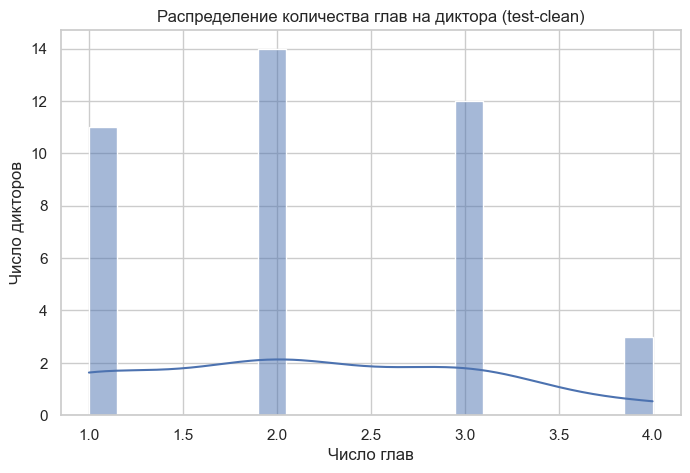

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(8,5))
sns.histplot(data=grouped_speakers, x="chapters_per_speaker", bins=20, kde=True)
plt.title("Распределение количества глав на диктора (test-clean)")
plt.xlabel("Число глав")
plt.ylabel("Число дикторов")
plt.show()


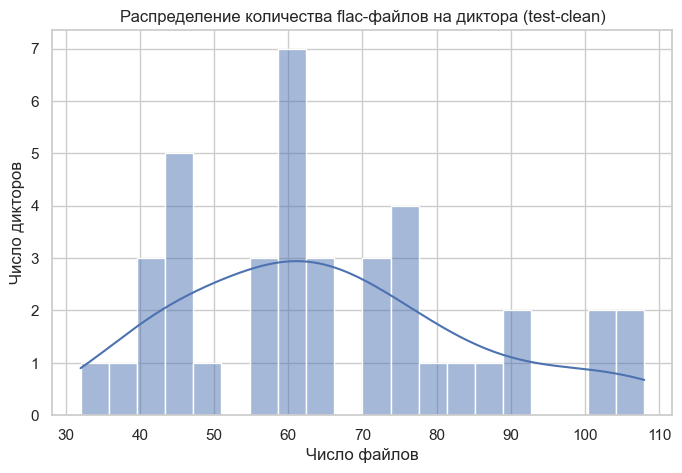

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(data=grouped_speakers, x="files_per_speaker", bins=20, kde=True)
plt.title("Распределение количества flac-файлов на диктора (test-clean)")
plt.xlabel("Число файлов")
plt.ylabel("Число дикторов")
plt.show()


/tmp/ipykernel_57839/1456270792.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_speakers, x="speaker_id", y="files_per_speaker", palette="Blues_d")


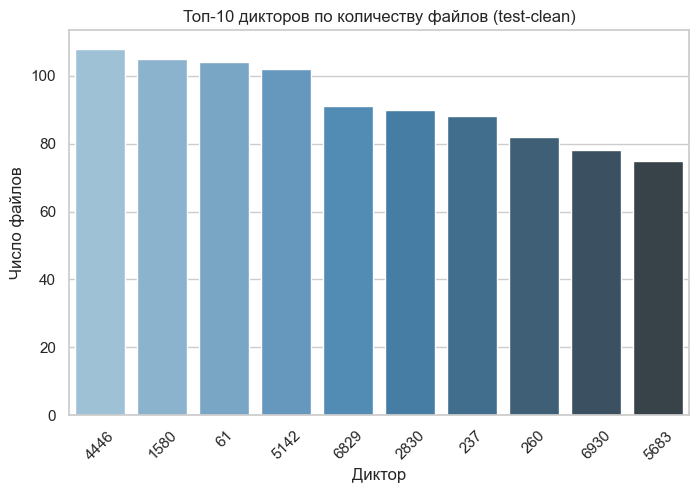

In [18]:
top_10_speakers = grouped_speakers.sort_values(by="files_per_speaker", ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(data=top_10_speakers, x="speaker_id", y="files_per_speaker", palette="Blues_d")
plt.title("Топ-10 дикторов по количеству файлов (test-clean)")
plt.xlabel("Диктор")
plt.ylabel("Число файлов")
plt.xticks(rotation=45)
plt.show()


# Анализ данных Train

In [32]:
import os
import pandas as pd
import soundfile as sf  # для получения метаданных о файле

LIBRISPEECH_PATH = "/home/user/agertel/dipl/data/LibriSpeech"   # или полный путь к вашей папке
TRAIN_CLEAN_PATH = os.path.join(LIBRISPEECH_PATH, "dev-clean")

rows = []

for speaker_id in os.listdir(TRAIN_CLEAN_PATH):
    speaker_path = os.path.join(TRAIN_CLEAN_PATH, speaker_id)
    if not os.path.isdir(speaker_path):
        continue

    for chapter_id in os.listdir(speaker_path):
        chapter_path = os.path.join(speaker_path, chapter_id)
        if not os.path.isdir(chapter_path):
            continue

        # Ищем все flac-файлы
        flac_files = [
            f for f in os.listdir(chapter_path) if f.endswith(".flac")
        ]

        for flac_file in flac_files:
            filepath = os.path.join(chapter_path, flac_file)
            # Считаем метаданные через soundfile
            info = sf.info(filepath)
            duration_sec = info.duration   # продолжительность в секундах
            samplerate = info.samplerate   # частота дискретизации
            num_samples = info.frames      # общее кол-во сэмплов в файле

            rows.append({
                'speaker_id': speaker_id,
                'chapter_id': chapter_id,
                'filename': flac_file,
                'num_samples': num_samples,
                'samplerate': samplerate,
                'duration_sec': duration_sec
            })

df_train = pd.DataFrame(rows)
df_train.head()


speaker_id chapter_id               filename  num_samples  samplerate  \
0       8842     302203  8842-302203-0005.flac       132320       16000   
1       8842     302203  8842-302203-0002.flac       252320       16000   
2       8842     302203  8842-302203-0006.flac        84480       16000   
3       8842     302203  8842-302203-0004.flac       208720       16000   
4       8842     302203  8842-302203-0010.flac       230320       16000   

   duration_sec  
0         8.270  
1        15.770  
2         5.280  
3        13.045  
4        14.395

In [35]:
import pandas as pd

grouped_speakers = (
    df_train.groupby('speaker_id')
      .agg({
          'chapter_id': 'nunique',   # число уникальных глав у диктора
          'filename': 'count',       # общее количество файлов у диктора
          'duration_sec': 'sum'      # суммарная длительность всех файлов
      })
      .reset_index()
      .rename(columns={
          'chapter_id': 'chapters_per_speaker',
          'filename': 'files_per_speaker',
          'duration_sec': 'total_duration_sec'
      })
)

print(grouped_speakers)

   speaker_id  chapters_per_speaker  files_per_speaker  total_duration_sec
0        1272                     3                 73          481.034875
1        1462                     3                 94          482.185000
2        1673                     2                 42          483.995063
3         174                     3                 59          482.555125
4        1919                     1                 64          490.220000
5        1988                     3                 75          489.385000
6        1993                     4                 58          486.805063
7        2035                     3                 77          486.310063
8        2078                     1                 52          481.754937
9        2086                     2                 55          482.394875
10       2277                     3                 95          480.495063
11       2412                     3                 58          483.885125
12       2428            

In [39]:
total_duration = grouped_speakers['total_duration_sec'].sum()
print(total_duration)
total_duration_hours = total_duration / 3600
print(total_duration_hours)

19351.98075
5.375550208333333


In [37]:
total_speakers = df_train['speaker_id'].nunique()
total_chapters = df_train['chapter_id'].nunique()
total_flacs = len(df_train['filename'])

print(f"Всего дикторов: {total_speakers}")
print(f"Всего глав (chapter): {total_chapters}")
print(f"Всего аудиофайлов (.flac): {total_flacs}")

Всего дикторов: 40
Всего глав (chapter): 97
Всего аудиофайлов (.flac): 2694


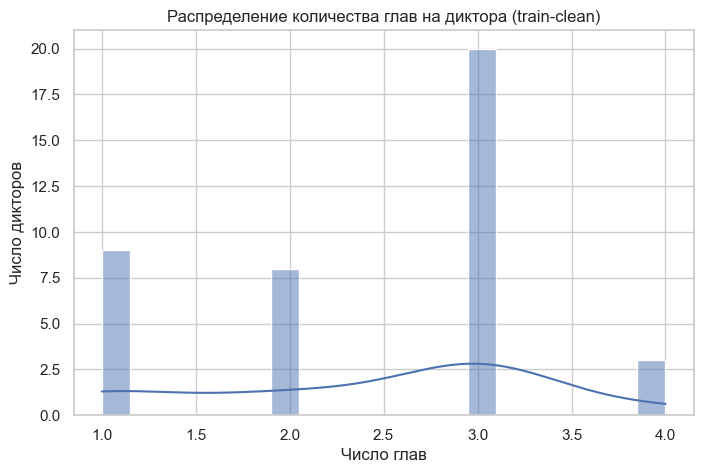

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(8,5))
sns.histplot(data=grouped_speakers, x="chapters_per_speaker", bins=20, kde=True)
plt.title("Распределение количества глав на диктора (train-clean)")
plt.xlabel("Число глав")
plt.ylabel("Число дикторов")
plt.show()


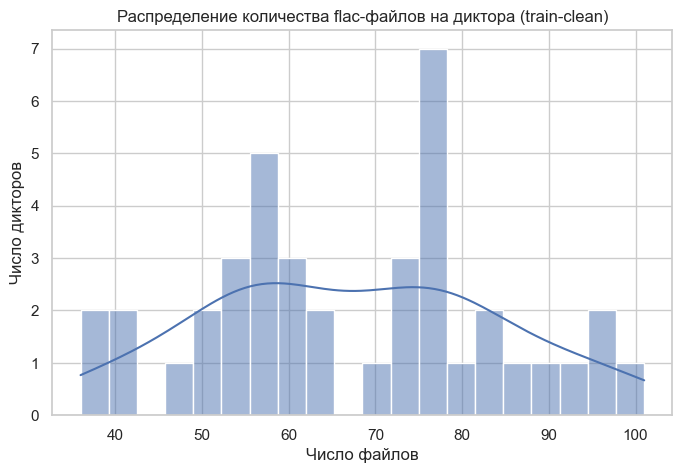

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(data=grouped_speakers, x="files_per_speaker", bins=20, kde=True)
plt.title("Распределение количества flac-файлов на диктора (train-clean)")
plt.xlabel("Число файлов")
plt.ylabel("Число дикторов")
plt.show()


/tmp/ipykernel_57839/2975107760.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_speakers, x="speaker_id", y="files_per_speaker", palette="Blues_d")


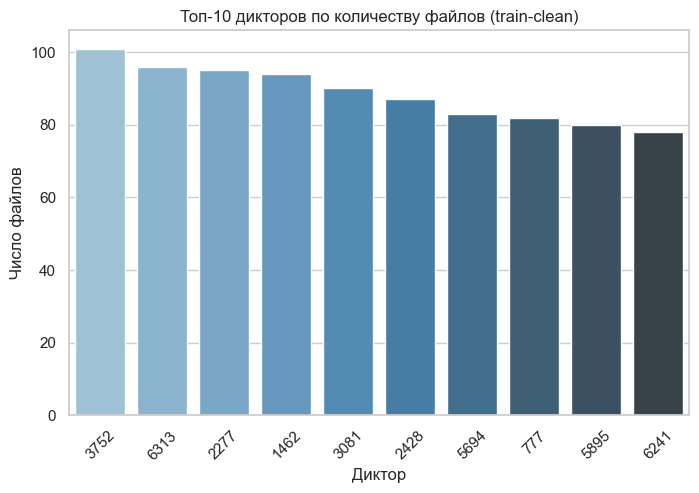

In [23]:
top_10_speakers = grouped_speakers.sort_values(by="files_per_speaker", ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(data=top_10_speakers, x="speaker_id", y="files_per_speaker", palette="Blues_d")
plt.title("Топ-10 дикторов по количеству файлов (train-clean)")
plt.xlabel("Диктор")
plt.ylabel("Число файлов")
plt.xticks(rotation=45)
plt.show()


In [25]:
import librosa
import librosa.display
import numpy as np
import torch
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image


def save_mel_spectrogram(audio_path: str, n_mels: int, output_path: str = 'spectrogram.png') -> torch.Tensor:
    """
    Генерирует мел-спектрограмму аудиофайла и возвращает её в виде тензора.

    Parameters:
    - audio_path (str): путь к аудиофайлу
    - n_mels (int): количество мел-банков
    - output_path (str): путь для сохранения изображения (по умолчанию 'spectrogram.png')

    Returns:
    - torch.Tensor: мел-спектрограмма в формате тензора (C, H, W)
    """
    # Загрузка аудиофайла
    y, sr = librosa.load(audio_path, sr=None)

    # Вычисление мел-спектрограммы
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    S_dB = librosa.power_to_db(S, ref=np.max)

    # Визуализация спектрограммы
    plt.figure(figsize=(10, 4))
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)
    plt.axis('off')

    # Сохранение изображения в память
    buf = BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
    plt.close()
    buf.seek(0)

    # Конвертация изображения в тензор
    img = Image.open(buf).convert('RGB')
    tensor = torch.from_numpy(np.array(img)).float() / 255.0  # Нормализация
    tensor = tensor.permute(2, 0, 1)  # Преобразование в формат (C, H, W)

    return tensor

tensor_aug = save_mel_spectrogram('/home/user/agertel/dipl/hard_augmented_audio_one_LowPassFilter.flac', 128, '/home/user/agertel/dipl/hard_augmented_audio_one_LowPassFilter.png')
tensor_clean = save_mel_spectrogram("/home/user/agertel/dipl/data/LibriSpeech/dev-clean/84/121123/84-121123-0000.flac", 128,)
# p = '/home/user/agertel/dipl/val_multilabel_audio_all/'
# audios = os.listdir(p)
# for x in tqdm.tqdm(audios):
#     name = x.split('.')[0]
#     save_path = '/home/user/agertel/dipl/val_trst_separate/'+name+'.png'
#     tensor = save_mel_spectrogram(p+x, 128, save_path)
#     break
tensor_clean


tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
         [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
         [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.

In [26]:

# Булева маска, где элементы не совпадают
mask = tensor_clean != tensor_aug

print("Маска несовпадающих элементов (True, где разные):")
# print(mask)

# Координаты (индексы) тех позиций, где значения тензоров различаются
diff_indices = mask.nonzero(as_tuple=False)
print("\nИндексы различий:")
print(diff_indices.shape)

# Можно также вывести, какие именно значения в этих позициях
# print("\nЗначения в t1 на позициях, где тензоры отличаются:")
# print(tensor_clean[mask])
# for x in tensor_clean[mask]:
#     print(x, end=' ')
# print()
# print("Значения в t2 на тех же позициях:")
# for x in tensor_aug[mask]:
#     print(x, end=' ')
# print(tensor_aug[mask])

Маска несовпадающих элементов (True, где разные):

Индексы различий:
torch.Size([654221, 3])


In [27]:
l1_distance = (tensor_aug - tensor_clean).abs().sum()
l1_distance


tensor(71920.2812)

In [28]:

# Количество элементов, которые не совпадают
num_diff = mask.sum().item()
num_diff

654221

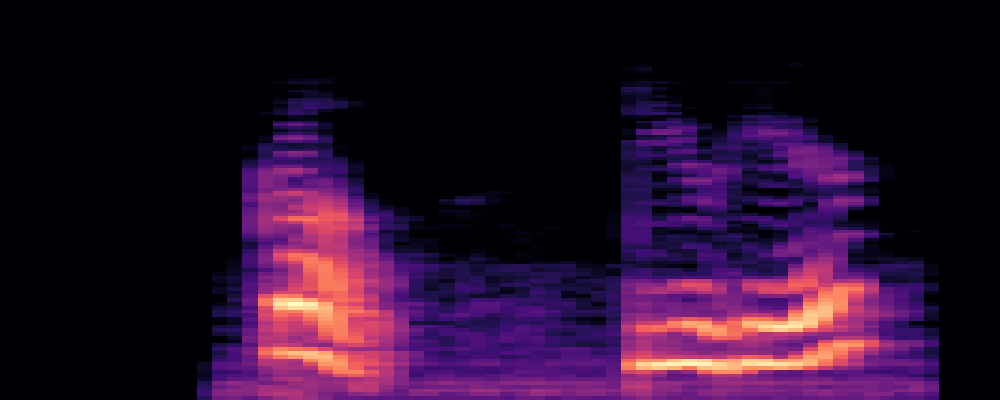

In [29]:
import torchvision.transforms as T
to_pil = T.ToPILImage()
img = to_pil(
tensor_aug)
img


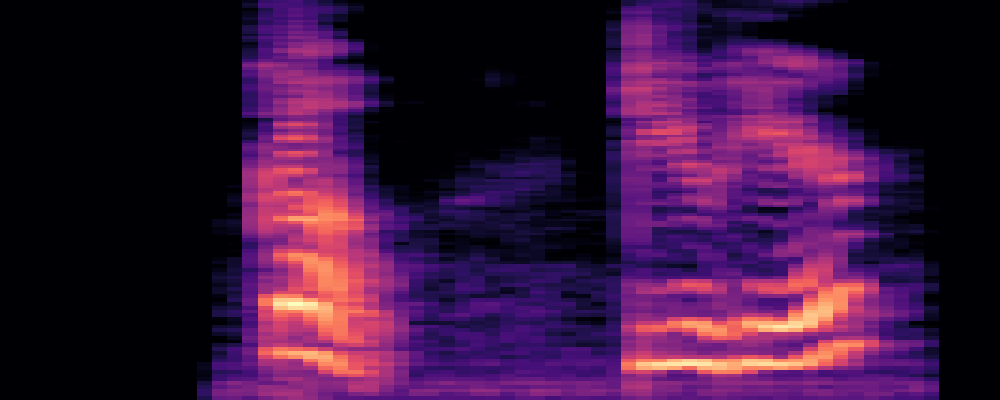

In [30]:
import torchvision.transforms as T
to_pil = T.ToPILImage()
img = to_pil(tensor_clean)
img

In [ ]:
total_speakers = df_train['speaker_id'].nunique()
total_chapters = df_train['chapter_id'].nunique()
total_flacs = len(df_train['filename'])

print(f"Всего дикторов: {total_speakers}")
print(f"Всего глав (chapter): {total_chapters}")
print(f"Всего аудиофайлов (.flac): {total_flacs}")

Всего дикторов: 40
Всего глав (chapter): 97
Всего аудиофайлов (.flac): 2704


In [ ]:
grouped_speakers_train = (
    df_train.groupby('speaker_id')
      .agg({
          'chapter_id': 'nunique',   # число уникальных глав у диктора
          'filename': 'count',       # общее количество файлов у диктора
          'duration_sec': 'sum'      # суммарная длительность всех файлов
      })
      .reset_index()
      .rename(columns={
          'chapter_id': 'chapters_per_speaker',
          'filename': 'files_per_speaker',
          'duration_sec': 'total_duration_sec'
      })
)

print(grouped_speakers_train)

   speaker_id  chapters_per_speaker  files_per_speaker  total_duration_sec
0        1272                     3                 74          488.034875
1        1462                     3                 94          482.185000
2        1673                     2                 42          483.995063
3         174                     3                 59          482.555125
4        1919                     1                 64          490.220000
5        1988                     3                 75          489.385000
6        1993                     4                 58          486.805063
7        2035                     3                 77          486.310063
8        2078                     1                 52          481.754937
9        2086                     2                 55          482.394875
10       2277                     3                 95          480.495063
11       2412                     3                 58          483.885125
12       2428            

# Пересечение по выборкам


In [ ]:
df1_speakers = set(grouped_speakers['speaker_id'])
df2_speakers = set(grouped_speakers_train['speaker_id'])

common_speakers = df1_speakers.intersection(df2_speakers)
print("Общее кол-во дикторов в обоих DF:", len(common_speakers))

if len(common_speakers) > 0:
    print("Есть пересечение по speaker_id:", common_speakers)
else:
    print("Пересечений по speaker_id нет")


Общее кол-во дикторов в обоих DF: 0
Пересечений по speaker_id нет


In [ ]:
df1_chapter = set(df_train['chapter_id'])
df2_chapter = set(df['chapter_id'])

common_speakers = df1_chapter.intersection(df2_chapter)
print("Общее кол-во дикторов в обоих DF:", len(common_speakers))

if len(common_speakers) > 0:
    print("Есть пересечение по chapter_id:", common_speakers)
else:
    print("Пересечений по chapter_id нет")

Общее кол-во дикторов в обоих DF: 0
Пересечений по chapter_id нет


# Наивный классификатор

In [ ]:
# import torch
# from torch.utils.data import Dataset
# import librosa
# import numpy as np
# import pandas as pd
# import os
# import torchvision.transforms.functional as F

# class FlacMelMultilabelAugDataset(Dataset):
#     def __init__(self, main_path_csv, main_path_audio, csv_path, audio_dir, sr=16000, n_mels=128, transform=None, num_classes = 7, classes= None):
#         """
#         csv_path: путь к CSV-файлу с временными диапазонами и аугментациями
#         audio_dir: директория с аудиофайлами
#         sr: частота дискретизации
#         n_mels: количество мел-банков
#         transform: трансформации torchvision (например, Resize, ToTensor и т.д.)
#         """
#         # self.data = pd.read_csv(csv_path)
#         self.audio_dir = audio_dir
#         self.labels_audio = csv_path #pd.read_csv(csv_path)
#         self.sr = sr
#         self.n_mels = n_mels
#         self.transform = transform
#         self.num_classes = num_classes
#         self.classes = classes
#         self.main_path_csv = main_path_csv
#         self.main_path_audio = main_path_audio

#     def __len__(self):
#         return len(self.audio_dir)

#     def __getitem__(self, idx):
#         # Получаем имя аудиофайла
#         # filenames = self.data['filename'].unique()
#         # filename = filenames[idx]
#         # file_path = os.path.join(self.audio_dir, filename)

#         file_path =  self.main_path_audio + self.audio_dir[idx]
#         # print(file_path)
#         label_file =  pd.read_csv( self.main_path_csv + self.audio_dir[idx].split('.')[0] + '.csv')
#         # print(label_file)
#         # Загрузка аудио
#         y, sr = librosa.load(file_path, sr=self.sr)

#         # Получаем строки с аугментациями для данного файла
#         # file_data = self.data[self.data['filename'] == filename]

#         # Создаем метку для мультилейбл классификации
#         label = [0] *  self.num_classes # Предположим, 8 классов

#         # Применяем аугментации к временным диапазонам
#         for _, row in label_file.iterrows():
#             # print()
#             # print(row['augmentation'])
#             # if row['augmentation'] != None:


#             if pd.isna(row['augmentation']) or row['augmentation'] == 'None':
#                 continue
#             label[classes[row['augmentation']]] = 1
#             # print(label)


#         # Рассчитаем мел-спектрограмму
#         S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=self.n_mels)
#         S_dB = librosa.power_to_db(S, ref=np.max)

#         # Преобразуем в форму (1, H, W)
#         mel_tensor = torch.from_numpy(S_dB).unsqueeze(0)  # shape [1, n_mels, frames]

#         # Преобразуем в трёхканальный формат (например, для ResNet)
#         mel_tensor_3ch = mel_tensor.repeat(3, 1, 1)  # shape [3, n_mels, frames]

#         # Преобразуем в PIL Image, чтобы применить трансформации torchvision
#         mel_pil = F.to_pil_image(mel_tensor_3ch, mode=None)  # (3, H, W)
#         # mel_tensor_transformed = mel_pil

#         if self.transform:
#             mel_tensor_transformed = self.transform(mel_pil)  # Применяем трансформации
#         else:
#             mel_tensor_transformed = mel_tensor_3ch  # Оставляем без изменений

#         return mel_tensor_transformed, torch.tensor(label, dtype=torch.float32)


In [11]:
import torch
from torch.utils.data import Dataset
import librosa
import numpy as np
import pandas as pd
import os
import torchvision.transforms.functional as F
from PIL import Image
import torchvision.transforms as transforms

class FlacMelMultilabelAugDataset(Dataset):
    def __init__(self, main_path_csv, main_path_audio, csv_path, audio_dir, sr=16000, n_mels=128, transform=None, num_classes = 7, classes= None):
        """
        csv_path: путь к CSV-файлу с временными диапазонами и аугментациями
        audio_dir: директория с аудиофайлами
        sr: частота дискретизации
        n_mels: количество мел-банков
        transform: трансформации torchvision (например, Resize, ToTensor и т.д.)
        """
        # self.data = pd.read_csv(csv_path)
        self.audio_dir = audio_dir
        self.labels_audio = csv_path #pd.read_csv(csv_path)
        self.sr = sr
        self.n_mels = n_mels
        self.transform = transform
        self.num_classes = num_classes
        self.classes = classes
        self.main_path_csv = main_path_csv
        self.main_path_audio = main_path_audio
        self.tr =  transforms.ToTensor()

    def __len__(self):
        return len(self.audio_dir)

    def __getitem__(self, idx):
        # Получаем имя аудиофайла
        # filenames = self.data['filename'].unique()
        # filename = filenames[idx]
        # file_path = os.path.join(self.audio_dir, filename)

        file_path =  self.main_path_audio + self.audio_dir[idx]
        # print(file_path)
        label_file =  pd.read_csv( self.main_path_csv + self.audio_dir[idx].split('.')[0] + '.csv')
        # print(label_file)
        # Загрузка аудио
        # y, sr = librosa.load(file_path, sr=self.sr)

        # Получаем строки с аугментациями для данного файла
        # file_data = self.data[self.data['filename'] == filename]

        # Создаем метку для мультилейбл классификации
        label = [0] *  self.num_classes # Предположим, 8 классов

        # Применяем аугментации к временным диапазонам
        for _, row in label_file.iterrows():
            # print()
            # print(row['augmentation'])
            # if row['augmentation'] != None:


            if pd.isna(row['augmentation']) or row['augmentation'] == 'None':
                continue
            label[classes[row['augmentation']]] = 1
            # print(label)


        # Рассчитаем мел-спектрограмму
        # S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=self.n_mels)
        # S_dB = librosa.power_to_db(S, ref=np.max)

        # Преобразуем в форму (1, H, W)
        # mel_tensor = torch.from_numpy(S_dB).unsqueeze(0)  # shape [1, n_mels, frames]

        # Преобразуем в трёхканальный формат (например, для ResNet)
        mel_tensor = Image.open(file_path).convert('RGB')
        mel_tensor_transformed = self.tr(mel_tensor)
        # mel_tensor_transformed = mel_tensor.repeat(3, 1, 1)  # shape [3, n_mels, frames]

        # Преобразуем в PIL Image, чтобы применить трансформации torchvision
        # mel_pil = F.to_pil_image(mel_tensor_3ch, mode=None)  # (3, H, W)
        # mel_tensor_transformed = mel_pil

        # if self.transform:
        # mel_tensor_transformed = self.transform(mel_pil)  # Применяем трансформации
        # else:
        #     mel_tensor_transformed = mel_tensor_3ch  # Оставляем без изменений

        return mel_tensor_transformed, torch.tensor(label, dtype=torch.float32)


In [12]:
classes = {
    # "None" : 0,
    "AddGaussianNoise" : 0,
    "PitchShift" : 1,
    "TimeStretch" : 2,
    "Shift" : 3,
    "ClippingDistortion" : 4,
    "LowPassFilter" : 5,
    "HighPassFilter" : 6,
    }

In [19]:
# import torchvision.transforms as transforms

# my_transform = transforms.Compose([
#     transforms.Resize((224,224)),
#     transforms.ToTensor(),
#     # нормализация, если надо
#     # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
# ])
# main_path_audio = '/content/train_multilabel_audio_100/'
# main_path_csv = '/content/train_multilabel_labels_100/'
# train_flacs = os.listdir(main_path_audio)
# train_labels = os.listdir(main_path_csv)
# train_dataset = FlacMelMultilabelAugDataset(main_path_audio = main_path_audio, main_path_csv = main_path_csv, audio_dir=train_flacs, csv_path=train_labels, transform=my_transform, classes=classes)
# # print(len(dataset))
# train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)

# for batch_mels, batch_labels in train_dataloader:
#     print(batch_mels.shape, batch_labels)
#     break

import torchvision.transforms as transforms

my_transform = transforms.Compose([
    # transforms.Resize((224,224)),
    transforms.ToTensor(),
    # нормализация, если надо
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
main_path_audio = '/home/user/agertel/dipl/train_multilabel_imgs_all/'
main_path_csv = '/home/user/agertel/dipl/train_multilabel_labels_all/'
train_flacs = os.listdir(main_path_audio)
train_labels = os.listdir(main_path_csv)
train_dataset = FlacMelMultilabelAugDataset(main_path_audio = main_path_audio, main_path_csv = main_path_csv, audio_dir=train_flacs, csv_path=train_labels, transform=my_transform, classes=classes)
# print(len(dataset))
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

for batch_mels, batch_labels in train_dataloader:
    print(batch_mels.shape, batch_labels)
    break



torch.Size([64, 3, 308, 775]) tensor([[0., 0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 1., 1., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 1., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 1., 1., 0., 1., 0., 1.],
        [0., 1., 0., 1., 1., 0., 1.],
        [1., 1., 0., 0., 0., 1., 0.],
        [1., 0., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 0.],
        [0., 0., 0., 1., 0., 1., 1.],
        [0., 0., 1., 0., 0., 0., 1.],
        [0., 0., 1., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 1., 0.],
        [1., 1., 1., 1., 1., 0., 0.],
        [0., 1., 0., 1., 1., 1., 0.],
        [0., 0., 0.,

In [18]:
import torchvision.transforms as transforms

my_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    # нормализация, если надо
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
main_path_audio = '/home/user/agertel/dipl/val_multilabel_imgs_all/'
main_path_csv = '/home/user/agertel/dipl/val_multilabel_labels_all/'
val_flacs = os.listdir(main_path_audio)
val_labels = os.listdir(main_path_csv)
val_dataset = FlacMelMultilabelAugDataset(main_path_audio = main_path_audio, main_path_csv = main_path_csv, audio_dir=val_flacs, csv_path=val_labels, transform=my_transform, classes=classes)
# print(len(dataset))
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)

for batch_mels, batch_labels in val_dataloader:
    print(batch_mels.shape, batch_labels)
    break

torch.Size([64, 3, 308, 775]) tensor([[1., 0., 0., 0., 1., 1., 0.],
        [1., 0., 0., 0., 0., 1., 1.],
        [1., 0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 1., 0., 0., 1.],
        [1., 0., 0., 1., 0., 1., 1.],
        [0., 0., 0., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 0., 1., 1., 1., 1.],
        [1., 1., 0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 1., 0.],
        [1., 1., 0., 0., 1., 0., 1.],
        [1., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0.],
        [0., 0., 1., 1., 1., 0., 0.],
        [0., 1., 1., 0., 1., 1., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0., 1.],
        [0., 0., 0.,

# [eyz

In [ ]:
# import os
# import random
# from collections import defaultdict

# DEV_CLEAN_PATH = "/content/data/LibriSpeech/dev-clean"

# # Фиксируем seed для воспроизводимости
# random.seed(42)

# # Итоговые списки путей
# subset1 = []
# subset2 = []

# # Вспомогательная функция: извлечь speaker_id и chapter_id из пути.
# def parse_speaker_chapter(flac_path):
#     """
#     Ожидаем структуру: .../dev-clean/<speaker_id>/<chapter_id>/<file>.flac
#     Например: LibriSpeech/dev-clean/1089/134686/1089-134686-0000.flac
#     """
#     parts = flac_path.split(os.path.sep)  # разбиваем по разделителям пути
#     # Последний элемент parts[-1] — это имя .flac-файла
#     # parts[-2] — это chapter_id, parts[-3] — speaker_id
#     speaker_id = parts[-3]
#     chapter_id = parts[-2]
#     return speaker_id, chapter_id

# # Обходим дикторов и собираем файлы
# for speaker_id in os.listdir(DEV_CLEAN_PATH):
#     speaker_path = os.path.join(DEV_CLEAN_PATH, speaker_id)
#     if not os.path.isdir(speaker_path):
#         continue

#     # Собираем все .flac для данного диктора
#     speaker_flac_paths = []
#     for chapter_id in os.listdir(speaker_path):
#         chapter_path = os.path.join(speaker_path, chapter_id)
#         if not os.path.isdir(chapter_path):
#             continue

#         for fname in os.listdir(chapter_path):
#             if fname.endswith(".flac"):
#                 full_path = os.path.join(chapter_path, fname)
#                 speaker_flac_paths.append(full_path)

#     # Перемешиваем список файлов
#     random.shuffle(speaker_flac_paths)

#     # Делим пополам, как пример (можно задать иные пропорции)
#     half = len(speaker_flac_paths) // 2
#     part1 = speaker_flac_paths[:half]
#     part2 = speaker_flac_paths[half:]

#     subset1.extend(part1)
#     subset2.extend(part2)

# # --- Теперь собираем статистику, сколько файлов по (speaker, chapter) ушло в каждый сабсет ---
# subset1_dist = defaultdict(lambda: defaultdict(int))
# subset2_dist = defaultdict(lambda: defaultdict(int))

# for path in subset1:
#     spk, chap = parse_speaker_chapter(path)
#     subset1_dist[spk][chap] += 1

# for path in subset2:
#     spk, chap = parse_speaker_chapter(path)
#     subset2_dist[spk][chap] += 1

# # --- Выводим сводку по каждому диктору и его главам ---
# all_speakers = sorted(set(subset1_dist.keys()) | set(subset2_dist.keys()))

# for spk in all_speakers:
#     chaps1 = subset1_dist[spk]
#     chaps2 = subset2_dist[spk]
#     all_chapters = sorted(set(chaps1.keys()) | set(chaps2.keys()))

#     print(f"\n=== Speaker {spk} ===")
#     for ch in all_chapters:
#         c1 = chaps1[ch]
#         c2 = chaps2[ch]
#         total = c1 + c2
#         # Выводим только то, что реально встретилось
#         if total > 0:
#             print(f"  Chapter {ch}: subset1 = {c1}, subset2 = {c2}, total = {total}")

# # Пример: можно также вывести общие размеры subset1 и subset2
# print("\n--- Итог ---")
# print(f"Subset1: {len(subset1)} файлов")
# print(f"Subset2: {len(subset2)} файлов")


In [ ]:
subset_all = subset1+subset1
len(subset_all)

2682

In [ ]:
# import os
# import csv
# from audiomentations import (
#     Compose, AddGaussianNoise, PitchShift, Shift, TimeStretch,
#     ClippingDistortion, LowPassFilter, HighPassFilter, OneOf
# )
# import librosa
# import soundfile as sf
# import numpy as np

# def process_audio(input_audio_path, output_audio_path, csv_path, apply_augmentation=True):
#     """
#     Разбивает аудио на части по 1 секунде, применяет случайную аугментацию (если указано),
#     записывает метаданные в CSV и сохраняет итоговое аудио.

#     :param input_audio_path: str, путь к входному аудио-файлу
#     :param output_audio_path: str, путь для сохранения обработанного аудио
#     :param csv_path: str, путь для сохранения CSV с метаданными
#     :param apply_augmentation: bool, применять ли аугментацию
#     """
#     # Load the audio
#     audio, sample_rate = librosa.load(input_audio_path, sr=None)

#     # Calculate the number of samples in 1 second
#     samples_per_second = sample_rate
#     n_parts = len(audio) // samples_per_second

#     # Split audio into 1-second parts
#     audio_parts = [
#         audio[i * samples_per_second:(i + 1) * samples_per_second]
#         for i in range(n_parts)
#     ]

#     # List to store augmented audio parts
#     processed_parts = []
#     csv_data = []

#     for i, part in enumerate(audio_parts):
#         if apply_augmentation:
#             apply_flag = False

#             # Define augmentation
#             hard_augment = OneOf([
#                 AddGaussianNoise(min_amplitude=0.01, max_amplitude=0.05, p=1.0),
#                 PitchShift(min_semitones=-8, max_semitones=8, p=1.0),
#                 TimeStretch(min_rate=0.5, max_rate=1.5, p=1.0),
#                 Shift(min_shift=-1.0, max_shift=1.0, p=1.0),
#                 ClippingDistortion(min_percentile_threshold=0, max_percentile_threshold=20, p=1.0),
#                 LowPassFilter(min_cutoff_freq=150, max_cutoff_freq=750, p=1.0),
#                 HighPassFilter(min_cutoff_freq=2000, max_cutoff_freq=8000, p=1.0)
#             ], p=0.5)

#             # Apply augmentation
#             processed_part = hard_augment(samples=part, sample_rate=sample_rate)

#             applied_augmentation = None
#             parameters = None

#             for transform in hard_augment.transforms:
#                 if transform.parameters.get('should_apply') is not None:
#                     applied_augmentation = transform.__class__.__name__
#                     parameters = transform.parameters
#                     apply_flag = True
#                     break

#             if not apply_flag:
#                 applied_augmentation = 'None'
#                 parameters = ''
#         else:
#             processed_part = part
#             applied_augmentation = 'None'
#             parameters = ''

#         processed_parts.append(processed_part)

#         # Calculate timestamps
#         start_time = i  # Start time in seconds
#         end_time = i + 1  # End time in seconds

#         # Add to CSV data
#         csv_data.append({
#             "timestamp_start": start_time,
#             "timestamp_end": end_time,
#             "augmentation": applied_augmentation,
#             "parameters": parameters,
#             "sample_rate": sample_rate
#         })

#     # Save metadata to CSV
#     with open(csv_path, mode='w', newline='') as csv_file:
#         fieldnames = ["timestamp_start", "timestamp_end", "augmentation", "parameters", "sample_rate"]
#         writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
#         writer.writeheader()
#         writer.writerows(csv_data)

#     # Combine processed parts
#     final_audio = np.concatenate(processed_parts)

#     # Save the processed audio
#     sf.write(output_audio_path, final_audio, sample_rate)

#     print(f"Processed audio saved to {output_audio_path}")
#     print(f"Metadata saved to {csv_path}")

# def process_audio_list(audio_list, n, output_dir, csv_dir):
#     """
#     Обрабатывает список аудиофайлов, применяя N раз аугментацию к каждому,
#     и сохраняет результаты, включая оригинальное аудио без аугментации.

#     :param audio_list: list, список путей к аудиофайлам
#     :param n: int, количество раз для обработки каждого файла
#     :param output_dir: str, папка для сохранения обработанных аудио
#     :param csv_dir: str, папка для сохранения CSV-файлов
#     """
#     os.makedirs(output_dir, exist_ok=True)
#     os.makedirs(csv_dir, exist_ok=True)

#     for audio_path in audio_list:
#         base_name = os.path.splitext(os.path.basename(audio_path))[0]

#         # Сохранение оригинального аудио без аугментации
#         output_audio_path = os.path.join(output_dir, f"{base_name}_0.flac")
#         csv_path = os.path.join(csv_dir, f"{base_name}_0.csv")

#         process_audio(
#             input_audio_path=audio_path,
#             output_audio_path=output_audio_path,
#             csv_path=csv_path,
#             apply_augmentation=False
#         )

#         # Применение аугментаций
#         for i in range(n):
#             output_audio_path = os.path.join(output_dir, f"{base_name}_{i+1}.flac")
#             csv_path = os.path.join(csv_dir, f"{base_name}_{i+1}.csv")

#             process_audio(
#                 input_audio_path=audio_path,
#                 output_audio_path=output_audio_path,
#                 csv_path=csv_path
#             )

# # Пример использования
# process_audio_list(
#     audio_list=[
#         "/content/data/LibriSpeech/dev-clean/1272/128104/1272-128104-0013.flac",
#         "/content/data/LibriSpeech/dev-clean/1272/128104/1272-128104-0014.flac"
#     ],
#     n=3,
#     output_dir="/content/processed_audio",
#     csv_dir="/content/processed_csv"
# )


In [ ]:
labels_good = [0] * len(subset1)
labels_bad = [1] * len(subset2)

In [ ]:
!pip install audiomentations librosa soundfile


In [ ]:
# import os
# import random
# import librosa
# import soundfile as sf
# from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift

# # Предположим, subset2 - это список путей к .flac
# # пример: subset2 = ["LibriSpeech/dev-clean/1089/134686/1089-134686-0001.flac", ...]

# # 1. Определяем аугментационный пайплайн
# augment = Compose([
#     AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
#     TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
#     PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
#     Shift(min_shift=-0.1, max_shift=0.1, shift_unit="fraction", p=0.5)

# ], p=1.0)


# # p=1.0 означает, что весь пайплайн выполняется для каждого семпла,
# # а внутри пайплайна у каждого эффекта есть свой p.

# # 2. Папка для сохранения аугментированных файлов
# AUGMENTED_FOLDER = "augmented_subset2"

# # Убедимся, что она существует
# os.makedirs(AUGMENTED_FOLDER, exist_ok=True)

# # 3. Новый список путей
# augmented_list = []

# # Вспомогательная функция для извлечения speaker_id и chapter_id
# def parse_speaker_chapter(flac_path):
#     parts = flac_path.split(os.path.sep)
#     # parts[-1] = имя файла, parts[-2] = chapter_id, parts[-3] = speaker_id и т.д.
#     speaker_id = parts[-3]
#     chapter_id = parts[-2]
#     filename = parts[-1]  # например, "1089-134686-0000.flac"
#     return speaker_id, chapter_id, filename

# for path in subset2:
#     speaker_id, chapter_id, filename = parse_speaker_chapter(path)

#     # Считываем .flac
#     # sr=None -> сохраняем исходную частоту дискретизации
#     samples, sr = librosa.load(path, sr=None)

#     # Применяем аугментации
#     samples_aug = augment(samples=samples, sample_rate=sr)

#     # Формируем структуру директорий вида augmented_subset2/<speaker>/<chapter>/
#     out_dir = os.path.join(AUGMENTED_FOLDER, speaker_id, chapter_id)
#     os.makedirs(out_dir, exist_ok=True)

#     # Можно сформировать новое имя файла, например, с суффиксом "_aug"
#     base_name = os.path.splitext(filename)[0]  # "1089-134686-0000"
#     out_filename = base_name + "_aug.flac"

#     out_path = os.path.join(out_dir, out_filename)

#     # Сохраняем (soundfile поддерживает сохранение во flac, если libsndfile собран с поддержкой flac)
#     sf.write(out_path, samples_aug, sr, format='FLAC')

#     # Добавляем путь к аугментированному файлу в новый список
#     augmented_list.append(out_path)

# print("Обработано файлов:", len(subset2))
# print("Аугментированных файлов:", len(augmented_list))

# # Пример: можно сохранить список путей в текстовый файл, если нужно
# with open("augmented_subset2_paths.txt", "w", encoding="utf-8") as f:
#     for p in augmented_list:
#         f.write(p + "\n")

# print("Новый список путей сохранён в augmented_subset2_paths.txt")


NameError: name 'subset2' is not defined

128 126
Размер тензора для модели (PyTorch): torch.Size([1, 128, 128])


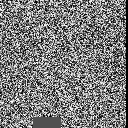

In [23]:
import torch
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms.functional as F

# Путь к аудиофайлу (может быть .wav, .flac и т.д.)
audio_path = "/home/user/agertel/dipl/val_multilabel_audio_all/61-70968-0000_6.flac"

# 1. Загрузка аудио
# sr=None -> сохраняем оригинальную частоту дискретизации из файла
y, sr = librosa.load(audio_path, sr=None)

# 2. Вычисление мел-спектрограммы
# n_mels=128 - число мел-полос
# fmax=8000  - верхняя граница частоты (можно менять)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

# Переводим спектрограмму в dB-формат (log-mel-спектр)
S_dB = librosa.power_to_db(S, ref=np.max)

# Предположим, что нам нужно привести все семплы к одинаковому размеру time_steps
time_steps = 128  # для примера

# Текущие размерности (n_mels, frames)
n_mels, frames = S_dB.shape
print(n_mels, frames )

if frames > time_steps:
    # Обрезаем по времени, если Mel-спектрограмма слишком длинная
    S_dB = S_dB[:, :time_steps]
elif frames < time_steps:
    # Дополняем нулями, если короткая
    pad_width = time_steps - frames
    S_dB = np.pad(S_dB, 
                                pad_width=((0,0),(0,pad_width)), 
                                mode='constant')

# Переводим в тензор PyTorch (размер: [1, n_mels, time_steps])
mel_tensor = torch.from_numpy(S_dB).unsqueeze(0)
print("Размер тензора для модели (PyTorch):", mel_tensor.shape)
mel_tensor_3ch = mel_tensor.repeat(3, 1, 1)  # shape [3, n_mels, frames]

        # Преобразуем в PIL Image, чтобы применить трансформации torchvision
mel_pil = F.to_pil_image(mel_tensor_3ch, mode=None)  # (3, H, W)
        # mel_tensor_transformed = mel_pil

mel_pil


2.5.1+cu118
torch.Size([1, 128, 198])


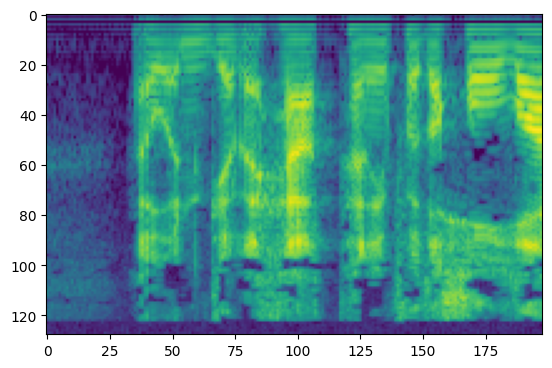

In [86]:

import torch, torchaudio
from matplotlib import pyplot as plt

print(torchaudio.__version__)

# !wget https://github.com/karolpiczak/ESC-50/raw/master/audio/1-100032-A-0.wav -O test.wav
waveform, _ = torchaudio.load("/home/user/agertel/dipl/train_multilabel_audio_all/777-126732-0078_10.flac")
fbank = torchaudio.compliance.kaldi.fbank(waveform, sample_frequency=16000, use_energy=False, window_type='hanning', num_mel_bins=128, dither=0.0, frame_shift=10)

# freqm = torchaudio.transforms.FrequencyMasking(48)
# timem = torchaudio.transforms.TimeMasking(1000)
fbank = torch.transpose(fbank, 0, 1)

# NOTE this line, this is the trick, new torchaudio expect [1, freq, time] while old support [freq, time]
# comment this line will lead to an issue.
fbank = fbank.unsqueeze(0)
print(fbank.shape)
# fbank = freqm(fbank)

plt.imshow(fbank[0].cpu().numpy())
# fbank[0][0]
# fbank = timem(fbank)

# plt.imshow(fbank[0].cpu().numpy())
# fbank = fbank.squeeze(0)
# print(fbank.shape)

2.5.1+cu118
torch.Size([1, 128, 198])


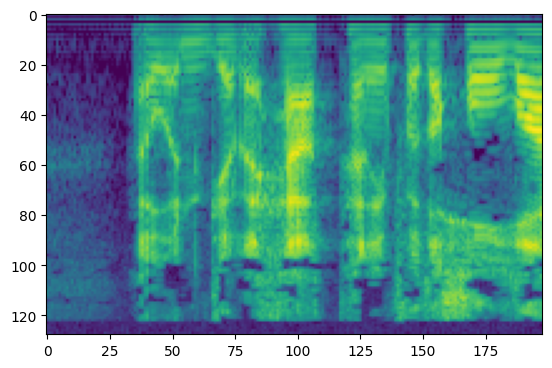

In [85]:

import torch, torchaudio
from matplotlib import pyplot as plt

print(torchaudio.__version__)

# !wget https://github.com/karolpiczak/ESC-50/raw/master/audio/1-100032-A-0.wav -O test.wav
waveform, _ = torchaudio.load("/home/user/agertel/dipl/train_multilabel_audio_all/777-126732-0078_10.flac")
fbank = torchaudio.compliance.kaldi.fbank(waveform, sample_frequency=16000, use_energy=False, window_type='hanning', num_mel_bins=128, dither=0.0, frame_shift=10)

# freqm = torchaudio.transforms.FrequencyMasking(48)
# timem = torchaudio.transforms.TimeMasking(1000)
fbank = torch.transpose(fbank, 0, 1)

# NOTE this line, this is the trick, new torchaudio expect [1, freq, time] while old support [freq, time]
# comment this line will lead to an issue.
fbank = fbank.unsqueeze(0)
print(fbank.shape)
# fbank = freqm(fbank)

plt.imshow(fbank[0].cpu().numpy())


16000
(128, 63)


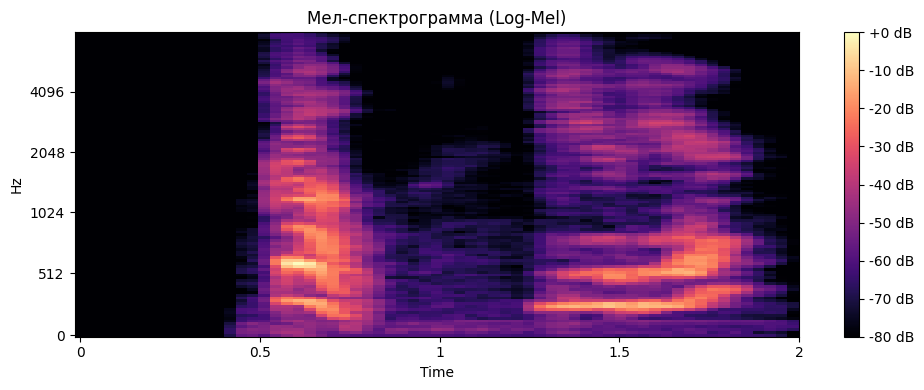

In [89]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Путь к аудиофайлу (может быть .wav, .flac и т.д.)
audio_path = "/home/user/agertel/dipl/train_multilabel_audio_all/84-121123-0000_9.flac"

# 1. Загрузка аудио
# sr=None -> сохраняем оригинальную частоту дискретизации из файла
y, sr = librosa.load(audio_path, sr=None)
print(sr)
# 2. Вычисление мел-спектрограммы
# n_mels=128 - число мел-полос
# fmax=8000  - верхняя граница частоты (можно менять)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

# Переводим спектрограмму в dB-формат (log-mel-спектр)
S_dB = librosa.power_to_db(S, ref=np.max)
print(S_dB.shape)
# 3. Визуализация
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title("Мел-спектрограмма (Log-Mel)")
plt.tight_layout()
plt.show()

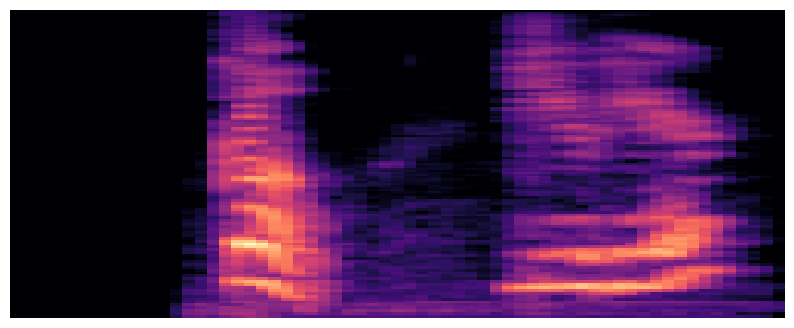

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def save_mel_spectrogram(audio_path, n_mels, output_path='spectrogram.png'):
    """
    Сохраняет мел-спектрограмму аудиофайла в виде изображения.

    Parameters:
    - audio_path (str): путь к аудиофайлу
    - n_mels (int): количество мел-банков
    - output_path (str): путь для сохранения изображения (по умолчанию 'spectrogram.png')
    """
    # print(f"Загружаем аудиофайл: {audio_path}")
    y, sr = librosa.load(audio_path, sr=None)  # Загружаем аудиофайл
    # print(f"Частота дискретизации аудио: {sr} Гц")
    
    # Выводим длительность аудио
    duration = librosa.get_duration(y=y, sr=sr)
    # print(f"Длительность аудиофайла: {duration:.2f} секунд")

    # print(f"Вычисляем мел-спектрограмму... n_mels={n_mels}")
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)  # Вычисляем мел-спектрограмму
    S_dB = librosa.power_to_db(S, ref=np.max)  # Переводим в децибелы

    # print(f"Размер мел-спектрограммы (в децибелах): {S_dB.shape}")

    # Строим спектрограмму
    # print("Создаем график спектрограммы...")
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)
    plt.axis('off')  # Отключаем оси

    # print(f"Сохраняем спектрограмму в файл: {output_path}")
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    # print(f"Спектрограмма успешно сохранена как {output_path}")

# Пример использования
audio_path = "/home/user/agertel/dipl/train_multilabel_audio_all/84-121123-0000_9.flac"
save_mel_spectrogram(audio_path, 128, 'spectrogram.png')


Загружаем аудиофайл: /home/user/agertel/dipl/train_multilabel_audio_all/84-121123-0000_0.flac
Частота дискретизации аудио: 16000 Гц
Длительность аудиофайла: 2.00 секунд
Вычисляем мел-спектрограмму... n_mels=128
Размер мел-спектрограммы (в децибелах): (128, 63)
Создаем график спектрограммы...
Сохраняем спектрограмму в файл: spectrogram2.png
Спектрограмма успешно сохранена как spectrogram2.png


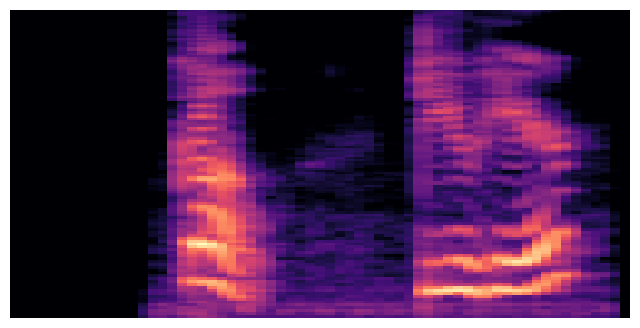

In [87]:
audio_path = "/home/user/agertel/dipl/train_multilabel_audio_all/84-121123-0000_0.flac"
save_mel_spectrogram(audio_path, 128, 'spectrogram2.png')

In [ ]:
import os
p = '/home/user/agertel/dipl/val_multilabel_audio_all/'
audios = os.listdir(p)
# k = 500
for x in audios:
    name = x.split('.')[0]
    save_path = '/home/user/agertel/dipl/val_multilabel_imgs_all_total/'+name+'.png'
    save_mel_spectrogram(p+x, 128, save_path)
    # k-=1
    # if k ==0:
    #     break


/tmp/ipykernel_2071530/378780435.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 4))


Загружаем аудиофайл: /home/user/agertel/dipl/train_multilabel_audio_all/84-121123-0003_10.flac
Частота дискретизации аудио: 16000 Гц
Длительность аудиофайла: 6.00 секунд
Вычисляем мел-спектрограмму... n_mels=128
Размер мел-спектрограммы (в децибелах): (128, 188)
Создаем график спектрограммы...
Сохраняем спектрограмму в файл: spectrogram2.png
Спектрограмма успешно сохранена как spectrogram2.png


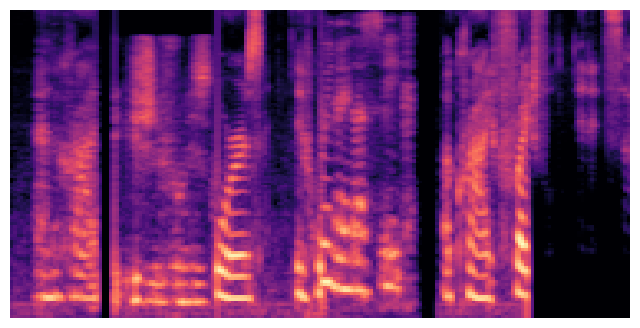

In [81]:
audio_path = "/home/user/agertel/dipl/train_multilabel_audio_all/84-121123-0003_10.flac"
save_mel_spectrogram(audio_path, 128,'spectrogram2.png')

In [69]:
import librosa
import numpy
import cv2
# import k.io

def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

def spectrogram_image(y, sr, out, hop_length, n_mels):
    # use log-melspectrogram
    mels = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels,
                                            n_fft=hop_length*2, hop_length=hop_length)
    mels = numpy.log(mels + 1e-9) # add small number to avoid log(0)

    # min-max scale to fit inside 8-bit range
    img = scale_minmax(mels, 0, 255).astype(numpy.uint8)
    img = numpy.flip(img, axis=0) # put low frequencies at the bottom in image
    img = 255-img # invert. make black==more energy
    cv2.imwrite(out, img)

    # save as PNG
    # skimage.io.imsave(out, img)


if __name__ == '__main__':
    # settings
    hop_length = 512 # number of samples per time-step in spectrogram
    n_mels = 128 # number of bins in spectrogram. Height of image
    time_steps = 384 # number of time-steps. Width of image

    # load audio. Using example from librosa
    # path = librosa.util.example_audio_file()
    audio_path = "/home/user/agertel/dipl/val_multilabel_audio_all/8555-292519-0014_0.flac"
    y, sr = librosa.load(audio_path, offset=1.0, duration=10.0, sr=22050)
    out = 'out.png'

    # extract a fixed length window
    start_sample = 0 # starting at beginning
    length_samples = time_steps*hop_length
    window = y[start_sample:start_sample+length_samples]
    
    # convert to PNG
    spectrogram_image(window, sr=sr, out=out, hop_length=hop_length, n_mels=n_mels)
    print('wrote file', out)

wrote file out.png


In [40]:
audio_path = "/home/user/agertel/dipl/val_multilabel_audio_all/61-70968-0000_0.flac"
y, sr = librosa.load(audio_path, sr=None)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
print(S_dB.shape)
S_dB[0]
# plt.figure(figsize=(10, 4))
# librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
# plt.colorbar(format='%+2.0f dB')
# plt.title("Мел-спектрограмма (Log-Mel)")
# plt.tight_layout()
# plt.show()

(128, 126)


array([-22.624737 , -24.357613 , -26.248236 , -24.771389 , -25.23467  ,
       -29.39484  , -33.135204 , -34.47459  , -31.364792 , -34.78154  ,
       -29.52192  , -25.648918 , -22.434689 , -26.704895 , -29.044453 ,
       -20.764706 , -14.57651  , -14.931044 , -18.623455 , -20.196222 ,
       -15.321636 , -10.643307 , -12.131117 , -18.234995 , -17.876413 ,
       -18.76582  , -18.053967 , -16.893753 , -18.41721  , -22.606178 ,
       -23.35079  , -25.846375 , -26.135933 , -23.93874  , -27.292332 ,
       -32.7345   , -30.781439 , -26.532503 , -21.215511 , -23.97556  ,
       -26.974945 , -25.818111 , -20.479588 , -13.288074 , -12.610401 ,
       -15.28516  , -13.725159 , -14.1815405, -14.448553 , -16.825216 ,
       -17.555286 , -13.81421  , -19.628246 , -21.900373 , -19.02263  ,
       -20.64867  , -22.033352 , -20.087852 , -24.392565 , -25.785011 ,
       -23.220871 , -20.789103 , -16.790821 , -21.187586 , -28.62105  ,
       -27.096613 , -24.047092 , -27.939816 , -27.320276 , -25.3

In [ ]:
train_flacs = subset1 + augmented_list
train_labels = labels_good + labels_bad

In [ ]:
# import torchvision.transforms as transforms

# my_transform = transforms.Compose([
#     transforms.Resize((224,224)),
#     transforms.ToTensor(),
#     # нормализация, если надо
#     # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
# ])

# train_dataset = FlacMelDataset(train_flacs, train_labels, transform=my_transform)
# # print(len(dataset))
# train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)

# for batch_mels, batch_labels in train_dataloader:
#     print(batch_mels.shape, batch_labels.shape)
#     break

torch.Size([128, 3, 224, 224]) torch.Size([128])


In [ ]:
# # Обходим дикторов и собираем файлы
# test_flacs = []
# TEST_CLEAN_PATH = '/content/data/LibriSpeech/test-clean'
# for speaker_id in os.listdir(DEV_CLEAN_PATH):
#     speaker_path = os.path.join(DEV_CLEAN_PATH, speaker_id)
#     if not os.path.isdir(speaker_path):
#         continue

#     # Собираем все .flac для данного диктора
#     # speaker_flac_paths = []
#     for chapter_id in os.listdir(speaker_path):
#         chapter_path = os.path.join(speaker_path, chapter_id)
#         if not os.path.isdir(chapter_path):
#             continue

#         for fname in os.listdir(chapter_path):
#             if fname.endswith(".flac"):
#                 full_path = os.path.join(chapter_path, fname)
#                 test_flacs.append(full_path)
#     # test_flacs.append()
# print(len(test_flacs))
# test_labels = [0] * len(test_flacs)

2703


In [ ]:
# test_dataset = FlacMelDataset(test_flacs, test_labels, transform=my_transform)
# # print(len(dataset))
# test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=True)

# for batch_mels, batch_labels in test_dataloader:
#     print(batch_mels.shape, batch_labels.shape)
#     break

torch.Size([128, 3, 224, 224]) torch.Size([128])


# тренировка


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Берём готовую ResNet18 (можно ResNet50 и т.п.)
model = models.resnet18(pretrained=True)

# Количество входных признаков финального слоя
num_features = model.fc.in_features

# Заменяем последний слой на Linear из num_features в 2 (два класса)
model.fc = nn.Linear(num_features, 7)

model = model.to(device)

Using device: cuda


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 173MB/s]


In [ ]:
# # import torch.optim.lr_scheduler as lr_scheduler
# # import torch.nn.functional as F
# # from tqdm import tqdm
# # import matplotlib.pyplot as plt
# # from torch.utils.tensorboard import SummaryWriter

# # Инициализация W&B
# wandb.init(project="audio-degr-detection",
#            notes="first experiment",
#           tags=["baseline"],)

# def get_lr(optimizer):
#     for param_group in optimizer.param_groups:
#         return param_group['lr']

# epochs = 10

# wandb.config = {"epochs": epochs, "learning_rate": get_lr(optimizer), "batch_size": train_dataloader.batch_size}

# scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# # Списки для хранения метрик
# train_losses, train_accuracies = [], []
# val_losses, val_accuracies = [], []

# for epoch in range(epochs):
#     print(f'{epoch=}')

#     # --- TRAIN ---
#     model.train()
#     running_loss = 0.0
#     running_corrects = 0

#     train_tqdm = tqdm(train_dataloader, desc=f"Epoch {epoch+1} - Train")
#     for images, labels in train_tqdm:
#         images, labels = images.to(device), labels.to(device)

#         optimizer.zero_grad()

#         # Получаем предсказания от модели
#         outputs = model(images)  # Размер [batch_size, num_classes]

#         # Считаем loss для мультилейбл классификации
#         loss = criterion(outputs, labels)

#         # Обновляем веса модели
#         loss.backward()
#         optimizer.step()

#         # Обновляем статистику
#         running_loss += loss.item() * images.size(0)

#         # Применяем sigmoid для получения вероятностей и бинаризуем предсказания
#         preds = (torch.sigmoid(outputs) > 0.5).float()
#         running_corrects += torch.sum((preds == labels).all(dim=1)).item()

#         # Обновляем описание tqdm
#         train_tqdm.set_postfix({
#             "loss": running_loss / len(train_dataset),
#             "accuracy": running_corrects / len(train_dataset)
#         })

#     # Средний loss и точность на эпохе
#     epoch_loss = running_loss / len(train_dataset)
#     epoch_acc = running_corrects / len(train_dataset)

#     train_losses.append(epoch_loss)
#     train_accuracies.append(epoch_acc)

#     # Логируем в W&B
#     wandb.log({
#         "Train Loss": epoch_loss,
#         "Train Accuracy": epoch_acc,
#         "Epoch": epoch
#     })

#     # --- VALIDATE ---
#     model.eval()
#     val_loss = 0.0
#     val_corrects = 0

#     val_tqdm = tqdm(val_dataloader, desc=f"Epoch {epoch+1} - Validate")
#     with torch.no_grad():
#         for images, labels in val_tqdm:
#             images, labels = images.to(device), labels.to(device)

#             outputs = model(images)
#             loss = criterion(outputs, labels)

#             val_loss += loss.item() * images.size(0)

#             # Применяем sigmoid для получения вероятностей и бинаризуем предсказания
#             preds = (torch.sigmoid(outputs) > 0.5).float()
#             val_corrects += torch.sum((preds == labels).all(dim=1)).item()

#             # Обновляем описание tqdm
#             val_tqdm.set_postfix({
#                 "loss": val_loss / len(val_dataset),
#                 "accuracy": val_corrects / len(val_dataset)
#             })

#     # Средний loss и точность на валидации
#     val_loss = val_loss / len(val_dataset)
#     val_acc = val_corrects / len(val_dataset)

#     val_losses.append(val_loss)
#     val_accuracies.append(val_acc)

#     # Логируем в W&B
#     wandb.log({
#         "Validation Loss": val_loss,
#         "Validation Accuracy": val_acc,
#         "Epoch": epoch
#     })

#     print(f"Epoch [{epoch+1}/{epochs}] "
#           f"Train loss: {epoch_loss:.4f}, Train acc: {epoch_acc:.4f}, "
#           f"Val loss: {val_loss:.4f}, Val acc: {val_acc:.4f}")

#     scheduler.step()

# # Завершение W&B
# wandb.finish()


In [ ]:
# import wandb
# from colorama import Fore, Style
# from sklearn.metrics import classification_report
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=1e-4)

# # Инициализация W&B
# wandb.init(project="audio-degr-detection",
#            notes="first experiment",
#           tags=["baseline"],)

# # Параметры обучения
# epochs = 1
# scheduler = lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)

# # Списки для хранения метрик
# train_losses, train_accuracies = [], []
# val_losses, val_accuracies = [], []
# val_recalls, val_precisions = [], []

# def get_lr(optimizer):
#     for param_group in optimizer.param_groups:
#         return param_group['lr']

# def get_batch_size(dataloader):
#     return dataloader.batch_size

# def calculate_recall(preds, labels):
#     TP = (preds * labels).sum(dim=0)  # True Positives per class
#     FN = ((1 - preds) * labels).sum(dim=0)  # False Negatives per class
#     recall_per_class = TP / (TP + FN + 1e-8)  # Avoid division by zero
#     return recall_per_class.mean().item()  # Mean recall across all classes

# def calculate_precision(preds, labels):
#     TP = (preds * labels).sum(dim=0)  # True Positives per class
#     FP = (preds * (1 - labels)).sum(dim=0)  # False Positives per class
#     precision_per_class = TP / (TP + FP + 1e-8)  # Avoid division by zero
#     return precision_per_class.mean().item()  # Mean precision across all classes

# train_batch_size = get_batch_size(train_dataloader)
# val_batch_size = get_batch_size(val_dataloader)

# print(f"Train Batch Size: {train_batch_size}")
# print(f"Validation Batch Size: {val_batch_size}")

# wandb.config.update({
#     "train_batch_size": train_batch_size,
#     "val_batch_size": val_batch_size
# })

# best_val_acc = 0

# for epoch in range(epochs):
#     print(f'{epoch=}')

#     # --- TRAIN ---
#     model.train()
#     running_loss = 0.0
#     running_corrects = 0

#     train_tqdm = tqdm(train_dataloader, desc=f"Epoch {epoch+1} - Train")
#     for images, labels in train_tqdm:
#         images, labels = images.to(device), labels.to(device)

#         optimizer.zero_grad()

#         # Получаем предсказания от модели
#         outputs = model(images)  # Размер [batch_size, num_classes]

#         # Считаем loss для мультилейбл классификации
#         loss = criterion(outputs, labels)

#         # Обновляем веса модели
#         loss.backward()
#         optimizer.step()

#         # Обновляем статистику
#         running_loss += loss.item() * images.size(0)
#         # Применяем sigmoid для получения вероятностей и бинаризуем предсказания
#         preds = (torch.sigmoid(outputs) > 0.5).float()

# #         print('preds ', preds[0])
# #         print('labels ', labels[0])
# #         print((preds[0] == labels[0]))
# #         # print((preds[0] == labels[0]).all(dim=1))
# #         print(torch.sum((preds == labels).all(dim=1)).item())
# #         print(classification_report(
# #     labels.cpu(),
# #     preds.cpu(),
# #     output_dict=False,
# #     target_names=['1', '2', '3', '4','5','6','7']
# # ))
#         # print(torch.sum((preds[0] == labels[0]).all(dim=1)).item())
#         running_corrects += torch.sum((preds == labels).all(dim=1)).item()
#         print(running_corrects)

#         # Обновляем описание tqdm
#         train_tqdm.set_postfix({
#             "loss": running_loss / len(train_dataset),
#             "accuracy": running_corrects / len(train_dataset)
#         })

#     # Средний loss и точность на эпохе
#     epoch_loss = running_loss / len(train_dataset)
#     epoch_acc = running_corrects / len(train_dataset)

#     train_losses.append(epoch_loss)
#     train_accuracies.append(epoch_acc)

#     # Логируем в W&B
#     wandb.log({
#         "Train Loss": epoch_loss,
#         "Train Accuracy": epoch_acc,
#         "Learning Rate": get_lr(optimizer),
#         "Epoch": epoch
#     })

#     # --- VALIDATE ---
#     model.eval()
#     val_loss = 0.0
#     val_corrects = 0
#     total_recall = 0.0
#     total_precision = 0.0

#     val_tqdm = tqdm(val_dataloader, desc=f"Epoch {epoch+1} - Validate")
#     with torch.no_grad():
#         for images, labels in val_tqdm:
#             images, labels = images.to(device), labels.to(device)

#             outputs = model(images)
#             loss = criterion(outputs, labels)

#             val_loss += loss.item() * images.size(0)

#             # Применяем sigmoid для получения вероятностей и бинаризуем предсказания
#             preds = (torch.sigmoid(outputs) > 0.5).float()
#             val_corrects += torch.sum((preds == labels).all(dim=1)).item()

#             # Считаем recall и precision
#             total_recall += calculate_recall(preds, labels) * images.size(0)
#             total_precision += calculate_precision(preds, labels) * images.size(0)

#             # Обновляем описание tqdm
#             val_tqdm.set_postfix({
#                 "loss": val_loss / len(val_dataset),
#                 "accuracy": val_corrects / len(val_dataset)
#             })

#     # Средний loss, точность, recall и precision на валидации
#     val_loss = val_loss / len(val_dataset)
#     val_acc = val_corrects / len(val_dataset)
#     val_recall = total_recall / len(val_dataset)
#     val_precision = total_precision / len(val_dataset)
#     # Сохранение лучшей модели
#     if val_acc > best_val_acc:
#         best_val_acc = val_acc
#         torch.save({
#             'epoch': epoch,
#             'model_state_dict': model.state_dict(),
#             'optimizer_state_dict': optimizer.state_dict(),
#             'loss': val_loss,
#             'val_accuracy': val_acc
#         }, 'best_model.pth')
#         print(Fore.GREEN + f"Best model saved at epoch {epoch+1} with val_acc: {val_acc:.4f}" + Style.RESET_ALL)

#     # Логируем в W&B
#     wandb.log({
#         "Validation Loss": val_loss,
#         "Validation Accuracy": val_acc,
#         "Validation Recall": val_recall,
#         "Validation Precision": val_precision,
#         "Learning Rate": get_lr(optimizer),
#         "Epoch": epoch
#     })

#     print(f"Epoch [{epoch+1}/{epochs}] "
#           f"Train loss: {epoch_loss:.4f}, Train acc: {epoch_acc:.4f}, "
#           f"Val loss: {val_loss:.4f}, Val acc: {val_acc:.4f}, "
#           f"Val recall: {val_recall:.4f}, Val precision: {val_precision:.4f}")

#     scheduler.step()


# # Завершение W&B
# wandb.finish()


In [ ]:
def calculate_accuracies(label, pred):
    """
    Calculates total accuracy and total accuracy by individual elements.

    Args:
        label (torch.Tensor): Ground truth labels (binary tensor).
        pred (torch.Tensor): Predicted labels (binary tensor).

    Returns:
        dict: Dictionary containing total accuracy and accuracy by individual elements.
    """
    # Calculate total accuracy (all classes correct in a sample)
    total_acc = torch.sum((pred == label).all(dim=1)).item()
    # total_acc_final = total_acc / len(pred)

    # Calculate accuracy by individual elements
    total_acc_by_one = torch.sum(pred == label).item()
    # total_acc_by_one_final = total_acc_by_one / (len(pred) * label.size(1))

    return {
        "total_acc_final": total_acc,
        "total_acc_by_one_final": total_acc_by_one
    }

In [ ]:
# Импортируем необходимые библиотеки
import wandb
from colorama import Fore, Style
from sklearn.metrics import classification_report
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from tqdm import tqdm

# Инициализация W&B
wandb.init(project="audio-degr-detection",
           notes="first experiment",
           tags=["total_audio"])

# Инициализация параметров
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
epochs = 50
train_batch_size = train_dataloader.batch_size
val_batch_size = val_dataloader.batch_size

# Сохранение параметров в W&B
wandb.config.update({
    "train_batch_size": train_batch_size,
    "val_batch_size": val_batch_size
})

best_val_acc = 0

for epoch in range(epochs):
    print(f'{epoch=}')

    # --- TRAIN ---
    model.train()
    running_loss = 0.0
    running_corrects = 0
    running_corrects_by_one = 0
    class_num = 7
    train_tqdm = tqdm(train_dataloader, desc=f"Epoch {epoch+1} - Train")
    for images, labels in train_tqdm:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        preds = (torch.sigmoid(outputs) > 0.5).float()

        # running_corrects += torch.sum((preds == labels).all(dim=1)).item()
        accuracies = calculate_accuracies(labels, preds)
        # running_corrects_by_one =
        running_corrects += accuracies['total_acc_final']
        running_corrects_by_one += accuracies['total_acc_by_one_final']


        train_tqdm.set_postfix({
            "loss": running_loss / len(train_dataset),
            "accuracy": running_corrects / len(train_dataset),
             "accuracy_by_one": running_corrects_by_one / (len(train_dataset) *  class_num),

        })

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_corrects / len(train_dataset)
    epoch_acc_by_one = running_corrects_by_one / (len(train_dataset) *  class_num)

    wandb.log({
        "Train Loss": epoch_loss,
        "Train Accuracy": epoch_acc,
         "Train Accuracy by one": epoch_acc_by_one,

        "Learning Rate": scheduler.get_last_lr()[0],
        "Epoch": epoch
    })

    # --- VALIDATE ---
    model.eval()
    val_loss = 0.0
    val_corrects = 0
    val_corrects_by_one = 0

    all_preds = []
    all_labels = []

    val_tqdm = tqdm(val_dataloader, desc=f"Epoch {epoch+1} - Validate")
    with torch.no_grad():
        for images, labels in val_tqdm:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            preds = (torch.sigmoid(outputs) > 0.5).float()

            # val_corrects += torch.sum((preds == labels).all(dim=1)).item()
            accuracies = calculate_accuracies(labels, preds)
            val_corrects += accuracies['total_acc_final']
            val_corrects_by_one += accuracies['total_acc_by_one_final']

            all_preds.append(preds.cpu())
            all_labels.append(labels.cpu())

            val_tqdm.set_postfix({
                "loss": val_loss / len(val_dataset),
                "accuracy": val_corrects / len(val_dataset),
                "accuracy_by_one": val_corrects_by_one / (len(val_dataset) *  class_num),

            })


    val_loss = val_loss / len(val_dataset)
    val_acc = val_corrects / len(val_dataset)
    acc_by_one = val_corrects_by_one / (len(train_dataset) *  class_num)


    # Объединяем все предсказания и метки
    all_preds = torch.cat(all_preds, dim=0).numpy()
    all_labels = torch.cat(all_labels, dim=0).numpy()

    # Генерация отчёта
    report = classification_report(all_labels, all_preds, output_dict=True, zero_division=0, target_names = ["AddGaussianNoise", "PitchShift" , "TimeStretch", "Shift", "ClippingDistortion", "LowPassFilter" , "HighPassFilter" ])

    # Логирование метрик для каждого класса
    for class_label, metrics in report.items():
        if class_label.isdigit():
            wandb.log({
                f"Class {class_label} Precision": metrics["precision"],
                f"Class {class_label} Recall": metrics["recall"],
                f"Class {class_label} F1-Score": metrics["f1-score"],
                f"Class {class_label} Support": metrics["support"]
            })

    # Логирование усреднённых метрик
    wandb.log({
        "Validation Loss": val_loss,
        "Validation Accuracy": val_acc,
        "Validation Accuracy by one": acc_by_one,

        "Macro Avg Precision": report["macro avg"]["precision"],
        "Macro Avg Recall": report["macro avg"]["recall"],
        "Macro Avg F1-Score": report["macro avg"]["f1-score"],
        "Weighted Avg Precision": report["weighted avg"]["precision"],
        "Weighted Avg Recall": report["weighted avg"]["recall"],
        "Weighted Avg F1-Score": report["weighted avg"]["f1-score"]
    })

    if acc_by_one > best_val_acc:
        best_val_acc = acc_by_one
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': val_loss,
            'val_accuracy_by_one': acc_by_one
        }, 'best_model.pth')
        print(Fore.GREEN + f"Best model saved at epoch {epoch+1} with val_accuracy_by_one: {acc_by_one:.4f}" + Style.RESET_ALL)

    scheduler.step()

wandb.finish()


wandb: Currently logged in as: xviiiva. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


epoch=0


Epoch 1 - Validate: 100%|██████████| 226/226 [13:33<00:00,  3.60s/it, loss=3.97, accuracy=0.0615, accuracy_by_one=0.618]


Best model saved at epoch 1 with val_accuracy_by_one: 0.5988
epoch=1


Epoch 2 - Validate: 100%|██████████| 226/226 [13:45<00:00,  3.65s/it, loss=3.96, accuracy=0.0568, accuracy_by_one=0.623]


Best model saved at epoch 2 with val_accuracy_by_one: 0.6042
epoch=2


Epoch 3 - Validate: 100%|██████████| 226/226 [13:30<00:00,  3.59s/it, loss=3.98, accuracy=0.0662, accuracy_by_one=0.648]


Best model saved at epoch 3 with val_accuracy_by_one: 0.6278
epoch=3


Epoch 4 - Validate:  66%|██████▋   | 150/226 [08:55<04:07,  3.26s/it, loss=2.73, accuracy=0.0377, accuracy_by_one=0.431]

In [ ]:
def predict_audio(model, audio_path, transform, device, sr=16000, n_mels=128):
    """
    Функция для предсказания вероятностей по классам для входного аудиофайла.

    model: обученная модель
    audio_path: путь к аудиофайлу
    transform: трансформации для входного тензора (например, Resize, ToTensor)
    device: устройство (cuda или cpu)
    sr: частота дискретизации
    n_mels: количество мел-банков для мел-спектрограммы

    Возвращает:
        Вектор вероятностей для каждого класса.
    """
    # Загрузка аудио
    y, _ = librosa.load(audio_path, sr=sr)

    # Рассчитаем мел-спектрограмму
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    S_dB = librosa.power_to_db(S, ref=np.max)

    # Преобразуем в форму (1, H, W)
    mel_tensor = torch.from_numpy(S_dB).unsqueeze(0)  # shape [1, n_mels, frames]

    # Преобразуем в трёхканальный формат (например, для ResNet)
    mel_tensor_3ch = mel_tensor.repeat(3, 1, 1)  # shape [3, n_mels, frames]

    # Преобразуем в PIL Image, чтобы применить трансформации torchvision
    mel_pil = F.to_pil_image(mel_tensor_3ch, mode=None)  # (3, H, W)

    if transform:
        mel_tensor_transformed = transform(mel_pil)  # Применяем трансформации
    else:
        mel_tensor_transformed = mel_tensor_3ch  # Оставляем без изменений

    # Перемещаем тензор на устройство
    mel_tensor_transformed = mel_tensor_transformed.unsqueeze(0).to(device)  # Добавляем batch dimension

    # Переводим модель в режим оценки
    model.eval()
    with torch.no_grad():
        outputs = model(mel_tensor_transformed)
        probabilities = torch.sigmoid(outputs).squeeze(0)  # Применяем sigmoid для вероятностей

    return probabilities.cpu().numpy()


In [ ]:
# Пример предсказания для аудиофайла
audio_path = "/content/val_multilabel_audio_100/1089-134686-0035_4.flac"
transform = None  # Здесь можно указать ваши трансформации, если они есть
probabilities = predict_audio(model, audio_path, transform, device)

print("Вектор вероятностей:",)
for x in probabilities:
  print(round(x,5))


<ipython-input-20-5deaaad8b87a>:16: UserWarning: PySoundFile failed. Trying audioread instead.
  y, _ = librosa.load(audio_path, sr=sr)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: '/content/val_multilabel_audio_100/1089-134686-0035_4.flac'

In [ ]:
classes = {
    "AddGaussianNoise" : 1,
    "PitchShift" : 2,
    "TimeStretch" : 3,
    "Shift" : 4,
    "ClippingDistortion" : 5,
    "LowPassFilter" : 6,
    "HighPassFilter" : 7,
    }

In [ ]:
лин спектрограмма


SyntaxError: invalid syntax (<ipython-input-1-af0d5b4fa0e9>, line 1)

In [ ]:
fischer

NameError: name 'fischer' is not defined

In [ ]:
golos telephonia
dikeys

SyntaxError: invalid syntax (<ipython-input-3-ace9fd38a048>, line 1)

In [ ]:
common voice

SyntaxError: invalid syntax (<ipython-input-4-4214dee7fdc6>, line 1)

In [ ]:
fler

In [24]:
import os
import csv
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import librosa
import librosa.display
import soundfile as sf
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
# from audiomentations import (
#     Compose, AddGaussianNoise, PitchShift, Shift, TimeStretch,
#     ClippingDistortion, LowPassFilter, HighPassFilter, OneOf
# )

import torch
from torch.utils.data import Dataset
import librosa
import numpy as np
import pandas as pd
import os
import torchvision.transforms.functional as F
from PIL import Image
import torchvision.transforms as transforms
import librosa
import librosa.display


In [ ]:
def save_mel_spectrogram(audio_path: str, n_mels: int, output_path: str = 'spectrogram.png') -> torch.Tensor:
    """
    Генерирует мел-спектрограмму аудиофайла и возвращает её в виде тензора.

    Parameters:
    - audio_path (str): путь к аудиофайлу
    - n_mels (int): количество мел-банков
    - output_path (str): путь для сохранения изображения (по умолчанию 'spectrogram.png')

    Returns:
    - torch.Tensor: мел-спектрограмма в формате тензора (C, H, W)
    """
    # Загрузка аудиофайла
    y, sr = librosa.load(audio_path, sr=None)

    # Вычисление мел-спектрограммы
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    S_dB = librosa.power_to_db(S, ref=np.max)

    # Визуализация спектрограммы
    plt.figure(figsize=(10, 4))
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)
    plt.axis('off')

    # Сохранение изображения в память
    buf = BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
    plt.close()
    buf.seek(0)

    # Конвертация изображения в тензор
    img = Image.open(buf).convert('RGB')
    tensor = torch.from_numpy(np.array(img)).float() / 255.0  # Нормализация
    tensor = tensor.permute(2, 0, 1)  # Преобразование в формат (C, H, W)

    return tensor

In [22]:
def get_row_by_timestamps(csv_path: str, timestamp_start: int, timestamp_end: int):
    # Загружаем CSV
    df = pd.read_csv(csv_path)
    
    
    # Фильтруем строку по заданным значениям
    row = df[(df["timestamp_start"] == timestamp_start) & (df["timestamp_end"] == timestamp_end)]
    
    # Проверяем, найдена ли строка
    if row.empty:
        return None  # Если строка не найдена, возвращаем None
    
    return row.iloc[0].to_dict()  # Возвращаем первую найденную строку как pandas.Series

In [37]:
def process_audio(input_audio_path, csv_path, name, save_dir, apply_augmentation=True):
    """
    Разбивает аудио на части по 1 секунде, применяет случайную аугментацию (если указано),
    записывает метаданные в CSV и сохраняет итоговое аудио.

    :param input_audio_path: str, путь к входному аудио-файлу
    :param output_audio_path: str, путь для сохранения обработанного аудио
    :param csv_path: str, путь для сохранения CSV с метаданными
    :param apply_augmentation: bool, применять ли аугментацию
    """
    # Load the audio
    save_dir_imgs = save_dir + 'imgs/'
    os.makedirs(save_dir_imgs, exist_ok=True)

    save_dir_labels = save_dir + 'labels/'
    os.makedirs(save_dir_labels, exist_ok=True)


    audio, sample_rate = librosa.load(input_audio_path, sr=None)

    # Calculate the number of samples in 1 second
    samples_per_second = sample_rate
    n_parts = len(audio) // samples_per_second

    # Split audio into 1-second parts
    audio_parts = [
        audio[i * samples_per_second:(i + 1) * samples_per_second]
        for i in range(n_parts)
    ]

    # List to store augmented audio parts
    processed_parts = []

    if len(audio_parts) == 0:
      print('!!')
      return

    for i, part in enumerate(audio_parts):

        csv_path_out_i = save_dir_labels + name + f'_{i}.csv'

        csv_data = []

        start_time = i  # Start time in seconds
        end_time = i + 1  # End time in seconds

        s = get_row_by_timestamps(csv_path, start_time,  end_time)

        csv_data.append(s)

        with open(csv_path_out_i, mode='w', newline='') as csv_file:
            fieldnames = ["timestamp_start", "timestamp_end", "augmentation", "parameters", "sample_rate"]
            writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
            writer.writeheader()
            writer.writerows(csv_data)


        S = librosa.feature.melspectrogram(y=part, sr=sample_rate, n_mels=128)  # Вычисляем мел-спектрограмму
        S_dB = librosa.power_to_db(S, ref=np.max)  # Переводим в децибелы
        plt.figure(figsize=(4, 5))
        librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sample_rate)
        plt.axis('off') 

        png_path_out = save_dir_imgs + name + f'_{i}.png'

        plt.savefig(png_path_out, bbox_inches='tight', pad_inches=0)

        plt.close()
        


In [ ]:
def save_mel_spectrogram(audio_path, n_mels, output_path='spectrogram.png'):
    import matplotlib.pyplot as plt
    """
    Сохраняет мел-спектрограмму аудиофайла в виде изображения.

    Parameters:
    - audio_path (str): путь к аудиофайлу
    - n_mels (int): количество мел-банков
    - output_path (str): путь для сохранения изображения (по умолчанию 'spectrogram.png')
    """
    # print(f"Загружаем аудиофайл: {audio_path}")
    y, sr = librosa.load(audio_path, sr=None)  # Загружаем аудиофайл
    # print(f"Частота дискретизации аудио: {sr} Гц")
    
    # Выводим длительность аудио
    duration = librosa.get_duration(y=y, sr=sr)
    # print(f"Длительность аудиофайла: {duration:.2f} секунд")

    # print(f"Вычисляем мел-спектрограмму... n_mels={n_mels}")
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)  # Вычисляем мел-спектрограмму
    S_dB = librosa.power_to_db(S, ref=np.max)  # Переводим в децибелы

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)
    plt.axis('off') 
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.close()
    # print(f"Спектрограмма успешно сохранена как {output_path}")

In [36]:
process_audio('/home/user/agertel/dipl/val_multilabel_audio_all/61-70968-0000_0.flac', '/home/user/agertel/dipl/val_multilabel_labels_all/61-70968-0000_0.csv')

In [38]:
import os
import tqdm

p_audio = '/home/user/agertel/dipl/val_multilabel_audio_all/'
p_label = '/home/user/agertel/dipl/val_multilabel_labels_all/'
save_dir = '/home/user/agertel/dipl/separate_val/'
os.makedirs(save_dir, exist_ok=True)

audios = os.listdir(p_audio)
for x in tqdm.tqdm(audios):
    name = x.split('/')[-1].split('.')[0]
    csv_p = p_label + name + '.csv'
    audio_p = p_audio +  x
    process_audio(audio_p, csv_p, name, save_dir)


  0%|          | 0/28820 [00:00<?, ?it/s]


In [51]:

class FlacMelMultilabelAugDataset(Dataset):
    def __init__(self, main_path_csv, main_path_audio, csv_path, audio_dir, sr=16000, n_mels=128, transform=None, num_classes = 7, classes= None):
        """
        csv_path: путь к CSV-файлу с временными диапазонами и аугментациями
        audio_dir: директория с аудиофайлами
        sr: частота дискретизации
        n_mels: количество мел-банков
        transform: трансформации torchvision (например, Resize, ToTensor и т.д.)
        """
        # self.data = pd.read_csv(csv_path)
        self.audio_dir = audio_dir
        self.labels_audio = csv_path #pd.read_csv(csv_path)
        self.sr = sr
        self.n_mels = n_mels
        self.transform = transform
        self.num_classes = num_classes
        self.classes = classes
        self.main_path_csv = main_path_csv
        self.main_path_audio = main_path_audio
        self.tr =  transforms.ToTensor()

    def __len__(self):
        return len(self.audio_dir)

    def __getitem__(self, idx):
        # Получаем имя аудиофайла
        # filenames = self.data['filename'].unique()
        # filename = filenames[idx]
        # file_path = os.path.join(self.audio_dir, filename)

        file_path =  self.main_path_audio + self.audio_dir[idx]
        label_file =  pd.read_csv( self.main_path_csv + self.audio_dir[idx].split('.')[0] + '.csv')

        # Создаем метку для мультилейбл классификации
        label = [0] *  self.num_classes # Предположим, 8 классов

        # Применяем аугментации к временным диапазонам
        for _, row in label_file.iterrows():
            if pd.isna(row['augmentation']) or row['augmentation'] == 'None':
                continue
            label[classes[row['augmentation']]] = 1

        mel_tensor = Image.open(file_path).convert('RGB')
        # np_array = np.array(mel_tensor)
        # print(np_array)
        mel_tensor_transformed = self.tr(mel_tensor)
        return mel_tensor_transformed, torch.tensor(label, dtype=torch.float32)

classes = {
    # "None" : 0,
    "AddGaussianNoise" : 0,
    "PitchShift" : 1,
    "TimeStretch" : 2,
    "Shift" : 3,
    "ClippingDistortion" : 4,
    "LowPassFilter" : 5,
    "HighPassFilter" : 6,
    }





In [53]:
my_transform = transforms.Compose([
    transforms.ToTensor(),
])
main_path_audio = '/home/user/agertel/dipl/separate_val/imgs/'
main_path_csv = '/home/user/agertel/dipl/separate_val/labels/'
train_flacs = os.listdir(main_path_audio)
train_labels = os.listdir(main_path_csv)
train_dataset = FlacMelMultilabelAugDataset(main_path_audio = main_path_audio, main_path_csv = main_path_csv, audio_dir=train_flacs, csv_path=train_labels, transform=my_transform, classes=classes)
# print(len(dataset))
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)

i = 0
for batch_mels, batch_labels in train_dataloader:
    # print(batch_mels)
    print(batch_mels.shape)
    i+=1
    if i > 5:
        break
    # break

torch.Size([16, 3, 385, 310])
torch.Size([16, 3, 385, 310])
torch.Size([16, 3, 385, 310])
torch.Size([16, 3, 385, 310])
torch.Size([16, 3, 385, 310])
torch.Size([16, 3, 385, 310])
